<ipython-input-1-94cd0a137d62>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=['Entire home', 'Private room', 'Shared room', 'Hotel room'] * 50,


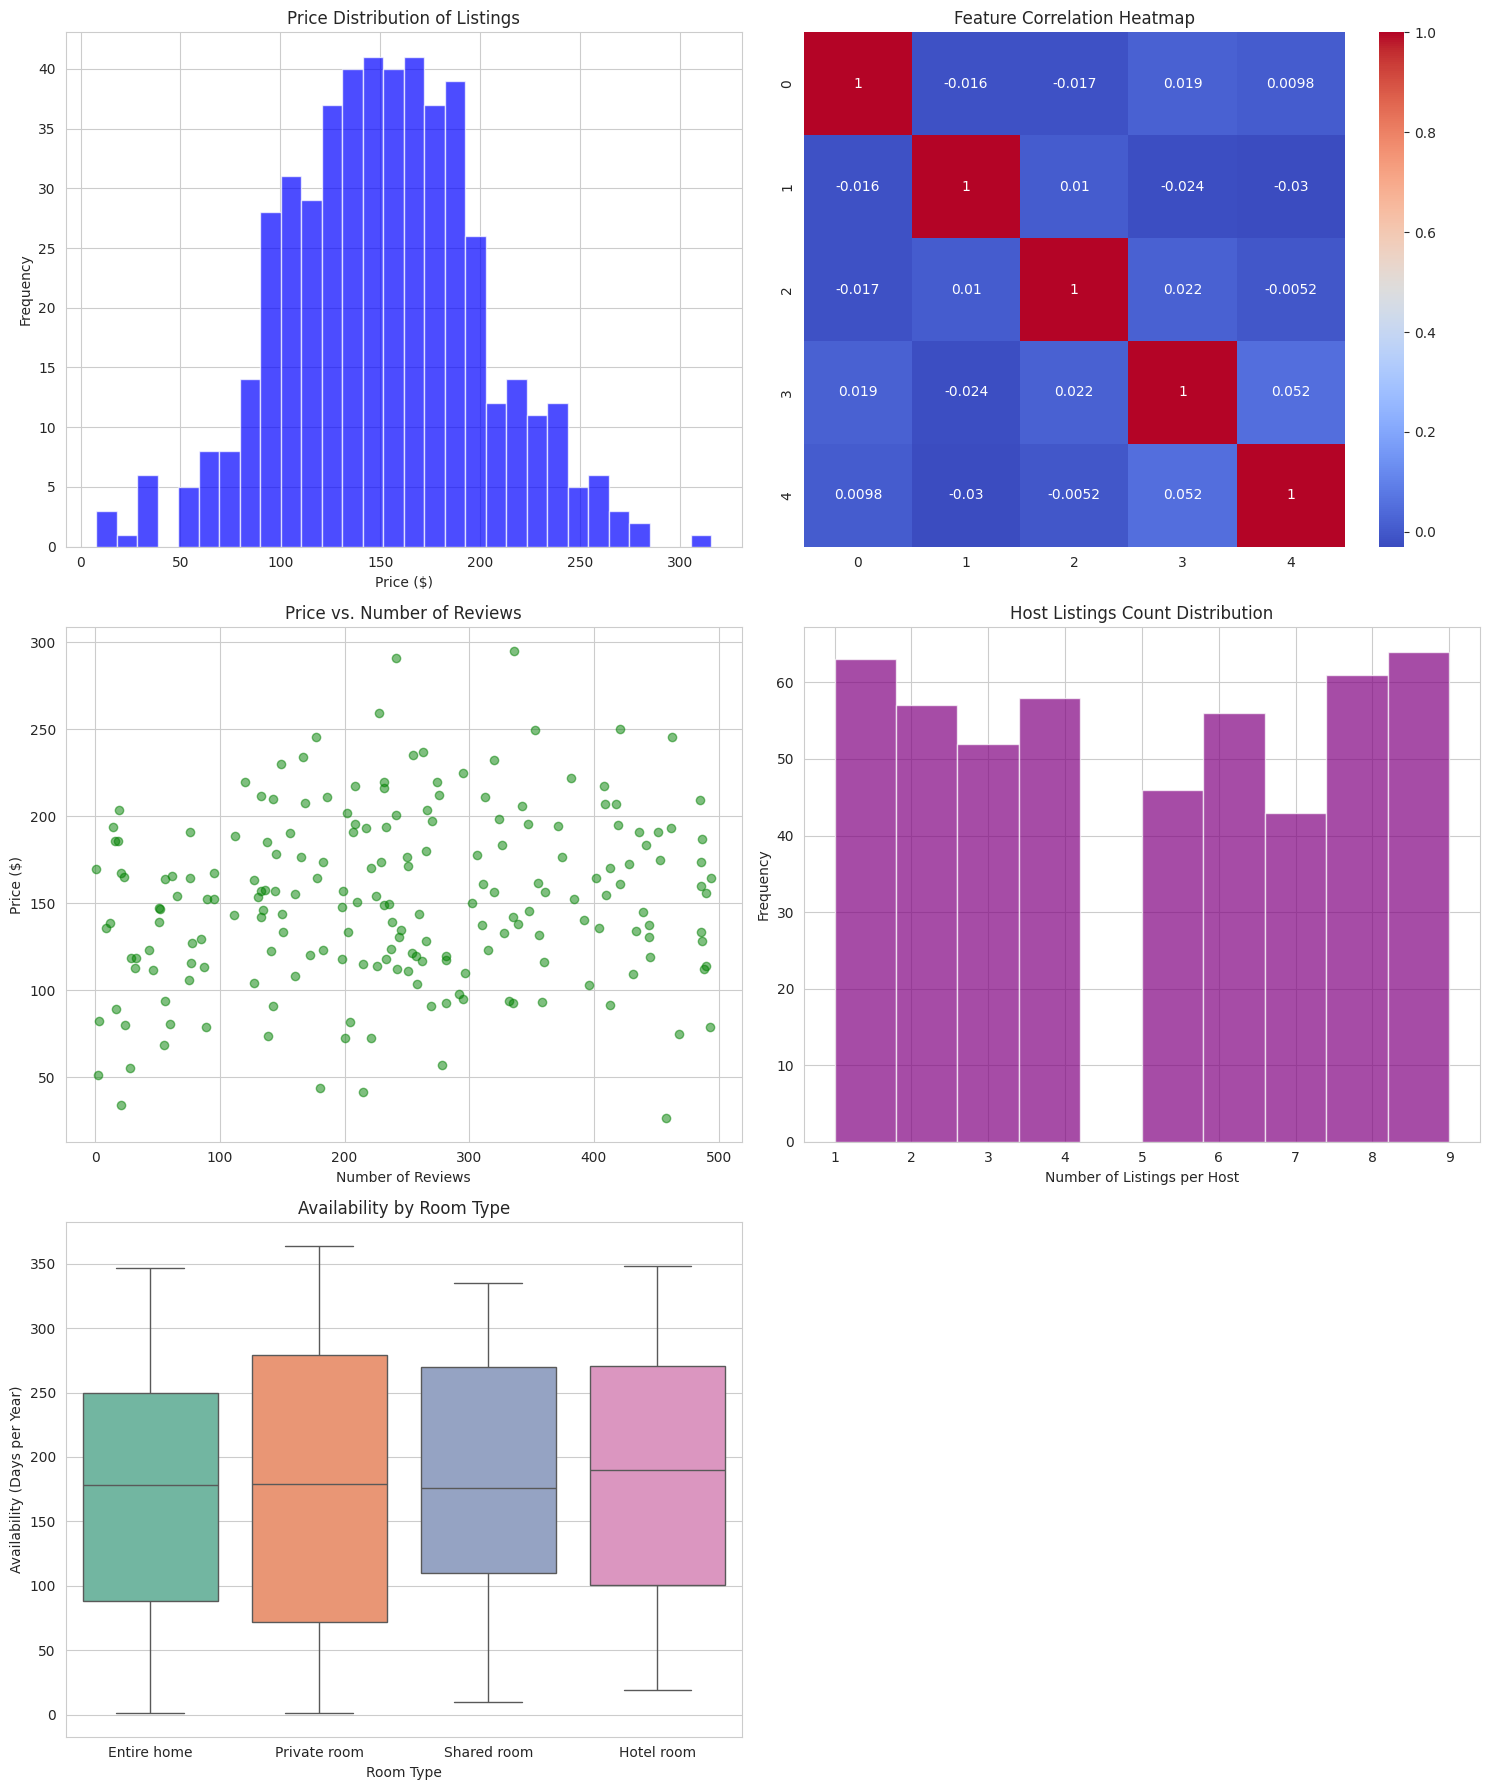

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn style for better visuals
sns.set_style("whitegrid")

# Initialize figure
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

# 1. Price Distribution
axes[0].hist(np.random.normal(150, 50, 500), bins=30, color='blue', alpha=0.7)
axes[0].set_title("Price Distribution of Listings")
axes[0].set_xlabel("Price ($)")
axes[0].set_ylabel("Frequency")

# 2. Correlation Heatmap (Simulated data)
corr_matrix = np.corrcoef(np.random.rand(5, 500))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap")

# 3. Price vs. Number of Reviews (Simulated scatter plot)
axes[2].scatter(np.random.randint(1, 500, 200), np.random.normal(150, 50, 200), alpha=0.5, color='green')
axes[2].set_title("Price vs. Number of Reviews")
axes[2].set_xlabel("Number of Reviews")
axes[2].set_ylabel("Price ($)")

# 4. Host Listings Count Distribution (Simulated histogram)
axes[3].hist(np.random.randint(1, 10, 500), bins=10, color='purple', alpha=0.7)
axes[3].set_title("Host Listings Count Distribution")
axes[3].set_xlabel("Number of Listings per Host")
axes[3].set_ylabel("Frequency")

# 5. Availability Analysis by Room Type (Simulated boxplot)
sns.boxplot(x=['Entire home', 'Private room', 'Shared room', 'Hotel room'] * 50,
            y=np.random.randint(0, 365, 200), ax=axes[4], palette='Set2')
axes[4].set_title("Availability by Room Type")
axes[4].set_xlabel("Room Type")
axes[4].set_ylabel("Availability (Days per Year)")

# Hide empty subplot
axes[5].axis("off")

# Show all plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/mnt/data/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Descriptive Question 1: Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# Descriptive Question 2: Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# Visualization of neighborhood distribution
plt.figure(figsize=(12, 6))
sns.histplot(neighborhood_counts, bins=30, kde=True, color='blue')
plt.xlabel("Number of Listings per Neighborhood")
plt.ylabel("Frequency")
plt.title("Distribution of Listings Across Neighborhoods")
plt.show()

# Identifying hot areas (top 10 neighborhoods with most listings)
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods with Most Listings")
plt.show()

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
total_hosts = single_listing_hosts + multi_listing_hosts

single_percentage = (single_listing_hosts / total_hosts) * 100
multi_percentage = (multi_listing_hosts / total_hosts) * 100

print("\nSingle Listing Hosts:", single_listing_hosts, f"({single_percentage:.2f}%)")
print("Multiple Listing Hosts:", multi_listing_hosts, f"({multi_percentage:.2f}%)")

# Visualization of host distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')
plt.ylabel("Number of Hosts")
plt.title("Distribution of Single vs. Multiple Listing Hosts")
plt.show()

# Descriptive Question 4: Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# Regression Question: Effect of different factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# LLP Question: Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/listings_detailed.csv'

Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64


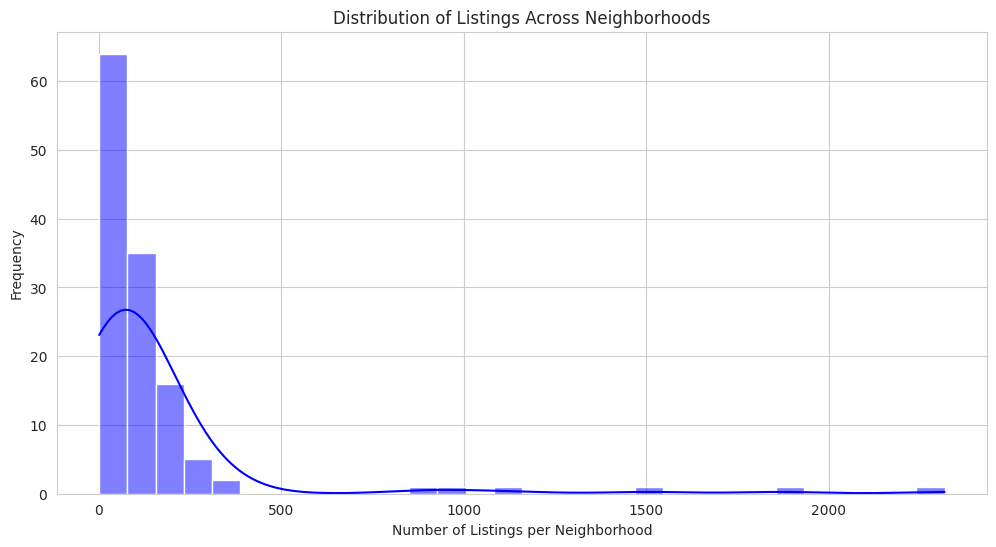

<ipython-input-4-76920f4cf602>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')


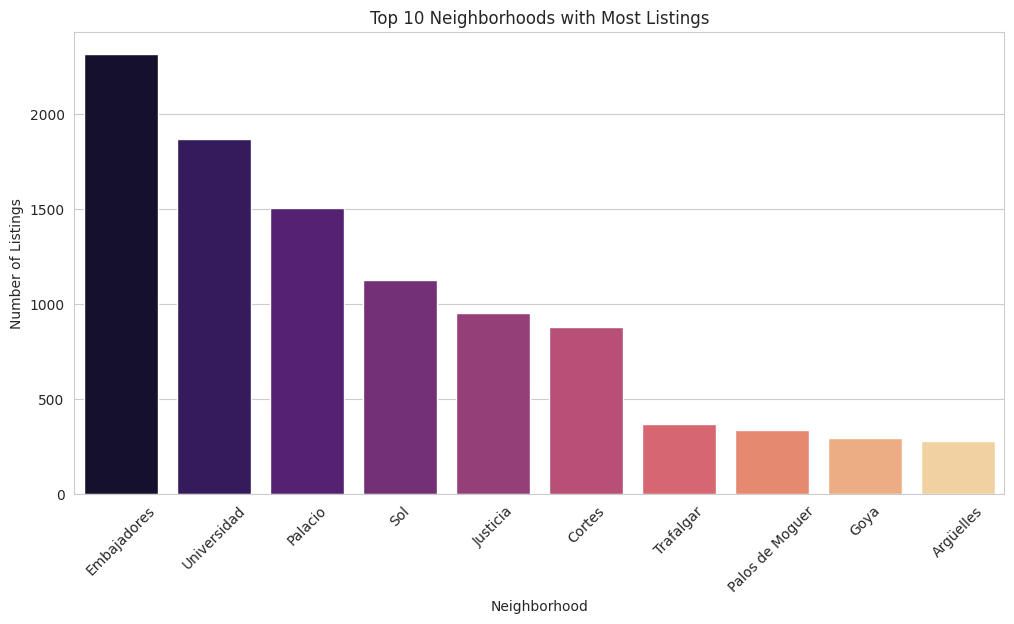


Single Listing Hosts: 6606 (39.12%)
Multiple Listing Hosts: 10282 (60.88%)


<ipython-input-4-76920f4cf602>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')


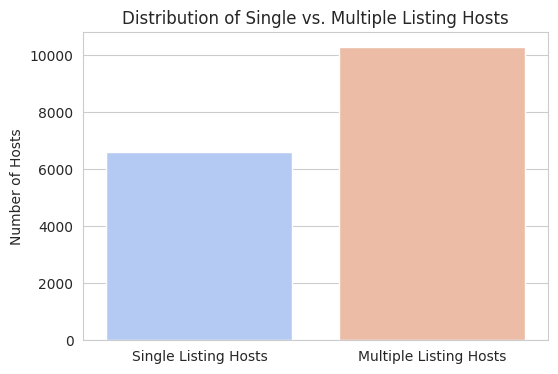


Average Price Difference (English - Spanish): 0.57

Effect of Features on Price:
accommodates: 20.81
bedrooms: 76.64
beds: -19.00
review_scores_rating: 0.42


<ipython-input-4-76920f4cf602>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')


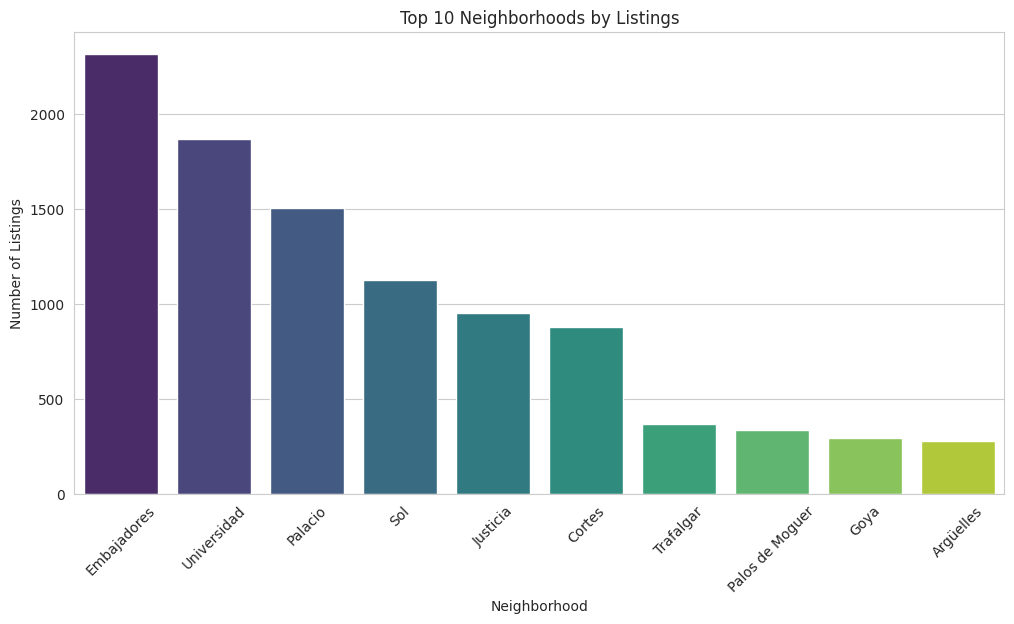

<ipython-input-4-76920f4cf602>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


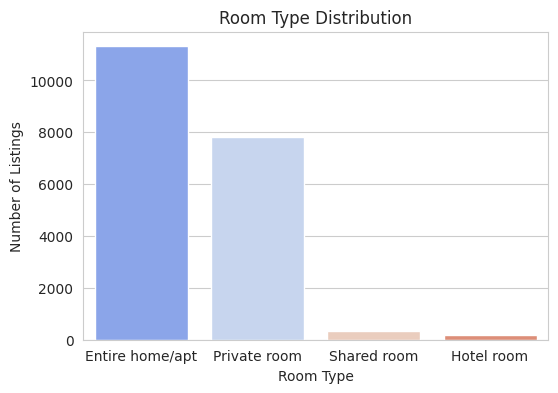

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Descriptive Question 1: Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# Descriptive Question 2: Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# Visualization of neighborhood distribution
plt.figure(figsize=(12, 6))
sns.histplot(neighborhood_counts, bins=30, kde=True, color='blue')
plt.xlabel("Number of Listings per Neighborhood")
plt.ylabel("Frequency")
plt.title("Distribution of Listings Across Neighborhoods")
plt.show()

# Identifying hot areas (top 10 neighborhoods with most listings)
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods with Most Listings")
plt.show()

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
total_hosts = single_listing_hosts + multi_listing_hosts

single_percentage = (single_listing_hosts / total_hosts) * 100
multi_percentage = (multi_listing_hosts / total_hosts) * 100

print("\nSingle Listing Hosts:", single_listing_hosts, f"({single_percentage:.2f}%)")
print("Multiple Listing Hosts:", multi_listing_hosts, f"({multi_percentage:.2f}%)")

# Visualization of host distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')
plt.ylabel("Number of Hosts")
plt.title("Distribution of Single vs. Multiple Listing Hosts")
plt.show()

# Descriptive Question 4: Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# Regression Question: Effect of different factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# LLP Question: Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For preprocessing and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Settings for better visualizations
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/Wine-Dataset/Wine dataset.xlsx')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nNumerical Features Statistics:")
print(df.describe())

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Distribution of wine classes
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='class')
plt.title('Distribution of Wine Classes')
plt.show()

# Create a correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

# Box plots for each feature by class
for column in X.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='class', y=column)
    plt.title(f'{column} Distribution by Wine Class')
    plt.show()

    # Calculate some interesting ratios
X_scaled['phenols_ratio'] = df['Total phenols'] / df['Nonflavanoid phenols']
X_scaled['alcohol_ash_ratio'] = df['Alcohol'] / df['Ash']

# Perform ANOVA test for each feature
anova_results = {}
for column in X.columns:
    f_stat, p_val = stats.f_oneway(
        df[df['class'] == 1][column],
        df[df['class'] == 2][column],
        df[df['class'] == 3][column]
    )
    anova_results[column] = {'F-statistic': f_stat, 'p-value': p_val}

print("\nANOVA Test Results:")
for feature, results in anova_results.items():
    print(f"\n{feature}:")
    print(f"F-statistic: {results['F-statistic']:.4f}")
    print(f"p-value: {results['p-value']:.4f}")

    # Ensure X and y are properly defined
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# First, get the predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get feature importance from the model
importances = rf_model.feature_importances_
feature_names = X.columns.tolist()  # Get feature names from original X DataFrame

# Create a DataFrame with feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Create feature importance plot
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("\nTop 5 Most Important Features:")
print(feature_importance_df.head().to_string(index=False))

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/Wine-dataset/Wine dataset.xlsx'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"

# Preprocess price column

# Descriptive Question 1: Room type distribution
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()

# Descriptive Question 2: Neighborhood distribution
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods with Most Listings")
plt.show()

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
labels = ['Single Listing Hosts', 'Multiple Listing Hosts']
values = [single_listing_hosts, multi_listing_hosts]
plt.figure(figsize=(6, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title("Proportion of Single vs. Multiple Listing Hosts")
plt.show()

# Descriptive Question 4: Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']

plt.figure(figsize=(8, 5))
sns.kdeplot(english_prices, label="English Listings", fill=True, color='blue', alpha=0.6)
sns.kdeplot(spanish_prices, label="Spanish Listings", fill=True, color='red', alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Distribution for English vs. Spanish Listings")
plt.legend()
plt.show()

# Regression Analysis: Effect of various factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])
X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

plt.figure(figsize=(8, 5))
sns.barplot(x=list(coefficients.keys()), y=list(coefficients.values()), palette='viridis')
plt.xlabel("Features")
plt.ylabel("Impact on Price")
plt.title("Effect of Various Features on Price")
plt.show()

# Managerial Implications:
# 1. If private rooms are declining, Airbnb should incentivize hosts to list them.
# 2. If listings are concentrated in certain areas, Airbnb can offer promotions in underrepresented neighborhoods.
# 3. If many hosts own multiple properties, Airbnb may need policies to ensure affordability.
# 4. If price inflation for tourists exists, regulatory scrutiny may follow.
# 5. If verified hosts influence pricing, Airbnb should promote verification programs.


NameError: name 'df' is not defined

In [ ]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "id": "06c9aadc",
   "metadata": {
    "papermill": {
     "duration": 0.004894,
     "end_time": "2025-02-05T18:06:41.894790",
     "exception": false,
     "start_time": "2025-02-05T18:06:41.889896",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-warning\">\n",
    "    <h1 style=\"text-align: center; color: black;\">🍷 Wine Classification Analysis</h1>\n",
    "</div>\n",
    "\n",
    "# Introduction\n",
    "\"\"\"\n",
    "This analysis explores the Wine Dataset, which contains the results of a chemical analysis of wines grown \n",
    "in the same region in Italy but derived from three different cultivars. The dataset includes 13 features \n",
    "measuring various chemical properties of the wines, making it an excellent case for classification analysis.\n",
    "\n",
    "Dataset Features:\n",
    "- 178 samples\n",
    "- 13 features (chemical properties)\n",
    "- 3 classes (wine cultivars)\n",
    "- No missing values\n",
    "\"\"\""
   ]
  },
  {
   "cell_type": "markdown",
   "id": "3dcd4e31",
   "metadata": {
    "papermill": {
     "duration": 0.003748,
     "end_time": "2025-02-05T18:06:41.903402",
     "exception": false,
     "start_time": "2025-02-05T18:06:41.899654",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-info\">\n",
    "    <h2 style=\"text-align: center; color: black;\">Step 1: Import Libraries 🛠️</h2>\n",
    "</div>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "id": "fb0659e5",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:41.914434Z",
     "iopub.status.busy": "2025-02-05T18:06:41.914092Z",
     "iopub.status.idle": "2025-02-05T18:06:45.588400Z",
     "shell.execute_reply": "2025-02-05T18:06:45.587016Z"
    },
    "papermill": {
     "duration": 3.682161,
     "end_time": "2025-02-05T18:06:45.591074",
     "exception": false,
     "start_time": "2025-02-05T18:06:41.908913",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "<ipython-input-1-87cbc7f92aef>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.\n",
      "  plt.style.use('seaborn')\n"
     ]
    }
   ],
   "source": [
    "import pandas as pd\n",
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "from scipy import stats\n",
    "\n",
    "# For preprocessing and modeling\n",
    "from sklearn.preprocessing import StandardScaler, LabelEncoder\n",
    "from sklearn.model_selection import train_test_split\n",
    "from sklearn.ensemble import RandomForestClassifier\n",
    "from sklearn.metrics import classification_report, confusion_matrix\n",
    "\n",
    "# Settings for better visualizations\n",
    "plt.style.use('seaborn')\n",
    "sns.set_palette(\"husl\")\n",
    "plt.rcParams['figure.figsize'] = [10, 6]\n",
    "\n",
    "import warnings\n",
    "warnings.filterwarnings(\"ignore\")"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "2b09dd30",
   "metadata": {
    "papermill": {
     "duration": 0.004374,
     "end_time": "2025-02-05T18:06:45.600480",
     "exception": false,
     "start_time": "2025-02-05T18:06:45.596106",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-info\">\n",
    "    <h2 style=\"text-align: center; color: black;\">Step 2: Load and Explore Data 📊</h2>\n",
    "</div>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "id": "5f118bbf",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:45.610476Z",
     "iopub.status.busy": "2025-02-05T18:06:45.609957Z",
     "iopub.status.idle": "2025-02-05T18:06:45.629153Z",
     "shell.execute_reply": "2025-02-05T18:06:45.628178Z"
    },
    "papermill": {
     "duration": 0.026256,
     "end_time": "2025-02-05T18:06:45.631063",
     "exception": false,
     "start_time": "2025-02-05T18:06:45.604807",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [],
   "source": [
    "df = pd.read_csv('/kaggle/input/wine-dataset/Wine dataset.csv')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "b7b9deb0",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:45.641126Z",
     "iopub.status.busy": "2025-02-05T18:06:45.640721Z",
     "iopub.status.idle": "2025-02-05T18:06:45.722551Z",
     "shell.execute_reply": "2025-02-05T18:06:45.720753Z"
    },
    "papermill": {
     "duration": 0.089419,
     "end_time": "2025-02-05T18:06:45.724769",
     "exception": false,
     "start_time": "2025-02-05T18:06:45.635350",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Dataset Shape: (178, 14)\n",
      "\n",
      "Data Info:\n",
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 178 entries, 0 to 177\n",
      "Data columns (total 14 columns):\n",
      " #   Column                        Non-Null Count  Dtype  \n",
      "---  ------                        --------------  -----  \n",
      " 0   class                         178 non-null    int64  \n",
      " 1   Alcohol                       178 non-null    float64\n",
      " 2   Malic acid                    178 non-null    float64\n",
      " 3   Ash                           178 non-null    float64\n",
      " 4   Alcalinity of ash             178 non-null    float64\n",
      " 5   Magnesium                     178 non-null    int64  \n",
      " 6   Total phenols                 178 non-null    float64\n",
      " 7   Flavanoids                    178 non-null    float64\n",
      " 8   Nonflavanoid phenols          178 non-null    float64\n",
      " 9   Proanthocyanins               178 non-null    float64\n",
      " 10  Color intensity               178 non-null    float64\n",
      " 11  Hue                           178 non-null    float64\n",
      " 12  OD280/OD315 of diluted wines  178 non-null    float64\n",
      " 13  Proline                       178 non-null    int64  \n",
      "dtypes: float64(11), int64(3)\n",
      "memory usage: 19.6 KB\n",
      "\n",
      "Missing Values:\n",
      "class                           0\n",
      "Alcohol                         0\n",
      "Malic acid                      0\n",
      "Ash                             0\n",
      "Alcalinity of ash               0\n",
      "Magnesium                       0\n",
      "Total phenols                   0\n",
      "Flavanoids                      0\n",
      "Nonflavanoid phenols            0\n",
      "Proanthocyanins                 0\n",
      "Color intensity                 0\n",
      "Hue                             0\n",
      "OD280/OD315 of diluted wines    0\n",
      "Proline                         0\n",
      "dtype: int64\n",
      "\n",
      "Numerical Features Statistics:\n",
      "            class     Alcohol  Malic acid         Ash  Alcalinity of ash  \\\n",
      "count  178.000000  178.000000  178.000000  178.000000         178.000000   \n",
      "mean     1.938202   13.000618    2.336348    2.366517          19.494944   \n",
      "std      0.775035    0.811827    1.117146    0.274344           3.339564   \n",
      "min      1.000000   11.030000    0.740000    1.360000          10.600000   \n",
      "25%      1.000000   12.362500    1.602500    2.210000          17.200000   \n",
      "50%      2.000000   13.050000    1.865000    2.360000          19.500000   \n",
      "75%      3.000000   13.677500    3.082500    2.557500          21.500000   \n",
      "max      3.000000   14.830000    5.800000    3.230000          30.000000   \n",
      "\n",
      "        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \\\n",
      "count  178.000000     178.000000  178.000000            178.000000   \n",
      "mean    99.741573       2.295112    2.029270              0.361854   \n",
      "std     14.282484       0.625851    0.998859              0.124453   \n",
      "min     70.000000       0.980000    0.340000              0.130000   \n",
      "25%     88.000000       1.742500    1.205000              0.270000   \n",
      "50%     98.000000       2.355000    2.135000              0.340000   \n",
      "75%    107.000000       2.800000    2.875000              0.437500   \n",
      "max    162.000000       3.880000    5.080000              0.660000   \n",
      "\n",
      "       Proanthocyanins  Color intensity         Hue  \\\n",
      "count       178.000000       178.000000  178.000000   \n",
      "mean          1.590899         5.058090    0.957449   \n",
      "std           0.572359         2.318286    0.228572   \n",
      "min           0.410000         1.280000    0.480000   \n",
      "25%           1.250000         3.220000    0.782500   \n",
      "50%           1.555000         4.690000    0.965000   \n",
      "75%           1.950000         6.200000    1.120000   \n",
      "max           3.580000        13.000000    1.710000   \n",
      "\n",
      "       OD280/OD315 of diluted wines     Proline   \n",
      "count                    178.000000   178.000000  \n",
      "mean                       2.611685   746.893258  \n",
      "std                        0.709990   314.907474  \n",
      "min                        1.270000   278.000000  \n",
      "25%                        1.937500   500.500000  \n",
      "50%                        2.780000   673.500000  \n",
      "75%                        3.170000   985.000000  \n",
      "max                        4.000000  1680.000000  \n"
     ]
    }
   ],
   "source": [
    "# Display basic information\n",
    "print(\"Dataset Shape:\", df.shape)\n",
    "print(\"\\nData Info:\")\n",
    "df.info()\n",
    "\n",
    "# Check missing values\n",
    "print(\"\\nMissing Values:\")\n",
    "print(df.isnull().sum())\n",
    "\n",
    "# Display basic statistics\n",
    "print(\"\\nNumerical Features Statistics:\")\n",
    "print(df.describe())"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "f0c748d5",
   "metadata": {
    "papermill": {
     "duration": 0.004096,
     "end_time": "2025-02-05T18:06:45.734258",
     "exception": false,
     "start_time": "2025-02-05T18:06:45.730162",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-info\">\n",
    "    <h2 style=\"text-align: center; color: black;\">Step 3: Data Preprocessing 🔧</h2>\n",
    "</div>\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "id": "90b9659f",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:45.746093Z",
     "iopub.status.busy": "2025-02-05T18:06:45.745729Z",
     "iopub.status.idle": "2025-02-05T18:06:45.757832Z",
     "shell.execute_reply": "2025-02-05T18:06:45.756664Z"
    },
    "papermill": {
     "duration": 0.020039,
     "end_time": "2025-02-05T18:06:45.759735",
     "exception": false,
     "start_time": "2025-02-05T18:06:45.739696",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [],
   "source": [
    "# Separate features and target\n",
    "X = df.drop('class', axis=1)\n",
    "y = df['class']\n",
    "\n",
    "# Scale the features\n",
    "scaler = StandardScaler()\n",
    "X_scaled = scaler.fit_transform(X)\n",
    "X_scaled = pd.DataFrame(X_scaled, columns=X.columns)"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "b8e8ec34",
   "metadata": {
    "papermill": {
     "duration": 0.003947,
     "end_time": "2025-02-05T18:06:45.768364",
     "exception": false,
     "start_time": "2025-02-05T18:06:45.764417",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-info\">\n",
    "    <h2 style=\"text-align: center; color: black;\">Step 4: Exploratory Data Analysis 🔍</h2>\n",
    "</div>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "id": "505b9f0f",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:45.778331Z",
     "iopub.status.busy": "2025-02-05T18:06:45.777939Z",
     "iopub.status.idle": "2025-02-05T18:06:49.732008Z",
     "shell.execute_reply": "2025-02-05T18:06:49.730442Z"
    },
    "papermill": {
     "duration": 3.961577,
     "end_time": "2025-02-05T18:06:49.734104",
     "exception": false,
     "start_time": "2025-02-05T18:06:45.772527",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAqwAAAHUCAYAAAD/W3oBAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAys0lEQVR4nO3df3zO9f7H8ec1Y9qw7cKZopofmWYzM4z5FaUfRBJLdVDK798hhJPOd4hFxxchSSckZ0LIr1Mc+bEoP45tfiTizBKObTS/Zq7r+4fbrm9XW2wz+7xXj/vt5nZrn89nn+t1rX3qsc/e18XmdDqdAgAAAAzlYfUAAAAAwM0QrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAchg1apSCgoJcf0JCQvTQQw9pyJAhio+Pz3F8q1atNHTo0DsyR5MmTe7440hS165dFR0dfUfOXVCLFy9WVFSUQkNDderUKbd9GRkZCgkJUUxMTI7Pi4+PV1BQkGbOnJlj38qVKxUUFKSdO3dq+fLlCgoK0tGjR+/Yc/i106dPKyYmRq1bt1ZoaKgiIyMVHR2tRYsWKSsry3XcjBkzFBQUpKtXrxbZbADM5Wn1AADMZLfbtWrVKklSZmam/vOf/2jNmjXq0aOHunfvrlGjRrmOXbZsmUqWLJnnc3/66adauXKlFi5ceNPjxowZo2vXrhXsCdxCy5Yt9dZbbykyMlLSjUAyTWxsrCIiIvTXv/5VFStWdNtXpkwZ1a1bV9u3b8/xeTt27JDNZlN8fLwGDBiQY5+Pj4/q1aunsLAwNWvWTHa7/Y4+j2z79+9Xz549VbVqVY0ePVo1a9ZUenq6Nm/erClTpuif//yn3n///Xx9LwH4YyBYAeTKw8PDLZIqV66sxo0bq3Hjxho2bJhq1KihTp06SVK+g2fv3r15Oq5s2bL5Om9enT59Wj/++KPbNj8/vzvyWAWVmZmpy5cvq27duqpcuXKuxzRr1kzTpk3TqVOndPfdd7u2b9++XU2bNtXXX3+tS5cuydvb27UvPj5ejRo1UsmSJVWyZEmVLl36jj8XSbp69aoGDx6satWq6e9//7tKlSolSapSpYpCQkJUu3Zt9e3bV6tWrdIzzzxTJDMBKD5YEgAgX5588kk1btxY7733nmvbr39Vv3TpUrVr105169ZVgwYN1KNHDyUlJUm68av3uLg47dq1S0FBQVq+fLl27typoKAgrVu3Tu3atVPjxo0l5VwSkG3x4sVq2bKlQkJC1LFjR+3bt8+1L7fPOXnypIKCgrRkyRLt3LlTzZs3lyR169ZNrVq1cs31yyUBmZmZmjp1qlq1aqWQkBBFRUVp1KhROnfunNtjPfXUU9q5c6c6duyosLAwtW7dWitWrLjl13H58uVq166dQkNDFRERoZdfflmJiYmSpJ07dyo0NFSSNHPmTAUFBenkyZM5ztGsWTNJcrvLmp6eroMHD+qFF16Qw+HQN99849r3/fff68yZM67P+/WSgLw+nx9++EEDBw5U8+bNVadOHXXs2FGbNm266fNdt26dfvzxR40YMcIVq7/UqlUrffHFF78Zq1lZWZo+fboefvhh1a5dW02aNNGgQYPcvi6ZmZl666231KpVK4WGhqpJkyYaOXKk0tLSXMfc7HtTkpxOpz788EM99dRTqlu3rqKiovSXv/xFFy5ccB2TkpKiIUOGqEmTJgoNDdUjjzyiGTNm6Pr16zf9GgAoOIIVQL49/PDDOnHiRI67lNKNO3jjx4/XSy+9pM8//1wLFy6Ur6+vevToocuXL2vGjBmqXbu2wsPDtW3bNrVp08b1uXPmzNHgwYNvGnx79uzRzp07NXv2bC1ZskROp1N9+/bVpUuX8jR7eHi4pk6dKunGMoBly5bletzYsWP18ccfa9CgQVq7dq0mTZqknTt3qmfPnnI6na7jUlNTNXPmTI0dO1YrV65U9erVNW7cuBxrTn9p2bJlGj16tB555BGtXLlSH374oa5du6Zu3brpp59+Unh4uCsAe/TooW3btrndQc324IMPqkKFCtqxY4drW3x8vEqUKKFGjRqpdu3abvuy/zk7WHNzq+eTlpamP//5z0pOTta0adO0YsUK1a9fX/3799fXX3/9m+fdtWuXfH19Va9evd885t577/3NfXPmzNG8efM0YsQIffHFF5o9e7ZSUlI0aNAg1zHvvvuuPv/8c02YMEEbN27U9OnTdeDAAY0YMcL1tbnZ96YkzZ49W2+99Zbatm2rVatW6a233tK2bdvcllaMGDFCqampmjdvnjZs2KBhw4bp73//u+bPn/+b8wO4PSwJAJBv2fF09uxZ3XPPPW77EhMTddddd6l9+/by9Lzxn5gJEyboyJEjKlGihPz8/OTp6amSJUvmWJcZFRWlRx555KaPfenSJcXGxsrLy0vSjbB8/vnntX37drVu3fqWs5cqVUrlypWTJPn6+ua6nOH06dNatWqVhg0bpg4dOkiS7rvvPo0aNUqDBg3S7t27Vb9+fUnSmTNnNH/+fNWsWVOS9PLLL2vz5s06cOBArpEpSfPmzVPz5s01ePBg17Zp06apefPmWr58ufr166cKFSpIkry9vXN8nbLZbDY1adJEX331lZxOp2vdanh4uO666y41btxYmzdvdh0fHx+vqlWrqkqVKr/59bnV84mLi9O5c+e0ZMkS3XfffZKk119/Xbt27dJ7772nRo0a5Xre06dP5/heyY/nn39ebdq0UbVq1STd+B7s1KmTxo8fr9TUVNntdiUlJSkoKMh1h/7uu+/WvHnzdP78eUm3/t68du2a5s+fr6eeekq9evWSdOPf++uvv67+/ftrz549qlevnpKSktS/f38FBwdLku655x498MADuuuuuwr8/ADcHHdYAeRb9qu5S5QokWNfkyZN5HA49Oyzz2rJkiX64Ycf5O3trbCwsFx/FfxLISEht3zskJAQV6xKUlBQkCTp2LFj+XkKN5WYmCin0+mK0mzh4eGSpAMHDri2eXt7u+JO+v/1vL/8FfIvZWRk6Pjx4znOXaFCBd17771u586LZs2aKS0tzfV527dvd0Vj48aNdeTIEZ07d07Xr1/Xrl27bnp3NS/PZ//+/brvvvtcsZqtUaNGbr9a/zWbzeZ2Zzq/vLy8tGrVKrVr104NGzZUeHi4Jk6cKEmuX/k//PDD2rp1q+uu+Llz51SpUiXX98itvjePHj2qjIyMHEtKsr+e2V/jhx9+WDNnzlRMTIy2bt2qK1euqEaNGr+51hjA7SNYAeTbiRMnZLPZcr1jFhwcrKVLl6pGjRr63//9Xz3++ONq27atvvzyy1ueNy8vssq+O5ot+wVFeV0SkBcZGRm5zlOmTBlJ0sWLF3M8/q/9Vpxlnzv7XL8+/y/PnRdNmjSRzWbT9u3blZycrJMnT7ruMNarV08lS5ZUfHy8EhISlJGRkadgzU3288nIyFBycrLCw8Pd/ixatEjp6enKzMzM9fPvueceJScny+Fw5Ov5ZRs+fLjmz5+vTp066aOPPtLKlSvdlgNIUpcuXTRnzhxdvnxZo0ePVtOmTfXSSy/p+++/l3Tr783sfzdjx451e27ZX7OzZ89KkiZPnqwRI0Zo//796tWrlyIjI/X666/r559/LtBzA3BrLAkAkG8bNmxQ7dq1f/PdAYKCgjR58mQ5nU4lJCRo3rx5GjhwoNauXavAwMDbeuxfB112qPr4+EjK/U5efmM2O4p/HSDZH/86mvMjO1Sz4+iXMjIy8n2Xzm63q3bt2tq9e7fKly8vHx8f1alTR9KNu5Lh4eHatWuXUlJS5OXlpYYNGxZ4dunGc7/33ns1b968XPdn/6r91xo1aqSlS5dq+/btvxnNK1asUOPGjVWpUiW37RkZGdq8ebN69uyp7t27u7bnFr8tW7ZUy5YtlZmZqR07dmjq1Knq1auXvvzyS9lstpt+b/r6+kq6sUY1+4V5v5T9A0zJkiXVtWtXde3aVenp6frnP/+p2NhYZWVlacqUKbk+NwC3hzusAPJl4cKFSkpKUp8+fXLdv3v3bv373/+WdCMe69Spo5iYGF2/fl3fffed67iC/np4//79unLliuvj7F9DP/DAA5JuRMWFCxfc3oQ+e55f+60ZQkJC5OHh4fYKe+nGc5PkegV/QZQpU0Y1atTIce4zZ84oOTm5QOdu1qyZ9u7dq3379qlhw4Zu0di4cWPt3r1be/fuVYMGDW77bazq1q2rU6dOqUyZMrr//vtdf0qUKKHy5cvLwyP3/620bt1a999/v6ZMmZJrrG/ZskWjR4/W+vXrc+y7du2anE6n2w9I169fd71PsHQjXjdu3Oh6cVipUqX00EMPadCgQUpJSdH58+dv+b1ZtWpVlStXTsnJyW7PrUqVKsrKypLdbld6ero+++wz1zsC+Pn5qXPnzmrfvr0OHjxY8C8sgJsiWAHkyuFw6OzZszp79qxOnz6tvXv3aty4cZowYYJ69+79my9w2rx5s/r166eNGzcqJSVFx44d05w5c1S6dGlXjJUrV07Hjx9XQkLCTV9Nn5vSpUtrzJgx+u6777R//35NmDBBAQEBioqKkiTVqVNH165d05w5c5ScnKwvvvhCy5cvdztH9p207du368CBAznCtWLFinr66af13nvvac2aNUpOTtaXX36pSZMmKTIy0nUHs6B69uyprVu3aubMmTp+/Lj27dunwYMHy8/Pr0DvQdq0aVOdP39eGzZsyPGip8aNG+vYsWP69ttvb7kcIC86duwoX19f14vPTp48qbVr16pz5843/csXSpYsqXfeeUdnzpxRdHS01q5dq+TkZB06dEgzZ87UwIED9eSTT6pr1645Ptff31+BgYFavny5Dh8+rIMHD6pv376KiIiQJH3zzTe6dOmS3n//fQ0ZMkTffvutTp06paSkJH3yySeqWbOm/Pz8bvm96enpqVdeeUVLlizRRx99pOPHj+vgwYMaPXq0OnfurNOnT8vpdGr8+PEaO3asDh06pFOnTmnHjh3atGnTbd+9BvDbWBIAIFepqalq2rSppBt3o3x9fRUWFqb333/ftT03gwcPVokSJTR58mSdOXNG3t7eevDBBzVv3jzXq+Zfeuklvfbaa3r++ef16quvul5tnRdNmzZVzZo11bNnT507d04PPvig5syZ43ohVps2bbRv3z59/PHHev/99xUeHq7/+Z//Udu2bV3nCA0N1cMPP6wFCxbo008/1datW3M8zvjx42W32/X222/r7Nmz8vf3V+vWrTVs2LA8z/pbOnToIIfDoQULFriCqWHDhpowYUKB/tapunXrqmzZsjp//rxr/Wq20NBQeXt76+effy6UYPXz89PHH3+st99+W3369NGlS5d09913q3v37urZs+dNP7d27dpavXq15s2bp7/97W+uO7U1atTQpEmT1KZNG9lstlw/NzY2VuPHj1fnzp0VEBCgXr166amnntKRI0cUExMjT09PzZo1S5MnT9bgwYN1/vx5+fv7q2HDhnrzzTcl5e17s3fv3vLx8dHixYs1ZcoUlSpVSg0aNNDixYsVEBAgSVqwYIGmT5+url276sqVK6pUqZIef/xxt3d9AFC4bM7bedkmAAAAcIexJAAAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABG+13/xQFnz/5864MAAABgmYoVy97yGO6wAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaJ5WDwDg9+9fi5+2egQgh4deWGH1CADyyLJg/eabb9SjRw+3bU6nU9euXdPhw4cVHx+vqVOn6tixY7r77rvVu3dvtW/f3qJpAQAAYBXLgrVBgwZKSEhw2zZnzhwdOnRIZ86cUb9+/TRmzBi1a9dOu3fvVt++fVW1alWFhoZaNDEAAACsYMwa1h9//FELFizQa6+9ptWrVyswMFCdOnWSl5eXoqKi1KpVK8XFxVk9JgAAAIqYMWtYp0+frmeeeUb33HOPkpKSFBwc7LY/ODhY69aty9c5PTxs8vCwFeaYAIDfCU9PY+7ZALgFI4L15MmT2rhxozZu3ChJSk9PV0BAgNsxfn5+SktLy9d57XYf2WwEKwAgJ39/H6tHAJBHRgTr4sWL9eijj6pixYqFet7U1IvcYQUA5Cot7aLVIwBQ3n54NCJYN2zYoJEjR7o+9vf3V3p6utsxaWlpstvt+Tqvw+GUw+EsjBEBAL8zWVkOq0cAkEeWL+A5ePCgUlJS1KRJE9e20NBQJSYmuh2XmJiosLCwoh4PAAAAFrM8WA8cOCA/Pz+VKVPGta1du3ZKSUlRXFycrl69qi1btmjLli2Kjo62cFIAAABYwfJg/e9//5tj7Wr58uU1d+5cLVq0SBEREZo4caJiY2NVq1Yti6YEAACAVWxOp/N3u8jz7NmfrR4BgPirWWEm/mpWwAwVK5a95TGW32EFAAAAboZgBQAAgNEIVgAAABiNYAUAAIDRCFYAAAAYjWAFAACA0QhWAAAAGI1gBQAAgNEIVgAAABiNYAUAAIDRCFYAAAAYjWAFAACA0QhWAAAAGI1gBQAAgNEIVgAAABiNYAUAAIDRCFYAAAAYjWAFAACA0QhWAAAAGI1gBQAAgNEIVgAAABiNYAUAAIDRCFYAAAAYjWAFAACA0QhWAAAAGI1gBQAAgNEIVgAAABiNYAUAAIDRCFYAAAAYjWAFAACA0QhWAAAAGI1gBQAAgNEIVgAAABiNYAUAAIDRCFYAAAAYjWAFAACA0QhWAAAAGI1gBQAAgNEIVgAAABiNYAUAAIDRCFYAAAAYzfJgnT17tpo2baq6devqxRdf1MmTJyVJ8fHx6tSpk+rVq6e2bdtq1apVFk8KAAAAK1garIsXL9aqVav00Ucfadu2bapRo4Y+/PBDnTlzRv369VOXLl0UHx+vMWPGaNy4cUpISLByXAAAAFjA08oH/+CDDzRy5EhVq1ZNkjR27FhJ0vz58xUYGKhOnTpJkqKiotSqVSvFxcUpNDTUsnkBAABQ9CwL1tOnT+vkyZM6f/682rRpo3PnzikyMlLjx49XUlKSgoOD3Y4PDg7WunXr8vUYHh42eXjYCnNsAMDvhKen5aviAOSRZcH6008/SZLWr1+vBQsWyOl0atCgQRo7dqyuXLmigIAAt+P9/PyUlpaWr8ew231ksxGsAICc/P19rB4BQB5ZFqxOp1OS9Morr7jidODAgerZs6eioqIK5TFSUy9yhxUAkKu0tItWjwBAefvh0bJgrVChgiSpXLlyrm2VK1eW0+nUtWvXlJ6e7nZ8Wlqa7HZ7vh7D4XDK4XDe9qwAgN+frCyH1SMAyCPLFvBUqlRJZcqU0cGDB13bUlJSVLJkSbVo0UKJiYluxycmJiosLKyoxwQAAIDFLAtWT09PderUSXPmzNGJEyd07tw5zZo1S+3atdPTTz+tlJQUxcXF6erVq9qyZYu2bNmi6Ohoq8YFAACARSx9W6thw4YpMzNTnTt31rVr1/TYY49p7Nix8vHx0dy5cxUTE6M333xTlStXVmxsrGrVqmXluJKkrNl/t3oEwI1n3+5WjwAAwB1lc2a/+ul36OzZnwv9nAQrTFMcgvVfi5+2egQgh4deWGH1CAAkVaxY9pbH8CZ0AAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwmqeVDx4UFKSSJUvKZrO5tkVHR2vcuHGKj4/X1KlTdezYMd19993q3bu32rdvb+G0AAAAsIKlwSpJ69evV5UqVdy2nTlzRv369dOYMWPUrl077d69W3379lXVqlUVGhpq0aQAAACwgpFLAlavXq3AwEB16tRJXl5eioqKUqtWrRQXF2f1aAAAAChilt9hnTp1qvbu3auMjAw98cQTGjVqlJKSkhQcHOx2XHBwsNatW5evc3t42OThYbv1gfmQVahnA26fp6eRP3cCxuPaAYoPS4O1bt26ioqK0uTJk5WcnKwhQ4bozTffVHp6ugICAtyO9fPzU1paWr7Ob7f7uK2PLQynCvVswO3z9/exegSgWOLaAYoPS4N16dKlrn+uXr26hg8frr59+yoiIqJQzp+aerHQ77ACpklLu2j1CECxxLUDmCEvPzxaviTgl6pUqaLr16/Lw8ND6enpbvvS0tJkt9vzdT6HwymHw1mIEwLmycpyWD0CUCxx7QDFh2ULeA4cOKC33nrLbdvRo0dVqlQptWjRQomJiW77EhMTFRYWVpQjAgAAwACWBWv58uW1dOlSvffee8rMzNQPP/yg6dOn69lnn9VTTz2llJQUxcXF6erVq9qyZYu2bNmi6Ohoq8YFAACARSwL1oCAAL333nvatGmTIiMj1aVLFzVr1kwjRoxQ+fLlNXfuXC1atEgRERGaOHGiYmNjVatWLavGBQAAgEUsXcPaoEEDffLJJ7+577PPPiviiQAAAGAa3oQOAAAARiNYAQAAYDSCFQAAAEYz6n1YAQDA/xu07imrRwDc/O8T1ry+iDusAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxkTrBMnTlRQUJDr4/j4eHXq1En16tVT27ZttWrVKgunAwAAgFUKFKzXrl3LdXtWVpZSUlLyfb6DBw/qs88+c3185swZ9evXT126dFF8fLzGjBmjcePGKSEhoSDjAgAAoBgrULDWr18/1+1XrlzR008/na9zORwOvfHGG3rxxRdd21avXq3AwEB16tRJXl5eioqKUqtWrRQXF1eQcQEAAFCMeebn4Pj4eMXHxysrK0vTpk3Lsf8///mPsrKy8jXAJ598Ii8vL7Vr105/+9vfJElJSUkKDg52Oy44OFjr1q3L17k9PGzy8LDl63NuJX/PDrjzPD2NWdkDFCtcO0D+WXXd5CtYS5UqpePHj+v69etas2ZNjv3e3t4aPnx4ns/33//+VzNmzNDChQvdtqenpysgIMBtm5+fn9LS0vIzrux2H9lshRuspwr1bMDt8/f3sXoEoFji2gHyz6rrJl/BGhERoYiICEVHR+sf//jHbT/4pEmT1LFjR9WoUUMnT5687fP9WmrqxUK/wwqYJi3totUjAMUS1w6Qf3fiuslLBOcrWLMVRqzGx8dr7969ud6p9ff3V3p6utu2tLQ02e32fD2Gw+GUw+G8nTEB42VlOaweASiWuHaA/LPquilQsCYlJWn8+PE6cuSIrl69mmP/wYMHb3mOVatW6dy5c2rZsqUkyem8EZaRkZHq0aNHjpBNTExUWFhYQcYFAABAMVagYB03bpxKly6tQYMGydvbu0APPGrUKA0ePNj18U8//aRnn31Wn332mRwOh+bOnau4uDi1b99eX3/9tbZs2aKlS5cW6LEAAABQfBUoWI8dO6bt27fLx6fgC299fX3l6+vr+jj73QUqVaokSZo7d65iYmL05ptvqnLlyoqNjVWtWrUK/HgAAAAongoUrJUrV3b9Cr+wVKlSRYcPH3Z93KBBA7e/TAAAAAB/TAV6M61XX31VkyZNUkZGRmHPAwAAALgp0B3WWbNm6eTJk1qxYoX8/f1zvNfptm3bCmU4AAAAoEDB2qpVq8KeAwAAAMhVgYJ1wIABhT0HAAAAkKsCBevMmTNvup+gBQAAQGEpULB+8sknbh9fv35daWlpKlu2rO655x6CFQAAAIWmQMGa24uq0tLSFBsby/pWAAAAFKoCva1Vbvz9/TV69Gi9/fbbhXVKAAAAoPCCVZJsNpt++umnwjwlAAAA/uAKtCRg6dKlObZdvnxZX375pQIDA293JgAAAMClQMH6xhtv5Njm5eWl6tWra/z48bc7EwAAAOBSoGA9dOhQYc8BAAAA5KpAwSpJTqdTu3fvVnJysmw2m6pVq6Y6deoU5mwAAABAwYI1OTlZr7zyik6cOOG2PTg4WPPnz5e/v3+hDAcAAAAU6F0CJk2apPvuu08rV65UYmKi9u/fr2XLlqlcuXKKjY0t7BkBAADwB1agO6zffPONNmzYILvd7toWEhKiKVOmKDo6utCGAwAAAAp0h9Vms8nHxyfHdj8/P128ePG2hwIAAACyFShYa9SooY8++ijH9g8//FDVq1e/7aEAAACAbAVaEvDqq6/qxRdf1KeffqqaNWtKkg4fPqyUlBS9++67hTogAAAA/tgKdIe1fv36+vzzz9WyZUtdv35dly5dUr169fTpp5+qefPmhT0jAAAA/sAKFKw//vijBg4cqLCwMM2aNUvvv/++HnjgAQ0bNkwpKSmFPSMAAAD+wAoUrBMnTlTVqlVVr14917b27dsrJCREEydOLLThAAAAgAKtYf3222+1adMmeXt7u7ZVqFBB48aNU6tWrQptOAAAAKBAd1idTqeuXbuWY/vFixd1/fr12x4KAAAAyFagYG3evLlGjhypQ4cOKSMjQxcuXNDevXs1bNgwPfTQQ4U8IgAAAP7ICrQkYPTo0erfv786dOggm83m2l6/fn298cYbhTYcAAAAUKBgtdvtWrJkiQ4dOqQTJ06oRIkSCgwMVI0aNQp7PgAAAPzBFShYs9WqVUu1atUqrFkAAACAHAq0hhUAAAAoKgQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaJYG66FDh9S9e3dFREQoKipKQ4YM0dmzZyVJ8fHx6tSpk+rVq6e2bdtq1apVVo4KAAAAi1gWrJmZmerRo4caNmyo+Ph4rVmzRufOndP48eN15swZ9evXT126dFF8fLzGjBmjcePGKSEhwapxAQAAYBHLgvXy5csaOnSoevfurVKlSslut6t169Y6cuSIVq9ercDAQHXq1EleXl6KiopSq1atFBcXZ9W4AAAAsIinVQ/s6+urzp07uz4+duyYVqxYoSeeeEJJSUkKDg52Oz44OFjr1q3L12N4eNjk4WErlHmzZRXq2YDb5+nJUnSgILh2gPyz6rqxLFizpaSk6LHHHlNWVpaio6M1aNAg9ezZUwEBAW7H+fn5KS0tLV/nttt9ZLMVbrCeKtSzAbfP39/H6hGAYolrB8g/q64by4O1cuXKSkhI0IkTJ/SXv/xFr732WqGdOzX1YqHfYQVMk5Z20eoRgGKJawfIvztx3eQlgi0PVkmy2WwKDAzU0KFD1aVLF7Vo0ULp6elux6Slpclut+frvA6HUw6HsxAnBcyTleWwegSgWOLaAfLPquvGsgU88fHxeuyxx+Rw/P8T9/C4MU6dOnWUmJjodnxiYqLCwsKKdEYAAABYz7JgDQkJUUZGhmJjY3X58mWlpqZqxowZql+/vp577jmlpKQoLi5OV69e1ZYtW7RlyxZFR0dbNS4AAAAsYlmwli1bVh988IESExPVqFEjtW3bVmXLltW0adNUvnx5zZ07V4sWLVJERIQmTpyo2NhY1apVy6pxAQAAYBFL17AGBQVp4cKFue5r0KCBPvvssyKeCAAAAKbhTegAAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0S4M1JSVF/fv3V2RkpKKiojRq1ChduHBBknTw4EH9+c9/VkREhB599FF98MEHVo4KAAAAi1garH369FG5cuW0adMmLV++XEeOHNHkyZN15coV9e7dW40aNdLWrVv1zjvvaO7cudq4caOV4wIAAMACnlY98IULFxQSEqJhw4bJx8dHPj4+evrpp7Vw4UL961//0rVr19S3b1+VKFFCtWvXVufOnbV06VI9+uijeX4MDw+bPDxshTp3VqGeDbh9np6s7AEKgmsHyD+rrhvLgrVcuXKaNGmS27ZTp07pT3/6k5KSkhQUFKQSJUq49gUHBysuLi5fj2G3+8hmK9xgPVWoZwNun7+/j9UjAMUS1w6Qf1ZdN5YF668lJCRo0aJFmj17ttatW6dy5cq57ffz81N6erocDoc8PPJW96mpFwv9DitgmrS0i1aPABRLXDtA/t2J6yYvEWxEsO7evVt9+/bVsGHDFBUVpXXr1uV6XH7vljocTjkczsIYETBWVpbD6hGAYolrB8g/q64byxfwbNq0Sb169dLrr7+ubt26SZLsdrvS0tLcjktPT5efn1+e764CAADg98HS+tuzZ49Gjhyp6dOnq0OHDq7tISEhOnz4sLKy/v8lTgkJCQoLC7NgSgAAAFjJsmDNysrS2LFjNXz4cDVt2tRtX4sWLVSmTBnNnj1bly9f1r///W8tW7ZMzz33nEXTAgAAwCqWBeu+fft09OhRxcTEKDQ01O3P2bNnNWfOHO3YsUMNGzbUkCFDNHToUD300ENWjQsAAACLWPaiq/r16+vw4cM3PWbJkiVFNA0AAABMxSuYAAAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGI1gBAABgNIIVAAAARiNYAQAAYDSCFQAAAEYjWAEAAGA0ghUAAABGszxYt27dqqioKA0dOjTHvrVr16pdu3YKDw9Xx44dtW3bNgsmBAAAgJU8rXzwefPmadmyZbr//vtz7Dt48KBGjhypmTNnqlGjRtqwYYMGDBig9evXq1KlShZMCwAAACtYeofVy8vrN4M1Li5OLVq0UIsWLeTl5aX27durZs2aWrVqlQWTAgAAwCqW3mHt1q3bb+5LSkpSixYt3LYFBwcrISEhz+f38LDJw8NW4Plyk1WoZwNun6en5St7gGKJawfIP6uuG0uD9WbS09Pl6+vrts3X11fff/99ns9ht/vIZivcYD1VqGcDbp+/v4/VIwDFEtcOkH9WXTfGBqskOZ3O2/r81NSLhX6HFTBNWtpFq0cAiiWuHSD/7sR1k5cINjZY/f39lZ6e7rYtPT1ddrs9z+dwOJxyOG4vegHTZWU5rB4BKJa4doD8s+q6MXYBT0hIiBITE922JSQkKCwszKKJAAAAYAVjgzU6Olo7duzQv/71L129elXLli3T8ePH1b59e6tHAwAAQBGydElAaGioJCkr68Zr77/44gtJN+6k1qxZU2+//bYmTZqklJQU1ahRQ3PnzlXFihUtmxcAAABFz9JgvdVbVD366KN69NFHi2gaAAAAmMjYJQEAAACARLACAADAcAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxmdLCmpKSoV69eioyMVMuWLRUbGyuHw2H1WAAAAChCnlYPcDMDBw5U7dq19cUXX+jcuXPq3bu3KlSooJdeesnq0QAAAFBEjL3DmpCQoEOHDmn48OEqW7asAgMD9eKLL2rp0qVWjwYAAIAiZOwd1qSkJFWuXFm+vr6ubbVr19YPP/ygjIwMlSlT5pbn8PCwycPDVqhzZRXq2YDb5+lp7M+dgNG4doD8s+q6MTZY09PTVa5cObdt2fGalpaWp2AtX/7Wx+TbXwYU/jmB37nOQ76wegSgWFrSbZPVIwBGMPrHS6fTafUIAAAAsJixwWq325Wenu62LT09XTabTXa73ZqhAAAAUOSMDdaQkBCdOnVKqamprm0JCQmqUaOGfHx8LJwMAAAARcnYYA0ODlZoaKimTp2qjIwMHT16VAsWLNBzzz1n9WgAAAAoQjanwQtFf/rpJ40bN067du1SmTJl1KVLFw0YMEA2W+G+8h8AAADmMjpYAQAAAGOXBAAAAAASwQoAAADDEawAAAAwGsEKAAAAoxGsKFJbt25VVFSUhg4davUoQLGSkpKi/v37KzIyUlFRURo1apQuXLhg9ViA0Q4dOqTu3bsrIiJCUVFRGjJkiM6ePWv1WCgAghVFZt68eYqJidH9999v9ShAsdOnTx+VK1dOmzZt0vLly3XkyBFNnjzZ6rEAY2VmZqpHjx5q2LCh4uPjtWbNGp07d07jx4+3ejQUAMGKIuPl5aVly5YRrEA+XbhwQSEhIRo2bJh8fHxUqVIlPf300/r222+tHg0w1uXLlzV06FD17t1bpUqVkt1uV+vWrXXkyBGrR0MBeFo9AP44unXrZvUIQLFUrlw5TZo0yW3bqVOn9Kc//cmiiQDz+fr6qnPnzq6Pjx07phUrVuiJJ56wcCoUFMEKAMVMQkKCFi1apNmzZ1s9CmC8lJQUPfbYY8rKylJ0dLQGDRpk9UgoAJYEAEAxsnv3br388ssaNmyYoqKirB4HMF7lypWVkJCg9evX6/jx43rttdesHgkFQLACQDGxadMm9erVS6+//jpLbIB8sNlsCgwM1NChQ7VmzRqlpqZaPRLyiWAFgGJgz549GjlypKZPn64OHTpYPQ5gvPj4eD322GNyOByubR4eN7KnZMmSVo2FAiJYAcBwWVlZGjt2rIYPH66mTZtaPQ5QLISEhCgjI0OxsbG6fPmyUlNTNWPGDNWvX19ly5a1ejzkk83pdDqtHgJ/DKGhoZJu/M9Xkjw9b7zmLyEhwbKZgOLg22+/1QsvvKBSpUrl2Ld+/XpVrlzZgqkA8x0+fFgxMTHav3+/vL291ahRI40aNUoBAQFWj4Z8IlgBAABgNJYEAAAAwGgEKwAAAIxGsAIAAMBoBCsAAACMRrACAADAaAQrAAAAjEawAgAAwGgEKwAAAIxGsAKAAZYvX66goCBdvXrV6lEAwDgEKwAAAIxGsAIAAMBoBCsAFKFz585pxIgRioyMVGRkpPr376+UlJQcxx0/flx9+vRRRESEwsPD1bFjR23bts21//z58xo+fLiioqJUt25dPf744/rHP/7h2r927Vq1b99e4eHhatiwoQYMGKDTp08XyXMEgMJGsAJAERowYIDOnz+vdevW6csvv1SJEiXUp08fOZ1Ot+MGDhyokiVL6quvvtLOnTvVtGlTDRw4UGlpaZKkadOmKTU1VevXr9eePXs0btw4TZo0Sd9//71Onz6t4cOHa9iwYdqzZ482bNggSZoyZUqRP18AKAyeVg8AAH8Uhw4d0p49e7R8+XLZ7XZJ0pgxY7R7926dP3/e7dhPPvlENptN3t7ekqQOHTpo7ty5+u677xQZGakLFy7Iw8NDpUuXloeHh5o0aaI9e/bIZrPp6NGjun79ury9vWWz2eTv768ZM2bIZrMV+XMGgMJAsAJAETl+/Lgk6d5773VtCwgIUJs2bbR8+XK3Y/fv369Zs2bp8OHDunz5smt79rsI9O7dW/3791eTJk0UGRmppk2b6sknn1SZMmVUvXp1devWTd27d1fNmjXVqFEjPfHEEwoLC7vzTxIA7gCWBABAESlRooQkyeFw3PS4EydOqFevXqpVq5Y2bNigxMRErV271u2YWrVqaePGjXr33XdVvXp1LViwQI8//rhrPeyYMWO0efNmde3aVadOndILL7ygd9555848MQC4wwhWACgigYGBkqSjR4+6tp09e1bz58/Xzz//7NqWmJiozMxM9e3b17V0YN++fW7nunDhghwOhxo0aKChQ4dq9erVKl26tDZu3CiHw6H09HQFBATomWee0fTp0/XGG29o4cKFd/w5AsCdQLACQBF54IEH1KBBA73zzjs6ffq0Ll68qKlTp+rTTz9VmTJlXMfdd999kqRdu3YpMzNTX331ldavXy9JOnXqlJxOpzp37qy3337bFbpHjhzR+fPnVa1aNa1Zs0ZPPvmk9u/fL6fTqYsXLyoxMVHVqlUr+icNAIWANawAUIRmzZqlv/71r2rTpo1KlCihiIgIzZ07V998843rmNDQUA0YMEBvvvmmxo4dq6ioKMXExOiuu+5STEyM6zwTJkzQQw89JIfDoUqVKmngwIFq0aKFnE6nUlJSNGTIEP33v/+Vt7e3IiIiNG3aNKueNgDcFpvz1++lAgAAABiEJQEAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADAawQoAAACjEawAAAAwGsEKAAAAoxGsAAAAMBrBCgAAAKMRrAAAADDa/wHVPTWqnm4+5gAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 800x500 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABF0AAAMWCAYAAAAj3/lzAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzddXQU19vA8e9u3IUYJCFOcHd3d2lxt1LKr0AFLVIKtNCW4l6kUNy1uLs7RElICBB33fePwIZlE6SN0L7P5xzOYWfu3Ny7s2PPXFGoVCoVQgghhBBCCCGEECJXKQu6AEIIIYQQQgghhBD/RRJ0EUIIIYQQQgghhMgDEnQRQgghhBBCCCGEyAMSdBFCCCGEEEIIIYTIAxJ0EUIIIYQQQgghhMgDEnQRQgghhBBCCCGEyAMSdBFCCCGEEEIIIYTIAxJ0EUIIIYQQQgghhMgDEnQRQgghhBBCCCGEyAMSdBFCCCFy0enTpxk6dCg1atSgdOnS1K9fn//9739cvny5oIsGgLe3N7Nnz/5HeVy4cAFvb29OnjyZS6V6O29vb7y9vblw4UK26yMiIihdujTe3t4EBwfnSRl69erFJ598kid5v06lUjFmzBgqVqxIy5YttdafPHkSb29v/vrrL611v/32G97e3ly6dElr3dixYylbtixJSUmMGTOGWrVq5Un53zRv3jz1/svu3/jx4/OlHEIIIURB0S3oAgghhBD/FXPmzGHp0qX06NGDYcOGYW1tTWBgIKtWraJXr15MnjyZTz/9tKCL+cG2bt3Kjh07WLt2LQAVKlTg9OnTWFhY5FsZjI2N2bZtG9WqVdNat3v3bvT09EhNTf3gfOfOnUtISAgzZ858a7p58+Z9cN5/x61bt9i+fTvDhg2ja9euWuurVq2KgYEBZ86coWnTphrrzp49i0Kh4OzZs1SpUkVj3fnz56lSpQqGhoaMHz/+b31X/8TRo0fR19fXWm5kZJTrf+t996kQQgiRH6SlixBCCJELTpw4waJFixg/fjzjx4+nbNmyODk5UatWLZYuXUqTJk2YPXs20dHRBV3UD3bt2jWNz/r6+tja2mb7EJ1XqlWrxsGDB4mLi9Nat2PHDq0gw/t6s245sbS0xNLS8m/9jQ/x6vdRvXp17O3ttdYbGhpSpUoVzpw5o7E8NjaWW7duUbt2bc6dO6exzt/fn5CQEOrUqQOAmZkZ1tbWeVSD7NnY2GBra6v1z9TUNNf/1vvuUyGEECI/SNBFCCGEyAUrV67E1dWV7t27a61TKBRMnTqVI0eOqFuHqFQqli9fTrNmzShdujRVq1bliy++IDAwUL3dvHnzqFy5MocPH6Z27dqMGDECgIYNGzJt2jTGjh1LuXLlOHr0KADPnz/nm2++oWHDhpQpU4ZWrVqxZcuWt5b75s2bDBgwgIoVK1K2bFlatmzJhg0b1Ot79erF5s2buXjxIt7e3mzbti3b7kXXrl2jT58+VKhQgbJly9KhQwf27t2rXh8cHIy3tzf79u1j6tSpVK9encqVKzNs2DBevHjxzu+3Vq1aZGRksH//fo3lDx484O7duzRs2FBrm5MnT9KtWzfKly9PhQoV6NChg0a3nIYNG3L27Fm2b9+u7r60bds2vL29OXHiBI0aNaJTp07q7+FV96Lly5dTunRpfH191Xn5+/tTpkwZFi5cmGMdUlJS+Pnnn2nYsCGlS5emZs2ajBkzhvDwcCBzfw8cOBCA3r17Z1sngDp16hAUFERQUJB62YULF9DR0aFr167cunVLIzh19uxZ9XaAVveihg0b8sMPP7Bu3ToaNWpE+fLl6dy5Mzdv3tT6Pnv27EnVqlWpWLEigwYN0vgO/qn3yf+f7NM382rYsCEjR44Esn6fmzdvpmvXrpQuXZrY2FgAbty4wYABA6hZsybly5enR48eXL16VZ2PSqVi8eLFNGvWjLJly1K9enWGDx+usX+EEEL8/yVBFyGEEOIfSktL4+rVq9SrVw+FQpFtGktLS8zNzdWf586dy5w5c+jevTt79uxh4cKFBAYG0qdPH+Lj49Xp0tPTWbt2LYsWLWLy5Mnq5SdOnMDExITdu3dTvXp1UlJS6NOnD1euXGHy5Mns3r2bdu3aMWHCBHbs2JFtmeLi4ujXrx+6urps2rSJffv20a1bNyZNmqQO5MybN49SpUqpuxRlN86Ij48Pffr0wdjYmD/++IPt27dTqVIlRo0axeHDhzXSzp8/H0dHRzZu3MjMmTM5efIkc+fOfed3bGJiQoMGDdi2bZvG8h07dlCyZEnc3Nw0lj9+/Jhhw4bh7u7Ojh072LlzJ7Vr1+bLL7/k7t27AGzZsgVra2tatGjB6dOnqVChgnr7JUuWMH36dBYvXqxVlv79+1O2bFm+++47VCoVAJMnT6ZEiRIMGTIkxzpMmDCB9evXM2LECPbt28eMGTO4cOECgwYNQqVS0b9/f37++Wcg83vPKWBWu3ZtAI3WLmfOnKFMmTJUr14dQGP8m3PnzuHo6IiHh0eOZTt16hQ3btxg8eLFrFmzhujoaL755hv1+osXLzJkyBDs7OxYv349q1evJiUlhZ49exIREZFjvu/rffL/p/v0faxYsYLOnTvz119/YWJigr+/P3369CE9PZ1ly5axceNGHBwc6N+/vzqIs2XLFpYsWcLXX3/NgQMHWLp0KTExMW/9LQghhPj/Q4IuQgghxD8UGRlJSkoKjo6O75U+JSWF1atX07lzZ/r06YOrqyuVK1dm+vTphIaGagQqEhIS6Nu3L2XKlNHoEhIfH8+4ceMoWrQoxsbGHD58GF9fX3744Qfq1q2Lq6srgwcPpmHDhixatCjbchgaGrJ161Z++uknPD09cXJyolevXtjY2HDq1CkgM1ikq6uLnp4etra2GBoaauWzZs0aDA0NmTNnDqVKlcLDw4MJEyZQrFgx/vjjD420np6eDBgwABcXFxo3bkzFihW5devWe31vbdu25erVq/j7+wOZwa7du3fTpk0brbT29vbs3LmT8ePH4+rqStGiRRk+fDjp6enqlh/W1tYolUoMDQ21uku1bNmSatWqYWtrq5W3Uqlk5syZ3L17ly1btrBjxw6uX7/OzJkz0dHRybbsYWFh7Nq1i6FDh9K+fXuKFi1KvXr1GDNmDHfu3OHKlSuYmJioA3MWFhY5dgHy9PSkSJEiGkGXs2fPUqNGDUxNTSlTpoy6i1FGRgYXL15UB2pyEhcXx7Rp0/Dy8qJs2bK0a9cOf39/dYuZpUuX4ujoyKxZs/D09KRMmTL8/PPPxMXFsWnTprfm/T7eJ/9/uk/fR7FixejcuTNFihRBqVSyatUqlEqlOvjo7e3N9OnTMTExYdWqVQDcuXOHwoUL07hxY4oUKULZsmWZM2cOP/30ExkZGf/4uxFCCPHvJgPpCiGEEP/Qq9Ytr1o9vIufnx/x8fFUrlxZY3nJkiUxMDDg7t27tGvXTr28dOnSWnmUKFECpTLr3cmNGzfQ09OjatWqGulq1KjBkSNHiI+Px8TERGOdrq4uT58+ZebMmdy/f189nkhiYiJRUVHvVRfIHPy1TJkyGBgYaCyvUKECBw4c0FhWrlw5jc/W1tbvPeNQ3bp1sbS0ZNu2bYwePZrTp08THh5Oq1atCAgI0EhrYGCAj48PU6dOxdfXV6P10PvULbvv/HVFixbl66+/Zvbs2SiVSkaPHo27u3uO6W/fvo1KpdLa569aYty9e1dr3dvUrl2bAwcOkJ6eTlhYGAEBAdSoUQPIHA/mVZeb27dvEx0dTd26dd+aX6lSpTQCFK8CPtHR0ZiamnLz5k2aNm2qEVSysbHBy8tL3crkbV61wHnTmDFj+PTTT98r/3+6T9/Hm/v95s2blCtXDjMzM/UyAwMDKlasyJ07dwBo0KABmzZtom/fvrRr147q1atTuHDhfB83RwghxMdJgi5CCCHEP2RlZYWRkZHGeCxv86r1wOsPcpDZgsLY2FjjYRLQ6JaU07K4uDhSU1OpVKmSxvK0tDQgc7yXN4Mut27don///lSuXJkZM2Zgb2+Pjo4OvXr1eq96vP63ixYtqrXcxMREqy7GxsYan3PqjpUdPT09WrZsyY4dO/jyyy/Zvn07VatWxd7eXivocujQIUaMGEHz5s2ZM2cONjY2KBQKrRl/cvLmvslO+/btmT17Nunp6bRv3/6taXPa568Gkn3ze3qX2rVrs2nTJm7fvo2Pjw/GxsbqgFb16tVZtGgRYWFhnD9/Hj09vRyDHq/ktF9eBRLj4uLYsWOHxjg9AMnJye/VmmTz5s3o6elpLX8VmHif/P/pPn0fb+6fuLg4Hjx4oNVNKSUlRV32evXqsWbNGtasWcMPP/xAbGws5cqV49tvv9U6HoUQQvz/I0EXIYQQ4h/S0dGhSpUqHD16lPHjx6Orq315jY6O5uDBg3Ts2FEdMHk1UOcrGRkZxMfHv9cD/5vMzc0xNDTMcfyWwoULay3bu3cvSqWShQsXqh/+MzIyPniGJTMzs2xnFYqLi/tbdXmbdu3asX79eo4fP87Ro0eZNGlStul27dqFvb09v/76q7pF0LNnz3K1LD///DM2Njbo6uoyY8YMZsyYkWPanPb5q8/ZBdbepmbNmujq6nL58mUePnxIpUqV1EGNihUrYmhoyKVLl7hw4QIVKlT4x7MEmZubU7t2bb744gutde8TdHF2dtZqCfWh+f/dfZpTYO99Al3m5uY4ODgwbdo0rXWvtzSrXLkylStXJi0tjStXrjB//nwGDRrE8ePHP3jfCiGE+G+RMV2EEEKIXNC/f3+ePn2a7ew1KpWKqVOnMmPGDJ4/f46bmxtmZmZcunRJI93t27dJSUmhTJkyH/z3y5cvT1JSEomJibi4uKj/GRoaYm5unu2DcWpqKvr6+hoP5Pv27SMpKUmrq9Tbuk6VK1eOW7dukZycrJH+6tWrf6sub1O+fHlcXFz45ZdfAGjWrFm26VJTU7GwsNB4MN6+fbu6bK97325hrzt//jzr16/n+++/5/vvv2f79u0cOXIkx/SlS5dGqVRq7fMrV64AfPD3ZGZmRrly5bh69SrXr1+nZs2a6nX6+vpUrFiRS5cucePGDfWsRf9E+fLl8fX11fhtubi4kJaWlu24N3mR/9/dp68Cf68P+BsYGPheXZLKly+Pv78/hQsX1iiXSqXCzs4OyByE2MfHB8jssletWjXGjh1LfHy8zGAkhBBCgi5CCCFEbqhRowZffPEFCxYs4Ntvv+Xq1as8efKECxcuMHjwYA4dOsSsWbMoXLgwenp69OvXj61bt7Ju3TqCgoI4d+4cY8aMwd3dncaNG3/w32/QoAHFihXjq6++4uzZszx58oQTJ07Qs2dPJk6cmO025cuXJz4+nlWrVhEcHMy2bdtYt24d5cuX59GjR+qxVszNzQkICODWrVuEhoZq5dOrVy+Sk5MZPXo0Dx48wMfHh0mTJuHn58eAAQM+uC7v0rZtW3x8fGjQoEGOLWnKly+Pj48P+/btIygoiBUrVnDjxg0KFy7M3bt31S0kzM3NuXv3Lvfu3XuvqashswXPuHHj6Ny5M9WqVaNSpUp07dqV7777LseZfGxtbenQoQNLly5lz549BAUFceTIEWbMmEG1atUoW7bsB38PtWvX5uLFiwQGBqrHc3mlRo0a7N+/n9jY2FwJugwcOJAHDx4wefJk7t+/T0BAAEuXLqVNmzacOHEiX/L/u/u0ZMmS6OrqsmLFCvz9/bl+/ToTJkzA3t7+neXq3bs38fHxjB49mlu3bhEUFMSmTZto3749GzduBGDbtm18/vnnnD59mpCQEB4+fMjvv/9OoUKF3jpjlBBCiP8fJOgihBBC5JLhw4ezatUqoqOjGTZsGM2bN2fcuHHY2Niwbds2jWDKsGHD+PLLL1m9ejXNmzdn5MiRlCpVitWrV3/wjCuQ2bph1apVlClThtGjR9OkSRMmTpxI48aNmTVrVrbbtGrVij59+rBkyRLatm3LoUOHmDNnDn369CE0NJS+ffsC0K9fP1QqFd27d9caGBfA3d1dXe9PP/2Ujh078uDBAxYvXvzOsUT+jrZt2wJkO2vRK71796ZNmzZMmjSJTp068fDhQ3766Sf69OnD1atX+eqrrwAYMmQIT58+pVu3blqtUHLy448/kpKSojGl8ldffYWOjo7GtN5vmjx5Ml27dmX27Nk0b96cSZMm0bhx42xbR72POnXqEBMTg6WlJcWLF9dYV716daKjo7G1tdVa93dUrlyZ5cuX8+DBAz799FPatGnDX3/9xa+//kqjRo3yJf+/u0+LFCnC1KlTefjwIW3btmXixIkMGTIEBweHd5bLxcWFtWvXkpCQQO/evWnRogVr1qzh22+/pXfv3gB8//331KhRg/Hjx9O0aVP69u1LXFwcK1euzHa2LyGEEP+/KFR/p02tEEIIIYQQQgghhHgraekihBBCCCGEEEIIkQck6CKEEEIIIYQQQgiRByToIoQQQgghhBBCCJEHJOgihBBCCCGEEEKIf41Tp05Rs2ZNRo4c+dZ0GRkZ6kHZq1SpwoABAwgKClKvj4qK4ssvv6RmzZrUrl2b8ePHk5SUlKtllaCLEEIIIYQQQggh/hWWLVvGtGnTcHFxeWfadevWsXv3bpYuXcqxY8dwdXXl888/59V8QhMnTiQxMZE9e/awdetWfH19mT17dq6WV4IuQgghhBBCCCGE+FcwMDBgy5Yt7xV02bhxI3379sXDwwNTU1NGjhyJr68vN27c4MWLFxw+fJiRI0dibW2Nvb09w4YNY+vWraSmpuZaeXVzLSchhBBCCCGEEEKIPNS7d+/3SpeUlISPjw8lS5ZULzM1NcXFxYVbt24RGxuLjo4O3t7e6vWlSpUiISEBPz8/jeX/hARdhBBCCCGEEEIIoWGvXu4EHd5Hq9QHuZ5ndHQ0KpUKCwsLjeUWFhZERkZiaWmJqakpCoVCYx1AZGRkrpVDgi5C5KL8PDHlt1apD1h8sKBLkTeGNoOkbb8VdDHyjGHH/3HpQVRBFyNPVPG2JGHlpIIuRp4w7j+F7RfTC7oYeaZDVR3aD3tY0MXIEzsWFqN2mxMFXYw8cXp3PRL/mF7QxcgzRj3HMWZZ7g6g+LGYOciQ2Ev7CroYecKsSkv6T3lW0MXIMysn2dGkx5WCLkaeOLSuEn2+e1rQxcgTq6c6FHQRxEuvxm/50HW5RYIuQgghhBBCCCGE0KDQU7w70UfM0tISpVJJVFSUxvKoqCgKFSqEtbU1cXFxpKeno6Ojo14HUKhQoVwrhwykK4QQQgghhBBCiP8UAwMDvLy8uHPnjnpZTEwMjx8/pmzZspQoUQKVSsX9+/fV62/duoW5uTlubm65Vg4JugghhBBCCCGEEOJfLywsjObNmxMUFARAt27dWLNmDb6+vsTFxTF79mxKlChBmTJlsLa2plmzZsyZM4eIiAiePn3KggUL6Ny5M7q6udcpSLoXCSGEEEIIIYQQQoNS9+PsXlSmTBkA0tLSADh8+DCQ2UolNTUVf39/UlJSAOjatSvPnz+nV69exMfHU61aNebPn6/Oa+rUqUyaNIlGjRqhp6dH69atGTlyZK6WV4IuQgghhBBCCCGE+Fe4detWjuucnJx48CBrJiSFQsGIESMYMWJEtunNzMz45Zdfcr2Mr5OgixBCCCGEEEIIITQo9GQ0ktwg36IQQgghhBBCCCFEHpCWLkIIIYQQQgghhNDwsY7p8m8jLV2EEEIIIYQQQggh8oC0dBFCCCGEEEIIIYQGhZ60dMkN0tJFCCGEEEIIIYQQIg9I0EX86wUHB+Pt7Y2vr29BF0UIIYQQQggh/hOUuop8+/dfJt2LhPiXsWlSm/K//0j48Qtc6zmqoIvzQR5c3cfFvxYRHR6Mla0btduMwqVE7WzTRocHc2LbdIJ9L6NAgYNrWep3HIeVnRsAQQ/Pc3r3L4Q/fYS+oSlupepTr/236Bua5meVAAiJjGX6zhPcfByGsYEezcp68b9m1VEqc76AhEXH0f6XP+ldpxyfNa6qtf7YXX++XLuf5YPaUcXdMS+L/17OnzrEzk2reP4sBIciznzaexhlKlTPNm1cbDS/L/qJe7euoFAqKV+5Fn0Gj0bfwJDnYSGMHNQBPT19jW069xxCqw4986MqaiHR8cz46zK3QsIx0teleYmifFGvHEqF5n5bfPoWy87eRfeN/bnvs7YUMjEkKTWNeSducvhBEAmpaZRysOarRhXwtLXMx9rk7Mb5/RzbtYSI58HYOrjS7JORFCtTK9u08bFR7F3/Iw9vnSYjPQ234lVo03MsloUKq9M8vHmaTUvG4l6iKt2H/5xf1chWrUqmdGleCPtCeoQ8S2Htzhdcv5eglc7WWpcFk1y1luvrKRk0wY/nEWm4OOrTv5MtnkUNSUzO4Ny1OFZvf05aej5UJBsNa9vS+5OiFLE3JCgkkcVr/Ll0LTLbtIXtDfnfIA/KlLBABdy+F83c5b6EPE3Cwc6ALSuqk5ySobHN8j/8+XN7cD7URFNIVBzT95/n1pMXGOvr0qykGyMaVdQ67l4XFhNPh0U76FW9FJ/VKw9AeFwiPx+6zAX/EJLT0mlU3IWxLaphqPfx3dqWdVfSoLwu1mYKnkerOHgpjUdPMrJN+21XA8yMQaXKWvboSQZr/krNp9LmLPRFBDN/38Jt30CMDAxoWqMCwz9phVKp/Q53y5EzrN9/gueR0Tjb2zC4U3PqVyoDQMevpvM0XPO3nJqWzqRBXWldV/t6mJ+qlDKgdR0TbC2VPA1PZ+uReO74peSYvk4FQ1rXMcHcVElwWBpr98by+GkaAE52OnRtZoZrEV2SUlRcuZvMpkNxpGe/6/NcvepWdG/ngIOtAcFPk1i58QlXbsVqpbOz0ef3WaW0luvrK+nxv1s8e5FCxdJm9O3iiIujIdGxaazZGsLh0xH5UY1sVS1tSNu6JthY6RAWns7mQ7Hc9s15v9WraESbeiaYm+gQFJbK6t0x6v1W3E2fLo1NcbTTJSlZxY2Hyfx5IJakFFWO+QnxLh/flUkIkSP30QNx7teZeJ/Agi7KB3sWfI+Df3xLmwHzcS5WnUfXD7JrxXD6jj+AmZWDVvrdyz/HwbUcA6ccA5WKQxsmsvf3kfT8dgdx0c/YsWQIDbt8R4kq7YiNesqOxYM5u28u9TuOy/e6jfrjACUdbdn7TRMi4hIZvmovhUyN6F2nfI7b/Lj7NDo5BGUSUlKZtecMRvofxyk60O8hS+ZM5X9jZ1KybGUunT3GnOnf8tOiTRSysddKv2L+dFJTU/lxwQbSUlOZ++M4NqxeQO/Bo9Vpft96Kj+rkK2vtp+mhIMVu4e2JiI+mRFbTmJtbEivqsW10rYq5cLUVtkHmeYcv8HNJy9Y1asxloYG/HTkKqO2n2bX4NZ5XYV3Cgm8x+alY+k54jc8Slbn9qW/WDtnBF/N2ouFtfZxt3npODLS0xg5YxcKhYJNS8ayZdl4Bo5ZCcCJPSu4dGIrhRxc8rsqWtycDPhfbwd+XBrKzQcJ1KhgypjBRfh8SgDhUWkaaZ9HpPHJ/3w0ltWtbEarBpY8j0jD0EDBpOFOHDkXzfcLQ7AvpMt3nzsRE5fO5gP5/yDh6WbC+JHFGT/9DldvRlKvpi3Tx5Wi+9CLPA/XfpCY8k0JAoMS6DzgPACjhnox5ZsSDBp1TZ2mUaeCP+YARm8+RonChdgzvCMR8Ul8seEIhUwN6VVd+yHvlZ8OXtQKyozdfhIdpZJNg9uiVCqYsOM0vxy+zLgW2R+nBaWwtYIu9fT443AqviEZlHZV0quJHrM3JxMTn/02K/en4hdaQE/mb/H1nN8p4ebEzs8nEBETx5ezl2FtbkbPlvU10h25eIP5G/cw56tBlHZ3Yc/pS4ydt5rNP43Byc6GbbM1r9PBz17Qf/Jv1ChXIh9ro83ZXpeB7c2ZvzGae/4pVC5pwPBPLRg3P5zIWO39UdZLnw4NTJi3IZonz9NoWt2YNnWNWbApBgM9BaN6WnL6ehJz1kdhY6nDyB6WxCZksOeUdmA4r3m4GPHNEFemzPHl2t1Y6lSxYtKXHvT/+g4vIjQDes9epNCq3zWNZQ1qWtGhmR3PXqTgaG/A96M9WbwumAPHX1DM3ZipozwJDk3ivm/+162ogy6DOlgwb0Pky/1myIhulnw79wWRMdr7rVwxAzo0NGXun1EEP0ujWQ1j2tU3Zd6GKCxMlYzqYcXavTGcuZGItbkOo3pa0bGhKesPaAeo/j+QMV1yh3QvEv8qQUFB9O/fnwoVKtCgQQPWrFmjlebx48cMGDCAatWqUa1aNUaNGkVMTAwAGRkZzJw5k9q1a1O+fHnatm3LqVOZN6KJiYl8++231KhRgwoVKtC1a1du376dr/V7l4zkZM7U7Ey8778v6HL73GbcStbDrVQ9dPUMKFGlLTaFi3Hv8i6ttOlpKZSv25PabUajb2CCvqEpxSu1JvypDyqVClVGOo27TqVU9U4odXSxKOSEa4k6hIc+yvd63Ql+xsOnL/iyRXXMDA1wsbGkV51ybL10N8dtTt0PxO9ZBHWKZ//guvjwJap5OmJlbJRXxf4gx//aSblKNSlfuRb6+gbUqt8cJxcPzhw/oJU2OjKcyxdO8kmvzzAzt8SqkC3tP+3PySN7SEtLyyb3gnEnNIKHz6L4X/3ymBno42JtRs8q3my78eHdFM0M9BjZoDyFzU0w0telR+ViBEXG8Sw2MQ9K/mEuHd+Kd7m6FC9fDz19AyrUaoODsxfXzuzWSqtSqbCwtqdlt68xMbPC2NSSag0/JeDhVVQvX7vr6ukzfMpGCtkVze+qaGlc04Ird+K5ciee1DQVJy/FEhiSTL2qZu/c1tBAQe8ONizf9BwASzNdrt6J58894aSlqXgSlsq567GU8iqYY7BN08KcvxzO+SsRpKSqOHTiGX4B8TRroB3kBCjmbsqRU89JTMogMSmDwyef4eWW/63+3uVOyAsehkXyZaNKmBnq41LInF7VS7L16sMctzn1KBi/59HU9XJWL0tISeVSwFMG1ylLIVMjrIwNGdWkMntu+pKaXkBNk3JQpbgOD4IyeBCUQVo6XPfN4GmEigqeOgVdtA9y1+8xjx6H8EXXNpgaG1HUwZbuLeqx/dg5rbTJKakM/6Q15Yu5o6urQ/v61TE2NOR2Di+Mfl67nZ4tG1DI4t3Hbl6qW9GQm4+SueWTQlo6nL+VTPCzNGqUNcw2fbMaxhw4m4B/SBopqbDnVAILNmXeb5qbKrnlk8KOY/GkpcPT8HSu3EummIt+tnnltRb1bbh4I5qLN2JITVVx9GwEAcGJNKpl/c5tjQyVDOrmxILVQQBUKmvO84gUdh9+TmqaijsP49l/4gXN6tnkdTWyVa+SETcfJXPzUQqpaXDuZhJBYWnULJf9+btFLWP2n43H70kqKakqdp+MZ96GKAB0lLBqVzSnriWSkQEvotK55ZOMo/3H8RJM/HtJ0EX8qwwfPhwPDw/Onj3LwoULmTNnDmfPntVIM2HCBOzs7Dh16hT79+/H39+fhQsXArB3717Onj3Lrl27uHLlCn369OHbb78lNTWV1atX8+LFCw4dOsSFCxeoU6cOEydOLIhq5ihg/lrSYuIKuhh/y7OgO9g5l9RYZudckrDHt7TS6ujqU7pGFwyNLQCIjQzlxqn1FKvQHIVCgZlVYUpUaQdkPiiGPb6Nz81DFKvQMu8r8oa7T55TxNIMc6Osm7ISRWwJeB5FfLL2G+mk1DRm7DrFuHb10M2mSfajp+HsufaAEc0+nre1/r73cfXw1ljm6lEc/0fagaVA/0colUqcXT1fS+tNUmICocEB6mWLf53M531a8lnPZmxcvSDfAzL3wiIoYmGCuWHWDXAJeysCImKJT9Zuxv/oeTR91h6i9q9b6LR8H+f8Q9XrPq9bliouWQ/DT2MSMNDVwcKoYG6uX/ck4A5FXDSPO0fXkgT5aQeUFQoFHfpNwsHZS70sOvwpZha2KF62MqjVrBeGxgX7YPSKR1ED/B4nayzzC0rGyyX7B6TXtW9szQO/JB4FJgHw9EUq8/8II+O1l6I2VnpaLWbyi7enGQ99Nc/1D/1iKe6V/Xd/7nIELRvbY2aii6mJDk3q2XH2smYLnQkjvdmxujq7/6jBkN5u6Ojk/9vLe6HhFLE0xdzIQL2suIM1AeEx2R53SalpzDxwgXEtq2XfMvC11i/mhvokpKQRFPFxvY12tFESEq75tv1JeAbOtjnfgtcqrcPXn+ozpY8BPRrpYfLun3Seu+cfTGEba8xNjNXLirs6ERj6jPjEJI20LWtXpnPjrC6MsfGJJCQlYWtloZXv5buPeBgYQrfmdfOu8O/JpbAegaGax3xgaCquRbQfuBUK8HTWI0MF3w2yYv63NozqaYmtZeZ+fR6Zzu+7Ysl4rUeKtbmSqJiCCQp6uRnzKECzFcoj/wS83U3euW2XVvbcfRjHA7+cW7HExafj4WKc4/q85FpEj8BQzfNHYGgabkX0tNIqFODhpE9GBkweUoiFY+34urcVtlaZQdCImAzO3sz6PbsW1qVSCUMu3krSyuv/CxnTJXdI0EX8a9y9e5cHDx7w+eefY2RkRIkSJZg/fz6VKlXSSLd06VImT56Mvr4+1tbW1KlTR91iJSYmBl1dXYyMjNDR0aFTp06cPn0aPT09YmJi0NPTw9DQEH19fYYNG8a2bdsKoqr/SYnxURgYad5wGRpbkBiX/RgFr8wdWZrlk+qjp29E40+naqwL9rnE3JGl2fBrV0pW60iZml1yvdzvEp2QpPEAAWDxMgATGa99kV5y5BLlitpT1UN7nBaVSsW0HSf4vEk1rEw+jlYukDlGi4mp5sOeqZk5sTHR2aY1NjZVP6S/SgsQGxOFrp4+XsXLUql6fX5bsYuvvvuFMycOsGPjirytxBuiE5MxM9QMipi/DJJEJWo+yNuZGeNkacr3ratzaHh7OpTzYMSWUwSEx2jlG5OUwk9HrtKrijcGugX/JjshLgpjE3ONZUYmFiTEvv24A4h4/oS/ts6lYbuheVW8f8TMRIe4BM0HmNj4dMxM3/69GxooaFnPki0Hc+42VKWMCVXKmLDj8Lu/p7xgYaZLbJzmw19MbBoW5toPEQDTf3uAY2Ej9m+oxYENtfF0M2XWgszWI6mpKm7ejebkuRd06n+Bb6bcpml9O/p2zf8uYlHZHHcWL8+fUQna58ulJ29Q1smWKq6FNZYb6+tRycWBJSevExGfSExiMotOXEdXqSA6KedxHAqCsSEkaJ5SSEwGY8PsHzBCwjMIepbBb1tT+GVLMsaG0KNxwQdwo+PiMX/jumTxMgATFZtDPyleXtdWbKS0hwuVSnhqrV+58xA9WtZHT7fgWxKYGitISNIctyM+UYWZsfbjkpmxAj1dBTXLGrJkawzfzg0nNVXFsE+0A0sA5YvpU87bgAPn8r/7DYC5qS5x8drnSwuzt3/vRoZK2jWx489dT9XLLt+Mwc5Gn9aNbNDTVeBe1IjGta0xf8e5N6+YGimJT3xzv2VgZpLdflOir6egdnkjFm2J4us5z0lJVTH8U0uNdN4ueqyYZM/EQYU4fS2BE1cLvuWq+HeToIv413j8+DGmpqZYWlqql9WsWRMDA80H3tu3b9O3b18qVqxImTJlWL58OSkpmTdhrVq1QldXl7p16/Lll1+yY8cO0l82Re7evTv+/v7Uq1ePMWPGcOTIkXyr2/8fHz4I2YhfbzNwygmUunpsWzQA1Wuvop08qzDil1t0/2oLj64f5PTuX3KzsO/tfWvlGxbB9sv3GN0q+0FMt126R0aGio5VCrZfe3ZUH7DrVG9JbGVtw6SfllGlRn10dXXxKFaKtp37cvLInlwo5YdRveee61jOg1nta1HUygwjPV16VvGmuL0le+8EaKR7HpfIwPVHKW5nxdDapfOgxH/P+9bzdc9C/FjyQy8q1mlHlfqd8qBUuUPxlsFXc9KwugWPQ5PxD07Odn318qaM6leYOaueEhRagA/wH1C1qd+UJOBxAq16nKFl9zPcuhfDrO/KoFBAeGQKw769zsnz4aSnq7j3KJa1mx/TslH2XZU+Fr7Po9h+/RGjm1TJdv20drUx1NWl3cId9Fi5lyquDujq6GgNeP0x+JASrT2UyvEb6aSkQXQ87DiThnthJdZmBV+vDz2XpKWlM3HRH/gFP2XmiL5a632CQrnpE0iH+h9Py873l7k/jl5KJCwinfhEFZsPx+FSWA97a83gQ8XiBgzuaM7y7TGEPC+47m9/5xfUtE4hAoIT8Q3MCjqEhCUzba4fbRrbsnlxOQZ1c+Svk5nnl4LyvnV7dck4fCGBsPDM/bbxr1hci+hhXyhrvz0ITGXg1DAmLwmncilDOjf++Lprin+Xgg8rC/GelEolGRlvH1guOjqawYMH061bN5YtW4apqalGFyRLS0s2bdrE1atXOXbsGHPnzuXPP/9k3bp1ODk5sW/fPi5cuMDRo0f57rvv2LVrF3Pnzs2P6v3n3L24g8Mbsrpn2TmXIjE+SiNNUnwUxmbv7k9sZuVAvQ5jWTaxDmHBd3AoWka9TqFUYutYnKpNh3B4w0RqtR75tx7E/i4rEyOtN7RRCUkoFGD92ltBlUrFDztPMrRRFWzMtJvgRsQlsuDQBRb2a5Ov5c/O6WP7WDF/hvqzq0dx4mI1W7XExURjbmGlta2ZuSWJCXFkpKej1NFRpwUwt8x+X9vaFyY6MhyVSpVvdbcyMiQ6UfOBOjoxBQVgZWyQ/UavKWJhwvO4rJvQoMhYhmw4Rh2PInzTuCI62XQdyw9XT+9i28rv1J8dXUuREBulkSYhLgpT85yPuyDfm/w+eyh1WvSlQdvBeVXUD1a/qhnDemQFCnwfJ2u9yTQz0SE69u0PNTUrmnLpZvZv5pvWsqB3Bxt+XBaS7SxIeaVZAzu+GZ7Vhe+BTywWZpqtWszN9IiK0u6C4+psTJUKVrTrc47omMzWMYtX+3FwY2283E21uikBPH2WTCGr/G89YWVsqNWSLDoxOfO4e60PjUqlYvq+8wypWx4b0+xb/TlYmDDn04bqz1EJSSSlpmGXzfk1P1XwVNKxTta+e/JChfEb3YOMDSAu8f0eUCNjM9OZm0BB9pyyMjclOk7zmIiOS0ChUGBlrv1AmpSSwuhfVpCUksqyiV9gaabdjeXIxetUKemJkeG7z7l5oUZZQ/q2yWrFGRCSiqmx5jXI1FhBTLz2vWdsQgbpGSqNljEvojLPPRamSsIiMv9fr2LmA/uCTTFvnQUptzWubc3IAVmt2R4FJGD2RqsWc1NdomLe3oWybjUrzl2N0lp+9ko0Z69k3Rd0bmnHi8j8mWGrZjlD+rXNalEUGJrNfjNSEhOnvd9i4jNIT1eRkJS17tV+szRVEhaedf1QqSAoLI09J+Pp29acLYf/nd37/ylFAXRF/S+SoIv413B2diY+Pp5nz55hZ2cHwOHDhzE3z2o67+fnR3x8PAMGDMDUNPMm4O7drHEnkpOTycjIoGLFilSsWJHPPvuMWrVqcf/+fdzc3NDT06NmzZrUrFmTfv360bBhQyIjI7Gy0n64FG9Xsmp7SlZtr/58bOs0ngVpjiPx9PEtvCu20to2IsyPrQv60fPbHRiZZH73CkXmw5WOjh53L+7gzvmtdBmxVr2NQqFEqdTN94BFSSdbnkbFERmfqO4SdCf4Ge521hgbZN14h0bFccU/BN+wCBYdvgRkDgapVCg4fi+AHjXLEp2QzJAVWQMLxyQm8+Wa/bSu6M3YtnXyrU61G7SkdoOs8XHWLPsZf9/7Gmn8fO5SvU4TrW1dPbxRqSAw4BFuHsVfpr2HsYkZhR2LcvvGJXwf3KbdJ/3U2zwJCsDGrnC+7ruSha15GpNAZEKyOshyJzQcdxsLjPU1H3aXnb1DOUcbqr42bot/eAxNi2cOJhuZkMywTcdpV9adIbUKtoVLxdptqVi7rfrzrrXTeRKgOfZOsP9tylVrke32L54GsOrnz2jZ7Wsq1+2Qp2X9UMcvxnL8YtZT54AutngU1Xya9XIx5NSVnJ9MzUyUlPAwYtnGZ1rralQwpUfbQkycE5xjK5i8cvDYMw4eyyrT/wZ54O2p+SBbwsuMI6e0y/1qavrXxzzR08sKRlUqa0mp4uas2fRYvczFyZjQZ/k/RkGpwoV4Gh1PZEISVi8jEXdCXuBua6lx3IVGx3PlcRi+z6NYfOI6kHW+PPEwiA2D2nDyUTBOlqa4v5ya/ZxfCIUtTLA3f/cYFXnpmk8G13yyfj9taujiaKMEsh7mnGyV3PDVDg5amkL9crrsPpemnlbYzjJzv0bEFOx0tSXcnHn6IpKo2DgszTJ/m3f8HuPmaI/xG0ETlUrFuPlr0dXRYeGYgRjoZ98t7sSV27StXy3Py56TczeTOPfa+B3dmpviUlizrG5F9LhwW/tYUakgLDydog66XL2fub9tLDNfNIRHZ+7bSiUM6NjQlJ9WRxEUlr/jQx0+HaExhfOwXk4Uc9UMSHq7G3PsXM5dKM1MdSjlbcq81Y81lpsa61CrsiUHT4arl1UqY87dh/kTlDh7I4mzN7L2SY8WZri+MX6Lm6MeF25rdwlSqTIHNS5aWI8r9zT324uodGqVM6RORWNm/p713WWo4B3vfIV4J+leJP41SpQoQcmSJZkzZw7x8fE8fPiQ8ePH4+ubNdtIkSJFUCqVXLt2jYSEBFatWsWLFy948eIFaWlp/PDDD3z77bdERESgUqm4c+cOGRkZFClShBEjRvDjjz8SFxdHRkYG165dw9LSEguL7Pvnig9TpsYnBD44i9+d46SlJnP73BaingVQokrmA6LPjUNsnNMdAEtbFwyMzDi+ZRpJCTGkJMVxZvfPWNgUxdreHUePSjwNvMm1E2tIS00hJuIJl48sx710g3yvV4kitpRysuO3A+eJS0rB/1kka0/f4JNqmdOftvtlPVcDQrG3MOGvMb3ZNOIT9b/6JVzpXLUUC/q2pkkZD/Z901Njva25MZM61efzHJrX55cGTdtz+/pFrl06TUpKMicO7SL0yWNq1c98cL907jhTx2S2iDAzt6RqrQZs+WMxsTFRhL8IY/uGFdRv2hYdHV1MTEzZtmE5p4/tJy0tDb9H99i3Yx2NWuRvF5bi9laUcrBm7okbxCWn4h8ewx+XHtClQuaYAx2W7eVacObMNtGJycz46zIB4TEkp6Wz5uJ9giLjaFPaDYB5J25QunChAg+4ZKdq/S48un2W+9dPkJqSzKUTW3kRGkCFWm0AuH35MIu/76lOv3P1NKrU7/zRBVyyc+h0NOWKG1OptAl6ugoa1TCniJ0eJy5mjrVTrZwp00c5aWzj4miAjlJBWLjmG1ljQyVDu9rx66qn+R5wyc6ug6FUKW9FjcrW6OspaNXYAWdHIw4eCwOgbvVCLJhZHoDA4ASCniQwsKcrJsY6GBnpMKC7K0EhCfgFxhMXn0a/ri40rW+Hjo4Cb09TunVwYse+0LeUIG8UL1yIUkUKMffIVeKSU/B/Ec3a83fpUimzlU/7hdu59jgMe3NjDv6vMxsHt1H/q1fMmc6VvJnfrTEAh+4GMOPABeKSUwiOjGXB8WtvnXa6oFy8n46XoxJvZyW6OlC5mA42Fgqu+WQ+mJdyVTKkTWaro7hEKOGiQ6vquujpgpkxtK6hx93AdGIKZigQteKuTpR0L8q8DXuIS0giICSM9fuP07lRZnfZTl/P4PoDPwAOnL2KX/BTfhzRN8eAS2paGr5PnuJoWyjf6vAuJ68kUspdn7Je+ujqQO3yhtgX0uHczcxzQsXi+ozpa6lOf/xyIg2rGOFaWBdDfQUdG5pwzz+F8OgMjAwU9G5lxtLtMfkecMnOvmMvqFjGnKrlzdHTU9CsXiEcCxty5Exm4KRWZUt+mVhMYxv3okboKBU8fabZQic9Q8VnvZ1p28QWpSKzVU0JL1P2HH2Rb/V53fEriZTyMKBcMQP0dKFOBSMcCumoAzOVShgwbkBW685jlxJoXNUY1yK6GBoo6NzYjLt+yYRHZ/AgMBV3Rz2aVDNGVwcKWShpWcuE6w8K/rpQUJQ6inz7918mLV3Ev8rixYv55ptvqFmzJoUKFWLYsGHUqZPVAsDe3p5Ro0Yxbtw4IHOcltmzZ9O7d2+6d+/OsmXLmDRpEs2aNSMtLQ0XFxd+/vlnrK2t+f777/nuu++oW7cuCoUCLy8vFixYgLKAuglkp3nsTQCUepmHrn27zJvPA2ZlC6xM78umSDFa9J7NiW0ziI14grWDJ+2GLMHE3BaA5KRYop5nTiepVOrQfsgSjm2ZxvLv6qGjq4+Da1naD1mMjq4+FoWc6fDZck5sm8GpnbMwNLbAvXRD6rT7ukDq9nOPZkzddpxG01dhYqBHl2ql+LR65gN4wPMoEpNT0VEqsbfQfHNtqKeLqaGeuruR0Rs3pzoKJVYmRhozIxUEZxcPho2awroVc3jx7CmOzm58NfEXLK0yb5YTE+IICwlSp+8/bCwrF85k5KAO6OjoUrNuUz7p+RkAbp4lGP71D2zfsJyVC2ZgbGpG01ZdaN62a77Xa1b7Wnx/8BJN5u/AxECPzuU9+ORl0CUgIpaElMwb5S/qlQNgyIZjRCel4G5jzuKuDbA3z9xvO2/5o1QoODp7k0b+E5tXofXLwExBcXD2outnP7Fn3UwiX4Rg5+hBn9GLMLPMPO6SEmJ5EZZ53EWFh/Lo9ln87l/i9IHVGvn0/2Y57sUrM6F/eQDSX842NaF/5thX01Zez58KveZxaAq/rnpK/0622FnrEvQ0hWmLQtSzg5gYKSlsq9mFxspcl8SkDJKSNVsNVC1rgoWZLuOGFtH6O5/8zyfvKpED/8cJTPn5PiMGemBvZ0jA43i+mXqbiJfdi0xMdHEqktmyLj1dxVdTbvHFAA82LK2KQqHg3sMYvpl6m7Q0FQ9845j00136dXPlm+HFiItLY8ueJ2zaFZzv9QKY3bk+U/eeo/EvmzKPu0refFo5M+gSEB5DQkpa5vnyjRYrhnq6mBjoqbsbjW5SmYm7ztB0zmaM9HTpUsmbblWK53t93iUsUsWGY6m0rqGLlamCZ5EqVh9M4VXvREM9BTbmmQ8baemwcn8KravrMq77yxZ4AensOV/wD+0AP47oyw8rN9Fs+HeYGhnSsWFNurycpSgw9BkJSZkPprtOXCD0RQQNh47X2L5lrcpMGPgpANGx8aSnZxT4NNGve/I8naXbYujazJRCFjqEPE/jt/XR6u5FRgZKjXE/Dl9MxMRYyf+6W2BooOSuXwpLtmZ2uSnvbYCZiZIRXbVf3A354Xn+VOg1AcFJzFzgz2c9nbGz0efxkyQmzvYhMjrzt2VirIOjg+a9hrWFHolJ6SQlazbzSEzKYNpcPz7r6cTg7k4EhSQxYZYP4fnUvehNT56lsXhLFN2bm1HI0pKQ52n8ui6S6LjX9ttr4+wcupCAqbGSkT2sMDJQctcvmUWbM/fbi6h0fl4bQfcW5nzS1Iz4xAyuP0hm418f16xo4t9HoXrbiIdCiA+yV8/73Yn+pVqlPmDxwYIuRd4Y2gyStv1W0MXIM4Yd/8elB1EFXYw8UcXbkoSVkwq6GHnCuP8Utl8suEEX81qHqjq0H/awoIuRJ3YsLEbtNicKuhh54vTueiT+Mb2gi5FnjHqOY8yy/+b0sDMHGRJ7aV9BFyNPmFVpSf8p2t3v/itWTrKjSY8rBV2MPHFoXSX6fPf03Qn/hVZPdSjoIvxjZypUeneiXFLr2n/zNw7SvUgIIYQQQgghhBAiT0j3IiGEEEIIIYQQQmhQ6Egbjdwg36IQQgghhBBCCCFEHpCWLkIIIYQQQgghhNDwX59VKL9ISxchhBBCCCGEEEKIPCAtXYQQQgghhBBCCKFBoZSWLrlBWroIIYQQQgghhBBC5AFp6SKEEEIIIYQQQggNMqZL7pCWLkIIIYQQQgghhBB5QIIuQgghhBBCCCGEEHlAuhcJIYQQQgghhBBCg0K6F+UKaekihBBCCCGEEEIIkQekpYsQQgghhBBCCCE0KJTSRiM3yLcohBBCCCGEEEIIkQcUKpVKVdCFEEIIIYQQQgghxMfjaqPa+fa3Kh45nW9/K79J9yIhctHigwVdgrwztBns1fMu6GLkiVapDwjweVjQxcgzrp7FiLh5qqCLkSesy9Zh+ZGCLkXeGNgIYi/tK+hi5BmzKi2JO7+roIuRJ0yrtyX66uGCLkaesKjYmAPXUwq6GHmmeXl9Qh7cLOhi5Iki3mWJWzy2oIuRJ0yHzuDcvZiCLkaeqVHCHF8/v4IuRp7wcHcnfOrggi5Gnij03dKCLoL4SEjQRQghhBBCCCGEEBqUMntRrpAxXYQQQgghhBBCCCHygLR0EUIIIYQQQgghhAaFUlq65AZp6SKEEEIIIYQQQgiRB6SlixBCCCGEEEIIITQolNJGIzfItyiEEEIIIYQQQgiRB6SlixBCCCGEEEIIITTImC65Q1q6CCGEEEIIIYQQQuQBCboIIYQQQgghhBBC5AHpXiSEEEIIIYQQQggNSh3pXpQbpKWLEEIIIYQQQgghRB6QoIv46DRs2JA///yzQPOZN28en3zyyT8ugxBCCCGEEEL8GymUinz7918m3YtEgTl9+jQDBgyge/fuTJo0qaCL89F4cHUfF/9aRHR4MFa2btRuMwqXErWzTRsdHsyJbdMJ9r2MAgUOrmWp33EcVnZuAAQ9PM/p3b8Q/vQR+oamuJWqT73236JvaJqfVfogNk1qU/73Hwk/foFrPUcVdHGyFfbsGfMXLOLegwcYGRpSr25d+vftjVKpHcfesWsXu/fsIyIiAjc3Vz4bPBgvL08AIiMjWbp8JdeuXyclNZVaNWsw/LOhGBgYaOUzZdoP+Pr6seb3FXlev9eFPg9n9rI/uP3ID2NDAxrXqspn3TtmW9dtfx1n455DPI+IwsnBjoGftqVulQrq9RFR0Uydv5ILN+5wfN0iDPT18rMqObp/eR/nDmQec9Z2btRpNwq3kjkfc0c3TyfY5zIoFBR2LUvDzuOwtndTp7lzYQeHNkyhQr0e1Gv/VX5VQ0voiwhm/r6F276BGBkY0LRGBYZ/0irbfbflyBnW7z/B88honO1tGNypOfUrlQGg41fTeRoeqZE+NS2dSYO60rpu1Xypy5tCX0QyY802bvs8xshQn2bVyjO8S4vs63b0HOsPnuJZZDTO9oUY0qEp9SuWBiA+MYn5m/dz/OodYhMSqV66GOP7dcbKzCS/q6QW+jycn1Zu5JZPAMaG+jSpUZnPu7bNtm5bD53iz/1HXx5ztgzu3Ip6lctppbvv/5h+E2YxfnB3WterkR/VeKerZw/w1/alRDx7gm1hF9p0+5Li5WrmmP6x7x1W//Y1JmZWjPphnca6pIQ4tvw+g5uXjqBUKilfvSkd+45BX98wr6uh4emz58xZvIx7Dx5hZGhIgzq1GNS7e7b7LjExkV8WLuPwiVOsXjiHok6O2ea5ZddeFixfxZ/LFuBgb5fXVXir0JgEZhy9xu3QSIz0dGjm7czw2qVQKjQflpacu8vyC/fRfaPeewY0p5CJIYM3n+R6SDg6r23nYmXGhl6N8qUer7tw+i92b/6dF2Eh2BcpSpden1O6QvVs08bFRrNm8Uzu376KQqmgXKXa9Bz0FfoGhpw5to/fF/6gkV6lysDK2o7ZS3cCcPncUXZuXM6zp8FYWdvSvH1P6jftkOt1CgsLY+GCBdy/fx9DIyPq1a1L3379sv0d7ty5kz27d7+8R3FjyNCheHl5AdCubVut9Kmpqfz444+UKVuWsLAwli5Zwu3bt9HR0aFy5coMHjIEU9P8vcdUWlhj0rIHuo5uqFKSSblziYQj2wGVdtpCDpi2ykybkRBH0vnDJF04rJVOr1g5zLt+TvTq2aQFPsyHWoj/Ogm6iAKzefNmWrVqxd69exkzZky2D5r/3zwLvsfBP76lzYD5OBerzqPrB9m1Yjh9xx/AzMpBK/3u5Z/j4FqOgVOOgUrFoQ0T2fv7SHp+u4O46GfsWDKEhl2+o0SVdsRGPWXH4sGc3TeX+h3HFUDt3s199ECc+3Um3iewoIvyVlOnTcfL05PVK5YRFRXNxMlTsLKypFOH9hrpzl+4yNo/1vPD1Cm4ubmyY9duvpsyld+XL8XQ0JCZs2ajo6PDovlzUSqV/PTzLyxbsZLhwz7TzOfiRW7cvIWpSf4/CI6dtYDi7q5snT+DyJhYRs+Yi7WFOd3aNNVId+z8FRat28rssSMo5enGvhPnmPDLEv6c8z2O9rb4BAbz1Yy5lCvhle91eJuwoHvsW/Mt7QfPp6h3dR5eO8jOpcMZMCn7Y277ks8p4lqOIdOOASoOrpvI7hUj6TNuBwCHNkzhaeAtzK2L5G9FsvH1nN8p4ebEzs8nEBETx5ezl2FtbkbPlvU10h25eIP5G/cw56tBlHZ3Yc/pS4ydt5rNP43Byc6GbbM1zxfBz17Qf/Jv1ChXIh9ro+mruasp4erEztljiIyJ43+/rMTawpSezetppDty6SbzNu/jt5H9KeVelL1nrjBmwR9smfE1TnaF+Hn9Lu4HPGHZuM+wMjNh9rpdTFq2gbmjBhRQzeDbX5dR3K0oO36bQkR0LCN/WoS1hRk9Wmk+kB69cI0FG3by6zefUcrDlb2nLjDut5Vsmj0RR3sbdbqMjAxmrtiAkeHHc40NDrjPuoXj6T/6V4qVqsaNC4dY8fOXjP91F5aFtI+7y6f2sPvP3yjs7EFCXKzW+j8XfwfApHkHSE1JYv3i77hx4RBV6rTJ87q87rsZsyjm4c66pfOJio5h7NQZWFla8El7zXK8CI9g1ITJlChW7K35vQiPYNOO3XlZ5A/y1e7zlLCzZGf/qkQmJPO/HWexNjagZyXt83rLEkWZ0qxyjnlNaFyRtqVc8rK47xTo94Blv03hi29/okTZylw+d5S5M79m5oItWNvYa6X/fcEPpKWl8sO8jaSlpbLgpzFsWjOfnoO+olaDltRq0FIrvYmpOQB+D++w5Nfv+Gz0D5SrXIvb1y4wd+ZXFHFyo1jJ8rlarx+mTcPT05OVv/9OVFQUkyZNwtLKio4dO2qku3D+POv++IOp33+Pm5sbu3buZPKkSaxYuRJDQ0N27tqlkf7OnTvMnjWLYt7eAEyZPBlPLy9WrV5NfFwc33//PcuXL+fLL7/M1fq8i1mXz0gLDSRq23IUJmaYd/uCjPgYks6/EUzR1cO8x/9IunSMmPXz0LErjGnbvqT43CYj/GlWOj19TJp9giolKV/r8bFSZBOsEx9OvkVRICIjIzl69CgjRozAysqKQ4cOZZsuPT2d2bNnU6tWLapUqcL//vc/oqKigMwbyQULFtCkSRPKli1Lhw4dOHfunMb28fHxjBgxgvLly9OgQQMuXLigXvfo0SN69+5N5cqVqVatGpMmTSI5OTnP6vw+bp/bjFvJeriVqoeungElqrTFpnAx7l3epZU2PS2F8nV7UrvNaPQNTNA3NKV4pdaEP/VBpVKhykincdeplKreCaWOLhaFnHAtUYfw0EcFULP3k5GczJmanYn3/XiDLg8fPcLP358B/fpiYmKCo2MROnZoz74DB7TS7t2/n6ZNGlO8uDcGBgZ06dQRFArOX7hIYmIiN27eonvXT7GyssLCwoLBAwdw+OgxUlNT1XkkJSWxcPESOnfM/bdh73LPNwCfwGCG9eyEqYkxzoXt6dq6CTsOn9RKm5ySwmfdO1KuuBe6urq0bVQHYyNDbj/0AyAyJpapIwfTrnGd/K7GW906uxn3UvVwL515zJWs2habIsW4ezH7Y65ivZ7UbT8afcPMY65Elda8CM085gDMrQvTbdR6jE2t87sqGu76PebR4xC+6NoGU2MjijrY0r1FPbYfO6eVNjklleGftKZ8MXd0dXVoX786xoaG3M4h+Pnz2u30bNmAQhZmeV2NbN31D+JRUCgjPm2J2cu69Whel23HL2ilTU5JZXjnFpQv5oaerg7t61XF2NCAW76PAThx7S49m9fFya4QJkaGfNWjLedvPeR5ZHR+VwuAu76BPAp8wvBu7TP3W2E7urdsyI6jZ7TSJqekMqxrW8p5e6Crq0O7BjUz6+bjr5Fu6+FTmBoZUczFKb+q8U7nj26lZPk6lKpQFz19AyrXaU1hZy8undqTbfrU1BRGTVuHi2dZrXURz0O4dfkYnfqPw8TMEstCDgwbvzTfAy4PHvni6x/IkL49MTUxwalIYbq0a82eg9pv0aNiYhjcpxf9ur+9G/P8Zb/TtnmTvCryB7n7NJJHz6MZUac0ZgZ6FLUypUdFT7bd8n/3xh+pk4d3Uq5STcpVroW+vgE167XAycWTsyf2a6WNjgrn6sUTdO45DDNzS6ysbWn7yQBOH9lNWlqaVnq/R3e4ceUMbT7pD0BcXDStO/WlYrV66OjoUq5yLZxdvHhw51qu1unhw4f4+fnRr3//l/cojnTo0IED+7XrtG//fho3aULx4sUxMDCgU+fOKBQKLpw/r5U2PT2dRQsX0n/AAAwMDIiLi8PLy4t+/fphZGSEja0tjRs35vbt27lan3fRKeyCjoMTCUe2oUpOJCPiGYnnD2FYsa5WWoOSlVElJ5J07i9ISyE9JJDoxVM0Ay6Acb02pPrfJyMhLr+qIf4fkKCLKBA7d+6kRIkSuLq60qZNG7Zs2ZJturVr13Lo0CE2btzI8ePHSUxM5Pvvvwdg3bp1bN68mfnz53P58mXatGnDsGHDCA8PV2+/ZcsWBg4cyIULF6hcuTLTpk0DICUlhf79+1OuXDlOnz7N5s2buXTpEr/99lveV/4tngXdwc65pMYyO+eShD2+pZVWR1ef0jW6YGhsAUBsZCg3Tq2nWIXmKBQKzKwKU6JKOwBUKhVhj2/jc/MQxSq01MrrYxEwfy1pMR/3Re6Rjw/29vaYmWU1n/X08CA4+AkJCQkaaX18fPH08FB/ViqVeLi78eBRVuBL8VrzalNTUxITEwkNzboB+GP9BsqULk2pkpq/i/xw3y8QB9tCmJtmtbDxdivK45CnxCdqvgFqXrcGHZs1UH+OjU8gITEJW2tLAKqUKUFZb898KfeHePr4DvZFNb9be+eShAZmf8yVrZV1zMVEhHLt5Hq8KzZX78dqTQejq6ef9wV/h3v+wRS2scbcxFi9rLirE4Ghz7T2XcvalencuJb6c2x8IglJSdhaWWjle/nuIx4GhtCtufYNbX65FxBMYRsrzbq5OBIY+ly7brUq0aVRVpeVzLolY2dlnpXotWPQ0EAfXV0dHj4OzbsKvMV9/8cUtrXG3PS1urk5ExgSplW3FnWq0rlJ1n6IjU94WTdL9bIXUdGs2Lqfr/t9XGOUBfndxclNs6WUk1sJHvveyTZ9jYYdsbDOvmuN3/2rWNkU5vKpPUwc2pDvhjZi1/pfSU/XfhDOSw98/XCws8Xsta4VXh5uBD0JISEhUSOtp5srtatXeWt+F65cwy8wkE86aHfxKAj3nkVS2NwYc8Os81txe0sCI+OIT0nVSv/oRTT9Nhyn7oJddFl9iHOBYRrrDz0MpvPqQ9SZv4vPtpwiKCr/r/0BvvdxcS+usczV3Rv/R3e10j72f4hSqcTJxfO1tMVJSkogNDhAK/3GVb/RpnM/jIwyr59lK9ak3acD1evT09OIinyBVSHbXKpNJh/1PUpWUNzT05Pg4GDte5RHj/D0zKqPUqnE3d2dh4+0X84dOXIEXT096tTJfHFiamrKyFGjsLKyUqd5/vw5NoUK5Wp93kW3sAsZUeGokrLqlh76GB0bB9DXbN2nW9ST9GdPMGnTB6tv5mA5bCr6pTW7yOrYOWJQtvrL7kkCZEyX3CJBF1EgtmzZQrt2mQGBdu3aceHCBYKDg7XSbdu2jW7duuHk5ISJiQkTJ06kTZs26jy6d++Ot7c3+vr69O/fHyMjI44fP67evmHDhpQtWxYDAwOaNm2Kv3/mG5mTJ0+SmJjIF198gaGhIUWLFqVHjx7sz+ZNQH5KjI/CwEjzQcfQ2ILEuMgctsg0d2Rplk+qj56+EY0/naqxLtjnEnNHlmbDr10pWa0jZWp2yfVy/38SExOLmalmN59XAZiYmBjNtLGxWn2bzUzNiImJwcjIiDKlS/PH+j+JiooiNjaOtX+sR0dHh9iXzecDAgI5dOQIg/r3y8Ma5Sw6Nk4j4AKoP0fHaDfxf0WlUjFj8WpKeblRsZR3npbxn0qKj8LA+I1jzuTdx9wvI0qzZEJ99PSMaNp96lvTFoTouHjMTYw0llm8DFJExcbnuJ1KpWLaio2U9nChUgntINnKnYfo0bI+eroF1zs5Oi5Bu24vgxRRcQnZbQJk1u3737dQ2r0olYpnBkPrlCvB2v3HCXkeQWJyCku2/QUqFdHxOeeTl6Lj4jF7LZgEqAMwUbE5P5SqVCp+WLaeUp4uVCyZ1dVjzpqttG1YE5ci2l0lClJ8XDTGpuYay0xMzYmPfftxl52oiDCiI54RGf6UCXP20H/0r5w/up1TB/75gPwfIvPaoHm+N3/5OfqNa8O7JCcnM3fJCkYMHoC+3scx9lV0UgrmhpplsXgZgIlKTNFYbmdqhJOFKVObV+bg4Ja0L+PKlzvOEhCRed1wszbDo5A5Kz6tx64BzbAyNuCL7WdITc/In8q8FBcbjbGpZos9EzML4mKjtNPGRGNsbKrxosTEzPxlPprpH927wdOQx9RpnHPAbNPqeRgYGlG1du62ZIqNidG+73gZgHnzHiU2u3sUMzNiojVb+mVkZLB506a3TjDx8OFDdu/ezaddu/6T4n8wpbEJqkTN83VGYvzLdZp1U5pboe9dnlT/e0T+8g2Jp/dj2r4/Og7O6jQmrXqQcGwnqsSP+wWg+PeRoIvId9evXycgIIAWLVoA4OzsTPny5dm2bZtW2qCgIJycsppEOzs7U79+fQCCg4PxeK0VAUDRokV58uSJ+vPr2xoYGKi7bQQHB+Ps7Iy+ftYbGxcXF0JCQsjIyN+Lvjbtgb/eZcSvtxk45QRKXT22LRqA6rU6OHlWYcQvt+j+1RYeXT/I6d2/5GZh/19SfcAuUr1lf349eiT6+gYMGDyUEaNGUa5sGXR1ddFR6qBSqZi7cCE9u3fD0tLynxf6b1J9SGWBtLQ0Js9djn9QCD+MGppHpcplH1hHgFFzbzP0hxPo6OqxZb7mMfexeNtvLztpaelMXPQHfsFPmTmir9Z6n6BQbvoE0qF+9oNM5qcP3WWpaelMWPInfk+e8uPwXurlo7q3wcupML2mzKXTmFlYmpvgaFsIXZ2Cuz360LqlpaXz3YJV+AeHMuN/WW/SL9y8xy2fAPp3aJ7LJcwdH3pueVs+6RnptOsxCgNDY1y9ylKjYUeunT+YK/l/UFn+xvU7O2s3baWYpzuVK2gPilyQ3neXdSjjxk+tq+FsaYqRni49KnrhbWfJvvuZ3frGNqrAl3XLYGGoj5WRAeMbVyAkJoFrT17kYelz8CHX8/f8Ag7uWk/9ph3Q19ceR0mlUrFp9TwunPqLL8f/nG2af+pDfoXvU6dLly6RlpZGjRrZD8J9584dJowfT99+/ahQoUK2afLUBzSQSAsNJOX2RUhLIfnmOdJC/NEvWQkAgwq1QaEg+drpPCrov5O0dMkdMpCuyHebN28mLS2NRo2yBgVMTU0lLCyM4cOHa6RVKBQ5BkFSUlKyXf76WwiFIvsD+H22zQ93L+7g8IaJ6s92zqVIjI/SSJMUH4Wx2bvHhzCzcqBeh7Esm1iHsOA7OBQto16nUCqxdSxO1aZDOLxhIrVaj8z3uv5XWFhYEBP7xtuimFgUCgUWFhZvpDUn9o0WITGxMbi6ZA4eaGdry5TvJmSti4khOTmZQjaFOPjXIdLT0mnVouAemKzMzYh+o1VETFw8CoUCS3Pt8TySklP49qf5JCWnsPj7b7Ew+/hmybpzYQcH12Udc/ZFtY+5xA845hp0HsuisXUIC7qDg0uZd26TX6zMTYl+o9VHdFwCCoUCK3Pt/ZKUksLoX1aQlJLKsolfYJnN7D1HLl6nSknPAh+Q1dLMlOg4zd9l1Ku6ZVPupJRURs35naSUVJaPH4bla623zE2MmTqkm/qzSqVi8daD2Xatyg9WZmZadYt+eczltN++nr2EpJQUlkwaieXLYy4lNZWfft/E130/wVC/4Lu7XTq5mw1LJ6s/O7uVJD5W8216fFw0ZuYfPhaSuaUNevoGGt36rG2LEHsufx/gLS3MiXnjfB8dG5d5vrQwz2ErbY+Dn7D3ryMsmzMrt4v4j1gaGRCdpHnvFJWYggKwMnr3OaGIuTEv4rIfmNREXw8LQ32e57A+t7w5w5CrR3Hi3vgdxsVGY2ah/Ts0s7AiMSGOjPR0lDo66rQA5hZZXWySk5O4eeUMrTv11cojIyODFfOm4vfoDuNnLsfWPvsZq/4JCwsLYt9sdRsTk8M9SjZpY2PV9yivnD51iqpVq2Z733jh/HlmzZrFZ599RqPGjXOpFu8vIz4WhdEbLVqMTVGpMsiI12ytkhEXg9JI8xqRERWO0sQChbEpxg3aEbOuYIcZEP9dEnQR+So+Pp59+/YxZcoUqlfPeluamJhI586dtQbCdXZ2VncJAggMDOT06dP06NGDokWL4ufnpw7epKWlERgYSNf3aNro7OxMUFAQKSkp6tYufn5+ODk5ZTulXl4pWbU9Jau2V38+tnUaz4I0ByF7+vgW3hVbaW0bEebH1gX96PntDoxMMi/4CkVm2XV09Lh7cQd3zm+ly4i16m0UCiVKpa4EXP6BYl6ePH/+gujoaPUNzINHjyha1BkjI80uD16eXjzy8aFJ48zfaHp6Oj6+fjRvmjnzz4WLlyjs4EDRoplNW69cvYadrS22NjYcOXacgMBAPu3RE8h8m52UlESXbt2ZPHFCvozxUtzDlbAX4UTFxKqDLHd9AnBzKoyxkeZUrCqViu/mLEVXR4e5343+aKaDflOpau0pVa29+vORTdMIe/zGMRd4i+KVsj/mNv3Wjz7jdmBkqnnMKXU+rvqWcHPm6YtIomLj1A/id/we4+Zoj/EbQROVSsW4+WvR1dFh4ZiBOe67E1du07Z+tTwv+7uUdHPiaXgUkbHx6iDLXb8g3IvYZV+3hX+gq6vDoi/7adXt6n0/9PV0Ke1RFIBbvoGkZWRQ3CX3H4beRwn3ooS9iCAqJg7Ll0GWu76BuDk6YGyofcxNmLsSXR0d5o8boVG3248CCA57zpRFa9TL4hITue//mOOXbjD7q/xthValbhuq1M0a2HbrqpkE+2uOm/HY9zYVa7b44LwdnDxIToznRVgQNvaZ59KI5yFY2eTvDGLenh48e/GC6JgYLMwzgywPHvng4uykdW14m2OnzhIfn8CAEZrTzQ8e+Q3dOnWgW6d2uVru91XS3oqnsQlEJiargyx3wyJxL2SOsb7m48TyC/cpW9iaqkWzxuHxj4ilaTEn4pJTmXf6NgOrFcfWNPN7iUxMJjIhGUeLvJ2h780ZhtYtn02A7z2NNP6P7lKtjnaXHxd3b1QqeBzwCFeP4uq0xiZmODhmBSluXzuPvoEhLh7FtfJYv+IXnjz2Y/yM5Zia5U1g18vLi+fPn2vcozx6+JCiRYtq36N4eeHj40PjJpn1TU9Px9fHh2ZNs2YnVKlUXLhwgdGjR2v9rbt37/Lzzz8zbtw4KlaqlCf1eZe00ECUFtYojEzVXYJ0i7iS/jwUUjUnx0h/EYpeZc0Z7pSWhUj1uYO+ZxkURqaY9xqlXqcwNMbs089JvnmOhAMb8r4yH6n/eguU/CLdi0S+2rdvHwYGBnTo0AEXFxf1v+LFi9OwYUOtAXU7derEn3/+iZ+fH/Hx8cyaNYvLly8DmWPBrF+/Hl9fX1JSUli8eDHp6ek0bNjwneWoW7cuurq6LFiwgJSUFPz8/FizZg3t27fPi2q/tzI1PiHwwVn87hwnLTWZ2+e2EPUsgBJVMvsF+9w4xMY53QGwtHXBwMiM41umkZQQQ0pSHGd2/4yFTVGs7d1x9KjE08CbXDuxhrTUFGIinnD5yHLcSzd4WxHEO3h6eFDMy4uVq1YTn5DA46Agtm3fQeuWmTdyA4YM5fadzMEgW7dsweGjx7h3/z5JSUn8uXETenq6VK2SOY3mqdOnmb9oMfEJCYSGPmX12j/o1LE9AOPHfsvyJYtYOG8uC+fNZeSIL7C2tmbhvLl4eeXPtMvebkUp4enGwnVbiU9IJOBJKBv2/EWHpvUB+PR/E7hxL3PAvb9OX8Av6Ak/jB760QZcslO29icE3j+L763MY+7W2S1EPgugZNXMY+7h9UOs/1nzmDuyOeuYO7nzZyxti1LIwb0Aa6GtuKsTJd2LMm/DHuISkggICWP9/uN0bpQ5YG6nr2dw/UHmzFIHzl7FL/gpP47om+O+S01Lw/fJUxxt83eQxOwUd3GkpLsz8zbtIy4xCf+QZ6w7eJLODTObvncc8xPXHmYG6/efu4bvkzB+/LxXtnW7dM+HKcs3ER4dS0RMHLPX7aJzg+oYGRRM6xBvN2dKergwf8NO4hISCXjylPX7jtKpSebglV1GT+X6fR8ADp65hF9wKDO+1A6UlfZyZde87/lj5lj1vxLuLgzu0prxg3vke73eVKNhJx7cPMedqydJTUnm/LHtPAsNpHKd1gDcuHiE3yb1ea+8inqUxtm9JNtX/0RCfAzBAfc5f2w71eq3z8MaaPPycMPb05Olq9dlXhuCn7B55x7atsh8gO392f+4dffeO3KBzu1asW7pfJb/Nkv9D2Dmd+No26LgZjIqbmdJSXsr5p2+TVxyKv4Rsay78ojOZd0A6LjqL3X3oOjEFGYevU5ARCzJaemsvfKIoKh4WpcsiqmBHreeRvDTsRtEJ6UQk5TCzCPX8bK1oGyR/J31rV6T9ty5cZHrl0+TkpLMycO7eBrymBr1MoN/V84fY/rYQQCYmVtSuWZDtq1bRGxMFBEvwti5aTl1m7RDRycr6PTY/wE2dkW0Xm49uneDcyf2M3Lir3kWcAHw8PTEy8uL33//nYT4eIKCgti+fTstW2W+SBg8aBB3Xs4w1LJVK44cOcL9e/dISkpi44YN6OnpUaVq1uCyYWFhxMXFYe+gOZV7eno6v82ZQ79+/Qos4AKQ/jSItJAAjBt1QKFviLKQA4bVG5N0+QQAlsOmouucOT5Z8s3zKI1NMardEnT10C9VBd3CLiTfukDy3StEzR1L9JKp6n8ZsVHE715D4nHt2QyF+FDS0kXkq61bt9KmTRuNsVRe6dSpE8OHD0fvtUHjevXqRUREBN26dUOlUlGjRg0mTszsGtC/f38iIyMZNGgQMTExlChRgjVr1mBu/u5mvCYmJixdupSZM2dSo0YNLC0tad++PUOHFuwYFDZFitGi92xObJtBbMQTrB08aTdkCSbmmaPbJyfFEvU8cxpXpVKH9kOWcGzLNJZ/Vw8dXX0cXMvSfshidHT1sSjkTIfPlnNi2wxO7ZyFobEF7qUbUqfd1wVZxbdqHnsTAKVe5qnJvl1mU9UDZtrThBakCePG8Nu8+XTr2QtjI2NatWxBm1aZQZfg4CckvpxlpErlSvTr05sfZv5IVFQ0xYp5MW3yZAwMMt8SDh44gFm//EqP3n0xNDCgdauWtHs5ULTlG82AQyws0FEqsbWxyceawvTRQ5m5ZA2tBo3GxMiQDk3r0enlLEWPQ56SkJT5Jmn30dM8fR5Os37/09i+ed0ajB3ahxmLV3Pg5DkyMjL7jzft+wUAY4b0oUW97PuJ5wfbIsVo1Xc2x7bOICbiCYUcPOn42RJMLTKPuZTEWCJfO+Y6DlvC0c3TWDw+85gr7FqWjp9lHnPR4U9YMSWzO1h6eirBvle4cnQ15tZFGDg5/8eX+HFEX35YuYlmw7/D1MiQjg1r0uXlLEWBoc/U+27XiQuEvoig4dDxGtu3rFWZCQM/BSA6Np709IwCmyb6TT8N78UPv2+l6YipmBoZ0KlBDfUsRYGhz0l8VbdTlwh9EUnDzydpbN+yZkUm9u9C31YNCH4WTodvf0JXqaR5jQp88UnBzvA248uBzFi+nhafjcXEyJCOjeuoZykKDAnLqtvxc4Q+j6DxIM1zeovaVRk/uAf2haw0luvr6mJuYoRVNl0D81uRol70+mIm29f8RMTzEBycPBj8zXzMLTPPb0kJsTwPzZqy/Icv2xDxIoSM9HRUqgxG98x8yBv/626sbYswYPRvbFw2hUmfNUbf0IiGrftotKzJL1PGjObnBUvo1HsQxsZGtG3elPYtmwEQ9CREfW1Yu3ErazdtVQ+SMnDEV6BQ0OuTTvT6tBMmxsZaeVtbWWa7PD/91LoaPxy+RtOl+zDV16VTWTe6lMsMOAdGxpGYmjlj1PDapQD4bOspohNTcC9kzuJOtbE3yyz/z21q8POJm3T4/S9S0tOpWtSO39rXRJnPrXCdXDwZMnIqf678lfBnoRRxdmPkhF+wtMr8HSbEx/E09LE6fd/PxrF68Qy+HtwOHV1dqtdtRucewzTyjI4Mx8JKOzh98vAuEhLiGD1Ic3Bd75IV+HrK/Fyt1/jx45k7dy49evTA2NiYFi1b0rp1ZkAzODiYxKTM32HlypXp27cvM2bMICoqimLFijFl6lT1PQpAZGTm4Navz1IEcO/ePYKCgli8eDGLFy/WWLd02TLs7fNv8O64zYsxad0Lq9GzM6eEvnKS5MvHAdCxcUDxctwcVVw0MX/Ox6TZpxjVbUVGdASxGxeSEfkcgIzYN4YeUGWQkRCrMTPS/0eKfOwB8F+mUOXWSGZCCBbn/3NVvhnaDPbqfdwz0fxdrVIfEODzsKCLkWdcPYsRcfNUQRcjT1iXrcPyIwVdirwxsBHEXtpX0MXIM2ZVWhJ3/r/5BtG0eluirx4u6GLkCYuKjTlwPftx0f4LmpfXJ+TBzYIuRp4o4l2WuMVjC7oYecJ06AzO3fuwWaL+TWqUMMfXz6+gi5EnPNzdCZ86uKCLkScKfbe0oIvwjz3qkX8vIrzW/XfveSR0JYQQQgghhBBCCJEHpHuREEIIIYQQQgghNCh1ZCDd3CAtXYQQQgghhBBCCCHygLR0EUIIIYQQQgghhAaZMjp3SEsXIYQQQgghhBBCiDwgLV2EEEIIIYQQQgihQaaMzh0SdBFCCCGEEEIIIcS/wpMnT5gyZQo3btzA2NiYli1bMnr0aJRvBIn69+/PpUuXNJalpaXx+eefM3z4cHr16sXVq1c1tnNzc2PXrl25Wl4JugghhBBCCCGEEELDxzqmyxdffEGpUqU4fPgw4eHhDBkyBBsbG/r166eRbuXKlRqfY2JiaNmyJU2aNFEv+/777+nYsWOellfaCwkhhBBCCCGEEOKjd+vWLe7fv89XX32FmZkZrq6u9O3bl40bN75z2zlz5tCkSRO8vb3zoaRZJOgihBBCCCGEEEIIDQqlIt/+va87d+7g6OiIhYWFelmpUqXw9/cnLi4ux+0CAwPZsWMHX3zxhcbyffv20bJlSypUqEDfvn15/Pjxh39R7yBBFyGEEEIIIYQQQnz0oqKiMDc311j2KgATGRmZ43ZLly6lU6dOWFtbq5d5eHjg5eXF+vXrOXLkCNbW1gwcOJCUlJRcLbOM6SKEEEIIIYQQQggNH+vsRSqV6oPSR0VFsXPnTvbv36+xfPLkyRqfp06dSrVq1bhy5Qo1atT4p8VU+zi/RSGEEEIIIYQQQojXWFtbExUVpbEsKioKhUKh0YrldUeOHMHNzQ1nZ+e35m1qaoqFhQVhYWG5VVxAgi5CCCGEEEIIIYR4w8c4pkvp0qUJDQ0lIiJCvezWrVt4enpiYmKS7TZHjhyhVq1aGsvi4uKYPHmyRoAlIiKCiIiIdwZnPpQEXYQQQgghhBBCCPHRK1myJGXKlOHnn38mLi4OX19ffv/9d7p16wZA8+bNuXz5ssY29+7dw8nJSWOZqakpN27cYNq0aURFRREdHc2UKVPw9vamQoUKuVpmhepDO0QJIYQQQgghhBDiPy1oWKd8+1vOC7e+d9qnT58yceJELl68iKmpKV27dmX48OEoFAq8vb1ZtmwZdevWVacvXbo0s2fPpnnz5hr5hISEMH36dC5dukRKSgo1atRg0qRJ2Nvb51q9QIIuQuSqpG2/FXQR8oxhx/8R4POwoIuRJ1w9i7FXz7ugi5FnWqU+4Nndy+9O+C9kV7Iyced3FXQx8oRp9bZcvB9d0MXIM1WLW7DoQEGXIm981hx+3JJR0MXIE992VhJ/bkdBFyPPmNRoz5YL/81917makpirhwq6GHnCvGIThv/y3z1fzh9lwW+7/5uPbP9ro2DX5fSCLkaeaFtZp6CL8I8FD++Sb3/Laf7mfPtb+U26FwkhhBBCCCGEEELkAZkyWgghhBBCCCGEEJoU7z/ArciZtHQRQgghhBBCCCGEyAPS0kUIIYQQQgghhBAaPmQqZ5EzaekihBBCCCGEEEIIkQekpYsQQgghhBBCCCE0KJTSRiM3yLcohBBCCCGEEEIIkQekpYsQQgghhBBCCCE0yJguuUNaugghhBBCCCGEEELkAWnpIoQQQgghhBBCCA0ypkvukG9RFKiGDRvy559/AtC/f3/mzJmTr3+/TJkynDlzJtt1vr6+eHt7ExwcnK9lEkIIIYQQQgjx3yAtXcQHa9iwIREREZw5cwYTExONdatWrWLGjBnMmDGDjh07flC+K1euzM1ivpdbt27l+9/MSUhkLNN3nuDm4zCMDfRoVtaL/zWrjvItfSnDouNo/8uf9K5Tjs8aV9Vaf+yuP1+u3c/yQe2o4u6Yl8XXLtuzZ8xfsIh7Dx5gZGhIvbp16d+3N8psIuY7du1i9559RERE4ObmymeDB+Pl5QlAZGQkS5ev5Nr166SkplKrZg2GfzYUAwMDrXymTPsBX18/1vy+Is/r93fYNKlN+d9/JPz4Ba71HFXQxXkvT5895+elq7j7wAcjIwMa1a7BkJ6fZrsfExKTmL14JYdOnuGPebNwcSqisX73oWOs3bKTiKhoPFydGT2kP8XcXfOpJtkLfRHJjDXbuO3zGCNDfZpVK8/wLi2yrd+Wo+dYf/AUzyKjcbYvxJAOTalfsTQA8YlJzN+8n+NX7xCbkEj10sUY368zVmYmWvnktfOnDrFr8+88DwvBwbEon/QaRpkK1bNNGxcbzapFP3Lv9lUUSgXlK9Wi9+Cv0Dcw5HlYCKMGt0dPT19jm049htKqQ09OHtnD8nnfo6urp7F+/PQleBQrlWf1e92Dq/u49NcioiOCsbJ1o1abUbgUr51t2ujwYE5sn84T38soUODgUpZ6HcdhZeemlXb38s959uQeAyYdzesq5Mjv5j5uHF9CbGQwFjauVG46CkevWu/c7s7ZNVzYO4MuXx3GzCrrvO9zbSdnd02lRPXuVGk2Oi+L/lYhLyKZuWYHt3xfHXPl+KJz8xyOufOs++sUzyJjcLYrxNAOTahfMfO3FZ+YzLwtr465JKqX9mJC304Fcsy96eb5fRzfvYTI58HYOLjStMsovMpkv+8SYiPZt/5HHt0+Q3paKm7Fq9Cq5zgsCxUGIPLFE/aum0HA/csodXQpVrYOrXqMxcjEPD+rBEDo8wh+XLmR2z7+GBka0LRGJT7v2jbbfbf10CnW7z/G84gonBxsGdK5FfUqlwVg8qK1HDh9CR2drO309fQ4tmJWvtUlJxWL6dGsmgGFLJQ8i8xg1+kk7gemZZt2ygAzLEwVqFRZy+4HprFkZwIASiW0r2NItZJ6KJUK7gem8efhRBKSVNnml9ceXd/HlSOLiY0IxtLGlWotR1HUO/vzZUxEMGd2ziDE7zIowL5oOWq3G4ulrRsPruzk+OaJGulVKhUm5nb0Gn8kP6qSrevn9nNkZ9Zx1+LTkXiXzfmcGeR3m3XzR2NiasUXUzdorLt2di9Hdy0j/FkQ1jZFaNNzzFvz+i+TMV1yhwRdxN9ibGzM4cOHadeuncby3bt3Y21tXUCl+ncb9ccBSjrasvebJkTEJTJ81V4KmRrRu075HLf5cfdpdHI4GSakpDJrzxmM9AvmMJ86bTpenp6sXrGMqKhoJk6egpWVJZ06tNdId/7CRdb+sZ4fpk7Bzc2VHbt2892Uqfy+fCmGhobMnDUbHR0dFs2fi1Kp5Keff2HZipUMH/aZZj4XL3Lj5i1MTQr+hjs77qMH4tyvM/E+gQVdlA8y/sc5eHu4sXHxr0RGx/DNtFlYWVjQtV1LjXQvIiIZMfEHShXzzDafs5evseLPLUwfMwq3oo5s3n2A1Zu288OYkflRjRx9NXc1JVyd2Dl7DJExcfzvl5VYW5jSs3k9jXRHLt1k3uZ9/DayP6Xci7L3zBXGLPiDLTO+xsmuED+v38X9gCcsG/cZVmYmzF63i0nLNjB31IB8rU+g30OW/jaFEWN+pGTZylw6e4w5M75h1sLNWNvYa6VfsWA6aakpzJy/gbTUVOb9NJYNq+fTe/BX6jQrt5zO8e95l6rA+B8W50ld3uVZ8D3+WvctrfvPx7lYdXxuHGT3iuH0GX8AM0sHrfS7V3xOYZdyDJh8DFQqDm+YyL5VI+nxzQ6NdH63jxHkcwEDo/x/qH0lPOQep7aOpWH3uRR2r07gnb84su4LOo3ch4mFdt1eSYh5xu3Tv2stP7trKi+Cb2NqWTgvi/1evpq3lhKujuya9Q2RMfGM+PV3Cpmb0rN5XY10Ry7dYu7m/cwd1Y9Sbs7sPXOFbxeuY+v00TjZFWL2+l3cDwxh+dihWJmZMmv9LiYt28TcUf0KqGaZQgLvsXXZWLqPmIt7iercufwX6377gpE/7cPCWnvfbVk2joz0NEZM34VCoWDLkjFsWzaO/mMy9+PaX4fh6FqKr389QlJCLOt++4L9G36i44Bp+V01vvl1GcXdnNnx2xQiomMZ+dMirC3M6NGqkUa6oxeuMX/DLuZ8M5RSHq7sPXWBsb+tZNPsCTjZ2wDQv0MzBndule91eBtHWyW9mhuxbHcCDx+nUd5Lj0Ftjfn+91ii4rIPlCzYGs+j4PRs17WtbUhRex2mr40jLQ0+aWhIzTJ6HL6UkpfVyNaLJ/c4umEMzfvMw9GzOn63/uLAqi/o/u1+TLM5X+5fNRz7ouXoPeEoKpWK41u+46+1o/hk1Ha8K7XDu5Lm/f/xzRMxMLLIr+poeRJwj41LxtL7y9/wLFmdW5f+YvWcEXwzay+WhbTrd/XMbvZv/BV7R08S42M01vndu8yGxWPp+cUvlKhQlwc3TvPH3JGMmrkDK5siWnkJ8T6ke5H4W+rVq8euXbs0lgUGBhIZGYmnZ9ZDl0qlYvbs2dSrV48KFSrQoUMHLl26lG2evXr1Yvbs2erPK1eupEGDBlSsWJEBAwbk2M0nOTmZCRMmULt2bSpWrEj37t15+PChen1ERAQjRoygUqVK1K5dm19++QXVy9cS3t7enDx5EoDw8HAGDhxIhQoVaNWqFTdv3vx7X87fcCf4GQ+fvuDLFtUxMzTAxcaSXnXKsfXS3Ry3OXU/EL9nEdQp7pLt+sWHL1HN0xErY6O8KnaOHj56hJ+/PwP69cXExARHxyJ07NCefQcOaKXdu38/TZs0pnhxbwwMDOjSqSMoFJy/cJHExERu3LxF966fYmVlhYWFBYMHDuDw0WOkpqaq80hKSmLh4iV07tghP6v5QTKSkzlTszPxvv+eoMt9Hz98Ax7zWe9umJoY41zEgU/btmD3Ie23/1HRMXzWuyv9u3XKNq8NO/fStV0rShbzwMjQkN5d2hd4wOWufxCPgkIZ8WlLzIyNKOpgS4/mddl2/IJW2uSUVIZ3bkH5Ym7o6erQvl5VjA0NuOX7GIAT1+7Ss3ldnOwKYWJkyFc92nL+1kOeR0bna52OH9pJuUo1KV+5Fvr6BtSq3xxnF0/OHNc+9qKjwrly4QRdeg3DzNwSq0K2tP90AKeO7CEtLfs3ux+TO+c341qyHm6l6qGrZ0Dxym2xKVyM+5d2aaVNT0uhfJ2e1GozGn0DE/QNTfGu1Jrwpz7q6wFAakoix7d+T6UG/fOzKloeXt6CU7G6OHtn1s2jfBusHLzwub77rdud3zsd7yqfai03tSxMq8F/YGhSsC9F7voH8ygolP990uLlMWdDz2Z12Hb8olbapNRUvujSnPJerupjzuT1Y+76PXo2r/PymDPg6+5tOXf7Ic8jY7Tyyk+XT2yhWNm6eJerh56+AeVrtsHB2YvrZ7T3nUqlwsLanhbdvsbEzApjU0uqNvyUwEdXUalUJMbH4OhammafjMLA0AQLawcq1G5PwP3L+V6vu76BPAp8whfd2mNqbETRwnZ0b9mQ7UfPaqVNSknl865tKeftga6uDu0a1MTY0IDbPv75Xu4PUbOMPnf807jrn0ZaOly+n0rIi3SqlNB/98Zv0NOFOuX02XI8keg4FfFJKn7fl1ggAReAuxc2U7R4PVxKZJ5TilVsQ6HCxXh4NfvzZZlaPanechR6L8+XXhVaExGmeb58JezxLQLvnaBS46H5UZVsXTy+leLl6lKifOZxV7FWGwo7eXE1m+MOIC01heFTNlDUs6zWurvXjuFevDJlqjRGV1efUpUaUqxsLa6d2ZPX1RD/YRJ0EX9Lw4YNuXLlCi9evFAv2717N82aNdNIt3PnTnbs2MHGjRu5fPkyjRo1YsSIEaSnZ/9W4JXDhw+zbNkyFi1axPnz5ylcuDBfffVVtmmXLVvGjRs32LNnD+fPn8fd3Z0xY8ao10+YMAGAEydOsGHDBnbt2sXmzZu18pk+fTrJyckcP36clStXsm3btvf+Pv6pu0+eU8TSDHMjQ/WyEkVsCXgeRXyy9gU6KTWNGbtOMa5dPXSzadb76Gk4e649YESz7LsU5LVHPj7Y29tjZmaqXubp4UFw8BMSEhI00vr4+OLp4aH+rFQq8XB348GjR+plCkVWax5TU1MSExMJDX2qXvbH+g2UKV2aUiVL5kV1ckXA/LWkxcQVdDE+yANffxzsbDEzzWo9VMzdjcdPQklITNRI6+nmQp1qlbPNJz09gzsPfNBRKhn41QRa9BjEqMkzCHn6LE/L/y73AoIpbGOFuYmxellxF0cCQ58Tn5ikkbZlrUp0aVRT/Tk2PpGEpGTsrF5rDfHa79TQQB9dXR0ePg7NuwpkI8D3Hi4e3hrLXD288fPRDuAG+j1EqVTi7JIVKHdx9yYpKYHQ4AD1ssW/TmJ43xYM69WUjWsWaARkIl6EMfO74Qzp3ohRg9tz5vj+3K9UDsKC7mDnpHnM2zmVJOyxdrdRHV19StfogqFx5pvY2MhQbp5eT7HyzTXOL+cPzMfRowpF3CvlbeHf4UXIHQoV0axbocIlefEk5y6xQQ9OEvH0AWXqaAeMytYdhI7uhz845ra72R1zro4EPH1OfGKyRtpWNSvSpWEN9efY+ETik5Kxs8p6m67g9WNODz1dHR4GheRhDd4txP8ORVw1911hl5I88dfedwqFgnZ9J2PvVEy9LDriKWYWtigUCoxMzOk06AdMLWxeWx+KubV2q7W8dt8/iMK21pibvrbv3JwJDAnTPl/WqUrnJnXUn2PjE0hISsbWylK97PKdh/QYM5N6/UbTZ8Is7vk9zvM6vEtROx2CnmnenwaFpePioJPjNvUrGjCpvymzh5szoLUxpkaZv0lnOx10lFCkkA6T+5sxY6gZ3ZoYUUCNj3n+5A62b5wvbRxL8iwo+/NlyWqds86XUaHcPrsej3Ka58tXzu35kUqNhqJvaKq1Lr8E+9/B8Y3jztGtJEF+t7NNX7V+Jyys7HLM7816GpmYExJ4/58X9F9IoVTk27//Mgm6iL/F3Nyc2rVrs2/fPvWyvXv30rZtW410bdq0Yf/+/Tg4OKCjo0OrVq2IiIggJOTtN0Vbt26lVatWFC9eHH19fUaOHEmfPn3IyMjQSjtkyBD+/PNPLC0t0dfXp3nz5ty/f5+0tDQiIyM5duwYQ4cOxdTUFCcnJ3799VdKlCihlc/hw4fp168fFhYW2Nvb07Nnz7/57Xy46IQkzI00xyixeBmAiYxP0kq/5MglyhW1p6qH9jgtKpWKaTtO8HmTaliZ5H8rF4CYmFiNB3VAHYCJidF8CxkTG4upqeaF2szUjJiYGIyMjChTujR/rP+TqKgoYmPjWPvHenR0dIiNiwUgICCQQ0eOMKh/wTYp/y+Kjo3T2o/mL8dLiIqJ/YB8YklJTeXA8VN8N/JzNiz6BQN9fSbM+i3bt2b5JTouAfM3jhGLlw8UUXEJ2W0CZB5j3/++hdLuRalUPDNgWKdcCdbuP07I8wgSk1NYsu0vUKmIjs85n7wQFxuNyRtjPZiYmhMbE5VtWmNjU82gplnmtrExUejp6eNVvCyVq9dnzvLdjJ74K2eP72fnxswxk8wtLHEoUpSufb9g/ur9dOk5jGVzp3LnZvatGXNbUnyU+qHgFUMTCxLjI9+63bxRpVkxuT66+kY0+nSqevmLkIfcu7CdOu2+yZPyfojkhCj03+jeZGBsQXIOdUtLTeL8nmnUaDPhowiu5CS7Y+7V56i4+By3yzzmtr485twBqFOuOGv2n1Afc4u3H0KlUhEdl5hjPvkhIS5Ka7wVY1ML4mPf/rsEiHz+hMNb51K/XfYtBoL9bnP+0DrqtxmSK2X9ENFx8Zi9FiwDMH95fYiKzfmFgkql4odlf1La04VKJb0AcLK3wdnBjjnfDGXvgmmU9/Zg+PT5b80nP5gYKUh8Y7yVhCQVJkbZPwwGP08nMDSdGWvjmLYqFmNDBQPaZH5HlqaZj1gl3XT5aX0cczbF4+WkQ5vahtnmldeS4qO0ukwaGluQ9I7z5eJvy7B2WgN09Yyo32mK1vpQ/6tEPQ+keNXsW7nml2yPOxMLEt7juHtTiQr18b17kduXj5CWloLfvcvcu3qchPj8bbkq/lsk6CL+tvbt26u7GN29exelUqkVzEhMTGT69OnUqlWL0qVL06ZNGwBSUt7evDIoKAgnJyf150KFCtGiRfaDW0ZERDB27FiqVatG6dKlGTp0KOnp6aSnpxMcHExGRoZGXhUqVKBMmTIaeURGRpKUlKSRztXV9f2+iFzyvo+evmERbL98j9Gtsh/Qa9ule2RkqOhYRTuwlJ8+5Fla9Zbafz16JPr6BgwYPJQRo0ZRrmwZdHV10VHqoFKpmLtwIT27d8PS0vKfF1poyY2gyKs8OrZoQlHHwliYm/FZn2488gsgKOTpO7bOWx9avdS0dCYs+RO/J0/5cXgv9fJR3dvg5VSYXlPm0mnMLCzNTXC0LYSuTkFcZt+/Um/bv5bWNnz343Iq12iArq4uHsVK0aZLX04eyWyuXb5ybb6e9Buu7t7o6elTo25TKldvwKkj+dcE++/8Pr/45TYDppxAR0eP7YsGoMrIQKVScXTzZKq1GI6xWaE8KOnf8AFVu35sMTaOpXD0/PgHevzQfZZ5zG3ANySMnz7voV4+ultrvJwL03PqfDqNnY2VmQmOttYag7MWlL9z2nwe4seyH3pRoXZ7KtfrrLU+8OFVVs0aSNNPRuFZumY2OeSDD6xYWlo6Exesxi84lBn/yxrfamDHFkwc0gNba0tMjY0Y0aM9+nq6nLicf926c/QBL9uX7Urgr0vJpKRCVJyKTUcT8XLSxcZCiUIBujoKdp9JIiFJRVhEBkcup1CxmN67M84rf+OHOfTHW/SecBwdXT12LxuI6o2XnzdOrqJk9S7o6mlPbpD/cucljkeJKrTvO4G9f85mytDanDm0jkp12qFU5tzi6T9Nqcy/f/9hMpCu+Nvq1q3L+PHjCQgIYPfu3eqAyuumTJnCgwcPWLduHS4uLgQFBdGkSZN35q1QKN77xmzkyJEYGBiwc+dOHBwcOHfuHH379gVQB2myayHzuldBoNe7PeXnG3grEyOiEjRbtEQlJKFQgPVrbwVVKhU/7DzJ0EZVsDEzfjMbIuISWXDoAgv7tcm2CWh+sbCwICZWs0VLbEwsCoUCCwuLN9KaE/tGq4mY2BhcXTLHqrGztWXKdxOy1sXEkJycTCGbQhz86xDpaem0atE8j2ry/5uluRkxb7x5jI6NQ6FQYGn+/oOMWpqbo6NUagxy7GBnC0BEVBRFHQtmcE9LM1Oi33i7HhWXgEKhyHYGlKSUVEbN+Z2klFSWjx+G5WutgMxNjJk6pJv6s0qlYvHWg9haWWjlk5tOH9vHygXT1Z9dPYoTG6v5Ni4uNhpzCyutbc0srEhMiCMjPR2ljo46LYC5pXZ6AFu7IkRHhaNSqbI9x9jYF8bf597frs/b3Lu0g8MbsmbMsHMuRVJ8lEaaxPgojM3ePW6JmaUD9TqMZdl3dXgWfIfnT+6TkZ5G2Zpdc7vY78Xn2k7O7PhO/blQkVIkJ0RppElOiMLQVDsgFPXcj4eXN9N++Pa8LuY/ZmVmQvQbrcii33XM/baapJRUVowbqnXMfT84a/walUrFom1/aXb5ywfXzuxkx8qsfVfEtRQJcVEaaRLiojA1zzmYF+R7kzU/D6F2i37UazNYa/29a8fYvPgb2vQaT4Xa7XOr6B8k83z55r6Lz9x35mZa6ZNSUvhq9lKSUlJYOulLLM1y7nqio1RiX8gq38fAqlJCj+5Nsu6xHoelY2KoeV4zMVIQm/B+94MRMZn3mhamCmLiM///eq+5iJgMTI3z597szRmGbJ1KkfTGOSUpIQqjbM4pbzK1dKBW2zGsnlqX50/uYOec+eIyNSWRx/dPUrGR9m82r105tYstK7KOO0fXUsTHRmmkiY+LwtT8741jVaPRp9RolHV+2bF6GhYF0K1P/HdI0EX8bfr6+rRo0YKDBw9y8OBB1qxZo5Xm5s2bdOnSRd1q5M6dO++Vt7OzM/7+WQOuRUREsGPHDnr16oWenuZbgps3bzJr1iwcHBy0/oajoyNKpRJ/f38qVKgAwPnz50lISKBhw4bqdNbW1ujp6REaGqpurePj4/NeZc0NJZ1seRoVR2R8orpL0J3gZ7jbWWNskFXf0Kg4rviH4BsWwaLDmU34E1JSUSoUHL8XQI+aZYlOSGbIiqyB0WISk/lyzX5aV/RmbNs65IdiXp48f/6C6OhodZDlwaNHFC3qjJGRZtNyL08vHvn40KRx5uwH6enp+Pj60bxpUwAuXLxEYQcHihZ1BuDK1WvY2dpia2PDkWPHCQgM5NMemV3B0tLSSUpKoku37kyeOOGjHuPl36C4pzthL14QFROL5cub6vs+frg6OWJs9P5NpHV0lDgVceCRfyD1alQBMqeiBnCwtXnbpnmqpJsTT8OjiIyNVz/w3fULwr2IHcaGmm/tVCoV4xb+ga6uDou+7IeBvuZ56Op9P/T1dCntURSAW76BpGVkUNwlb6dqr92gJbUbZM0ktXbZzwT4aPY79390l2p1mmpt6+rujUoFjwMe4epRHAC/R3cxNjGjsKMLd25cxOfBbdp9kjVGSEiwPzZ2RVAoFBzZvxVTM3Oq1c4KpIcEBWBnnzd1LlGlPSWqtFd/Pr51Gs+CNfvrhz2+hXdF7RlRIsL82LawHz2+2YGRycuAkiIzKK/U0eP+5V2Ehz5iyYTMMUQy0tNITU5g8bhqtB24MM/HePGs0A7PClmzgZzfM50XIZrXy+fBt3Ev2/LNTfG/uZ+UpFi2z9OcTWTngk6UrTuQsnUH5k2h/4bsjrk7/sE5HnNjF61HV0eHRV/30Trmrjzww0BPj9LumdeGm76PSc+HY+5NFWq1o0KtrO9+zx/TCQnQ3HfBfrcpW1173wG8eBrAml+G0qLbN1Ssoz0YfOCja2xZMoZuw+fkOO10fijpXpSnLyKIionD0jwzgHLXNxA3R4ds9934ub+jq6PDgnFfaOw7lUrFnD+20bpudbxe7qvUtDSCw17gaJe/14NL91K5dC9rUP5O9TNnG3qdi70OVx6kvrkpVmYKmlY1YOvxJNJevq+zt848p7yIziAjAzJUKpxslTwMykxgba4kMjZ/Xui9OcPQqR0/8DxY83f5LOgWnuW1f5eRz/zYtaQ/n47ajuHL86XitfPlK0EPz6CrZ4itY6m8qMJbVarTlkp1soY02LlmOk8CNMcuC/a7TbkaLT4476jwp/g/uEKFmlnXkoe3zlG/dcEOsF5QCvIl7n/Jf7sdj8hz7du3Z+PGjdjb22t0zXnFycmJW7dukZKSwvXr19m7dy8Az569fQDNTp06sXfvXm7cuEFKSgoLFizgwIEDWgEXyAys3Lx5k9TUVE6ePMmZM2cACAsLw9LSkkaNGrFgwQKioqIICQlh4sSJhIWFaeShp6dH9erVWbNmDbGxsTx58oR169b93a/lg5UoYkspJzt+O3CeuKQU/J9Fsvb0DT6plnkha/fLeq4GhGJvYcJfY3qzacQn6n/1S7jSuWopFvRtTZMyHuz7pqfGeltzYyZ1qs/nTarkW308PTwo5uXFylWriU9I4HFQENu276B1y8yL+4AhQ7n9MjjWumULDh89xr3790lKSuLPjZvQ09OlapXMQVlPnT7N/EWLiU9IIDT0KavX/kGnju0BGD/2W5YvWcTCeXNZOG8uI0d8gbW1NQvnzcXLyyvf6vtfVczdleKe7ixeu4H4hAQCg0PYuGsf7ZtnBsh6DP+Km3cfvFde7Zs1Yvv+Q9z38SM+IYGlf2yiYumS6hYvBaG4iyMl3Z2Zt2kfcYlJ+Ic8Y93Bk3R+OXhnxzE/ce1hZvB3/7lr+D4J48fPe2k9/AFcuufDlOWbCI+OJSImjtnrdtG5QXWMDPJ3fI36Tdtz+8ZFrl8+TUpKMicO7yI0JIha9TNbg10+d4zvxw4CwMzckio1/4+9uw5vIvkfOP5O3Y3SFkqFttDixd1di7sfUKQ4xwGH6x1yHO7uTnGnuB6HFa1RSt1d6e+PQEpIsO81LfCb1/Pkedrd2c18spPZzezMbAP27VhNQnws0ZFhHN6zgXqN3VBX10BP35BDe9ZzzeskmZmZ+L18wolDO2jYvD0AmZkZbFm7EL+XT8jMzOTG5dM8+Oc6DZq1z5NYS1fvzKvn1/H39iIzIw3vm/uJDQ/ApZL0QtznwVn2LukOgElBO7R1DPE6MJvU5HjSUxO5dmwRxua2mFk60KLfEnr/fpIe4z3pMd6TRl1no29sQY/xnljYlvlcNlTCuXJHgn2u8/qZNLYXdw8QHxWAo6u0R2mA91mOr5U2Npeq2YdOY8/Q1uOQ7AXQpPdqXKrkT8+dT3Gxs6Zk0SIs23fyg+/cFTrWl0763n7Cwg++c/fffed6KP/OPfFl+gffuUU7j9KhftU8/859rHK9jvg8vs6z+15kpKdx99IBokIDcK0hPXbed8+ydnbOnHFHt86icr1OShtcsrIyObRhCk27jM3XBhcA56I2lHS0Y/luTxKTUwh4E8qOExfo0LgWAB3HzuL+M18ATl27i19QCH+M+kXh2EkkEoLDo/hz0x7Co2NJTk1j2U5PNDTUqVdJ8Ukyeen6o3Sc7TQoVVQDDXWoVkqTgqbq3H7XMFPWSYNRnaWNhYkp2ZRx1KRdXR20NMBYX0KHero88s0gLjGbhORsHvpk0qaWDoZ6EgoYSWhQUYub3vnz9KKSVTvx+sV1Ap5I65Sntw8QGxGAcwVpfen36CyHVkiH7xmbS+vLK4fnkJYirS9vnvgLowK2mFo4yPYZ+eYJhmbW38WP8qr1O/Hi0XWe/nuJjPQ0bnsdICIkgAo1pd+7R3fOsXLm183VmJmRxu7VE3ly7yJZWZmcP7ya9LQUXKt9ewOOILwneroI/4mrqyuamppKhxYBjB07lvHjx1OlShXKlSvH/PnzARg6dCjbt2//5H4bNmzI6NGjGTZsGMnJyZQvX55FixYpTTt16lSmTp3K7t27qV27Nn/99Rfu7u60b9+eU6dOMW/ePH7//Xfq16+PgYEBbdu2pUsXxUdqzpkzh99++406depQqFAhRowYwb179/6HT+V/s6hHU2Ye9KLh3M3oa2vSqWopulQrDUBARCwpaRnSLrjG8l10dTQ1MNDRlA030v3oAkddooapvq7ck5HywuRJE1iybDndevZCT1ePli2a07qltNElKOgNKe+edlC5UkX69enNnD/+JDY2juLFizF7+nS0taV3zgYN+IUFfy2mR+++6Ghr06plC9zelTeTj4YqBRsbo66mRkHz/Os98SnNEqRj1dU0pdWupVsjAE4Z5u9F5pfM+nUkC1ZtwK3fMPT1dHFr2pB2zaU9GwLfhJCSKj2OW/YdYus+T9mwvH6jJyKRSOjdyY0+ndrRoWVT4hIS+W3OQpKSU6hUrjTTxnrkW1zvzffoxZxNB2gyYiYGutp0qF9d9pSiVyERpKRK+4YfuXKHkMgYGgybJrd9ixoVmNK/E31b1icoPIp2v81HQ02NZtXLM7yz8jvbqmRj58iQMTPZsWExkeGhWNsUZeyURZiYSr8TyclJhAW/lqXvP3Qim1b9wZiBbVHX0KB6naZ06jkEgKJOJfAYN4dDe9azccVc9PQNadyqM01bS4dRNWnVhZSUJJbNn0hcTBQFLQszatJ8ijrlzXxS5oWL07zXQi4dmkdC9BvMrJxoM2gN+kbShry01ARiI6SPaFdTU8fNfQ1eB2azYVpd1DW0sLIri9ug1ahraKFnIN8FPdbADImaOoYmVnkSy8dMLYtTt/N8bp34g8TYYEwsnGjcaxV6htLYMtISiY+SxqalY6D0qSG6hgXR0jEgMeYNB/6WlsWsrAzCXt3jyfWt6JsUpuPovHva1HsLPHoye/NBmoycjb6ONh3qV6NzQ2lDZ0BoBMmp0h+lnu++c/WHyU/e2bJGeab070i/lvWk37kJC1BXU6dZNVdGdMr/H0WWRYrTefB8Tuz4g9ioYCwKO9FrzCoMTd6Vy5REosKkxy42KgSfx9fxf3aHa6c2y+2n76/rkUgkRAT7cnz7HI5vnyO3ftSfJzA1z9tePX+M+oW563fRbMgk9HV16NCoFp0a1wHgVXAYye/rS68bhERE03Cg/KTUzWtVYfKg7kx278Hf2w/Sa9KfJKWkUtrJntWTR6Crk7/zgoREvWXLiWQ61NPB1FCN0Oi3rD6cJBtepKslwcJUer86IxNWHkyifV0dZg+SDml76JPBgUs5EznvOJNMl4a6TO1nSHY23HiczpnbaYpvnAcKFCpOox4LuHZkHgkxwZhZOtGy/2r03tWX6akJxEbm1Jctf1nNFc85bJlVD3UNTSxty9Hyl9VyE3UnJ0SiZ/h9XG9Z2RSj+7D5HNn+BzGRwVhaO9J/3CqM3n3vUpMTiAh9JUs/f1wLYiKDeZuVRXb2Wyb2dQVg/ILjmFvZ0WngLA5vmUNifDRFipZkwG9r0NJRHNb//4HkJ59rJa9IsvPz0RGC8JNJPbgkv7OgMjrtRxLg8yK/s6ES9k7FOa7p/OWEP6iWGc8Jf3I3v7OhEhYlK5F488iXE/6ADKq14fazn/dpCVVcjFl1Kr9zoRpDmsGf+z8/l9iP6reOaiTdOJzf2VAZ/ept2X/r5zx2HauqEX/vbH5nQyWMKjTG46+ft75cPsaYJUd/zp9sI1tLOHI368sJf0BtKv34k+9GTv3ly4lyifnMDXn2XnlN9HQRBEEQBEEQBEEQBEGORC3/h4/9DER/IUEQBEEQBEEQBEEQBBUQPV0EQRAEQRAEQRAEQZAn5nTJFeJTFARBEARBEARBEARBUAHR00UQBEEQBEEQBEEQBDliTpfcIXq6CIIgCIIgCIIgCIIgqIBodBEEQRAEQRAEQRAEQVABMbxIEARBEARBEARBEAQ5Eonoo5EbxKcoCIIgCIIgCIIgCIKgAqKniyAIgiAIgiAIgiAI8sREurlC9HQRBEEQBEEQBEEQBEFQAdHTRRAEQRAEQRAEQRAEORI10UcjN4hPURAEQRAEQRAEQRAEQQVETxdBEARBEARBEARBEORIxJwuuUL0dBEEQRAEQRAEQRAEQVABSXZ2dnZ+Z0IQBEEQBEEQBEEQhO9H3MKRefZexuOW5Nl75TUxvEgQctGd57H5nQWVqexsQvTDK/mdDZUwK1ub8Cd38zsbKmNRshLHNZ3zOxsq0TLjOakHf86TtE77kSTePJLf2VAZg2ptePPiUX5nQyWsi5fh9csn+Z0NlbApVpLIxzfyOxsqY166Oo99QvM7GypR2smKhLun8jsbKmFYqRk3nsbndzZUpnoJIx75hOV3NlSijJMlsfe98jsbKmHiWi+/syB8J0SjiyAIgiAIgiAIgiAIcsScLrlDzOkiCIIgCIIgCIIgCIKgAqKniyAIgiAIgiAIgiAI8tREH43cID5FQRAEQRAEQRAEQRAEFRCNLoIgCIIgCIIgCIIgCCoghhcJgiAIgiAIgiAIgiBHIhET6eYG0dNFEARBEARBEARBEARBBURPF0EQBEEQBEEQBEEQ5ImJdHOF+BQFQRAEQRAEQRAEQRBUQPR0EQRBEARBEARBEARBjkRNzOmSG0RPF0EAGjRowK5du/I7G4IgCIIgCIIgCMJPRPR0EX46V69e5ZdffqF79+5MmzYtv7PzzW5eOYvn3s1EhAdjVdiGLr2HUqZ8NaVpExPi2LRqPk8f/YNETQ3XSjXpM2gsWto6RIQFM3pgOzQ1teS26djTnZbteuZFKDIhEVEsXLedxy/90NPRplHNKgzp3h41JeNED57xYs+xs0REx1LEyoIBXdpQp3J52fro2DhmLt/IrQfeeO1YhbaWZl6GolRoeASL1m7myXMfdHW1aVirOu49uyiNLzkllYWrN3L28jW2L1uAXZHCcuuPnr3Itv2eRMfG4Whvw1j3/hR3sM+jSP535o1r4brpT6K8bvFvzzH5nZ2vFhyTwFzPSzwMDENPW5OmZYsxsmk11D5zZycsLpG2f+2id+1yDGlURWH9xSf+jNp2kvUD3ajsYK3K7H9WSGQM87Ye5LFPILo6WjSt6opHp+ZKy+X+CzfYefoK4TFx2FgWwL1dE+pVKA1AUkoqy/edxOueNwnJKVQrXZzf+3XE1FA/r0OSCQ2PYMmqdTx9/gIdHR0a1KnJgN49lMaWkpLC4pVrOed1hc0rl2Brk3NMQsPCWbFuEw+9nyKRgEvxYgwb2A8b68IK+8lLYeHhLFm5lqfPn6Oro0v9OrX4pU/PT8b394rVnPe6zMZVy7C1KSJbFxcfz+r1m7h77z6ZWZmUK12KoYMGYFHQPC/DkRMaHsnCdVvxfuGLro4OjWpVZXCPjp+sLxes3cKZyzfYuWSuXH0ZFBLG0s27ePTsJRKJhBb1azG0V2el+8lN4eGhrFuxmBfPn6Cjo0utOg3o0XeQ0vc9fmQ/p44dJiY6CruijvQfNBzHYs4ApKensWntcu7evkFGRjqlyrgy2GMshkbGAPi+fM7Wjavw83mBjq4urdw64dahKwCrls7n0oWzcu+VlZVF3QaN8Rg9UWWxh0RE88fmfTz2CUBXW5sm1Svg0aWV8jrl3FV2nrpERHQsNpYFGdShOfUqlZGtf/DCnwVb9uP/JgwLM2PcOzSnWc1KKsv7p9y6eoaj+zYRGRaMZWFbOvUaRunPXHNtXf0Hzx7fQ6ImoVzFWvQcOA4tbR2uXTzBppVz5NJnZ7/F1MyChWs9uXL+KBuXz0JdQ/6aZdKctTgUL/Wf44gID2Xdir9k5bJmnQb06Ov+yXJ5+tghWbnsN2jER+VyGf98UC7dPcbJymWAnw+b1y/H7+VzNLW0KFXGlX6DRmBqVgCAq17nOLhvO2EhwRS0tKLvQA9cKyieJ3NLSEQU8zfs5PFLf/R0tGlcoxJDu7VTfn159hK7jp9/d31ZkIGdWlO3sisAb9++ZePBExzzuk5cQiIONoXx6NGB8iWKqSzvPwyJ6KORG8SnKPx09u3bR8uWLTl+/DhpaWn5nZ1v8srvBWv+nkmXPkNZue0Uzd268/fc34iKDFOafsPyuaSlpvDnit3M/msLwa8D2L1lhVyaTQeuyL3yusEFYOKCFRQ0M+XA8nksnTqWS7f/Zc/xcwrpLt78h1U7DjBpaF/ObF5Cx+YNmPzXGt6ERQDg8yqI/hPmYGxokNchfNbvf/5NQTNT9qxezOLpk7h88y57j55SSBcZHcOAcZNR/8SPgut3/2XDrv1MHzuco1tWUbNSBbbsPaTq7P9nDmMHUGrxZJJ8XuV3Vr7ZmO2nsDAy4Pj4nqz5pQ0XvP3Yfu3BZ7f58+hV1D/RKJOcnsGCY9fQ1cr/exrjlm7BwsQYz4UTWDV+EBf/eczOM1cU0p2/85Bl+04w9ZdOXFw5ky6NajFhxXaCwqMAWLTzCA9eBrBu0hBOL5mCoZ4u09btzutw5EybuwDzAmZsX7eChbOncfXGbQ4cOa6QLjIqGvfRv33yh/iUOfMxMzVh98ZV7Fy/Cn09XWbN/0vV2f+i6XP+xLyAGdvWr2b+7OlcvXGTg55HFdJFRkUzZNS4T8a3YPEyYmLjWL9iCVvWriQjM5MFfy9TdfY/a9KCZRQ0M2XfygUsmfYrl2/9w95jZxTSRUTH0H/8dKWxZWZl8evcxRga6LNv5QI2LpjBvcdP2XVEsd7NbQtmT8GsgDkrN+xi2py/uHXjCsc89ymku3PrGnu2b2L4mEls2HGYSlVqMHfGBFJTUwDYuXU9vj7PmbdoJcvWbic7O5vli/8AICEhntlTf6WYc0nWbzvIlFkLOXX8ENevXARgyIjx7D58VvbaceAk1ja21KhdX6Wx//r3BixMjfFcPJWVk4bidfchO09dUkh3/vZ9lu85xtSB3bi49g86N63NxGWbCAqPBCAyJo7RC9fSrVk9Lqydx7jeHdh45CxxiUkqzf/HXvk9Z92SGXTq5cHSrWdo6tadpX/8SvQnrrk2rZhDWloqc5btYfqibQQH+bN363IAatZvwfp91+Reteq3okrNRrLti5csr5AmNxpcABbMnoxZgYKs2LCbaXP+4vaNKxxXUi7v3rrG3u0b8RjzO+t3eFKxSg3mzfhNVi53bV2Hn88L5i5aydK1O8jOzmbF4nkAZGSkM2vKWEqVKc+GnZ78tXILsbExrFsprTOfPL7Psr/m0KVHfzbvOU6PPoP4a940IsKVf5654bdFqyloZsKhZXNYNnkUXnfus/vEeYV0F27dY8XOQ0we3JtzGxfTuVl9fv97nez6ctfx8xy9eI2/fvPg9PpFVCtXivELV5GYnKKyvAv/v4hGF+GnEhMTw4ULFxgxYgSmpqacPZtzJ8jLy4vWrVtTvnx5atWqxYIFC3j79q1sfVJSEiNGjMDV1ZX69etz69atPM+/1xlPylWsgWulmmhpaVOzXjOK2DlyzUvxQjIuJoq7ty7TudcQDI1MMC1QkLZd+nP5/DEyMzPzPO+f8tQ3AJ9XQQzt2QEDfT1sClnStVVjDp+7rJA2LT2dId3bU86lGBoaGrRpWBs9XR0ev/ADICY+gZmjB+HWqHZeh/FJz3z88A0IZEjvbtL4ClvRpU1zjp69oJA2Ni6eIb270r9bB6X72u15nK5uLSlZ3BFdHR16d2rLnAmjVR3Cf/Y2LY1rNTqS5PtjNbp4B4XzIjSSUc2rYaijjZ25Cb1ql+PAnSef3ObKs1f4hUdT28VO6frV5+5Q1ckaUz1dVWX7qzzxf83L1yGM6NICQz1dbK0K0qNZHQ56KdZraekZeHRsjmvxomhqqNO2bhX0dLR55BsIwKV/n9CzWR2KWBRAX1eHcT3acPPRCyJi4vI6LACev/TB1z+AQX17YqCvT5HChejYthXHTp1VSBsXH49735707d5FYV1GRgbtWjVnQJ8e6OrqoqenS4O6tQkIDCI7OzsvQlHqfXwD+/WWxmddmI5t23D8tJL44uIY2K83fXp0U1iXnZ2NuXkB3Pv3wdjYCCNDQ1o3b8rjJ0/zLb6nPv74BLxmSK/OOfVl66Z4nvVSSBsbn8CwXp0Z0KWtwrrAN6EEBofi3l16XrEqWIABXdtz9LzieSU3+bx8RoC/L736DUZf34DC1kVo3a4zZ08dU0h79uRR6jduTnGXkmhra+PWoSsSiYS7t66TlZXJ+TMn6NS1D+YFLTA0NKJ77wH8c+cG0VGRvHjqTUpKCt16/YK2jg62dkVxa9+Vc2cUGxYBjh3eT8GCllSopLyHRm544hfIy8Bghndrg4GeLrZWFnRvXo9DF64rpE1Lz8CjSytcnR3Q0FCnbb3q6Ono8PhlAAAHL1ynnLMDLWtXRltLk5quJdn750SMDfK299zlc9JrrnLvrrlq1G1OETsnrl86qZA2LjaKe7cv0bHnUOk1l1lB2nT+havnjyq95vJ76c2Df67RunN/lcfxvlz2fFcuC1nb0KpdF86eUmyoPXPyCPUbt/igXHZTKJcdu/bGvKDlu3I5UFYu01LT6NZ7IO0790BTUwtjYxOq1qhD4CvpNdrdW9cpWdqVqjXqoKmpSeVqtShXoQpXvBTrrtzw/vrSo3t7aZksZEn3lo04fF7x5kJaejpDu7WjnIsTGhrqtGlQCz1dbR6/9AdATU3CiJ4dcbApjJamJj1aNyY+MQm/18EqyfsPRU2Sd6+fmGh0EX4qnp6elChRAnt7e1q3bs3+/fsB6cX16NGjmThxIvfu3WP79u2cPn2aCxdyfhjv37+fAQMGcOvWLSpVqsTs2bPzPP/+vs+wd3SWW2bv6IL/S8Ufga/8X6KmpoaNvdMHaZ1JTUkmJChAtmz14ukM69OCIT2bsmfLijxvkHnm9wqrggUw+uBiyrmoLYHBoSSlpMqlbVanOu2b5typS0hKJjkllYJmJgBULlOCss5OfE+e+/pjZVEQww/iK+5QlMA3ISSnyN8hcSpqR+2qyrtPZ2W9xfu5D+pqagwYN5nmPQYyZvo8gkPDVZr/3BCwfBuZ8Yn5nY1v9uRNBIVNDDHS1ZEtK1G4IAERsSSlpSukT83IZN6RK0xyq4uGkrvvL0OjOPbvc0Y0Vd0Pn6/1NCCIQuamGOnryZa52FnzKiRC4XvXomZFOjWsIfs/ISmF5NQ0LEyNchJJci6GdLS10NBQ50VgiOoC+IwXPn5YWVpgaJDT462YowOv3wST/NFdScei9tSsprxru6amJi2aNJTtJzwikiMnTlOvVnUkkvy7+Hvp46s8vqA3ivE5FKVmtapK9yORSBg1bDBF7XMaCMMjoyhgZppv8T33C8DKwlz+fOBg/+58IB9bMXtbalep8Nn9SciJw8hAn6CQMFJV2MPVz+cFFpZWGBgaypY5OBYnOCiQlORkubS+Ps9xcCwu+19NTQ17Byd8Xj4jNCSY5KREHJxyhi4UsbFDS0sbX5/ngNxXDgB9A0MC/HwU8pSUmMCBPdvo1X9wboT4SU/9X1OooJl8nVLUhlch4Yp1Sq3KdGxUS/Z/QlIyyak55/L7L/woYlGAsX+tp+6A3+g+cT43Hz1Taf6VCfB9hp2Di9wyewdnpddcgf4vUFNTo4jdB9dcDi6kpspfc723Z/MSWnfsh65uTlmPjgxjwbRhDO3RgF/d3bjudSJX4vDzea6kXBZTWi79PlEufV8+/aBc5qy3flcu/XyeY2BoSKOmrVBXl/bkfBMUiNe5k9Ss3UCW/uO6xcDAgAC/l7kS58ee+gVSSMn15avgMIUy2bx2NTo0qSv7X3p9mSYrk91aNqJh9Yqy9WGRMQCYmxqrJO/C/z+i0UX4qezfvx83NzcA3NzcuHXrFkFBQaSlpZGamoqenh4SiQR7e3vOnDlDo0Y53T4bNGhA2bJl0dbWpkmTJvj7++d5/hMT4tA3MJRbZmBoREK84h3lxIQ49PQM5E5wBobSH0kJ8bFoaGpRzKUsFavVY8mGI4yb+hfXLp3i8J4Nqg3iI3EJiXInRED2f1x8wie3y87OZt7qLZQqVpQKpZw/mS6/xSUkyjW4ABi9m+si9jPxKe4ngfSMDE55XWHq6GHsXvUX2lpaTF6wJF/vuv/M4pJTMdLVlltm/K4BJiYpVSH9mvN3KGdrSRVHxXlasrOzmX34EsMaV8VUP397uQDEJSZj9FE+jA2kP5ZiE5OVbQJI45i1aT+lHWyp6OIIQO1yJdh20ovgiGhS0tJZc/AMZGcTl/Tp/ahSfEIChvof1ynSBoq4+Pj/aZ9N23Wla//BaGtrMXqY+3/O438Rn5CAgYH8EErDdz+m/tf4QDp/zebtO+nRpdN/yt9/EZeQqOTYvT8ffH3Dra21FTaFLFm9cz9JySlExsSy0/Mk2dnZJHymfP9XCfFx6H90bN7/0I3/6DydmBCPwUfnc0MD6fk84d1x/Ph8r29gSEJ8HM4lSqOlrcPu7RtIS00lNOQNp08cJjFB8fifPHaIkmVcsbUr+p/j+5y4xCTFOuVdA0xswqeHBWVnZzN7/R5KO9pTsYS0wSI8Oo4TV+/QuUltTi2fScOqroxbvCHPe88lJsSh9/ExMDQmMSFWMW284jWX/rtrro/Tv3z6gNDgQGo3aiNbZmhsipW1LZ37jGDJ5lN06DmMDctm8uThnf8cR0J8vNJrR4D4ePm8JSYoSWtgRHx8nOxaU1m5/LB8R4SH0tWtAaMG98KpeAk695D25qlYpQaPH/7L7RtXyMjI4Mnj+9y9fZ3EhK+/FvoW8YmJGH7QCAgf1CcJn65PsrOzmbtmG6Wc7KlQsrjC+vSMDOau2Uaz2lUpbJF/8199LyQStTx7/cx+7uiE/1fu379PQEAAzZs3B8DGxgZXV1cOHjyIgYEBw4YNo2fPnnTv3p0VK1YQFiY/xrRIkZzJB7W1tcnIyMjT/L/3Lb+vP/dj3NTMnGnz11G5ej00NDRwLF6KNh37cvm8YjdoVfvWRoPMzEymL12P/+tg5oxR7d273JAbjSLv99G+eWNsrQthbGTIkD7deOkXwOvg0P+8f0G5rz1yvmHRHLr7lLEtaypdf/DOU96+zaZ95RK5l7n/6FuLZUZmFpPX7MLvTSh/evSSLR/TvTXFihSi14yldJiwABMjfawLFkBDPf8uIbK/+sh9ndOHdrNn0xo0NTT4bepsuaGn+SKXG1oDXwcxesLvNGlQn+ZNGn15AxXKjWOnoa7O3PEjCI+Mpp37GMbMXEj96pUBUFd1ufyWc/QXEn/q3GFgaMiEKXN4dP8ev/Rsx5KFs6lTvwnq6upy6bKysjh59BAt2ygfsprbvrVYZmZmMWXlNvyCQvhjZN8P9pNNTddSVC3tjK6ONv3aNMJQT5cr/3rnboa/Ri5dc33o9JGd1GvSDi2tnEZ910q1GDt1KXYOzmhqalGtdhMqVqvPlfOKQ4D+F99yHfK/lsv3ClpYsevweZau2U7Im9csWySdQLhUGVcGDB3Fto2r+KV7G04ePUTdBk1R+6jc5qZvrU8yM7OYtmwjfkEhzB2t2MCelJLK6D+WoaYmYcKAHrmVTUEQTy8Sfh779u0jMzOThg0bypZlZGQQFhaGh4cHHh4edOrUiXPnznHu3DnWr1/Pli1bKFu2LKDYJTIvXL14gg3L58n+t3d0ITHho7tl8XEYGZsqbGtoZEJKciJvs7JkJ7TEd3cijEzMlL5fQctCxMVEkZ2dnWfxmhoZEvfRXbD4xCQkEgkmRoYK6VPT0vlt/nJS09JZPeu3727S3I+ZGBkS/9EdlbiExHfxGX1iK2X7MUJdTQ2DD+4CW1kUBCA6NhZb60K5k2FBxlRfl9hk+R4tscmpSCRg9sEd3ezsbOZ4XmZww8qYG+p9vBuiE1NYcfYWK/u1ztdhKR8yMTRQmJQyNjEZiUSi9KlDqekZjPl7E6npGaz/fSgmH/TeMtLXY6Z7zpwh2dnZrD5wmoL51O3a2NiI+I96RcQnJEi/c8Zf/537WEHzAgwd0I9OfQby0tcP52L5M5TR2MiI+I/uDP+X+J49f8GkGbPp2NaN7p3z5sf5p5h+tr5UPB98joOtNctm/Cb7/5lvAFqaGhgbftt+voWRsQkJH52jE+LjkUgkGBkbK6b9qGdSQkIcNnYOGBmbvPs/Hl3dnDolMTEe43fn+xKlyvLH4tWydTeuXcKsQEG5/T15/ICMjHRKli77n2P7ElMldUrcu3O5qZHieTo1PZ2xi9aTmp7OuqkjMfmg3ilgYoThB/NeqampYVXAlKjY/70n19f4+AlDSq+5EuIwNFa8hjI0NlW85nq37YfXaGlpqTz85xqtOvT9Yn7MLQrj7/PpOcS+lpGxiUIcOeXSRDHtR72yEhLisbUrivG7tImfKZfvSSQSClnb0K33QH4fN5R+7iMwNjahSXM3mjR3k6XbsOpvChRQTW8REyXXl3EJ768vlZfJXxesJDUtnbUzxilcX8bGJzJ8zt8ULliAGSN+QUdLS2Ef/y/95HOt5BXR00X4KSQlJXHixAlmzJjB4cOHZa/9+/cTHh7OjRs3iI2NxdLSkh49erBp0yaaNWuGp6dnvua7Vv0Wck8WKlrMBX9f+XHNfj5PcHRWnN3e3tGZ7Gx4FfDyg7RP0dM3pJC1LY8f3MFz7ya5bd68DsDcolCe/jB0cbQnLDJKbqjNE58AihYphN4Hc2mA9Mfc1L/XoqGuztKpY7/7BhcAFycHwiIj5eJ75uOHfRFrhfg+R11djSKFrXjpnzMZbWi4dFZ9q3x8vOvPrGSRgoTGJhKTlDOXhHdQOA4WZuhp5zzWMyQ2kX/8g1l17g51Z22k7qyNnHrow+bL9+mybC9Xn78iLjkN9w1HZOtD4xIZtfUk844oTuiXF0oWLUJoVCwxH1yQPvF7jUNhC/R05IdUZWdnM2nldjQ01Fk1fpBcgwvAvWd+PH43qS7AI99XZL59i4td/jwO29nJkfDISOLicn6gPXvpi51NEXR1v35oV2DQG7r0c5cb5vi+btTQyL97UsWLOREeIR/f8xc+3xwfQNCbYH6fMQf3/n3zvcEFwMWxqML54KmPP/ZFCn9TfQlw7upNIqJiZP/ffvCYEk4OKu3p4ljMmciIcOLjYmXLfF4+o4itvdyPVABHJ2f83s3PAtJeKX6+LynuXAJLq0IYGBji9/KFbH1ggB+ZGRk4FnMmPT2Ni+dOyc3H8eDeHZxLyF8L3Ll1jdLlKsjm2FClEg62hEbGEPtBo5m3XyBFrS2V1ynLtqChoc7KicPkGlwAHKwtefHqjVz60KgYCpkrv2GUWz5+wlBRpxIE+D6VS+P/8gmOSp4oZOcgveYK/OCay//lE/T0DbGyzpk36fG/N9HS1sHOUX6umAunDnD7qvyEssFB/hS0+u/1qLJy6fvyqdJy6eDkjK9PTrnLysrC3/cFxZxLYmFVGAMDQ3xf5pTbD8vlowf/MGJQD7megO+HhGhoaBAVGc5VL/knUz64f5fiJUr/5xiVKeFgR1hkNLEfNMI/9Q2gqHUh9HQUry8nL1mPhro6yyePVri+TEvPYMyfy3Apasu8Me6iwUXIdaLRRfgpnDhxAm1tbdq1a4ednZ3s5eLiQoMGDdi4cSPNmzfn4cOHZGdnExUVhb+/P7a2tvmddTn1m7Tl8f3b/HvnKunpaVw6e4SQN4HUrCcdMnXnhhczJwwCpD1dqtSsz/7tq0mIjyUqMoxDuzdQr0kb1NU10Nc34ODu9Vy9eJLMzEz8Xj7lxOEdNGyetxfezkVtKeFUlJU7DpCUnELAmxB2HztDuyb1AOgycjIPnkovYs5cvYXf6zfMGTsYbS3Nz+z1+1HcwR4XJwdWb9tNUnIyr4KC2XPkBG2bSXtc9fAYx8Mnz7+wF6m2TRty6ORZnvn4kZSczNrte6lQuqSsx4uQu0oULkipIhYsOXWTxNR0/MNj2Hb1AZ2rSi+43f7ayb2AECyN9TkzoTd7R3SWveqVsKdjlVKs6NuKxmUcOTG+p9z6gkZ6TOtQj2GNK+dLbC521pR0sGHZ3hMkpqTiHxzOjtOX6digOgDtJ8zn3xfSeatO3vgX3zdh/Dmsl9Lv3Z2nPsxYv5eouASi4xNZuOMIHetXQ1c7fy5Kizk64FzMkXVbdpCUnEzg6zfsP3yUNi2aANBn8AgeeT/9wl7AupAV+np6LF+7gcTEJJKTU1i/dQeFC1lhWyR/GpRAGl/xYk6s37LtXXxB7D98hNYtmgHQb7AHj7y/7u74stVradG0MU0bNfhy4jxQ3MEOF8eirNq+j6TkFGl9efQ07d5NoN5t+AQePH3xhb1IHT5zkRXb9pCWns5zvwB2eZ6kW5tmqsw+Do7FcSzmwvbNa0lOTiLo9SuOHtpL0xbSO/vD3Xvx1PshAE1buOF14QwvnnmTlprKgT3b0NTUpELl6qirq9OoWWsO7NlGZEQ4CfFxbN+ylqrVa2NiaoaGhiZ7d25m/+6tZGVlcv/eHS5fPEsrN/n5ePx9X2JpmTe9IF3si1DSwZZlu4+SmJxKQHAYO0940bGhdMLcDuPmcP+5LwCnrv8jHaY4op/SOqVt/Ro89PHn2OXbpKVnsO34BdLSM6hXqUyexPJe3cZt8X5wm/t3pddcl88dITQ4kOp1pddc/9y8yNyJAwHpNVelGg04uGMVCfGxREeG4bl3PXUau8k1egX6P8fcorDCza3MjHS2rVuAv88TMjMzuXn5NA//uU6Dpv/9mux9udyxeQ3JyUm8eVcum7wrlyPce35QLtty6cJpWbk8qKRcHtyzjciIMBLi49ixZS1VqtfBxNQMBydnkpOS2L5pNWmpqcTFxbJ35yZKlCqLvr4B6enpLPtrDndvXSMrK5MDu7eSlppCzTqqqX+ci9pSwtGeFTsPkpicQsCbUHYeP0f7JnUA6Dx6KvefSSefPn31Nv6vg5k32l1pmdx57CwaGhpMHNRT6WPqBeG/EsOLhJ/CgQMHaN26NVpKWqY7dOiAh4cH7u7ujBo1isjISExMTGjevDk9enxf4zVt7BwZOmYGOzb8TWR4KNY2RRk35S9MTAsAkJKcSFjwa1n6/kMnsnHlH4we2A51dQ1q1GlC555DACjqVAKPX+dwaPd6Nq6Yh56BIU1adqJZm655HtfcsYP5Y81WWg4ci76uDu2a1KXDu4vswOBQklOlT5s4euEqoRFRNO03Um77ZnWqM3FwH+at3sKpyzd4+1Y6hrdJ3+EATHDvQ/O61fMwInmzfh3JglUbcOs3DH09XdyaNqRd88YABL4JISVVOoRly75DbN3nKRsv3W/0RCQSCb07udGnUzs6tGxKXEIiv81ZSFJyCpXKlWbaWI98i+trNUuQXsypaUpPKZZu0jkjThmqvsv7f7WoR1NmHvSi4dzN6Gtr0qlqKbpUk96VC4iIJSUtA3U1NSyN5e+K6WhqYKCjKRtupPvRRZy6RA1TfV25JyPltfkevZiz6QBNRszEQFebDvWry55S9CokgpR337sjV+4QEhlDg2HT5LZvUaMCU/p3om/L+gSFR9Hut/loqKnRrHp5hndukefxfGj6hHEsWr6ajr0GoKenR+vmjXF71yjx+k2w7Du3bc9+tu85IJuMYuCIsSCR0LNLB3p16cjcaZNYvnYDnfu5o6WpgUvxYsydMhFNzfxt9J028VcWL1tF51790NPVo1XzprRpKf0h+DrojSy+7bv3sWPPPll87sNHg0RCjy6daNKwPv/8+4CHj7zZf/iI3P7/nDWNsqUV7+bnhTm/evDnqs20/mUk+no6tG1Sn/bvGqkDg0NlsW3ef4Qt+4/I5hHpM3YqEgn06diGvh3bMHHoL8xdsYEWfT0wNjRkUPcOX3zaUW74ddIMVi1byC8926Gnq0+TFm1o1rItAMFBgaS+ewpT+UpV6dFnIIv+mE5cbCxOxZ35ffqfaGtLe4V07dmf1JRkxnr0Jysri4pVqjNo2BhAOtxm7MTprFm2iBPHDmJubsHIcb/LPVUGIDYmGhNT1fYO+dCfI/szZ8Numg6bjIGuDu0b1qRTY2mjy6uQcJJTpU99O3LpJiER0TRwnyi3fYualZk8sCsu9kWY69GHFXuOMXfjHuwLW7Lst8EY6OXtJORF7JxwHz2TXRsXExUeQmGbooye/BcmptLepclJiYSG5PTy6ztkEltWz+PXQW6oa2hQrU5TOvYYKrfPuJgojN9ds32ocauupKYks2L+RGJjIiloWZgRExdg75Q784CNmzST1csWMKBnW/R09Wncog3NWrYDlJXLQfz1xzTiYmNxLO7CpOnzZeWyS89fSElJZpysXNZg4Ltyqa9vwJQ5i9iwegn9urdGR0eX0uUqMGTEeAAKFS7CkJG/sWH1EuLiYnBwcmbyzIXo6KjuuM4b4868tdtp4f4r+rq6tG9ch47vbuq9Cg6T1SdHva4REhFF419Gy23fvHY1Jrn34qjXNUIjo6nbe7jc+n7tWtC/Q0uV5f9HIBGNULlCki0eiyEIuebO89j8zoLKVHY2Ifph/gyVUDWzsrUJf3I3v7OhMhYlK3Fc8/t9AtR/0TLjOakHl+R3NlRCp/1IEm8e+XLCH5RBtTa8efEov7OhEtbFy/BayWNnfwY2xUoS+fhGfmdDZcxLV+exz885eXlpJysS7p7K72yohGGlZtx4qto5YfJT9RJGPPIJ+3LCH1AZJ0ti73vldzZUwsS1Xn5n4T9L3jA1z95L75eZefZeeU30dBEEQRAEQRAEQRAEQd538oCAH53oLyQIgiAIgiAIgiAIgqACoqeLIAiCIAiCIAiCIAjyvtM5Xd68ecOMGTN48OABenp6tGjRgrFjxypMhLxs2TJWrlyp8FTCixcvYm5uTlpaGnPmzMHLy4u0tDSqVq3KjBkzMDWVf0z6f/V9foqCIAiCIAiCIAiCIAgfGT58OJaWlpw7d45NmzZx7tw5tmzZojStm5sbjx49knuZm0snzF68eDHe3t7s2bOH06dPk52dzcSJE5Xu578QjS6CIAiCIAiCIAiCIMiTSPLu9ZUePXrEs2fPGDduHIaGhtjb29O3b1/27NnzTaFlZmayf/9+hg4dSqFChTAxMWHUqFF4eXkRFpa7E1eLRhdBEARBEARBEARBEL573t7eWFtbY2xsLFtWqlQp/P39SUxMVEj//PlzunbtSoUKFWjZsiVXr14FIDAwkISEBEqVKiVL6+joiI6ODt7e3rmaZzGniyAIgiAIgiAIgiAIciTf4ZwusbGxGBkZyS173wATExODgYGBbLmVlRU2NjaMHTsWCwsL9uzZw+DBgzly5AixsbEACvsyMjIiJiYmV/P8/X2KgiAIgiAIgiAIgiAISmRnZ39Vuk6dOrF06VLs7OzQ1dWlb9++lChRgiNHjnzzvv4L0dNFEARBEARBEARBEAR5ku+vj4aZmZmsl8p7sbGxSCQSzMzMvri9tbU14eHhsrSxsbHo6+vL1sfFxVGgQIFczfP39ykKgiAIgiAIgiAIgiB8pHTp0oSEhBAdHS1b9ujRI5ycnOQaTwBWrlzJjRs35Jb5+vpiY2ODjY0NxsbGcvO3vHjxgvT0dEqXLp2reRaNLoIgCIIgCIIgCIIgyFOT5N3rK5UsWZIyZcqwaNEiEhMT8fX1ZdOmTXTr1g2AZs2acffuXUDai2XGjBn4+fmRlpbGxo0bCQwMpF27dqirq9O5c2dWr15NSEgIMTEx/PXXXzRu3Fj2SOncIoYXCYIgCIIgCIIgCILwQ1i6dClTpkyhZs2aGBgY0LVrV7p37w6Av78/ycnJAIwdOxaAvn37Ehsbi5OTE5s3b8bKygqAESNGkJSUhJubG5mZmdSvX5/p06fnen5Fo4sgCIIgCIIgCIIgCD8EKysr1q1bp3Td8+fPZX9ra2szadIkJk2apDStlpYW06ZNY9q0aSrJ53ui0UUQBEEQBEEQBEEQBDmS73Ai3R+R+BQFQRAEQRAEQRAEQRBUQJKdFw+mFgRBEARBEARBEAThh5G6Z36evZdOl/F59l55TQwvEoRclLxRteMB85Ne/xmsP5/fuVCNAQ0h8eaR/M6GyhhUa0PqwSX5nQ2V0Gk/kuOazvmdDZVomfGca08S8zsbKlOzpAFrzuR3LlTDvQksP/Fz3tPyaCEh9fzW/M6Gyug07M2Ru1n5nQ2VaFNJnSc+wfmdDZUo6VSYbZfzOxeq06sOP218verArF2Z+Z0NlZjSTfzUFqRESRAEQRAEQRAEQRAEQZ6Y0yVXiE9REARBEARBEARBEARBBURPF0EQBEEQBEEQBEEQ5Ekk+Z2Dn4Lo6SIIgiAIgiAIgiAIgqACoqeLIAiCIAiCIAiCIAjy1EQfjdwgPkVBEARBEARBEARBEAQVED1dBEEQBEEQBEEQBEGQJ55elCvEpygIgiAIgiAIgiAIgqACoqeLIAiCIAiCIAiCIAjy1MTTi3KD6OkiCIIgCIIgCIIgCIKgAqLRRRAEQRAEQRAEQRAEQQVEo8tPpEGDBuzates/78fZ2ZnLly8D0LRpU/bt2/dV25UpU4Zr16795/f/kvXr11OpUiWmT5+eq/vNrc9PEARBEARBEAThhydRy7vXT0zM6fKDuXr1Kr/88gvdu3dn2rRpKn+/06dPf3XaR48eyf729vYmLi6OGjVq5HqeVq1axahRo+jVq1eu7zs/BcclMe/MXR4FR6GrpUGzErYMr1sONYn8WMrVVx+x7voTND4aY3liSBsK6OuQmpHJsksPOff8NckZmZSyMmNcw/I4FTTJw2iUe3b3BDdOrSIuKggzi6LUdhtD0ZK1lKaNiwriwr65BPncBYmEQvZladBxEmaWRWVpvG8d5uzuGZSv24O6bcflVRgKQiJjmLf1II99AtHV0aJpVVc8OjVHTU3xBLL/wg12nr5CeEwcNpYFcG/XhHoVSgOQlJLK8n0n8brnTUJyCtVKF+f3fh0xNdTP65BkgmMSmOt5iYeBYehpa9K0bDFGNq2G2mfG+IbFJdL2r130rl2OIY2qKKy/+MSfUdtOsn6gG5UdrFWZ/Vxj3rgWrpv+JMrrFv/2HJPf2fms21fPcGz/BiLCgrEqbEuHXh6Udq2uNG1iQhzb1szj+eN/kKhJKFuxFj0GjEdLWweApw9vs3/7ckKCAtDV08e1cl069x2JtrYuABdO7uXs0V3ERIdjYmpOvaYdaNa2d57F+vyfE9w6I61TTC2KUqv1GOxLfLpO8TowlyDfu0iQYGVflvodJmFqIa1TIt4849LBPwh7/RhNbT2KuTaljtuvqGto5Vk8H3rx7wnunl1NfHQQJgXtqdFyDLYuymOLjw7i8qF5BPvdRQJY2pWjdtuJmFoUJT46iC2zGinEUa3FSCrU/yUPIpEXHBXH3N0neRgQLK1TKpZipFt9hTolOzubNSeucPjGA2KTUihkZkz/JjVoXbWMLI3Xwxf8fegCwdFx2BY0Y2yHhlQv4ZDXIX3R/RsnOe+5hpiIIMyt7GneZTTOZWsqTZuUEMvRHX/y/OFV3mZl4uBSGbfeEzEpUCiPcw3h4aGsXfE3z58/RVdHl1p16tOz70Cl57ZjRw5w8pgnMdFR2BV1YMAgDxyLOcvWhwS/YdGfM4mKjGDTjoNy297/9y47t27g9etXGBuZ0LVnX+o1aKLy+JTxvnOCa8dXERsZhJllUeq3H4NjKeXfu+TEGM7u/QM/b+mxsi1emSZdf8fYrBCvXtxh5+L+H22RTVZmBpPXPVd9IErkVmwAoYFPOLv3D0IDn6ChqU3REtVp3GUS+oZmeRmSTElbCbVKqWGiD9EJcOHBW/xCs7+4XZXiEppWVGfpkUzikhTXd6qlhpWphGVHs1SQa+H/k5+7SekntG/fPlq2bMnx48dJS0vL7+x80oEDB7h+/bpK9p2YmIidnZ1K9p2fxh26ioWhLkcHt2J1l/pcePGGHXeUn5hblrLj1rjOcq8C+tIfSX97PeDfoAg292rEmaFuFDLWZ8yhq3kZilJhr59yYutv1G07Do/5N6nUsC+eaz1IiAlVmv7QmmHoG5njPvsi7rPOo61jwNENo2Xrz+6ewT2v7RiZFc6rED5p3NItWJgY47lwAqvGD+LiP4/ZeeaKQrrzdx6ybN8Jpv7SiYsrZ9KlUS0mrNhOUHgUAIt2HuHBywDWTRrC6SVTMNTTZdq63Xkdjpwx209hYWTA8fE9WfNLGy54+7H92oPPbvPn0auof6JRJjk9gwXHrqGr9eO0+TuMHUCpxZNJ8nmV31n5okD/56xfOo2OvYazdMs5mrTpwfI/xhEdGaY0/ZaVs0lLTWHW0r1MXbiDkKAA9m1bCkB8XAxL542hVoPWLNt2gd//2MzLZ/fx3LUGgHu3LnJo52oGjprFyp1X6D98Ood2rebfW155Emt40FNObf+NWm3GMWTeTSrW78uR9Z+uU46sk9YpA2deZMAMaZ1ybJO0TklPS+LgygFY2ZfDfc51Og7bhO/D89w5tz5PYvlYxJunnNs5gRqtxjJg1g3K1+vH8U3DSYxVHtvxDR7oG5rTd+oF+kw5j5aOAae2yjcODl3wUO6VHw0uAGPW7sfCxJDjM4eyZkQPLjx4zvaLtxXS7bh4h6O3HrF6eHeuLRrH0JZ1mLr1KE9fSz+DZ69DmbL1KL92bMyVhWPp0aAyq45dJiPr+/px9CbgKXvWTKRF19FMW3WNOi36sOXvEcRGKT+We9ZMIiEuinF/HuG3RSfJysxgz5rf8zjXUn/OnopZAXNWb9jB9DkLuXnjKkc99yuku3PrOru3b2bkmAls2nGQylVqMGfGJFJTUwB4+OAekyeMwsLSSmHb4DdBzJ0xifoNm7J112FGjJ3IhrUrePHsicrj+1ho4FOObPyNBh3GMWbxTao27sv+lR7ERys/Vkc3TSQpPhL36UcZOuc0WZkZHN08EQC74pWZuOqR3Kt2Kw9KVmqelyHJ5GZsb7My2b10ENYOroxedB33GcdISojm1I7peRhRDksTcKumxoX7b1l0MIubz97SqbYahrqf385AF6q5fPqncLHCEuwtxSSySCR59/qJiUaXH0hMTAwXLlxgxIgRmJqacvbs2U+mzcrKYuHChdSsWZPKlSszcuRIYmNjAUhLS2Py5MnUqlWLChUq0L17d168eKF0Px8OuZkwYQKzZs1i3rx5VKlShWrVqrFu3TpZ2vfDkmbNmsXOnTvZuHEjjRs3ZtKkSQwfPlxuv4cPH6Zu3bq8fftW4T1DQ0MZMmQIVatWpWLFiowePZrY2FjS09MpU0Z6h2vo0KFMnjxZYdvs7GwWLlxI3bp1KV++PO3atePOnTuy9V5eXrRu3Zry5ctTq1YtFixYIJeHpKQkRowYgaurK/Xr1+fWrVuf/Ixzk3dINC/CYxlZzxVDbS3szAzpWdmZgw98v3lfhtqajK7vSiEjfXS1NOhRqTivYxIJT0hRQc6/3qPr+3AoVReH0nXR0NSmZJU2mBcuzpPbRxTSZmWmU6FuT+q0HYuWjj5aOgaUqNyKyBAfsrOldy6MzArRbcxO9Azy567Ke0/8X/PydQgjurTAUE8XW6uC9GhWh4NeimUnLT0Dj47NcS1eFE0NddrWrYKejjaPfAMBuPTvE3o2q0MRiwLo6+owrkcbbj56QURMXF6HBYB3UDgvQiMZ1bwahjra2Jmb0Kt2OQ7c+fTF8JVnr/ALj6a2i/KG0dXn7lDVyRpTvS9cDX1H3qalca1GR5J8v/9Gl8tnD1O2Qk3KVqyFppY21eu2oIidEzcunVBIGxcbxb3bXnTo6YGhkSmmZgVp3WkAV88fJTMzg9A3AaSlplCzfmvU1TUwM7ekTPkavPKXNgabmlkweNw8HIqXRk1NjeIly1OoiD1Bgd9eb/0vHl3fR9GSdXEoJa1TSlSW1ilP7yivU1zr9qRWm7FoaUvrFJdKrYh6V6ckx0dhX7I2NVoMR0NTCzMrR4q5NuWN7908ieVj3jf3YVeiLvYlpbE5V2xNgULFeXZXeWxla/ekeqsxstiKV2hFdGhOffm98H4VzIs3YYxq1wBDXR3sLMzo1aAKB67+q5C2uLUF8/q1xd6yAOpqajSuUAIDXW38QiIBaaNMyyqlqVnKEW1NDdrVcGXrr33RVFfP67A+67bXAVzK1aGEa100tbSpULM1hYoU4961owpps7OzMTazpHX3X9E3NEXPwIRqDbsQ8OJenh9Ln5fPCfD3pXc/d/T1DShsXYQ27Tpx9tQxhbSnTx6lQeNmFHcpiba2Nm07dAGJhDu3bgCQEB/P9NkLqVRZscfd/X/vUMC8IM1btUVTU4uSpcrQqElzzp89qfIYFfJydR9OZeriVEb6vStTrQ0W1sV5dEvxe5ednY2hqSWNOv2GnqEZuvomVKzbldcv/1F6rOKigrl1bhMNO47Pi1AU5GZsCXERJMZFULa6GxqaWugZmOJSvjGhgU/zITIo76iGT3A2PiHZZL2Fx6+yCY+FMvaf/xHftIIa93wUf4cAaKhD04pq3HimfL0gfCvR6PID8fT0pESJEtjb29O6dWv271e82/Detm3bOHv2LHv27MHLy4uUlBRmzZoFwLp163jw4AHHjh3j5s2bODg4MGHChK/Kw7Fjx3BxceHatWv8+uuvLF68mPDwcLk0U6ZMoXLlyvTv35+zZ8/Stm1bvLy8SEhIkKU5c+YMLVu2VNpFdejQoRgaGnL+/HlOnz5NeHg406ZNQ0tLSzaEaeXKlcyePVvpZ3T48GH27NnD3bt3adiwISNGjCArK4uMjAxGjx7NxIkTuXfvHtu3b+f06dNcuHBBtv3+/fsZMGAAt27dolKlSkrfQxWehkVT2FgfI52c7t8lLE0JiE4gKS1DIf3LiDj6bDtLrcX76bD+BDf8Q2TrhtUpS2U7S9n/ofHJaGuoY6ybP13kZfkI9MbStqTcMkubkoS8eqSQVl1Di7I1O6GjZwxAfHQI/17eiXOFZkjetYRXbTIIDc38jQngaUAQhcxNMdLXky1zsbPmVUgESSmpcmlb1KxIp4Y5Q+4SklJITk3DwtQoJ9EHLf062lpoaKjzIjCE/PDkTQSFTQwx0tWRLStRuCABEbEkpaUrpE/NyGTekStMcquLhpLv9svQKI79+5wRTaupNN+5LWD5NjLjE/M7G1/lle9T7Bxd5JbZObgQ4KPYUPba/zlqamoUsXOSS5uWmkzomwBsizpjYlaQC6f2kZGeRmR4MI/uXaNcpdoAFC1WilLlqgKQmZnBnWtniQh9g2vlOiqMMEf4a28sbD6qU4qUJDRQeZ1SpnpOnZIQE8L9KzspXl5ap5gUtKVpj3moqef0wEqICcHA2FJhX3kh4rU3FkXkY7MoUpLw18pjK1Wto1xsj67tpJhrTn0JcGbHb2yYWpt1k6tz/dgisrIUzy2q9iQwlMIFTDD6oNG1hK0VAWFRJKXK996t4mxP2aLS4Yep6Rns8rqDupoaVZ3tAbjv+xoTAz1+WbydmmMW0nvBZp7mU135OUH+3ljbyx9L66Ilee33WCGtRCKhQ/9pWNkUky2LjQ7F0KSg3LHMC74+z7GwtMLA0FC2zMGxGG+CXpOSnCyX1s/nBQ6OxWX/q6mpUdTBCZ+XzwCoWbseNraf7qH8cWwGBob4+/nkRhjfJOSVN1YfXadY2ZUkJEDxeyeRSGjRcwYW1jlxx8eEYGCs/Fh5eS7BtWYHjAvkT+/c3IzNyMQSS5sS3Lu8h/TUJJLio3h27wzFytZTdRhKFTKTEBIj39AVGpNN4QKf/s44FpJgaSLhxjPljZl1S6sRGJHN64hczeqPSU0t714/sZ87up/M/v37cXNzA8DNzY1bt24RFBSkNO3Bgwfp1q0bRYoUQV9fnylTptC6dWsA3N3d2bVrFyYmJmhpadGsWTOePXtGZmbmF/NQpEgR2rVrh6amJi1atCArK4uAgIDPblO5cmUKFizIqVOnAEhOTubatWu0adNGIe3Tp0/x9vbm119/xcDAAHNzcwYNGsT58+dJT1f8kfex1q1bc/LkSaysrFBXV6dly5ZER0cTHBxMWloaqamp6OnpIZFIsLe358yZMzRq1Ei2fYMGDShbtiza2to0adIEf3//L75nbohLScNQR74BwehdI0lsivyFqIWhHkVMDJjVqhpnPdrSrpwjI/ZfISAqXmG/8anpzD9/j16VndHWyN+7f6lJsWi/+1Hwno6+MSmJMZ/d7q8RpVkzuR6amro06T5TlVn8n8QlJmOkL99rw9hA2gATm5isbBNAeidp1qb9lHawpaKLIwC1y5Vg20kvgiOiSUlLZ83BM5CdTVzSp/ejSnHJqRjpasstM37XABOTlKqQfs35O5SztaSKo+I8LdnZ2cw+fIlhjatiqv/j9HL50SQmxKGnbyS3TN/AmIT4WKVpdfUM5H4g6BtKt02Ij0VHV4/hExZx4uBm3LvUYLx7awrbONK4VTe5/Rzdtx73LjXYvvZPBoyYgY19MfJCSlKsrKHhPR19Y1KSPl+nLBldmnVTpXVK467K6xTfR+fxe3yRig0/npMhb6Qmx6KtJ38ctfW+HNuKcWXYPLM+Gpq61O80AwB1dS0K2ZfHsUwj+k67QOuBa3j+z1HunFmlsvx/SlxSilwjLoDxuwaYmETlvTFn7DhOtdHz2Xr+FovdO2JubABAWGwCnjceMLZDQ07PGY5zEUuGr9pLSnreNyZ9TnJiLLoffSf19I1JTvj8sQSIjnjD6X1LadR2sKqy90kJ8fEYGBjKLTN8Vz/Ex8v3vkxIiMfAwEBumYGBoUI6ZcpXqEJEeBinjnuSkZGOv58PXhfOkpiY8MVtc1tKYiy6+h/VKXrGJH/hOgUgNjIIL88l1Go5ROm65/fOULVxv1zL67fKzdgkamp0HLKMF/fPM394BRaPrcHbt5nUbz9WJXn/El0tSP3oJ0JKGuhpK2900VCHZhXVOPnPW7KUdGQpaAxlHSSc+1f0chFyj2h0+UHcv3+fgIAAmjeXjgW1sbHB1dWVgwcPKk3/+vVrihQpIvvfxsaGevXqARAdHc3EiROpWrUqpUuXZvDgwWRlZZH1FeOgP9ynrq70Qik1VfHH14ckEglt2rTh6FFpV9rLly9jY2ODi4uLQtqgoCCMjY0pWLCgbJmtrS0ZGRmEhSmfk+BDKSkpzJ07l5o1a1K6dGlZQ1N6ejoGBgYMGzaMnj170r17d1asWKGwzw/j09bWJiMj7y7esvm6rsPtyzmyoG1NbE0N0dXUoGdlZ1wsTTjuHSCXLiIxhQE7L+BiYcrgWqVVkOP/wf/QPXrM0scMnnMJdQ1N9i//hWwlQ9Ly27eGlZGZxeQ1u/B7E8qfHjkTQo/p3ppiRQrRa8ZSOkxYgImRPtYFC6Chnn9V9deG5hsWzaG7TxnbUvnkkAfvPOXt22zaVy6Re5kTPuEbCuRnCm9CfAxL542mdacBrNp1lT9WHiYqIoQ9mxbLpWvdaQBrdl+nn8dUNi6fycN/8m4Oqf9lyMXIxY8ZOFNapxxYqVinvLx/hhNbxtGs93zMC+VNA5Iy/0tswxY+ot80L9Q1NPFcM4Dst2/RN7ag48hdOJZtjLq6JlZ2ZanUyJ2nt5VfP6ja157r3pvWoyU3F4/HvUVthq/cK5vTJTs7m1ZVylDSthAGutqMbteQmIRk/vV5rYps/0fffizDg/1YNasXlWq7UaVeBxXk6cu+pQz+r4OfChW2ZtyEaZw6cYQ+3dqxddMaGjRqippa/two+l++d5Ehvmxd0JOy1dtRvnYnhfV3L+7AuUITDIwLKtk67+RWbJkZ6exZNpgSFZsxbsldRi64jLauIYfX598DDb5F7VJqhERn4/+JiXZbVFLn8qO3JH+/U2fmLTGnS674cWYy/H9u3759ZGZm0rBhQ9my9w0RHh4eCsN0JBKJ0vlSAEaPHo22tjaenp5YWVlx48YN+vbt+1X5UDYc6Gu0bduWNWvWEBYWxtmzZ2WNIR/7XG+Wr+laO2PGDJ4/f86OHTuws7Pj9evXNG7cWLbew8ODTp06ce7cOc6dO8f69evZsmULZcuW/er3UAVTXR3iUuRjj0tJRwKY6mkr3+gDhY31ifjgLuHrmATcd1+ktmNhxjeqgHo+dNnzvnWY0zumyP63tC1FSlKsXJqUpFj0vmKme0NTK+p3nMiqibUJe+2NlV2ZL26TV0wMDYhLlJ/yPjYxGYlEovSpQ6npGYz5exOp6Rms/30oJgY5aYz09ZjpntOLIDs7m9UHTlPQ1FhhP3nBVF+X2GT5RtXY5FQkEjD7oLdKdnY2czwvM7hhZcwN9T7eDdGJKaw4e4uV/Vrn23fsZ3Xd6zibV+YMg7R3LEFigvzd5cSEWIyMTRW2NTQyJSU5kbdZWai9mwfj/bZGxmbcuXYWHR19Wc8Wi0I2tGjXh3VLptK1v/wkrRqamrhWrkOlGg25cHIfZSsqfyLGf/Hk9mHO7vqgTrEpRaqyOuUr5nkyNLWibvuJrJ1cm7Agb6xspXXKw2t7uOK5kNa/LPvkU5BU4dkdTy7szYnNoohibKlJsegZFPjivgxMrKjtNoGN0+sQHuSNpa1ifWloZk1yfCTZ2dl5+p00NdAjNkm+R0tsUoq0TjFQrDve09HSpG31cpy6+4RD1+9TokszzI0MMNTL6TWjp6OFiYEuUfk8FPCfK0fYv2Gq7H9r+1IkJcTKpUlKjMXA6NPlNND3IRvmD6Zui740cBukqqx+lpGxCQkJ8j1oE+LjpMNLjE0U0yrp/WJrV5SvUbV6LapWz/m+eR7cS4EC5v9bxr/BwxuHOb4153tXyK4UKYmxcmlSkmI/+0SeN/4P2b10INUa96dmC3elaZ7+c5pGnX7LlTx/LVXGFvDsBrFRQdRvPwY1NXV09Ayp22YE62a6kZIUi66+SW6HI6eMvYRWVXKua0Oi4eNLZV1tSEpVbFQpYAjlHSWsPaX8RrOrgwQ1NfjH5/uaD0v48YlGlx9AUlISJ06cYMaMGVSrljMXQkpKCh07duTGjRvUrCl/d9nGxkZuaMyrV6+4evUqPXr04OHDhyxYsAArK+ks8t7e3iqPwd7enrJly3LkyBG8vLwYO1Z5F0QbGxvi4uKIjIzE3Fx6wvXz80NbWxtLyy+PrX/48CGdOnXC3t4eUIwtNjYWS0tLevToQY8ePZg4cSKenp6yRpf8UrKQGaHxycQkp8kaWbxDonAwN0ZPS1Mu7brr3pSzNqfKB/O2+EfF08TFFoCY5DSG7vXCrawD7jXzr4dLqaptKVW1rez/83tnExYoP4Y99NUjXCq2VNg2OsyPvUv60WfSYXQNpD8WJRLpCVZNXVMhfX4qWbQIoVGxxCQkyRpZnvi9xqGwBXo68lcB2dnZTFq5HQ0NdVaN6of2R8f23jM/tDQ1KO0oPZaPfF+R+fYtLnb581jlkkUKEhqbSExSimxIkHdQOA4WZuhp5+Q9JDaRf/yD8Q2LZtU56cTVyekZqEkkeD0NoEeNssQlp+G+IWfCvviUNEZtPUmrCs5MbFM7bwP7idSo15Ia9XK+QzvXL+CVr/xkhv4+T6haS/Hxq7YOzmRnw+uAF9g5Snsg+b/0Rk/fECtrO54+ukN2tnzjfUZmuuxm1LY189DR1adT7xGy9RKJBHUN1VxalKzSlpJV2sr+v7h/NmGv5euUsFePcP5EnbJ/eT96TTiMrr58naKuJi3LL/49xbVji+k0YisWRfK2R5ZLZTdcKrvJ/r98cA4RQfLnr/DARxSr0EJh25hwPw6v6k/XcYdyYlPLqS9fv7hB6KsHVG6cM0QlJswXQzPrPG8ELWlXiNDoeGISkzF918ji/SoYB6uC6H00xHb4yj3ULOVI17qVZMvUJMgmynUoZM7z1zm9VZNT04lNlD5aOj9VrN2GirVzhk97bp3LmwD5OZWC/B5Trrryp9hEhAawccEQWnX/lcp126k0r5/jVMyZyIhw4uPiMDKWfqY+L59TxNZO1tP5PUen4vj5vKBBo2aA9GEOfr4vadREsbx+LDEhgVs3r9KgUc4cRPf/vYNziVK5HJGistXbUrZ6W9n/p3fPJuSj65SQgEeUrKxYpwBEhwWwZ+kgGnX8jXI12ytNExr4lLioNziUVN4LVFVUGdvbt1nSHoIf9JzJzPzyFAC55VFANo8CchpNmlRQo5CphA/7WxU2k+AdqHjzuZSdBG1NcG8u35NqYFN1rj19i1MhCRbGMLa9dL2aBLQ0pP/vuZxFUKRqYvquScTAmNwgPsUfwIkTJ9DW1qZdu3bY2dnJXi4uLjRo0EDphLodOnRg165d+Pn5kZSUxIIFC7h7V/oUBmtrax4+fEhGRgaXL1/m2rVrAF81fOdraWtrExQURFxczp0PNzc3Vq9ejYuLC4ULK59IrEyZMjg6OrJo0SKSk5MJCwtj1apVtGzZEk3NL//YLlKkCI8ePSI9PZ379+9z/PhxAMLDw/n3339p3rw5Dx8+JDs7m6ioKPz9/bG1tc2doP8DF0tTSlmZsfTSAxLTMvCPimf7ned0Ki+d4LLduuP8GySdzSsuJY15Z+4SEBVPWmYWW28/43VMIq1LS+8oLbv0gNKFCuRrg4syZWt15tWz6/g+8iIzI41H1/cTEx5AySrSi9MX98+yc1F3AEwK2qGta8j5fbNJTY4nPTWRy56LMCloSwErh3yMQpGLnTUlHWxYtvcEiSmp+AeHs+P0ZTo2kD6lof2E+fz7QtoAevLGv/i+CePPYb0UGlwA7jz1Ycb6vUTFJRAdn8jCHUfoWL8autr5M2FwicIFKVXEgiWnbpKYmo5/eAzbrj6gc1XpxbDbXzu5FxCCpbE+Zyb0Zu+IzrJXvRL2dKxSihV9W9G4jCMnxveUW1/QSI9pHeoxrHHlfIntZ1WncTu8H9ziwd0rZKSnceWcJ2HBgVSvK/3x88/NC8ybJH1UsKGRKZVqNOTgzlUkxMcQHRnG0b3rqdOoLerqGpR2rU50VDgXT+0jIyOd6Mgwzh7ZSfkq9QBwLlWRi6f28+zxXd5mZeHz7AG3rpzGtVLeTKRbpkZnXj2/jt9jaZ3y+MZ+YiICKFFZWqe8fHCWPYvl65SL+3PqlKtHF2FsbouZlQNpKQmc3zud5r0X5HmDizKlqnci8MV1/L2lsT25dYCYiACcK0pj8314lv1LewBgbG6Hlo4hlw/OIS1FGtv1Y39JY7N0QFvXkNunV/Ds7hGysjIIC3zEvxc3UqZm1zyPq4SNFaXsCrHk8AUSU9LwD41k2/nbdK5TAQC3Gau59254UHknGzaevs7T16FkZr3F6+ELbj0LoE4Z6ZCvTrUrcObeE655+5KSnsHSIxcpbG6Cq6NNnsf1OVXrd+LFo+s8/fcSGelp3PY6QERIABVqSnv8PrpzjpUze8rSH9o0m6r1O+ZrgwtIJ811KubMts1rSU5OIuh1IEcO7aNZC2kZ9HDvzRNv6SSszVq4cfHCGZ4/e0Jaair792xHU1OTipW/PGm6uro6G9Ys5+Txw2RlZXHx/GmeP31C0+bKe0SrUvnanfF/cp2XD6Xfu/tX9xMVFkCZatKYn907y5Y/u8vSn9w5E9fanT/Z4AIQ+voJugYmaOsafDJNXsjN2Io4lkdLR49LR5aRkZZCcmIM146vwrZ4ZZX3clHmX9+3FLWS4FRYgroalHOQUMBI2jgD4FxEQp+G0kaUm8+yWX40i7Unc14Auy5l8c/LbA5ce8vK4znrjt1+S0IKrD2ZRUh0nocm/ERET5cfwIEDB2jdujVaWoo/vDp06ICHh4fscdDv9erVi+joaLp160Z2djbVq1dnyhRpN8OpU6cydepUdu/eTe3atfnrr79wd3enffv2sslu/6v27dszefJkmjRpwvXr12WT2s6dO/eTQ4tAepd05cqVzJo1i3r16qGrq0ujRo0YN+7rxomOHTuW8ePHU6VKFcqVK8f8+fMB6RORtm/fzpAhQxg1ahSRkZGYmJjQvHlzevTokSsx/1cL2tZk1uk7NF5+GH1tTTq6OtL5XaNLQHQCyenSiY6H1y0HgPvui8SlpuNgbsTqrvWxNJLeNfR85I+aRMKFhXvl9j+lWWValf66rr6qULBwcVr2XcjFA/OIj35DASsn2g9ZIxvjnJ6SQEyE9JG8amrqtB+6hgv7ZrP697qoa2hRyL4s7YesRl1Di7ioN2yY8f6OWgZBvv/wz4UtGJkVZsD003ke23yPXszZdIAmI2ZioKtNh/rVZU8pehUSQcq7p3IcuXKHkMgYGgybJrd9ixoVmNK/E31b1icoPIp2v81HQ02NZtXLM7zzl+8UqtKiHk2ZedCLhnM3o6+tSaeqpehSTdqgFxARS0paBupqalgay19Q6mhqYKCjKRtupPtRI5O6RA1TfV2FSTW/R80SHgKgpik9ZVq6SSffPmWYvz3klCli58SgUbPZvfEvoiJCKGzjwMjf/8bYVNpzMCU5kbCQnDkveg+exNbV8xjv3gYNDQ2q1m5G+x7DALCytmPkpMUc3LmSfVuXoaunT7mKtenYezgAVWo1ISkxng1LpxMfF41pAQtadfyF2o3cFPKlCuaFi9Oi90K8Ds4jIeYNZlZOtHVfg76R8jql3eA1XNw/m3VTpHWKlX1Z2rlL65Tn906QkhiD59qhCu8zcrHi0z1UrUCh4jTpuYCrnvOIjw7GzMqJ1gNX58SWmkBcZE5srQeu5vKhOWyaXg91DU0s7crRaoA0Ngub0jTr/Re3T6/g4t6paOsaUrZ2T1zr9MnzuAAWDezAzJ0naDjhb/R1telUqwJd6lQEICAsipR3T0br06gaGZlZDF+5h4TkVAqbmzCtZ0vZ04vqlS3OuA6NmLnzBNEJSZS2L8yKoV3ydQ4sZaxsitF92HyObP+DmMhgLK0d6T9uFUYm0mOZmpxARKj0WMZGhfDy8XX8nt3h8sktcvsZ+Nt6HEpUUti/Kv06aQarli2iX88O6Onq0bRFG5q3bAvAm6DXpKZIh4pVqFSFXn0GsvCPGcTFxuBU3IXJ0/9AW1va23P65F958vgBb9++JSsri85tpT3vps1eQKnS5Rg3YRob161gy4bVWBexZfL0eRQwz/v5Tyysi9N2wELO7plHXPQbzAs50WV4znVKWkoC0eHSYxUXHYL/k2sEvrjNrbOb5PbTffRG7IpLbygkxUViYJS/c7lA7sfWfdQGzu37kyXj66CuoYWdcxXa9Zye12EBEBEHh2+8pUl5NYz1ITIedl/K4v18/9qaYPZuTuj0TOnrY4mpytclp0k79CQon+f7/4ef/KlCeUWS/b/MqiQI/4PAwEDatm3L5cuXFWa5/1kkb5z25UQ/KL3+M1h/Pr9zoRoDGkLizSNfTviDMqjWhtSDS/I7Gyqh034kxzWd8zsbKtEy4znXnvwYj6r+X9QsacCaM/mdC9VwbwLLT/ycl1ceLSSknt+a39lQGZ2GvTly98sPFvgRtamkzhOf4PzOhkqUdCrMtsv5nQvV6VWHnza+XnVg1q4vP0H1RzSl24/fvyH11Po8ey+dZgPy7L3y2o9fEoQfQkJCAtOmTaNr164/bYOLIAiCIAiCIAjCT0M8ACFXiP5CgsodPXqU2rVrY2pqyvDhw/M7O4IgCIIgCIIgCIKQJ0RPF0HlWrdu/dl5XARBEARBEARBEITvjHh6Ua4Qn6IgCIIgCIIgCIIgCIIKiEYXQRAEQRAEQRAEQRAEFRDDiwRBEARBEARBEARBkCcm0s0VoqeLIAiCIAiCIAiCIAiCCoieLoIgCIIgCIIgCIIgyFMTfTRyg/gUBUEQBEEQBEEQBEEQVED0dBEEQRAEQRAEQRAEQU62mNMlV4ieLoIgCIIgCIIgCIIgCCogeroIgiAIgiAIgiAIgiBPIvpo5AbxKQqCIAiCIAiCIAiCIKiA6OkiCIIgCIIgCIIgCII80dMlV0iys7Oz8zsTgiAIgiAIgiAIgiB8P1K8duXZe+nW65Zn75XXRE8XQchFh25n5XcWVKZdFXUS7pzI72yohGHlFtx+Fpff2VCZKi7GJN48kt/ZUAmDam249iQxv7OhEjVLGnBc0zm/s6EyLTOeE/PgUn5nQyVMy9Ul6vH1/M6GShQoXYOdV3/e+3Xda0mIu3cuv7OhEsYVGhH96Gp+Z0MlzMrU4qXvq/zOhsoUc7TDx9c/v7OhEk6ORUk9tT6/s6ESOs0G5HcW/jPx9KLcIfoLCYIgCIIgCIIgCIIgqIDo6SIIgiAIgiAIgiAIgjwxp0uuEJ+iIAiCIAiCIAiCIAiCCohGF0EQBEEQBEEQBEEQBBUQw4sEQRAEQRAEQRAEQZAnJtLNFaKniyAIgiAIgiAIgiAIggqIni6CIAiCIAiCIAiCIMhTE300coP4FAVBEARBEARBEARBEFRA9HQRBEEQBEEQBEEQBEFOtpjTJVeIni6CIAiCIAiCIAiCIAgqIHq6CIIgCIIgCIIgCIIgTyL6aOQG8SkKP43+/fvz999/53c2BEEQBEEQBEEQBAEQPV2EDzRo0IDo6GiuXbuGvr6+3LrNmzczb9485s2bR/v27fMph5+3cePG/M5Crnhw8yQXj6whOiKIglb2NO08muJlaipNm5QQy/Gdf/Li0VXeZmVS1KUyrXtOxKRAIVmaFw+vsnfNRBxKVKG7x6K8CkNOSGQ0f2zaz2PfV+hqa9Okenk8OrdETcmM6PvPX2PnyUtExMRhY2nOoA7NqFexDADtx80lNCpGLn1GZhbTBnalVZ0qeRLLh25eOcuRfZuICAvGytqWzr2GUqZ8NaVpExPi2LzqT54+vodETYJrxZr0HjQOLW0dIsKCGTOoLZqaWnLbdOgxmJbtenL5/DHWL5uFhoam3Prf567BsXgplcUHEBIZw7ytB3nsE4iujhZNq7ri0am58mN34QY7T18hPCYOG8sCuLdrQr0KpQFISkll+b6TeN3zJiE5hWqli/N7v46YGuor7EfVbl89w7H9G6THrbAtHXp5UNq1utK0iQlxbFszj+eP/0GiJqFsxVr0GDAeLW0dAJ4+vM3+7csJCQpAV08f18p16dx3JNraugBcOLmXs0d3ERMdjompOfWadqBZ2955FuvXMG9cC9dNfxLldYt/e47J7+x8lZCIKBas38Hjl/7o6WjTqEZlhnZvp7RcHjxzid3HzxERHUsRq4IM7NyGOpVdZeujYuOZuWIjtx484dL2FWhraSrsIz+FhEeycN02vF/4oqujQ6NaVRjSo6PSWA+dvsieY2eIiI6hiJUFv3RpS50qFfIh11/2+PYJrhxfTWxEEAWs7GnYfgyOpWspTZucGMOZPX/g8/gab7MysHOuQrNukzA2yznXXT62mjsXdpCWkkgRR1fa9J2FiXmRvAoHkJbL+Rv38MgnAD0dLRpXr8Swrm2UHqsDZ6+w6+QFWbkc1LEldSuVU0j3zD+QfpMX8Pug7rSqq7yeyg8hEZEsXLedxy/8pN/BmlUY0qOD8u/gaS/2HD/zLlYLBnR2o06V8vmQ6xzhYWGsXLmM58+eoqOjS5269ejTt7/S/B/xPMTxY0eJjo6maNGiDHIfglOx4gBM+G0cT594y21nXcSG5StWA9CqRRM0NDT5cFqMps1aMHjIMJXGtmLlcp4/e/Yutrr07dvvE7Ed5tixo0RHx1C0qD2D3IdQrFgx2fqbN2+wadNGwsPCKFy4MAMGDKJ8hZw6ZffuXRw7eoTk5GRcSpRg5MhRWFpaqSw2ZYKj45i77xwPA4LR09aiaQUXRraqg5qa/Fwk2dnZrDl1ncO3HhOblEIhMyP6N6pK68rS66io+CQWHr7IrRevSM/MokHZYkzq2Aid7+yckNeyRU+XXCEaXQQ5enp6nDt3Djc3N7nlR48exczMLJ9y9f9H8Kun7Fs7kZ4jluBYshqP75xh298jGLfgOMZmiiexfWsn8TYrk9HzjiCRSNi7ZiL71/3OgAnSBqhLxzZw59IBCljZ5XUocn79exMlihbBc9hkouMTGbVwHWZGhvRsUU8u3fnbD1i+5xh/jxtIaQc7jl29w8RlW9g3fwJFLMw5uHCSXPqg8Ej6T19C9XIl8jAaqVd+L1i7ZAYjJvxJybKVuHP9In/PG8+ClfswM7dUSL9hxVwyM9L5Y/luMjMyWDZ/Iru3LKf3oHGyNBv3X/3k+zmXKs/vc1arJJbPGbd0CyXsi+C5cAIx8YmM/GsjZsYG9GxWVy7d+TsPWbbvBEtG96eUgy3Hr/3DhBXb2T/vV4pYFGDRziM8C3jDuklDMDXUZ+GOI0xbt5ulY37J03gC/Z+zfuk0PH5bQIkylbl74zzL/xjH3OUHlR63LStnk5GRzqyle8nMzGTVgt/Yt20pPQaMJz4uhqXzxtC5z0jqNG5HXEwUf88ZieeuNXTuO4p7ty5yaOdqRk9Zir1TSXyePWDRjGFYFrKlfNV6eRr3pziMHYBNv44k+bzK76x8kwkLV+HiYMfB5QOIjktg7B/LMDMxonurxnLpLtz8h5U7D7JownBKOdlz4vJNfl+8lt2LZ2BtWRCfwCDGzltGuRLFPvFO+W/SguU4O9izf+V8YuLiGTf3b8yMjenWpqlcuos37rJq+z4W/j6akk5FOel1nSmLVrFzyRysrSzyKffKhQY+5fCGCXQZtoyiJarx5J8z7FkxHI85JzFScq7z3DiRrKxMhs48ikQi4dCG3/DcOIne4zYBcPvCDh7dPEKf8VswNLbgwqG/uXFmM827T87TuH5bvA6XorYcXjKD6LgERs9fhZmxIT1aNpRLd+HWv6zY7cni8UMo5WjP8Su3mLRkI3sXTsHa0lyW7u3bt/yxYTe6Otp5GsfXmLhgJS4OdhxY8Qcx8QmMnbsEMxMjurX+qFzevMuqHftZOGkkpZyKcuLSDSb/tZpdS2ZjbVkwn3IPc+bMwMmpGOs3biU2NpYZ0yZjYmJCu/Yd5dLdunWDHTu2MXPmHOyLOnD0yGFmTJ/Kug2b0NGRNq4PHzGaRo2bfPK91qzbkKcNEbPnzMLJqRgbNm4mNjaW6dOmYmpiQrv2HeTS3bp1k+07tjNz5myKFi3KkSOezJg+lfUbNqGjo4Ovry+L/1rEr+MnULZsWby8LrJ9xzbKlC2LhoYGx44e4eLFC/zx53zMzMzYunULhw4dZPDgoXkWK8CYDZ6UtLHk+NRBRCck47H2AAUM9ehdv7Jcuh2X/uHoHW9WD+mETUETLjx8yfjNR3EqZE6JIpZM2HoMdXU19o3vi5qahN+3n+AvTy8mdWr8iXcWhK8nmq4EOXXr1uXIkSNyy169ekVMTAxOTk6AtKV44cKF1K1bl/Lly9OuXTvu3LkjSx8dHU2fPn0oW7Ysbm5uXLp0CWdnZ4KCggBwdnbmzJkzdOvWDVdXV1q3bs2TJ09k29+4cYMuXbpQvnx5ateuzYoVK2Tr/P396du3L5UqVaJy5cp4eHgQEyPt+dCrVy8WLlwIwIQJExg9erRsu7S0NJydnbl165Ys7cqVK/Hw8MDV1ZVWrVrh5+fH7NmzqVSpEnXr1uXy5cu5+dF+lTteB3AuVwcX17poamlTvmZrrGyK8e+1owpps7OzMTazpEW3X9E3NEXPwISqDboQ8OIe2dnZAGhoauExYw8FLGzzOhSZJ36BvAwMZnjX1hjo6WJrVZDuzety6OINhbRp6Rl4dG6Fa3EHNDTUaVuvGno6Ojz+xA/CRdsO0bNFfQoYG6o6DAVeZz0pV7EGrpVqoqWlTc16zbCxc+Ka1ymFtHGxUfxz6xKdeg3F0MgE0wIFadvlF66cP0ZmZmae5/1rPfF/zcvXIYzo0gLDd8euR7M6HPS6pZA2LT0Dj47NcS1eFE0NddrWrYKejjaPfAMBuPTvE3o2q0MRiwLo6+owrkcbbj56QURMXJ7GdPnsYcpWqEnZirXQ1NKmet0WFLFz4salEwpp42KjuHfbiw49PTA0MsXUrCCtOw3g6vmjZGZmEPomgLTUFGrWb426ugZm5paUKV+DV/7PATA1s2DwuHk4FC+NmpoaxUuWp1ARe4ICffM05s95m5bGtRodSfL9cRpdnvoG4PMqiGE92mOgp4dtIUu6tWyM5znFOjstPYMh3dtRzsUJDQ0N2jSohZ6uNo9f+gEQE5fArFGDcGtYO6/D+CpPffzxCXjN0F6dMNDXw6awFV1bN8XzrJdC2rT0dAb36EhZl2JoaGjQulEd9HR18H75/ZS39+5d2UexsnUpVrYuGpralK3WGosixXl484hC2uzsbAxNrWjSaTx6hqboGphQqV5XAl/+IzvX3Ti9iQbtRmFu5YC2rgHNu0/O8waXJ76vePnqDR7d2krPdYUs6N6iAYcvXFNIm5aewdCubSjn7IiGhjpu9WtI60sff7l0B85dwUBXl+J2edtj50ue+gRIy2XPjtJyWciSrq2acPjsJ76DPTpQ7l25bNOwNnq6Ojx+kX/l8uWLF/j7+dGv3wD09fWxtrambbsOnD6leB44deIEjRo1wdmlBNra2rTv0AmJRNpg8T3Kia2/LLZ27dpz6tRJhbQnT5ygcaPGuLi4oK2tTYcOHZFIJLLYjngepn6DBlSqVAktLS2aNGnKokWL0dCQ3rM/eOggvXv3oUgRG/T09Bk8eGieN7h4B4byIjicUW3qYqirjZ2FKb3qVeLA9YcKaYtbWzCvdyvsLc1QV1OjsaszBrra+IVGkZyWzh2fQAY1qU4BI31MDfQY27YeR+94k5GZlacxfXckkrx7/cREo4sgp0GDBvzzzz9ERkbKlh09epSmTXPuXHh6enL48GH27NnD3bt3adiwISNGjCArS1op/f7772RkZHD58mX+/vtvlixZovA+69evZ86cOdy4cQMLCwsWL14MQGhoKEOHDqVbt27cvXuX9evXs3v3bo4elTY6zJo1iwoVKnDz5k3OnTsnvfO8atX/FOvevXsZNGgQV69eRV1dnf79+1OyZEmuX79OnTp1WLBgwf+03//iTYA3he1Kyi2zti/Ja7/HCmklEgnt+k3DyibnDm1cVCiGxgWRvKu4ajbthY5e3jdIfOipfxCFzM0w0teTLXOxL8KrkHCSUlLl0raoVYmOjXKGUiUkpZCcmkpBU2OF/d598pIXr4Lp1qyO6jL/GQG+T7FzdJZbZu/ojJ/PE4W0r/xeoKamho2dk2yZnYMzqanJhAQFyJatXjwNj77NGdqrCXu2rpBrkImODOOPqR64d2/ImEFtuealeAGV254GBFHI3FT+2NlZ8yokQvHY1axIp4Y1ZP9Lj10aFqZGOYk+OKHqaGuhoaHOi8AQ1QWgxCvfp9g5usgts3NwIUDJcXvt/xw1NTWKyB03F9JSkwl9E4BtUWdMzApy4dQ+MtLTiAwP5tG9a5SrJP0BX7RYKUqVqwpAZmYGd66dJSL0Da6V86fMKhOwfBuZ8Yn5nY1v8szvFYUKFsDIIGdomrODLa+CwxTKZfM61ejQpJ7s/4SkZJJT0ihoZgJA5TIlKOvsmBfZ/p889wvAysL8o1jtCAwOJSklRS5ts7o1aN+sgex/aaypFDQzzbP8fq2QAG8K2cqf6wrZliTY/5FCWolEQqte07EoUly2LC46FEMT6bkuPiaM2MggUpLjWTG5JfNHVGXvyhEkJUSrPI4PPfMPpFBBM4wMPqgvi9ooL5e1q9CxcU49kJCU/K6+NJEti4yNY8OBk/zar7PK8/6tniktl7bKy2Wd6rRvWl/2//dQLn18XmBpaYWBYc71kaOTE0FBQSQnJ3+U9qXspiOAmpoaRR0cefnihWzZlcteDHEfQKcObvw+6TdCQoLl9rF50wb69elBl07tWLZ0MSkffUa5ycfnJZaWlhh+ZWyOH8Xm8EFsT554Y2RkzIQJ4+nUsT1jx47Gx+clAJGRkYSFhpKYmMhg90F07dKJuXNmExcXq7LYlHnyOpTCZsYY6enIlpWwsSQgPJqk1HS5tFWK2VLWvjAAqekZ7Lp8D3WJhKrFc25Mfvi730hXh+S0DF5Hxqo0BuH/B9HoIsgxMjKiVq1anDiR09p//Phx2rRpI/u/devWnDx5EisrK9TV1WnZsiXR0dEEBwfz9u1brly5Qv/+/TExMaFo0aJ06dJF4X3c3NxwcHBAV1eXBg0a4OsrveNx7NgxihUrRtu2bVFXV8fZ2ZmuXbvi6ekJQHx8PDo6OmhoaGBsbMzKlSuZNGmSwv6/RoUKFShbtiwGBgZUqVIFDQ0N2rdvj5aWFnXr1iUgIOB/2u9/kZwYi56+kdwyXX1jkhNiPrFFjuiIN5w5sJQGboNVlb3/SVxiEkb6unLLjN/9iI9NSPrkdtnZ2czesIfSjnZULOGksH6j51l6tKiHpkb+jJJMTIhD/6NjpW9gREJ8rNK0enoGssYwAAND6bYJ8bFoampRzKUslarV4+/1Rxk7ZTHXvU7iuWcDAEbGJlgVtqVr3+Es33KSTj2Hsm7pTLwf3lF4r9wUl5iseOze/aCITUxWtgkgPXazNu2ntIMtFV2kP2hrlyvBtpNeBEdEk5KWzpqDZyA7m7ikT+9HFRIT4hS+Y/oGxp88brofHTf9D46bjq4ewycs4sTBzbh3qcF499YUtnGkcatucvs5um897l1qsH3tnwwYMQMb++93KMuPIC4hCcMPftgCsh9/cQmfbkDKzs5m3pqtlCpWlAolnT+Z7nsSl5CEof4nYv1MY1l2djZ/rNpEyWIOlC/l8sl0+SU5KRYdZee6xC+f62Ijg7h4eAm1Ww0BID4mFIAnd0/Re+xGBk/3JD4mjKObp+R+xj8jLlHZsXp/rvv8sZqzbielnOyoUDKnbvh76wHaNKiBXWHFYY/5LS4hSa4xHr6+XM5btVn6HSyVf9/BhIQEDAwM5Ja9b6SIj4/7KG08BgaGCmnfp7O1tcXO3p75C/9i/catGBsbM3XKJDIyMgBwdimBq2sF1q7fxMJFS3j+7BkrVyxTVWjEfza2eLnlyj4HA0MDWbrIyEjOnT3DL78MZMvWbTg4ODJzxnRSU1NlN2evXr3CnLnzWL5iJZGRkSxVcqNVleKSUjHS1ZFbZvyuASbmE9cXM3afptr4v9l68S6LB7TF3MgAPW0tKjrasPrUdaISkohPTmXVyWtoqKkRl6y6RrIfQbZELc9eP7OfOzrhf9K2bVvZEKMnT56gpqZGiRI5c2akpKQwd+5catasSenSpWndujUA6enpxMbGkpGRgbW1tSx9mTJlFN6jSJGcrrK6urqkpaUBEBgYyKNHjyhTpozstWrVKsLCwgDw8PBg3bp1tGjRgrlz5/L4sWIPkK9lZZUzvlZbWxtLy5wLGy0tLdLT05VtpnLZZH/zNuHBfqyZ04sKtd2oXK/DlzfIY98aU2ZmFlNWbccvKJQ/RvRVWO/zOoSHPq9oV0/5pLV55+vjet8NXhkTM3Om/rmeStXro6GhgWPxUrTu1JfL56U9vFwr1eLXaUuwd3BGU1OL6nWaUKlafa6cP/afI/hyvr8tfUZmFpPX7MLvTSh/evSSLR/TvTXFihSi14yldJiwABMjfawLFkBDPT9OQ98Q1Gc+gIT4GJbOG03rTgNYtesqf6w8TFRECHs2LZZL17rTANbsvk4/j6lsXD6Th/98eu4e4et8a7nMzMxk2rIN+L0OYc5od9Vk6juRmZnJjCVr8X8dzJxxedvV/5t860EEIkP82PRnL8rVaEuF2h3l9lOz2QAMTS0xMrOinpsHzx9cIDMjLTdz/EXfXi6zmLpiM/5BIcwbOUC2/NbDpzzyCaB/u2a5nMPc87lzmjKZmZlMX7IO/6Bg5owdoqJcfb1vyf/n0g4dNoL+vwzC0NAIY2NjPIaPIjwsDG9v6fXpor+W0LRZczQ1tbCxtaVvv1+45HWBjAzVXWN+06H5TNrs7GzqN2hIsWLF0NPTp3//X4iNjeXJE2/Zhh07dKJAgQKYmxekR8+e3Lp1M8+vn7/1GnNa16bcnD8K96bVGb72IE+DpL8x5vRsgY6mJm5zNtBj0TYqF7NFQ0MddSUTEAvCtxIT6QoK6tSpw++//05AQABHjx6VNaq8N2PGDJ4/f86OHTuws7Pj9evXNG4snWRKNpfIB70PlM2WLvnEuD0dHR3q1q3L6tXKJwytV68eXl5eXLp0ifPnz9OzZ0/Gjx9Pz549PxvT+6FPH/o4X8ryqWr3rh7h4Mapsv+t7UuRnBArlyY5MRYDo09PYvza9yGbFg6mdvO+1G8zSFVZ/Z+ZGhkQ91GviLjEZCQSCaZGBgrpU9PTGfvXBlLTM1g3ZTgmSp5uc/72fSqXdMrTyQWvXjzBxhVzZf/bO7qQkCB/RywxIQ4jY8Uu04bGpqQkJ/I2Kws1dXVZWgAjE+VdrAtaFCYuNors7Gyl3xdzy0L4+zz9n+P5GiaGBsQlyvdGin1/7JQcl9T0DMb8vYnU9AzW/z4Ukw+6nhvp6zHTPacHSHZ2NqsPnFY6dCw3Xfc6zuaVs2X/2zuWkH327yUmxCo/bkafOW7GZty5dhYdHX1ZzxaLQja0aNeHdUum0rW//FOANDQ1ca1ch0o1GnLh5D7KVlT+lBbhy0yMDBV6tMQlJCKRSDD5RJ0yfv4KUtPSWTPzV4wNFdN8rz4fq+LQ0bS0dMb/uZS0tHRWzZ743cT64LonR7fk9DwpbF+K5MRYuTTJSbHoGxb45D7e+D1kx5JBVG/Sj9otcxrODIylE89+OJTWxNwasrNJio/CuEDhXIri80wNDRXqy7jEpM+e635duIbU9HTWTBuNybtjlZ6RwfxNe/m1b2d0tLQUtvseSM/r8rHGJyR9slympqXz25/LSE1PZ/WsCfleLo2MjUlI+KjXR3w8EokEY2OTr0prZ2+vdN96enoYGhoSHRWldL2lpRVv374lNjaWggVzf4JrYyX5jZfFZqyQNl4htgTs7KUPXzA1NcXgg6eZ6urqYmRkRExMjOzmqv4H53lLS0uys7OJjY3FwiJvJu82NdAlNkl++F5sUgoSCZh91CPyQzpamrStVoZT/z7j0M1HlOhoiZWpEUsGtpPbT2p6BpYm+TtMX/g5iKY7QYGWlhbNmzfn9OnTnD59mlatWsmtf/jwIW3atMHe3h6JRIK3t7dsnYmJCerq6gQH54xnffRIcYz2p9ja2vLixQu5uwoRERGyVvOYmBj09fVp0aIFixYtYsaMGezZs0dpDB+OmQ0MDPzqPOSlCrXaMHvjfdnLumgp3gTIzy0R5P8YG8eySrePDA1g86IhtOj263fZ4AJQoqgNoZExct2rvf0CKWptid5HjSbZ2dlMWr4NDXV1Vk4YorTBBeDSP4+pWiZvuybXqt+Cjfuvyl5FnUoQ4PNMLo3/yyc4Fi+tsK29gzPZ2RAY8FK2zO/lE/T0DSlkbYf3g9t47pV/5HlwkD/mFoWRSCScP3mAW1fPyq9/HYCFpTWqVLJoEUKjYon5YBjYE7/XOBS2UH7sVm5HQ0OdVeMHyTW4ANx75sdj35zv4SPfV2S+fYuLnWpjqFGvJWv33pC97B1L8MpXvrHK3+cJDkqOm+274/Y6IGfsvv9Lb/T0DbGytuPt27dkZ7+V2yYjM102Jnzbmnns27pUbr1EIkE9n4bE/SxKONoRFhlNbHyCbNlT3wCKFimEno58N/Ps7Gym/L0ODXV1lk0Zk+8/9r6Vi6M9YZFR8rH6+GNfpDB6ukpiXbwKDXV1lkz7vhqXytVwY/Kah7JXIbvShLzylksT7P8Iawfl57qosAB2LnGnSafxcg0uAEamVmjrGhAamFMfx0a+QU1dE0OTvHtqUwkH23flMudc98T3FUWtrZSWy8lLN6Khrs7ySSNkDS4Aj18GEBQWwYxVW2k8cDyNB47nwQtfFm7ex7iFef8EO2WUlcsnvv7S76CScjl18Ro0NNRZOnXcd1EuixUrTkREBHFxOQ3wL16+wMbWFl1dXYW07+cxAelNPF9fH4o7u5CcnMTKFUuJ+qCBJS4ujri4OKysCuHr68P6dWvk9vf6dSCampqYmX26gfG/xVZMIbaXL19gqyQ2p2LFlMbm7Cwdkmhra4efn59sfUpKCvHx8VhYWGBuXhA9PT259WFhYWhoaFCggGpiU6akrRWhMfHEfHBzzzswFAdLc/S05Rsth689yO4r9+SWqUkkaL676XrZ2xe/0JxjeeNZAIVMjUSji5hIN1eIRhdBqbZt27Jnzx4sLS3lhgKBdGjQo0ePSE9P5/79+xw/fhyA8PBw1NXVqVSpEps2bSIhIQF/f3/27dv31e/bsmVLYmNjWblyJampqbx+/Zr+/fuzZcsWUlNTadq0KZ6enmRmZpKamoq3tze2topP5rG3t+fBgweEhoaSkJDAxo0bUX93p/p7VqVeJ14+vs6z+5fISE/jzqUDRIYEUL6mtLfR47vnWD0rp1eP55bZVK7XkUp12n1ql/nOxb4IJR1sWbb7GInJqQQEh7HzpBcdG0onzO3w6zzuP5eetE9dv4dfUCh/juiLtpam0v1lZGbi+yYU64J5d1JXpl6Ttjx+cJv7d6+Snp7GpXNHCAl+Tc160u7gd29cZNbEgQAYGplQuUYD9u1YTUJ8LNGRYRzes4F6jd1QV9dAT9+QQ3vWc83rJJmZmfi9fMKJQzto2Lw9IJ2Edcvahfi9fEJmZiY3Lp/mwT/XadCsvUpjdLGzpqSDDcv2niAxJRX/4HB2nL5MxwbVAWg/YT7/vpA+bePkjX/xfRPGn8N6KT12d576MGP9XqLiEoiOT2ThjiN0rF8NXe28vZNbp3E7vB/c4sHdK2Skp3HlnCdhwYFUr9sCgH9uXmDeJOljrA2NTKlUoyEHd64iIT6G6Mgwju5dT51GbVFX16C0a3Wio8K5eGofGRnpREeGcfbITspXqQeAc6mKXDy1n2eP7/I2KwufZw+4deU0rpW+n4l0f0TORW0p4WTPip2HSEpOIeBNCLuOnaN9Y+ljzLuMmsL9Z9IfEqev3sb/dTBzx7h/sk75njk72FHCsSirtu+TxhoUwu6jZ2QTk3YdPpEHT6WNgmeu3JQNKfreY61YpxN+T67z4oEXmRlp/HvlAFFhAZStLp0/7um9s2z6o4cs/YntM6lQpxOutRTrPDV1DcrX6sCV46uJDntFUnwUl4+upGy11qip510Dp3NRG0o62rF8tyeJySkEvAll54kLdGgsnVi709iZ3H/mA8Dpa3fwCwph3qgBCseqdDF7jiybxfY/JspeJRzsGNSpFb8P6qHwvvnhfblcueOA7Du4++gZ2jWRlssuI37nwVPpd/DMlVv4vRtS9L2US0dHJ4oVK86WTRtITk7i9etADh86QIsW0mutwYP6y4YHtWjRigvnz/Hs2VNSU1PZu2cXmpqaVK5cFT09fZ4/e8aaVStISIgnMSGBVSuWYV+0KC4lSmBsbMLpUyfYt3c3GRnpvAkKYvu2LTRr3kJl16TvY9u8aeO72F5z6NBBWrRoCYD7oAEfxXZeFtuePbvfxVYFgOYtWnDlymXu3r1LamoqW7ZswtLSipIlS6Gurk6TJk3Zs3s3wcHBxMbGsmvnTurXb5Cn19slilhSytaKJUcvk5iahn9YFNu87tK5VjkA3OZs4J6v9Omp5R2s2XjuNk+DwsjMeovXYx9uPX9FndLSuefO3n/O3P3nSExNIygyluXHr9CrfqU8i0X4Nm/evGHQoEFUrVqV+vXrs2DBAt6+fas07a5du2jatCnly5fHzc2Nc+fOydZNmDCBkiVLyk1tUalS7h93cbtNUMrV1RVNTU2FoUUAY8eOZfz48VSpUoVy5coxf/58AIYOHcr27duZM2cOI0eOpGbNmpQsWRJ3d3eGDh36VcN3TE1NWblyJfPnz2f16tWYSRPTtAABAABJREFUmZnh5uZG//79UVdXZ8mSJcyfP59p06aho6NDpUqVmDp1qsJ+OnbsyPXr12nWrBkWFhZMnjxZ7gv2vbKyKUbXIfM5tuMPYiKDsbB2pM/YVRiaFAQgNTmByDDpo11jo0J4+fg6fs/ucPXUFrn99B+/HgeXSkzu7wpA1run4Ezufx6A2Rvv501A7/w5oi9zNu6lqcdUDHR1aN+gBp3ePaXoVUg4yanScfdHLt0iJDKaBoN/l9u+Rc1KTB4gnZA5LiGJrKy3+fKY6A/Z2DkyZMxMdmxYTGR4KNY2RRk7ZREmptKu7snJSYQFv5al7z90IptW/cGYgW1R19Cgep2mdOopHdde1KkEHuPmcGjPejaumIueviGNW3WmaWvpsJUmrbqQkpLEsvkTiYuJoqBlYUZNmk9RpxKKGctl8z16MWfTAZqMmImBrjYd6leXPaXoVUgEKe+P3ZU7hETG0GDYNLntW9SowJT+nejbsj5B4VG0+20+GmpqNKtenuGdW6g8/x8rYufEoFGz2b3xL6IiQihs48DI3//G+N1xS0lOJCwk57j1HjyJravnMd69DRoaGlSt3Yz2PYYBYGVtx8hJizm4cyX7ti5DV0+fchVr07H3cACq1GpCUmI8G5ZOJz4uGtMCFrTq+Au1G7nledyf0ixB+lhNNU3p5YClWyMAThkq73HwvZg3ZjDz1m6jxaBx6Ovq0q5xHTo0rQfAq+AwWbk8dvEaIRFRNOk/Wm77ZrWrMWlwb+au3sqpKzd5+1bau7Jxv5EATHTvRfM61fMuoM+Y8+sw/ly1mVa/jEJfT4e2TerLnlIUGByaE+uFK4SGR9Ksj4fc9k3r1mDikH55nu/PsShSnPYDF3B6zzziooIpWMiJ7iNWY2AsPdelJScQ9e5cFxcdgt+T67x6cYcbZzbL7afXmA3YOVemYYexZGZmsG52Z95mZVCiYhOad//947dVuXmjBjBv/U6aD5mIvq4O7RvVlj2l6MNyecTrBiER0TQa+Kvc9s1rVeH3QT2wLCA/3FFLQwMjfV1MlQzdyS9zxw3hj9VbaTlgDPp6OrRrXI8OzaSNLoHBoSSnSod8HH1XLpv2HSG3fbM61Zk4pG9eZ1tm4u9TWLb0b3r16Iqunh7Nm7ekZSvpNW9QUBCp73pLV6xUmT59+/PnvNnExsZSrLgz02bMRltb2tvz9ynTWbd2Fe4D+5Oeno6ra3mmTZ+Nmpoa5ubmTJs+i82bN8oaaxo0bEzvPqr9Pk76/XeWLV1Kzx7d0dXTo0XzFnKxpbx7mlalSpXo07cff8ybS2xsLMWLF2f6jFmy2KpVq86AgYNYvmzJu/XOzJg5S9ao0rdfPzIyMhg9SvoE0xo1a+I+OO/n61nU342Zu0/TcPJK9HW06FTTlS61ygMQEB5NSrp0UuM+DSqTkZXF8DUHSEhJo3ABY6Z1a0rV4tLhVGPb1mfy9hM0nroKXS1NOtd0pXudCnkez3fnO53gdvjw4ZQqVYpz584RFRWFu7s75ubm9Osn//06ffo0ixYtYs2aNZQtW5bDhw8zatQoTp48iY2NDQBDhgxh+PDhKs2vJPtbZ8IShK+Qnp6O1ruxyDdv3qRfv348ePBAtuxndei24twxP4t2VdRJuHPiywl/QIaVW3D7WdyXE/6gqrgYk3jzSH5nQyUMqrXh2pMf65HHX6tmSQOOa/4YT9n5X7TMeE7Mg0v5nQ2VMC1Xl6jH1/M7GypRoHQNdl79eS8du9eSEHfv+79J878wrtCI6Ec/50TeZmVq8dL3VX5nQ2WKOdrh4+uf39lQCSfHoqSeWp/f2VAJnWYDvpzoO5dw91SevZdhpa+bPPzRo0d06dKFGzduyOYq2rVrF1u2bOHUKfn8enp6kpSURPfu3WXLqlatyuTJk2ndujUTJkzA2tpa5Y0uoqeLkOsmTZrEmzdvWLZsGRKJhE2bNlGjRo2fvsFFEARBEARBEAThZ5H9Hc614u3tjbW1tdzk0KVKlcLf35/ExES5R6G7ucn3Lo6PjycpKUnuqbU3b97k/PnzvHr1CkdHR6ZPn07p0opz/f0X32d/IeGH9uuv/8fefUdHUb0NHP9uSd30hJBACiRA6L1K770XpapURUCaKIoiiKAUFelFUZSO0nvvVUB6TYB00nvfff9YTFiSUPxls8j7fM7Zc7Kzd2afu5OZ3bnz3Hs/wt7enhYtWtCiRQtUKhVff/21qcMSQgghhBBCCPEfFhsbi52dncGyfxpgYmJi8l1Pp9MxadIkqlSpQu3a+rGLPD098fb2ZsmSJRw7doyaNWsycODAZ27n35BMF1HgHB0d+fHHH59fUAghhBBCCCHEq+kVHdPlZUdIycjI4JNPPuHu3busXLkye/kHH3xgUO6jjz5i+/bt7N+/n549exZIrCCNLkIIIYQQQgghhPgPcHJyIjY21mBZbGwsCoUCJyenXOVTU1MZPnw4KSkprFq1CkdHx1xl/qFSqXB3d+fRo0cFGvOr2XQlhBBCCCGEEEIIk9GhKLTHi6pYsSKhoaFER0dnL7ty5QqlSpVCo9EYxq/TMWbMGNRqNb/88otBg4tOp2PGjBncvHkze1l6ejoPHz7MntmooEijixBCCCGEEEIIIV555cuXp1KlSsyZM4fExETu3bvHihUr6N27NwBt2rTh/PnzAGzbto27d+8yd+7c7OnQ/6FQKAgKCmLKlCmEh4eTlJTE7NmzMTMzo0WLFgUas3QvEkIIIYQQQgghhAHdKzqmy48//sjnn39O/fr1sbGx4a233sqeFjogIIDk5GQA/vjjD4KDg7MHzv1H586dmTZtGl9//TXffvst3bp1IzExkcqVK/Prr79ibW1doPFKo4sQQgghhBBCCCH+E9zc3Fi2bFmer926dSv7719//fWZ23FwcGDGjBkFGltepNFFCCGEEEIIIYQQhl7RTJf/GvkUhRBCCCGEEEIIIYxAGl2EEEIIIYQQQgghjEC6FwkhhBBCCCGEEMKATvHiUzmL/EmmixBCCCGEEEIIIYQRSKaLEEIIIYQQQgghDLyqU0b/1yh0Op3O1EEIIYQQQgghhBDi1RF9+VihvZdT5YaF9l6FTTJdhChAXYbfNnUIRrN5YRkST281dRhGYVO3E4t2mzoK43m/DQTfvmLqMIyieJlKLNlr6iiMY1griPn7iKnDMBrHKo3ZYeZn6jCMon3GLS40b2DqMIyi+oHjTF2VaeowjOaLvmpivx1h6jCMwuHj+Zy9GWfqMIyidll7Ujf/aOowjMayyyhCx/UxdRhG4T5nNSm/TTN1GEZh1X+SqUP438mYLgVC8oWEEEIIIYQQQgghjEAyXYQQQgghhBBCCGFAxnQpGPIpCiGEEEIIIYQQQhiBZLoIIYQQQgghhBDCgA4Z06UgSKaLEEIIIYQQQgghhBFIposQQgghhBBCCCEMyJguBUM+RSGEEEIIIYQQQggjkEwXIYQQQgghhBBCGFLImC4FQTJdhBBCCCGEEEIIIYxAGl2EEEIIIYQQQgghjEC6FwkhhBBCCCGEEMKATnI0CoR8iqLA9O/fn9mzZ/+rdZs1a8aaNWsKOKIX4+fnx9GjR03y3kIIIYQQQgghXl+S6fKaGzhwIOfOnQMgKysLrVaLmZlZ9uu7d++mePHi+a6/YsUK+vfvj1ot/yqFpX4NG3q2caaosxkhj9L5bUskl24k5ypXxEnNgsklci03N1MyZJI/EdGZeBc3Z2D3IpTysiQlTcupi4n8uimCzKxCqMgTQiNjmLHyT67efYiVpTmt61RlRM+2KJW52303HjzF6j3HeBQTh2dRZ4Z1bUWT6hUBSEpJZf6GXRy+cI2E5BTqVizDZ+/2wNFWU7gVysetCzs5t3cRcdFBOBYpSf2OY/Eu2yDPsnFRQRzZNJ3ge+dRoMDNuzKNu32Ko2vJXGW3Lf+AR8E3GDT5oLGrkEvYowjmLlrGjVu3sbS0pFmj+gwe0DfPfZeSksL3C5ey//Axflk4Fy/PnHNLWPgjFixbweVrN1AooGyZ0nww5F08ixcrzOrk6dZfOzmzdxFxUUE4upakQcexlCiX/347/Md0gv7ZbyUq07R7zn6LCL7JkT+/ITzwKmYW1pSu2ppGnT9CpTYvzCoBEBoRxazlq7h6JwBrSwtavFGL4X265rnv/tx7hLU79hMRHYuHWxGG9OpEo1pVs1+Pio1n6oKfOfP3dY78vgALc7Nc23gVubRsQNUV3xJ1+AwX+401dTgvzNy1KJ4fjkNTvgJZKSnEHDpAyPLFoNMZFlQocB/wLk6t2qK2tyc9NISwVSuJOZxzrrCvV5/iQ97H3M2dtOBAghbPJ+Gv84Vco9zKeytoWEGJgw1ExcPBS1r8w3TPXa+2n4I2NVXM3ZxJXBLYa+DDLmoyswzXPfS3llM3nr+9gqSwc8S61ZuoipWE9DTSb/xF6pGtQO44lE5FsW79Fip3b3QpSaSdO0ja+UM5rzu4YN1pIEpbB+IXfFqItcjt9LF9bN2wgojwENyKe9Gr/3AqVaubZ9nEhDh+WfQtN65eQKFUULVGfQYMHY+5hSUR4SGMHdoFMzPD82H3vu/Rvms/jh7YzvJ5X6FWG55fPpu+BN8yFYxWP4CQmHimbz7K5YdhWJub0bpKaT5sUw+lMv9BRMPjEukyezUDGlXl/Za1AYhLTmXmtuOcuPWAzCwtpd2dGdu+PpU8ixo1/pehcnTBrtu7mHuXQpuWSuqlUyTsXJfr/OI09BPMfco+tbKaxH1/krj3z0KM+MWFxCYyffdZrgRHYG1mRusKJRjVrBrKpwaDXXTkb5Ydv4L6qf27a2Q3nG2sCjPkV55OBtItEHIl/Zr7+eefs/+eN28ex44dY/369S+0bnR0NN9++y19+vSRRpdCUtLDgg8HuPHt0lAu30qmXjUbPhlajA+m3CcqNtOgbER0Jr0+vGuwrFFNW9o3dSAiOhNLCwWTR3hw4FQcXy0Moaizmi8+8CA+MYsNu6MLs1qM//FXypXwYMvsT4iJT+TD737Gyd6Gfm0aG5Q7cO4y8zbsZO6YgVTw8WLHib/4ZMHvbJzxER6uzsxZvZWb94NZ9un7ONpqmL1qK5OXreXHsYMKtT55eRR0g72rPqbDwPl4lqnL3b/3sO2nEbz92W5sHdxyld/20we4e1dh0JeHQKdj/9rP2fnLGPpO2GxQzv/qIQLvnsHCyq6QamJo8vRZlCnlw+/LFhAbF8+nU6bj6OBAzy4dDcpFRkUz9rMvKe9XOs/tfP71TMr7lWbtz4vQ6WDO/EV8NfM7ls79d9lxBeVR0A12//4xHQfPx6tMXe5c2sPW5SN4d9JubB1z77etyz7AvUQVhkzV77d9az5n+4ox9P94M+lpSfy5cDAV6nany3tLiY8K5M9FQ7DSOFK3zfBCr9snsxdR1sebP+cPJjougXHfzMPJwY4+HVoalDt4+i8Wrv6TOZ+MpEKpEuw8eprPvl/K2u+nULxoEe4+DGLcjHlUKZf3vn1V+YwbjOe7PUi6+8DUobw0nynTSb59i6v9emHm4Ijv9FlkxkTzaOM6g3IuHbvg3K4jd8aNIi0kGLvadfGdMp3Uhw9I8b+HlW8pvCd8xv3pU0i4dBGn5i1xf3sQCZcuQlYht74/oagjdKmnZP1RLQFhOsp5KejVWMmCrVkkpOS/no0V1CuXd5L29LWmq88/NF2HkBUWSNLiySg1tmh6vI8uOYG0c081mKvNsOn1AWkXjpC4YSEqF3es2/Ujw/862uhw1F5lsO4wgMyQAJS2Diapyz8e+N9m6dwpjPrkW8pXrsm5k4f4YcYEZi3cgJNL7oaEnxZMJzMjnW/mryUzI4N5Myey9tf5DBg6PrvMzxuP5/t+fhWq8dnXi41Sl2cZ+9tuyhcvwo4J/YlOSmHEiu0421gzoFHVfNf5dusxVE9dtE/ecBAdOjaP64uVuZofd59m5Iod7PvsbcxUKiPX4sU4vj2GjKAAHk0fjdLGHqfBH6FNiCfp6E6DctFLvzF4rrC0psiEWaRePleY4b6UcRuPUM7die0fdCU6OZWRaw/irLGkf93yucq2r1SSrzrVN0GU4v8j6V70/1xYWBjvv/8+derUoUaNGowZM4bY2FgiIyNp1KgROp2OmjVr8uef+hbtX375hRYtWlCtWjXatm3L3r17X+h9+vfvz3fffcfo0aOpWrUqjRs3Zt++fQZlkpKSGDVqFFWrVqVp06acOXMm+7WbN2/y9ttvU7NmTerWrcu0adPIyMgA4M8//6RTp05s3ryZZs2aUa1aNcaMGZP9ularZcGCBbRs2ZLKlSvTtWtXTp06lWechw8fpmPHjlSrVo0GDRowa9YstFrtS3+u/1aLN+z561oSf11LIiNTx9FzCTwISaNxbdvnrmtpoWBAVxeWr48AwMFWzYVrSazZHkVmpo7g8AxOXUqgQunCbcG/HhDIncBQRr3ZDltrK7zcitC3TSP+PHwmV9m09AxG9GhL1TIlMVOr6NK4NtaWFly59xCAIxev069NIzxcndFYWTK+bydOX7lNRExcodYpL9dOb6BE+caUrNAYtZkFZWt2wsW9DDfPbc1VNisznaoN+1G/4zjMLTSYW9rgV6MDUWF30T1xpykjPYXDf3xFjaYDC7Mq2W7ducu9gPsMfacfNhoNHsXc6dGlA9t378tVNi4+nmHv9OOdPm/mei0jI4OuHdoy+O2+WFlZYW1tRbPGDbn/MMigvqZw5eQGSpZvjM/j/VauVidcipXhRn77rXE/GnTK2W9la3YgKlS/35LjoyhRviFvtBuJ2swcJzdfSldtTfC9ws8quHHvPncfBPFB327YWFvj5V6U3u1bsmV/7q6UaekZvN+nK1XKlkKtVtOpWQOsrSy4escfgJi4BL4aPZTOzRsWdjX+J9q0NE680YOke/+tRhfrMn5Y+foSvGwR2qQk0oKDeLRhLS7tO+VZNunKZdKCAkGrJf70STLj47Dy8QXAtVtPovfvIf7cGXQZ6UTt3sHtUe+btMEFoJqvkjvBOu6G6MjSwtX7Oh7FQuWSz76j2qaGkr/uFN538stQuXmhci1O6uHNkJ6KNiaCtHMHMa/yRq6yZmWro0tLIe3sAcjMICvsIQk/T0cbHQ6AwkpD4rp5ZN69Wsi1yO3wvi1UqfEGVWvWx9zcgvpN2uDpXYoTh3fnKhsXG8VfZ47Qs/9wbO0ccHQuQpc3B3HswHYyMzPz2Pqr4VrQI26HRjK6bT1srSzwdnGgf8Oq/HH2Wr7rHLt5H//wGBqWK2GwvGVlXz7p1AgHjSUWZmo61yxLTFIK0YnPaE0sRGYeJVEX8yJ+xxp0qSlkRYaRdGQn1vWaPXdd27a9SL16jsywwEKI9OVdC4nidngMo5tVx9bSHG8nO/rXKc8fF++YOrT/NJ1CWWiP19nrXTvxXMOHD8fW1pYDBw6wZ88eHj16xOTJk3FxceGnn34C4Pz583Tr1o1z584xZ84cFi5cyIULFxgyZAjjx48nOvrFsibWrl1Lly5dOHv2LEOGDGHMmDEG627cuJHBgwdz5swZatasybRp0wB9l4XBgwfzxhtvcPLkSTZs2MCZM2ey4wMIDg7m6tWrbN++nfXr17N///7sRp1Vq1axYcMG5s+fz/nz5+nYsSPDhw8nKirKIL6MjAzGjBnDxIkTuXDhAr///jt79uzh4MHC69Lh62WB/8M0g2X+gWmU9rZ87rpdWjhxyz+VOw9SAQiLzGD+7+E82Wbk4miWK2PG2G7cD8LdxRE7jXX2srLexXkQGkFSSqpB2Xb1a9Czec4P1ISkFJJT03B1fCLL44k0R0sLc9RqFbcfhhqvAi8oPPAarh6Gd1JcPcoT/vBKrrIqtTkV6/XE0toegISYUC4fX02Zqm1QPFG/07vnU9y3FsV8ahg3+HzcvuuPW1FXbG1sspeV9vUhMDiE5GTDH5C+JUtQv27tPLdjZmZGu1bNs7fzKCKSrTv30KRBPYP6msKjwGu4ehrut6Ie5QnLZ79Vemq/XTq2mjLV9PvNoYgXrfvOQKnKyQxMiAnFxr7w08pv+j/AvYgzdjY5Xe/8fLx4EBKe67hr26gu3Vs1yX6ekJRMckoaRZwcAKhVqRyV/XwLI+wCdX/+b2TGJ5o6jJdmXaYsaWFhZCUmZC9LvnMbSy9vlFaGjebxp09iU7UaVr6lUKjV2Nerj9LCkoS/LwGgqViZzPg4Ss/5kSpbdlPmx0VYlS5TmNXJUzEnBWExhg2uodE6ijnnfz4oVUyBq6Mi3y5DnespGdNNxbjuKppVVfKMXiFGoSrqiTYuGl1azrkxKzwQlbMbmFsYlFV7+JAVEYJV277YfzgT28GTMCtfM/v1jFsX0UaFF1rsz3L/3g28ff0MlpXw9cP/7vVcZR/430apVOLpXSp7mbePH6mpyYQG3c9etvj7yYx4py3D+7di3coFBg0y0ZHhfPPFCIb1ac7YoV04cXhXwVfqKdeDHlHM0RY765zfWuWKF+F+RCxJaem5yqdmZDJjyzE+7doI9VPdNdtX88PdUX+jLDoxhd+O/U31ku642r0a3aDNPEqSFROBLiUpe1lG0H3UrsVQWOT/W1PlXBSrmg1I3PNHYYT5r9wIjaKYgw12VjnHW1k3J+5HxZOUlpGr/J1HsQz4ZTf1Z66l2+KtnLwXUpjhiv9npNHl/7EbN25w7do1PvroI2xsbHBxcWHo0KEcOHCA9PTcXzI1atTgxIkTlClTBoVCQYcOHUhLS+P27dsv9H5Vq1alSZMmmJub06dPHzQaDceP56SYNmvWjMqVK2NhYUGrVq0ICAgA9NknOp2OYcOGYW5ujqenJ4MGDWLLli3Z6yYlJTF69Gisra0pXbo0fn5++Pvr79Ju3LiRPn364Ofnh7m5OQMHDsTKyorDhw8bxJeWlkZqairW1tYoFApKlCjB3r17adGixct+tP+arUZFYrLhHciEpCxsbZ6dkmppoaBdYwc27sm/AaxWJQ21KmnYvD+mQGJ9UXGJydhpDC8U7G30DTCxibnHqvmHTqfjqxUbqejjRY2y+gu+hlXK8duuw4RERJOSls6SP/eCTkdcUv7bKSypSbHZF+P/sNTYk5L07M973tiK/PRlE9TmVjR/c2r28siQ29w4s4mGnScYJd4XEZ+QgK3G8Iei3eOGk7j4+H+1zdZd3+Ktge9hYWHOmA+G/c8x/q9S/uV+mzumIsu+aIKZmRUt35qaZ5l7Vw7gf/UQNZoXfqZSXEIStjbWBsv+aYCJS8i/IUKn0zFjyUoqlC5J9fJ++ZYTxqOysyMrIcFgWVaC/nhT2zsYLI89fpTI7Vsot/QXqu05TInPvuTBrOlkRDwCwLyIK86t2xG0eAFXencj5e5dfKd9i8LCsBGgsFlZQMpTPzNS08HaIu+WErUK2tRUsvuclqynEl2ysiAwQsfNQB1zN2Wx5nAWlUooaFSpcH/iKqw06FINv4v+ubBVWtkYLFfaOmBWujKZ928Rt+AzUk/vw7r9AFSuHoUW74tKTIhDozHs3qqxsSMhPjbPstbWNgaN6Ta2+nUT4mMxMzOndNnK1KzbhB+Wb2Pc599z8vAutqzT30Szs3fArZgXb70zkvm/7qJnv+Es+3Eq14zcnSUuORU7K8MGB/vHF+4xSam5yi/Zf44qXkWp7Zv//uo0axVNv/qZ4Oh4ZvVtbfIbDP9QaGzRJicZLNMm678TlJr8s6ptmnci5ewRtEkJ+ZYxtdiUNGwtDccLsrfSP49NNtyPRe2s8XC0YVqnN9g/pgddq5Vi1LpD3I8yfeb0q0aHotAerzNpdPl/LCgoCHt7e4oUKZK9zMvLi4yMDMLDc99hycrKYsGCBTRu3JhKlSpRo4b+7nteDTR5KVkyZ4BQpVKJu7s7jx49yl7m4ZHz5WVhYZHdPSgwMJCoqCgqVaqU/Zg0aZJBjI6Ojtg8cTfeysqK1NTU7Hr6+hrepfXy8iI4ONhgmY2NDR988AH9+vWjT58+LFiwIM/Pwdj+zRdzs7r2PAxNIyAoLc/X61a1Yey77vzwSxiBoS+2vwrSy/YgycjMYtKSNfgHh/HtiP7Zy8f26UhpD3f6T/mR7p/MwsFOQ/EizqhVr8ap7N90lRn53VUGTTmCSmXGpkWD0Gm16HQ6Dm74kjptR2Bt62yESF+cLo8BIP8XezatZd2KJZip1Xz8xbRC7b6Xn3+z3z78/ipDph5BpTbjj4X6/fakO5f2svPX8bQZMBMXd9OMhfKy1crMzGTyvJ/wDwzl6zGmbxD7f+0FvwecWrTGqVVbbg4fzMU2zQj46gu8x0/E2u/x4JcKiN6/h5Q7t9AmJxO8dCFmDo7YVKxsxOBfzMt80zWsqCQ0WpfnQLuJqbBibxa3gnRodRASBcevaaniY4of8C/6ngqywgPJuHEeMjPIuHqGrNAHmJWtZtTo/r0XP5k863zq4OTCF98up2a9pqjVanzLVKBjz3c4emAbAFVrNuCjyXMp4eOHmZk59Rq1ombdphw7sP1/rsH/EveT7oVHs+ncdcZ1ePZYIFs/6suhzwdStpgL7y7aREp67kwLk3nJ35kKKw1WNRqQdCx3l7JXz4vtx27VSjO7e2O8nOywMlPTv055yro5suNKgJHjE/9fyeio/489q7Ekrwv/BQsWsGvXLhYvXkzZsmXR6XSUL597YKr8ZD3Vh1yn0xm8T36NDRYWFpQuXZpt27blu+28ZuP4R371zOv9RowYQc+ePdm/fz/79+9n+fLl/Prrr1SubJwfqE1q2zK8b07Xg3sP07DVGNbFVqMiLuHZ/e/fqG7DuctJeb7Wqr49A7q68O2ykDxnQTI2B1sb4hINY4tNTEahUOQ561BqegZjf1hBanoGyz8bjsMT3SPsNNZMHdY7+7lOp2PxH3so4mifazvGduPcZvav/Tz7uatnBVKTYg3KpCTFYm3r9Nxt2Tq40bjrRJZ90ZBHQdeICL6JNiuTym+8VdBhvxR7ezvin+qeEZ+QoO9KY//vB/Yt4uLM8MHv0vPtIdy5549f6VLPX6mAXD+7mX1rcvZb0fz2m80L7DdHNxp3m8jSSQ0JD7qGm1clAC6fWMexLbPpOGhevrMgGZuDnW2ujJa4hET9vrOzyVU+NT2dCTMXkJqWzpKpH2Fvm7uMKByZsbGo7QyPL5WdPTqtlszYWIPlRbp2J3L7FpJv3QQg/swpEi5dwKlFa5Jv3SQjOpqsxJz/A21qCplxsZg5FW5jbqWSCjrWyfluC43WZ7s8ycocklJzXzA520H1UgqW7HzxcWjikvSD7hYmXUoiCivD7DKFlQadTos22TA7QJcUD5aG33/auCgUGtMMmP6k44d28vOC6dnPS/iWJSHB8O5/YkIcdvaOuda1tXckJTkRbVYWyseDxiY+XtfOIXd5gCKuxYiLjcr1m/AfLkXdCbh741/X50U4aqxyZULEJqeiUICTJicDRqfT8fWmI7zXojYuLzBropONFWPb1+fPc9c5fvMBLSsX3nddfrSJ8Sitn8q80tig02rRJuadwWpZsSaZEaFkRUcURoj/mqO1JbHJhjcf41LSUACOmud30y/mYENEgukzp181r/tYK4VFGl3+H/P09CQuLo7IyEhcXFwA8Pf3x8LCgqJFi+bKBLly5QrNmzfPbmi5fPnyS71fYGDOwFtarZawsDDc3HLPDvI0Ly8vAgMDSUpKQvO4q0NMTAxmZmYG2S3PWt/f35/mzZsD+ru5Dx484K23cl/QxsbGUrRoUfr27Uvfvn2ZOHEiW7ZsMVqjy+GzCRw+m/NjbFDPIvh6GX4xlPa25Nhf+adz2mqUlPO1Ytm6R7leq1fNhr6dnPn8h6B8s2CMrXxJD8KiYolJSMpuZLnuH4hPMVesLQ1/det0Oj5d+DtqtYpFo9/NNS3thZv+mJupqejrBcCVew/I1Gop653/tOfGUq5WF8rV6pL9/PAf03gUZDjoYfjDK/hVb59r3ehwf/5c+C59J2zGSvP4h+jjLzWlyoyb57cSFXqHJZPqAaDNyiQjLZnFn9ah0+CFhTbGi18pXx5FRhIXF4/940aWm3fu4e3pgZXVi1/RPAwK5qPPp7J07mzs7fTpy//8uC7smdHK1+5C+dpdsp8f2jiN8MCn9tuDK/jVyHu/bZz/Lv0/ydlvisf7TaXU/6/evribE9u/p+eolbh6lDNSLZ6vnK834ZHRxMYn4PD4M79x7z4lPdyxtjQ8x+h0Oj7/YRlqlYp5n4/9z0wH/bpKvn0Tc9eiqOzsyYrXX7Bq/MqS+uA+2lTDsZQUShWKp246KMxy9l/qg/tY+eZkWiktrVDbO5AeHmbEGuR2JUDHlYCcRpPWNZS4Oyl48q50MWcF1x7kznyr4K3Awgzea2fYzXZoWxUnrmsJjYLiLnD8Ws62XOwgtpCH88kKfYjSzknf0PK4W5HK3RttZBhkGN78yYoMw6K64cDUSntnMgJyj5NS2Bo0bUeDpu2yn/+2bA737940KBNw5zp1GrbKtW4JHz90Onh4/w4lfPXZVv53rmOtscW9uDfX/j7L3VtX6dwrp8tlSFAALq7FUCgUHNj1Bza2dtRpkDPDWkjgfVyLGvc7vryHK2GxicQkpeD4uDv0taBH+Lg6YW2R010lNDaBvwJCuBcezaJ9ZwFITs9AqVBw+HoAP7/XlR7fr+W7/m0pV1yfRa5UKNDpeGUycjOC/FE5uqDQ2KJ73FXIzNOXzPBgdOl5/060rFiDtFu5xzl71VQo5kxYfDIxyak4Ph6f51pIFD5F7LF+6ntt2bHLVPEoQu2S7tnLAiLjaFW+RGGGLP4feTXOAMIkKlWqhK+vL3PmzCE5OZnw8HAWLVpE+/btMTMzw/LxD/OAgACSk5MpXrw4N2/eJCUlhbt377J8+XJsbW1fuAvOxYsXOXnyJOnp6fz+++8kJSVRv/7zp2pr0KABTk5OfPvttyQmJhIREcGHH37I7NkvNtVs586dWb16Nffu3SM9PZ3FixeTlZVFs2aGI7VfvHiRtm3bcvnyZXQ6HVFRUQQEBODl5fVC71MQ9h2Po0pZa2pU1GCmVtC8nh3FXM04clZ/96FOFRumjzXsQ+xd3AKVUkF4lGHqqrWlkvfecuX7X8JM1uAC+kFzy/t4Mm/9ThJTUgkIecSqPUfp0UzfoNDtk5lcvK1P59x16iL3gsP59oP+eV74nbtxlynL1xMVl0B0fCKzV22lR9O6WFmY5ypb2CrW68WDWycJuHaYzIw0rp3eSOyj+5StqZ9x5O7f+1g/tw8ADkW8sbC05fAf00hNjic9NZET2+dg7+KFU1Ef2r07lwGf7aLvhC30nbCFFm9NQ2PvSt8JW3B9nE1RGEr7+uBX2pdlv64iKTmZh4HBbNy8jU7t9D+2335vFFeuPf8OZHF3NzTW1sxf+hOJiUkkJ6ewfOUqirm74eVR+A1mT6r0hn6/+V/V77erpzYSE3GfcrX0++3O3/tY9/0T+83KlkMbc/bb8W2P95ubD2kpCRxY/yVtB8wyaYMLgF9JL8qVKsGC1ZtISk7hfnAoa7bvp1tL/TTtb47+nEs39TM67Dl+loDAEKaPHSYNLq+AlLt3SL51k+JD3kNpbY2FpxeuPd4iYttmAMqvWIXmcfeg2JPHcW7XUT9bkVKFbY1a2FarQeyJYwBEbtuMY5Om2NWqg8LCgmKDhpIWFkriVdNeQF24q8XHTUHpYgpUSqjqo8DZDi4H6BtO/DwUvNNS38hy+oaOeVuyWLIz5wGw+lAW52/rSM3Q0biSkkolFCgV4O6kn1a6sGc5ynoURFbYAywbdwZzS5RORbGo1Yy0i/qx62wHT0JV3AeA9OvnUFjZYFGvNajNMCtXA5WbJxnXXr2peJu06sLVv89y6fxx0tPTOLJ/K6EhgdRv0gaA86cO8dXEIQDY2jlQ641mbFi1mIT4WKIjw9m87ieatOyMSqXGWmPLpnXLOXF4F5mZmfjfuc7OTato3rYbAJmZGfy6dDb+d66TmZnJqaN7+PuvkzRr082odSxXvAgVPFyZu+sUianpBDyK4bdjf9OrbkUAOs9exYWAEIra27B34tus//DN7EeTciXoUacCCwZ2QGNhTskijny/8yQR8UmkZWSycN9ZzNUqqpZwf04UhSMz+AEZgfewa/8WCgsrVK7F0DRuR/Kp/QAU+Xg2ZiUNx/NSF/N+5bNcQD9oboVizvx48CKJaekERMbx25kb9Kyhr0+XRVu4+FB/gzI2JY3pu89yPyqOtMwsVp6+TmB0Ap0q+5iyCq8knUJRaI/XmWS6/D+mUChYuHAhX331FU2aNMHKyooWLVowfvx4AMqVK0e1atXo0aMHY8aMYdiwYYwZM4a6detSunRpZsyYQdGiRZk2bRpOTs9Pxe/UqRPr1q1j+PDh2NnZMXfuXBwcHJ67npmZGQsXLmTatGnUr18fGxsbmjdvzscff/xC9Rw4cCAxMTEMGTKE+Ph4ypUrx8qVK7F7Kn27WrVqvP/++4wePZrIyEgcHBxo27Ytffv2faH3KQgPQ9P5/pcwBnYvgquTmsCwdKYtCiE2Xv8jU2OlxL2IYQODo52alFQtqWmGadm1K2uwt1Xz6XvFcr1Prw/vGq8SeZg5oj9fr/iDVqOmYmNlQfem9bJnKXoQGkFKqr5RaOuxc4RGxtDsg8kG67d7ozqfD+zJO+2bEvQoiq4fz0StVNKmXjVG9mqX6/1MwaVYGdr2n82RTTNIiA7Gya0UnYYuQWOnv9uVlppAbIR+6lqlUkXnYUs4/Mc0fprcGJXaHDfvynQeuhiV2jxX15ZYGycUShW2Ds/PDCtoX34ynjnzF9Oj/2Csra3p2LYlndvpf2wHBoeQ8njspN/WbeT3dX9kDyQyZNQ4UCjo92Z3+r/Zg+mTP2X+0p/o9e4wzM3UlC1TmumfT8TMzLQX+S7FytBuwGwO/zmDhBj9fusyLGe/packEPPEfuv63hIObZzGss8f77cSlek6TL/fbl3YSUpiDFuWDs/1Ph9+X/gXuTPGvseMpb/Rbuh4NFZWdG3ZiO6tmwDwICQ8+7jbfugEoRFRtBo4xmD9Ng3r8ul7A5i+eCW7j51Gq9Xv25bvfgjAxGH9aduoXuFV6CW1SdBnYyrN9D91inbWD4q+29b045k8j/+USXiNnUDlDVvJSk4ictsWIrf8CYCllzeqx5lmYatXolCp8JkyA7WjA+lhYTz8biaJly4AEHfqBEGL5uM1ZgJqRweSbt7g3sTxoDXtlNERcbDppJZWNZTYa/TP1xzO4p8xSy3NwenxmJ7pmfrH0xJT9ctDo2HjcS2NKynpUEc/IO/Z21pO3yz86eiTNv+Edeve2I+Yji4tlfRLx0m/qJ+mXeXshuLxLEa6xDgSNy7CunkPLN9ogzY+hqQ/l6KNjQRA0+sD1J6lQKFEoVJhP+57fZ3XzScr6F6h1snT25f3x05l1U/fE/kojOKeJRn3+RwcHPUZ0snJSYSH5GQyDxw+kRWLvmHskC6o1GrqNWpNz37vA1CyVDlGjP+aTeuW8/OC6VhrbGnZoRetO+q7Dbfq8CYpKUnMmzmRuJgoihQtxuhPZ1KylPEbsef0a8PUPw/RfNoKNBZm9KxbkTfr6Rtd7kfEkpKegUqppKiDYYa1pbkZNpbm2d2Npr/Vklnbj9N1zmp0OihTzJkF73bIzqB5FcT8Ohf7noMp+uVCtKkpJJ86QPIJ/YyfatdiKJ+abUtl54A2IdYEkb682d0bMXXHaVp8vxGNhRk9qpfhzRr6GdvuR8WT/Hi8yFHNqgMw9Pf9xKWk4VvEniX9WlL0FZllSrx+FLp/M4KgEC+pf//+VKlSJbtB53XVZfiLzeT0X7R5YRkST281dRhGYVO3E4v+C+PD/Uvvt4Hg269+avC/UbxMJZbsNXUUxjGsFcT8fcTUYRiNY5XG7DB7PWdIap9xiwvNTTOej7FVP3CcqavyaAV5TXzRV03styNMHYZROHw8n7M3X8/ZWWqXtSd184+mDsNoLLuMInRcH1OHYRTuc1aT8ts0U4dhFFb9J5k6hP9Z0O2rzy9UQDzKVCy09yps0r1ICCGEEEIIIYQQwgik0UUIIYQQQgghhBDCCGRMF1EofvvtN1OHIIQQQgghhBDiBcmU0QVDPkUhhBBCCCGEEEIII5BMFyGEEEIIIYQQQhjQ8XpP5VxYJNNFCCGEEEIIIYQQwggk00UIIYQQQgghhBAGZEyXgiGfohBCCCGEEEIIIYQRSKaLEEIIIYQQQgghDMiYLgVDMl2EEEIIIYQQQgghjEAyXYQQQgghhBBCCGFAxnQpGPIpCiGEEEIIIYQQQhiBZLoIIYQQQgghhBDCgIzpUjAk00UIIYQQQgghhBDCCBQ6nU5n6iCEEEIIIYQQQgjx6rjn719o7+Xr41No71XYpHuREAWoQccjpg7BaI5va0zchf2mDsMo7Ku34NuNWlOHYTQf91ASeOe6qcMwCs/S5Zm/8/W8dzCinYKoqydNHYbROFd8gwvNG5g6DKOofuA4O8z8TB2GUbTPuMXoeYmmDsNofhhpQ9SXg00dhlE4f7mcnRcyTB2GUbSrbkbSks9MHYbRaIZ9zZ2+7UwdhlGUXrWTlN+nmzoMo7Dq96mpQxCvCOleJIQQQgghhBBCCGEEkukihBBCCCGEEEIIAzqdDKRbECTTRQghhBBCCCGEEMIIJNNFCCGEEEIIIYQQBnSSo1Eg5FMUQgghhBBCCCGEMALJdBFCCCGEEEIIIYQBHTKmS0GQTBchhBBCCCGEEEIII5BMFyGEEEIIIYQQQhiQTJeCIZkuQgghhBBCCCGEEEYgmS5CCCGEEEIIIYQwIJkuBUMyXYQQQgghhBBCCCGMQBpdxL/2ySefMGbMGFOH8UwLFy6kX79++b4+ZswYPvnkk0KMSAghhBBCCCFefToUhfZ4nUn3IvFMzZo1Izw8HKXSsH3Ozc2NGjVqmCiqFzd8+HCGDx9u6jBeSrMGRRjQy4tiRS0JDElh8coAzl2MybOse1FLPhziS6Vy9uiAqzfi+HH5PULCUnFztWDjT3VJS9carLP89wDWbAoqhJrkCI2IYubP67hy9z7Wlua0rFeTD97qlOv/CuCPfcdYs+sgEdGxeLgVYWiP9jSuWSVXuZsBD3l30iw+G9qHDo3rFUY1nsv/8k7+PryEhJgg7F1KULPVWIqXrv/c9a6dXMmZHTPoOX4/to7Fs5ffvbiFk1unUq5uH2q1HmfM0PMV/ugRcxcu5catW1hZWtG0UQMGvd0vz32XkpLCDwsWc+DwUX5eNA8vT4/s1+Li41m8fAXnL1wiMyuTKhUrMHzoYFyLuBRmdfJ0++JOzu9bTHx0EA5FSvBG+7F4lW2QZ9n46CCObppBiP95FEBR7yo07DIRR9eSxEcH8etXLVCpzQ3WqdvuQ6o3HVQINXm20EeRzF72G9du38PK0pIWDWrzft8eee7LTXsOsW77XiKiY/Bwc2XQm11oVLu6CaLOm7lrUTw/HIemfAWyUlKIOXSAkOWLQaczLKhQ4D7gXZxatUVtb096aAhhq1YSc/hgdhH7evUpPuR9zN3cSQsOJGjxfBL+Ol/INfp3XFo2oOqKb4k6fIaL/caaOpyXUq20mpY1zXCyUxIRq2X7yXRuBWblWfaLt62x0ygMdu+th1ks35Gaq+zAdpZ4FFEy9ddkY4WeL6W9E5r2/VB7+KBLTyP96lmSD/yZ+/8SULq4YdOhP+riJdAmJ5F6ah+pp/cBYPfOR6g9fQ3Wy4oMI27xlEKrS34untrFvk1LiY4Ipoh7Cdq/9SFlK+f/Pffw3lV+m/cRGltHRn+1Onv53j+XsG/zEoOyWq0WH79qfPD5CqPFn5+Q+CS+OXCRK6HRWJmpae3nwciGlVAqDC8EF5+8xvIzN1A/dd7cMbgdzhpLg2WH74YwdutJlvZsRE1PV6PXIT9qF1dc3xmOZamyaNNSSTh1hKh1v+T6vyz2yTSs/CoaLFOoVURvWkP0n6tR2Tng0ncw1hWrojAzJ/HcSSJ+WYguI70Qa5NbSGwi03ed5kpwJNbmalqXL8mo5tVz7bsnhccn0XXRZvrXrcD7jasCEJWYwpx95zkTEEJaZhbNy3ozsW0dLM3kcln87+S/SDzXpEmT6N27d67lkiFS8EqV1PDZmLJ8Nv0aFy7H0PiNIkz/tAJ93jtLRFTuL7UpE8rxIDCZHoNOAzD2vdJMmVCOIWMvZpdp3v1YocWfn4+/X0bZkl5snjuF6LgExsxchJO9LX3bNzcod/DMRRas3cL3E96ngm8Jdhw7w6dzf2b97M8pXjTn4lyr1fLNT2uxsrQo7KrkKyrkBsf+mEizPj/i7lOXB9f2cmDVSLqP2YnG3i3f9ZLjH3H1eO4fmCe3TiUy6Co2Du7GDPu5vvz6W0qX8uW35YuJjY3jsynTcHSwp0fXzgblIqOiGf/p55TzK5PndmZ9P4/MrCyWL5iLQqng2+/mMuuHecz62rQXERHBN9i/+hPavTsPj9J1uXd5LztWjKT/xF3YOOTebzt+GoGbdxXe+eIg6HQcXP8Fu1eOpff4Tdllhs+6XJhVeGGfzpqPn08JNi6cSUxcPOOn/4CTvT29O7U2KHfo1HkW/b6B2Z+NoXypkuw6fJLP5yxi9dyvKe5muguHJ/lMmU7y7Vtc7dcLMwdHfKfPIjMmmkcb1xmUc+nYBed2HbkzbhRpIcHY1a6L75TppD58QIr/Pax8S+E94TPuT59CwqWLODVvifvbg0i4dBGy8m4AeFX4jBuM57s9SLr7wNShvLTiLkr6tLDg552p3AnKooqvmoHtLZn+WzJxSbkbKAAWb0nlbvCz90n5EipKe6hISct7G8Zm++YHZIbeJ3buRBQaW+z6jkKbFE/qqX2GBdVm2PUbQ+rZg8SvmouqSDFsurxL+t0raCPDAEjatpK0SydNUIv8Bd+/yepFn/HumB8oXaEOl8/uY8V3o5k4ZxsOzrnPl38d3872tT/g5lGKlKR4g9dadRtGq27DDJYtnjGUSjWbGbUO+Rm/9RTlijqydVBbYpJTGbXpBM4aS/rVyP2d1r6cN1Pa1Hrm9lIyMplz5G+szFTGCvmFuY/+jLSAu9wfMxCVnQPFPppCVlwssbs2GZQL+WaSwXOltQbvmYtJPKf/P3T7YAI6bRYPJ45Ap9XiNnw8Ln0HE/HLwkKrS17GbThEOXdnto/oRnRSKiPXHsDZxpL+dSvku87MPWdzNcpM3HQUlVLJ+qGdUCoVTNp8nO/2n+fTtnWNXYVXmk73emegFBbpXiQKzC+//EKLFi2oVq0abdu2Ze/evQCsXr2aZs0Mv0SvX79OuXLlCA8PJy0tjUmTJtGgQQOqV69Onz59uH37dnbZZs2asWHDBoYOHUq1atVo0aIFx48fz379zp07DBgwgJo1a1KnTh0mT55MWloaAPPmzaNXr17ZZdevX0+zZs2oUaMGU6ZMQavNyQIJCAjgnXfeoWbNmtSqVYsRI0YQE5N3homxdGzlzunzUZz+K5r0DB37jjzC/34SrZsWzbN8GR8bDhyLICVVS0qqlv1HH1G6pE2hxvw81+894M6DYEb07oKNtRVe7q70adeMzQdP5Cqblp7B8Lc6UcXPF7VaReemb2BtacGVuwEG5f7YfwwbKyvKeHvk2oap3D6/EY8yjfD0a4zazALfqh1xdCvN3Uvbnrne6R3T8av1Zq7lNg7utB/6O5YaJ2OF/Fy37tzlXsB9hrw7ABuNBo/ixejRpRM79uzLVTYuLo4h7w7g7b65G2h1Oh0uLs4MG/g29vZ22Nna0rFta65ev4EujzvAhena6Q14l2tMifL6/eZXoyPO7mW4eX5rrrJZmelUbtiPeh3GYm6hwdzShjLVOxAddtfk9XieG3cDuHs/kOH9e2KjscazmBtvdWzNln2Hc5VNS0/nvb49qFy2NGq1mo4tGmFtZcm1O/cKP/A8WJfxw8rXl+Bli9AmJZEWHMSjDWtxad8pz7JJVy6TFhQIWi3xp0+SGR+HlY8vAK7dehK9fw/x586gy0gnavcObo96/5VvcAHQpqVx4o0eJN377zW61K2g5vqDLG48yCIzC/66nUlolJaaZf/9vUAzNXRvZMHBC6a5664q5o3KzYPkfX+gS0tBG/2IlFP7sKzRKFdZiwq10KWlkHpyD2SkkxVyn7iFk7MbXF5Vpw/9QbmqDSlfrRFm5hbUaNABd8/SnD++Pc/yGRlpjJ66Gu9SlZ677Utn9pIQG0m95j0LOuznuh4WzZ2IOD5sWAlbCzO8HG3pV6M0f14OeP7K+Vh88jq1PV1xsDLtzSGLkqWx8PIhcs0KtCnJZISHELtrE/bN2jx3XeeeA0g8f4r0wPsoLCyxKl+Z6E1ryIqPRZsYT+SqZdg1aAYq093DvxYSye3wGEY3r4GtpTneznb0r1uePy7cznedY3eC8I+Io1Fpz+xlyekZnLsfxtCGlXG2scLR2pKxLWuy/fI9Mv4D3wfi1SeNLqJAnDt3jjlz5rBw4UIuXLjAkCFDGD9+PNHR0bRq1YqwsDBu3ryZXX7fvn3UrFmTokWLsmzZMv7++2+2b9/O6dOn8fHxyZVF89NPPzFixAjOnDlD7dq1mT59OgDp6ekMHDiQKlWqcPz4cTZs2MC5c+eYO3durhj9/f354osv+PTTTzl16hQVKlTgyJEj2a9/9dVXVK9endOnT7N//34yMzNZtGiRkT6xvPmVsuX2vUSDZbf9Eyhb2jbP8qfOR9OuRVFsNWpsNCpaNnbl5PlogzKTxvix+de6bPu9HsMGlESlKtwW65sBD3Ev4oSdjXX2srIlPXkQEk5SimFqeNuGtenRMucHakJSMsmpabg6OmQvi4yN46c/dvHRu714lUSGXMO5WHmDZc7u5YkMvpLvOoG3jhIddotKDQfmeq1yoyG5uqkUtjt37+FW1BVbm5yGvNK+PgQGBZOcnGJQ1tenJPXr1slzOwqFgtEfvEfJEt7Zyx5FRuHs5IjiGem/hSEi8BquHob7zdWjPI8Cc+83ldqcCnV7YGltD0BCTChXTqymdNU2BvXYu+pjfvqiIcsm1ePk9jlkZWUYtxIv4Jb/fdxcXbCz0WQv8/Px5mFIGEkphvuyTeM36NYmp6E8ISmZ5JRUijg5Flq8z2JdpixpYWFkJSZkL0u+cxtLL2+UVlYGZeNPn8SmajWsfEuhUKuxr1cfpYUlCX9fAkBTsTKZ8XGUnvMjVbbspsyPi7AqnXe21qvm/vzfyIxPfH7BV5BnERVBjwwvZIIeafFyzT8roFEVMyYNsOabYRreaWuJjZXhuaNNbXPuhWQREKrNZwvGpXb3RhsbhS41p1tTVuhDVC7uYG544a32KkVWeBCazu/g+MmPOIz4CvNKhudP8wq1sP9gKk4T52M7YCxKxyKFUo9nCQy4jkcJw/OlR4lyBPpfzbN83abdsXd6fnacVpvF9tXf0f6t0SiVhZ8Zcv1RLO521thZ5nznlnV15H5MAknpuc/fdyLjeGfNQRrO30yPX/dy6r5hY9mdiDh23njAiIYVc61b2CxKliIjIhxtcs65IjXgLubFPFFYWuW7nllRd2wbNif6j9/zLZOVlIjSyhqzoqbLyL0RGkUxBxvsnmjcKuvmxP2oeJLScu+71IxMvtl9hk/b1UGlzOP3xxPf5XaW5iSnZxIYnZC7nBAvSRpdRIGoUaMGJ06coEyZMigUCjp06EBaWhq3b9/GxcWFmjVrsn///uzy+/fvp23btgAMGzaMNWvW4ODggLm5OW3atOHmzZtkZmZml2/atCmVK1fG3Nyc1q1bc//+fbRaLUePHiUlJYWRI0diaWmJl5cXffv2ZdeuXbli3L9/P+XLl6dFixaYm5vTo0cPPD1zWrnj4+OxtLRErVZjb2/PwoUL+fTTT434qeVmb6smITHTYFl8Qib2dmZ5lp8+9xbF3a3YtbY+u9c2oFRJG2Yt0LfuZ2TouHw9jqOnIuk+8AwTplylVRNX3nnLO89tGUtcYhK2GmuDZf80wMQm5H/BoNPp+HrZaiqU8qZ6+dLZy39Y+Qedmr2Bd7G8s39MJS05FnMrO4NlFtb2pCXlnS2VmZHK6e3TqNdxkskbV/ITn5CAjY1h5pStrb4BMC4+Pq9VXkhY+CN++X01fd8s/DuaT0tNjsXCOvd+S8lnv/1jwfhK/DK1KWozK5r21HeRUqnMcS9RDd9KLXhn8kE6DlnCrb+2cW5v4Tbe5iUuIa/jUN8AE/eMC3edTsc3i1ZQvrQP1SqUNWqML0plZ0dWguGP4KwE/f+j2t7BYHns8aNEbt9CuaW/UG3PYUp89iUPZk0nI+IRAOZFXHFu3Y6gxQu40rsbKXfv4jvtWxQWr07XxdeRtaWClDTDZclpOjRWeTfCBkVoeRiexcw1yXyzKhlrC3inbc74GW5OSmqXU7P1hOnGllBa26BLSTJYpn38XGlteONEaeeIedlqZPhfJ2bOeFKO7cKm6yBUbvrfJFkRIWQ9Cib+52+JmfsJuqQE7PqNBpVpu6okJ8RibWN4vrS2sScpPvZ/2u6FEzuxtLKhfLXcWUGFIS4lzaDBBch+Hpti+D9V1NYaD3sNU9vUZu+wDnSpWIIPN5/g/uMLc51Ox/QDF3j/jQo4mjjLBUBlY4s2yfAcr03Sx6qytctrFQAcO/Yi/vDe7HOrLi2VlJtXcOrWB5WdPUprG5y790OXmYnKJu8bg4UhNiUN26f2nf3jzz02OfeYT0uP/k1ljyLUKmHYUGRtbkYNbzeWHL1EdFIK8SlpLDpyCbVSQVyqacesMTUZSLdgSKOLeK5p06ZRqVIlg8eQIUMMymRlZbFgwQIaN25MpUqVsgfZTU/Xn6jatGmT3ejy4MED7t27R5s2+tTG6OhoJk6cSJ06dahYsSLvvfceWVlZZD2RzufhkdONxNLSkqysLDIyMggKCsLT0xNz85wTrre3NyEhIQZdhwDCw8MNtgNQokSJ7L9HjBjBsmXLaNeuHdOnT+fq1bzv3BjdS5xzpk4oz/2HybTve4J2fU5w5UY8s76ohEIBUTHpDP/4EkdPR5GVpePGnQR+2/CQds0Lv7HiZXteZGZm8cWCXwgICmXGh4Ozl5+5fIMrd+8zsOvz02JN4iXqeenQYlyKV6B4qecPtGtSBdxt5mFgEGM++YxWzZrStlWLAt32v/VvugZ9MPsK704+jEptxpYlg9FptWjsXenx4Rp8K7dEpTLDzbsyNVsM48bZP40QtfFlZmYyZe5SAgJD+Hr8KzYg+QtmSDm1aI1Tq7bcHD6Yi22aEfDVF3iPn4i13+MGJAVE799Dyp1baJOTCV66EDMHR2wqVjZi8AJ4qe+6n3emsv+vDNIzIDZRxx9H0ihVXIWznX4jPZtasPtMOokpJu7m96KZewoFmaEPSL9yFjLSSfv7JJnBAZhXqAlA0o5VJO/biC4lCV1yIonbVqJ0cEbtVfo5GzY+Y3SlPLLrNxq26Vvg230ZL1qrrpVKMrNjPbwcbbAyU9OvRhnKujqw84a+m9+mKwFodTq6VippvGBf1ktmlCo1Ntg2aEbsni0Gy8MXzUGXnob37KV4fvU9ydcvo8vMRPcf6X5zLyKWTZfuMK5l3uPxTOvcAEu1ms4LN9P35x3UKuGGWqVCnVdGjDC54OBghg4dSp06dWjatCmzZs3Kde33j5UrV9K6dWuqV69O7969Da7x0tLS+OKLL2jUqBF16tRh1KhRRhleQgbSFc/1IgPpLliwgF27drF48WLKli2LTqejfPmcFNTWrVszbdo0goOD2bt3L3Xr1sXJST9WxZgxY7CwsGDLli24ublx6tQp3nnnHYP3ymt2Dchp1HlaXl0W0tPTDbJnAIODs0mTJhw+fJgjR45w4MAB+vXrx4QJE5455fT/qnVTVyaM8Mt+futuAva2hlktdrZmxMbmTpEs4WlNrWqOdH77FHHx+not/tWfPesaUNrHJlc3JYCwR2k4OxZuVoWjrS1xiYZ3/+ISk1AoFDja5R5/JjU9nY9mLyE1PZ0lk8fgYKsvk56RwcwV6/nonV5Ymps+M+TuxS2c2PxF9nPnYhVIS441KJOWHIuljXOudWMj/Ll9fgNdRmzK9dqrxN7OjvinMgriExJQKBQ42Od/hyw/N2/d5tMp0+jRpTN9enUvqDBfLoZzWzi4/vPs564eFUhNijUok5oUi3Ue++1pNg5uNOz8CT9/2YhHQdco6pV73AJbp+Ikx0ei0+lM2pXKwc6WuKcyy+ISEvX70i73Xcq0tHQmfPsjaWnpLJo2EXvbV2esqMzYWNR2hv9/Kjt7dFotmbGxBsuLdO1O5PYtJN/Sd2+NP3OKhEsXcGrRmuRbN8mIjiYrMedz0aamkBkXi5nT8/e/eHE1/dS82Sznrn/gIy1PTfSCxlJBYvKLXfpGx+vL2dsoKOWhQqWEk1czn7OWcWmTElBYaQyWKa006HRatMmG51FtYhzKp8pqYyNR2tjnvfH0NHQpyShtHQoy5Oc6d2wr65d9mf3co2R5khJiDcokJcZiY//vxx6LehRE8P2bVKje+F9v43/laGVB3FOpV3GpaSgev/Y87nYaIhJTiUlOY9HJa8zv1tDkXWf/kZUQlysTRWljh06rJSs+Ls91bGrUIyMsmMyIcIPlmdGRhH731RPbsUVpaUlWTGTBB/6CHK0tiX1636U83ndPnGR0Oh3Td55mWKOquNjk3a3KzV7DD2/mdK2NTU4lNSMTV1vrPMv/f/GqZqCMHDmSChUqsH//fqKiohg2bBguLi68++67BuUOHjzIvHnzWL58OX5+fqxcuZL33nuPvXv3Ym1tzffff8+1a9dYt24dVlZWfP7550ycOJHFixcXaLzS6CIKxJUrV2jevHl2Q8vly4azdzg7O1OzZk0OHz7Mvn37DAa3vXz5MrNmzcLNTT/y/bVr1174fT09PQkMDCQ9PT0728Xf3x8PD49cDTWurq65tn3v3j2qVq0KQExMDI6OjrRr14527dqxadMmfv75Z6M2uuw59Ig9hx5lP/9wiC9+pQwvbsqVtuXAsUdPr4ryccv7k31Szcxy6lyjsgMVytqxcv3D7GXeHtaEPsqdbmlM5Xy8CI+MJjY+EYfHjSzX7z2gZHE3rC0Nf3XrdDom/fgzapWK+Z+OwsI8pwHq6p37BIVHMGXRyuxliSkp3Ax4yOFzfzN7/HuFU6HHSlXrTKlqOTP4nN4+ncgQw/+viKCr+FRul2vdgMu7SE9NYNM8wxmAtizoTuVGg6ncaHCudUyhTOlSPIqIJC4uHvvHjSy3bt/F29MDK6v8+4LnJSg4hM+mfM2wge/QuoVpZqcAKFurM2Vr5XzuR//8moggw/326OEVSlfPvd9iHvmzedFA3hq/CSuNfnwTxePzjFJlRuDtU4Q9+JtaLXP+F2PC72HrVNzkP8DL+pYgPDKK2PiE7EaWG3cDKOFRDGur3Mfh598vQq1SMXPyRwbH4asg+fZNzF2LorKzz75o0PiVJfXBfbSphuPTKJSq7H2Uvcwspz6pD+5j5ZuTPaC0tEJt70B6+Ks9oOl/zflbmZy/ldMo0rWhOZ5FVEDODQVPVyUX7+RuOHG0VdCihjl/Hk0j6/F9kqJO+n0aFaejbR017k5Kvhqsb8RQKcHCDKYN1vDTjpRCG+MlM+Q+SntnFNY26B6Pn6EuXoKsiFBIN7wozIoIxaxWE4NlSgcXMu5eRWFhiXWL7iQf3Y4uQf//rbC2QaGxQVvIF7e1GnaiVsOcAar//HUGQQHXDco8vHeV6m+0/dfvcfX8IYqXKIuNnekGjS/v5khYQjIxKWnZjSzXwmLwcbbD2tzwUmn56RtULuZMba+csWoCohNo5efB8YBQ4lLTeX/j0ezX4tPSGbvlJO3Le/Nxs2qFU6EnpPnfQe1SBKWNHdpEfVchS5/SpAc/RJeW9+9BTY26JF+5kGu5ddVaZDwKIyMkUP+8UnUyIh+RGR1lvAo8RwV3Z8LikohJTsXRWv9ddi0kEp8iDlg/8d0VGpfEXw/DuRcRy+IjlwD94LlKhYIjtwNZO6QjR+8E4eFgg08RBwBO+Yfgbq+hqJ3m6bcVJnblyhVu3rzJihUrsLW1xdbWlnfeeYdff/01V6PLunXr6NatG1WqVAFg8ODBrFy5kkOHDtG6dWs2btzIt99+i7u7vsvZ6NGjad++PeHh4RQtWnC9A6R7kSgQxYsX5+bNm6SkpHD37l2WL1+Ora0t4eE5reRt27Zlx44d3Lhxg5YtWxqse/nyZTIyMjh69CgnTuhntXly3fw0atQItVrNggULSE9Px9/fn5UrV9KlS5c8y16/fp3Dhw+Tnp7OqlWrst8jNTWV1q1bs2XLFjIzM0lNTeXatWt4eXn9j5/My9m6J5RaVR2pV9MJczMF7Vu44Vncij2H9HE2quvMgm+qAvAgKJnA4GQG9yuBxlqFlZWKQX1KEBiSjP+DJBKTMnn3LW9aNXFFpVLgV8qG3l092LwztFDr5FfSk/K+3sxfu4XE5BTuB4exeudBurdsCEDPcVO5dPMuAHtOnMM/KJQZowfnutCrWLoEW+d9xe/fTMx+lPPxZmjPDnw21LRpyQB+tXoQcvckgTcPk5mRxu3zfxAfdR/fqh0BuH9tHzuW6hvwKtR/m57j9tJlxKbsB0CrAYspW/stk9XhaaV9fShTuhTLf/2NpORkHgYGsXHzVjq203fveve9EVy5dv05W9Gbt3gp7Vq3NGmDS14q1OvJw9snCbim32/Xz/xBTMR9/GroLzTuXd7Hxh/1/1/2Lt6YW9py9M+vSUuJJz01kZPbv8PexQunoj5YWNlyds8Cbp7fSlZWBuEPr3Dx0M9Uqm/6fern400535Is+n0DSckp3A8KZe22vXRr3RSAt0ZO5O8b+vGg9h47nd2l6FVrcAFIuXuH5Fs3KT7kPZTW1lh4euHa4y0itm0GoPyKVWgedw+KPXkc53Yd9bMVKVXY1qiFbbUaxJ44BkDkts04NmmKXa06KCwsKDZoKGlhoSRezX8AbPG/O3UtkzJeKsqXUKFWQZ1yalwdldkNM5V8VIzsrm/YTUzWUaGkii4NzTFXg51GQZeGFlz1zyQuSccvu1KZ/nsys9boH2sPphKXpGPWmmQehhfeoLpZYYFkhgRg3aI7CgtLlC5uWNZrReq5wwA4jPgKtVcpANIun0JpbYNVw/agNsO8Ym3UxbxJu3waXVoqag8fNG37oLDSoLC0RtO+L1nhQWQGmXYGsXrNenD7yimuXThCRnoaZw79SUTYA2o00H/PXT63nx+/HPBS2wy6fwOnIsWNEe4LK+vqSPmiTsw7doXEtAwCouNZdeEOPar4ANBtxR4uBusbvGJT0/jmwEXuRyeQlpnFb+dvExSbSMfy3rQo48G2QW1Z079F9qOIxorPW9Xk/Tfyn77YmNIe+JPqfweXt95FaWWFmbsHju26EndgJwDes5ZgWcZwcGSLEr5kPMrd8GxbpwGu7wxHaWWFuogbzj0HELPTtN1ny7o7U6GYMz8euEBiWjoBkXH8dvo6PWvos8i7LNzExYfhFLWzZs+HPVg3tGP2o3EZT3rU8GN+b31X533X7zNj9xkS09IJiklgweGLz5x2+v+LV3FMl2vXrlG8eHHs7XOyAytUqEBAQACJiYm5yj7Z+0KpVFKuXDmuXLnCw4cPSUhIoEKFnP3s6+uLpaXlSyUBvAjJdBEFYtiwYYwZM4a6detSunRpZsyYQdGiRZk2bRpOTk40b96cVq1a8dVXX9GoUSODg+SLL77giy++YO3atTRs2JDvvvuOYcOG0a1bN3bv3v3M99VoNCxdupRvvvmGevXq4eDgQJcuXXjvvdxZD1WqVGHSpEl8+eWXxMfH07FjR9q0aYNOp8PS0pK5c+cyc+ZMJk+ejKWlJTVr1uSLL77I412NJ+BhMlPm3GTUYF+Kulpy/2ESE6ZeJfpx9yKNRo1HMf0P0awsHeOnXGHkIF/WLq2NQqHgxu14Jky9Smamjlv3Epk88zrv9i7BhBFlSEzMZOP2YNZvDSrUOgHMGD2YGctX0/b9iWisLOnWomH2LEUPQsJJSdXfBdx6+BShEdG0GPKRwfptG9Tms6F9KepsOHuKuVqNncYKxzy6RxQ2x6JlaNxrJmd2fkNibAgOrqVo2X8R1rb6GScy0hKJj9L3+Ta3tMHcMnd3DSvbIphb2pAYE8wfP+gzLbKyMgh/cIHrJ1eicShGjzG5B4k2pskTP+L7eYvo1f9drK2s6dC2NZ3a6+9qBgYFk5Kqv1P2+9oNrFq3IXsMmGEjx4BCQd83e9KqeVP+uvg3l69cY+Nmw6mYv/1qMpUrmu5HjbN7GVr1m8XxLTOIjw7Bya0UHYcsRmOn32/pqQnERer3m1KpouOQxRzd9DUrvmyCSm1GUe8qdBi8GJXaHFfPirQZ8B1n9yzg0PovsLCypXLDflRt9LbJ6vekrz/6gG8X/UKHQaPRWFvSpVXT7FmKHoaEZR+H2w8eI+xRJG3eHmGwfuvGbzDx/XdzbdcU/KdMwmvsBCpv2EpWchKR27YQuUX/49/SyxvV40yssNUrUahU+EyZgdrRgfSwMB5+N5PES/q7uHGnThC0aD5eYyagdnQg6eYN7k0cD9pXf4yCNgn6jFKlmf6nXNHO+guH3bav/ng0YdFaft+bSpcGFjjZKQiL1rJ0WwoJj7sXWZkrKGKv/wGekQVLtqbSpYE5Uwbq7zhfvpfJ5mP6/9ekVHhyRI6kFP1pKC6p8Md3SVy/GE3HATiOn4MuLZXU80dIO3cIAJWLO4rHsxjpEuKIX/UjmrZvYdW4A9q4KBLWzEcbEwFAwtoFWLd5C4eR01Cozcjwv0HCqh8LfIytl+XuWZp+I75hy28ziY4Mwa24L0M+WoCdgwsAqcmJRIblTGE+fWwHYiJD0GZlodNp+WhAdQAmztmOU5FiACTERVLErXAH+M/LrI51mbbvAq2WbEdjrqZ7ZR96VdFPLX8/JoHkdH2D4MgG+m6k7208SlxKGj4u9izq0Yiij7ugWJkZXloplQocrcxzDdRbmMLmfo3roFGUXLAKbUoycQd2EbdPP823eTFPlE/NYqSydyQrLveYFhGrluP23jhKzvsNbVoqcQd2Erdna65yhW12jyZM3XGKFt+tR2NhRo8afrxZU9/ocj8qnuT0TFRKZa6MFUszNRoLs+zuRuNa1uTzrSdo9cMGrMzU9KzhR+9ar8YA8sJQbGwsdk91M/7n2jImJsZgEojY2FiD685/ysbExBD7uEvy09uys7Mr8HFdFDpjjIglxP9TDToeeX6h/6jj2xoTd2H/8wv+B9lXb8G3G00zzWhh+LiHksA7L5aR8l/jWbo883e+nl9jI9opiLp60tRhGI1zxTe40LyBqcMwiuoHjrPDzO/5Bf+D2mfcYvS8/+ZU1S/ih5E2RH35anTxLGjOXy5n5wXTT2FvDO2qm5G05DNTh2E0mmFfc6dv7m6vr4PSq3aS8vt0U4dhFFb9CncWVGO4fCf3EAfGUrn086eYB1i8eDF79+7lzz9zMq0ePHhAq1at2L9/v8HstBUrVmTevHk0bdo0e9n48eNRqVS8+eab9O7dmwsXLqDR5DTKNWrUiA8//JDu3Qtu/EHpXiSEEEIIIYQQQohXnpOTU3aWyj9iY2NRKBTZE7X8w9HRMc+yTk5O2WWffj0uLg5n54IdUF8aXYQQQgghhBBCCGFAi6LQHi+qYsWKhIaGEh0dnb3sypUrlCpVyiBj5Z+yT47PkpWVxfXr16lSpQqenp7Y29sbvH779m3S09OpWLHi//Cp5SaNLkIIIYQQQgghhHjllS9fnkqVKjFnzhwSExO5d+8eK1asoHfv3gC0adOG8+fPA9C7d282b97MpUuXSElJYdGiRZibm9OkSRNUKhW9evVi8eLFhIaGEhMTw3fffUfLli1xcXEp0JhlIF0hhBBCCCGEEEIYeJlZhQrTjz/+yOeff079+vWxsbHhrbfeok+fPgAEBASQnJwM6MdnGTt2LKNHjyYqKopKlSqxdOlSLC31U4yPGjWKpKQkOnfuTGZmJk2bNuXLL78s8Hil0UUIIYQQQgghhBD/CW5ubixbtizP127dumXwvE+fPtkNMk8zNzdn8uTJTJ48ucBjfJI0ugghhBBCCCGEEMKATvdqZrr818iYLkIIIYQQQgghhBBGII0uQgghhBBCCCGEEEYg3YuEEEIIIYQQQghh4FUdSPe/RjJdhBBCCCGEEEIIIYxAMl2EEEIIIYQQQghhQAbSLRiS6SKEEEIIIYQQQghhBJLpIoQQQgghhBBCCAMypkvBkEwXIYQQQgghhBBCCCOQTBchhBBCCCGEEEIYkDFdCoZCp9PpTB2EEEIIIYQQQgghXh1nb8YV2nvVLmtfaO9V2CTTRYgClPL7dFOHYDRW/T5l96V0U4dhFG2qmpN0arOpwzAaTb0uRF49ZeowjMKlYj1SD6w0dRhGYdl8AKuPv773Rfo0UDB1VaapwzCKL/qqGT0v0dRhGMUPI23YYeZn6jCMpn3GLeZuez2Puw87Kgi5ddnUYRhFMb/Kr/358uOlKaYOwyi+HWrF8gOmjsI4Bjc3dQT/O62pA3hNyJguQgghhBBCCCGEEEYgmS5CCCGEEEIIIYQwIGO6FAzJdBFCCCGEEEIIIYQwAsl0EUIIIYQQQgghhAEdkulSECTTRQghhBBCCCGEEMIIpNFFCCGEEEIIIYQQwgike5EQQgghhBBCCCEMyEC6BUMyXYQQQgghhBBCCCGMQDJdhBBCCCGEEEIIYUAG0i0YkukihBBCCCGEEEIIYQTS6GIiOp2OUaNGUbVqVbZv307//v2ZPXu2qcN6pkmTJjFhwoR8X+/Vqxfz5s37V9v28/Pj6NGj/za0fy0oKAg/Pz/u3btX6O8thBBCCCGEEK8qra7wHq8z6V6Uh2bNmpGZmcnu3buxtrbOXn7mzBkmTpzIwYMH/+f3uHHjBnv27GHr1q34+fmxbt26/3mbxjZt2jRTh/BaC4lNZPqu01wJjsTaXE3r8iUZ1bw6SkX+aX3h8Ul0XbSZ/nUr8H7jqgBEJaYwZ995zgSEkJaZRfOy3kxsWwdLM9Mf7hdO7mbvpqVEPwqmiLs3HXuPpmyVN/It//DeNX6d+xEaW0fGfr3K4LXU5EQ2rpjB5XMHUCqVVK3bim7vfIK5uaWxq5FLSGQM36zczJV7D7GyNKd1nSqM7NEGpTJ3u/bGg6dZtfcYj2Li8XR15r2uLWlSvQIASSlpzNu4i8MXrpGQnErdiqWZ9E53HG01hV2lbGGPIpm9bCXXbt/DytKSFg3q8F7fHnnWLTkllVlLf2Xv0VOsnjsdb49i2a8FhYbz4y9ruHLzDgqFgnZNGzC8f688t1OYQqLimL52F5fvh2BtYUbrGhX4sHNTlErD406n07Fk5zE2n/qb2KQU3J3sGdjqDTrWqZRd5vDl2/yw6SAh0XF4FXFiXPfm1CvnU9hVyuXq2Z0c27GY2IggnN1K0LzbWHwrNsizbHJiDHvXfcPdqyfQZmXg7VebNr0/xd7JPbvM0e2LOXdwFWkpiXj4VqXTO1/h4OJRWNUxUN5bQcMKShxsICoeDl7S4h/2/F9utf0UtKmpYu7mTOKSwF4DH3ZRk5lluO6hv7WcumGaX4LVSqtpWdMMJzslEbFatp9M51ZgVp5lv3jbGjuNAt0Tod56mMXyHam5yg5sZ4lHESVTf002VugFwqVlA6qu+Jaow2e42G+sqcN5KXcu7eSvA4tJiA7CwaUEddqNxcsv72MuPjqIE1tmEOJ/HhRQ1KsKDTpPxKFISW79tYXDGz43KK/T6dDYudL/swOFURUDYY8i+GHxMm7cuoOVpSVNG9ZnyIA+eZ7HU1JS+G7hMvYfOcavC3/Ay6N4ntvcuHUHC5b/wpplC3Ar6mrsKjzX63y+fFplHxXNqqlxslUQEadj99kM7gRr8yz7cW8L7KwNzzF3grX8uie9kKJ9tpvnd3Jq9yLiooJwci1Jw85jKVk+7/0WFxXEwQ3TCbp7HhQK3EtUplmPT3EqWjK7zLUzm9m3dgrVGvelcZfxhVUN8RqTTJd8pKens3DhQqNtPzExEYASJUoY7T3Ef8u4DYdwtbVm+4huLO7bioO3HrLqzPVnrjNzz9lcjTITNx0lJjmV9UM7sW1ENyITU/hu/3ljhv5Cgu7fZNXCz+jYZzRfLztK0/YD+GnOaGKjwvIsf/7Ydn6aM5oi7l55vr5m8RdkpKUwed5uPpn1J9ERIfx9Zp8xq5Cv8fN+o4ijHVtnTWDxR0M49Nc1Vu89nqvcgXNX+HHDLiYP6snhBV/yVos3+HjhKoIeRQEwe/VW/r7zgOUT32PvD5OwtbZi8rL1hV0dA5/OmkcRJ0c2LJzF3MkfcfTMX6zfvjdXuYjoGAZO+DLPH9+ZWVl8NP17bG00bFg4i59nTeHC1Rus2bq7MKrwTGOXbsTVwZYdU4ezZFRfDv59i98Pnc1VbtWhc2w7c4XFI/twYs54hrdvxBcrt3EjUP//ezMwjM9XbuOjHi05NnscfZvVYtH2o2Rk5X2RXFjCHt5g80+f0KL7OD6ae4q6rd5l3YKRxEfnfdxt+XkiifFRDJ+6jZHT95CVmc6Wnz/Nfv3swVVcOb2Vtyf8yrjvjlGkmC+n9v5SSLUxVNQRutRTcuCSltkbszh9U0uvxkpsrZ69no0V1CuX98+f6WuzDB6manAp7qKkTwsLtp1MZ9LyJA5fzGBge0vsNfk3wi/ekspHi5KyH3k1uJQvoaK0h8qYoRcIn3GDqfD9JJLuPjB1KC8tMvgGB9d+Qr1243j3y1NUafwuu38ZSWJs3sfcrl9GYGXrwoBJB+n/6QHMLW3Y+5u+kcmvRmeGfXPZ4FG2ZhdKVWlbmFXK9sWMWbg4ObFq6Xxmf/UFx0+fZePWHbnKRUZFM2zsx89tVI+Mimb95m3GCvelvc7ny6e5Oyvo1cSMXWczmPpbKseuZDKglTn2z7jH89POdCb9nJr9eFUaXMIDb7Bz5cc07jKeETNPU7P5O2xZOoKEmLz326YlH6Cxc2HYtEMM++oAFpY2bPtpTPbr+9ZO4cLh37FzKpbn+v/f6FAU2uN1Jo0u+Rg5ciSrVq0iICAg3zJhYWG8//771KlThxo1ajBmzBhiY2MBfVZMjRo1OHr0KG3atKFq1aoMGjSIuLg4Tpw4wcCBAwGoWbMmmzdvNtiuTqdj9uzZNG7cmGrVqtG1a1fOnTsHwKxZs+jfv79B+X379lGzZk3S09OJjo5m1KhR1KtXj5o1azJkyBBCQ0Ozy/r5+bF371569+5N1apV6dixI9ev51zYnz9/nl69elGtWjUaNGjA999/j1arb/X+5JNPGDMm56S0YMECGjRoQJ06dViwYMEzP89mzZrxyy+/8O6771K5cmVatWrFhQsXDMpERETw9ttvU7lyZdq1a8ft27ezXzt16hRvvvkm1apVo2HDhgbvN2/ePN5//32WLVtG/fr1qVWrlkFWTlpaGtOmTaNJkyZUqVKFvn37cuPGjTzj/PPPP2ndujVVq1aladOm/Pzzz8+sV0G5FhLJ7fAYRjevga2lOd7OdvSvW54/LtzOd51jd4Lwj4ijUWnP7GXJ6Rmcux/G0IaVcbaxwtHakrEta7L98j2TX/ydPvgH5as2pEK1RpiZW1CzYQfcPUtz7tj2PMtnZKQzdtoqvEtVzvVadEQIV84fovvAT9HYOuDg7Mbwz5ZSq2FHY1cjl+sBQdwJDOXDXm2xtbbCy82Ffq0b8ufh3BfuqRkZjOzZhqqlS2CmVtGlcW00lhZcufcQgCOXbtCvTUM8XJ3RWFnwUZ9OnLp6m4iY+MKuFgA37gZw934g7/fvhY3GGs9ibrzZsTVb9h3OVTY2PoEP+vdi8Jtdcr32MDiMhyFhDOvTHRuNNW5FnBn8Vje2HSj8LoVPuvYghNvB4Yzu2gxbK0u8XZ3o36w2fxy/mKtsmeKuzHi3CyWKOqNSKmlZvRw2Vhb4h0YC+kaZ9rUrUr+CLxZmarq+UZWVH72Dmcq0F7gXjm2gdOXGlK7cGLWZBZXrdsTVowyXT2/NVVan02Hr6EarnhOwtnXEysaBmk3e4uGdv9A9vr15as8KmnUdjYubDxZWNrTtM4m2fSYVdrUAqOar5E6wjrshOrK0cPW+jkexULnks3+4tamh5K87ed/NfVXUraDm+oMsbjzIIjML/rqdSWiUlppl/33Gopkaujey4OCFV+NC6Vm0aWmceKMHSff+e40u189swKtsY7zL6Y+5MtU74uxehtsXch9zWZnpVKrfj7rtxmJmocHc0obS1ToQHX43+5h7UvjDKzy4cYQaLd4rjKoYuHXnHvcCHjDsnX7YaDR4FHOnZ+cObN+zP1fZ2Ph4hr7dn3f79HrmNucvW0GnNi2NFfJLe53Pl0+rXVbNrUAttwK1ZGbBpbtZhEXrqFbK9FnRL+vKyQ34VGiMT0X9fitfuxMuxcpw/Wzex1z1xv1o1GUc5pb6Y65crQ5EhuYcc3ZO7vQeuxprG6fCrop4jUmjSz5KlSpFr169ntmlZvjw4dja2nLgwAH27NnDo0ePmDx5cvbrKSkp7Nixg3Xr1rF7925u3brF+vXrqV+/Pj/99BOgb+To0qWLwXa3bNnC5s2bWbduHefPn6d58+aMGjWKrKws2rRpw19//ZXduAP6RpcWLVpgbm7OrFmzSEpK4sCBAxw5cgSA6dOnG2x/+fLlfP3115w6dQpXV1e+//57ACIjIxk0aBCdO3fmzJkzLF26lI0bN7JmzZpcdT9+/DhLly5l7ty5HD16FJ1OZ9BIkpcVK1bw4Ycfcu7cOVq2bMkHH3xAZmZm9uvr1q3jyy+/5OTJk7i4uPDdd98B+sat4cOH07t3b86fP8/y5ctZu3Yt27bl3B25cOECmZmZHDp0iB9//JHffvuNy5cvA/D9999z7tw5fv/9d86cOUP58uUZNmwY6emGPzzDwsKYOnUqP/74I5cuXWLevHksWbLEoFHKWG6ERlHMwQY7K4vsZWXdnLgfFU9SWkau8qkZmXyz+wyftquDSpnHBcYT2S92luYkp2cSGJ1glNhfVKD/dTxKljNY5lGyHA/vXcuzfL1m3bB3yjvV2P/mBRxd3Dl/bDufv9eML95rztbV35OVlZlneWO6fj8IdxdH7DQ5XRHLlijO/bAIklLSDMq2f6M6PZvVy36ekJRCUmoaro722csUT7T0W1qYYaZWcTswxIg1yN8t//u4ubpgZ5Nz68vPpwQPQ8JISkkxKFu6hBcNa1d/5vaerJudjYag0HBS09KesYZxXX8YRjFnB+ysc1Ijynm5cT88iqRUw7hq+5Wgckl9enxqegZrDp9DpVRSx68EAJfuBeJgY82g73+n/tjZDJj1CzcehmJqofev4e5V3mCZu1d5QgKu5CqrUCjo0P9LXD3KZC+Liw7D1qEICoWC+JhwYiODSEmOZ8Gk9swcVYf1C0eRlBBt9HrkpZiTgrAYwwvT0GgdxZzzb3QpVUyBq6Mi3wyWzvWUjOmmYlx3Fc2qKsnr9FoYPIuoCHpk2FAe9EiLl2v+jXiNqpgxaYA13wzT8E5bS2ysDINvU9uceyFZBIS+2g1OAPfn/0ZmfKKpw/hXIoKvUcTD8JhzKV6eR4G5jzmV2pzydXpgaa3/DkiIDeXqydX4VmmDIo+uxae2f0uN5u9hbmljnOCf4dY9f9xci2Brk/PepX1LEhgcQnKy4fdBqZIlaFC31jO3d+avi/g/eECvrp2MEu+/8TqfL59W3EVJcKThuSA4UouHa/6XhvUrqpnwlgVT37GkXwtzNIXfmztPYQ+vUfSp/VbUszyhD/I+5irX75l9zMVHh3Lx6Gr8quccc3VaDUVtZm78wP8jdDpFoT1eZ9Lo8gwjR47k1q1b7NuXu8vCjRs3uHbtGh999BE2Nja4uLgwdOhQDhw4kH0xn5WVxeDBg7G3t8fNzY0aNWrg7+//3Pft2LEju3btws3NDZVKRfv27YmOjiYkJIRKlSrh7u7OoUOHAMjMzOTw4cO0batPNZ0yZQrz5s3D2toajUZDixYtuHr1qsH2O3fujI+PD1ZWVjRr1ix7ENnt27dTrFgx+vbti7m5OeXLl6dz587s2rUrV4z79u2jUaNG1KhRAwsLC4YNG4a5+bNPUM2aNaNq1arZ5WNiYvj7778N4ipZsiQ2NjY0a9YsO8to+/btlC5dmi5duqBSqfDz8+Ott95iy5Yt2euqVKrsGOrVq4eTk1N2vTZu3MiwYcPw8PDA0tKS0aNHExERkSvTJjExEa1Wmz2OT8WKFTl16hTlyxueyI0hNiUNW0vDz8/+cQNMbHLuFPGlR/+mskcRapVwN1hubW5GDW83lhy9RHRSCvEpaSw6cgm1UkFcqmnvbiYlxmFtY2ewTGNjR1JCzEtvKzY6nLjoR8REhTHph+0MHPc9pw9u4tju3A2ExhaXmIydxrA/wz/PYxOT8l1Pp9Px1Yo/qOjjRY2y+nE/GlYpy8pdRwiJiCYlLZ3Fm/ah0+mIS0zJdzvGFJeQiK3GMNf4nwaYuJe4IPIq7oane1EWr95IUnIKkTGxrN6yC51OR0Ki6caViEtKwc7K8Fej/eMGmJh8PvMpq3ZQd8xMVh44w/fDeuBir78ACY9NYMupvxnXvTl7vh6Jn0dRRi5aT0p67kbTwpScFIulxvC4s9LYk5z4/OMuNjKIQ5vn0rDD+wDEP07Vvn5+NwPG/cx7X24hPiacbb98/qzNGI2VBaQ8dVpLTQdri7x/uKlV0Kamkt3ntGQ91e6QlQWBETpuBuqYuymLNYezqFRCQaNKpvmZZG2p4Kk2W5LTdGis8q5bUISWh+FZzFyTzDerkrG2gHfa5vxvuzkpqV1OzdYTr36Wy39dalIsFlaGx5yltT2pSc8+5hZ/XInfpjVFbWZFk+5Tcr0eGnCB2IgHlK3dvUDjfVHx8QkGDS4Ado+fx8W/XDZmWloaPy75iVFDB2FuZlZgMf6vXufz5dOsLSAlzbDxOTlNh8Yi7/IhkToCI7T8sDGNORvSsLKAfi1ejYaJ1KRYLKztDZZZauxJec5++25URZZMaoKZmRWt+kw1ZohCSKPLs9jY2DB+/HhmzJhBaqrhhW9QUBD29vYUKVIke5mXlxcZGRmEh4dnL/PwyBksy8rKKtd28pKSksL06dOpX78+FStWpGNHfZeJfxpz2rRpw/79+nTOs2fPolAoqF+/PgAPHjxg5MiR1KpVi0qVKjF16tRcGR1Px5T2+E5zUFAQvr6+BmW9vb0JDg7OFWN4eLjBdszMzAye56VkyZwBquzs7LC1teXRo0d5xmVhYUFGhv5i5eHDh1y5coVKlSplPxYtWmTwORcrVsyg7/A/n3VcXBwJCQn4+OQMZqnRaHB2ds5VL19fXzp37kzbtm0ZOHAgP//8M3Fxcc+skynci4hl06U7jGuZ912kaZ0bYKlW03nhZvr+vINaJdxQq1SoTXXL9gl5pUv/2+1kabPo3HcsFpbWlChdmXrNunHx9J4C2f6/iedlZGRmMWnJWu6FhDPzg77Zy8f17kBpT3f6TZ1P94mzcbTVULyIEyqV6U7VOv73faZWqZg+YRSPIqPpOmwsY6fOpmk9/f+vKesGL1+/yX3bc/r7CQxr15CRC9dnj+mi0+noULsS5b3csbGyYEzX5sQkJHPxbqAxwn45/+K4iwz1Z8W3/anyRheqN+xhsJ36bQZj61gUOyc3mnQewa2/D5KZYZqMpZc5qzWsqCQ0WpfnQLuJqbBibxa3gnRodRASBcevaaniY8Lz5ku89c87U9n/VwbpGRCbqOOPI2mUKq7C2U6/kZ5NLdh9Jp3ElNd8eohXxb845t779goDJh1GpTZj27LB6LSGLYN/H/2F8nV7ojbL56q4EBTE9wHAb+v/oEwpH2pWq1Ig2ytQr/H5MpeXOMf8ti+dw5cySc+EuCQdW05k4FNMhZOt6X9bAv9qv4398SrvfX0EldqMjfMH5TrmhJ5OV3iP19l/r+NeIevSpQvr1q1jyZIl1K1bN3v50w0ZT3oyJfTfzMwxZcoUbt26xapVq/D29iYwMJCWLXP6vLZt25Z+/fqRmprK3r17adWqFWq1Gq1Wy7Bhw6hRowZ79uzBycmJDRs28MMPP+Qb35Pyq1Ne5dPT0w26BgHZY7/k5+nXdTqdwbbzi8vS0pLGjRuzePHifLed3+f8ovvpn+dfffUVgwcPZv/+/ezevZtly5axfv16PD0989lKwXC0tiT2qduacSlpKADHJ/I3dTod03eeZlijqrjY5D1apJu9hh/ebJb9PDY5ldSMTFxtrfMsbyznjm5j7dIvs597lixPUoJhI1ZSYhy2di/fZ9bOwQUzcwuD9E+nIsVIOBX5r+P9txxtNcQ9la0Rl5iMQqHIc9ah1PQMxs79ldT0DH769D0cnui6Y6ex5quhb2Y/1+l0LPpzL66Odrm2Uxgc7WyJTzDMaIlLSEShUOBgZ/tS2/LxKs68KR9nP7957z7mZmrsbV9uOwXJ0caa2CTDjJbYpBQUCnCyyf94sTQ3o0u9Kuw+f51NJy9R7s02uNjZYGudc6xaW5rjYGNFVCF3kfj75Ba2/ZpzJ7VYiQokJ8YalElOikVj65zvNoL9L7Nq7lDqtXqXhu2HZS+3sXcBwNI6Z585uBQHnY6k+CjsnY076GClkgo61sk514dG67NdnmRlDkmpuX+5OdtB9VIKlux88bGt4pL0g+4Whpp+at5sllOZwEfaXKn7GksFickv9qs0Ol5fzt5GQSkPFSolnLxa+N0v/z94eoahIh4VSE2ONSiTmhyLlU3+x9w/bBzcqN/pE36d2oiI4Gu4eupnR8tIT+HhzaNUbz60QGN/GQ72dsTHG3ZTzv4+sH/x76iHQcHs2HuAZT/MKugQX9rrfL58WrXSKro3zMkqCo7UonkqK9DaUkHi8+8NAxCd8Hj8E40i++/Ccu3MZvasytlvRb0qkJIUa1AmJSkWa9vn/760dXSjaY+JLJrYkPDAa7h5V3ruOkL8G9Lo8gK++OIL+vTpQ/HiOdPdeXp6EhcXR2RkJC4u+hOrv78/FhYWFC1aNM/skBd1+fJlevbsmT2z0bVrhmNeVKxYERcXF06ePMn+/fuZNUv/xRUZGUlwcDA//PADTk76E83LjEfi5eXF+fOGs9z4+/vn2eDg6upKWFjOqODp6ekEBj77ju7Dhw+z/46LiyMxMRE3N7cXimv//v0GjTQRERHY29s/t0uTs7MzGo0Gf39/ypYtm/3eUVFReHkZzoqj1WpJTEzE29ubQYMGMWjQIPr378++ffuyBz42lgruzoTFJRGTnIrj4wu3ayGR+BRxwNo850syNC6Jvx6Gcy8ilsVHLgH6wXOVCgVHbgeydkhHjt4JwsPBBp8iDgCc8g/B3V5DUbvCnXa4VqOO1GqUM7DtH798Q1CA4f/jw3tXqf7Gy8/C4ObhS1pKEpHhgbgU1f9/RkeE4OhS+CPNly/pQVhULDEJSdmNLNcCgvAp5oq1peEVoU6nY+Ki1ahVKhZ99DYW5oZp1X/d8sfCzIyKPvo6Xb73kCytlrLeeU+1aWxlfUsSHhlFbHxCdiPLjbsBlPAohrXVy3Xm3n/8NFXK+VHE2RGAs39fpVwpH5NmupT3dicsOp6YxGQcHzeyXHsQgo9bEayf6u43cuE66lfw5a3GNbOXKRVkD5Tr4+7CrcCc7Lvk1HRiE/VTSxemKm90psobnbOf71r9NaEPDL9DQgKuULF2uzzXjwq/z+q5w2jVcwJVG3QzeM3O0Q0LKxvCHt7E3Vs/zXlsZDBKlRm2Dsaf6vVKgI4rATmNJq1rKHF3UsATd9+LOSu49iD3DYAK3goszOC9doZjogxtq+LEdS2hUVDcBY5fy9mWix3EFlKb2flbmZy/ldMo0rWhOZ5FVEBO9zRPVyUX7+RuOHG0VdCihjl/Hk3L7jZV1El/XEXF6WhbR427k5KvBuvPTyolWJjBtMEaftqR8p8Y4+VV5lejM341co65Y5u/JiLI8Jh7FHiFUlVzH3Mxj/zZumQgb47dhKVGf25UKPT7TqnK+X4IvH0CtZklRYpXMEYVXohfKV8eRUYSFx+PvZ2+keXWnbt4e3pgZfXirZOHjp0kKSmZQaMMp+EdOmYCvbt3pXf3zvmsWfBe5/Pl0y7eyeLinZzzZ8d6ZhQvYvj961lEyd/3cjdMO9goaFJVzbaTGdnnGFcH/e/x6PjCP39UqNOFCnW6ZD8/sH4a4Q8Nh1IIe3CFsjXa51o3Otyf9XPf5e1PN2Nlk/8xJ3JoX/NZhQqLdC96AeXKlaNLly4GGSOVKlXC19eXOXPmkJycTHh4OIsWLaJ9+/aY/Y/9Uz08PLhy5Qrp6elcunSJHTv00/E92RWnTZs2/PTTT+h0OmrXrg2Ak5MT1tbWXLp0ibS0NLZt28aNGzdITEwkKSn/sSX+0bZtWwIDA1m3bh2ZmZlcvnyZTZs20bVr11xlGzVqxPHjx7l8+TKpqanMnz//uZkuhw4d4tq1a6SlpbFkyRJcXFyoVOn5Lcrt27cnNjaWhQsXkpqaSmBgIAMHDuTXX3997rpKpZIOHTqwdOlSwsLCSE5OZvbs2Xh6elKtWjWDsjt37qRnz57Z4+4EBwcTHh6eq3HGGMq6O1OhmDM/HrhAYlo6AZFx/Hb6Oj1r+AHQZeEmLj4Mp6idNXs+7MG6oR2zH43LeNKjhh/ze7cAYN/1+8zYfYbEtHSCYhJYcPgi/eua7ofaP+o1686ty6e4duEoGelpnD60iUehD6jZsAMAf589wNzJb7/Qtrx8K+LpU55Nv84kOSmeoPs3OX1oE3WadDFiDfJW1rs45Ut6MG/DLhJTUgkIecSqPcfo0VSfGdftk9lcvK0fn2jXqUvcCw7n2w/65mpwATh3/R5fLl9PVFwC0fGJzFm9je5N62BlYZp+02V8vCnrW5JFv28gKTmFB0EhrNu2h66tmwLQe+Qn/H3j2QNo/2Pz3kMs+G0daenp3PK/z5otu+jdqY0xw3+ucp5uVPB2Z+7mgySmpBEQFslvB87Sq5F+QODOUxZz4XH3oGqlPPl5z0luBIaRmaXl8OXbnLl5n0aVSgPQs2F19l64zolr90hJz+DHrYco5uJAVV/jZsk9T41GPfG/fpLbfx8mMyONi8f+ICr8PpXr6QevvHFhHyu+yenitvP3qVRv1DPXBQSAUqWmWoPuHNuxmOjwByTFR3F020Iq1+2IUlX493Au3NXi46agdDEFKiVU9VHgbAeXA/QNJ34eCt5pqW9kOX1Dx7wtWSzZmfMAWH0oi/O3daRm6GhcSUmlEgqUCnB30k8rbapZjk5dy6SMl4ryJVSoVVCnnBpXR2V2w0wlHxUju+svdBOTdVQoqaJLQ3PM1fo7z10aWnDVP5O4JB2/7Epl+u/JzFqjf6w9mEpcko5Za5J5GC4NLgWtfJ2eBN4+yf3r+mPuxtk/iI24j191/THnf2Ufmxbojzl7F28sLG05tvlr0lLiSU9N5PTO77Bz9sLRNadbdGTwdWydiuebEVwYSvuWxK9UKZb+uoqk5GQeBgWzYct2OrVtBcCA9z/kyvW8Z4Z8Uo/O7Vm1dD7L587KfgB888WndGpr2pmMXufz5dPO3sykdHElZT2VqFVQ00+Fi72CC48bdiuUUPJeR/1vj8QUHeW9VXSoZ4aZGmyt9Y021x9kEW+6YdmyVW7Qiwc3T3Lvin6/XTm5kZhH9ylfW7/fbl/ax+o5fQBwKOKNhZUtBzZMIzVZf8wd3TIHhyJeOLv5PONdhPjfmP6o/48YPXo0u3btys6sUCgULFy4kK+++oomTZpgZWVFixYtGD9+/HO29Hzjxo1jwoQJ1K5dmypVqjBz5kxAP1vS77//ToUKFWjTpg3Lli2jX79+qB7faVWr1Xz55ZfMmjWLuXPn0r59e+bNm0e/fv1o1aoVJ06ceOb7Fi9enPnz5zN37ly++eYbXF1d+fDDD3PNrgT6Bppbt27x3nvvkZWVRf/+/alateozt9+9e3dmz57NX3/9hZubG/Pnz8+O/VkcHR1ZuHAhM2fOZPHixTg5OdG5c+cXzj755JNP+Oqrr+jZsyfp6elUq1aNFStW5Hrv9u3bc+fOHd5++23i4+NxcXGhZ8+etGjR4oXe5381u0cTpu44RYvv1qOxMKNHDT/erKlvdLkfFU9yeiYqpTJXxoqlmRqNhVl2d6NxLWvy+dYTtPphA1ZmanrW8KN3rbKFUodnKeZVmv4jv2HTyplER4Tg5uHL0AnzsXPQZ4qlJicQEZozPejXozsSHRmCNisLnU7LuH41APjs+204FSnGoHFzWbdsCpPfb4G5pRXNOrxtkFlTmGaN6Me0X/6k1YfT0Fha0L1pXXo1189SdD8sguTHgxhvOXaO0MgYmn5gOEhi+zeq8fnAHrzbvglBj6Lo+sksVEoVbepWZVTPl88EKkhffzSCbxf9QsdBH6KxtqRLq6Z0a9McgIchYaQ8Hqfql41b+XXj1uw+uW+P+wKFAt7u0Yl3enRi4vBBTF/wE+3eGYG9rS1D+3R/7mxHhWHOkO5MXb2T5p/8gMbKgp4NqvNmI/3/2v3wKFLS9Pvu7RZ1ycjMYuTCdSQkp1LMxYHJ/dpnz17UpHIZxndvwdTVO4lOSKJiiWIsGP4mahOPWePqUYZuQ2axZ90M4qJCKOJeij6jFmNjrx+PLC05gahw/XEXFx2K//WTPLh9jlN7fzHYTv+xP+HtV4vm3ceRmZnBsmm90GZlUK5GK9r2+aywqwVARBxsOqmlVQ0l9hr98zWHs0h6nB5vaQ5OjzP70zP1j6clpuqXh0bDxuNaGldS0qGOfkDes7e1nL5pmk7mYdFaft+bSpcGFjjZKQiL1rJ0WwoJj7sXWZkrKGKvvwDPyIIlW1Pp0sCcKQP13w+X72Wy+Zi+y6r+88ipR1KKvu98XNKr24G+TYJ+9kGlmf5natHO+u/h3baVTRbTi3J2L0OLvrM4sXUGCTEhOBUtRfuBi7G20x9z6akJxEbqjzmlUkX7QYs5tuVrfv2qCSq1GUW9qtB+0GJU6pzG9uSESKxtXUxSnydN+WQccxYsofuAIVhbW9GpTSu6tGsNQGBwCCkp+oPvt3V/8Nv6P7IHaRg8ajwoFPTv1Z3+b3ZHY527+6aTo0OeywvT63y+fFp4jI41B9PpUM8MR1sF4TE6ftmdzj9jyFuaK3Cx139/ZWbBzzvT6FDPjM/6Ps7Gvp/FtlOmHSj+H0WKlaH9O7M59McM4qODcXYrRbf3l2Tvt/SUBGIico65bsOXcHDDNBZ/1hiV2hz3EpXp9r7+mIuLCuanKfobQllZGQTd+4u/Dv6KnVMxBn9pmnEDxetBoSuokS2FeIZmzZoxZMgQevfubepQjCrl9+nPL/QfZdXvU3Zfej1nvmhT1ZykU5tNHYbRaOp1IfLqKVOHYRQuFeuRemClqcMwCsvmA1h9/PX9iu7TQMHUVa/nOCNf9FUzet5/c8rj5/lhpA07zPxMHYbRtM+4xdxtr+dx92FHBSG3Lps6DKMo5lf5tT9ffrzUNDMZGtu3Q61YfsDUURjH4OamjuB/t/9y4Q383KKy6QYKNzbpXiSEEEIIIYQQQghhBNK9SAghhBBCCCGEEAakT0zBkEYXUSgOHjxo6hCEEEIIIYQQQohCJY0uQgghhBBCCCGEMKCTKaMLhIzpIoQQQgghhBBCCGEEkukihBBCCCGEEEIIA1oZ06VASKaLEEIIIYQQQgghhBFIposQQgghhBBCCCEM6HQypktBkEwXIYQQQgghhBBCCCOQTBchhBBCCCGEEEIY0MmYLgVCMl2EEEIIIYQQQgghjEAyXYQQQgghhBBCCGFAi4zpUhAk00UIIYQQQgghhBDCCKTRRQghhBBCCCGEEMIIpHuREEIIIYQQQgghDMhAugVDodPJRymEEEIIIYQQQogc2/7KLLT36ljj9c0HeX1rJoQJfLIs1dQhGM03QywJuXXZ1GEYRTG/ymw8ozV1GEbTo46Sq3fDTB2GUVQs5cbW81mmDsMoOtVUEXdhv6nDMBr76i2I/XaEqcMwCoeP5xP15WBTh2EUzl8uZ+621/d+3YcdFeww8zN1GEbRPuMWF25HmToMo6hexpmkU5tNHYbRaOp1IfnnyaYOwyisB04h+chaU4dhFNaN3zJ1CP8znU4G0i0IMqaLEEIIIYQQQgghhBFIposQQgghhBBCCCEMaF/fxMZCJZkuQgghhBBCCCGEEEYgmS5CCCGEEEIIIYQwIFPuFAzJdBFCCCGEEEIIIYQwAsl0EUIIIYQQQgghhAEdMntRQZBMFyGEEEIIIYQQQggjkEwXIYQQQgghhBBCGJDZiwqGZLoIIYQQQgghhBBCGIFkugghhBBCCCGEEMKAzF5UMCTTRbywZs2asWbNGlOH8VIqVarEiRMnTB2GEEIIIYQQQoj/hyTT5RXSrFkzwsPDUSr1bWHm5ub4+fkxevRoateuXejxXLt2jbi4ON54441Cf++CcuXKFVOH8D+r7KOkaVU1TrYKIuJ07DmXyZ1gbZ5lP37LAltrw1bpO8FaVu7NKKRo8xf2KIIfFi/jxq07WFla0rRhfYYM6JP9//6klJQUvlu4jP1HjvHrwh/w8iie5zY3bt3BguW/sGbZAtyKuhq7Cs91+fRODm9bQkxEEC5uJWjVcyylK9XPs2xyQgw7V3/LnasnyMrMoGTZWrTv9ykOzu4AxEQGs2PVDO7fPI9SpaZM5Ya07zsRK41dgcb86FEYyxZ8z+1b17G0tKJBo2b0fWdonvtlx9aN7N6+mZjoKLxL+jJw6Eh8S/sBkJ6exoql8zl/9hQZGelUqFSV90aMw9bOHoB7d26x8udF+N+9jaWVFR0696Rz97cAWPTjTI4c3GfwXllZWTRu1pIRYyYWaH1fxKVTuziwJWc/tn1zDH6V896PSQmxbFv1LbcuH0eblYlP2Vp0HjAxez+aUmhEFDN/XseVu/extjSnZb2afPBWpzz37R/7jrFm10EiomPxcCvC0B7taVyzSq5yNwMe8u6kWXw2tA8dGtcrjGrkSWHniHWrN1EVKwnpaaTf+IvUI1uB3LfklE5FsW79Fip3b3QpSaSdO0ja+UM5rzu4YN1pIEpbB+IXfFqItcif0t4JTft+qD180KWnkX71LMkH/szzlqPSxQ2bDv1RFy+BNjmJ1FP7SD2tP57s3vkItaevwXpZkWHELZ5SaHXJz51LO/nrwGISooNwcClBnXZj8fJrkGfZ+OggTmyZQYj/eVBAUa8qNOg8EYciJbn11xYOb/jcoLxOp0Nj50r/zw4URlVemkvLBlRd8S1Rh89wsd9YU4fzTKeO7WfT+l+JCA/FvZgnbw14j8rV6+RZNjEhnp8WzuL61QsoFUqq1XyDd4aNxdzCAoAHAXf5/acf8b97E0tLK2rXb0rfdz5AbWbG9SsX+OrTEZiZmRtsc/jYL6jboJnR6/m0kMgYvlm5mSv3HmJlaU7rOlUY2aNNrvOnTqdj6Zb9bDl2nrjEZNydHXinfVM61K9e6DHnJyQuiRl7z3MlJAorczVtynkxsnEVlArDWWkWH7/CspPXUSsNl+98vxPOGktSMzKZd+Qy+28FkpyRSQU3J8Y3r0apIg6FWJvcQqJimbFqO1cCgrCyMKdNrYqM7Noi7321/TCbT1wkLikFdyd73m3TkA719N91cUnJzFq3mxNX75CZpaW0R1HG9mhFxZIepqiWeM1Io8srZtKkSfTu3RvQX3iuWbOGoUOHsm3bNjw9PQs1lj/++ANra+v/dKPLf527k4Kejc34fX8G90K0VCyhpH9LM2ZvSCM+Ke91ft6VgX9o3o0ypvTFjFmU8fVh1dL5xMbFM3HqDBwd7OnVpaNBucioaMZO+pJyZco8c3uRUdGs37zNmCG/lJAHN/hj2UT6jPoRn3J1uXZ+L6vmjmTMzJ3YO7nlKr9x2adoszIZNX0rCoWCjUs+4c9lnzLwkxUA/Pb9cIqXqMBH3x8gNTmBVXNHsmvtTLoNmlagcc+a9jk+pcqw8Kc1xMXGMv3Lj7F3dKRT1zcNyp07c4J1v69g0tRZeJf0ZefWP5g+5RMWLF+NpaUVq1cu597dW8yYsxALS0sW/TiL+d9/w8TJM0hIiGfaFx/RvHUHPp38DeHhocyY8glFXIvyRsOmvD9qAu+PmpD9XllZmYwbOZg3GjYt0Lq+iOD7N1i3ZCIDRs+lVPm6XDm3l19/GMWEWTtwcM69H9ct+ZSsrEzGf6vfj2sXTWTdks8Y9unPhR770z7+fhllS3qxee4UouMSGDNzEU72tvRt39yg3MEzF1mwdgvfT3ifCr4l2HHsDJ/O/Zn1sz+neFGX7HJarZZvflqLlaVFYVclF03XIWSFBZK0eDJKjS2aHu+jS04g7dxBw4JqM2x6fUDahSMkbliIysUd63b9yPC/jjY6HLVXGaw7DCAzJAClrYNJ6pIX2zc/IDP0PrFzJ6LQ2GLXdxT/x95dR0dxvQ0c/+7G3RMgLiTBgru7uxeneCkUChQoFIpr0QDFpXhxd3eKBUggCgkh7m77/rE0YdkE6S+b0L73c07OYWfvzN7LzM7OPPPce3OSE0i7pRicRF0Dw77jSLt7kYSdK1CzKIV+p0Fk+HmRExUGQPKx7aQ/ulkMrShY1BtvLu6ZTKsBq7B2qUWA11lOb/2eb346hb6x8vfs1NbRWNlVpP+0i8hkMi7/+Qtnd4ynx/hDuFXtiFvVjgrlL++fjpaOUVE154s4/TgE20HdSPZ7VdxV+aSggJesXTaHcVPnUc6jKndvXua3eVNYum4PZubKDzo2rFpAZmYGi1fvJCsrkxULp7FrqycDh48nLTWFBTPG0ahZWybNWEJEWCgLZ8oD8116DgLA3LIEqzYdLOpm5mvCqh2UcbDm6OJJxCYkM2bZFswM9enbqoFCuV1nr3PixgPWTBiCrZUZl/56yuQ1u3CxscLdPv8HRkVtwqHrlClhwrER7YhJTmfMn1cx1dWmXw13pbJty9kzq22tfLez/PJjnryJYmu/Zhhra7HowgPGH7rO0WHtVN2Ej5qwdg9l7EtxbMgPxCQmM2bVTkwN9enXXPH+ZdeF2xy/9Zi1P/TH1tKUiw+9mbx+Py7WlrjblWTm1iPIkHFo1vfoaGmw6tAFxqzexZmFP6KhrlZMrSt+/8buRXFxccycOZO7d+8ilUpp2LAh06dPR1tbO9/yZ8+eZfXq1QQHB2Npacm3335Ljx49AFi1ahVr1qxBXV0xbHLp0iXMzc3z21y+RPeir5iOjg6DBw/G0tKSq1ev0q9fPxYvXkz79u0ZNmwYAGFhYYwcOZKaNWtStWpVxo0bR1xcXO42jh49Sps2bahcuTJNmjRh165due+tWrWKkSNHsmHDBurWrUv16tWZM0d+Qzd79mx27drF5s2bad68ee46ycnJjBkzhkqVKtG4cWPu3LmT+56vry/9+/enWrVq1KxZkxkzZpCenp77/pEjR2jZsiWVK1emV69eeHt7Exoairu7Oy9evFBoe7Nmzdi7dy8AW7dupVmzZlSuXJnWrVtz9uzZ3HKTJ09m9uzZzJ8/nxo1alCrVi02bNiQ+76bmxtXr14FoF+/fqxbt46JEydSpUoV6tevz5EjR3LLrl+/nsaNG1OxYkVatmyp8F5xqe6uxovgHF4E55CVDY/8cwiLkVHZ5d918n/h649/4CuGD+yLvp4eNqVK0r1jO46fOa9UNi4hgWED+jHomx4f3ebqDVvo0Kr5R8sUpftX/sTVowFuFRuioalFpTrtKWFbmkc3lANDMpkMI1MrWveeiJ6BCbr6xtRo0pNXvg+QyWSkJidg7VCelj3Go6Wth5FpCSrX60SQz/1CrbOfrw9Bgf70GzQCPT19Slnb0L5zD86dPq5U9typYzRu3hpX97JoaWnRsWsvJBIJ9+/cJDs7iwtnT9K91wDMLSwxMDDkm/5D+OveLWKio3jp/YzU1FR69/sWLW1t7Owd6dilF+fPnsi3XscP/4mFhRVVquV/4adKdy8fwL1iA8pUku/HKnXbU9KmNA8+sh/bf5O3H2s17UnQS/l+LE7P/V/h++oNo3t3Ql9XB7uSlnzTpgmHLyp3t0zPyGRUrw5UdHNGXV2Njo3roKuthZdfoEK5A+evoa+jg6t98T71Uythh5qlNWmXD0NGGjmxkaTfu4hmReUHBBruVZClp5J+9wJkZZId9prEzfPIiQkHQKKjR9LeVWT5PS3iVhRMrZQ9aiVsSDl3AFl6KjkxEaTeOod21QZKZbXKVUeWnkrazTOQmUF2aBDxa2bkBly+Vs/v7MfOvSH2ZRqirqGFa5X2mJV05eWDo0pls7MyqFC3L7XajEdDSw9NbX1KV25HTLhfvt+z8NdevPK+QtVmI4qiKV8sJz2dG3W6kez/9QddLp09RqVqtalcrQ6amlrUa9QSWwdnrl86rVQ2LjaGe3eu0rP/CAyNjDE1s6Bzz0FcuXCSrKws4uNiqFi1Ft36DEFDQxNrWwdq1GmEz9NHRd+wT3geGIJv8FvG9miNga4OdiXM6duyPgcv31Uq62pXirkjeuNQ0gI1qZRm1T3Q19Um4E1EMdRc2bO3MbyMiGNso0oYaGlib2pA3+puHHzs/8XbMtDSYFzjSpQ01ENHU50+1VwJjk0iIjFVBTX/PM+C3vAyJJyxXZpjoKuNvZUZfZvX5uDVv5TKutqUYN6QbjiUMEdNKqV51XLo62gT8DYSgObVyvFTrzYY6+uipaFBhzqViE1MJjaxgKecwldr+vTppKamcvz4cQ4cOIC/vz9LlizJt+yTJ0+YMGECY8aM4d69e0ydOpVZs2Zx/37eNXfHjh3x8vJS+PuSgAuIoMu/QnZ2Nmpq8pvsEydOMHfuXH7//XcARo0ahYGBARcuXODMmTNEREQwY8YMAIKDg/npp5+YNm0aDx48YO7cucyePRsfH5/cbT948ICsrCwuXbrEypUr2bFjB0+ePGH69OlUr16dwYMHc+5c3pO1P//8kyFDhnDnzh2qVauWG6TJyMhg8ODBVKxYkevXr7N//37u3bvHihUrAHj69CkzZ87k119/5e7du9SrV49Ro0ZhZWVF9erVOXYs74bG29ubsLAwWrVqxb1791i6dClr1qzhwYMHDB06lAkTJhATE5Nb/vjx47i7u3Pjxg0mTpzIsmXLiIjI/8du586ddOjQgTt37tCjRw9mzZpFZmYmDx48YPv27ezcuZNHjx4xffp0Zs6cSXR0dGHswn/M2lxKaLRi1sqb6BxsLQr+6tYtr8bEnpr8OkCLPk010Ms/qFukXvgHUMLSAgN9/dxlpZ0dCX4TSkqK4o+1i6MD9WpV/+j27vz1kIBXr+jRuYNK6vtPhAY+o5RDWYVlJe3L8iZQuYubRCKh48CZWNnkZfPEx4RhYGSBRCJBR8+QrkPnom9k/t77bzE0tSrUOgf4vcTSqgT6Bga5y5ycXQkNeU1qSopCWX+/Fzg559VXKpXi4OSCn68PYW9DSUlOwsmldO77Nrb2aGpq4e/34l2bFT9bT9+AoAA/pTolJyVyYO8O+g0unhumkMBnWH+wH60dyxIcoHxTLpFI6Dp4BiVs89odFxOGgbF8PxYnn8DXlLQwxVBfN3eZu6Mtr0LDSU5NUyjbun4NujXPu6FPTE4hJS0dSxPj3GVRcfFsOnCKiYM+HgwtCmpWtuTExyBLzzt3ZIcHo2ZWAjQVs3DUbZzIjgxFp3UfjMYuwmDINDTKVst9P/PFQ3Kiw4us7p9DvaQ9OXHRyNLyvoPZb1+jZl5SuX12LmSHh6DXcSAmk1diPHo2mhUUu35olquO0XezMJ2yGoP+45GaWBRJOz4m8s0zLGwUv2fm1mWJCFY+X6qpa1K2Zje0deWZK4lxb3l6cxfOFVvl+z27dXwhVZuOQFNbX+m9r0HQ6h1kJSQVdzU+S6CfDw7OilmnDk6uBPj6KJV9FfgSqVSKnYNz7jJHZ1fSUlMIDXmFVUkbRoz9GTW1vKfF0VERmJrlHY9pqSksnTuZod+0ZtSADpw4vLtYAtjPg0IoaW6Cod57508Ha4LCIklOTVcoW72MMxWc7QBIy8hkz/mbSKVSapR1KdI6F8Q7PIZSRnoYaud12ypjZUJQTCLJ6cpdz30j4xmw4xz1lv1J140nuRX4Nve97xp4UN0+7zokLCEFLXU1jHQ0lbZTVLxfhVLKzBhDPZ3cZWXsShIUHkVy2gf7yt2RCk7yhwZpGZnsuXgHqVRCDXdHANrU9KCkmTEAMYnJ/HHuFpVL22NhbMD/ZzkySZH9FYaoqCjOnz/PuHHjMDU1xcrKilGjRnHgwAEyM5WP+bi4OIYPH06zZs1QV1enYcOGuLq6KgRdCoMIunzFkpOT2bRpEzExMTRs2BAADw8PPDw8kEgkeHt78+zZMyZOnIi+vj7m5uYMGzaMCxcukJGRgY2NDbdv36ZOnTpIJBJq166NmZkZz549y/0MNTU1hg8fjqamJrVr18bU1BR//4Kj302aNMHDwwMtLS1atGhBYKD8SejVq1dJTU3l+++/R1tbGzs7O/r06cOpU6cAOHz4MLVq1aJWrVpoaGjw7bffMmHCBNLT0+nUqRMnTpzI/WE9e/YsDRs2xMjIiKpVq3Ljxg1cXV2RSCS0a9eO9PR0Xr58mVsnGxsbOnfujIaGBm3atCE7O5ugoKB861+5cmXq16+PhoYGrVu3JikpiYiICBITE5FKpWhrayORSKhXrx5//fUXZmZm/9M+/F/pakOK4m8Gqemgq53/iSk0OofgiBxWHMjgtz/T0dWGPs2K78fwbwkJiQoBFwDDd6/jExK+aFvp6ems/H0TY4Z9i6aGRqHV8X+VkhSnNN6Krr4RyYmxn1w3NvIN5w+spFHH/AMNIQFPuX1uJ43aDy+Uuv4tMSEevQ/2y98BmISEeIXlSYkJ6OsrXngY6BuSmBBP4rt9qPfB+3r6BiQmxONWpjyaWtrs+WMT6WlphL19w5mTh0lKVN73p44fomyFStjZO/7P7fsn8t2PekakfMZ+jIl8w5n9K2nWqfifsMcnJWPw3g0DkBuAiUss+IZPJpMxd8MuyrnYU6VsXjBp+fYDdGhSB/tShRv4+yckOnoKAQkAWar8SaRUR/F4lhoYo1Hag6ygF8R7/kza7XPotu2PmuXX20dfqquf256/5fzdPl3F75jU0ARN98pkBjwndukEUq+dQr/zt6iVkHdHzo4MJTviDQmbFxK7YjKy5EQM+/4AasWbLZmWHIeWjuL3TFvXiLTkj3/P1v1UgR1zGqOuoUOjrsrj0rwNfEBc5Cvca3Qt1Pr+f5WYmIC+vuJ+0jcwJCEhTqlsUkICurr6CoEwfQP5uon5lL9/5xoP7l6nbedvANDR0cPW3pnWHXqydttRRoz9mQO7N3P5fP4ZkaoUn5SicBMP5L6OS8o/62H25j+pO3w6f5y+ym9j+mP+ldyox6emY6CteB1o+C5IEvdBAMnSQBcbY31mt6vFudGd6FzRmTF/XiMoWvm3OiEtg0UXHtCvuhtaxdj1Jj45FQNdxaeLefsqJb9VmLX9CHW+n8uOczdZNqo35kaK+6rT9JU0/XERb6JiWTSse7E/RBG+jLe3N2pqari5ueUuK1euHCkpKQQEBCiVb9CgAd99913u66ysLCIjI7GyyrveefHiBb169aJKlSq0bduW69evf3G9RNDlKzNnzhwqVKhAhQoVaNSoEVeuXGHr1q2ULCkflNHaOq9/aEhICEZGRlhY5D0lsLOzIzMzk/DwcCQSCbt376ZZs2Z4eHhQoUIFIiMjycjIyC1fqlQphYGmdHR0SEtTfAr6PhubvAtVLS2t3IhhSEgItra2aGrmndjt7e0JDQ0lJyeH4OBghXV1dHRo27Yturq6tGzZktjY2NyI4rlz52jfXj7OR3Z2Np6enjRs2JAKFSpQtWpVAIU2fLhdoMA2vF/27359aWlp1K5dm7Jly9KkSRNGjhzJ7t27P/r/UJS+5FS/41wmlx9nk5EF8clw+EYWTiWlmBoU/w+GLJ8BLv+JHfsO4OriRLXKyoN8Frd/8kAuMjSADXP7UbleJ6o17Kb0/quXD9i6eAgteozHpbwKxlf6gjp/ah8W9ERS38CAydPn4vXoAd/27cyKJXNo0LhFbgbf37Kzszl17BBtOxT3DdOX78iI0ADWzu5HtfodqdGouOsv96XHY1ZWNr94biUw5C3zxw7JXX7niTdefkEM7tyqkGv4v/jcc5qE7PBgMr3vQ1YmmU/vkP32FRrulVVau//Z517kSyRkvX1FhtddyMwg/fFNst4EollOns2TfGInKef+RJaajCwliaRj25Eam6FuV/oTGy4C/+CEOWKhF/2nXUZNXYNjG4Ygy1HMBH18dStla3VHXaP4xx36r/iSTJPPLXv35mU8l/7KqPG/YGvvBICjixu/zPekbIXKqGto4FGlJs1ad+JKMQRd4MvaDTB9cDdu/D6boR2bMnbZVnxevVFRzb7c515/danozOJOdbEzMUBHQ52+1d1wtzLmxLMghXKRSakM2XURd0sTRtQrr4Iaf5kvPZP80r8jN1f9zLB2jRizeic+r98qvH949hguLJ2Eu11JBi/eTGp6RgFb+v9BJiu6v8IQFxeHvr5iANjISJ4pGRv76QdoS5YsQVdXlzZt2gBQokQJbG1tWbhwITdu3KB79+6MGDEi3wDOx4iBdL8y7w+km5/3b1LeDzx8SCKRsH//ftavX8+aNWuoXr06ampquRkzf8tvFouPKSjaW1Bd/i4vkUgKviHT16dp06YcO3YMCwsLwsLCaNxYPoCmp6cnp06dYt26dbi7uyOTyShbVjEl+UvaUFBZTU1N1q1bh4+PDxcuXGDnzp1s3ryZgwcPYmBQdE8rKrtI6VI/L3vjTZSMDwL46GpBUurnnZliE+XlDPUgJrHQqvnFjI0MSUhQrEB8YhISiQRjo8+fjed1yBtOnL3AhuWLC7uKX+zhjSMc3vxL7utSDuVISYpTKJOSFIe+YcHZUsH+T9i+dDj1Wg+iYfthSu97P7zE/nWTaN/vZyrX61RYVc9laGRMYqJiRktiQgISiQRDIyPlsh9kJSUmxmNr74ShkfG71wno6ORlVyQlJWBkZAJAmXIeLFi2Lve9WzeuKKSVAzx/+pjMzAzKlvf4n9v2uf66dpQ/N+XtR2uHciQnximUSU6KQ9/QtMBtvPZ/wqZFI2jYZiBNOirvx+JgYmBA/AdPZOOTkpFIJJgYKne7SMvIYOKS30nLyOD3GeMwNpCXycjMZNGWfUwc2ANtzeLPmgOQpSYh0VHM4pHo6CGT5ZCToniekSUngLaewrKc+GgkhTwLWGHKSU5EoqNYZ2kB7ctJikf6QdmcuCik+gUMIpuRjiw1pcgHDf5whiELm3KkpcQplElLiUNH/9PZpfrGJajbYTLbZjUg8s0zLG0rAJCZkcprn6tUafp1fAf/ja5dPMWG1QtzXzu6uCn9RiQlJmBkbKK0roGRMakpSeRkZyN9d63692+GoVFe+QunD7N761rGTZ5b4CxIf7OwLMmdG5c+WkYVTAz0iP8gSyI+KUV+/jTQK2At0NbUoGP96py585jDV+8xuV/xD6RroqNNfKriNXp8agYSwET308HJUkZ6RCbldeUMjk1k+J5L1HcuxaRmVVD7wvuIwmZioJvPvkqV7yt93QLWerev6lbmzD0vDl9/wORv2iq8b2qgx7huLTh0/QHXn/rSvGo5ldRf+GeOHDnCpEmT8n1v3Lhx/6hbokwmY8mSJRw/fpzt27ej9W7Wte7du9O9e/fccgMHDuTEiRMcPXqUH3744bO3L4Iu/2K2trbEx8cTFRWVO5hPQEAAWlpaWFlZ4eXlRbVq1ahVSz4YZWRkZIFjnRRGXYKDg8nIyMjNdgkICMDGxgapVIqtra1CRDAjI4MdO3bQpUsXTExM6NSpE5MmTcLS0pIWLVrkHuheXl40bdo0N9Dy5MkTldQ/MzOT9PR03N3dcXd3Z/jw4bRp04abN2/SsmVLlXxmfh765fDQLy/ds31tdazNpUB27jIbCymP/bOV1jXWh0YV1Tl2K4vsdw//LI3lQa+YhOId1NPNxZmIqCjiExIwMpTf7Lzw9cPe1iY3O+lzXLp2k+TkFL4dM0Fh+bBxk+jdtTO9u3YsYM3CV7luRyrXzfu843/MIzTomUKZkICneNRqk+/6UWFBbP9tBK17T6JK/c5K77/yfcifv0+m9+jlBU47/b9yLu1GVGQECfFxuYETP18fbOwcFIInAM4ubgT4vaBxM3m2Q3Z2NgH+vjRt0RarEiXR1zcgwPcllpbymUdeBwWQlZmJc2k3MjLSuXH1ErXqNEBHV77dxw/u4VZG8SLm3p0blK9YRaHPv6pVrd+BqvXzxgY6sn0eb4KeK5QJCXhKxdqt810/MiyIzYtH0u6biVRvqLwfi0sZJzvCo2KIS0jC+F2Q5bn/KxytS6D7wej9MpmMaSs3o66mxuqpY9DSzAv8PvUNIiQ8kl/Xbs9dlpSaik/gay7fe8ySCUXflSr77WukhqbyQMu7bjdqJe3lg8dmKt5cZEeFoVWlvsIyqZEZmYGK+/hrkhUahNTIDImuPrIUeVcwdWsHsiPfQoZid4DsyLdoVG+ksExqbE6m31MkWtroNutKytXjyN7dOEt09ZHo6ZMTG1UkbfnbhzMMXTs8l8gQxfNlRLAXLpWUz5exEQEc/X0wPccfQltPfvMukchv9KRqecdq8MsbqGtoY2Etbo7+qfpNWlO/Sd65btv6ZQT6KU504O/rTZ36zZTWdXByRSaTTwvt6CJP6w/w9UZPz4BSNvIxT+7cuMjeHeuZNm8VDk6KY8Xcvn6RxIQ4mrfpkrvsTXAQliWKPnBR1tGGsOg4YhOTc4MszwJDcCplie4Hs7eNXbaVOhVc6dksLxNVKpGgXsxd+P5WtqQpYQkpxKak5wZZnr2NxsncCF1NxS7aG24+o6K1OTXeG7clMDqBFu7y/Rebks6ofZfp6OHE8LrFn+ECUNbemrCYeMV9FfQGp5IWyvtq9U7qlHOhZ+O8YJ9EIkFdTUpyWjo9fl3D0pG9cLeT9y6Qvntg/LXsy+LyNc5e1LFjRzp2zP+a/8aNGyQlJSmMifr3JDMFDRuRk5PDlClTePLkCbt37/7kjMHW1tZffE8tuhf9i1WoUAFnZ2eWLl1KSkoK4eHhrF27lrZt26KhoYG1tTUBAQHEx8fz5s0b5syZQ6lSpQgP/7xBA7W0tAgJCSE+Pv6TZRs0aIC6ujqenp5kZGQQEBDA9u3b6dSpEwBdunThzp07XLp0iczMTLZu3cr27dvRfzeeRJ06dVBTU2PLli25XYtAflD7+PiQmpqKn58fGzduxMDA4LPb8Lk2b97M0KFDCQuTz/jg7+9PfHw8dnZ2hfo5X+quTzalraW42UpRV4NqrmqYG0l46CcPupRzkDK8vTzIlZQKZezVaFtLHQ11MNCFdrU1eP4qm4T8u7UWmdLOjri5uLB+206SU1J4HfKG/UeO06F1CwD6jxyL13PvT26nW8e27Fy/mo0rFuf+ASz4ZSodWhfvTEbVG3XD7+lNfB5dJjMjnftXDhAdFkSlOvLj+dn9c6yf0ze3/LHts6neqHu+AZfs7CwObZpOy54/qizgAvJBc51Lu/PH1vWkpCQTEvyKY4f20bKN/Ifs++H98H4mD3S2bNORyxfP8tLnGelpaRzYuwMNDQ2qVK+NmpoazVq158DeHURFRpCYEM8f29ZTs3Z9jE1MUVfXYN+urfy5ZzvZ2Vk8enCPq5fO0a5jd4X6BPr7YmVVUmXt/Rw1G3fnpddNvB9eITMjnbuXDxD5NogqdeX70eveedbMytuPh7bMoWbjbl9VwAXAzdGWss72rN5zhKSUVILehLHr5EW6NpcHILr/OItHPvKBjM/cuEdAyFvm/zBEIeACUL60A0dXzeaPBVNy/8o42TOsezt+HtanyNsFkB0RQnbYK7QbdgRNbaSmVmhVb0L6Q3kfa4Mh01CzlndZyHh+D4mOPlq1W4K6BhplqqJWwpbMZ/eKpe6fIzssmKzQQHSbdUWipY3UvATatVuQdu8yAMajZ6NuJx+kM/3JLaS6+ujUbwvqGmiWr4F6KXvSn9xGlp6Guo0Teq2/QaKjh0RbF722fcgODyEr5MtnLilMZWt2J/jlTYKeXyYrMx3vuweIiwzCrYo8ABrgdY5DnvLjy8jcHi1tA64dnkt6agIZaUncPvkbhmZ2mFg65W4z6s1zDEytxfgLhahJyw54PbrLg3s3yMhI59K544S9eU29xvKHUfduXWHmTyMBeTZkzbqN2PfHehLi44iOiuDgns00btEeNTV1UpKT2LRmCd/9+ItSwAVAXV2dPzat4smDO2RlZfHk4V0unz9B89ZFf251t7emrKMNq/afIik1jcDQCHaeuUa3xvKHmF0mL+HhS/mYhpVdHdh68jI+r96QlZ3NlYfPufvcjwaVyhR5vfPjbmVCuRKmrLzymKT0TAKjE/jj3gu6V5afQzpvOMHDEPnsPfGp6cw/e5+g6ATSs7LZfteH4Ngk2peXj7G26spjypc0+2oCLgDudiUp52DNykPn5fvqbSR/nL9F94byLpadp6/ioa98prBKLnZsOX0dn9dv5fvq8QvuegfQoKIbetpaOJQwZ9mfZ4mMSyQ9M5O1xy6hqa5OJeeP34ALX5cyZcogk8kUJo7x8vLC0NAQR8f8xwucN28evr6++QZc1qxZw61btxSW+fv7fzIw8yGR6fIvJpFIWLNmDbNnz6ZRo0bo6OjQrFkzJkyQZwH07t2bu3fv0rBhQ6ytrZk5cyZPnz5l+fLlCuPAFKRLly5MmzaNFi1acPPmzY+W1dPTY/369SxYsIDatWtjbGxMp06dGDFC/hS0TJkyLFmyhNmzZxMTE4O7uztr165F491AqGpqarRv357jx49Ts2ZeBHr48OGMGzeOWrVqUbp0aebPn4+VlRVz5szB1LTgdP8vNWjQIEJDQ+nUqRNpaWmULFmSCRMmUKZM8f5ohsfK2HMpk3a11THRlxARK2PbmQz+zvTU1pBgbii/wMzKhs2nMmhXS52p37x7mhGUzfHbWcVVfQW/Tv6RpZ6/07X/UHR1dejQqgWd2sgv3ILfhJL6bkaVHXsPsGPfgdzQ+pAxE0AioV+PrvTr2RU9XeV0UVMT43yXFyUrG1d6jFjEyZ0LiIsOxbKUC/3Gr8XAWP5dS09NIjpc/sMfF/0Wv6c3CfS5x43TWxW2M3DiRiQSCZGh/pz4Yy4n/pir8P4PC09iYl54T/4mTv2VtauW8G3fzujq6NGiTQdate0EQGjIa9JS5Qdb5Wo16TNgKEsXzCQ+Lg4XVzd+nrkwNyutV9/BpKWm8OPowWRnZ1O1Rm2GfTcekHfr+3HKTH5ftZSTxw9ibm7J2Ak/4+SieOEdFxuDsUnhfa//iRK2pfnmu0Uc/WMBsVGhWFk7M3jCWgzf7ce0lEQiw/L2o+/TmwT43OPqqW0K2xn600acylRT2n5Rmv/DEOZv3EXrkVPQ09GmS7P6ubMUvQoNJ/XdzA5HL9/ibWQMzYZOVFi/db0a/DysD1Zmil0JNNXVMdTTwcSw+AaKTD68Cd2WvTEaPQ9ZehoZj66T8fAqAGpmJZC8m+VHlhRP0p9r0W3aDe06rchJiCX54Hpy4uSZHno9vkPd1gUkUiRqahj9uAyApL2ryS7GwETSvnXote+PyYSlyNLTSLt/hfR78m4WauYl89qXGE/CzpXote6FTsN25MRHk7h7NTmx8puoxD2e6LbqhfH3c5Coa5AZ4E3izpXF/ujSrKQrzfos5sbR+STGhmJq5ULbwevQNZR/zzLSEomLkn/PpFI12n67jmtH5rJtdiPU1DWwsqtI22/Xoaae1+UtJTEKXYMvm8KzOLRKlAeypRryS3CrjvKskdMGRdet8nPZ2jsz+seZ7Ni4kqiIMKztHJj4y2KMTeRPi1OSkwgLDc4tP+S7n9i4ZhFjh3ZDTU2Nug1b0LOffAD4v+5cIzEhjqVzJit9zvaDl6lWqwH9h45l6/plREWGYWxsxoChP1CjTqMiaeuHFo/uy5ytB2kxdg562lp0bVyLHk1rAxAUFklKmjyrrl/rBmRmZTFm2RaSUtIoZW7C9EHdvprZiwAWd6rL7DP3aL76MHpaGnSr5EyPd0GXoJhEUjLk14nfN5SPlTd8zyXi0zJwMjdkXa/GWBnKr6+OeAUilUi4uGSfwvant6pOu/LFM/g9wOIRPZi94xjNJyxBT0eLbg2q0aNRDQCCwqNIeTcmS/8WdcnMyub7VTvf7StjpvfvSA13efB27rddWbLvNF1mrAaZjNK2JVg1ps9Hu5T9f5DzFWa6fIypqSktW7Zk+fLlLFy4kIyMDDw9PenWrRvq6vLz7oABA+jZsydt2rThr7/+4ujRo5w8eRJjY2Ol7cXFxfHrr7+yZs0arK2t2blzJ69fv6Zz5y8LCEtkxTEXmyDk46effqJkyZJf1D/uazN5w9cx+K4qLBiqTegL1XTvKm6l3Dz4807Opwv+S3WrKeWpX1hxV0MlyruU4Oh95e52/wUdqqkR/+B8cVdDZYyqNCNu4ejiroZKGP+0muiZQz5d8F/IbOZGVhz77146jm0v4YSG26cL/gu1zXzBg5fRxV0NlajiakbyrcPFXQ2V0avdiZTNM4q7GiqhO/hXUq7sKe5qqIRuw17FXYX/2R/Xiu5837d+4WQqJiYmMmPGDC5duoSGhgbt2rVj8uTJuUNgNGnShKFDh9K7d2+mTp3KoUOHcgMyf6tevTqbN28mPT2dpUuXcvr0aeLi4nBxcWH69OlUrvxlA/KLTBfhq3DhwgUuX77M8ePHi7sqgiAIgiAIgiAI/+/JZP++LpsGBgb89ttvBb5/8eLF3H/PmzePefPmFVhWS0uLqVOnMnXq1P+pTiLoIhS7Vq1akZGRwaJFiz6r25MgCIIgCIIgCIIg/BuIoItQ7E6fPl3cVRAEQRAEQRAEQRDeIwYiKRxi9iJBEARBEARBEARBEAQVEJkugiAIgiAIgiAIgiAo+LfNXvS1EpkugiAIgiAIgiAIgiAIKiCCLoIgCIIgCIIgCIIgCCoguhcJgiAIgiAIgiAIgqBADKRbOESmiyAIgiAIgiAIgiAIggqITBdBEARBEARBEARBEBSITJfCITJdBEEQBEEQBEEQBEEQVEBkugiCIAiCIAiCIAiCoEBMGV04RKaLIAiCIAiCIAiCIAiCCohMF0EQBEEQBEEQBEEQFIgxXQqHyHQRBEEQBEEQBEEQBEFQAYlMJuJXgiAIgiAIgiAIgiDk+f1s0X3W8BZF91lFTXQvEoRClHjvZHFXQWUMqrchad2U4q6GSuiPmE/Cg3PFXQ2VMazSnMT7p4u7GiphUK0Vz/1Ci7saKlHWpRQxXteLuxoqY1qhHnd94ou7GipRw92Ikw8yi7saKtGmigahL54UdzVUppSbBw9eRhd3NVSiiqsZJzTcirsaKtE28wUT1qYUdzVUZslIXebtzS7uaqjE1J5qpFzbX9zVUAnd+t2LuwrCV0IEXQRBEARBEARBEARBUCD6xBQOMaaLIAiCIAiCIAiCIAiCCohMF0EQBEEQBEEQBEEQFIhMl8IhMl0EQRAEQRAEQRAEQRBUQARdBEEQBEEQBEEQBEEQVEB0LxIEQRAEQRAEQRAEQUGO6F5UKESmiyAIgiAIgiAIgiAIggqITBdBEARBEARBEARBEBTIinQkXUkRflbREpkugiAIgiAIgiAIgiAIKiAyXQRBEARBEARBEARBUCCmjC4cItNFyHXw4EHq1q1baNtr2bIl+/fvL7TtFYbBgwezfPny4q6GIAiCIAiCIAiC8P+AyHT5DwkICMDT05Nbt26RnJyMmZkZTZo0YfTo0RgbGxd5fc6cOfPZZW/duoW+vj4VKlRQYY1g8+bNuf+Oi4vj3LlzdO/eXaWf+bneRsWwYMufPPV/hY6WFi1qV2Z0j7ZIpcqx0T8v3GDXqStExsZja2XOsK6taFRV/n/XZcI8wqJjFcpnZmUzY2gv2jWoUSRt+dDbhBTmX3zI07ex6Gio0dLNltH1yiGVKPbd/P3Wczbe8UH9gzYf/7YVZnraDNt/lUeh0ai9t569iQF7+jUtknYU5G1kDAs37+WpXyA62lq0qF2V73p1yHffHTh3jV2nLhEZE4dNCQuGd2tLw2oeAMxcu4PT1++hppa3nqaGBpc2LS6ytnzobWQMC7bu56lf0Lvjsgqje7bL/7g8f51dp68QGROHrZUFw7q2plG1vO/045eBLN72J4FvwrE0NWJ419a0qlutKJtDREQY6z2X8+KFNzraOtRr0Ji+A4fm257jRw9w6vgRYmOisXd0Ysiw0TiXdst9/23oG5YunEV0VCRbdh5UWPfRw/vs2r6J4OBXGBka06vvQBo1aaHy9n3M28golmz4g6cvA9DV1qJZ3RqM7NM137YfPHOZvSfOvjtOLRnSoyMNalQuhlorun3tHEf3byEyPJQS1nb06DeKCpVr5Vs2KTGerWsX4v30ARKphEpV69J/2AQ0tbSJDA9l/LBOaGhoKqzTtc8I2nbuy9ULx9m4ajbq6hoK7/8873ecXcuprH3ve3jrFOcOrScm8g0WJR1o22ss7h4FPxh57f+UHasmomdgwg+zd+UuP3vwd84d/l2hbE5ODk5ulflu+haV1b8gYRGRLF+3Ae8Xvuhoa9O4fl2G9v8m3+MwNTWV39Zs4PyVa2xbsxw7G+t8t/nn0RN4btzK7g2elLCyVHUTlNy6dp5D+7YRGf6WkqVs6dV/BB5VauZbNikxgU1rFvP86QOkEimVq9Vh4PDxaGppAfAq0I8/Nq0kwM8HbW0datRtTJ+B36GuocFzrwfMnjpa6bgdNf4XatVrovJ2fi7z5vWotGUh0Zfv8LDv+OKuzhep6KxG06oamBpIiIqXcfJ2Bi9DcvItO7WPNoZ6EoVMgJch2Ww5lQFASVMJ7etqYmshJT1TxpOAbE7cyiQ7/82pXBlbCXXLSjDSg5hEuPwkh8DwT69XvbSE5lWkeB7LJj5FvszeEhp5SDE3hIxM8Hsr48IjGRlZqm1DfkKjY5n/xzG8AoLR0dKkVQ0Pvu/SXOmcIpPJWH/sEoev/0V8ciolzYwZ1Lo+7WrLf9vSMjJZdfAs5/96RkpaBuUcrJnQqw0u1lZF36ivSE4xHa//NSLo8h/h7e1Nnz596N27N0ePHsXExISXL18yb948evfuzaFDh9DW1i7uahZo69atNGrUSOVBl/fdvn2b/fv3fzVBl4nLt1DG0YYj300jJiGJH5ZswNTQgL5tGimUu3D3Mav3Hmf5hKGUd7Ln+PV7TFm1jf2LJmNjac7BJVMVyodERDF45gpqVyxThK1RNOHYbcpYGnNkcA1iU9IZe/gmprpa9K1aWqlsmzJ2/Nqy4Bvxac2q0KGcvSqr+8UmLduAu6Mth1f8Skx8IuMWrcXUyIA+bRWDQRfvPGT1nqMsnzSCcs4OnLh2hykrNrNvyTRsrMwBGNy5JcO6tS2OZuRr4vJNlHG05ciyX4hJSOSHxesxNTKgb5vGCuUu3H307rgcRnlne45fv8uUVVvYv3gqNpbmRMXGM27Jen7s14VmNStx/7kvK3YfoXbFMhjp6xVZexbO+QVnF1fWbdpJfFwcc2ZOwcjEhI6deyiUu3fnJnv+2MovsxZi7+jMiaMHmfvrVNZs/ANtbR2ePH7AiqXzcXMvS3RUpMK6oW9CmPfrVAYNGUWzlm3wffmC+bOnUaqUDa7uZYusrR+asngN7k72HPBcQGxCIj/OW4GpsSG927dUKHfp9n3W7vyTJVPHUs7FkZNXbjHtt3XsXjEHayuLYqo9vAp4yfoVvzJm8kLKelTj3s1LLJ8/icVr9mNqrnxRvMlzHlmZGSxYvYeszExWLZrCnm2r6T9sQm6ZzX9eL/Dz3MpV5ue561TSlk95E+TDrrU/M2jcckqXq8mTu+fY8tsPTFl6DGOzEkrl/7p+nON7llPCxoXU5ASF91p0GU6LLsMVlq2bP4wK1YrnJv2X+YtxdXZi5/rVxMUnMGXWfEyMjejRqb1CuajoGMZPm0kZV9ePbi8qOoZ9h4+pssofFRTwkrXL5jBu6jzKeVTl7s3L/DZvCkvX7cHMXDkAtGHVAjIzM1i8eidZWZmsWDiNXVs9GTh8PGmpKSyYMY5GzdoyacYSIsJCWTjzRwwMjejScxAA5pYlWLXpoNJ2vxZOPw7BdlA3kv1eFXdVvlgpMwm9mmiy7Uw6fm9yqOCkxsBWWizcnUZ8cv59LDYcT8c/VPmuVFMdhrbT5q5PFptOpGNqKGFoWy2SU2VceFD0kQlLY2hfU8KBGzkEhYO7rYSu9aT8fjKHxNSC19PXhpruig/I9LShR30pZx7I8AqSYagDPRtIaVAezj8q+r4oEzx3U8ahFMfm/0hMYhJjVu7A1FCffi0Ug9S7zt/i+K2HrB0/EFtLMy4+eM7k3/fiYm2Fu10plv95hid+r9k6eRjG+ros2n2C8Z67ODpvXJG3SfjvEd2L/iNmzZpFvXr1mDhxIubm5qipqVGmTBnWrl1LpUqViIiIACAsLIyRI0dSs2ZNqlatyrhx44iLi8t3m76+vvTv359q1apRs2ZNZsyYQXp6OiDvitSuXTsWLFhApUqVCA9XDpU3adKE3bt3AzB58mRmz57N/PnzqVGjBrVq1WLDhg0AjBgxgsuXLzNnzhwGDBgAwJs3bxgxYgQ1a9akevXqTJo0iaSkJADu3LlD1apVuXr1Kq1ataJSpUp8++23xMfHAxAYGMjAgQOpVq0a1atXZ/To0cTGyjM/+vXrx5IlSzh16hTjx4/nyZMnVKhQgdWrV1OnTh2ys7Nz6x8aGoq7uzuBgYH/6+75pOcBr/F9Hcr3vdqjr6uDXQkLvmndkEOXbimVTc/IZHSPdlRydUJdXY1OjWqhq63N0wIucJbuOETfNo0xMzJQdTPy9TwsFt/IeMbUL4+BlgZ2Jvr0qeLCQS/V/78Whef+r/B99Ybve3eS77uSlnzTpgmHLt5UKpuWkcl3vTpQ0c0ZdXU1Ojaug662Fk/9vs7/i9zjsneHd8elJd+0bpRv29IzMhndsx2V3P4+LmvLj0vfIAAOXrxJRTcn2tavjpamBnUrlWXfwilFGnDx831BUKA//QcNR09Pn1LWNnTo3J1zp48rlT1z6hhNmrfC1b0sWlpadOraEyQS7t2RfycTExKYOWcJ1arXVlr30cN7mJlb0LqdPJOibLkKNGvRmgvnTqm8jQXx9gvCLyiYUX27oa+ni21JK3q1a8Hhc1eVyqZnZDKyT1cqupdGXV2dDk3ro6ujzdOX/sVQ8zyXzx2hYtU6VKpWF01NLeo2aoWtvQs3Lp9WKhsfF81fd67Qvd8oDAyNMTGzoFPPb7l24ThZWcXwKPYL3b50gDKV6lO2cgM0NLWoWq8dJW1Lc/+68rEKkJmZzg+zdmHv8ukHF4/unCUxLoraTYv+gcMLX3/8A18xfGBf9PX0sClVku4d23H8zHmlsnEJCQwb0I9B3/TIZ0t5Vm/YQodWzVVV5U+6dPYYlarVpnK1OmhqalGvUUtsHZy5fkn5uIyLjeHenav07D8CQyNjTM0s6NxzEFcunCQrK4v4uBgqVq1Ftz5D0NDQxNrWgRp1GuHz9FHRN+wfyklP50adbiT7//uCLjXLqOPzOhuf1zlkZcND32zexuRQxVXti7dloCvB53U2Z+/JM1si4+SZLk6lvnxbhaGSkwT/t+D/FrJz4NkrGZHxUN7+47PFNK8i5YGfYiBFKoGT92U8CZQhk0F8CviHybAwKvqZZ54FveFlSBhju7bEQFcbeytz+javy8Gr95TKutqWYN7QHjiUsEBNKqV5tfLo62gTECq/RzLQ0WJcj1aUNDNGR0uTPs3rEBwRTURcgtK2/j+RyYru779MBF3+A6Kjo3nw4AF9+/ZVek9fX5/58+djZ2cHwKhRozAwMODChQucOXOGiIgIZsyYobReRkYGgwcPpmLFily/fp39+/dz7949VqxYkVsmIiICLS0t7t27h5XVp1Pvjh8/jru7Ozdu3GDixIksW7aMiIgI1q1bh7W1NdOmTWPbtm3IZDJGjRpFyZIluXz5MqdPnyY8PJyFCxfmbis1NZUTJ06wd+9eTp8+zYsXL9i3bx8As2fPpkqVKty+fZvz58+TlZXF2rVrFerSunVrRo4ciYeHB15eXgwePJjU1FRu3LiRW+bs2bOUL18eR0fHT7btf+UdGEJJc1MM9XRzl7k72PDqbQTJqWkKZdvUq0a3ZnnR+8TkVFLS0rAwMVLa7v3nvrx8FUrvVg1UV/lP8I6IpaShLobaeenQ7lbGvIpNIjkjU6m8b1Q8g/ZcpoHnUbpvO8etV4oBvXMvQ+i27Rz1Vx9l5J/XCI5LUnkbPsYnMJiSFqYY6r+37xxteRUarrzv6tegW/P6ua8Tk1NISUvHwsQ4d9n9Zy/pM3kBDQf9yIBpi/EOeK3yNhTE+++26X3QtnyPy+p0a1Yv97W8bWlYmBoD8OhlADaWZvz420YaDvmJb6Ys4raXT5G042/+fi+wtCqBvkFeANLJuTRvQoJJTUlRKBvg9xIn57wn7FKpFEcnF/x85XWuW78RtnYFZ1xJPug6p69vQGCAX2E04x/xCQiihKU5hu8Fudyc7HgdGkZyquJjzlYNatOlZV4mU2JyCimpaViYmhRZffMT5O+NvbObwjIHZzcC/J4rlX0V8BKpVIqtvUvuMnsnN9LSUngbEpS7bN2yGYwe2JpR/Vqwd7unQkAmJiqcBb+MZvg3TRk/rBM3Lhdd0Cw48Dk2DopZUTYOZQgOeJpv+VqNu2Jk+uluNTk52Rzf9Rtte/2AVFr0N38v/AMoYWmBgb5+7rLSzo4EvwklJUXxOHRxdKBereof3d6dvx4S8OoVPTp3UEl9P0egnw8OzorZOA5OrgT4Kp/fXgXKj0s7B+fcZY7OrqSlphAa8gqrkjaMGPszamp5iejRURGYmuVlmKWlprB07mSGftOaUQM6cOLw7iKe0vXjglbvICuheH+X/ylrCykhkYpZK28ic7C1LPh2qV4FdSZ/o82cb3Xo30ITfR358ugEGfsuZ5Dz3q4x1peQUEDGjKqVMJEQFqv42WGxMkqaFhwocSoBlkZw54Xieomp8qBN3rbBzUbC8+Cib5v3qzeUMjPGUE8nd1kZu1IEhUWRnJauULa6uxMVnGwB+UOwPRdvI5VKqFFG/n38rnNzqrs75ZYPi4lHS0Mdo/e2LQj/lAi6/AcEBwcDfDI44O3tzbNnz5g4cSL6+vqYm5szbNgwLly4QEZGhkLZq1evkpqayvfff4+2tjZ2dnb06dOHU6fyLjoTExMZOnQoGhoaH35UvmxsbOjcuTMaGhq0adOG7OxsgoKClMp5eXnh6+vLxIkT0dHRwczMjO+//56jR4/mXlhkZ2czZMgQjIyMKFGiBFWrViUgIACAhIQEtLW1UVdXx8jIiDVr1jB16lSlz3mfrq4uLVq04NixvBTlc+fO0b59+4+sVXjik5IVfjAAjN7d6MYlJhe4nkwmY86mvZR3tqdqGRel9zcfOUefNo3QUC++noTxaRkYaiseI0bvAjBxqYrHnaW+DjZG+sxqVY0zw9rQqYIDPxy+SVBMIgCOpgY4mxmyqWdDjn7bEhNdLb4/dIPM4uogjXzfGbwXlAByb2zjEgu+8JTJZMzdsJvyLvZULSvvZmVjZY5tCUuWTxrBCc85VHJzZvS81R/djir9T8flxr2Ud3bIPS4jYuI5ef0ePVrU5/TqWTStWYkJyzYRGRuvugZ8IDEhAX19xYwvAwNDABISFOuRmJiA/ns3hiAPnHxYLj+Vq9QgMiKc0yeOkJmZQWCAH5cvniMpKfF/bME/F5+YrBA8g7zjNP4jN0gymYz5a7dSrrQjVcq5FViuKCQlxqOnZ6iwTE/fkMSEuHzL6urqKwS/9N/t68SEODQ0NCnt7kG1Wo1YvvEYP05fxs3LpziydxMAhkbGlChlR6+B37N62ym69x3FhpWzePZE+empKqQkxqGrr9hWXX0jkvNp65d4cOMk2jr6lK1cPIH4hIREhYALgOG71/EJX/Y0OT09nZW/b2LMsG/R/MzrEFWQnysU95W+gSEJ+R2XCQkfPS4/dP/ONR7cvU7bzt8AoKOjh629M6079GTttqOMGPszB3Zv5vL5E4XXoP/H9LQlpCrep5OSLl+enzdROQRH5PDbvjQW70lDV1tCvxZa+ZYt66BGWXs1Lj9SfthUFHS0IE3xkou0dNDNv7qoq0HLqlLOPMgpcAwaWwv4qbuUAU2lPAmU8Tig6IMu8UkpGHxwnfL3dUtB1ymzth2iznez2HH2Osu+64N5PpngCcmpLNp9gn4t66FVjOeXr0GOrOj+/stE0OU/4O8f75xPjHQUEhKCkZERFhZ5T0zs7OzIzMxU6h4UEhKCra0tmpp52Qn29vaEhobmfo6hoaHSTcnH2NjY5P5bR0d+QkxLS1MqFxwcTHZ2NjVr1qRChQpUqFCBQYMGkZmZmdtNKL/t/b2t0aNHs2HDBtq0acO8efN4+jT/J4Mf6tSpE+fPnyc1NZXo6GgeP35M27ZFN7aGjC8722RlZTN97R8EhISxYMxApff9gt/yxO8VnRvlP8hkUfrch3CdKziyqF1NbI310dFQp0+V0rhZGnPSR57tMaVpZX5oUAEjbU1MdLT4uVllQhNSePgmSoW1/wxf+JQxKyub6Z7bCAh5y/yx3+YuH9KlNdOH98HC1Bh9XR3G9OmEpoY6V+4/Kewaf7YvfYCalZXN9DU7CAh5y4KxA9/bjoy6lcpRs7wbOtpaDOrQDANdHa49fFa4Ff6EL3ki/E9//0uWsmbC5BmcPnmUAb07s33L7zRp1rJYMgve96VPw7Oyspi5YgOBIaHM/XGkimr1pb5g/32kvcam5vyycCPVajdGXV0dZ9dytO8+kKsX5IH3StXqMXHGChyc3NDQ0KR2gxZUq9WYaxfy796jCqrIXrhyagf1W/Up9O1+iS/9rSvIjn0HcHVxolrlioWyvf/FF51XPrPs3ZuX8Vz6K6PG/4Ktvfzpu6OLG7/M96Rshcqoa2jgUaUmzVp34ooIuhQayRf0kNl2JoOLD7PIyIL4ZBkHr2bgXEoNM0PFjZR3VOObpprsvphBeOy/486yblkJb2NkBH1koN3gSFi4P4ct53Nwt5HQsELRdy+CLz9X/jKgMzc9f2FYu8aMWbUDn9ehCu9HxiUyZPEm3O1KMqLD1zNAtfDvJgbS/Q/4u+uQr6/vR7v5fJjN8r4PU+ELKvt+OfUvzJ7Ib2aC/GhpaaGrq8vDhw//0fYaNWrE5cuXuXLlChcuXKBv375MmjQp3+5X76tZsyZGRkZcvHiR5ORkatasibm5+WfV+X9lYqhPfJJi94b4pBQkEgkmhsqBrbSMDH78bRNpGZlsmP49xgbK42JcuPuI6mVd0NEu4DFGETHW0SL+g8crcakZSAATnU/XrZShLlFJysE5AD1NDYy0NYks4P2iYGyQ375LfrfvlJ+epGVkMGHJetIyMlg/4weMDQoOXKpJpViZmRRpNsj7TAz0iU9SfFKU17YCjsulG0nLyGDDL2MVjkszY0MMdPOeRkmlUkqYmRBdhH2lDY2MSUxU/LzEhHgkEgmGRsbKZfPJfrGz/7zuhjVr16Nm7bzuVkcO7sPMrGjOJ/mRn2MU92VConxfGud3nKZn8NPCVaRlZLBu9mSMPnKcqsr1SyfZ7Dkv97WDszuJiYr7JCkxHkMj5W5PBkYmpKYkkZOdjVRNLbcsgKFx/t2kLCxLER8XjUwmU/pNBDC3Kkmgn/c/bs/H3Lt2lH0bZua+tnEsS3JinEKZ5KQ49I1M//FnREeE8CbIh3JVGv7jbfyvjI0MSUhQzPiKT0ySH4dGhgWspex1yBtOnL3AhuVFP7PbtYun2LA6r7uzo4tbPsdlAkb5HGcGRsZKx2Xiuwyf94/jC6cPs3vrWsZNnlvgLEh/s7AsyZ0bl/5xe/4/q+KqRveGeQ8XQyJz0P1gzgldbUhK/byb+phEeTlDPQnRCfJ/1yyjRtvammw/k17gLEiqUN5eQpvqeeext7HybJf36WhB8geZPQBmBvIxYDad+bz6RsTBTW8ZratJuOJVtEElEwM94pM/uAZLfnf9nM+18d+0NTXoWK8qZ+55cfjaX0zuUwqA4Ihohi/dQn0PNyb1bovaZ967/Jd9Rb0X/9VE0OU/wMTEhBo1arBlyxbq1aun8F5qaip9+vTh559/xtbWlvj4eKKionKDCQEBAWhpaSkFa2xtbQkODiYjIyM32yUgIAAbG5vPDp78U3Z2dqSkpBAcHIytrbzvZVJSEpmZmZiYfHpMgdjYWExMTGjTpg1t2rTh0KFDbN68+ZNBF6lUSvv27Tl9+jRJSUl07NixUNrzOco42hIWFUtcYlLuTfizgNc4Wluh+0HQRCaTMXX1DtTV1FgzeQhamvmnPV756ykdGn38Yq0olLUyISwxhdjU9Nwgy/PwWJzMDNHVVDwFbbzjg0dJU2rY5Y1NEBiTSAtXG5LSM1l1/SlDarpj8a7TdGxqOrEp6VgbFd1grB8q62RHWFQMcQlJGL8LRDz3f4WjdYl8993PK7egrqaG59TvFfadTCZj+R8HadegFqXt5dOiZmZlERIehbVl8dysl3Gy+7LjctU21NXVWPPjd0rHpZO1FS9fvVEoHxYdS0nzf34T+aVcSrsRFRlBQnw8hkbyMZD8fF9gY2efm333N2cXVwL8XtKkWStA3qUxwN+XZi3afPJzkhITuXP7Ok2atcq9eX/08B5uZYpmquH8uDs7EB4VTVxCYm6Q5bl/II42JdHVUbzLkMlk/LLsd9TV1Vg5eUKB5xhVq9e4DfUa5/1/79iwlCA/xXEyAn2fU7O+8lTcDk5uyGTwOsgXB2d3AAJ8n6OrZ0BJa3uePb6L34undOwxOHed0JBAzC1LIZFIuHDqAPoGhtSslzdAa2hwEJZW+U9Z/L+qXr8D1evnjUtycNt8QgIVx6p57f+UKnVa/+PPeHr/EtYO7ugbFt137kNuLs5EREURn5CAkaE8yPLC1w97Wxul7+DHXLp2k+TkFL4dM0Fh+bBxk+jdtTO9u6ru97t+k9bUb5K3H7atX0ag3wuFMv6+3tSp30xpXQcnV2Qy+bTQji7y7noBvt7o6RlQykb+AO3OjYvs3bGeafNW4eCkOFbM7esXSUyIo3mbLrnL3gQHYVlCNcflf92Dl9k8eJk3llDHuhrYWChe49paSHnkl/3hqpjoS2hcRZ0j1/OmgLYykZ/v/w64eDip0bqmJuuOpBEaXbR3rk9fyXj63rgrzStLKGEi4f1swZKmEp6/Vq5XGTsJWhowpJXi/8XgFlJu+chISoOKjhJ2XsoLysiKqXtIWQdrwqLjiU1Mzg2yPAt6g1NJC6XrlLErd1CnfGl6NsnLAJdIJKi/C4DGJiYzatlWOtarwvD2IsNFKFwifPcf8fPPP/Po0SPGjx9PWFgYOTk5eHt7M2TIELS1tfHw8KBChQo4OzuzdOlSUlJSCA8PZ+3atbRt21ZpXJYGDRqgrq6Op6cnGRkZBAQEsH37djp16qSS+mtpafH69WsSExNxdXWlcuXKzJ07l5iYGBISEpgxYwaTJk365HbS0tJo2bIlR44cISsri7S0NJ49e5abDfThZ0ZGRhIXF5eb2dOpUyeuXbvGkydPaN686GZDcHewoayTHav2HCcpJY2g0HB2nbpMt6byAXO7TpzPoxfyMWtO33xAQEgYC8cMLPBmKDMrC/83YVhbmBVZGwribmlMWSsTVl1/SlJ6JoExiez8y5duHvKMgS5bz+Z2D4pPzWDBxUcExSSSnpXNjr98CY5Lpl1ZO/S1NPAKi2HRpcfEp2WQkJbBgguPKG1hhEepYryJcLSlrLM9q/ccISkllaA3Yew8eZGuzeUB0G4/zuaRj3zWl9M37su73fzwrdK+k0gkhEZEs3DLXiJi4khJS2fVriOoq6vRqJpHkbcL3j8uj+Udlycv062pvG1dJ8zl0Yt3bbv5FwFvwlg4ZlC+x2WnxnV44hfI8at3Sc/IZMeJi6RnZNKoWtFNE+/kXBqX0m7s2LqelJRkQoJfc/TQflq1kd/sjh7en+fPvABo1aYjly6e5YXPc9LT0vhz7x9oaGhQtfqnu+upqamx6ffVnDpxmOzsbC5dOMML7+e0bF00Y0Tlx83JnjLOjqzZeYDklFSC3rxlz7GzdG4hHzC355ifeeztC8DZa3cIeNelqLgCLvlp1KITTx/f5dH962RkpHPl/FHehgZTt5E8MHb/1iVmTxkKgIGhMdXrNGH/znUkJsQRExXO4b2baNS8I2pq6ujqGXBo70ZuXD5FVlYWAb7POXloJ01by29ms7Iy2bZ+CQG+z8nKyuLW1TM8/usmTVp1KbB+hal2k2689LrFswdXyMxI586lg0SGvaJqPfkx9OTeeVbO7P9F2wwJ8sbUonhvzks7O+Lm4sL6bTtJTknhdcgb9h85TofW8sBZ/5Fj8Xr+6Wyibh3bsnP9ajauWJz7B7Dgl6l0aF20Mxk1adkBr0d3eXDvBhkZ6Vw6d5ywN6+p11g+Ffu9W1eY+ZO8e56hkTE16zZi3x/rSYiPIzoqgoN7NtO4RXvU1NRJSU5i05olfPfjL0oBF5BnGP+xaRVPHtwhKyuLJw/vcvn8CZq37lykbf6vuuOdhauNGmXspKirQXV3NSyMpTx4KR9gu7yjGqM6yW/kE1NllLNXo0MdDTTVwVBXQoe6mjwLyiIhWYa2JnRpoMmuC+lFHnDJz6MAGY5W4FwS1KTg4SjB1IDcwIyrNfRrIr8tvPtCxtoTOWw6k/cHsPdaDg/8ZARHyihlCtVKS1CTgqEu1HKX4Bda9O10tytFOUdrVh44S1JqGoFvI/nj7A26N6oBQOdpy3n4bhbFSqXt2XLqKj6vQ8nKzubKIx/uevvToKI8ALrq4FnKO9qKgIugEiLT5T/C3d2dffv2sWrVKjp37kxKSgolSpSgXbt2CoPdrlmzhtmzZ9OoUSN0dHRo1qwZEyZMUNqenp4e69evZ8GCBdSuXRtjY2M6derEiBEjVFL/Hj16sHz5cm7evMmRI0dYunQps2bNomnTpmhqalK7dm0WLFjwye1oa2uzYsUKFi1axIwZM9DW1qZatWr88ssvSmWbNWvGrl27aNSoEZs3b6ZKlSo4Ozvj7OyMvb09enpFmz2xcMxA5m7eR8vRv6Cvo02XJnXo/m6WoldvI0h5Nwr70St3eBsVQ5MRPyus36ZuNaYN6QnIB83Mzs4ptmmiP7SoXU3mnn9Ii/Un0ddUp6uHI90ryvuov4pNIjVTfkEzup48E2DkgWvEp2bgZGbIuq71sDKQDwC6tH1tll55QuctZ8nIzqaGnSUrOtVB+iWdsFVgwQ/fMm/jblqNnIqejjZdm9Wje3P5QJWvQsPz9t3lW7yNjKHpUMUAYut6NZg27BumDe/D8j8O0m/qQpJT0yjv4sC6aWOKtYvYwrGDmbtpDy2/myY/LpvWpfu7gJL8uJQHLI9euc3byBiaDJ+isH6butWZNrQX7g42zBs9AM+9x5m3eS8OpaxY9dMI9HWLdlaAiVN/Ze2qpQzq2xVdHV1atulA67adAHgTEkzau5l8qlSrQb8BQ1my4Ffi42JxcXVn2swFaGnJ98XMaRN5/vQxOTk5ZGdn06OT/KZxxpzFlCtfkQmTZ7B5gyfbNq3D2saOaTPnY2ZukW+disq8CSNZsG47bYeMR09Xm87NG9G1lTzo8jo0jJR342Idu3iNsIgoWg4co7B+qwa1mTJyYFFXO5etvTMjx89i56ZlREWEYW3ryI/Tl2JsIs8ES0lJJjw0OLf84FFT2LJ2AeOHdkJNXZ3aDVrSva/85tfRpQyjJ8zl0N6NbPach66eAc3b9aBl+94AtGjXk9TUZFYtmkJ8bDQWVqX4YeoiHF3KFElbS9qWpu/oBRzZsYiYqFBKWDszdKInhsbytqalJBEVljcl77zx7YiNCiUnOxuZLIeJ/asAMGXpcUwt5GnzifFRWJQoeMatovLr5B9Z6vk7XfsPRVdXhw6tWtCpjTxAEfwmlNR3M6Pt2HuAHfsO5Oa2DxkzASQS+vXoSr+eXdHT1VXatqmJcb7LVcnW3pnRP85kx8aV8uPSzoGJvyzG2ET+0CMlOYmw947LId/9xMY1ixg7tBtqamrUbdiCnv2GA/DXnWskJsSxdM5kpc/ZfvAy1Wo1oP/QsWxdv4yoyDCMjc0YMPQHatRpVCRt/RytEuVjkEk15LcYVh3lGT+nDYrn4cGXCIuRsfN8Bh3qamJiICE8Rsbmk+kkvkuG0dYEcyN5YCIrGzacSKdDHU2m95f/jj0NzObIDflvYlkHNfR1JAxqpfz7PWVDqtIyVYuMh6O3c2hWWYqRLkQlwL5rOSS/652tpSHB5F0v0ows+d+HklPz3ttzNYdmlaQ0qSghNQP8QmVcfFw8waXFI3oze/sRmv+4ED1tLbo1rE6PxvJM76CwKFLS5fukf8t6ZGZl8/2KHSSlplHK3ITp/Tvlzl505PoDpFIpF0fMVNj+9AEdaVe7cpG26WsiK9IUpuK9nlcliexrmmdOEIpZdnY2LVq0YM6cOdSuXfuL10+8d1IFtfo6GFRvQ9K6KZ8u+C+kP2I+CQ/OFXc1VMawSnMS758u7mqohEG1Vjz3C/10wX+hsi6liPG6XtzVUBnTCvW461M84xWpWg13I04+KJ5ZSlStTRUNQl8U3+DeqlbKzYMHL6OLuxoqUcXVjBMaxTsLmaq0zXzBhLUpny74L7VkpC7z9ip3c/ovmNpTjZRr+4u7GiqhW797cVfhf7bkYNGNRTShy3+3E47IdBGEd7Kysli5ciWmpqbUqlX8M/4IgiAIgiAIgiAUl//6VM5F5b8bThKELxAaGkrlypW5ffs2S5cuzXfmCkEQBEEQBEEQBEH4EiLTRRCAUqVK4eXlVdzVEARBEARBEARB+CqIgUgKh8h0EQRBEARBEARBEARBUAGR6SIIgiAIgiAIgiAIgoIcMahLoRCZLoIgCIIgCIIgCIIgCCogMl0EQRAEQRAEQRAEQVAgxnQpHCLTRRAEQRAEQRAEQRAEQQVEposgCIIgCIIgCIIgCApEpkvhEJkugiAIgiAIgiAIgiAIKiAyXQRBEARBEARBEARBUJAjUl0Khch0EQRBEARBEARBEARBUAERdBEEQRAEQRAEQRAEQVAB0b1IEARBEARBEARBEAQFspzirsF/g8h0EQRBEARBEARBEARBUAGJTCZGxxEEQRAEQRAEQRAEIc+vf2QW2WfN6KtRZJ9V1ET3IkEoRIN/jSjuKqjM5hmW3PJOKO5qqETtMoaM/i2+uKuhMqvHG/2n992Oq8VdC9Xo1wB8/V8VdzVUprSzPWmHVxZ3NVRCu9MYkn//ubiroRJ6w+ey6/p/93ndN/UkJN86XNzVUAm92p2YsDaluKuhEktG6nJCw624q6EybTNfkOQ5qbiroRL63y0i/sH54q6GShhVaVbcVRC+EiLoIgiCIAiCIAiCIAiCghwxpkuhEGO6CIIgCIIgCIIgCIIgqIDIdBEEQRAEQRAEQRAEQYEY/rVwiEwXQRAEQRAEQRAEQRAEFRCZLoIgCIIgCIIgCIIgKMgRiS6FQmS6CIIgCIIgCIIgCIIgqIDIdBEEQRAEQRAEQRAEQYFMpLoUCpHpIgiCIAiCIAiCIAiCoAIi6CIIgiAIgiAIgiAIggKZrOj+CktcXBw//PADderUoV69evz888+kpaXlW/bgwYO4u7tToUIFhb8nT54AkJOTw7Jly2jatCnVq1fn22+/JTg4+IvrJIIugiAIgiAIgiAIgiD8602fPp3U1FSOHz/OgQMH8Pf3Z8mSJQWWr169Ol5eXgp/Hh4eAOzcuZNjx46xfv16Ll26hIODA999990XT6Utgi6CIAiCIAiCIAiCIPyrRUVFcf78ecaNG4epqSlWVlaMGjWKAwcOkJmZ+cXb27t3LwMHDsTZ2Rl9fX3GjRuHv78/jx8//qLtiKCLIAiCIAiCIAiCIAgKcnJkRfZXGLy9vVFTU8PNzS13Wbly5UhJSSEgICDfdd6+fcugQYOoXr06TZs25ciRIwCkpaXh5+dH2bJlc8vq6+tjb2+Pl5fXF9VLzF4k/Os1adKEoUOH0rt3b4Xlu3fvZsOGDVy8eLGYavbPVC+nRbv6elgYSwmLzubAhWSeBWQUWL5+ZW3a1dfDUF9KSHgWO04k8josCwAbSzV6tTTAoZQ6aRky/nqezr5zSWTnFE1b7lw/y7H9W4gKD8WqlB3d+31H+cq18i2blBjP9nUL8Hn6AIlUQsWq9eg7dAKaWtrcuHSSLWvmKpSXyXIwMbVkyXr5ifH+rYsc2buRiLAQTEwtaNWpL41adFZ5G99XxVWDljW1MDOSEhGbw9Hrafi8ysq37K/fGmCkL1How+rzKovfj6QAIJVCp/ra1CyrgVQqwedVFrvPp5KSVjSjyBfVvrt24RibV89GTV1DoczUuetxci2nsva979m9k9w4sZa4qBBMrRxp3GU8zuXq5Vs2JSmWc/sWEPDsOjnZWdi5VqdFr58xMi3Jq5f32LVs8AdryMjOymTahhcqb0dEeDhr1qzihY832to6NGjYiAEDByOVKj9fOXrkECeOHyMmJgZHR0eGDR+JS2lXACb/NAHv588U1rO2sWW15zoA2rVpgbq6BhJJ3vZatmrDiJHfqbaB7wmNTWDe4as8eR2GrqYGLSuWZmyr2kilkgLXCY9PotOSXfRvUImRzWsAEJ+SxqJj17nx4hVZ2TmULmnG+LZ1qWBrVVRNyVdoQjILLjzE620MOhrqtHSz4fv6FZBKFNu37uYzNt7xRv2DfXxiSBvM9LQVll32C2X80Zus796AaraWKm/Dpzy9e5JrJ9YRFxmCWQkHmnYZj3P5gr93Z/cuwO/pDXKyM7F3q0Gr3lMxMi2ZW+bq8XXcu7iT9NQkbJwr0WHgbIzNbYqqOfkKjYplwfbDePm/Rkdbk5Y1K/J9t1ZK30mZTMb6I+c5cu0+8UkplDQzZmDbxrSrW6WYal6wis5qNK2qgamBhKh4GSdvZ/AyJP+Liql9tDHUU/ydexmSzZZT8muakqYS2tfVxNZCSnqmjCcB2Zy4lVlk1yj/hHnzelTaspDoy3d42Hd8cVfns7xNSGH+5Sc8DXt3PnG1ZnSdskrnk99v+7Dx3gul88nxQc0x09WmtucxpW1nZOewvktdqtqYq7QNH/M2MppFm/fi5ReErrYmzWtX47teHfL97Ttw7hq7T10kMiYOmxIWDOvWlobVKiqV8wl8zaBpi/l52De0a1i7KJohFJK4uDj09fWRvHd8GxkZARAbG6tU3tTUFAcHB8aPH4+Liwvnzp1j0qRJWFpa4uTkhEwmy13//e3lt62PEUEXQfiK2FqpM6STIav3xuMdmEG1slqM7mnE1NXRxCYqX4V4lNakc2M9Vu2J501kFi1q6dK+gS6e+xLQ0pAwvq8x1x+lsXxXHObGaozrY0xiSg7Hr6WovC2vAl6wYcWvfP/TIsp4VOP+rYusXDCRBZ5/YmqufEOzxXMuWVmZzF21l6ysTDwXTWbf9tX0HTqBuo3bULdxG6XyevqGAAS8fMbvy35h5I9zqVitLk8f3mHlggmUsnHEtWwllbcVwNpCSr9WOmw4lsLL11lUKq3B0A66zN6SSFxS/oESzwPJ+IZk5/teh3ra2FmpMW9HEllZ0KOJNnUqaHD+XsEBuMJSlPsOwLVsZabM/V3l7cpP2Gtvjm7+ie6jVuPgXgvvv87w55rRjJx9GkPTEkrlj22ZQnZ2JsNnHkMilXJk008c2zqFvuO3Yu9anSlrFZ98XD+xjogQnyJpy9y5v+LiUpqNm7cTFxfHrzOmYWxsTOcu3RTK3blzi507dzBr1lwcHJ04dvQwv878hQ2btqCtrQPA92PG0ax5iwI/6/cNm7CyUv7/KSrjd5ymrLUFJyb1IyY5ldFbjmOmr0v/BpUKXGfh0WuofRCUmbH/IjJkHP6xDzqa6qw8fZvvt5zg3M8D0FBTU3ErCjbh6C3KWJlw9NvWxKakMebQDcz0tOlb1VWpbNsy9vzaqvpHt5eamcXSK4/R0Si+Nr0v7LU3hzdNpud3q3AsU4vnf51lr+f3jJ57Kt/v3ZHNU8jOzmLUrGNIJBIObfqJI5un0n/CFgDuXtyJ1+2jDJi0DQMjSy4eWs6ts1tp/c20om6aggmrdlDGwZqjiycRm5DMmGVbMDPUp2+rBgrldp29zokbD1gzYQi2VmZc+uspk9fswsXGCnd762KqvbJSZhJ6NdFk25l0/N7kUMFJjYGttFi4O4345Px/5zYcT8c/VPn6RVMdhrbT5q5PFptOpGNqKGFoWy2SU2VceJD/w4ri5vTjEGwHdSPZ71VxV+WLTDhxlzKWxhwZ0JzY1HTGHr2NqY4Wfau4KJVt427Lr83zD/bd+q69wutHodFMP/uAciVMVFLvz/XTsg24O9pxeMWvxMQnMm7RWkyNDOjTtqlCuYt3HuK55wjLJo2knLMDJ67dYeqKzexbMh1rq7ygUU5ODgs27UFHW6uom/JV+tKxS4rCkSNHmDRpUr7vjRs37ovq3KhRIxo1apT7um3btpw7d46DBw8yYcIEoHD+D0T3IuE/LyQkBDc3N/z9/XOXLVmyhH79+uW+vnXrFj179qRy5crUr18fT0/P4qgqDapo88Q3HS+/DLKy4bZXOiERWdT20M63fMvaupy+mUJgaBYZmXD8Wgqe+xIAMNSX4uWXweFLyWRlQ1h0Nn95p+Nqr1kkbbl6/ggVq9ahYrW6aGpqUadha2zsXbh55ZRS2fi4aB7cvUK3vqMwMDTGxNSCDj2+5fqFY2RlKV98Bfg+4/FfN2jfQ55VkJQUT7uuA6lSsyFqaupUrFYXW/vSvHj2UOXt/FudCpo8C8zieWAWWdlw3yeT0Khsqpf58v9vDXWoX1GTPy+nEp8kIzlNxpaTqUUScIGi3XfF7dH1/bhUaIhLhYaoa2hRoVYHLK1d8bpzVKmsTCbDwMSKZt1/QtfAFB09Y6o27EWw71/5/iDHR4dy5/wWmnbL/8KgMPm+fElgQACDBg1BT08Pa2trOnXuypnTJ5XKnj55kmbNWuDmXgYtLS26dO2ORAJ37txWeT0Lw7OQCF6+jeKH1rUx0NHC3tyYfvUrceDuswLXueYTREB4LPXLOCgsb+7hzOQODTDW00ZLQ52O1dyJTU4lJilVxa0o2POwGHwj4xlbvwIGWhrYmRjQt2ppDj4J/MfbXHfzOTVsLTHW+TpuIh5c209pj4aU9pB/7zxqtcfSxpUntwv63pWgRfdJ6BqYoKNvTLVGvXj93vfu1pktNOn8A+YlnNDS0af1N9OKPeDyPDAE3+C3jO3RGgNdHexKmNO3ZX0OXr6rVNbVrhRzR/TGoaQFalIpzap7oK+rTcCbiGKoecFqllHH53U2Pq9zyMqGh77ZvI3JoYrrlwfzDHQl+LzO5uw9eWZLZJw808Wp1NcRGMxPTno6N+p0I9n/3xN0eR4ei29UAmPqlpWfT4z16VPZmYPP/rc2ZOfIWHj5CWPqlkVbvfj22XP/V/i+esPo3p3Q19XBrqQl37RpwuGLN5TKpmdkMqpXByq6OaOurkbHxnXQ1dbCy0/x3Hrg/DX0dXRwtS/eTDmhYB07duTFixf5/lWoUIGkpCSys/MeasbFxQFgZmb2Wdu3trYmIiICY2NjpFJp7vrvb+9zt/U3keki/L8XFhbGqFGjmDFjBu3bt8fPz48hQ4ZgZ2dH+/btP72BQmRfUoMnvukKy169zcShlPJXVSIBF1sNHr5I55ehJliaqhHwJosdxxOIjMshMjabLUcTFdYxNZQSl5B/ZkVhC/L3oWLVugrLHJzcCPR9rlT2deBLpFIpNvYu75V1Jy0thbchQdg6KD6N2bt1Be27DUJHRw8Ajyp18KhSJ/f97Ows4mKjMDGzKMwmfZSdpRpPAxWDDMHh2diXKPhipFEVLb5pIcVAV4p3UBZ7L6SSlCrD1lINNSmUMlNjSDs9tDThiX8WBy6lklEEDwCLct8BxESFs3jGdwT6eaOnb0Dn3sOp00gxO0ZV3r56hkuFhgrLStiX5W2Qcl9diURCm76/KixLiH2LvpGFQhrr3y4fWUGlul0xMitVuJXOh5/fS6ysSqBvYJC7zNnFhZCQEFJSUtDV1X2vrC8NGua1WSqV4ujkjO/LlzRs2BiAa1cvc+DPfURFReLq5s7o78dSsmReO7Zu2YSP93NSUlKoV78BQ4aOQEdHR+XtBHgeEkEpEwMMdfOC0WWsLQiKjCM5PQM9LcVAZ1pmFvOPXGNmt8Yc+0uxm1fbynl9vmOSUtlx7TFVHEtiaahHcXkeEUdJQ10MtfPa4W5pQlBsIskZmehpKnbF842KZ+Dui/hHJ2BloMuPDT2o7ZCXLeIbGc9J71fsG9CC2zvDi6wdH/M26BmlPRopLCtpV5bQwPy/d+36zVRYFh8ThoGx/HuXEBtOXFQIqSkJeE5rS3JCFA7uNWnbbyZ6BqYqbMXHPQ8KoaS5CYZ6ed89dwdrgsIiSU5NR++9AFj1Ms65/07LyOTw1XtIpVJqlFXORChO1hZSvF8pXkO8iczB1rLgZ7j1KqjTvZEUfR0JL4OzOXgtg6RUiE6Qse+y4oMEY30JCQVkzHwNglbvKO4qfDHviHjl84mFMa9ikwo4nyQwaN9V/KMTsTLQYXz98tS2V+6OeMLnNRpqUpqXLt5MLJ/A15S0MMVQ/73vmaMtr0LDSU5NQ08n73eidf0aCusmJqeQkpaOpYlx7rKouHg2HTjF7zPGMX/jbpXX/99A9hV398tPmTJlkMlk+Pj4UK6cvJu6l5cXhoaGODo6KpXfvXs3RkZGtGmTd93p7++Pra0tWlpalC5dmmfPnlGjhvz4SUhI4PXr17mzG30ukeki/CfMmTNHaX71OXPmfNa6x48fp3Tp0nTq1Cl34KVevXrlDqJUlPR1JUpjdiSnyjDQVf6qGuhK0FCXUMdDm98PJPDTymgyM2WM6mGkVBagkqsmFd20OH1L9V2LQD7Oh66+gcIyPQMjkhLjlMsmxKOrq9j/Us/A8N12FMv7ej8mLPQ19Zt1KPCz921bhZa2DjXqNf/nDfhCejoSUj/YdylpMvR08h9jIiQym1dvs5m/I4k5WxPR1ZbwbXv5RYOxvnx/l3VUZ9GuJJbvS6a0jRrt6+Wf8VTYinLfGRiZUMLajh4DxrBi62m69v2OTatm8fzJvcJr0EekJsWho6f4ndHWNSIl6dN9deOiQrh8ZAX12o7M970XD85Ss/mgQqvrxyQmJqKvr6+wzOBdACYhIf6Dsgnof7B/DQwMcsvZ2dlh7+DAoiW/sXHzdoyMjPhl+tTcUf/d3MtQqVIV1m/cwpKlK3jh48Maz1WqapqS+JQ0DHUUvwtG725gY5PTlMr/fv4eFe2sqOFc8FPLDot30nj2Zt7EJLC4T8t8g2hFJT41XeEGCch9HZeqeJNqZaCLjZEes1rV4OzwdnQq78DYwzcIipEH3GUyGfMuPGBknXKYfCVZLgApyXFo6xkqLNPR+/zv3aXDK6jfTv69S4gNA+D5/dP0/3EzI2YeISE2nGNbpxd+xb9AfFIKhnqKgci/X8clJee7zuzNf1J3+HT+OH2V38b0x9zYIN9yxUVPW0Kq4nMhUtLly/PzJiqH4IgcftuXxuI9aehqS+jXIv/jsKyDGmXt1bj86MtnFxEKFp+WgaGWYmDFSFv++sPziaW+jvx80qIKZ4a0pFM5e344dpugWMUHeDkyGVvv+zKomnJ3x6IWn5SMwXuBTSA3ABOXmFTgejKZjLkbdlHOxZ4qZUvnLl++/QAdmtTBvlTxjusl/HOmpqa0bNmS5cuXExMTQ1hYGJ6ennTr1g11dflD7AEDBnDypDwTOCMjg9mzZ+Pl5UVmZibHjx/n6tWr9OrVC4DevXuzfft2/P39SUpKYsmSJZQpU4YKFSp8Ub1E0EX4T5g2bZrS/OrTpn1eavHr16/x8vJSCNisXbuW8PCv44lgweQXORfvpRIek01yqoz955OwL6mBlalidkUVdy2GdTFk46EEQiOLJtMFgC94YPW5/SXPHN1Foxad0dRUvnCTyWTs27aKO9fO8sPPS/Mto1JfcJ+24WgKZ++lk5EJcUky9l1MpbSNOuZGUiQSUFeTcOxGGilpMsJjcrhwP4Mqrhqf3nBhKaJ9V6laPX78ZSX2Tm5oaGhSq34LqtZqzLULygP2qco/6asb9daf7Yv74lG7M5Xrd1d6//6lnbhVaYG+UdFlW31JOz5WdtR3Yxj87TAMDAwxMjJi9Pc/EBEezrNnTwFY+tsKWrZqjYaGJrZ2dgwc9C1XLl8kM7Nour/B57fVPzyGQ/ee82O7uh8td3RiHy5NH4x7KXMGrT1Eakbx3vh97p7sXMGRRe1rY2eij46GOn2ruuJuacxJb3nXgUNegeTIZHSuoPx0r9j9o+9dAFsW9qNinU5Uqd9NYTt1Ww3BwMQKQ9MSNOo4mhePL5KVmf6Rranel55bpg/uxo3fZzO0Y1PGLtuKz6s3KqrZP/cl8chtZzK4+DCLjCyIT5Zx8GoGzqXUMDNU3Eh5RzW+aarJ7osZhMd+vZku/1ayzzyjdC5vz6I21bE1lp9P+lR2xs3CiJM+IQrlrgeFk5kjo5FT8Y3r9b4vPZVkZWXzi+dWAkPeMn/skNzld5544+UXxODOrQq5hv9uOTJZkf0VllmzZmFgYEDTpk3p0KEDHh4ejBs3Lvf94OBg4uPlD5r69+9Pv379GDt2LFWqVMHT0xNPT0/Kly8PQK9evejcuTP9+vWjbt26hIWFsXr16i+uk+heJPy/9H4/P21tbRo2bMi6deuKvB61PbQZ2D7vSVZQaCb6uooXI/q6EhKSlXP7ElNyyM6RKWTGRMXJ22WkLyU8Rv7vhlW06dZMH899CR+dBel/9eEsNQ7O7iQlKj5hT0qMx8BIOd3bwMiE1JQkcrKzkb4bvPLvdQ2N8gZoS09P48lfN2jXdaDSNnJycti0ahYBvs/4ecFGLKxUm/JavYwG3zTPe4r5Ojxb6Wmfno6ExJTP+xGJSZDvYyP9vP39/hPFmIQcpWOjsBT3vvuQuWUpAv2UuzIVhie3DnNie94T8JL25UhNilMok5oc99FuCW8Cn7Bn5VBqNR9M3TbD8y3j/dcZmnX/qVDq/DkMjYxITExQWJaYkIBEIsHIyPizyto7OOS7bV1dXQwMDIiJjs73fSurEuTk5BAXF4eFhepnxTHR0yEuRTGjJS4lDYkETN+bsUcmkzH30BVGNKuBucGnuwuZ6uswvm1dDt57znWfVzT3KJ6uHSY6WsR/kE4Qn5aO5N17n1LSUI/IpDRiU9JZe/MZq7vUL9bMHYDHN49wbFve966UQzlSPvjepSTHoWdQcB/5NwFP2LliGLVbDKJ+27zvnb6RfABMbd2831Jjc2uQyUhOiC6S7n35MTHQIz5JMbM0PikFiUSCyUeOR21NDTrWr86ZO485fPUek/sVX/eNKq5qdG+Yl3UVEpmD7gcJl7rakJT6mb9zifJyhnoSohPk/65ZRo22tTXZfia9wFmQhH/OWEeT+DTFIHJcWsZnn09KGeoS9UEG4XnfUOo7WBX7eQXAxMCA+A8yx+KTkuXfM0N9pfJpGRlMXPI7aRkZ/D5jHMYG8jIZmZks2rKPiQN7oK1ZNGMfCqpjYGDAb7/9VuD7789sK5FIGDVqFKNGjcq3rEQiYcyYMYwZM+Z/qpMIugj/eVpa8h+VtLS8H43g4ODcf9vZ2XH+/HlkMlnuD0hkZCRGRkZoqvjEe+tJGree5NWrdyt97EsqZjM4ltLgzlPllHmZDMKjs7Eroc4DH/kFurmx/KY3Ol4ecKlaRosuTfRZtC2O4HDVDgby4Sw1OzcuIcjfW6FMoO9zatZX7vJj7+SGTAavg3xxcHbPLaurZ0AJa/vcck8f3kZTSxv7d2Xet2vTb7x5HcDP8zeib5B/F6vCdM87k3veeRcyXRvJZxt6n72VGn+9UH5ibmIgoUUNLQ5cTiPrXfzPylSeeBgVn0NOjvzJgo2FlJfB8gKmhlJiE1XzBLA4993F0wfQ1zdU6AoWGhKIRQnV3Gh41O6ER+1Oua/P7JnD29dPFcq8DfKibPW2+a4fEx7E3pXDaNbtJyrW7ZJvmbDX3sRHv8Gp7MezKwpT6dKuREZGEh8fnzu14Uvfl9ja2SmNtVK6tCt+fr40bSafnSg7Oxt/fz+at2xFSkoyW7dsomevPrmDxMXHxxMfH0+JEiXx9/fj0sULDBmad9MbHPwaDQ0NTE2/bFC5f6qsjSVhcUnEJqdi8q67xrOQCJwsTdF9bzyXt3GJ/BUYin94DGvPyQcvTcnIRCqRcPl5IJtHdKbbsj381q81ZazlGUlSiXx6W3W14ksELlvChLDEFGJT03Nvip6FxeJkZoiupuJl28bb3niUMqOGXV6wKzAmkRZuNlwPfEt8WgYj/7ya+15Cegbjj9ykbVl7fmpSuWgaBFSs05GKdTrmvj61ay5vXykOfBwa6EX5GvmP5RQdHsSuFcNp0X0Sleopfu8MTUqgpaNP2GsfStrL++/HRb1BqqaBgXHxTY1d1tGGsOg4YhOTc4MszwJDcCplie4Hs6KMXbaVOhVc6dksb2wyqUSCejHOoAXw4GU2D17mDSrdsa4GNhaK3w1bCymP/JQzaE30JTSuos6R63lTQFuZyK+x/g64eDip0bqmJuuOpBEaLTJcVKGspbHS+eR5eBxOpgbK55O7L/AoaUoN27wMzcCYJFq45gUuZTIZ1wLDCpzhqKiVcbIjPCqGuIQkjN8FWZ77v8LRugS62ooRQplMxrSVm1FXU2P11DFovTeezVPfIELCI/l17fbcZUmpqfgEvubyvccsmTCiaBr0FfoaZy/6NxLdi4T/PFNTUwwMDDh79izZ2dlcv36dR48e5b7ftm1b4uLiWLNmDWlpaQQHBzN48GC2bdtW5HW9+lcq5Zw08Sitiboa1KukjZWZGreeyIMqVdw1mTzQOLf85fupNKmug0NJdbQ1JXRpood3YAbR8TnoaEno39aA9YcSVB5wyU/D5p149vguj+5fJyMjnavnjxIW+praDVsD8NftS8ybMhQAA0NjqtVpwsGda0lMiCMmKpwj+zbSoHlH1NTyLgpeB77A3LKU0tMVX+/H3LpyinHTlxVJwCU/N70ycLNXp5yjOupqUKucBhYmatx9F5jxcFHnhx7yC++kVBkVnDXo3FAbTXUw0pPQtZEOXv6ZxCfJSEyR8cQviw71tDHQlWBmKKFJVU1uPyua7htFue+yMjPYsWExgX7PycrK4vbVMzz56yZNWnYtkrZWrt+DwOc38X1ymazMdB5d/5Po8CAq1JKPO+Pz4BzbFn6TW/7UrllUqt+jwIALQFjwc3T0jdHSUX7KpirOzi6ULu3Kti2bSElJJjj4NYcPHaBNG/lg4COGDc7tHtSmTTsuXjiPj483aWlp7Nu7Gw0NDapXr4murh4vfHz4fa0niYkJJCUmstZzFQ6OjriXKYORkTFnTp9k/749ZGZm8CYkhD92bKNV6zaoFdENYhlrC8rZWLLi1C2S0jIIjIhlx7XH9KglTwXuuGQnDwJDsTLS5+yUAewb2zP3r1EZB7rVLIfn4HboaWniaGHCspM3iUxIJj0zizXn7qKprkYlh5JF0pb8uFuaUNbKlFXXvEhKzyQwJoGdD3zpVtEJgC5bzvDwTRQAcWnpLLjwkKCYRNKzstlx/yUhcUm0L2tPM1cbjn3bmt39muX+WejpML1FNUbWKVds7QOo2qA7Ac9v8vKx/Hv38NoBosOD8Kgt/955PzjHlgV9csuf/GMWVRp0Vwq4AEjV1KlcryvXTqwjJvwVyQnRXD22Bo9a7ZGqFd+zRXd7a8o62rBq/ymSUtMIDI1g55lrdGtcC4Auk5fw8KV81pTKrg5sPXkZn1dvyMrO5srD59x97keDSmWKrf75ueOdhauNGmXspKirQXV3NSyMpTx4Kb/GKO+oxqhO8hv7xFQZ5ezV6FBHA011MNSV0KGuJs+CskhIlqGtCV0aaLLrQroIuKiQu6UxZS1NWHXj+bvzSSI7H/rTrYIDAF12XOBhqDyLMT4tgwWXnxAU++588sCP4Phk2rnb5W4vNCGFhPRMShnp5vdxRc7N0Zayzvas3nOEpJRUgt6EsevkRbo2rw9A9x9n8cjHD4AzN+4REPKW+T8MUQi4AJQv7cDRVbP5Y8GU3L8yTvYM696On4f1UfpcQfhSItNF+M9TU1NjxowZLF68mO3bt9O0aVP69OnDzZs3ATAxMWHNmjUsWrSIdevWYWpqSseOHRk8uOintH0Tmc36gwn0aqmPmZEaoZFZrNgVn9vdREdLipVZ3o3N+bup6OlKGfuNEdpaUp4HZPD7AXnXjkpuWhjoSRnTSzkIMXxupMrbYmPvwvBxs9i9eRnREW8pZevIuGm/YWwiTwVPSU4i7O3r3PIDR05l27r5TBzWETV1dWo1aEm3PoqpfvGx0RiZKD9Nv3r+KCkpSfw4VHFwXbeylZn465f3u/wn3kbnsO1kCl0baWNiICUsJod1h5NzuxfpaEqwNJHHuTOzYM3BZLo01GbOMPlgkk/8MjlwJe+J4s6zKfRsqsMvgwyQyeDW0wzO3i2a8QmKct81b9eLtNQUPBdNIS42CgurUoyZshgHl6K52bC0dqXTkCWc2zuf+Jg3mJd0oef3v+eOxZKemkhMhHx8jPiYtwQ+v8Hrl3e5c26Lwna+GbcZe9fqACTHR6FvWHRjufxtys/TWbVyOf369EJHV5fWrdvStp086BISEkJaqvz4qlqtOgMGDmbh/DnExcVR2tWNGb/Oyc0K/Hn6TDasX8vwoYPJyMigUqXKzJg5B6lUirm5OTNmzmbr1s25wZomTZvTf0DRDBj8t6V9WzHr4CWaztmCnpYG3WuVp2dtedAlKDKO1IxM1KRSrIwVA1/amhroa2vmdjea16s5i49fp/PSXchk4FrKDM9B7XIzaIrL4va1mHPuAS1+P46epjpdPZzoUVE+w01QbCIp76Yx+76efCC/EX9eJT41HSdzI9Z2a4CVgfyGSEdD8TJPKpVgoqOpNFBvUbO0caXL0MWc2Tuf+OhQLEq68M2YdXnfu5REosPzvncBz2/y6uU9bp3dqrCdfuM3Ye9WnaZdfyQrK5MNc3qQk51JmaotaP3Nz0XdLCWLR/dlztaDtBg7Bz1tLbo2rkWPprUBCAqLJCVNHkjv17oBmVlZjFm2haSUNEqZmzB9ULevbvaisBgZO89n0KGuJiYGEsJjZGw+mU7iu58ubU0wN5L/zmVlw4YT6XSoo8n0/vLv09PAbI7ckLe5rIMa+joSBrVS7uIyZUPxTdn+Ma0SnwAgffe9surYDIDTBl82i0lRW9SmOnMvPqLFpjPoa6rTtbwD3T3k4zy9ik0i9d35ZHSdsgCMPHiT+LQMnMwMWNe5DlYGeefD6BT5dYiZ7tczMPf8H4Ywf+MuWo+cgp6ONl2a1adb8wYAvAoNJzVNXuejl2/xNjKGZkMnKqzful4Nfh7WByszE4XlmurqGOrpYGL4dQ1oXdRyckRQtDBIZCJnSBAKzeBfI4q7CiqzeYYlt7wTPl3wX6h2GUNG/xb/6YL/UqvHG/2n992Oq58u92/UrwH4+r8q7mqoTGlne9IOryzuaqiEdqcxJP9e/Df9qqA3fC67rv93Lx2/qSch+dbh4q6GSujV7sSEtUUzg2FRWzJSlxMabp8u+C/VNvMFSZ6TirsaKqH/3SLiH5wv7mqohFGVZsVdhf/ZuNUFzwJV2JaNLroM4aImMl0EQRAEQRAEQRAEQVAg0jMKhxjTRRAEQRAEQRAEQRAEQQVE0EUQBEEQBEEQBEEQBEEFRPciQRAEQRAEQRAEQRAUyMRAuoVCZLoIgiAIgiAIgiAIgiCogMh0EQRBEARBEARBEARBQY4YSbdQiEwXQRAEQRAEQRAEQRAEFRCZLoIgCIIgCIIgCIIgKBBjuhQOkekiCIIgCIIgCIIgCIKgAiLTRRAEQRAEQRAEQRAEBSLTpXCITBdBEARBEARBEARBEAQVEJkugiAIgiAIgiAIgiAoEIkuhUNkugiCIAiCIAiCIAiCIKiAyHQRBEEQBEEQBEEQBEGBGNOlcEhkMpn4nxQEQRAEQRAEQRAEIdeIhbFF9lnrfjIpss8qaiLTRRAKUfM+fxV3FVTm3M6q+AcEFHc1VMLZyYkVx/678eex7SV4+YUXdzVUooKLFTuuFnctVKNfA/DzDyzuaqiMi7Mjb3/8priroRIll+7Ct0+b4q6GSpTeeZKf1qcWdzVUZuEwHVI2zyjuaqiE7uBfmbc3u7iroRJTe6qR5DmpuKuhMvrfLeKEhltxV0Ml2ma+IOXGgeKuhkro1u1a3FX4n4n8jMIhxnQRBEEQBEEQBEEQBEFQARF0EQRBEARBEARBEARBUAHRvUgQBEEQBEEQBEEQBAU5YiDdQiEyXQRBEARBEARBEARBEFRAZLoIgiAIgiAIgiAIgqBADKRbOESmiyAIgiAIgiAIgiAIggqITBdBEARBEARBEARBEBTIxJguhUJkugiCIAiCIAiCIAiCIKiAyHQRBEEQBEEQBEEQBEGByHQpHCLTRRAEQRAEQRAEQRAEQQVEposgCIIgCIIgCIIgCApyxOxFheI/n+ny6NEjWrRoUdzVUDmZTMaYMWOoVKkSx48f/2R5f39/3NzcCAkJ4c2bN1SoUIHAwEAA3NzcuHr1qqqrDECPHj1YtWrV/7SNli1bsn///kKqkSAIgiAIgiAIgiAUji/OdHn69Cnr1q3j/v37pKamYmFhQYsWLRgxYgSGhoYAhISE0LRpUzQ0NJBIJEilUqytrWnSpAlDhgzB2Ng4d3t3795l6dKl+Pr6YmxsTLdu3Rg1alTu+zt37mT79u1ERERgaWlJ37596devHwA5OTmsWLGC48ePk5CQgIeHBzNnzsTW1jZ3/Tt37lCjRg2V1f/UqVOsWbOG4OBgTExMaNOmDePGjUNdXf5fm5yczIwZMzh27BgnT57E2dk5d90mTZoQERGBRCLJXVa3bl3WrVv3pbsFb29vzpw5w9GjR3Fzc/uida2trSUPRfcAALEzSURBVPHy8vrizwQ4e/Ysbm5u2Nvb/6P1C8OZM2eK7bNVoWEtE77pWIISFlqEhKWxee8b/vJKVCpnaa7JlsXllJZrakrpM9aLiKgMqpQ3YGB3a+yttYlPzGL7gVDOX48pimYQHh7OGk9PfHx80NbRoWGDBgwcNAipVDnWe+TIEY4fO0ZMTAyOjo4MHzGC0qVLA9CxQwel8pmZmSxcuJAKHh6Eh4ez/vffefr0KWpqalSrVo1hw4ejr6+v8jZ+yPfRSf66sI7EmBCMzR2o2WY8dm718i2bEBPCjSPzCQ24DxKwsqtIvY5TMLZw5MVfR7i8f7pCeZlMhp6hJf1+vlCodY6MCGOD52+8fPEcbW0d6jZoQp+Bw/PdTyeO/smZ44eIjYnG3tGZQcPG4Fxafr7JyEhny/pV/HX3FpmZGZSrUInhoydgYGgEQFCAH1s3ribA9wUampqUq1CJQcPGYGJqBsD1y+c5uP8Pwt+GYmFVgoFDR1OpSg2lOqjCs3snuXFiLXFRIZhaOdK4y3icy+W/31KSYjm3bwEBz66Tk52FnWt1WvT6GSPTkgCEvX7OuX0LCHv9HHUNLRzL1KZ5z6noGZiqvB0R4eF4rlnNCx8ftLV1aNCwIQMH5v+dO3rkMMePHyMmJhZHRweGDR+Z+50DuH37Flu2bCYiPJxSpUoxZMgwKlepkvv+nj27OX7sKCkpKbiXKcPYsT9gZVVC5W0siJqJOYZdBqFp70JOehppj26ReHIvfPCEznTYZDSd3D9YWZ2kcwdJOnuwCGv8cermllgOHIW2izs56Wkk3rpC9N6tSu0pNXkOOm7lFZZJ1NWIObSbmIO7UDM0xrzPEHTLV0KioUnSvZtEbl2DLDOjCFvzeTyc1GhSWR1TAwmR8TJO383E901OvmV/6q2Foa5E4b/D900O284Ub7tC45OZf/Y+XqHR6Giq06qMHd83rIj0ves8gHXXvdhw8znqUsXlJ0d2wExPm7TMLFZdecL5F8GkZGZRroQpE5pWxsXCuAhbk78ythLqlpVgpAcxiXD5SQ6B4Z9er3ppCc2rSPE8lk18inyZvSU08pBibggZmeD3VsaFRzIyslTbhvy8TUhh/uUnPA2LQUdDnZau1oyuU1Zp3/1+24eN916g/sF59fig5pjpalPb85jStjOyc1jfpS5VbcxV2ob/lXnzelTaspDoy3d42Hd8cVfns4VGxTL/j6N4+b9GR1uLVjU8+L5rC6XfPplMxvqjFzl8/S/ik1IoaWbMoDYNaVencm6Z1+HRTF63h4jYeM4vn1rUTfkqiTFdCscXBV1u3LjBd999x6hRo5gzZw5GRkYEBASwcOFCevfuzd69exVudI4cOYKzszPJycn4+vqyZs0aunTpwp49e7C0tCQ0NJThw4czadIkunXrhre3N4MHD8ba2pqOHTty5coVFi9ezLZt26hQoQJeXl4MGDAAW1tbGjVqxM6dOzl27BgbNmzAysqKZcuW8d1333HkyJHcQMadO3fo3LmzSur/9OlTJk+ezMqVK6lfvz5+fn4MHDgQS0tLBgwYQHh4OP3796dSpUoF/p9u2rSJmjVrfsluyFdSUhIADg4O//O2vsTKlSuZNGlSsQZd/kuc7XWYNNyBX5f78/B5IvWrmzDjB2cGT3xGVEymQtmIqAzaDnqosKxxHRM6t7QkIioDaystZv/owrqdIZy+HIWrky6zxrsQ8jYNH/8Ulbdl7pw5uLi4sHnLFuLi4pgxYwbGJiZ06dJFodyd27fZ+ccfzJo9G0dHR44eOcLMGTPYtHkz2traHDl6VKH8s2fPWLJ4Ma7vgou/zpyJS+nSbN22jeSkJGbPns3GjRv54YcfVN7G90W98ebinsm0GrAKa5daBHid5fTW7/nmp1PoGyvfjJ7aOhoru4r0n3YRmUzG5T9/4eyO8fQYfwi3qh1xq9pRofzl/dPR0jEq9HovnjMNJxc3PDftISEulnkzf8LYxJT2nXsqlLt/5wb7/tjMz7OWYO/ozMmjfzL/159YvXE32to67N6+gQC/l8xbugYtbR3WrVyE57L5TJ6xgMzMDGZP/5FW7brw86+LSElJYen8X9iw5jcmTZvL86ePWPXbXMZP/pUq1Wvz6K87/DZ/Bks9t2JhaVXobX5f2Gtvjm7+ie6jVuPgXgvvv87w55rRjJx9GkNT5f12bMsUsrMzGT7zGBKplCObfuLY1in0Hb+VnOws9qwchkedLvQeu5GM9GQObfiR0ztn0nXESpW2A2DO3Nm4uJRm0+atxMXFMXPGL5gYG9O5S1eFcnfu3OaPnX8wa9Yc+Xfu6BF+nfkLGzdtQVtbG39/f5b9tpSJkybj4eHB5cuX+GPnDip4eKCurs7xY0e5dOkiCxYuwtTUlO3bt3Ho0EFGjBhVQM1Uz2TAODJDAomY9wNSfSNMh0wkJzGB5KsnFcrFrF+g8FqirYvFpMWkPblXlNX9pJI//Ex6oB9B4wajZmhMqYm/kh0fR9ypQwrlQhdMU3gt1dXDftE6ku7dBKDEd5OQ5WTzespoZDk5lBg1AfM+Q4jcuqbI2vI5SppJ6NFIgx3nMvAPzaG8oxr9W2iyZF8a8cn5r7PpZAYBb/MPyhSXCYeuU6aECcdGtCMmOZ0xf17FVFebfjXclcq2LWfPrLa18t3O8suPefImiq39mmGsrcWiCw8Yf+g6R4e1U3UTPsrSGNrXlHDgRg5B4eBuK6FrPSm/n8whMbXg9fS1oaa7YvBCTxt61Jdy5oEMryAZhjrQs4GUBuXh/KOiv8mbcOIuZSyNOTKgObGp6Yw9ehtTHS36VnFRKtvG3ZZfm1fJZytw67v2Cq8fhUYz/ewDypUwUUm9C4vTj0OwHdSNZL9XxV2VLzbBcydl7K05tnAiMYlJjFm+DVNDffq1VHx4suvcTY7ffMja8YOwtTLj4oNnTF67BxdrK9ztS3HX259pG/bj4WxLRGx8MbVG+K/67O5FOTk5zJgxgz59+jBs2DCMjY2RSCQ4OzuzevVqUlNT+f333/NdV09Pj0qVKrF27VqsrKxYunQpAFFRUXTr1o3evXujoaGBh4cHderU4f79+4A8K6V06dJUrFgRqVRKxYoVcXV15fnz5wDs3buXgQMH4uzsjL6+PuPGjcPf35/Hjx8D8qfhDx48oEaNGiqpv46ODkuXLqVhw4ZIpVJcXV2pUqUKvr6+AMTGxjJx4kS+//77z/1v/qj79+/To0cPKleuTL169Vi2bBk5OTncuHGDwYMHA1CtWjUOHz6stG50dDRDhgyhcuXKtG3blidPnuS+FxISgpubG/7+/krrNWnShN27d+e+vnr1am4mTYcOHfD19WXUqFFMmTIFAB8fHwYMGEC1atWoVasWc+bMITMzL1jg6elJvXr1qFmzJp6engW2deLEiSxYkHdxvHz5csqWLUtysvzqKy0tjfLly+Pj46NQx8mTJzN79mzmz59PjRo1qFWrFhs2bMjdTlxcHBMmTKBevXpUrlyZkSNHEh4uf0STk5PDggULqFevHpUqVaJDhw5cu3atwDqqQutG5tx9HM/dxwlkZsq4eDOGoJBUmtb99FNyHW0pQ3vb4LktGICqHoZExmRw7HwkmVkynr1M5tSVKFo2VP2TlpcvXxIQEMCgwYPR09PD2tqazp07c/rUKaWyJ0/9H3v3HRbF1QVw+Lf0joiCUi1RsYNix4YdFeyaqLFG7C0aTaKJsSaxRaOoXzQxGhN7RY2KvWDBBvYGio0mvS3s7vfH6uoKdmBcct/n4YnMzC5nMltmzpx77m6at2iBm5sbxsbGdO7SBZlMxqmTJ3Nsq1AoWBIQQP8BAzA2NiYlJYVy5crRr18/TE1NKVa8OM2bN+fSpUv5vo8vu3JqAy5ujXGt2BgDQ2PK12iPbcny3Di3Pce2imw5VRv0oq7PWAyNzTEysaCcRzueRN1ClcvY2ah7Ydy9epiazQfnacy3bl4jIvw2vfoNxtzcgpKOzrTr2J19/+a8U7d393aatvChvFsljI2N8ev8KTKZjJBTJ1Aostm/dxddenxOseL2WFpa8dnnX3D2TDBP4mLJzMjk08+/oFO3nhgaGmFtXYQ69Rtx7+4dAEJOnaBSFXfq1G+EoaEhtep6Ub1GbY4e2pen+5ubC8c28EnVxnxSVX3cqtb1xc6xPGGnch43lUqFpY09zbtOwMyyKKbmRajZuAeRN8+iUqlITowhJTGGavX8MDA0wszCBjePFjy+dzXf9+PmjRuE37lDv34vvuc68e+/Od9zu3ftokXzF95znZ++506p33Pbt22lqbc3np6eGBkZ0bJlK+bOna+p4Ny8ZTOff94HJydnzMzMGTx4qKQJF0On0hg4uJC08x9UGekoYh+TengXZvW83/hYyzbdyLh0huzHkQUQ6dsxLl0OY5cyxP7zB8r0NLKiHpKwewvW3q3f+Fjbrp+TEhKMPDICmbEJppWq8WTLPyiSElCmJBG75jesvLxB/+Nq6VfbzYDrkUquRyrJVsCFWwoeP1Hh8cnHFefrXH70hBvRCYxq4o6lsRGuRS3pVasCmy/mPLd6E0tjQ8Y0daeklTmmRgb09CxPZHwK0a/LbBQA9zIybj+C249AoYTLd1XEJEIVV9lrH9eihh7nbml/t+nJYFeIitBwFSoVJKbB7ccqilu//rnyw5WoeG7GJjGyQSUsjQ1xKWJBT4+ybL78YQkIhVLFT4dCGdmgEiYG+nkUbf5QZmZyvH4XUm/rVtLlcvh9bkQ+ZlTX1liameBqX4xeLb3YfPh0jm3LO5dg5qDulCpZHH09PVp4VsXCzIQ7D6MBSExJY+m4/jSqnjNJ+l+mUqkK7Kcwe+uky+XLl4mMjOTzzz/Psc7IyIgePXq8cZiHvr4+vXv3Zt++fSgUCqpVq8a3336rtc2jR4+wt1ff2XxWPXLq1Cnkcjnnz5/n9u3beHl5kZGRwa1bt6hUqZLmsRYWFri6umqGyoSGhmJvb4+9vX2+xF+2bFmaN28OqC8Gg4ODCQkJ0fSQcXNz06x/lVWrVtG8eXM8PDwYOXIkcXFxuW4XGxvLgAED8PPz49SpU/zvf/9j48aN/PPPPzRo0IAVK1YA6sRMhw4dcjx+5syZZGZmcujQIX7//Xc2b/7wMurtTysQAgICmDVrFunp6QwcOJD69etz4sQJNmzYwKlTpzSxHTt2jP/9738sWLCAI0eOoFKpuHHjRq7PXadOHc6ff17FERISgouLCxcuXADg4sWLWFlZ5TqUKjAwEDc3N44fP8748eOZP38+0dHqD9SJEyeSkZHBzp07OXr0KGZmZpqE0c6dOzlx4gTbt2/n7Nmz9OnThwkTJmgljfJbudJm3IzQrkK5GZ5GhTLmb3xs17b2XLmRwvU7r65iSUlVUNbV7IPjfJNbt25hb2+PpaWlZtknn3zC/fv3SUvTju/WzZt88snzO0l6enqUKVOGG0+Tly/av38/BoaGNGzYEFC/58eMHYuNzfM7SDExMRSztc3rXXqjmAeXKe5USWtZMcdKREfmHLqnb2BEpTpdMDFTV64kJzzi0om/KVu9tdZww2eCA3+iZrPBGJnk7ZCpO7euY2dfAosXjlOZsuV4eP8e6S8dpzu3rlOmbHnN73p6epQq8wm3b17l8aOHpKWmUOaT5+sdnV0xMjLmzq3rWFha0rxVO/SfXug9uH+PQ0G7adDw+UXxy/ttYWFBxJ2cr4G89ujuZUq4aB+3Eq6VeBSR87jJZDJ8ev2AnePz/UyKf4SFdXFkMhlWReyxd67IuSPrkGekkpoUx7VzeylXrUl+7wa3bt3M8Z4r+6r33K2blM3xnivLzaefx1euXMbKypqJE7+ia5dOfPnlGG7dUh+L2NhYoh4/JiUlhcH+g+jRvSszZ0wnMTEh3/fxVQydSqOIj0GV/rwkIut+BAZ2DsiMTV75OH1be0w9vUjZs6kgwnxrxqU/ISsmCmVaimZZRvgtjByckZmYvvJxhvYlsWzYjCeb/nrlNorUFPRMzTC0L5mnMX8ox2J6PIjVrlp5EKvEye7Vp6kNqhjwVQ9jpvY1oVdzI8xffagLxNWoJzhYm2NlYqRZVtHehognyaRm5jyPuBmTSJ/V+/Cav5HOy3cRHP5Is25Yo2rUcn1e5fc4KQ1jA32sTY1yPE9BKmEj43G89oXR43gVJYu+OlFSpgTYWcOp69qPS05XJ22ePzdUcJJxJbLgL7yuRidS0spM69i5FS/C3fgUUuW5HLvYJPqtP0KjJTvp+tcBgu9G5/q8O6/dw1BfjxblHPMt9rwSsWg12Ukpb97wI3P17gMcihXByvz5Z2NFVwciHseSmp6ptW2timWpWlbdgiJDnsXa/cHoyWTUrqRu/dCiVlXKONgVXPDCf8pbJ10iIyMxNTXVJEReVqZMGe7fv//GLFWZMmVITU0lPj4+x7rVq1dz7949evToAUC1atX4+uuv6d+/P1WrVqVXr16MHj2aatWqkZiYiEqlwtpau9ze2tpa89ynTp3SDN3Jz/i3bt1K1apVGTp0KGPGjKFRo0avfY5nKlasSLVq1di2bRu7du0iISGBUaNG5bptYGAgDg4O9OzZEyMjIypVqoSfnx+7c6kcyE1QUBD9+vXD2toae3t7evXq9VaPexeHDh1CpVLh7++PkZERzs7ODBgwgG3btgGwb98+GjVqRM2aNTE2NtZsl5u6dety+fJl5HI5crmcGzdu4Ofnx9mzZwF1EqZu3bq5XqA6OTnRsWNHDA0N8fHxQaFQEBERQVxcHAcPHmTMmDFYW1tjYWHBuHHjOH78ODExMSQlJWFgYICpqSn6+vp07tyZY8eOYWhomOf/r17FysKAlFSF1rLkVAXWlq+/22dqoodfCzv+2f5YsywkNAm7Yka0a1YMQwMZZVxMae5VFCuL/L/bkpyUlKOnyrOLwaSkJO1tk5Nz3TYpUbu0U6lUsmH9erp16/bKv3vjxg127NhB96efIQUpIzUBY1MrrWUmZtZkpOb8rHvR0glVWT29KQaGpjTp/EOO9Y/Cz5EQcxe32p1zefSHSU5KwtzCUmuZhaV6H5KSErSWpyTnsq2FFUlJiSQnqY/Vy+vNLSxJSnp+HGOiH9PDz5vRg3vzSfmKdOuprtCrWbs+l0LPczr4KFlZWVy5dIGQ0ydISc7ZyyivpackYGqu/T1iYmZNWsrrjxtAQux9Dm1bgFfbIQDI9PToMuRXblzYz88jajD/y/ooldk07fRlvsT+oqRXvI/g7d5zFpYWmu1iY2MJ2reXAQO+4M9VqylTpixTf5hCRkYGsbGxABw7dpQZM2exaHEAsbGxLFywIL927Y1k5pYo07THoDxLWOiZW+b2EAAsmvmSfvowytT8f529C30LS5Sp2hc/z2LUt7TK7SEA2LTvRtKhvSiS1cdRlZlB+rUwinb6DH0ra/TMLLDt3AtVdjb6Fq/+/yIFM2NIz9Q+/0rLVGFunPv2D2NVRMYo+WVjJnM3ZGJqDL2aS5uQSEzPxNJEOwarp0mShJcu/uwszXAqYsG0dnXZN7wDHauXZeTGo0TEab9XAZIy5Py8/xy9a1XAWOJqCVNjyHipbU5Gpvr45cZAH1rV1GPPOSWKV4wEcy4OE7rq0aeZHqHhKi7eKfikS2KGHCtj7XM9axP17wnp2jtsZ2GKk7U5U1vWYM/AVnSo7MroHSeJiNf+HFGqVKwMuUk/z/II+ScxJR1LM+1ktJW5+uZiQkruYxOnrtxM/SFTWL3nGPNH9KaY9cf1eSgUTu80e5FCoXhlUkKlUuV6Afyy7Gx1d6yXmxv99ddfLFiwgICAAIoVUw9/OHnyJHPnzmX58uWEhoby559/snTpUoKCgrT+7qu83EQ3v+Lv0KEDoaGh/PbbbwQEBLB27do3Pg+oh9r4+/tjbm5OyZIl+f777zlz5gz37t3Lse39+/e1mvACuLq68uDBgzf+nfj4eDIyMnByctIsy4/eL5GRkcTFxVG1alXNz6RJkzTDd6KiorRiMDQ01Pr9RU5OTtjZ2REWFkZoaCgVKlTA09NTk3Q5e/Ys9erVe+VjnzE1VX8QZ2RkEBmpLh/v0KGDJr6WLVuir6/Po0ePaNu2LQYGBjRq1IjRo0ezdetWFApFrn8jP71PYW3LhrZE3E/n9t3npccPozKZvvAO7ZsXZ8PS6nzxqSN7j8ShUBTMCc27/JW3KSk8c+YM2dnZrzzuly9fZtK339K3Xz88PDxy3SbfvUdp5OCfwvh80iH0DQzZ8dtAVErtM9OLR1ZSqW5XDAxfcVb7gd6lnFP1hqP6pucqbleCf7buZ+Gyv3j0IJJf584AoHJVdwYOHc3q35cw4DNfdu/YQmPvVujpF8wFxvuUtMY+us2q2b2oVq8jHg27ApCdJWfdr4OpWLM14xaEMGr2EYxNLdm6fFxeh5yrd9qN12yrUqlo6t2McuXKYWZmTv/+A0hISODKlcuaB3bp3BVbW1uKFStOz169OHXqJHK5hE1M3+L7W2tzU3NMa3qRevTffAroA73j/uiZW2Dp5U3Cnm1ay6OWzEUlz8R1zv9wnjaftCuhqLKzUUnw3fZG77DLq/fJOXQhG3k2JKaq2HY8izIO+hS1LPihKS9602fkM52ql2V2hwa42FhiamhAr1oVcLMvws7LEVrbxaSkM/DvA7jZ2TDYq0ruT/YRa1BJxqMnKiJe02g3MgZ+2qDkjyAlbk4yGleV5hi+7bHrWMWVn31q4VzEAlNDA3p6lKVCcWt2Xbuvtd2xiCiylCqalJGuwfh/xbt+hX/XtxMnlkxhUHtvRi74k2t3H+ZPYIWEUqkqsJ/C7K0Hy5YuXRq5XE5kZCQuLi451oeHh1OqVKk3Ji6uXr2KjY2N1nCA+fPns2nTJlatWqU1XOiff/6hZcuWmossT09P2rZty8aNG2nYsCF6enokJCRoPX9CQgK2trbI5XIuXLjA7Nmz8z1+AAMDAzw9Pfnss8/466+/NNU678LRUV1+GB0dnSPGV53Mvk2i6NljX0wgvO+4OaXy1U3rjI2NKVeuHDt25OwH8SyOZ0mrt3m+unXrcv78ebKysqhRowZVq1blypUrZGZmcv78eaZOnZrr43KbqQPAxERde3zkyJEcx++Z9evXc+7cOQ4ePMjChQv5559/WLNmjaaXQV5r7lWUMQOeNyG+GZGG5UtVLVYWBiQkvb6Vf6M6NgSfS8ix/MTZRE6cfV5p0MXHjtj4/B8uZW1tTfJLd9eTkpKQyWS5Vqfl2DY5mVIvNWc+dvQotWvXzvU1f+rkSWbPns2QIUNo9oYhfXnl5RmGijtVJiMtQWubjLQETC3ePNTJokgJGvhO5M+pjYh5cBk756oAZMnTuXftCDWaDcrT2J+xsi5CSrJ2RVHy0+NkZV0k57ZJL22bnISLa2msn26bkpyEqenz4WspKUlYW2u/12QyGSUdnfn08y/4dtxQ+vmPxNq6CC3b+NGyzfPmwSuW/IKtbd73HwoN3srOVc+PW0nXyqSnJGhtk56a8NrZhh6Eh7J24RfUbdGfBj7+muUR14JJiLtP005j0dPTx8TMksa+I/ltqh/pqQmYmhfJ693RsLa2Jjn57d9zSS9tm5yUjGsp9XvOxsYGC/PnQxpNTU2xsrIiPj5e8z1lbvF8vb29PSqVioSEBOzsCr40W5mShJ6ZduWOnrkFKqUSZUrOygEAkyqeZMc8QvEkpiBCfCeK5MQclSh6FlaolEoUL70Hn7GoWY+sxw/IjtG+us1+EsujedNeeB5L9ExMUMTH5n3g78CjnD6dGz6vLHgQq8TcWPuz3cxERkrG2z3fk2T1OY2VuUzz74JmY2pC4ktVEYnpcmSAzatKQV7gYG1OTMrzGyeR8cn4rz1Iw7IOfNW8BvqvOLfJT1VcZfjUen5cHsWrq11eZGoMqZnkYGup7gGzYs/bNTuOToATV1W08ZRxOKxgj2ERUyMSM7TPjRIynh67l3c4Fw5WZsSmar9Yg24+pGEp+7c6Txfen42lOYmp2kNoE1PSkMlk2Fi+emi+iZEhfg1rsud0KFuPhjDRNedMmYKQl976E9zNzY1SpUqxatWqHOuys7NZv349bdq0ee1zyOVyli1bRrt27TQfQn/88QeBgYGsW7dOK+EC6gvylysNniUQnl3gX758WbMuKSmJe/fuUa1aNS5evEjJkiU1J4D5Ef+yZcsYN077DqZMJnurC/QHDx7w/fffayVTnjWyfXHK62dcXFy4c+eO1rI7d+7kuu3LihYtiqGhIY8ePR8vfOvWrTc+DtT9bjIynn+R5FaF82KMkZGRmma3oK6yeTazkp2dHY8fPx/+8iwJ9irP+rqEhITg6emJiYkJrq6ubNmyhWLFir2ySuZVHB0d0dPT4/r165plWVlZmkqczMxM0tPTqVGjBl9++SWBgYHcuHGDa9euvdPfeRdBx57Qtt95zc+NO6mUL6Xdc6VCGTOu3nrF9A2ApYU+lStYEBKmfXFhYaZPq0baF/w1q1px5Ub+j9ktV64cMTExJL4wROjmjRu4uLhoqo9e3PbF16NCoeD2rVta/XpUKhWnTp2ixgtT1j5z5coV5s6dyzfffFNgCReACjX98P8xVPNT3KkKMfcva20THRmGnUu1HI+Nj77Dn9OaaA09ksnUH8d6+s8vRCJvHMfA0ITijjmnBs8LZctVIDYmmqQX+nHcvnkVJ5dSWskTgDKfVOD2rec9mBQKBeG3b1CuQiXsSjhgYWHJ7ZvP31v3Iu6QnZVF2XIVCLt4lpGDemolWZ/tr4GBAXGx0Rw79LyCEeDihRDKV8z7O7vV6nXg6yVhmp+Sparw6J524+VHEWE4lK6e6+OfREWwbuEgmneZoJVwAVAqFepKpReS2tnZBVP9ket77mbu77lPypXT9GiBp++527eoUEHdPNDFxVXr+yY9PZ2kpCTs7OwoVqw4ZmZmWuujoqIwMDDAVoJeSgBZ9++gb1MM2QtDiQydy5Id9QCVPJerQcCkSk0yr+fs2/MxyLxzE4NixdGzeD6UyKRMOeQP7qHKzD0LYV6zLmlh53IsN3OvhaHD8/MEs6o1yIqNJvtJ7v3jCsr5mwom/Z6h+bkfo8KxuPYpqXNxPSKjc16wF7GQ0cHLEP0XNrcroj6nfJIk3WxGlUoW5XFSGvFpz19zlx/FUaaYNWZG2kNXfjtxmdN3tRNk4XFJOBVRJw/j0zIZuv4QftXK8HVLT0kSLgCX7qr4eaNS8/P4iYoSNtpJhJJFZTyMy5kkqegiw9gQBrbWY3QH9Q9A/5Z61HWTUaWUjJ5NX57SF6S42V3JrgiPk9OIf2EY2JWoBMoUtcTMSPucfvnp65yO1E7Whj9JwdH6+XemSqXiaPhj6rqI/iD5rVIpRx7HJRCf/Pw8+XLEfco4FMfMRDthNmrBKtbtD9ZaJpPJMCigqlpdpVKqCuynMHvrT3GZTMaUKVNYv349c+bM4cmTJ6hUKm7fvk2/fv2wtLRkwIABuT5WpVJx/fp1hgwZgr6+vmY2n8jISBYuXMiSJUs0d89e5O3tzZ49ewgJCSE7O5vQ0FB2795NixYtAPj0009ZtWoVt2/fJiUlhTlz5lCxYkWqVq2aY2hRfsRfq1Yt/v33X/7991+ys7O5efMma9eupWnTpm/8/2lra8uBAwf48ccfSUtLIyoqilmzZtG0adNc+860adOGyMhI1q1bp/l/sWXLFs102K9jaGhI3bp1WbVqFcnJyTx48IA1a9a88XGgHoZ06NAhMjIyuHv3bo4qFmNjY+7evUtKSgpeXl4ULVqUn376iZSUFGJiYhg1ahRz5swBoFGjRhw7dozQ0FAyMjJYtGjRGytdQkNDCQsL0wwX8fDwYPXq1a8cYvI6lpaW+Pj4MGfOHB4/fkxGRgbz5s2jf//+qFQqZsyYwYQJEzSvjcuXL6NUKnFwcHjnv/W+dh2MpUZVK2q7W2FoKKNVY1scS5qw/7j6BLmBZxHmTdYeH1zGxRR9PRmPo7Uv7hRKFUM+d8a3RXH0ZOqqmorlLAg8kP93OMt+8gnlypXjjz/+IC01lcjISLZs2YJP27YADPriCy4/nWHIp21b9u/fz7WrV8nIyGDd2rXqGWxeeP9GRUWRkpKCfQntMl2FQsGCX36hX79+1KhZM9/363Uq1elK5I0TRFw5RHZWJldPbyIhJoIKNdR3T+6E7WPL4p4AWBdzxdjEkqNbZ5CZnoQ8I4WTu+ZhZeuCjV0ZzXPGPriCZVHHfLtTVqZsecqWc2PNymWkpaXyIPIuO7asp6WPuuJkpH8vrl5Wz3TWyqcDhw/s4ca1y2RmZLB53WoMDQ2pUase+vr6NG/dns3rVhMbE0VyUiJr/vwftes1oohNUcp8UoG01FT++mMpmRkZJCYmsP7vP6hYuRrm5hbI5XJ+nTeDkFPHUSiy2bR2FZkZ6TRo9ObZZz6UR8NuhF85wc1Q9XG7cGwjcVERVK2rPm7Xzu3jz58+02y/+++puDfsRvUGnXI8l1NZD4xMzDi8/VeyMtNJS4nn+M4luJSvla9VLgBly35CuXLlWfnH76SlPXvPbcbHR/2e8x80kMuXn77nfNpxYP9+rl17+p5b9/Q9V0v9nmvj48PRo0cICQkhIyODP//8A3v7ElSqVBl9fX1atmzFurVrefjwIQkJCfzz9980beqNvkQnrtkP7pIVeRurtj2QGZuib+eAeWMf0oLVibziE+ZgWFq76bqBg+tHWeUCkHn3Dhl3blKsRz/0TE0xLOmEjU9HEverp792nb0Mk/LaN6mMS5UlK/pxjueyrOOFXd+h6JmaYlC8BLZdPyd+14c30s9rp69lU85RDzdnPQz0wbOCPsWsZZy7qa7yrFxKj8Ht1f1RUtJVVHLVp109QwwNwNIM2tcz5MpdBUmv7iOf79zsbahcoigLD18kJTOL8Lgk/jpzna4e6qbVHX/byfn76tdcYnoms/aGEBGXRGa2glWnrxEZn0L7KqUB+PXwRaqUtMW/wcc1pOjCHRWl7aFsSdDXg2qlZRS1VCdnAMo7Qm9v9aXF6esqluxUsmLP8x+AdUeVnLulIjJGhUNR8CwnQ18PrMygrpuMWw8L/sLLza4Ilexs+PX4FfWxe5LMmvO36VK1FACdVu/n/EP1eVhihpwfD4USEZ9MZraC1eduEZmYSju35xXqD5PSSMrMwsE6/ycu+K9zc3WgcmknFm7cQ0p6BuGPovlrzzG6NlH39Oz4zTzO34gAwL2cK3/sOsK1uw/JVig4fOEqp6/eopG7mK1IyH/vNGaiXr16rFmzhsWLF9OmTRvS09Oxt7endevW+Pv757ib5ufnh0wmQ6VSUbx4cVq0aMHcuXM1pc7bt28nPT2dzp21G0Q6ODiwZ88eOnbsSFJSEt9++y1RUVHY29szaNAgOnVSn+z26NGDmJgYevfuTWpqKnXq1GHRokWAup/Ly0N88jr+GjVqMG/ePObPn8/48eMpVqwYbdu2ZcgQdVPFgIAAlixZohnK8+z5hgwZwtChQ1m+fDk//vijpvFuixYtNDPpvMzR0ZFFixaxYMECfvzxR+zs7Bg1alSuMxXl5llCoVGjRpQsWZKRI0dy7lzOu2IvGz16NOPHj6dOnTpUrFiRAQMGaDX77dGjBz///DMnTpxgyZIlBAQEMH36dBo0aICFhQXNmjVjwoQJgDpxdP36dQYPHoxCoaB37964u7u/8m/b29tjZmZGsWLFNE0fa9SowapVqxg+fPhb7ffLJk+ezLRp02jbti16enq4u7sTEBCATCbjyy+/5Pvvv6dVq1ZkZ2fj6urK3LlzKVr0zdM155WI+xn8uDicIb2csStmxL0HGUyec4v4RPWJp7mZPo4ltKdoKGptSHqGgoxM7QRWeoaS6QvvMKSXE4M+cyLyYQaTZt8irgCGFwF8++23LFy4kJ49e2JmZkYbHx/atWsHqHsUpT+toPL09KRv377MmjWLhIQEypcvzw9Tp2Js/PwOxbPG1S8PC7t69SqRkZEsXbqUpUuXaq3732+/vbJxdn6wLVme5j1nc3z7LJLjH1LU/hPa9l+KmVVxAOQZySTEqqdi1NPTp+2ApRzdNoM/pzVB38AQe5fqtB2wFH2D540Y05JjMbPM3ym+x30zlaW/zmZgrw6YmZrTwseX1m3VydyH9++Rka4ud/fwrEPPPoOY9+P3JCYkULa8G99M+VlznLr3GkB6ehrjhvdHoVBQs3Z9vhg2FgBzcwsmz5jLiqUL6PdZe0xMTKlSvQZDRn4FQEkHJ4aMmsCKpQtITIynzCcVmDR1Diavmaklr9g5lqfDwDnsWzeLxCcPKFbyE7qPWIaFtfq4ZaYn8yRafdwSnzwi/Mpx7t04zal9f2g9z2djfse1fC0+G72CoA0/seCrRugbGOFaoTYde03J9/0A+Obbb/l14UJ69fwMUzMzfNr40LZde+Dpey79+XuuT99+/DhrpuY9N+WHaZpjWbduPQZ+MYhFvy54ur4CP0ydpkmq9O3Xj6ysLMaMHolCoaB+gwb4Dx5SIPv4KvF/LsC660DspwSgzEgnLXg/acfVU44b2DmgZ6R9x1PfqgjK5AQJIn07jxfMwG7ASEovXoMyPY3E/btJ3BcIgJGDM3ovvTf0rW1QJOZs/hyzZjklBn9J6V9Xo8zMIHH/LhL35JwOXWpR8Sr+OSCnXT1DbCxlRMWrWPmvnGejbUyMZBSzVl/MZyvg912ZtKtnyLc91d+HlyMU7AguuJkGX2V2hwZM23OGFou2Ym5sSBf3snR7mnSJeJJMmlz9XT6isbqSzn/tQRIz5JQpZsXSHk2xt1JfpG8LC0dPJuPAnPVazz+5dS3aPU3MSCEmEbafVNLcQw9rM4hNgvVHlTwbWWNsKMPm6Ug/ebb652Wp6c/XrT2ipLm7Ht7VZaTL4dZDFQcuSnO3+2efWsw4cIGWK/ZgYWRA5yql6FpN/f/6bnwK6U93Znh9dcJzyOYT6mNna8nSjvWxt3z+nox7Wu1k+xbDyj4WrZPVN1j0DNWXhvZ+6srhfy1zVut+bGYP/Yxpf26hxZhZmJsY06VJbbp51wUg4nEsaZnqm5Kft25IVraCEb/8SUp6Bg7FbJjctxO1K6p7Zg6Z+zvnrkegVCnJViipM+g7AAK+7EfNCtK976RW2KdyLigylfg/KQh5pkXPs1KHkG/2ranJ7ZeGuBUWZcuUYcGOwvtROKq9jLBbr+lkqMOqfmLP6iNSR5E/ejeCW7fDpQ4j33xStjSPvvzszRvqoJJz/+ZmTx+pw8gX5dbsYsL/0t+8oY76aZApab9/L3UY+cKs/w/MXPcRNlHOA9901ydl8VdSh5FvLIb9zE7DCm/eUAe1zbpO2vFNUoeRL8wa5P3MkwXts4n337xRHvn7x3drHaFL8qc7qCAIgiAIgiAIgiAIOuvlWTWF9yNNZy5BEARBEARBEARBEIRCTlS6CIIgCIIgCIIgCIKgRVnIZxUqKKLSRRAEQRAEQRAEQRAEIR+IShdBEARBEARBEARBELSIOXfyhqh0EQRBEARBEARBEARByAei0kUQBEEQBEEQBEEQBC0q0dMlT4hKF0EQBEEQBEEQBEEQhHwgki6CIAiCIAiCIAiCIAj5QAwvEgRBEARBEARBEARBixhelDdEpYsgCIIgCIIgCIIgCEI+EJUugiAIgiAIgiAIgiBoUaqUUodQKIhKF0EQBEEQBEEQBEEQhHwgKl0EQRAEQRAEQRAEQdAierrkDZlKpRL/JwVBEARBEARBEARB0Og4/GaB/a0ti8oV2N8qaKLSRRDyUJ/vHksdQr75c2oJ4qYOkjqMfGH73f/YHqKQOox84+upT8KFQ1KHkS+KuDdh2j/ZUoeRLyZ/akDGv8ulDiPfmLQeSPrq6VKHkS9Me08i/a+ZUoeRL0x7fcPy/VJHkX8GNoO0w2ulDiNfmDXuQdrRDVKHkS/MGnYl8VyQ1GHkG+sazUk7vknqMPKFWYPO7DSsIHUY+aJt1nWpQ/hgotIlb4ieLoIgCIIgCIIgCIIgCPlAVLoIgiAIgiAIgiAIgqBFdCLJG6LSRRAEQRAEQRAEQRAEIR+IShdBEARBEARBEARBELQolUqpQygURNJFEARBEARBEARBEASdl5CQwJQpUzh9+jR6eno0btyYyZMnY2JikmPbSZMmsW3bNq1lCoUCPz8/Zs2axcSJE9m+fTv6+vqa9cbGxoSEhLxTTCLpIgiCIAiCIAiCIAiCFl2cvWjy5MnI5XICAwPJyspi1KhRzJkzh0mTJuXYdvr06Uyf/nwmxezsbDp06EDr1q01y4YMGcKIESM+KCbR00UQBEEQBEEQBEEQBJ0WGxtLUFAQY8aMoWjRotjb2zN06FA2bdpEVlbWGx//559/4uDgQOPGjfM0LpF0EQRBEARBEARBEARBp129ehV9fX0qVKigWVa5cmXS0tK4c+fOax+blJTE0qVLGT9+vNbykydP0qFDBzw8POjSpQuXLl1657hE0kUQBEEQBEEQBEEQBC0qlbLAfvJCQkICFhYWyGQyzTJra2sA4uPjX/vYv/76i1q1alGuXDnNMmdnZ1xdXVm2bBlHjx7F09OT/v37v/G5XiZ6ugiCIAiCIAiCIAiC8NHbtm0bX331Va7rxowZg0r17n1oFAoFa9asYe7cuVrLhw0bpvX7+PHjCQwMJCgoiK5du77184ukiyAIgiAIgiAIgiAIWj7GRrp+fn74+fnluu748eOkpKSgUCg0Mw4lJCQAYGtr+8rnPHPmDHK5HE9Pz9f+bX19fUqWLEl0dPQ7xSyGFwk6bfPmzTRo0ABQv1mqVq2KXC6XOCpBEARBEARBEAShIFWsWBGVSsW1a9c0y8LCwrCysqJ06dKvfNz+/fupW7cuBgbPa1JUKhWzZs3Sei65XM69e/dwdnZ+p7hEpYtQYLy9vYmKikJPT53rMzIyokKFCowePZratWt/8PPXqlWLsLCwD34eqdWuYoJvI3OK2egTFadgw75kLt1+dSKpcQ1T2jc2x8pcn8ioLP7ckcS9x9kAuJU2omtzCxztDMjIVHHxRib//JtMhrxgs9Z61kUx9+mJgWNpVPJM5JfPkLZ/C5AzDj3bEli0VW+rTEsh42QQGaeCcmxnWL46Vj2GkfjnHLLv3iiAvXizC8G72b9tGfEx9ylWohRtuo+hQrUGr9w+8s4l1iz6EnMLG0ZMXau17vyJnRzY/htx0ZEULeZA+14TX/tc+eVRTBw/r/ibSzfDMTMxpkV9T4Z+2lHzPn7R5n2H+WfnfmKeJOBUojhfdG1P41ruACiVSn7fvIvAQydITE6hjLMDw3t2xqNiuRzPU9AqucjwqqxHEXN4kgwHLiq58/jN75Ha5WW0qqnPwu3ZJKbmXN/VS48SNjJ+3aHIh6jf7OGTRGZuCCI04iFmxka0quHGqHaN0NOTaW2nUqlY9u8Jtp66REJqOiWLWtG/eR3a16oMQFxSKnO2HuTUjbvIsxV4VyvHN12aY2JkKMVu5ephQgoz/z1N2IMYzAwNaVW5FCO9PdCTae/rksMX+e1YGAYv/T/YPaITthamBRnyaz1MSGHm7pOEPYjFzMiAVpVKM7JZjRz786KopFQ6LtlK77qVGdLYHYC4lHTm7gvhVPhDMrMVNHNz5es2dTAxlP7071rILoL/XUJi3H2K2pWmod9YSlfyynXbxLj7HNgwk/u3QkAmo2Spanh3+Yai9s9PoC+f2sq+tT/g0bgnjTuMK6jd0PIwLoFZawIJC7+PqbERrWtVYUTH5jk+L1UqFf8LPMTW4+dJTE2nZFFr+rVuSLt61QFITE1j9rp/OX7pJtkKJeWc7BnbpSVVSjtJsVsaD+PimfXXDsLuRKr3r3Y1RnRqkfv+7TjI1mNn1ftnW4R+bRrSrp4HABnyLH7dvJegs5dJy5BTuZQj43r48ImjvRS7BTz9rvt9HWG3IjAzMaJFPU+G9fDN9btu076j/LP7gOa7blCXtjT2rJ5ju2vh9+g3aTbfDvqMdo3rFcRu5OphbDyz/tpO2O17mJoYq49b55a5H7ftB9THLSVNfdx8GtOuvodmm3tRcUxcupbo+ESCfvmmoHflgxRr4YX7Hz8Rd+gU53uNlTocnfExVrq8TtGiRWnVqhW//PILP/30E3K5nMWLF9OlSxdNQqVPnz50794dHx8fzeOuXr1K1apVtZ5LJpNx//59fvjhB3755RcsLCxYsGABhoaGNG/e/J3iEpUuQoGaNGkSYWFhhIWFcezYMZo3b86gQYOIjIyUOrSPgksJA77oaM36fcmM+Cmaf0+kMvLTIthY5f5WrV7emI7eFgSsT2T4T9FcuJ6JXxMLAKwt9Bjb04ZDIekMnRXN9OVPKOdiRCdvi4LcJQAsuw5BmRRPwq/fkvTXfIzcPDCp2yznhgaGWPUchfxmGE9mjyV5wxKMPRqgZ1tCeztDI8xbdUMlzyiYHXgLDyKusm7Z1/j0GMP3S47TyKcPf/4ykoS4x7luf+74Dlb9MpJi9q451t25GsLapV/TsvNwpv4vmDbdx/DXwjHExz7M793IYcLcpRQvWoQtv87g10mjOXTmAmt37c+x3YFT51j89xYmDf6coN/n0611U7795TceRMUA8M/O/ew4eJx5E4azZ/lc6lavzFdzlpCSll7Qu6TFvgj41dXjwAUlczcrOHlNSdeGeli+4frbwhTqur36K7Scg4xS9q++QC4IY1dsw87agp3fDWLZ0G4cCL3JX4dDcmy35vBZdpy5zNIhXTn+00iGtmnAd2t2c/V+FAATVwUSn5rOhq/6smPSQGKTUpm37VAB783rfbnxMHaWpgQO68jSXs05cP0ea05dzXXbtlVLc/rrnlo/H1PCBeDLDQexszQjcHgnlvZs+XR/rrz2MT/vOZ0jKfP1liPEp2WwfpAvO4Z3IjYlnXlBOV8DBS0q8iq7Vk2gcYdxDP/5JJ7N+rLtf8NJjs/983LLsmGYWxXDf/pB/Kftx9jEgh0rxmjW71v7A+cO/YVVUYeC2oVcjVuyFjsbK3bMGM3SMX04cP4aa/afzLHd3/tPEhh8kSWjP+fogq8Z7NuU71du4dq9RwBMWbmNlPQMtkwdQdCccVRydWDkor/JypYmgfvMuMX/qPdv1pcs/bIfB85fYU1QcI7t/g4KJjD4PEvG9uXor5MY7OvN979v5to99XfYLxv3cP7GXVZOHMTeOV9R0rYIYxf/XdC7o2XC/N8oXrQIWxf8wKJvRnLozEX+2X0wx3YHTp1n8dptTPbvxf7lc+jWqgnfLPidB1GxWtsplUp+XLEWUxPjgtqFVxq3eA12RazY8dN4lo7rz4Fzl1mz70SO7f7ed4LAE+dZMrYfRxd/x+AOzfh+xUau3VUft9NXbzPwp99wKFakgPfgw5X5ciCV508i9dZdqUMRCsDUqVOxtLSkWbNm+Pr6Uq1aNcaMef6dERkZSWJiotZjYmJiKFasWI7nmjFjBqVKlaJTp07Ur1+fq1ev8ueff2JmZvZOMYmkiyAZU1NT+vfvj52dHUeOHAGgd+/ezJ49m/bt2zNo0CAAHj9+zJAhQ6hTpw41a9ZkzJgxmrF5Lzp16hQVKlQgMzMTgAoVKrB3714+/fRT3N3dad++PVeuPD9pDQ4Opnv37nh4eNCwYUMWL16c/zv9Bo1rmhJ6M5PQm3KysiE4NIPIqGzqV8/9gqBNAzN2n0jlzoMs5FkqdhxJ5de1CQDo68HK7YkcPZ+OUgmxCQrCbmXiaF+wdzj1S7qiX8KJtP2bUWWmo3wSTfrJfZjUaJRjW+NKnqgy08kI3gvZchQP75K49AeULyUuzBq3Jyv8Gsq0lILajTc6fWgTbtUbUdG9MYZGxtRo0J6STuU4d3xHrttnZ8kZ/sNaXD6plmPdlfMHKePmSdVazTEwMKJyTW/KV2vA+eOB+b0bWq7ejuDW3fsM/6wTFmamuJS057O2zdm6/2iObTPlcoZ+2pHqbp9gYKCPr7cXZqbGXLoZDoCenoyRvbpQxtkBI0NDerZvQVJKKnciCz6R9CKPsnrceqji1iMVCiVcuqsiOgGqlnp9wqRVDT3O3cq9076BPrSqqUfwtbzpxP8+Lt97zI2H0Yz2bYylqTGudjb0buLJphOhObYt72jHrM/bUcq+KPp6erRwr4CFqTF3HseRlinnzK17DGpZD1src2wszPiyQxN2nLks+QXgM5cfxnEjKp7R3jWwNDHCtagVvetUYtP5m1KH9l4uP4xV70+zmur9sbWid91KbDr36oq+ozfvcycmkUblnpc7p8mzOBPxmEENq2FrYYqNmQljW3gSGHqbLIW0xy7sxAbKVG5MmSqNMTA0plJtX4o5lOfK6e05tlVky6nRuBeNOnyJkYk5RiYWVKzVjthHtzTNEq2KluTTsX9jZlG0oHdF43LEA27cj2JUpxZYmpngam9Lrxb12HzkbI5tyzuVYObALpQqUUz9nqtZGQtTE+48UiepW3hWZkIPH4pYmGFsaIhvfXfik1OJT86lpK6AqPfvMaM6t3q6f8Xo1aIBm4+cybFteecSzPyiG6VKFFfvn2cV9f49VPdAsDQ1Zky31pS0LYKpsRE9W9QnMjqO6ISkgt4tAK7cvsvNuw8Y/mmHp991dnzm483WA8dzbJspz2JoD1+qVyiLgYE+fk3rY2ZiTNitcK3tNgUdxcLUlPKu0lYnXQ6/z43Ix4zq2vr5cWvpxebDp3NsW965BDMHdadUyWfHrSoWZs+PW2JKGkvH9adRdbeC3o0PpszM5Hj9LqTeFkmXd6VUKQvsJ69YWloyb948zp8/z+nTp/nuu+8wMjLSrD9w4ACffvqp1mP27NnDgAEDcjxXkSJFmDVrFsePH+fixYusXr2asmXLvnNMIukiSO7FRkcAO3fuZMaMGSxbtgyAoUOHYmlpyf79+9mzZw/R0dF8//33b/Xcy5cvZ8aMGQQHB2NnZ8f8+fMBdSJn6NChfPrpp4SEhLB8+XLWrl3Ljh25XyAXlFIOhtx9lKW17O6jbEo75Czjl8mgrJMRSiVM8bcl4Gs7xn9uQ3Eb9f/LJ0lKToQ+rwQpVdKAmhVNOB1WsNUhBiVdUSbEocpI0yxTPLqHfrESYKR9B8jA5RMU0Q8wb98Hm69+ocjQqRhV0R56pm/niHG1uk+HJ3087odfxrFUJa1ljqUrEXnnUq7b127SGWsbu1c+n+ylO9am5lY8vHvtFVvnj6t37lGyuC1WFuaaZRVKu3D3YRSp6dqvozYN69K5ZWPN78mpaaSlZ1K8aBEAPm3bnGb1amrWR8Wqp9orZmOdj3vwZiWLyngUr106+zhehYPtq5MuZUvKsC8iI/ha7iW3javocS9GRWRMnob6Tq5EPsahqDVWZiaaZRWd7YmIfkJqhvZwxdrlXKhWSl0hkCHP4p8j59CXyahT3kWzzYsvRytTE9Iys4iMTcjXfXhbVx/F4VDEAivT558nbiWKEhGXRGpmVo7tb0Yn8PnKf2nw81o6Ld3OidvSJv5e9q77k5GVzY//nuIbnzro6+Xyun3h4FmZGJEmzybySXK+xP62Ht+7jL2L9uelvXMlHt3NOURY38CIag26YmKm/qxIevKI80f+pkKN1prPyTotB2FgaJTjsQXp6t2HONgWwcr8+U2Sii4liYiKJTUjU2vbWm6lqVpGfTGeIc9i7YFT6OnJqO2mHi7lU6caJW2LAPAkOZW/9gXjUc6V4kUsC2ZncnH17oNc9s+BiMe57V8ZqpZRJwDV+3dSvX8V1Rcqwzq2oJZbGc32j58kYmxogLW5NBVn18LvUbJ4Uawsnt+5divt/Irvutp0afH8plFyahppGZnY2RTRLItNSGTFpt2M79ct32N/k6t3H+BQ7KXj5vr0uKW/dNwqlqVq2ReO2/5g9GQyaldSH7cWtapSxuHV5y0fs4hFq8lO+nhu1An/PSLpIkgmNTWVFStW8OTJExo3fn6xVq1aNapVq4ZMJuPq1atcvnyZ8ePHY2FhQbFixRg0aBD79+9/q4a5fn5+lClTBlNTU7y9vbl9+zYAgYGBlCtXjg4dOqCvr0+FChXo0aMH27Zty7f9fRsWpnqkpmtfyKWmK7E0z/lWtTTTw8hQhpe7KUs2JjD+lxjkWSqGdy+itV0FV0NWfG/P5C9sOXY+jcPnCnY4h56ZOar0NK1lyvTUp+u0hzrpWdlgVMGdrPCrxM/7ivRju7Ho0B/9Es/v3pq37UnawW2o0j+uL8+0lARMza20lpmZW5OWHP/Oz1XRowm3r5zmUsh+srPl3LkawtVzh0hLTXzjY/NSUkoKluba5ZPPEjCJya/+/69SqZi5bDWVPylFjUrlc6yXZ2Uxc9lqWjesg4NdzlLOgmRqBC/lIEjPBDPj3JMuBvrQuqYeu88qUeRyU6a4NVQrIyPovHRVLgCJqRlYmZpoLbN+moCJT03L7SH8sHYPdb/6hVUHQ5g/sAPFrCwwMzaiZllnlv57grjkVJLSMliy+zgGenokSjw07JmE9EwsTbQvuK1N1b8npGlfMNlbmeFkY8F03/oEjelCR49PGLnuIBFxBfveep3c90edgHl5fwD+d+Qi1ZyKU6tUSa3lZkaG1HQtwbIjF3iSmk5SeiZLDl/AQE9G4ssv+gKWkZqAsZl2wtXE3Jr0lNd/Xs4bWYVlk5pgaGhKy8+m5meI7ywxNR1LM+333LML3YSU3N9zU1dto/6IGazed4L5Qz+lmLV2UqXD5IU0+/JnHsTG8/OgrjmS8QUpMSUNy5eSIpr9e0UFztQ/t1B/2FRW7z3G/GE9c+wfQFJqOj//s5PerbwwNpSmT1RiSmou33Xq3xPe8F0347e/qfyJKzUqPe9P9suqTfh618fVQboeNc8kpqRjafbycXu6bymvOG4rN1N/yBRW7znG/BG9cz1uwn+HSqkqsJ/CTCRdhAI1ffp0qlatStWqVWnSpAmHDx9m5cqVlCz5/GTR0dFR8+/79+9jbW1N8eLFNctcXFzIysoiKirqjX/Pyel5Waepqalm6NG9e/cICwvTxFK1alWWLFnyVs+Z3972lOrZuVfQqTSi4hSkpqtYtzeZUg6G2Ns+rxy6fjeLgVOjmLIsDs/KJnRpXvA9Xd56p4DsR3eRXzoN2XIyQ4PJfhiOUSV1hYSxhxfIZGSeP5ZPgX6ovPnCKFuxFh36TmLnP3P4YbAXx/etoWZDP/T09N/84Dymesd9ys5W8P2vv3Pn/iNmjvHPsT41PYMxP/6Knp6MiQN75lWYBaZhZT0ePVER/opGuz6e+hwJU5KWmevqAvWux+77Hq04+fNo/FvVY8T/Nmt6uszo5YOJoSF+M1bQc+5qapVzwcBAH/1cGkxK5+32tZNHOeZ0boxLUStMDQ3oXacSbiVs2BkW/uYHf4RuxySw5cJNvmxRK9f10/28MDEwwC9gKz1/30mtUiUw0NfP0UhYEqp3/7wcu/ASg2ccRt/AkI2LBqBSSpvcfNm77tF3n/tx4tdvGdSuCSMXrdH0dHlm67SR7J/7FW4uJek/+3fSM6VNlqne8Zh916cjJxZ/x6B2TRn562pNT5dnYhKSGTh7BW4uJRns652Xob6zd305Zmcr+G7xSsLvP2LWqIGa5adCrxJ2K4L+HVvncYTv71337bu+nTixZAqD2nszcsGfmp4ugiC8P+nb1wv/KZMmTcoxhu5lLw41el01y9vc8XnVNiYmJjRu3JilS5e+8TnyU/3qJvTzfX637+6jLCzMtGO2MNUjKSXniWVSqhKFQkVaxvN1sQnqcfpFLPSIins+Zl+lgsiobAKPpNLX14qNQQVXJaJMTUZm+lJFi5kFKpUSZap2HMqUJPRMzbWXJcShZ26NzMwCs6Z+JK1ZkO8xv42zR7ezccV3mt8dS1UmNTlBa5vUlAQsrN6vx0C9Zt2p16y75vetf07HumjB3jUrYmVJ4kt3MBOTU5HJZBSxypm8y5DLGT87gIxMOf/7YRzWltrbJCSlMGLGLzgUt+WHkQMwMSr44QBVS8loV/t5suDREzB7qc+hqTGkZuQ8S7W1BI+yMv73b+79MNzLyNDTg7O3pL9bY2NhSkKqdlVEQmo6MhkUtXh18zcTI0M61K3Kv+evseVkGBW72FPCxooFX3TUep4MeRb2Eg51eJGNmQkJL2W5EtMzkQE25ia5P+gFDkUsiEnOvRJBCjZmJiSkv3l/VCoVM3edxL+RO8Ve0Qi4hLU5v3R/fjGbkJZBRlY2dpbv1gDwQ10+tZU9ayZrfrd3qUx6aoLWNumpCZhZvvnz0tKmBE27fM2SrxsSFXmZEq5V3/iYgmBjaUbiSxUtiSnpyGQybN7wnvNr4MGeM2FsPXaOiZ+11Vpf1NKcMV1asuXYOY5dukmLmpXzJf43sbE0J/GlKrnE1DT1/lmav+JRT/fPq6Z6/46eZWJP9VDGyOg4/Of+QcNqFfjq07aSJnFtLC1JfKnqIzFF/V1n86rvujnLyJDLWfb9GIo8/a6TZ2Xx8x/rGd+3myTfb7nJ9bilvOVxa1iTPadD2Xo0hImuvvkdqvCR+tiS27pKJF2Ej5qzszOJiYnExsZqOkrfuXMHY2Nj7O3f/wLUxcWFoKAgVCqVJjETExODtbW1VqOl/HbiYgYnLj6/MOrZxpJSL/VvKe1oyKlLOcv4VSp4HKfApaQhZ6+qT9CLFVEnrGITFDSobkLDGmb8+McTzWOUKijoz87sR3fRsy6KzNRCMyTIwKEUiphHkKV9YaGIfYShZ2OtZXpFbMm6dRmjT6oiM7XAqvfzaf5kJmZYdh9GZmgwaf9qT7mc32o29KVmw+cnIdtWzeRBhPbsIvfvXKJ6vTbv/NwJcY8Jv34Wj/rPT75vhAXTpF3/9w/4PVQs40pU7BMSklI0SZartyMo7VgSMxPti1mVSsWkBcsx0Ndn0aQxGL80nXCmPIuxP/2KW2kXvh7UK9dpOAtCWISKsIjnSZOWNfQoaSPjxXvUDkVlXL6X841S2VWGsSH4t9GuOPqilT7Hryr5pKQMO2v4spN6vZ4MjAzUv687ouB+bI6nzDeVXErwOD6J+JQ0zQXf5XuPKWNfDDNj7c+4Ef/bTIOKpejRsIZmmZ5MhuHTY3Tk8m2cbItQpoQtAMHXIihpY/XRJF0qO9jyOCmN+LQMbJ4O77j8MI4yxa0xe+l1+NvRUKo7Fad26efVleGxibSsVKogQ36tyiVteZyY+tL+xFKmeBGt/XmUmMrZe1Hcjklg6eELgLp5rp5MxuEbkaz9oj1Hbt7HqYgFZYoXASD4zkNKWptjb/Xqi6182ac6Hahcp4Pm9/3rpxN1T7vf1eO7YbjVbMvLnkTdYf2CfvT5ZiumFjYAyGTq16ae/sczbXklV0ceP0kkPjlVczF7OeIBZUoWx+ylGWxGLVpD/cqf0L1pHc0ymUyGgb4eqRmZdPshgLlDeuDmon6d6slkqFQqDPQLvtrxmUqlHHkc95b7t3A19auUo7t3Xc0y9f6p449PTmXo/JX4edXAv720FS4AFcu45Piuu3L7LqUdS+T+Xbfwd/V33Tcjtb7rLt2M4H5UDD8sWaVZlpKezrXwexw6c5E54wYXzA69QH3cEl46bvcp45DLcVuwSn3cmj2f3vrF4yYIwvv7mGqDBSGHqlWrUrZsWebOnUtaWhpRUVEsWbKEtm3bYvgBY3/btm1LQkICAQEBZGRkEBkZSf/+/fnzzz/zMPp3d+hsOpXLGlO9vDGGBtDQw5QStvqaxEzNisZ8M+D5ncCDZ9JoXtuMUg4GmBjL6NLckit3MolLVHL9bhZlHA1pUccMA32wtdbDp4E5F64X7LgHxeNIsh9GYNasIzIjE/RsS2BStzkZIYcBKDJ0KgbOnwCQGXoSPTMLTL18wMAQo8q1MCjpSmbYKTKvnCVh4dckLpuq+VEmJ5C6YxXph3LOeFHQ6jTtyo2wE1w9f5gseSanD20i5lEENRq0ByDsTBABU3u91XNlZ2WydunXXDl3EIUim/1blyLPTMe97rsncD5EhdIuVCxbisV/byYlLZ2IB4/5e2cQnVqqmwh2G/MdF67dAmDPsdOERz5k1hj/HAkXgL8D92FgYCBpwiU3528rKV1CxicOMvT1oHoZGbZW6uQMQAUnGX2aqU84T15TsWiHgv/tfv4D8M9hBWdvqth0XEnAzufrAk8rSU6H/+1W8OjJK0PIFxWd7KnsUoIFO46QkpFJeFQcqw+F0M2rOgB+M1Zw7vZ9ADzKOPJ70Gmu3o8iW6Hk0KVbnLp+l0ZV1M0T9124zsyNQaRkZHI/NoFFO4/Su6lnwe7Qa7iVKEplB1sWHjhPSqac8NhEVp+6SteaFQDosGQb5++pZ99ISM9k5r+niYhLJDNbwaqTV4h8koxvtTKv+xMFyq2krXp/9p97vj8nrzzfn4AtnL8Xhb2VGXtGdWHdoPaan8blnelSswKLPm0OwL4rEcz69xQpmXLuxyez+NB5eteVplLiRdW8unH32gluhx0iOyuTsBMbiY+OoFJtdSL7xoV9/D33MwCKFHfF2NSS/Rumk5GWhDwjhSPb5lKkuAu2JT6i4+ZSksqlHFm4JYiU9AzCH8XwV1AwXRur3ysdJ//K+ZvqmVPcP3Hhj3+Pce3eI7IVCg5fvM7pq3doVL0C5ibGlCpRjPkb9xKTkExmVhZLdhzEyMAA97LOrwshn/fPgcqlHVm4ae/z/dt7nK5N1M3uO076hfM3I9T7V86VP3Yf4dq9h+r9u3CN01dv06i6+jX86+a9VCnt/FEkXAAqlHamUllXFq3d9vy7btcBOrdoCEDXL6c+/647foY79x8xa/TAHN91VcqVYvuv0/jrx681PxXLuDKoazu+HSTNcFo3Vwcql3Zi4cY9T49bNH/tOUbXJuqEX8dv5nH+RgTw9LjtOsK1u8+O21VOX71FI3fdm61IyDuip0veEJUuwkdNJpMREBDAtGnTaNKkCaampjRv3pxx48Z90PPa2NgQEBDAzz//zNKlSylatCh+fn7071+wlQQvexCdzdKNCXzW2hLbIkV4GJPN/DXxJD4dXmRqrId90ed3HPadSsPCTI8xPW0wNdbjyp1MlmxQN4SMTVAwd/UTPmtjRbeWlqSmK7lwPZN1ewt+1oqUDUsxb9cbmy/nqKeEPnuEzJBDAOgXK4Hs6SxGqpREkv5ZhHmr7pg2aosy8QnJ6wJQxqungVEmvzTcTKVEmZasNTOSVEo4l+OzYT+z/a8fiY99iL1jWfqPW4JVEXU/ooy0ZGIeP5+q8OdxPsTHPkSpUKBSKfm6rzsAX83eSbESrnT9Yhpb/5xBStITnEpXYuCEZRiZFOyQAIBZY/2Z9b+/8PEfj7mpKZ1aNKJLyyYA3H0YRXqGOiG449BxHsXE0WLAGK3Ht2lYl2/8e7Pj0HEexz6h8ecjtNb36+hD/845724XlJhE2BqspKWHHtbmEJsEaw8reDYyx9gQij4t6JBnq39elpKR+7q0THVFWrJE/Wbn9vdj6to9NJsUgLmJEV0buNPdywOAiOgnpMvVM+H08a5FlkLBiGWbSE7PxMHWmu8/bUWd8q4AfNmhKZP+2kWL75ZgamRItwbufNaoxiv/rhTmdG7E1J0naT5/I+bGhnSpUZ7uNdVNnCPikkjLUu/rSG913IP+CiIxPZOyxa1Z1qtFgVd+vMmcLk2YujOY5vPWq/enZgW6e6ovWCPikkiTZ6Ovp5cjbhNDA8yNDTXDjb5s4cnk7cdp+csGTA0N6FqzAp/Wkv4CqrhDedr2ncPBTbNIevIA2xKf0GnIMiys1Z+X8vRk4mPUn5d6evp0GrqMAxums/TbxugbGFGyVDU6DVmKvoERiXEPWPGDun+GQpHF/dtnOXvgT6yKOjBwyp4C3a/Zg7sxbfUOWoybg7mpMV0aedLtaVIiIiqWtKc9WT5v2YCsbAUjfl1DSloGDsWKMPlzP2o/ndFnxoDOzFn/L52+XwQqFeWcS/DryJ6vHQ5SEGYP/pRpq7bR4sufMDcxpkvjWnR7Wq0T8fiF/Wvlpd6/BatJSc/AoZgNkz/voJm9aNuxc+jp6XFg8BSt55/cx4929TwKdJ+emTV6ILOW/02bIV9jbmpCp+YNNbMUqb/r1Desth8K5lHME5p/MV7r8W28avPtoJ7Y29poLTcyMMDK3BQbK+kqA2cP/Yxpf26hxZhZ6uPWpDbdnlYhaR231g3Vx+2XP58ft76dNMdtyNzfOXc9AqVKSbZCSZ1B6iHWAV/2o2aF0tLs3FtqnRwKgJ6h+tLX3k+dmP7XsppkMQn/LTLVu3bFEgThlfp891jqEPLNn1NLEDd1kNRh5Avb7/7H9pDc+3QUBr6e+iRcOCR1GPmiiHsTpv2TSyakEJj8qQEZ/y6XOox8Y9J6IOmrp0sdRr4w7T2J9L9mSh1GvjDt9Q3L90sdRf4Z2AzSDhfscNWCYta4B2lHN0gdRr4wa9iVxHNBUoeRb6xrNCft+Capw8gXZg06s9OwgtRh5Iu2WdelDuGDNf80pMD+VtA/H08VbV4TlS6CIAiCIAiCIAiCIGhRqUQj3bzw8QysFwRBEARBEARBEARBKEREpYsgCIIgCIIgCIIgCFqUhbzBbUERlS6CIAiCIAiCIAiCIAj5QFS6CIIgCIIgCIIgCIKgRaUUPV3ygqh0EQRBEARBEARBEARByAei0kUQBEEQBEEQBEEQBC0q0dMlT4hKF0EQBEEQBEEQBEEQhHwgKl0EQRAEQRAEQRAEQdCiUomeLnlBVLoIgiAIgiAIgiAIgiDkA1HpIgiCIAiCIAiCIAiCFtHTJW+IShdBEARBEARBEARBEIR8ICpdBEEQBEEQBEEQBEHQolKKni55QVS6CIIgCIIgCIIgCIIg5AORdBEEQRAEQRAEQRAEQcgHMpVKJbrjCIIgCIIgCIIgCIIg5DFR6SIIgiAIgiAIgiAIgpAPRNJFEARBEARBEARBEAQhH4ikiyAIgiAIgiAIgiAIQj4QSRdBEARBEARBEARBEIR8IJIugiAIgiAIgiAIgiAI+UAkXQRBEARBEARBEARBEPKBSLoIgiAIgiAIgiAIgiDkA5F0EQRBEARBEARBEARByAci6SIIgiAIgiAIgiAIgpAPDKQOQBAEobB5+PDhW2/r4OCQj5EIwn/T/v37adasGQBhYWFs27YNV1dXevbsiZ6euN/0Mbt27Rpubm4APHjwgH379uHi4oK3t7fEkQmvc/fuXVxdXaUOQ3gPCoUCfX19AJRKJdeuXaNkyZLY2NhIHJkgFB4ylUqlkjoIQRDeT2JiItbW1lKHIbzEzc0NmUz2VttevXo1n6MR3teZM2eYPn064eHhZGVl5Vgvjt3Hac6cOezdu5e9e/fy+PFjfHx8aNWqFREREbi7uzNhwgSpQxRe4Y8//mDZsmWcPHmShIQE2rZtS9myZYmKiqJz584MGjRI6hCFV6hYsSJVq1alffv2tG3blqJFi0odkvAWjh07xsSJEzl27BjZ2dn06tWL69evAzBv3jyaNm0qcYSCUDiIShdB0BGXL19m8uTJbN68GYBRo0axZ88ebGxsCAgIwMPDQ+II30337t3fOjGxdu3afI4mb+3atUvz79DQUDZt2kTv3r0pVaoUSqWSW7du8ffff9O3b1/pgswDhT0pMWHCBDw9PRkxYgTGxsZShyO8pW3btrFmzRoANm/ejLu7O7NmzSIuLo7OnTuLpMtHbPXq1axYsQKALVu24OTkxKpVq3jw4AF9+/YtFEmXJ0+eaBISKSkpBAcH4+zsrKnu0VX79+9n37597Nmzh9mzZ1O7dm18fX1p0aIFpqamUocnvMKcOXMYO3YsADt37iQ2NpYTJ05w6dIlZs2aJZIugpBHRNJFEHTE9OnTad68OQBBQUGcPXuWAwcOcO7cOWbPns3ff/8tcYTvpmHDhlKHkG/KlCmj+feoUaNYsWIFdnZ2mmVubm54eHjg7+9Py5YtpQgxTxT2pER8fDzTp0/HyMhI6lDyxbFjx/j555+5e/cucrk8x3pdTZqlpKTg4uICwPHjx2nbti0Atra2JCQkSBhZ3klISGDp0qVMnDgRgDVr1rBu3TpcXV2ZPHmy1ueNLomPj6dy5cqA+vXZunVrABwdHYmNjZUytDyxfft2pkyZwrlz50hPT6dz586Aump1/Pjxmt91kYODA3369KFPnz7ExcVx4MABtm7dyrRp02jcuDFdu3alTp06Uof5QXbu3MnWrVuJiYlh69atyOVyVq9eTf/+/d/6JtLH5u7du3Ts2BGAQ4cO0bZtW0xNTalVqxYRERHSBicIhYhIugiCjrhx4warV68G1HeUfHx8cHBwoGTJkvzwww8SR/fuhg8fLnUIBeLBgweYmZnlWG5tbc2DBw8kiCjvFPakRMOGDbl586bmIrCwmTx5Mg0bNmTkyJGFKmnm7OzMyZMnMTMzIzQ0lPnz5wPq3i62trYSR5c3Jk+ejEKhANT7NXv2bKZMmcKlS5eYPn06CxculDjC92NnZ8etW7cwMTHh9OnTTJkyBYDw8HAsLS2lDS4PLFmyhF9//RVQV2QZGRmxdetWbt26xdixY3U66fIiCwsLzM3NsbCwIDs7m4iICL799ltsbW2ZM2cOzs7OUof4zgICAli3bh3du3dn6dKlACQlJbF161aSk5MZPXq0tAG+J3Nzc5KSkjA2Nub48eP06dMHUH+/GxiIy0RByCvi3SQIOsLY2JisrCxkMhlHjx5l9uzZAKSlpaFUKiWO7sPI5XIWLlzIrl27ePToETKZDCcnJzp27Ii/v79ON76sUaMGQ4cOZcCAATg6OpKdnc3jx49ZtWqVzg0Je1lhTEqsW7dO8+/q1aszfvx4vL29cXJyynEns3v37gUdXp5KSUnhu+++K3Qn1mPHjmXIkCHI5XKGDBmCnZ0diYmJ+Pv7M3ToUKnDyxOnT58mKCgIgMDAQJo3b06HDh1o3bq1Tjec9ff3p2vXrqhUKjp27IizszPJyckMGTKkUCQkHj9+TIMGDQA4cuQIPj4+6OvrU6FChXdqwP4xUqlUHD9+nB07dhAUFIS1tTXt27dn1KhRlC1bFqVSyS+//ML48eN1bsgwqL8bli9fTrly5Vi2bBkAxYoVIyAggM8//1xnky7t2rWjT58+6OvrU7p0adzd3cnIyOD777/XvFZ1XWGsUBJ0T+E60xKEQqxRo0aMHDkSAwMDLCwsqFu3LllZWcyfP58aNWpIHd4HmTlzJmfOnGHgwIGa2Q9u377N6tWrUSqVDBs2TOII39/PP//MjBkzGDVqFBkZGQAYGBhQr149ZsyYIXF0766wJyWenUy/6MUePc/IZDKd3L8XdejQgcDAQDp06CB1KHmqSZMmnDlzhszMTMzNzQF1ZVlAQADu7u7SBpdHlEolFhYWgHoI1bPPSENDQ9LT06UM7YN06tSJBg0akJKSQtmyZQF11cSIESM0w8R0mY2NDVFRURgZGREcHMyoUaMAiIqKwsTEROLoPoyXlxcZGRm0aNGCRYsWUbduXa3vBD09PUaOHKmz5yvJycmUK1cux3I7OzuePHkiQUR5Y8KECQQGBpKcnKx5j+np6VGkSBHGjx8vcXQfrrBWKAm6R8xeJAg6IiMjg5UrV5KcnMxnn32Go6MjaWlpjBgxghkzZlCiRAmpQ3xv9erVY/369TlKju/cuYO/vz/79u2TKLK8lZCQgFwup2jRojpbXfC2d9FlMhn79+/P52iEDxEeHk7//v0xNDTE3t4+R9Js1apVEkX27o4dO/bW23p5eeVjJAWjX79+1KxZE2NjY3777TcOHz6MqakpO3bs4I8//tA0XNcF4eHhb71t6dKl8zGS/Pe///2P1atXo6+vj5ubG0uXLiUlJYVBgwZRoUIFvv/+e6lDfG+LFi1iwIABOZrmyuVyrly5okl4Pnr0iJIlS0oQ4Yfp0aMHn332Gb6+vlSvXp2LFy8C6iFj+/bt06n3XG7i4uJ49OgRVapUkTqUPNW4cWNNhdKLxy0yMpLPP/+cgwcPShyh8F8hki6CoEMUCgX6+vqA+k7ntWvXKFmyJDY2NhJH9mFq1arF8ePHc/QGkcvlNGjQgDNnzkgU2fsJDg6mXr16wJsvBgvDBWBhtn//fpo1awaoe2ds27aNUqVK8dlnn+n0sDeA9u3bo6+vT+3atXPt6fLll19KENX7eduZX2Qymc42CH5RREQE06ZNIykpieHDh9O4cWMSEhJo1aoVCxcu1KmGpW5ubshkMt50OlpYjt25c+dITk6mXr16GBkZkZ2dze+//06/fv0wNDSUOrz39uIF7YsSExNp0qQJ58+flyCqvBMcHMywYcMoX748oaGhNG7cmBs3bpCYmEhAQAC1a9eWOsT3EhUVxTfffMPx48cxMDDg0qVLREdHM2DAAAICAnSy/86LatSowblz5wDt12hmZia1a9fO9TUrCPlBJF0EQUccO3aMiRMncuzYMbKzs+nVqxfXr18HYN68eTo9rV+fPn1wd3dn+PDhmpPO7OxsFi9ezOnTpzXTv+qKatWqERoaCrz+YrAwXEQU5qTEnDlz2Lt3L3v37uXx48f4+PjQqlUrIiIicHd31/mphz08PDh+/HiujZ4F3ZSZmalzTZHfpaG4o6NjPkZSMBQKBdHR0Zrhpi/SxUqeDRs2sHHjRsLCwqhWrVqO9dHR0ahUqkJRUfD48WMCAwOJjIzExMQEFxcX2rZtS5EiRaQO7b0NGzYMMzMzxo4dS6tWrQgNDSU7O5u5c+dy586dXIfc6pLCXqEk6A6RdBEEHdGhQwc+//xzOnXqxLZt2/j111/ZsWMHly5dYtasWTr9xXHr1i369+9PRkYGTk5OANy/fx8DAwOWLVtG1apVJY5QyE1hT0o0bNiQNWvW4OLiQkBAACEhIfz+++/ExcXRuXNnDh06JHWIH2TEiBH4+/sXunJygCdPnnD48GHNBb2rqytNmzbV9EHRRV9//fVbbztr1qx8jCR/ZWdnc+7cOR48eIBMJsPFxQUPD49C0fBy+/btTJs2jZSUFE1lz7MqH11NwicmJhIcHMyXX37JkCFDcqw3NjamefPmOplQ+i+oWbMmR44cwdzcXCspkZGRQePGjTl16pTEEX6YwlqhJOge3WwqIAj/QXfv3qVjx44AHDp0iLZt22JqakqtWrWIiIiQNrgP9MknnxAUFMSRI0e4f/8+crkcFxcXGjVqVCjuwm/YsIFKlSppZvk5dOgQ0dHRdOvWTeLIPsy2bds0VUibN2/G3d2dWbNmaZISup50SUlJwcXFBVA3K33WZNDW1paEhAQJI8sblSpVYuTIkXh4eFCyZMkclUljx46VKLIP8+wk29TUVFMa//fffzN9+nRWr15N+fLlJY7w/WRmZmr+rVQqOXz4ME5OTpQuXRqlUsnt27eJioqiTZs2Ekb5Ya5du4a/vz8xMTGa6b3j4uJwdnZm5cqVOtkL5EVz586lT58+tGnTRucb5z5jbW1N69atATT/LYx69+792sSfLvXAepGpqWmuQ/sSExM109Lrsnr16rFr1y4CAwOpUKECJiYmeHl56XyFkqB7RNJFEHSEubk5SUlJGBsbc/z4cfr06QNAfHy8zjZlfZGRkRHNmzeXOow8N3/+fLZv384vv/yiWWZqasry5ct58OABY8aMkS64D1TYkxLOzs6cPHkSMzMzQkNDmT9/PqAeRvXsglCXnThxAkdHR6Kjo4mOjtZap8tVBbNnz2bEiBH069dPs0yhULBkyRJmzJjBn3/+KWF072/evHmaf0+dOpVJkyblmEZ5zZo13Lp1q6BDyzMzZsygVatWjB49WpNwT0xMZM6cOUydOpUlS5ZIHOGHSUlJYciQIZrebLpu4cKFjBw5EoArV65w5cqVV26rq0ncZ16e+UyhUBAZGcmFCxfo1auXNEHlgbp16/LNN99ozkWSkpK4du0ac+bMoUmTJtIGl0dKlCjBwIEDpQ5D+I8Tw4sEQUf8+OOPnDx5En19fQwMDFi3bh0ZGRl89dVX6Ovray4IddGZM2eYPn064eHhZGVl5ViviyXXzzRs2JC1a9fm6EXw8OFDPv30Uw4fPixRZB/O19eXb775BjMzM3r27Mn+/fuxs7MjLCyM0aNH6/zsRYcOHWLMmDHI5XKGDBnC8OHDSUxMpE2bNgwdOlSnT7QLM3d3d0JCQnIko+VyOV5eXpw+fVqiyPJOrVq1CA4OznUf69evT0hIiESRfRgPDw9OnTqVo6l6Wloa3t7enDx5UqLI8sZXX31Fhw4dqF+/vtSh5IkBAwawYsUKQF0J8ioymUxnK0He5NixY2zfvp2ff/5Z6lDeS2JiIhMmTNAMl5XJZMhkMnx8fJg8eTLW1tbSBviBrl27xvz587l9+3aufZTeZeY7QfgQun97XBD+IyZMmEBgYCDJycmaigI9PT2KFCnC+PHjJY7uw0yYMAFPT09GjBihc00g3yQ9PT3X2aWeVS7psrFjxzJkyBBNUsLOzo7ExET8/f0LRUKiSZMmnDlzhszMTMzNzQF1KX1AQECheJ2+aVawWrVqFVAkecvOzo6IiAg++eQTreWRkZE63dPlRZaWlhw5ciTHFO7BwcFYWlpKFNWHK1KkCHFxcTmGESUnJ+dIxOiismXL8vXXX+Ph4YGTk5POD+l7lnABWL16tYSRSKd+/fqaah9dZG1tzdKlS3ny5AmRkZEYGxvj5ORUaD4rx48fj729Pf37988xnbkgFCSRdBEEHSGTyWjfvr3WMiMjI77//nt69uzJ2rVrJYrsw8XHxzN9+vRCcVL9svr16/PNN98wePBgnJycUCqVhIeHs3jxYho2bCh1eB8kt6TElStXqFixIsuWLWPo0KESR/jh9PX1SUhI0Bp+k56eTv/+/TXTUOqqV92ZNjAwwMTERGerJfz8/Bg0aBA9e/akTJkyANy5c4c1a9YUmp4TgwcPZtiwYVSqVAknJycUCgWPHj3i6tWrfPvtt1KH996aNWvG0KFD8ff31zp2//vf/3T+8xLUd9VdXFyIi4sjLi5Oa50uD+kDdcXEkiVLmDhxIqAe6rZu3TpKlSrFpEmTsLOzkzjCDxMeHp5jWUZGBnv37sXKykqCiPJObGwsERERZGRkkJycTGxsrGadl5eXhJF9uPv377Nx48ZCcaNE0G1ieJEg6IiUlBQWL17MpUuXtIbgxMbGIpfLOXLkiITRfZiRI0fi7++vaTRbmDx58oRJkyZx6NAhrdkqmjdvzsyZMwvF3aSHDx+yefNmtmzZQkxMDN7e3nTq1IlGjRpJHdoHCQkJYeTIkcTHx+dY17x5c3799VcJoso7crlc63eFQsHdu3f5448/aN++vc6ebKtUKv766y82bdqk1Zjb19eXAQMGFJp+Gnfu3GH//v1ERUUhl8uxs7OjUaNGuU7bqyvkcjnz5s1j06ZNJCcnA+qqwHbt2jFx4kRxp/ojNmLECBQKBQEBAYSFhdG7d2+mTJnCpUuXiI6OZuHChVKH+EHc3Nw0M029yNLSku+//5527dpJFNmHWb58OfPnz8+1aa6uzqj1os8++4xZs2bh6uoqdSjCf5xIugiCjvjyyy8JDw+nYcOGrFixgi+++IIrV64QGxvL3LlzKVWqlNQhvpN169Zp/p2SksKmTZvw9vbGyckpxx2/7t27F3R4eS4hIYH79++jp6eHo6Mj1tbWPHnyhKJFi0od2nuRy+UEBQWxYcMGTp8+TfXq1QkLC2PDhg24ublJHV6e6NSpE82aNcPHxwdfX1927drFpUuX2LVrF5MnT9b5O7evkpycTJcuXdizZ4/UoQj/YUlJScjlcmxtbXW6CiQ4OJh69eoBr+8fIZPJaNCgQUGFlefq1KlDUFAQlpaWmlns5syZQ0ZGBt7e3pw4cULqED/Is+nnX2RsbEzRokVzDBPTJfXq1WP8+PH4+PgUmhm1XrRv3z5WrFiBn58fjo6OOY6Vrt5cEHSPSLoIgo6oW7cu//77L0WKFKFatWqEhoYC8Oeff5KUlMSIESMkjvDdvNyL4FVkMpnON2QF9RSv2dnZmt+joqLo3LmzTjb1nDZtGoGBgRQpUoT27dvj5+eHs7MzHh4ebN++XTNNr67z8PDg3LlzyGQyrffchQsXWLBgAX/88YfEEeaPqKgoWrduzfnz56UO5b0oFAr27dvH7du3taZZfkbX+mY807t3b03fjO7du782EaHLw03DwsJeeex0MQH/4mfH6xLSul5VUKtWLU6fPo1MJqNdu3YMGzaMNm3aoFAo8PT01NnPE29v77dK+unqeUqdOnU4ceJEoakAfFlhfs8JukX0dBEEHaFSqTQNEg0NDUlLS8PMzIxu3brh7e2tc0mXAwcOSB1Cgbh58yYTJkzgxo0bOcp3dXUYwJo1a2jbti2jRo3STBldGFlbWxMTE4OdnR1WVlZERkbi7OxM5cqVuXDhgtThfbAvv/wyx7L09HQuXryos010Qd04MSgoiAoVKuS4c6vLFRMvznhTGPqb5GbGjBmsXr2aokWL5nrsdDHp8izhAuqZVAqrKlWqsHjxYoyNjYmOjtZMN7xr1y5Kly4tbXAfYNCgQZp/q1QqZsyYwaRJkySMKG917NiRwMBA/Pz8pA4lXxTm95ygW0SliyDoiIEDB1KiRAm+++47+vbti6enJ/369ePChQtMnDiRU6dOSR3iB3ny5AmHDx/WlPC6urrStGlTne950qtXL0qXLk2rVq0YPHgwv/32G5cvX+bEiRPMnz9fJ6djPHbsGBs3buTgwYNUrFgRPz8/2rRpQ9OmTQtVpcucOXPYtm0bu3fvZsaMGVy9ehVfX1/CwsK4desWO3bskDrED/L111/nWGZkZESpUqXo0qWLzs6CU6NGDdavX59j9iLh41e7dm0WLFigGY5TGL3YtPRFuj68KCIigmnTppGUlMTw4cNp3LgxCQkJtGrVioULF1KnTh2pQ8wT1atX5+LFi1KHkWemT5/Ozp07cXJyynVGrblz50oU2fvLysrC0NAQyNm77GWFcQIH4eMkki6CoCPu3bvH5MmT+e233wgNDcXf35+0tDT09PQYO3YsAwYMkDrE9xYcHMywYcMwNTXVXLDfu3cPhULB6tWrKV++vMQRvj9PT09OnjyJgYGBVpn50aNH2bhxIwsWLJA4wvcXHx/Ptm3b2LRpE+Hh4SiVSn744Qc6duyIgUHhKKTcunUrfn5+pKam8sMPPxAWFoajoyPjxo2jYsWKUocn5MLb25tdu3YVyv4Ez8jlchYuXMiuXbt49OgRMpkMJycnOnbsiL+/v872mPDy8uLgwYOaC6bCprA3Lc1NZmZmoZo5prAlXXJLvr9o1qxZBRRJ3nnxGD1rgPwylUpVaN9zwsdJJF0EQUclJSVx584dSpYsib29vdThfJBOnTrRvn17+vXrp1mmUChYsmQJZ86c4c8//5Qwug/j5eXF7t27sbS0pG7dumzfvh07Ozuys7OpU6cOZ8+elTrEPHHhwgU2bNjA7t27MTExwdfXVzN1qPDxWLhwISNHjgRg3rx5r91WV3ufbN26lcuXLzN27NhCO9vNlClTOHPmDD179tTMynH79m1Wr15Nhw4dGDZsmMQRvp/ly5ejUCjw9/eXOpR8UZibliYnJ7N+/fpX9uPRxYqJ3BS2pEthFBISgqenJwCnTp167bDS2rVrF1RYwn+cSLoIwkcsPDz8rbfV5THT7u7uhISE5KiOkMvleHl56WSz2WcmTZpEWFgY//zzDxMmTCAtLY1u3bpx8eJF9u7dS1BQkNQh5qm0tDR27tzJpk2bdLqZZ2E1YMAAVqxYAagbs76KTCZj1apVBRVWnvLz8+PBgwekpaVhY2OT44T7dTPI6Ip69eqxfv36HEP57ty5g7+/P/v27ZMosg8zdOhQzp07h4GBAQ4ODjkqdnT9M6UwNy0dOHAg169fp2bNmrkmO3WxYiI3hSHpsnHjRrp06QJozyT5MplMRrdu3QoqLEEo1ApH/bcgFFJt2rRBJpPxLDf64r9f/F3XSyTt7OyIiIjI0YMhMjJS53u6fPfdd/z2228YGxszadIkxowZw7hx43BycmLq1KlSh5fnzMzM6Nq1K127dpU6FCEXzxIugGYmnMKmb9++UoeQ77Kzs3OtcHRyciIhIaHgA8ojlSpVolKlSlKHkW8Kc9PSs2fP8u+//+p85e3LXk5KKBQK1q9fz8v3rHWpyfPy5cs1SZdly5a9cjtdTbq8yzTQhSEJL+gGUekiCB+xZ01lnzlx4gQ1atTQlCU/fPiQ27dv07BhQxwdHaUIMU8sXryYTZs20bNnT8qUKQOo79iuWbOG1q1b89VXX0kcoSAUPomJiSxZskQzDGzNmjWsW7eOUqVKMWnSJOzs7CSOUHiVPn364O7uzvDhwzX9T7Kzs1m8eDGnT59mzZo1Ekco5KYwNi19pk2bNmzYsEHnb5S8zNvb+43byGQynZ0y+saNGzrdNy83W7ZseettO3bsmI+RCMJzIukiCDpi9erVLFiwgF9//VUzs8P+/fv55ptvGDFiBL169ZI4wvenUqn466+/2LRpE/fv30cul+Pi4oKvry8DBgwolKXYwsdp6tSpfPfdd4C6SqkwViM9M2LECBQKBQEBAYSFhdG7d2+mTJnCpUuXiI6OZuHChVKH+F4UCgUrVqxg69atxMTEcObMGVJTU5k7dy4TJkwoFE09b926Rf/+/cnIyMDJyQmA+/fvY2BgwLJly6hatarEEb6/nTt3sm3bNqKjo9m6dStyuZzVq1fTv39/nZ7yGwpn09Jnjh49yq5duxg4cCBOTk45jpWYJebjVLVqVaytralTpw7169enfv36lCxZUuqw8lxWVhbR0dHIZDLs7e3FeaVQ4ETSRRB0hLe3NwEBAbi5uWktv3HjBkOGDNHZuyyC8DGpVasWo0ePxtXVlSFDhrB06dIcZeTPvEsJ88eoTp06BAUFYWlpyaxZs4iLi2POnDlkZGTg7e3NiRMnpA7xvcyYMYPTp0/Tv39/Jk+eTGhoKAkJCYwaNYrSpUszZcoUqUPME3K5nCNHjmglqhs1aoSZmZnUob23gIAA1q1bR/fu3Vm6dCmhoaHExsbSr18/mjVrxujRo6UOMd8cPHiQpk2bSh3Ge/P09CQ9PR2lUpnrel0eAl2YZWZmcuHCBc6ePcvZs2c5f/48xYsXp27dujRo0ICWLVtKHeIHSUpK4vvvvycoKIjs7GwAjI2NadeuHZMnTy4USXhBN4ikiyDoCA8PD06dOpXjblFaWhr169fnwoUL0gSWBxITE5k+fTrt2rWjcePGAPz999+cPXuWyZMnU6RIEWkDFP4zli9fztKlS0lJScnRQ+lFut5HCdQJptOnTyOTyWjXrh3Dhg2jTZs2KBQKPD09OX/+vNQhvpf69euzYcMGHB0dtZpexsTE0LFjx0I3hl8ul+dYpqtVBY0bN2b58uWUK1dO69hFRkby+eefc/DgQYkj/HDx8fHcvHlT67hFRUUxffp0nX3PAW9seC9midENcrmcLVu2sHr1am7fvq3z33Njx44lOjqaL774Qmumt6VLl+Lu7s63334rcYTCf4VopCsIOqJGjRrMmzePYcOGYWlpCUBsbCy//PIL7u7u0gb3gaZMmUJaWhply5bVLPPy8iI4OJipU6e+cWpbXaNQKERp60dq4MCBDBw4EIBq1aoRGhoqcUT5p0qVKixevBhjY2Oio6Np0qQJALt27dLp2dCysrIoUaJEjuWmpqakpqZKEFHeO3HiBDNnziQiIgKFQqFZruuN1ZOTkylXrlyO5XZ2djx58kSCiPLWvn37GDduHJmZmVpJXSsrK51vPv5iUiU+Ph4bGxsJoxHeVnp6uqbSJSQkhKtXr+Lq6kr9+vUZPny41OF9sKNHj7Jnzx6KFi2qWVaqVCmqVKlCjx49RNJFKDAi6SIIOmLKlCmMGDGCVatWYWFhgVKpJDU1lYoVK7J06VKpw/sgJ06c4NChQ1rTTLq4uPDjjz++VRO7j9mDBw8YP348ffr0oVWrVgCsWrWKPXv2MHfuXJ1ugFzYhYSEAIV3LPj333/PtGnTSEpKYvbs2ZiampKQkMD06dN1tp8LQOXKlfn999/54osvNMvS09OZM2cOVapUkTCyvPP9999Tu3Ztxo8fn+v0vLqqfPnybN++HV9fX63lv//+u1ZSXlf98ssv/PDDD/j4+ODp6cmFCxe4dOkSy5cv16nZb3KTmprKTz/9xPbt28nOzubSpUskJCQwYcIEZs2apXXRK3w8PD09cXV1xc/Pj+HDh1O1atVCNeRGX18/189IKysr0tLSJIhI+K8Sw4sEQcdcvXqVe/fuoaenh7Ozc44eL7rIy8uLDRs25GjeFh4ezqeffsrJkycliuzDDRw4kJIlSzJmzBjNSeeTJ09YvHgx9+7d47fffpM4QuFVkpKS+O6779i/fz/Z2dmoVCpMTEwK/VjwzMxMnd63a9euaaqV4uLiKFeuHJGRkRQtWpSAgAAqVKggcYQfzsPDgzNnzmBgULjunQUHBzNs2DDKly9PaGgojRs35saNGyQmJhIQEKDzQ1Q8PDw0Q4heHD5169YtvvnmG9avXy9leB9kwoQJREdHM2zYMPr3709oaCipqal89913qFSqQlexWlj88ssvnD17lhs3blChQgVq1qyJp6cnHh4eOt0f6pmhQ4dibW3N+PHjtc7B5syZQ3R0NMuXL5c4QuG/QiRdBEGQ3Jw5c9i/fz89evTAyckJlUrFnTt3WLt2LR06dGDkyJFSh/jePD09CQ4O1kzr+oxcLqd+/fqaagrh4/NfGAteWGeKycjI4ODBg0RGRmJiYoKLiwteXl6FJknh7+/PiBEjCk3lzoseP35MYGCg1rFr27Ztoejt1aJFC5YuXUrZsmVp0qQJS5cuxc3NjYyMDOrVq6fTPV3q1KnD7t27KVq0qFZCKSkpiVatWhEcHCxxhMLryOVyQkNDCQkJISQkhLCwMJycnNi0aZPUoX2QqKgohgwZwtWrV7GysgLUr8myZcsSEBCAi4uLxBEK/xWF4+xDEASdNnbsWIoVK8bmzZu1qnj69etH7969pQ7vg1hZWREeHk758uW1ll+7dq1QDQsojAr7WPCXZ4oB9cno1q1bSU5O1umZYkxMTGjTpo3UYeSb5s2b89VXX9G0aVOcnJzQ09PTWq/LQ1VKlCihqVQqbHr27EmnTp04fvw4rVq1YvDgwTRr1oxr167pfAWWTCbDwsIix3KFQkFmZqYEEQnvQiaToa+vj6GhISYmJhgbGxeKHlj29vZs3ryZa9euaWZ6c3Z2pmrVqlKHJvzHiEoXQRCEfPT777+zYsUK2rZti5OTE0qlkvDwcHbt2sXo0aPp2bOn1CEKr1C3bl0OHjyYIzmWnp5OkyZNOHXqlESR5Y3COlPMmTNnmD59OuHh4WRlZeVYr6tNZl/0ul5XMpmM/fv3F2A0eefWrVvMmzeP8PDwXGdl0tX9elFISAienp5kZ2ezaNEiwsLCcHR0ZPDgwTg4OEgd3nsbMmQIjo6OjBs3jjp16nDx4kUePHjAjBkzUCqVOt97rrD66aefOH/+PFeuXMHOzo46depQp04d6tati52dndThfbDBgweL157wURCVLoIgSGLdunVvva0u37Xt378/Li4ubN68meDgYGQyGc7Ozvz000863yS4sKtRowZTp07NdSx4YbhLVlhnipkwYQKenp6MGDFCp3vTvM6BAwdeuS4uLq4AI8lbo0ePxtbWlu7du2NiYiJ1OHluw4YNtG7dGgADAwOdriZ72eTJkxk6dKgmoVSzZk3S0tLw8PBgzpw5UocnvEJcXBxdu3albt26hbKx/8OHD7l06VKhHIop6BZR6SIIgiTeNuGQlJQk+p4IkijsY8F79OjBZ599hq+vr1aly5IlS9i3bx+bN2+WOML34+HhwalTpzAyMpI6lHynVCrJzs7W/B4VFUXnzp05ffq0hFG9v+rVqxMcHFwoGnjmpkWLFkRFRdG4cWPat29PkyZNCt3rNDQ0lPv372NsbIyLi0uuiV1BKChz5sxh165dVKtWDQcHhxx9vcaOHStRZMJ/jUi6CILw0VGpVAQHB7Nx40b279+vuRjUFQsXLtQ0/33TjA3iC//jV1jHghfWmWJGjhyJv78/lStXljqUfHPz5k0mTJjAjRs3UCgUWuuqVav2TpWEH5O+ffsydepUnU9ovs7Vq1fZt28f+/btIyoqipYtW9K+fXvq1KkjdWgfpF+/fvzxxx85lqekpNC7d2+2bNkiQVTCf93r+gLKZDJWrVpVgNEI/2Ui6SIIwkfj4cOHbN68mS1bthATE4O3tzedOnWiUaNGUof2TgYMGMCKFSsA8YUvfNwKy0wxLyYZUlJS2LRpE97e3jg5OeWYhUmXhys+06tXL0qXLq1pxvrbb79x+fJlTpw4wfz587G2tpY6xLd27Ngxzb+jo6NZv349HTp0wNHRMcex8/LyKujw8tXdu3cJDAxk5cqVmJmZ0blzZ3r27Imtra3Uob21y5cvExYWxvTp0zXTQ7/o3r17/P333zo9M5MgCMKHEkkXQRAkJZfLCQoKYsOGDZw+fZrq1asTFhbGhg0bcHNzkzo8QRB0wNsOV9TlJrMv8vT05OTJkxgYGFCtWjVCQ0MB9YxbGzduZMGCBRJH+Pbe9nNeJpMViibIz4SEhBAYGMjevXvR19enffv2PHnyhEOHDjF79mwaNmwodYhv5eTJk6xcuZJDhw7l2gjYxMSEbt260bdv34IPTvhPu3//PkePHkVfX5/GjRtjb28vdUjCf5hIugiCIJlp06YRGBhIkSJFaN++PX5+fjg7O+Ph4cH27dtxdnaWOsT38ral/TKZjG7duuVzNIKQu2vXrjF//nxu375NRkZGjvUvViAIHxcvLy92796NpaUldevWZfv27djZ2ZGdnU2dOnU4e/as1CEKubh58yY7duwgMDCQ+Ph4mjVrRocOHahfv75m2u/9+/czc+ZMnUsODhkyhCVLlkgdhvAWFi1a9NbbDh8+PB8jyT9nzpxh0KBB2NnZoVAoiI+PZ+XKlYVmeLCge0TSRRAEybi5udG2bVtGjRqlNYZf15Mu/7W77oJuat++Pfb29nh7e+eYFhugY8eOEkSVNxISEjh27BjR0dHIZDJKlCiBl5cXlpaWUoeWJyZNmkRYWBj//PMPEyZMIC0tjW7dunHx4kX27t1LUFCQ1CG+N6VSycWLF7WOXdWqVXMMNdJFFStWpFatWnTo0IFWrVphbm6e63Zt2rRh9+7dBRzdh4uNjSUiIiLXJG5hGxqmy14eYnnjxg2MjIxwdHREpVIRGRmJSqXC3d1dM1Ra1/Tq1YtmzZrRr18/AFasWMHRo0dZuXKltIEJ/1ki6SIIgmSOHTvGxo0bOXjwIBUrVsTPz482bdrQtGlTnU66vK0rV65QqVIlqcMQXqFJkya0b9+edu3aUaFCBanDyXMeHh6cPHmy0E2rHBQUxOjRo7GwsKBkyZKoVCoePXpEeno6CxcupEmTJlKH+MHkcjm//fYbgwcPJjY2ljFjxhAWFoaTkxOTJ0+mfv36Uof4Xs6fP8+wYcOIj4/H0tISlUpFSkoKxYoVY/HixVSrVk3qED/Io0ePKFGiBJmZmZopsRMTE7GwsEBfX1/i6D7MihUrmDdvXo7GzlD4hoYVJgEBASiVSgYPHqyZ2Ucul7No0SKMjY0ZNmyYxBG+n1q1anHs2DHN91taWhpNmzbl1KlTEkcm/FeJpIsgCJKLj49n27ZtbNq0ifDwcJRKJT/88AMdO3bMMb2fLlKpVDx8+BC5XK5ZFhUVxdChQzl37pyEkQmvs3XrVvbt28fx48dxdnamffv2+Pr6UqJECalDyxOfffYZs2bNwtXVVepQ8lTTpk0ZOHAgn332maY6QqVSsXr1an7//XcOHTokbYB5ICYmhuLFi0sdRp5r1aoVLVq0wN/fX1OVlJiYyLJly9i/fz979uyROMIPc+3aNYYOHcq4cePw8fEB4Pfff2f16tUsWbJEp/uY1atXj/Hjx+Pj46NJKAkfv3r16nH48OEcU5dnZmbSpEkTgoODJYrsw1SvXj3HzJe5LROEgiKSLoIgfFQuXLjAhg0b2L17NyYmJvj6+jJx4kSpw3pvISEhjBw5kvj4eEB98ffsQrB58+b8+uuvUoYnvIX09HQOHz5MUFAQhw8fxs3NDV9fX3x8fF45PEAX7Nu3jxUrVuDn54ejo6Omp8QzujocwMPDgzNnzuRI2GZlZVG7du1CMYtKpUqV8PT0xMfHh1atWmFjYyN1SHmievXqnDlzJtcLwNq1a+v8BdOnn36Kl5cXAwYM0CQm5HK5phHt33//LXGE769OnTqcOHFC5yt2/mu8vLxYtGgR7u7uWstDQ0MZMmQIx48flyawDySSLsLHRvdvIQuCUKi4u7vj7u7Ot99+y86dO9m0aZPUIX2QmTNn0rNnT3x8fPD19WXXrl1cunSJXbt2MXnyZKnDE96CqakprVu3pmbNmri5ubF06VIuXLjATz/9xKeffsrw4cN1cojOiBEjAHWi82W6PBygSZMmnDhxIsdU8yEhITRu3FiiqPLWxo0bCQoKYs2aNUyfPp06derQtm1bWrRoodN9a2rWrMm1a9dyDCO6c+cONWvWlCiqvHP9+nX++usvrcSEkZER/fv31/kmtB07diQwMBA/Pz+pQxHewaeffkrfvn1p1KgRTk5OKBQKHj16xLFjx+jTp4/U4b03hULB+vXrtaYwz23Zy/1tBCG/iEoXQRCEfOTh4cG5c+eQyWRaU7teuHCBBQsW8Mcff0gcofA6KSkp7Nmzhx07dnDmzBmqVq2Kn58fbdu2JSEhgSlTplC0aFHmzJkjdajCU/Pnz2ft2rV4eHhQunRpFAoF9+7d4/z58/j6+mo1DR47dqyEkeaNu3fvsm/fPvbt28e1a9do0KABAQEBUof1XlauXMmff/6Jt7e35thFRkZy4MABunTpgq2trWZbXbxYat26NdOmTaNWrVpayw8fPszUqVN1urH69OnT2blzJ05OTjg5OeWonJs7d65EkQlvcuzYMYKCgnj8+DFZWVnY2dnRsGFDzRA4XfQ2ExqIyQyEgiSSLoIgCPmoSZMmrF+/Hjs7O7y8vPjnn39wdnYuVEMdCquRI0dy+PBhihUrhq+vLx06dMjR/yQ5OZlGjRrp5HF8+PDhK9fp6elRrFgxneyp1Lt377faTiaTsWrVqnyOpmA8evSIAwcOsGvXLi5evMilS5ekDum9FPaZ37Zt28aUKVOoX78+Tk5OKJVKwsPDOX36NHPmzKFly5ZSh/jevv7669eunzVrVgFFIgiC8PERSRdBEIR8NGfOHLZt28bu3buZMWMGV69exdfXl7CwMG7dusWOHTukDlF4hW+//ZYOHTrkuCsN2r15AgMDadeuXUGH98Hc3NxeOw2vnp4e9evXZ/r06djb2xdgZMLbuH79OkFBQezfv58bN27g6elJ69atadmyJUWLFpU6POEVLl26xLZt24iMjEQmk+Hs7EynTp10uomuoLsUCgUrVqxg69atxMTEcObMGVJTU5k7dy4TJkzQyaGzgvAxEkkXQRCEfLZ161b8/PxITU3lhx9+ICwsDEdHR8aNG0fFihWlDk94hVatWuU6W0pSUhKtWrXS2Vkdnjl8+DALFiygR48eVK1aFZlMRlhYGBs3bmTw4MGYmpqycuVKDAwMWLRokdThCi9o1qwZUVFR1KxZk9atW9OqVSuRaBEK3MaNG+nSpQsA69ate+V2MpmMbt26FVRYwjuYMWMGp0+fpn///kyePJnQ0FASEhIYNWoUpUuXZsqUKVKHKAiFgki6CIIgCMILgoODOXHiBH/88Qf9+/fPsf7+/fscPnyYs2fPShBd3unYsSO//PJLjiFT4eHhfPvtt/z9998kJyfTsmVLnU8wFTb//PMPLVu21Opx8szBgwdp2rSpBFEJbyKXy1m4cCG7du3i0aNHyGQynJyc6NixI/7+/jn6oHzsWrduzb///gu8fmiYrg4H+y+oX78+GzZswNHRUWt2n5iYGDp27MixY8ckjlAQCgfdG6wtCIKgA7Zu3fpW23Xo0CFf4xDenbW1NWlpaSgUilx7tZiYmDB9+nQJIstbd+7cybU6onjx4ly5ckXzu1KpLMiwhLfw6aefEh8fz+nTp5HL5ZrlUVFRTJ8+XSd7DP0XzJw5kzNnzjBw4EBNsvP27dusXr0apVLJsGHDJI7w3TxLuAAcOHBAwkiE95WVlUWJEiVyLDc1NSU1NVWCiAShcBJJF0EQhHwwceJEbG1tKVu2LAC5FRXKZDKRdPkIVapUiUqVKiGTyZg0aZLU4eQbd3d3hgwZQv/+/XFwcMDQ0JAHDx6wcuVKPvnkE7KzsxkxYgT16tWTOlThJfv27WPcuHFkZmYik8k0ny9WVlZ07dpV4uiEV9mzZw/r16/H2dlZs6xBgwZ4eXnh7++vc0kXQfdVrlyZ33//nS+++EKzLD09nTlz5lClShUJIxOEwkUMLxIEQcgHK1euJDAwkPj4eFq3bk379u1Fo0QdEBwcrEkyvKms2svLqyBCyjfx8fF88803HDt2jKysLAD09fXx9PRk5syZODo68u233/LVV19hbW0tcbSvN2/evLfetjBME922bVu++OILfHx88PT05MKFC1y6dInly5czatQoTbJXF7xLv6Dhw4fnYyT5r1atWhw/fhwjIyOt5XK5nAYNGnDmzBmJIhP+q65du8bAgQMBiIuLo1y5ckRGRlK0aFECAgKoUKGCxBEKQuEgki6CIAj56N69e+zYsYOdO3eir69P+/btadeuHQ4ODlKHJuSiWrVqhIaGArw2SSaTybh69WpBhZWvVCoVCQkJqFQqihQpgp6eHlevXtWpJs//tWmiPTw8NEOIXuzDcOvWLb755hvWr18vZXjvpHv37lq/37hxAyMjIxwdHVGpVERGRqJSqXB3d2fFihUSRZk3+vTpg7u7O8OHD8fQ0BCA7OxsFi9ezOnTp1mzZo3EEQr/RRkZGRw8eJDIyEhMTExwcXHBy8sLAwMxIEIQ8opIugiCIBSQK1euEBgYyN69e7G3t8fX1zfHBYcgFCSVSsXDhw9z9AUZOnQo586dkzCy/FFYmsy2aNGCpUuXUrZsWZo0acLSpUtxc3MjIyODevXq6WxPl4CAAJRKJYMHD9Zc8MnlchYtWoSxsbHOD7+5desW/fv3JyMjAycnJ0DdmNvAwIBly5ZRtWpViSN8fzExMRQvXlzqMIR39O233zJjxowcy1NSUpgwYQKLFy+WICpBKHxE0kUQBKEA3bt3j3///Zd169ZhaGio1YhQ+PjExsYSERFBRkaG1nKZTEaDBg0kiipvhISEMHLkSOLj43Osa968Ob/++qsEUeWN+Ph4bt68WWibzK5cuZL58+dz/Phxfv31V/bs2UOzZs24du0aCoWCtWvXSh3ie6lXrx6HDx/OMfwmMzOTJk2aFIpZtORyOUeOHOH+/fvI5XJcXFxo1KgRZmZmUof2QTw8PAgJCUFfX1/qUIS3EBkZSUREBEOHDmXp0qU5+s7dvXuXn3/+WVNFJwjChxF1Y4IgCPnsyZMn7Nq1i23btnH//n3atGnDvHnzqF69utShCa+xfPly5s+fj0KhyLGuMAwvmjlzJj179sTHxwdfX1927drFpUuX2LVrF5MnT5Y6vPf2X2gy27dvX6pUqYKFhQXjx4/H1NSUsLAwypYty+DBg6UO773p6+tz5coV3N3dtZZfv35d56ZTfhUjIyOaN28udRh5rkePHixevJgBAwZgbm4udTjCG1y7do2FCxeSlZXFgAEDcqw3NjamR48eEkQmCIWTqHQRBEHIB+np6QQFBbF9+3ZCQkJo2LAhvr6+NG7cWDOWX/i41atXj/Hjx+Pj44OJiYnU4eQ5Dw8Pzp07h0wm0+plc+HCBRYsWMAff/whcYTvpzA1mf2vWbx4Mb/99huNGjXCyckJhULBo0ePOHbsGH369GHUqFFSh/hBzpw5w/Tp0wkPD9c0r36RLidy27dvT3R0NCkpKVhZWeWoeHlTY3JBGn5+fmzbtk3qMASh0BNJF0EQhHzg4eGBubk5jRo1wtvb+5Wzv9SqVauAIxPeVp06dThx4kShLZdv0qQJ69evx87ODi8vL/755x+cnZ3Jysqidu3aOjsMpzA1mX3Rl19++dbbzp07Nx8jyV/Hjh0jKCiIx48fk5WVhZ2dHQ0bNsTHx0fq0D6Yt7c3np6etGzZEmNj4xzrGzZsKEFUeWPLli2vXd+xY8cCikQQBOHjI4YXCYIg5AMbGxsATp48ycmTJ3PdRiaTsX///oIMS3gHHTt2JDAwED8/P6lDyRft2rWjc+fO7N69m4YNGzJixAh8fX0JCwvTNPnURcWKFeP27duULVsWGxsbrl27hpubG05OTty8eVPq8N7by31OCisvLy+dn479VeLj45k+fXqhPJYiqaKb3NzckMlkr1yvy9VXgvAxEZUugiAIgpCL6dOns3PnTpycnHBycsrRU0KXqwme2bp1K35+fqSmpjJ16lRCQ0NxcnJi3Lhxr50y+2P2uiaz2dnZrFu3TuoQ31urVq3Ys2eP1jJ/f3+WLVsmUUQfbuLEifz444/Am6t5dP09N3LkSPz9/alcubLUoeQ5uVzOwoUL2bVrF48ePUImk+Hk5ETHjh3x9/cvND15CpujR49q/a5UKrl79y6BgYEMHDiQli1bShSZIBQuotJFEARBEHKRmppKkyZNpA4jz23dulXr92fj+evXr0+9evWQyWSa6hBd9Loms0OGDJE6vA/y+PHjHMteVUmnK17scVUYK0BeTPJVr16d8ePH4+3tjZOTU44Kg+7duxd0eHlm5syZnDlzhoEDB+Lq6grA7du3Wb16NUqlUuen+y6sXjWkrXHjxkycOFEkXQQhj4hKF0EQBEH4D3Fzc8PW1lbTUDa30wCZTMaqVasKOrQ8sXXrVjp06JBjeXp6OmvXrqVfv34FH1QeebFHzTMvNkEWPj7e3t5vtZ2uDzetV68e69evx9nZWWv5nTt38Pf3Z9++fRJFJryPzMxM6tatq7O9vQThYyMqXQRBEAThqY0bN9KlSxeA1w5DkclkdOvWraDCylMTJ04kMDCQBw8e0Lp1a9q3b6+zVS0vUiqVZGdn8/3339O2bdscyaR79+4xf/58nU665OZ1/Rh00T///MOuXbt48OABMpkMFxcXOnbsiK+vr9ShvZcDBw681XZKpTKfI8lf2dnZ2Nvb51ju5OREQkJCwQckvJXcvufS09M5fPgwLi4uEkQkCIWTSLoIgiAIwlPLly/XJF1e1ydDl5Muffv2pW/fvty7d48dO3YwduxY9PX1ad++Pe3atcPBwUHqEN/LqlWr+OmnnwB19Udu3N3dCzAi4V398ssvbNy4ET8/P9q3bw+oh6jMmDGDtLQ0evToIXGEHya3njwASUlJtGrViuDgYAmiyhuVKlVi8eLFDB8+XDNkLDs7myVLllC+fHmJoxNeJbfvOWNjY1xdXTWfp4IgfDgxvEgQBEEQ/uOuXLlCYGAge/fuxd7eHl9fX53sL/HkyRMaNWrE77//nmOdiYkJFStW1OohomuqVKnCd999p1XFM23atBzLdPHYATRq1Ihly5ZRsWJFreWhoaFMmDCB3bt3SxTZhwkODubEiRP88ccf9O/fP8f6+/fvc/jwYc6ePStBdHnj1q1b9O/fn4yMDM3sZ/fv38fAwIBly5ZRtWpViSMUBEGQjki6CIIgCMJTx44de6vtZDIZDRo0yOdoCta9e/f4999/WbduHYaGhvz7779Sh/Re4uLisLW1JSsri+joaGQyGfb29ujr60sd2gd7m/4gutwbpEaNGpw+fRoDA+1CbIVCQe3atXU2KXHlyhU2bdrE33//jaenZ471JiYmdOrUiTZt2kgQXd6Ry+UcOXKE+/fvI5fLcXFxoVGjRpiZmUkdmvCCt/2eAwrt9O2CUNBE0kUQBEEQnnrb3iYymYyrV6/+v717jaqyzN84fm2E8JBINoKJaOiYmInCCJqlNkxmKmrqrBRHWuVkHvIQ5GFaZlKmU6NWjuYhTy3MdMDDpOYhQbLSPB9QQw21REyQAUFF2wr7/8K/rEgwTeCWZ38/a7kW+7mfF9cLly6ufd+/u4zTlL2srCytXbtWn332mU6dOqVOnTqpe/fuat68uelov1tubq7Gjx+v+Ph4Xb16VdK17fJhYWEaN26c3N3dDSdESXr37q0ePXrccIwoLi5OS5Ys0YoVKwwlKx1vv/22Xn/9ddMx4OSc7f854G5A6QIAwG26vpuiIrp06ZLi4+O1atUq7dq1S23btlW3bt3Uvn37Cn305rqoqChlZGRowIABRa6unT17tlq0aKGxY8caToiS7Nq1Sy+++KJ8fHwKb9c6fvy4UlNTNX36dLVr185wwjt34MABHTt2TD///PMNaxXtWNjt7IK4nd0VAGA1lC4AANzE9VtxrktPT1evXr20Y8cOg6l+v8DAQFWrVk3t2rVTaGioatSoUex7wcHB5ZysdAQHB2vDhg2qWbNmkefp6enq06ePEhMTDSXDrcjMzCy8Xev6EZVOnTpV2AHPvzRp0iTFxMSoZs2aqly5cpG1ingsbOXKlbf8bo8ePcowCW7Hjz/+WFhInzhxosT3bDabHnzwwXJKBVgbpQsAAMX4/vvvNWbMGB09elT5+flF1gICAm56pfTdzOpzQVq3bq3ExERVqVKlyPNLly7piSee0Pbt2w0lg7MLCQnRtGnT9Oijj5qOUmasOEvJagICApSUlCTp2lEjm82m4n4d5HgRUHooXQAAKEa/fv3k5+enjh07atCgQZo7d64OHTqkrVu36v333y9xhwjMGjJkiGrUqKFRo0YV7nbJysrSlClTlJGRoXnz5hlOiJIcPnxY77//vo4dO6bLly/fsF7Rj6g8/vjjSkxMtMQxvl9jllLFcfr06cKdY2lpaTd918fHpzwiAZZH6QIAQDFatmypbdu2ydXVtcg3g19//bWWLVumadOmGU6IX/rpp5/0wAMPKD09XYMHD1ZycrI8PDwkXfuFsGHDhpo5c6bq1atnOClK0rVrV3l7eys0NPSGnUpSxT+iMm/ePOXn52vgwIGmo5Q6ZilVHKdPn77ld61wrA+4G1C6AABQjMcff1zr1q1T9erV1bp1a61atUpeXl66evWqWrVqVWGvr7Wq5s2ba//+/YWfDx8+XHh1ra+vr5o1a2YwHW5FYGCgtm3bZtldEUOGDNGePXvk6uqqOnXqyMXFpcj60qVLDSW7c8xSqjiuHym6FRwvAkqHq+kAAADcjZ544gn169dPS5YsUXBwsF577TU9++yz2r9/v+677z7T8fArv/4Oyd/f/5avRsXdoUmTJjpz5kzhTgmrefjhh/Xwww+bjlEmKlWqVOzuJA8PD+Xl5RlIhJKsXbu28OekpCQtX75cERERevDBB1VQUKCUlBR9+umnev75582FBCyGnS4AABTDbrdr7ty5GjRokDIzMxUZGakDBw7Ix8dHb7zxhtq0aWM6In7h1ztdUPFs3LhR8+fPV/fu3eXj43PDTpDbuaK4ovn000/Vt29f0zF+N2YpVUxdu3bV/Pnz5eXlVeR5WlqaBg4cqDVr1hhKBlgLpQsAAKjwmjRpoubNm//mexX5CIfV3WxnklVuUjl69KgOHToku91e+Cw9PV0LFy7U3r17DSa7M8xSqpiCgoL01Vdf6d577y3y/MKFC2rbtm2F/jsJ3E04XgQAQDFycnL09ttvKywsTO3bt5d07dvo3bt3a9y4cfL09DQbEEW4uLhYeieEMzh8+LDpCGVqyZIlmjBhgu6//35lZmbK29tbGRkZ8vHx0YgRI0zHuyPe3t5asWIFs5QqmKCgIA0ZMkR///vf5ePjo6tXr+rMmTOKiYlRYGCg6XiAZbDTBQCAYkRGRiovL0/jxo1T3bp1JUknT57U5MmT5ebmpvfee89wQvwSx4us69KlS+rQoUOFvzL6ySef1Ntvv63WrVsX3oh29uxZTZw4Uf369VPLli1NR/xd7Ha70tPT5evrW+T53r17FRAQoEqVKhlKht+SlZWliRMnKiEhofCadldXVz366KOaOHHiDceOAPw+lC4AABSjVatW+vLLL28YDnnx4kWFhoZq+/bthpKhOL+81hsV05kzZzRp0iQdPHiwyPGbixcvysvLSxs2bDCY7s4FBgYWHtdo0aKF9u7dK5vNprS0NA0aNEirV682nPD25eTkqG/fvmrevLkmTZpUZK1nz56qVq2a5s+fr3vuucdQQtyqc+fOyW63q2bNmnJ15TAEUJpcfvsVAACcj5ubm86dO3fD84yMjFu+bhPlJzg42HQE3KE33nhDly9f1qBBg3Tu3Dm98sor6tChgxo3bqxPP/3UdLw7VqdOHW3btk2SVKtWLe3atUuSVL16dZ06dcpktN9txowZqlmzpl5//fUb1hYvXiyHw6G5c+caSIbb5enpKS8vLwoXoAyw0wUAgGJMmTJFCQkJ6tOnj+rWrSuHw6Hjx49r6dKleuaZZzR8+HDTEQFLCQkJ0ebNm1WlSpUix8XWrFmjXbt2KTo62mzAO7Rq1Sq99tpr2rZtmxYvXqx58+apZcuWOn78uOrVq1chb/h58sknNWPGjBKHICcnJysqKkrr1q0r52QAcPegdAEAoBgFBQWKiYnRypUrdfLkSbm4uMjX11e9evVSRESE6XiA5bRp00aJiYlyd3dXSEiIvvjiC3l6esput+uxxx7Tzp07TUe8Y6dOnSqcERUXF6cDBw6obt26Cg8PV/Xq1Q2nu32BgYHas2dPibv/HA6HgoKCuAUHgFOjdAEAAIBxw4cP16VLl/Tvf/9bQ4cOVa1atdSvXz/t27dPs2fPrvCDdK+7cuVK4TFFb2/vCj1o9rHHHtPq1atVs2bNYtfT09PVo0cPbd26tZyToSRr165V586dJV3bfdWtWzfDiQDro3QBAOD//ec//7nld3v37l2GSQDnk52drcmTJ+vNN9/UDz/8oIEDB+r06dOqWrWq3nzzTXXt2tV0xDuSk5Oj6OhoxcfH6+rVq5Ikd3d3hYWFady4cXJ3dzec8PaNHDlSderUUVRUVLHrr776qhwOB7e93UUCAwMVFxenevXqKTg4WLt27VJJvw4yABkoHZQuAAD8v9DQ0Ft6z2azKSEhoYzTAM7lypUrcnNzK/zscDiUmZmpmjVrVujdINdFRUUpIyNDAwYMUP369SVJx44d0+zZs9WiRQuNHTvWcMLbd+LECf31r39Vu3bt9Le//U1+fn7Kz89XSkqKFixYoP379ys2NlZ+fn6mo+L/DR8+XF988cUtDYRPTk4uh0SA9VG6AABwm3Jzc+Xh4WE6BmApwcHB6tChgzp37qw2bdrIxcVal2wGBwdrw4YNNxzFSU9PV58+fZSYmGgo2Z1JTk7WhAkTisx2cTgcCgkJ0dixY9W4cWPDCfFrycnJOn/+vPr3768FCxaU+F5ISEg5pgKsi9IFAIBb9O2332rZsmWKj48vvFkFQOnYuHGj4uPj9eWXX8rFxUUdOnRQly5dFBISYolr2lu3bq3ExERVqVKlyPNLly7piSee0Pbt2w0lKx1ZWVlKTU2VzWZTvXr15OnpaToSfsPWrVvVpk0b0zEAy6N0AQDgJk6fPq0VK1Zo5cqVOnv2rP785z+rV69eateunelogCXl5+dr+/bthSWMw+FQp06dKuTxm18aMmSIatSooVGjRhXudsnKytKUKVOUkZFRIa+MRsW3ZMkSrV27VmlpaYWFWY8ePRiwC5QiShcAAH7FbrcrPj5ecXFx2rFjh5o3b64DBw4oLi5O/v7+puMBTsFut2vLli2aP3++du/eXeHnS6Snp2vw4MFKTk4uPJ6Ym5urhg0baubMmapXr57hhHA2H3zwgZYtW6bu3bsXmTP03//+V5GRkerTp4/hhIA1ULoAAPALEyZM0Jo1a+Tp6amuXbuqe/fu8vX1VWBgoFatWiVfX1/TEQHLys3N1aZNm5SQkKBvvvlGtWrVUseOHfX000+radOmpuOVisOHD+vUqVOy2+3y9fVVs2bNTEeCk2rXrp3mzJmjJk2aFHmelJSkMWPGaN26dYaSAdbiajoAAAB3k8WLF6tLly4aMWIE3zwD5ei5557Tnj17VLt2bT399NMaNGiQZYoWSRo0aJBmz54tf39/dszhrnDhwgU1atTohudNmzZVRkaGgUSANVlrLDwAAHdo3rx5ys/PV9euXdWnTx8tWbJE586dMx0LsLyAgAAtXbpU8fHxGjlyZJHCpaIfLZKuzYc6ePCg6RhAoUaNGmnZsmU3PF+xYkXhcSMAd47jRQAAFCM7O1ufffaZli9frhMnTqigoEBvvvmmevToIVdXNooCZcHhcOj06dOy2+2Fz86cOaOXX35Ze/bsMZjszk2ZMkVr165VQECA6tSpc8O/I1FRUYaSwVnt2rVLL774onx8fNSwYUNJ0vHjx5Wamqrp06czMB4oJZQuAAD8hn379ikuLk7r1q1T5cqV1a1bN/3jH/8wHQuwlF27dmn48OHKzs6+Ye3JJ5/U9OnTDaQqPRERESWu2Ww2xcTElGMa4Jr//e9/WrNmTeGcoXr16qlTp06qU6eO6WiAZVC6AABwi/Ly8vT5559r+fLlWrp0qek4gKX07NlTf/nLX9S5c2d169ZNa9eu1cGDB7V27VqNGzdOXl5epiP+bqdOndJXX30lV1dXtW/fXt7e3qYjAQDKCaULAAAAjAsMDNSePXtks9kUEBCgpKQkSdd2mk2bNk0LFy40nPD32blzp1566SV5eXkpPz9f2dnZ+vjjj7m1CACcBIN0AQAAYFyNGjV09uxZSZKHh4dSU1MlXbtJZd++fQaT3Zlp06Zp+PDh2rBhg+Lj4zVkyBBNnTrVdCwAQDmhdAEAAIBxYWFh6tWrly5cuKC2bdtq2LBhWrBggUaPHq26deuajve7HTlyRH379i38HB4ebonbmAAAt4bSBQAAAMaNHDlSr776qqpVq6axY8eqUaNGio2NVW5urv71r3+Zjve72e12ubu7F36uWrWqLl++bDARcKPU1FTt3r1bGRkZpqMAlsNMFwAAAKCMNG/eXPv37//NZ0B5GTJkiGbOnClJysrK0ogRI7Rz505J127SCg0N1bvvvqt7773XZEzAMlxNBwAAAIBzeu+992753aioqDJMUnby8/MVGxurX37PWdyz3r17m4gHJ7Rly5bCn6Ojo+Xi4qLPP/9cdevWVUpKit555x3985//1MSJEw2mBKyDnS4AAAAwIiIi4pbes9lsiomJKeM0ZSM0NPQ337HZbEpISCiHNICK3A4WFBSkdevWFbnGPD09XV27dtWOHTtMRQQshZ0uAAAAMCI8PFydO3eWJK1atUrdunUznKj0bdq0yXQEoAibzVb48/333y8PD48i6x4eHuJ7eaD0MEgXAAAARowdO1YpKSmy2+0aN26crly5IrvdXuwfAKUjPz9fu3bt0s6dO9W4cWMtWrSocO3KlSuaOnWqAgICDCYErIWdLgAAADCibdu2CgsLk81mk8PhKPYXPYfDIZvNxjXLQCnx8vLS6NGjCz//cufLxIkTtWnTJs2fP99ENMCSmOkCAAAAY5KTk3X+/Hn1799fCxYsKPG9kJCQckwFOKfTp0/r/vvvL3LNOYA7Q+kCAAAA47Zu3ao2bdqYjgFA0uzZszVo0CDTMQBLoHQBAACAcefPn1dsbKyOHTumn3/++Yb1qVOnGkgFOKfmzZtr//79pmMAlsBMFwAAABgXGRmpI0eO6E9/+pOqVKliOg5gWSdOnPjNd/heHig9lC4AAAAwbvfu3Vq/fr28vb1NRwEsrVOnToXDq3/t+vNfDtcFcGcoXQAAAGBc7dq1Va1aNdMxAMsLCwuTm5ubhg4dWuy6w+FQ586dyzkVYF3MdAEAAIBxX3/9tdauXasXX3xRdevWveGb9nvuucdQMsBa8vLy1LNnT40ePVqhoaHFvhMQEKCkpKRyTgZYE6ULAAAAjGvZsqUuXbqkgoKCYteTk5PLORFgXRkZGcrKypK/v3+x67NmzdLgwYPLORVgTZQuAAAAMG7Hjh03XQ8JCSmnJAAAlB5KFwAAANw1rly5ooyMDNlsNnl7e6tSpUqmIwGWUlBQoMWLF+v7779Xx44d9dhjjyk2NlaLFi2Sm5ubQkNDNXDgQLm5uZmOClgCg3QBAABgXG5ursaPH6/4+HhdvXpVkuTu7q6wsDCNGzdO7u7uhhMC1vDee+9p5cqVCgoK0qhRoxQZGamZM2eqb9++stlsWrJkia5cuaLIyEjTUQFLYKcLAAAAjIuKilJGRoYGDBig+vXrS5KOHTum2bNnq0WLFho7dqzhhIA1hIaGas6cOWrUqJG+/fZbDR06VHPnzlVQUJAk6fvvv9fAgQO1adMmw0kBa6B0AQAAgHHBwcHasGGDatasWeR5enq6+vTpo8TEREPJAGsJDAzU3r17JV07atSsWTMdOHBALi4ukqT8/HwFBQVp//79JmMCluFiOgAAAABQqVIlValS5YbnHh4eysvLM5AIsCZfX1998803kiQXFxdNmjSpsHCRpISEBPn4+JiKB1gOpQsAAACMCwoK0ltvvaWsrKzCZ1lZWZowYYKaNWtmMBlgLYMHD9bQoUOVkJAgSerevXvh2qhRo/Tqq68qKirKVDzAcjheBAAAAOPS09M1ePBgJScny8PDQ9K14boNGzbUzJkzVa9ePcMJAes4dOiQKleurIYNGxZ5/tFHHyk4OFiBgYGGkgHWQ+kCAACAu0ZycrLS0tJkt9vl6+vLLhegDDkcDmVnZ8vFxUWenp6m4wCWROkCAAAAAE4kMzNTU6dO1caNG3Xx4kVJ0n333aewsDANGzZM1atXN5wQsA5KFwAAABgTGhoqm81203dsNpvi4+PLKRFgbTk5OerRo4dq166tiIgI+fn5KT8/X999950++ugjubm5aenSpYXH/ADcGUoXAAAAGLNjx44S11JTU/XBBx8oPz9fW7duLcdUgHVNnTpVR48e1axZs4rcWiRJdrtdgwcP1kMPPaQxY8YYSghYC6ULAAAA7ip2u12zZ8/WwoUL1bNnT40YMYJv3YFSEhYWpkmTJikgIKDY9SNHjmjw4MHatGlTOScDrMnVdAAAAADguvj4eE2aNEkPPPCAlixZIn9/f9ORAEtJS0tTo0aNSlxv3LixMjMzyzERYG2ULgAAADDuxx9/1IQJE3TkyBGNHDlS3bt3Nx0JsKSCggJVqVLlpu/81pwlALeO0gUAAADGXL58WR9++KEWL16s3r1764MPPtC9995rOhZgWQ6HQz/88INuNmWCCRRA6WGmCwAAAIxp3769rly5omHDhumPf/xjie8FBweXYyrAuvz9/WWz2YotVq4/t9lsSk5ONpAOsB5KFwAAABgTGhr6m+/YbDYlJCSUQxrA+tLS0m7pPR8fnzJOAjgHShcAAAAAAIAywEwXAAAAAHAieXl5mjNnjtavX1+488XPz0+dO3dW//795e7ubjghYB3sdAEAAAAAJ3H+/HmFh4crLy9P4eHh8vPzkyQdP35ccXFx8vDw0KJFi1S1alXDSQFroHQBAAAAACcxefJkpaSkaMaMGXJzcyuydvXqVb3wwgsKCgpSZGSkoYSAtbiYDgAAAAAAKB8bN27UmDFjbihcJMnV1VXR0dFav369gWSANVG6AAAAAICTOHv2rBo0aFDiesOGDZWenl6OiQBro3QBAAAAACdRuXJl5ebmlrienZ3NIF2gFFG6AAAAAICTaNmypeLi4kpcX7hwoYKCgsoxEWBtXBkNAAAAAE5i4MCBioiIUE5Ojvr16ycvLy9JUmpqqhYtWqTY2FgtXrzYcErAOri9CAAAAACcyJYtWxQdHa1Tp06pcuXKKigokN1uV/369RUdHa3WrVubjghYBqULAAAAADgZh8OhgwcPKjU1VZLUoEED+fv7G04FWA+lCwAAAAA4gY4dO6pVq1aFf/7whz+YjgRYHqULAAAAADiB/fv3a/v27dq+fbv27Nkjb2/vwgImJCSEEgYoA5QuAAAAAOBkrl69qqSkpMISZt++fapTp45CQkIUEhKizp07m44IWAKlCwAAAAA4ObvdrqSkJG3btk07duxQTEyM6UiAJVC6AAAAAICTSUpK0oEDB5SdnS1Jqlmzppo3b66mTZsaTgZYC6ULAAAAADiJ1NRUDR06VMeOHVP9+vVVo0YNSdK5c+d08uRJNW3aVNOnT5eXl5fhpIA1ULoAAAAAgJMYMGCA6tevr8jISFWrVq3IWm5urqZMmaKMjAzNnj3bUELAWihdAAAAAMBJtGrVSomJiapatWqx6xcuXFDbtm21d+/eck4GWJOL6QAAAAAAgPJRvXp1paenl7iekZFRYiED4Pa5mg4AAAAAACgfXbp00YABA/TCCy+oSZMmqlGjhhwOh86dO6eDBw8qJiZG4eHhpmMClsHxIgAAAABwEg6HQ5988oliY2OVkpKi678Ouri4qFGjRgoPD1efPn0MpwSsg9IFAAAAAJzQzz//rJycHEmSp6en7rnnHsOJAOvheBEAAAAAOJHNmzcrOTlZbdu2VdOmTZWQkKDly5dLkp566ik988wzZgMCFsIgXQAAAABwEp988oleeeUVJSYm6vnnn9fixYs1fvx4+fr6ytvbW++8844+/vhj0zEBy+B4EQAAAAA4iU6dOundd99VQECA9u7dq4iICMXExCgoKEiSlJSUpNGjR2v9+vWGkwLWwE4XAAAAAHAS6enpCggIkCQ98sgjys/P1yOPPFK43rRp05teKQ3g9lC6AAAAAICTqFWrlg4cOCBJ2rt3rypVqqS9e/cWru/bt0/e3t6m4gGWwyBdAAAAAHASzz33nJ577jk99NBDSklJ0fjx4zVixAg99dRTKigo0IYNGzR8+HDTMQHLYKYLAAAAADiRzZs369ChQ3r88ccVEBCgbdu2aenSpSooKFBoaCi3FwGliNIFAAAAAACgDDDTBQAAAACcyOrVq/XGG2/oww8/VFZW1g3rnTp1MpAKsCZKFwAAAABwErNmzdJbb72lc+fOafPmzerSpYv27dtX5J20tDQz4QALYpAuAAAAADiJ5cuXa/78+YXXRi9atEgvvfSSYmJi5O/vL0my2WwmIwKWQukCAAAAAE4iOztbTZs2LfwcEREhm82ml156SbGxsapdu7bBdID1cLwIAAAAAJxEo0aNtHz58iLP+vXrpx49eigiIkIpKSmGkgHWxE4XAAAAAHASUVFRGjhwoI4dO6bXXnut8HlkZKQ8PT317LPP6sqVKwYTAtbCldEAAAAA4ER++uknZWZmqlmzZjespaamavXq1RoyZIiBZID1ULoAAAAAgBNyOBzKzs6Wi4uLPD09TccBLInjRQAAAADgRDIzMzV16lRt3LhRFy9elCTdd999CgsL07Bhw1S9enXDCQHrYKcLAAAAADiJnJwc9ejRQ7Vr11ZERIT8/PyUn5+v7777Th999JHc3Ny0dOlSeXh4mI4KWAKlCwAAAAA4ialTp+ro0aOaNWuWXFyKXmZrt9s1ePBgPfTQQxozZoyhhIC1cGU0AAAAADiJxMREvfzyyzcULpJ0zz33aPTo0dqwYYOBZIA1UboAAAAAgJNIS0tTo0aNSlxv3LixMjMzyzERYG2ULgAAAADgJAoKClSlSpWbvmOz2copDWB93F4EAAAAAE7C4XDohx9+0M1GezL2Eyg9lC4AAAAA4CTsdrs6depUbLFis9nkcDjY6QKUIm4vAgAAAAAnkZaWdkvv+fj4lHESwDlQugAAAAAAAJQBjhcBAAAAgBPJy8vTnDlztH79+sKdL35+furcubP69+8vd3d3wwkB62CnCwAAAAA4ifPnzys8PFx5eXkKDw+Xn5+fJOn48eOKi4uTh4eHFi1apKpVqxpOClgDpQsAAAAAOInJkycrJSVFM2bMkJubW5G1q1ev6oUXXlBQUJAiIyMNJQSsxcV0AAAAAABA+di4caPGjBlzQ+EiSa6uroqOjtb69esNJAOsidIFAAAAAJzE2bNn1aBBgxLXGzZsqPT09HJMBFgbpQsAAAAAOInKlSsrNze3xPXs7GwG6QKliNIFAAAAAJxEy5YtFRcXV+L6woULFRQUVI6JAGvjymgAAAAAcBIDBw5URESEcnJy1K9fP3l5eUmSUlNTtWjRIsXGxmrx4sWGUwLWwe1FAAAAAOBEtmzZoujoaJ06dUqVK1dWQUGB7Ha76tevr+joaLVu3dp0RMAyKF0AAAAAwMk4HA4dOnRIJ0+elCQ1aNBA/v7+hlMB1kPpAgAAAAAAUAYYpAsAAAAAAFAGKF0AAAAAAADKAKULAAAAAABAGaB0AQAAAAAAKAOULgAAAAAAAGWA0gUAAAAAAKAMULoAAAAAAACUAUoXAAAAAACAMvB/7U/jHLM1AnoAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1200x800 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA1MAAAIhCAYAAACrJeDiAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABK7ElEQVR4nO3deVxWZf7/8fcNKMimoIgbYmqiI6DkTm6ZjubkmpY2ZdlUmrlRlpqaS+aWabm0SGWpuRRqY+jXSaopHctcKrDSHNNEXEIFZREQ7vv3hz/vkViEI3hu4PV8PHh43+e67nM+B+8bzpvrOudYbDabTQAAAACAYnEyuwAAAAAAKIsIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAUATLli1TUFCQxo8fn2/7ww8/rPvvv79Et7lnzx4FBQVpz549N72uSZMm6c477yy0T1BQUK6vsLAw9e3bV6+88orOnj2bb21ff/31TdeWXx0LFy4s9e2cPHlSQUFBWrduXYmv+1Zt6/7771efPn3yLM/IyFBISIiGDRuWp+3UqVMKCgrS0qVLb+n34PraIiMjNWDAAIWFhSksLEx/+9vftGjRIl24cMHerzT/7wGgpLiYXQAAODqbzaZNmzYpKChIn3/+uZKTk1WtWjWzyyoVDz30kEaOHClJSklJUWxsrFatWqWPP/5Yy5YtU9u2bSVJYWFh2rVrl6pWrVqsdQ8cOFADBw4stN+uXbvk7u5ufCcK8O233+qFF17QF198IUmqXbu2du3aJS8vrxLf1q3SsWNHLV++XImJifLz87Mv37t3r65cuaLvv/9eGRkZcnNzs7ft3r1bktSpU6db/j1ISkrS8OHDlZSUpNGjR6tNmzbKycnRgQMHtGzZMn366adatWqVAgICbkk9AHCzGJkCgBvYvXu3EhISNGfOHFksFn366adml1RqqlSpIj8/P/n5+alhw4bq37+/NmzYoLCwMI0ePVpJSUmSpMqVK8vPz0+VK1cu0nqzs7N18ODBIvX18/OTh4eH4X0oyPfff5/rubOzs/z8/HIFjbKmU6dOkqT//Oc/uZbv3r1bbdq0kSTt27cvV9s333yjatWqKTQ09JZ/D2bOnKnTp09r/fr1Gjx4sBo0aKBGjRpp8ODBWrdunVJTU7Vs2bJbUgsAlATCFADcwMcff6ywsDAFBwerR48e2rhx4w1fk5WVpcWLF6tr165q0aKF+vXrp+jo6Fx9vvzyS91///0KDQ1Vy5YtNXTo0DwHxdLVaVFTpkxR69at1bJlSz3zzDNKTU3Nta1XX31V3bp1U3BwsMLDwzVp0iSdP3/+5ndeUqVKlTR9+nSlpKRo/fr1kvJOwbp48aKmTJmiTp06KTg4WF26dNHs2bOVkZGhkydPqnnz5rp8+bImT56soKAgSVenHvbr10/r1q1T27ZtNX/+fEm5p/ldk5KSomeeeUZ33HGH7rjjDj333HNKT0+3t+f3mqVLlyooKEiZmZmaNGmSXnvtNSUkJBQ6xe3o0aMaOXKkWrdureDgYPXu3VurV6/Otd6goCC9//77Wrp0qTp16qSwsDANGzZMx48fv+H3MisrSzNmzFC7du3UokULjRw5UomJiZKkgQMH6uGHH87zmhUrVig0NFQXL17M0xYaGqqqVavaR5uu2b17t9q2baumTZvmarPZbPr2228VHh4uJyenPN+DayOwv/76q5544gmFhYWpY8eOmjNnjqxWq309qampeumll9SzZ0+FhISoe/fuWrFihWw2W4H7npCQoO3bt2v48OGqXbt2nvY6depo8+bNmjt3boHr2LJliwYMGKCQkBC1atVKQ4cO1XfffZerz4YNG9SnTx+1bNlSbdq00WOPPaaffvrJ3v7dd9/poYceUps2bdSyZUsNGDBAW7duLXCbAFAYwhQAFCIpKUkxMTG67777JEmDBg3SL7/8op9//rnQ17300kv66KOPNHXqVH366afq3bu3JkyYoH//+9+Srh7sPvXUU2ratKmioqK0YcMG+fv768knn8x14CdJr7/+ulq2bKmNGzdqypQp2rp1q9555x17+9SpU7V27VqNHTtW27Zt09y5c7Vnzx498cQThR7cFkedOnXUrFkzffPNN/m2z549W7GxsVqyZIl27Nihl156STExMZo7d65q166tDz/8UJL0wgsvaNeuXfbXXfv+rl69WiNGjChw+6+99ppat26tTZs26cUXX9T27du1YMGCItc/ZcoU3X333apVq5Z27dqlxx57LE+f8+fP6+9//7uSk5O1YsUKRUdHq1+/fnr55Ze1atWqXH3Xr1+vy5cv64MPPtCbb76pw4cP66WXXrphHStXrlTNmjW1fv16LV68WN9//71eeOEFSdKQIUO0d+9excfH53rN1q1b1aNHj3ynVDo7O6tDhw65AtP58+d1+PBhtW7dWm3bts31f3b48GGdO3fOPqJVkBkzZmjw4MHasmWLHnjgAX3wwQf6v//7P3v76NGjFR0drXHjxmnr1q164okntGzZMi1fvrzAde7du1c2m01du3YtsE+9evXk5JT/ocnevXv13HPPqUuXLtq2bZs+/vhjNWjQQCNGjLCf0/fNN99oxowZGj58uLZu3arVq1eratWqeuyxx3T58mWlpKRoxIgRatq0qT766CNt2bJFPXv21LPPPqsffvih0O8JAOSHMAUAhfjnP/+pSpUqqXfv3pKk9u3bq169eoWOTp07d04bN27UiBEj1L17d9WvX18jRozQQw89ZB+FePfdd9WoUSPNnDlTTZo0UVBQkBYsWCBPT0+tXbs21/ratWunwYMHKzAwUIMHD1ajRo0UGxsrSTp79qy2bNmikSNHqn///qpfv766dOmiSZMm6aefftL+/ftL7HtRu3Zte/1/9tNPP+mOO+5QWFiYateurc6dO2vVqlUaPny4nJ2d5ePjI0ny8vLKdW7P2bNnNXHiRAUFBRV6Hlp4eLgefPBBNWjQQP3797eP9BU1LHp5ecnV1dU+rS2/aYRRUVG6ePGilixZojvuuMN+oN61a9c8o1Pu7u56/vnn1bBhQ7Vv317dunVTXFzcDeto3LixRo0apdtuu03dunXTo48+ql27dikpKUn33nuvPDw8tHnzZnv/o0eP6tChQxo8eHCB6+zUqZMSExN1+PBhSVcDReXKlXXHHXeoQ4cO+uWXX+zTM7/99ltJV8+1Kkzv3r3117/+VQEBAXrqqadUqVIl+3vuxx9/1DfffKPnn39evXv3Vv369fXAAw/ogQce0HvvvaesrKx81/nHH39IkurWrXvD71N+mjdvrujoaI0ePVoBAQFq2LChHn/8caWnp+vAgQOSpIMHD6pKlSrq27ev6tatq6ZNm+rll1/WihUr5OzsrGPHjik9PV19+vTRbbfdpvr162vkyJHasGGDGjRoYKguABUbYQoACrFx40bdc8899oNvi8WigQMHKjo6usCDxp9++kk5OTlq0aJFruVTp061HxTHxcWpVatWslgs9vbKlSsrODg4z6hXWFhYrue+vr5KS0uTdPXg0WazqXXr1vm+5kYjaMWRnZ0tF5f8r1t0991366OPPtLkyZMVExOjlJQU1a9f/4YHqK6urmrSpMkNt92qVatcz4OCgpSSklJguDMiLi5O9evXV82aNXMtDwsL04kTJ3JNrWzZsmWuPr6+vvlOw/uz/PbDarXq+PHjcnd3V9++ffXJJ5/YQ+K2bdsUGBiodu3aFbjOa6NM10an/vOf/ygsLEyurq5q1aqVXFxc7KNTu3fvVtOmTfPs459d/951cXGRt7e3Ll26JOlqmJLyBrIOHTooLS3thtMdjY6Wuru764cfftBDDz2k8PBwhYWF2UeMk5OTJUl33nmnrFarHnjgAa1bt07Hjh2Tu7u7WrRoocqVK6tx48YKDAzUmDFj9Oabb+rHH3+U1WpVixYtyu1FZQCULsIUABTghx9+0K+//qqNGzfmumT4kiVLlJycrJiYmHxfl5KSIkmFXkQhNTVVnp6eeZZ7eHjYg9I1f744gMVisR+QXjvA//PV2K6t+8/ruhnHjx8vcFThmWee0dy5c3Xy5EmNHz9eHTp00JgxY/JcUv3PinoVuT9PcatSpYok6fLly0V6fVGkpqbmW09+38s/X23w+lBcGG9v71zP/7wfQ4YMUUJCgn0Eadu2bbrvvvsKXb+/v7+aNGliP9/u22+/VYcOHezrb9mypb799ltduXJFe/fuveEUv4L278/vuV69etkvbR4WFqaIiAhJKjDg1qlTR5KKdG5Zft5//31NnTpVTZs21VtvvaVPPvlEK1asyNXnL3/5izZs2KDGjRtryZIl6tWrl/72t7/p888/t+/X+vXr1adPH33yySe6//771bFjxxue7wUABeHS6ABQgKioKDVo0ECvvfZanrY5c+Zo48aN9ul/16tevbok2f+Snx8vL69cIx3XFHRAX5BrB+fXAtw1157/+eDdqMOHD+v48eP53rdIunqw3b9/f/Xv319paWn66quv9Morr+iZZ56xny91M/4cCq9dfOL6wPrng+HrL1BRFN7e3jp9+nSe5de+l/mF3+K60X5cu79XdHS0fHx8dOLEiRteSl66Okr00Ucf6ffff9epU6fsYUq6OjX1008/1cGDB5Wenl6kMFWYa8H2gw8+yPc8ruuncV6vTZs2cnZ21o4dOxQaGppvn//85z/y8vLKt33Lli1q2bKlZsyYYV92/X2prgkKCtL8+fNls9kUFxenyMhIjRkzRtu2bVODBg3k6+ur5557Ts8995zi4+MVFRWlxYsXy9fXV4MGDSrKtwAA7BiZAoB8pKena9u2bbr33nvVrFmzPF/9+vXT7t278z34bty4sZycnPJcZWzatGlavHixpKvTqPbv358rAGRmZurgwYMKCQkpcp3BwcFycnLS3r17cy2/dq5UcdZVkMzMTM2YMUM1a9bUgAED8rRfvnxZW7dutYdHDw8P9e7dW4888oh++eWXXH2N/vX/zzcu/vnnn+Xj46MaNWpIuhqE/nxgnd8FBQrbfmhoqOLj4/OMpu3fv1+NGjUqkcu1//k98fPPP8vZ2Vm33XabfdmQIUO0Y8cObdy4UV26dCkwnFyvc+fOSk1N1ccffywvLy8FBwfb2zp06KDjx4/r888/l4eHh+64446b2odrUwD/+OMPBQYG2r+8vb1VpUqVAu8R5u/vrz59+mj16tX69ddf87QnJCTo+eef11tvvZXv669cuWI/9+6aa+eXXft/3b9/v30aosViUWhoqGbPnq2cnBz9+uuvOn78uP0+Y5IUEBCgiIgI3X777Tp06FAxvxMAQJgCgHxt3bpVaWlp+Y48SVKPHj3k7OysTZs25Wnz8/NT//799c477ygmJkYnT57UypUr9fHHH9v/4v7444/rt99+04wZM3T06FH98ssvioiIUGZmZr6Xxy6In5+fBgwYYL/6XHx8vD7//HPNnTtX7dq1K3AEoCCXL19WYmKiEhMTFR8fr+3bt+uBBx7Qb7/9pqVLl+Z7oOzi4qIFCxbo+eefV2xsrE6fPq0DBw5oy5Yt9pv8XhvB+O6773To0CFlZGQUq67du3fr448/1okTJ7Rx40ZFR0fnCnahoaH64osv9O233+rYsWN69dVX84Qrb29vJSYmat++fXmumCddvTR5tWrVFBERodjYWB07dkxLlizR119/rSeffLJY9RbkyJEjWrFihY4fP66YmBitWrVK3bt3zzWCeM8998hisWjt2rWFXnjieq1atZK7u7s++ugjtW3bVs7Ozva20NBQe1v79u1VqVKlm9qH4OBgdezY0X7FxpMnT+q7777T448/rpEjRxYaWF944QU1bNhQDz30kN5//30dPXpUx44d06ZNm/Tggw+qRo0amjVrVr6vbdmypfbs2aPdu3fr999/1yuvvCKr1SpnZ2fFxsbqwoUL+vLLLzVq1Ch99tlnSkhI0G+//aa33npLbm5uCgkJ0YkTJzR69GitXLlSx48fV0JCgjZt2qRjx47Z78sFAMXBND8AyMfGjRvVtGlTNWrUKN/2qlWr6s4779TmzZs1atSoPO0zZ86Uj4+PZs6cqYsXLyowMFCvvvqq7r77bklS27Zt9eabb2rZsmUaMGCAnJ2d1aJFC61atarAbRZkxowZ8vX11cKFC5WYmCgfHx/16NFDzz77bLH3e82aNVqzZo2kq/eXqlWrlrp27arHH39ctWrVyvc1lSpV0vvvv68FCxboiSeeUFpamvz8/NSpUyf7eTQ1atTQgw8+qI0bN+rf//63Pvnkk2LVNXHiRG3ZskVz5syRk5OT+vXrp/Hjx9vbp06dqmnTpumpp55SlSpVdN9992nYsGG5DsyHDh2qXbt26dFHH9XQoUP1yCOP5NqGr6+vVq9erQULFmj48OHKzMxUw4YNNX/+fPXv379Y9RZk1KhROnjwoAYPHqwrV66oU6dOecKDq6urunXrpt27d6tz585FWm/lypXVtm1b/fvf/841xU+6+v/Tpk0bffXVVzc9xe+apUuXavHixZo1a5bOnTunqlWrqnv37oqIiCj0/K6qVatq3bp1Wr16tbZs2aLXX39dTk5OCggI0MMPP6yhQ4cWOAI4fvx4JSYmavTo0XJ1dVXfvn01ffp0ubu7a926dbJYLJo1a5acnZ01f/58/fHHH3J3d1ezZs0UGRmp2rVrq3bt2pozZ47ef/99vf7667JYLAoMDNTUqVPVs2fPEvneAKhYLDbOuAQAwGGkp6frr3/9q4YPH65//OMfZpcDACgEI1MAADiA1NRUnTlzRvPnz5e7u7sefPBBs0sCANwA50wBAOAAVq9erf79+ysjI0MrVqywXzYdAOC4mOYHAAAAAAYwMgUAAAAABhCmAAAAAMAA08PUzp07FR4ebr987jWbNm1S06ZNFRISkusrNjY23/UkJydr/PjxCg8PV8eOHTVlypRi38cEAAAAAIrK1Kv5RUZGKioqSoGBgfm2t2nTRqtXry7SuqZNm6asrCxFR0frypUrGjdunBYuXKipU6eWZMkAAAAAIMnkMOXq6qqoqCi9/PLLyszMNLyec+fOKSYmRps3b5avr6+kqzdGHDdunCZOnFiku70nJqYY3j4AAACA8sPPz6tI/UwNU8OGDSu0/fTp0xo+fLgOHjwob29vjR07Vv369cvT75dffpGzs7OCgoLsy5o3b6709HT99ttvuZYXxMnJIiengu/aDgAAAADXc9ib9vr6+qpBgwZ65pln1LhxY+3YsUPPP/+8atasqQ4dOuTqm5ycLE9PT1ks/wtDVatWlSQlJSUVcXseuV4PAAAAAIVx2DDVtWtXde3a1f78b3/7m3bs2KFNmzblCVOSdLO3y7pwIY2RKQAAAADy8fEoUj+HDVP5qVu3rg4ePJhnua+vr1JTU5WTkyNnZ2dJV0erJKl69epFWrfVapPVyv2LAQAAABSN6ZdGL8i6deu0bdu2XMuOHj2qgICAPH2bNWsmm82mQ4cO2ZfFxcXJ29tbt912W6nXCgAAAKDicdgwlZWVpZdeeklxcXG6cuWKoqOj9fXXX2vIkCGSpB07dujBBx+UdHVkqmfPnnrttdd04cIFnTlzRsuXL9egQYPk4lKmBt8AAAAAlBGmJo2QkBBJUnZ2tiQpJiZG0tVRpWHDhiktLU3jxo1TYmKi6tWrp+XLlys4OFiSlJKSot9//92+rlmzZmn69Om6++67ValSJd177715bgQMAAAAACXFYrvZKzeUE9xnCgAAAIBU9PtMOew0PwAAAABwZIQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwwMXsAlB2paen6dSpBLPLKBEZGZclSW5uVUyupOTUqVNX7u4eZpcBAABQbhGmYEh6eprGjh2p9PQ0s0tBAdzdPbRkyVsEKgAAgFLCND8AAAAAMMBis9lsZhfhCBITU8wuocwpL9P84uNPKDLyDUnSE0+MUkBAfZMrKhlM8wMAADDGz8+rSP2Y5gfD3N091LhxE7PLKFEBAfXL3T4BAACgdDDNDwAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAANPD1M6dOxUeHq6IiIgC+6Slpalr166aNGlSgX26deum4OBghYSE2L9GjhxZGiUDAAAAgFzM3HhkZKSioqIUGBhYaL+lS5cqNTX1hut799131a5du5IqDwAAAAAKZOrIlKur6w3D1KFDhxQdHa0BAwbcwsoAAAAAoHCmjkwNGzas0HabzaYZM2YoIiJCp06dUkpKSqH9V61apSlTpuj8+fPq1KmTpk+frurVqxepFicni5ycLEWuHeWHs7NTrscuLqbPfgUAAEAZYGqYupENGzbIYrFo4MCBWrZsWaF9mzVrptDQUC1YsECXLl3SxIkTNW7cOK1Zs6ZI2/L19ZDFQpiqiLy83HI99vHxMLEaAAAAlBUOG6bOnz+v119/Xe+//36RQs7y5cvtjz08PDR9+nT17t1bJ06cUP369W/4+gsX0hiZqqBSUjJyPU5KSjOxGgAAAJitqH9cd9gwNW/ePPXv319BQUGGXl+3bl1J0h9//FGkMGW12mS12gxtC2VbTo411+PsbGshvQEAAICrHDZMbdmyRd7e3tq0aZMkKSMjQ1arVV9++aX27NmTq29CQoJWrFihKVOmqHLlypKko0ePSpICAgJubeEAAAAAKgSHDVNfffVVrucrV67UmTNnNHnyZEnSjh07tHLlSq1du1bVq1fXF198IWdnZ02YMEEpKSmaO3eu7rrrLvn7+5tRPgAAAIByztQwFRISIknKzs6WJMXExEiS4uLiVKtWrVx9PT09VaVKFfvylJQU/f7775IkNzc3vfPOO5o3b546d+4sSerRo4c9eAEAAABASbPYbDZOFJKUmFj4ZddRfv33v7/qxRcnSZJmzZqnxo2bmFwRAAAAzOTn51WkftxQBwAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADHAxuwAAAACUXenpaTp1KsHsMkpMRsZlSZKbWxWTKyk5derUlbu7h9lllEuEKQAAABiSnp6msWNHKj09zexSUAh3dw8tWfIWgaoUMM0PAAAAAAxgZAoAAACGXBvxKC/T/OLjTygy8g1J0hNPjFJAQH2TKyoZTPMrPYQpAAAAGObu7qHGjZuYXUaJCwioXy73CyWLaX4AAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABriYXUBFkZFxWSdPxptdBvIRH38i38dwPPXqBcjNrYrZZQAAAEgiTN0yJ0/G68UXJ5ldBm4gMvINs0tAIWbNmqfGjZuYXQYAAIAkpvkBAAAAgCGMTJngH7e3VD13L7PLwHUycrIlSW7OfCQczcn0FL175AezywAAAMiDI0cT1HP3UiNvX7PLAAAAAHATmOYHAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGCA6WFq586dCg8PV0RERIF90tLS1LVrV02aVPBNb5OTkzV+/HiFh4erY8eOmjJlijIyMkqjZAAAAAAwN0xFRkZq9uzZCgwMLLTf0qVLlZqaWmifadOm6fLly4qOjtbGjRt19OhRLVy4sCTLBQAAAAA7U+8z5erqqqioKL388svKzMzMt8+hQ4cUHR2tAQMGKCUlJd8+586dU0xMjDZv3ixf36v3bxo1apTGjRuniRMnqlKlSjesxcnJIicni/GduQFnZ9MHAYEyz9nZSS4ufJYAAKXj+uM1fuegKEwNU8OGDSu03WazacaMGYqIiNCpU6cKDFO//PKLnJ2dFRQUZF/WvHlzpaen67fffsu1vCC+vh6yWEovTHl5uZXauoGKwsvLTT4+HmaXAQAop64/XuN3DorC1DB1Ixs2bJDFYtHAgQO1bNmyAvslJyfL09MzVxiqWrWqJCkpKalI27pwIa1UR6ZSUjh/C7hZKSkZSkpKM7sMAEA5df3xGr9zKraiBmmHDVPnz5/X66+/rvfff79II0Y2m+2mtme12mS13tw6CpOTYy21dQMVRU6OVdnZfJYAAKXj+uM1fuegKBx2Iui8efPUv3//Ik7R81VqaqpycnLsy5KTkyVJ1atXL60SAQAAAFRgDjsytWXLFnl7e2vTpk2SpIyMDFmtVn355Zfas2dPrr7NmjWTzWbToUOH1Lx5c0lSXFycvL29ddttt93y2gEAAACUfw4bpr766qtcz1euXKkzZ85o8uTJkqQdO3Zo5cqVWrt2rXx9fdWzZ0+99tprmj9/vrKysrR8+XINGjRILi4Ou4sAAAAAyjBTk0ZISIgkKTs7W5IUExMj6eqoUq1atXL19fT0VJUqVezLU1JS9Pvvv9vbZ82apenTp+vuu+9WpUqVdO+99xZ6I2AAAAAAuBmmhqm4uLgi9x0zZkyu5wMHDtTAgQPtz728vLRo0aISqw0AAAAACuOwF6AAAAAAAEdGmAIAAAAAAwhTAAAAAGAAYQoAgP9v//69Gjt2hPbv32t2KQCAMoAwBQCApMzMTL333ts6dy5R7733tjIzM80uCQDg4AhTAABI+uc/Nyo5OUmSlJycpC1bNplcEQDA0RGmAAAV3pkzp/Xpp5tls9kkSTabTVu2bNKZM6dNrgwA4MgIUwCACs1ms+n99yPtQepGywEAuIYwBQCo0E6dSlBs7A+yWq25llutVsXG/qBTpxJMqgwA4OgIUwCACq1OnboKDW0pJ6fcvxKdnJwUGhqmOnXqmlQZAMDREaYAABWaxWLRo48+IYvFkmf58OF5lwMAcA1hCgBQ4dWqVVt9+gywByeLxaK+fQfK37+WyZUBABwZYQoAAEn9+t2natV8JEk+Pr7q23egyRUBABwdYQoAAEmurq567LERqlHDT8OHPylXV1ezSwIAODgXswsAAMBRtGrVRq1atTG7DABAGcHIFAAAAAAYQJgCAAAAAAMIUwAAAABgAOdMmeBk2iWzSwDKDD4vAADAURGmbpGMjAz743f/+6OJlQBl1/WfIwAAALMxzQ8AAAAADGBk6hZxc3OzP/5H4xaq5+FtYjVA2XEy7ZJ9NPf6zxEAAIDZCFMmqOfhrUbevmaXAQAAAOAmMM0PAAAAAAwgTAEA8P/t379XY8eO0P79e80uBQBQBhCmAACQlJmZqffee1vnziXqvffeVmZmptklAQAcHGEKAABJ//znRiUnJ0mSkpOTtGXLJpMrAgA4OsIUAKDCO3PmtD79dLNsNpskyWazacuWTTpz5rTJlQEAHBlhCgBQodlsNr3/fqQ9SN1oOQAA1xCmAAAV2qlTCYqN/UFWqzXXcqvVqtjYH3TqVIJJlQEAHB1hCgBQodWpU1ehoS3l5JT7V6KTk5NCQ8NUp05dkyoDADg6whQAoEKzWCx69NEnZLFY8iwfPjzvcgAAriFMAQAqvFq1aqtPnwH24GSxWNS370D5+9cyuTIAgCMjTAEAIKlfv/tUrZqPJMnHx1d9+w40uSIAgKMjTAEAIMnV1VWPPTZCNWr4afjwJ+Xq6mp2SQAAB+didgEAADiKVq3aqFWrNmaXAQAoIxiZAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhgepjauXOnwsPDFRERkaftww8/VM+ePdWyZUv16NFD7777boHr6datm4KDgxUSEmL/GjlyZGmWDgAoZ/bv36uxY0do//69ZpcCACgDXMzceGRkpKKiohQYGJinLSYmRkuWLFFkZKSCg4N14MABPfbYYwoMDFT37t3zXd+7776rdu3alXbZAIByKDMzU++997aSki7ovffeVnBwqFxdXc0uC+VQRsZlnTwZb3YZyEd8/Il8H8Ox1KsXIDe3KmaXIcnkMOXq6qqoqCi9/PLLyszMzNVWs2ZNLV68WKGhoZKk1q1bq1GjRjpy5EiBYQoAAKP++c+NSk5OkiQlJydpy5ZNGjx4qMlVoTw6eTJeL744yewycAORkW+YXQIKMGvWPDVu3MTsMiSZHKaGDRtWYNu1ECVJV65cUUxMjOLj43XXXXcV+JpVq1ZpypQpOn/+vDp16qTp06erevXqRarFyckiJydL0YsvJmdn02dUAmWes7OTXFz4LKHknTlzWp9+ulk2m02SZLPZtGXLJt11VzfVqlXb5OpQ3nBMANwcRzoeMDVMFcUbb7yhpUuXqlq1apo3b56aNm2ab79mzZopNDRUCxYs0KVLlzRx4kSNGzdOa9asKdJ2fH09ZLGUXpjy8nIrtXUDFYWXl5t8fDzMLgPljM1m04IF+Z+Tu2rVu5ozZ06p/n5AxXP9MYFne6ucq9lMrAZ/Zrty9V9LJXPrQG45yRalfns1QDnS8YDDh6lRo0bp8ccf165duzR58mRVqlRJXbp0ydNv+fLl9sceHh6aPn26evfurRMnTqh+/fo33M6FC2mlOjKVkpJRausGKoqUlAwlJaWZXQbKmZMn47Vv3748y3NycrRv3z4dPHhY9eoFmFAZyqvrjwmcq9lUyc/EYoAy439/dLgVxwNFDWsOH6YkqXLlyurWrZt69uyptWvX5hum/qxu3bqSpD/++KNIYcpqtclqLb2/DOXkWEtt3UBFkZNjVXY2nyWULH//OgoNbamDB2Nltf7v/eXk5KTg4Bby96/D+w4limMC4OY40vGAY0w2zMeMGTO0cOHCXMssFotcXPLmv4SEBE2fPl1ZWVn2ZUePHpUkBQTw10QAQMEsFoseffSJPFP5LBaLhg/PuxwAgGscNky1bdtWa9eu1Z49e5STk6MDBw5o69at9gtQ7NixQw8++KAkqXr16vriiy80b948paen6+zZs5o7d67uuusu+fv7m7kbAIAyoFat2urTZ4A9OFksFvXtO1D+/rVMrgwA4MhMneYXEhIiScrOzpZ09d5SkhQXF6fevXvr4sWLmjx5ss6dO6datWpp5MiRGjRokCQpJSVFv//+uyTJzc1N77zzjubNm6fOnTtLknr06KHJkyff6l0CAJRR/frdp6+++kJJSRfk4+Orvn0Hml0SAMDBmRqm4uLiCm0fOnSohg7N/x4fAwcO1MCB//tFFxQUpJUrV5ZofQCAisPV1VWPPTZCH3zwjh555HFu2AsAuKEycQEKAABuhVat2qhVqzZmlwEAKCMc9pwpAAAAAHBkjEyZ4GR6itkl4E8ycq6et+fmzEfC0fB5AQAAjoojRxO8e+QHs0sAAAAAcJOY5gcAAAAABjAydYvUqxegWbPmmV0G8hEff0KRkW9Ikp54YpQCAuqbXBEKUq8eN+EGAACOgzB1i7i5VVHjxk3MLgM3EBBQn/8nAAAAFAnT/AAAAADAAEamAACGpaen6dSpBLPLKDEZGZclXZ1NUB7UqVNX7u4eZpcBAOUWYQoAYEh6eprGjh2p9PQ0s0tBAdzdPbRkyVsEKgAoJUzzAwAAAAADGJkCABhybdSjvEzzK49X9mSaHwCULsIUAMAwd3ePcnkFTK7sCQAoCqb5AQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYICL2QUAAABUVNnJZlcAlA2O+lkhTAEAANxCGRkZ9sdp3zqbWAlQNl3/GTIb0/wAAAAAwABGpgAAAG4hNzc3+2OP9jlyqWZeLUBZkZ38v5Hc6z9DZiNMAQAAmMSlmlTJz+wqABjFND8AAAAAMKBII1NDhgwp8grXr19vuBgAAAAAKCuKFKZuu+220q4DAAAAAMqUIoWpuXPnlnYdAAAAAFCmGLoAxb59+7R582adOHFCFotFDRs21ODBg9W8efOSrg8AAAAAHFKxL0CxdetWPfTQQ/r555/l7+8vPz8/HThwQA888ID27t1bGjUCAAAAgMMp9sjU22+/rZkzZ+qBBx7ItfyDDz7Q4sWLtXbt2hIrDgAAAAAcVbFHpk6cOKH77rsvz/KhQ4fqv//9b4kUBQAAAACOrthhysfHR+fPn8+zPCkpyaHuRgwAAAAApanYYap9+/Z65pln9MMPPygtLU1paWk6cOCAIiIi1Lp169KoEQAAAAAcTrHPmZo4caLGjBmjIUOGyGKxSJJsNptCQ0M1ZcqUEi8QAAAAABxRscNUtWrVtHr1av366686ceKEsrKy1KBBA/3lL38xVMDOnTs1ceJEtWvXTosXL87V9uGHH2rVqlU6e/as/Pz8NGTIEP3jH//Idz3JycmaMWOGvvvuOzk5OalLly6aNm0aUw8BAAAAlApD95mSpNtvv10NGjSwP8/KypIkVa5cucjriIyMVFRUlAIDA/O0xcTEaMmSJYqMjFRwcLAOHDigxx57TIGBgerevXue/tOmTVNWVpaio6N15coVjRs3TgsXLtTUqVOLv3MAAAAAcAPFPmfq+++/V58+fRQcHKwWLVrk+SoOV1fXAsNUzZo1tXjxYoWGhsrJyUmtW7dWo0aNdOTIkTx9z507p5iYGEVERMjX11f+/v4aNWqUNm7cqCtXrhR3FwEAAADghoo9MvXCCy+oZs2aevDBB296Ct2wYcMKbAsNDbU/vnLlimJiYhQfH6+77rorT99ffvlFzs7OCgoKsi9r3ry50tPT9dtvv+VaXhAnJ4ucnCzF3AOUB87OTrkeu7gU+28MAMoBfhbgVrn+vQag+BzpZ3Sxw9TJkyf18ccfy9PTszTqyeONN97Q0qVLVa1aNc2bN09NmzbN0yc5OVmenp72C2JIUtWqVSVdvWR7Ufj6euR6PSoOLy+3XI99fDxMrAaAWfhZgFvl+vcagOJzpJ/RxQ5TDRo0kM1mK41a8jVq1Cg9/vjj2rVrlyZPnqxKlSqpS5cuefrdbE0XLqQxMlVBpaRk5HqclJRmYjUAzMLPAtwq17/XABTfrfgZXdSwVuww9fzzz+uVV17RxIkT5eFxaxJh5cqV1a1bN/Xs2VNr167NE6Z8fX2VmpqqnJwcOTs7S7o6WiVJ1atXL9I2rFabrNZbFxLhOHJyrLkeZ2dbC+kNoLziZwFulevfawCKz5F+RhcpTHXr1i3XFLjk5GRFRUXJx8cnz9S4Xbt2lUhhM2bMkKenpyZMmGBfZrFY5OKSt+RmzZrJZrPp0KFDat68uSQpLi5O3t7euu2220qkHgAAAAC4XpHC1IABA275+URt27bV1KlT1alTJ7Vu3Vo//vijtm7dqkmTJkmSduzYoZUrV2rt2rXy9fVVz5499dprr2n+/PnKysrS8uXLNWjQoHzDFwAAAADcrCIljTFjxpTKxkNCQiRJ2dnZkq7eW0q6OqrUu3dvXbx4UZMnT9a5c+dUq1YtjRw5UoMGDZIkpaSk6Pfff7eva9asWZo+fbruvvtuVapUSffee68iIiJKpW4AAAAAMDRs889//lObN2/WiRMnZLFYdNttt2nIkCH53ky3MHFxcYW2Dx06VEOHDs23beDAgRo4cKD9uZeXlxYtWlSs7QMAAACAUcW+QPvq1as1ZcoUeXp6qk+fPvrb3/4mFxcXjRs3Tp999llp1AgAAAAADqfYI1Nr1qzRkiVL1K1bt1zLt2/frrfeekt//etfS6w4AAAAAHBUxR6ZOnv2rLp27Zpneffu3XXixImSqAkAAAAAHF6xw5Sfn5+OHz+eZ3l8fLy8vb1LoiYAAAAAcHjFnubXrVs3jR49Wk8//bRuv/12SdLhw4f1xhtvqGPHjiVeIAAAAAA4omKHqYiICF26dEnPPfecbDabfXmvXr3s94ACAAAAgPKu2GHKzc1Nc+fO1ZQpU3Ty5EllZmaqfv368vHxKY36AAAAAMAhGbrP1L/+9S8FBgaqadOmkqSdO3cqNTVV99xzT4kWBwAAAACOqthhav369Zo3b56WLVtmX5aRkaGpU6cqOTm5wJvsovxJT0/TqVMJZpdx0+LjT+T7uKyrU6eu3N09zC4DAACg3Cp2mPrggw+0YsUKtW3b1r6sR48eqlGjhiZPnkyYqiDS09M0duxIpaenmV1KiYqMfMPsEkqMu7uHlix5i0AFAABQSop9afQzZ86odevWeZYHBwfrzJkzJVIUAAAAADi6Yo9M1atXTzt37lSXLl1yLd+xY4f8/f1LrDA4tmujHuVhmp8kZWRcliS5uVUxuZKSwzQ/AACA0lXsMDVixAiNGTNGHTt2VEBAgKxWq3777Tft2bNHixcvLo0a4aDc3T3UuHETs8sAAAAATFHsMHXvvffKx8dH69at0+7du+Xk5KQGDRronXfeUfv27UujRgAAgHIpJ9kiyXbDfrh1bFeu/mupZG4dyO3qZ8XxGLo0+p133qk777yzpGsBAACoUFK/Lfbp6wAcSJHC1KJFi4q8wmeeecZwMQAAAABQVhQpTEVHRxdpZTk5OYQpAACAQtSrF6BZs+aZXQbyER9/wn6blCeeGKWAgPomV4T81KsXYHYJdkUKU1988UWh7X/88YfWr1+vjz/+uESKAgAAKK/c3KpwAacyICCgPv9PuCFD50xds2/fPn344YfasWOHqlatqkGDBpVUXQAAAADg0IodpjIzM7VlyxZ9+OGHOnTokCwWi6ZNm6ZBgwapcuXKpVEjAAAAADicIl9CJj4+XvPmzVOnTp20cOFCtW3bVtHR0fL09FTXrl0JUgAAAAAqlCKPTPXq1Uvt27fXtGnT1LNnT8ITAAAAgAqtyCNTfn5+OnLkiH7++WedPHmyNGsCAAAAAIdX5JGpzz//XJ999pk+/PBDrVy5Um3atNHgwYNls3HXbgAAAAAVT5FHppydnXXPPfdozZo12rx5swICAjRt2jSlpqbqnXfeUXx8fGnWCQAAAAAOpchh6nrNmjXTnDlz9NVXXykiIkJffvmlevbsqZEjR5Z0fQAAAADgkAyFqWuqVaumESNG6PPPP9eiRYuUlpZWUnUBAAAAgEO7qZv2XuPk5KRevXqpV69eJbE6AAAAAHB4NzUyBQAAAAAVFWEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAA0wPUzt37lR4eLgiIiLytH322Wfq27evwsLC1LNnT3300UcFrufhhx9W8+bNFRISYv/q27dvaZYOAAAAoAJzMXPjkZGRioqKUmBgYJ622NhYTZgwQYsWLVLXrl31n//8R08//bQaNmyo1q1b57u+l156SQMHDiztsgHAkIyMyzp5Mt7sMlCA+PgT+T6GY6lXL0BublXMLgMAJJkcplxdXRUVFaWXX35ZmZmZudqSk5M1YsQIde/eXZLUpUsXNWnSRPv27SswTAGAIzt5Ml4vvjjJ7DJQBJGRb5hdAgowa9Y8NW7cxOwyAECSyWFq2LBhBbZ17txZnTt3tj/Pzs5WYmKi/P39C3zNtm3b9M477+j06dNq0aKFZs2apfr16xepFicni5ycLEUvHgCKydnZ9JnVQJnn7OwkFxc+Sygd1/+c5r2GojA1TBXHwoUL5e7urt69e+fb3qhRI1WpUkULFy6U1WrV7Nmz9fjjjys6OlqVK1e+4fp9fT1ksRCmAJQeLy83++POITb5eplYDPJ1Jfvqv5XKzG/HiuFCivR13NXf0V5ebvLx8TC5IpRX1/+c5r2GonD4Xxc2m00LFy5UdHS0Vq1aJVdX13z7zZgxI9fzWbNmqV27dtq/f786dOhww+1cuJDGyBSAUpWSkmF/7Osl1fQxsRigjEpJyVBSUprZZaCcuv7nNO+1iq2oQdqhw5TVatXkyZMVGxurdevWKSAgoMiv9fT0VNWqVXX27Nkibssmq9VmtFQAuKGcHKvZJQBlXk6OVdnZfJZQOq7/Oc17DUXh0BNB58yZoyNHjtwwSKWmpmrGjBm5gtOFCxd04cKFYgUwAAAAACgqhw1T+/fv15YtW7RixQpVq1YtT3tsbKx69eqlrKwseXp66scff9Ts2bOVnJysixcvaubMmQoKClJYWNitLx4AAABAuWfqNL+QkBBJV6/UJ0kxMTGSpLi4OG3cuFEpKSm66667cr2mTZs2eu+993T58mUdO3ZMNtvVqXnLly/XnDlz1LNnT2VlZalDhw5asWKFnJwcNi8CAAAAKMNMDVNxcXEFts2ZM0dz5swpsL1du3Y6fPiw/XmdOnW0bNmyEq0PAAAAAArCsA0AAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMMDF7AIAoCK6kGJ2BUDZwecFgKMiTAHALZKRkWF//HWcxcRKgLLr+s8RAJiNaX4AAAAAYAAjUwBwi7i5udkfdw6xydfLxGKAMuRCyv9Gc6//HAGA2QhTAGACXy+ppo/ZVQAAgJvBND8AAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAO4mh8AAAAMS09P06lTCWaXUSLi40/k+7isq1OnrtzdPcwuo1wiTAEAAMCQ9PQ0jR07UunpaWaXUuIiI98wu4QS4+7uoSVL3iJQlQKm+QEAAACAAYxMAQAAwJBrIx7lZZqfJGVkXJYkublVMbmSksM0v9JDmAIAAIBh7u4eaty4idllAKZgmh8AAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADTw9TOnTsVHh6uiIiIPG2fffaZ+vbtq7CwMPXs2VMfffRRgevJzMzUiy++qM6dO6tdu3YaO3askpKSSrN0AAAAABWYqWEqMjJSs2fPVmBgYJ622NhYTZgwQWPHjtXevXv1wgsvaNasWdq3b1++61q8eLF++uknbdiwQf/6179ks9k0efLk0t4FAAAAABWUqWHK1dVVUVFR+Yap5ORkjRgxQt27d5eLi4u6dOmiJk2a5BumsrOzFRUVpVGjRql27dqqVq2axo8fr3//+986e/bsrdgVAAAAABWMi5kbHzZsWIFtnTt3VufOne3Ps7OzlZiYKH9//zx9T5w4oZSUFDVv3ty+rFGjRnJzc9NPP/2U72v+zMnJIicnSzH3AACKztnZ9JnVQJnn7OwkFxc+SwAcg6lhqjgWLlwod3d39e7dO09bcnKyJMnb2zvXcm9v7yKfN+Xr6yGLhTAFoPR4ebmZXQJQ5nl5ucnHx8PsMgBAUhkIUzabTQsXLlR0dLRWrVolV1fXQvsadeFCGiNTAEpVSkqG2SUAZV5KSoaSktLMLgNAOVfUP9o4dJiyWq2aPHmyYmNjtW7dOgUEBOTbz9fXV9LVESoPj//t+MWLF1W9evUibssmq9V4GAOAG8nJsZpdAlDm5eRYlZ3NZwmAY3DoScdz5szRkSNHCg1SkhQQEKCqVavqp59+si/79ddflZWVpeDg4FtRKgAAAIAKxmHD1P79+7VlyxatWLFC1apVy9MeGxurXr16KSsrS87Ozrr//vv11ltv6fTp00pKStKiRYvUo0cP1ahR49YXDwAAAKDcM3WaX0hIiKSrV+qTpJiYGElSXFycNm7cqJSUFN111125XtOmTRu99957unz5so4dO2Y/T2rs2LFKS0tTv379lJ2drbvuukszZsy4dTsDAAAAoEKx2G7mqg3lSGJiitklACjn/vvfX/Xii5MkSf3DbarpY3JBQBnxR5L0ye6rF4maNWueGjduYnJFAMo7Pz+vIvVz6AtQAEB5dYG/3zikK1cnSqgSvx0dCp8XAI6KXxcAYIKv47gVAwAAZZ3DXoACAAAAABwZ50z9f5wzBaC0ZWRc1smT8WaXgQLEx59QZOQbkqQnnhilgID6JleE/NSrFyA3typmlwGgnOOcKQBwMG5uVThxvowICKjP/xUA4IaY5gcAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABpoepnTt3Kjw8XBEREXnarly5ovnz56tp06b6+uuvC11PUFCQgoODFRISYv966aWXSqtsAAAAABWci5kbj4yMVFRUlAIDA/O0paen65FHHlHjxo1ls9mKtL7t27erXr16JV0mAAAAAORh6siUq6troWHqvvvu09y5c02oDAAAAAAKZ+rI1LBhwwpsq1GjhoYMGVKs9b366qv6/vvvlZqaqnvuuUeTJk2Sh4dHkV7r5GSRk5OlWNsDAJQfzs5OuR67uJg+Ex4A4OBMDVMlqWXLlgoPD9f8+fMVHx+v8ePHa+bMmVqwYEGRXu/r6yGLhTAFABWVl5dbrsc+PkX7YxwAoOIqN2Fqw4YN9seNGjXShAkT9NRTT2n27NmqXLnyDV9/4UIaI1MAUIGlpGTkepyUlGZiNQAAMxX1D2rlJkz9Wb169ZSTk6Pz58+rdu3aN+xvtdpktRbtQhcAgPInJ8ea63F2trWQ3gAAOMCl0UvCzz//rHnz5uVadvToUVWuXFk1a9Y0qSoAAAAA5VmZDVNr1qyx35uqevXq2rBhg1asWKGsrCwdO3ZMr7/+uh544AE5OzubXCkAAACA8sjUaX4hISGSpOzsbElSTEyMJCkuLk6ffPKJpk2bZu87atQoWSwW9evXT7Nnz1ZSUpISEhIkSf7+/lqxYoVeffVVvfnmm6pcubIGDBiQ742AAQAAAKAkWGxFvSNuOZeYmGJ2CQAAE/33v7/qxRcnSZJmzZqnxo2bmFwRAMAsfn5eRepXZqf5AQAAAICZCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAxwMbsAAEDZlZ6eplOnEswuo0TEx5/I93FZVqdOXbm7e5hdBgCUWxabzWYzs4CdO3dq4sSJateunRYvXpyr7cqVK1q0aJFWrlypFStWqHPnzgWuJyEhQTNnztSPP/4od3d39e7dW88++6ycnIo2+JaYmHJT+wEAFU16eprGjh2p9PQ0s0tBAdzdPbRkyVsEKgAoJj8/ryL1M3VkKjIyUlFRUQoMDMzTlp6erkceeUSNGzdWUfLemDFj1Lx5c8XExOj8+fMaMWKEatSooeHDh5dG6QAAAAAqOFPDlKurq6KiovTyyy8rMzMzV1t6erruu+8+DRkyRJs2bSp0PXFxcTp06JBWrlwpLy8veXl56dFHH9UHH3xAmAKAUnJt1KO8TPOTpIyMy5IkN7cqJldSMpjmBwCly9QwNWzYsALbatSooSFDhhRpPT/99JPq1q2rqlWr2pc1b95cx44dU2pqqjw9PW+4Dicni5ycLEXaHgDgKm9vL3l7NzW7DAAATFEuLkCRnJwsb2/vXMuuBaukpKQihSlfXw9ZLIQpAAAAAEVTLsKUpCKdV1WYCxfSGJkCAAAAIB+fok2RLhdhytfXV8nJybmWJScny2KxyNfXt0jrsFptslpNvbAhAAAAgDKkXNy0Nzg4WKdPn9aFCxfsy+Li4tS4cWN5eHDiLQAAAICSV2bD1Jo1axQRESFJ+stf/qKQkBC9+uqrSk1N1dGjR7Vy5UoNHTrU5CoBAAAAlFemTvMLCQmRJGVnZ0uSYmJiJF0dVfrkk080bdo0e99Ro0bJYrGoX79+mj17tpKSkpSQ8L/L8S5ZskTTpk3TnXfeKU9PTw0ZMkQPPvjgLdwbAAAAABWJxXazV24oJxITU8wuAQAAAIAD8PPzKlK/MjvNDwAAAADMRJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYIDFZrPZzC4CAAAAAMoaRqYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAiTt3LlT4eHhioiIMLsUACZJSEjQ008/rXbt2ik8PFyTJk3SpUuXzC4LwC106NAhPfLII2rVqpXCw8M1fvx4JSYmml0WHBhhChVeZGSkZs+ercDAQLNLAWCikSNHytvbW1988YU2bdqkI0eOaP78+WaXBeAWycrK0mOPPaa2bdvqm2++UXR0tM6fP68ZM2aYXRocGGEKFZ6rq6uioqIIU0AFdunSJQUHB+vZZ5+Vh4eHatWqpQEDBmjfvn1mlwbgFrl8+bIiIiI0YsQIVa5cWb6+vurRo4eOHDlidmlwYC5mFwCYbdiwYWaXAMBk3t7emjt3bq5lp0+fVs2aNU2qCMCtVrVqVQ0ePNj+/LffftPmzZt1zz33mFgVHB1hCgCAP4mLi9OaNWv05ptvml0KgFssISFBPXv2VHZ2tu6//36NHTvW7JLgwJjmBwDAdfbv369//OMfevbZZxUeHm52OQBusbp16youLk7bt2/X8ePH9fzzz5tdEhwYYQoAgP/viy++0JNPPqkXXniBKcBABWaxWNSgQQNFREQoOjpaFy5cMLskOCjCFAAAkg4cOKCJEyfq9ddfV//+/c0uB8At9s0336hnz56yWq32ZU5OVw+VK1WqZFZZcHCEKQBAhZedna2pU6dqwoQJ6tixo9nlADBBcHCwUlNT9corr+jy5cu6cOGCli5dqtatW8vLy8vs8uCgLDabzWZ2EYCZQkJCJF09mJIkF5er12WJi4szrSYAt9a+ffv097//XZUrV87Ttn37dtWtW9eEqgDcaocPH9bs2bMVGxsrd3d3tW/fXpMmTZK/v7/ZpcFBEaYAAAAAwACm+QEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBACqETZs2KSgoSJmZmWaXAgAoJwhTAAAAAGAAYQoAAAAADCBMAQDKlfPnz+u5555Tu3bt1K5dOz399NNKSEjI0+/48eMaOXKkWrVqpbCwMA0cOFC7du2yt1+8eFETJkxQeHi4WrZsqV69eumjjz6yt2/btk19+/ZVWFiY2rZtq9GjR+vs2bO3ZB8BAI6BMAUAKFdGjx6tixcv6v/+7//0+eefy9nZWSNHjpTNZsvVb8yYMapUqZK+/vpr7dmzRx07dtSYMWOUlJQkSVq0aJEuXLig7du368CBA5o2bZrmzp2r//73vzp79qwmTJigZ599VgcOHNC//vUvSdKCBQtu+f4CAMzjYnYBAACUlEOHDunAgQPatGmTfH19JUlTpkzR/v37dfHixVx9169fL4vFInd3d0lS//799fbbb+vXX39Vu3btdOnSJTk5OcnNzU1OTk668847deDAAVksFh09elQ5OTlyd3eXxWKRj4+Pli5dKovFcsv3GQBgHsIUAKDcOH78uCQpICDAvszf31+9e/fWpk2bcvWNjY3V8uXLdfjwYV2+fNm+/NrV/kaMGKGnn35ad955p9q1a6eOHTvq3nvvlaenpxo1aqRhw4bpkUceUZMmTdS+fXvdc889atGiRenvJADAYTDNDwBQbjg7O0uSrFZrof1+//13Pfnkk2ratKn+9a9/6eDBg9q2bVuuPk2bNtVnn32mN954Q40aNdLKlSvVq1cv+/lXU6ZM0ZdffqmHH35Yp0+f1t///nctXry4dHYMAOCQCFMAgHKjQYMGkqSjR4/alyUmJurdd99VSkqKfdnBgweVlZWlp556yj4d8Icffsi1rkuXLslqtapNmzaKiIjQp59+Kjc3N3322WeyWq1KTk6Wv7+/7rvvPr3++uuaPn26Vq9eXer7CABwHIQpAEC5cfvtt6tNmzZavHixzp49q7S0NL366qvauHGjPD097f3q168vSfruu++UlZWlr7/+Wtu3b5cknT59WjabTYMHD9bChQvtIezIkSO6ePGiGjZsqOjoaN17772KjY2VzWZTWlqaDh48qIYNG976nQYAmIZzpgAA5cry5cs1a9Ys9e7dW87OzmrVqpXefvtt7d27194nJCREo0eP1syZMzV16lSFh4dr9uzZqlKlimbPnm1fz8svv6yuXbvKarWqVq1aGjNmjLp06SKbzaaEhASNHz9e586dk7u7u1q1aqVFixaZtdsAABNYbH++ViwAAAAA4IaY5gcAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABjw/wCUht0Kg+JIcAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0AAAAIhCAYAAABnvNoJAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABFs0lEQVR4nO3deVhU9eLH8c8MIIgr5IIs7kkLooakkku2maa4Zdm1cum6lGaamppmZmRlq+VuoTdv95YpKlqZ1+ttsfyZ4oJULtfUkKVURAUExZnfHz7OdQJ1UPDMcN6v5/Hx+J0zZz4DA85nzvecY7Hb7XYBAAAAgAlYjQ4AAAAAANcLBQgAAACAaVCAAAAAAJgGBQgAAACAaVCAAAAAAJgGBQgAAACAaVCAAAAAAJgGBQgAAACAaVCAAAAAAJgGBQiAR5gwYYLCw8M1YcKES67z1FNPKTw8XO+//36Jt33HHXc4/n3XXXdp9OjRV521tCQkJCg8PFz79++/5DoFBQVXfM4XtnPhz80336zWrVtr4MCBWr58uc6dO+e0/p+/HqXlz8+nrB5Hkt5//32Fh4eroKCgTLZf1o+1f/9+hYeHa9GiRUVuW7ZsmcLDw7Vy5coit82aNUvh4eE6fPjwdf0aXPDrr79q4sSJuvPOOxUREaGYmBg99thjWrVqldN6Zfm9B4AroQAB8Bj+/v766quvlJubW+S2rKwsffvtt6pYseI1P86yZcs0bdq0a97OterSpYs2btyo+vXrl8r2Pv74Y23cuFFff/21FixYoKioKE2fPl39+/d3+ppOmjRJq1evdnm7qampCg8Pv+J6pf18LjZ+/HinEjho0CBt3LhRvr6+pf5Y10OjRo0UEhKi77//vshtP/zwgywWi3744Ycit23atEkNGjRQaGjodf8a/Oc//1GPHj2UlZWl6dOn66uvvtLcuXN10003acKECRo3btx1yQEAV0IBAuAxbr75Znl7e+vLL78sctuaNWtUr149BQYGXvPjBAYGqkqVKte8nWvl5+enmjVrysvLq1S2FxAQoJo1a6p27dqKjIzUiBEjtHTpUu3evVsvvfSSY70qVaqU6Ou4fft2l9Yr7edzuQyVKlVSzZo1S/1xrqe2bdtq69atOnPmjGPMbrdr06ZNatu2rTZt2uS0fl5ennbu3Kl27dpJur5fgyNHjmjs2LHq2LGj5s2bp5iYGIWEhKhZs2aaNGmSnn/+eSUmJhbJDABGoAAB8BheXl7q0KGDEhISity2cuVK3XXXXUXGjxw5ogkTJqhNmzaKiIjQXXfdpddee035+fmXfJw/T4E7deqUpk6dqjvuuEMtWrTQww8/XOwn8xc7cOCAnn76ad1+++2KiIjQvffeq7lz58pmszmtt2LFCnXr1k2RkZG65557NHPmTBUWFkoqfgrc7Nmz1bZtW0VGRuqRRx7Rnj17LpvjSho1aqRBgwYpMTFRGRkZkopOT/rxxx/16KOPKjo6Ws2bN1fPnj31+eefSzo//evCJ/sXT1EMDw/XggULNHToUDVt2lR79uy55JS+H3/8Ud27d3d8f5YtW+a47VL3ufh7FB4erkOHDl1x+ldCQoK6deumpk2bKioqSk888YRSUlKKPNbevXs1ePBgtWjRQm3bttX06dOLfN+Ks3fvXvXt21eRkZFq27at5s2b5xgPDw8v9nXbuXNnjRo1qtjttWvXTqdPn1ZSUpJjbPfu3crKytJjjz2mP/74Q//9738dt23ZskVnz551FKA/fw0ee+wxPfXUU1q7dq26dOmiyMhIde3aVd98843T4+7cuVNPPPGEYmJi1Lx5c/Xr10/btm277HNfunSp8vLyNGHCBFksliK39+vXTxs2bFCbNm2KvX9ubq7i4uLUrl073XrrrWrfvr2ef/55HT9+3LHOiRMnNGnSJLVr104RERHq0KGD4uLiHD/Ldrtd8+bNU6dOnRQZGanWrVtrxIgRSk1NvWx2AOZDAQLgUbp166akpCQdPHjQMbZ371799NNPeuCBB4qsP2bMGG3dulVz5szRv/71L7344otavny53n33XZcfc9SoUfr+++/15ptvauXKlWratKmGDh2qn3/+udj17Xa7hgwZooyMDC1evFhfffWVnnnmGc2ePVsff/yxY73Vq1dr0qRJ6t27t1avXq0JEyZo8eLFevvtt4vd7rJly/Tee++pb9++SkxM1JAhQ0plqt7dd98tu92uzZs3F7nt1KlTGjp0qG666SYtXbpUiYmJ6tSpk8aMGaMdO3Zo0KBBevTRRyVJGzdu1KRJkxz3/eyzzxQVFaUvv/xSDRo0KPax8/Ly9M4772jy5MlatWqVoqOjNXnyZO3cudPl/Bs2bJD0v2lvderUKbLOsmXLNHHiRN1zzz1auXKlFi9erLNnz+rxxx9XZmam07pTp05Vnz59lJiYqIcfflh/+9vfit3r+GdxcXF68skntWrVKvXo0UPvvPOOvvjiCzVp0kQtWrTQihUrnNb/5Zdf9Ouvv6pPnz7Fbq9Nmzby9vZ2mur2/fffKygoSB06dFCNGjWcbvvhhx/k6+ur22+//ZIZ9+3bp4SEBL355pv67LPPVLFiRT333HM6ffq0pPPFvX///jp37pwWLlyoTz/9VEFBQRo0aNBlj0X78ccfFR4eXuzXXpKsVqtCQkIuef+4uDitXr1ar732mtavX6+33npLmzdv1pQpU5zWSU5O1nvvvad//etfevnll7V+/Xq9+uqrks5/j+fPn69x48Zp7dq1WrBggU6ePKmhQ4de8nEBmBMFCIBHueOOO3TDDTc4fZq+YsUKNWnSRDfddFOR9V977TUtWbJELVq0UJ06ddShQwe1bdtW3333nUuPl5KSoo0bN2r8+PFq06aN6tWrp4kTJ6pLly5KT0+/5P3i4+M1b9483XLLLQoJCVHXrl11yy23OD3uggULdOedd2rAgAGqV6+e7rnnHj333HNFTkpwwfLlyx1T1+rXr6+OHTtqyJAhLj2PywkODpYk/fHHH0VuO3DggPLy8tStWzc1aNBAdevW1bBhw/Tpp5+qfv36qlSpkuO4q5o1azpNHaxSpYqGDBmi0NBQVahQodjHvrDXIDo6Wo0aNdK0adNUsWLFEh2DVKNGDUnnjxG71BS7hQsXqn379nrmmWfUqFEjNW3aVG+//bby8/OL7Jnp0qWL7rvvPoWFhenJJ5+Uj4+PkpOTr5ijf//+6tChgxo0aKCxY8eqXr16jufRt29fbdmyxWlvxOeff66QkBDFxMQUu73KlSurefPmTnsbN23a5NiL0rp1a6cCtGnTJkVHR8vPz++SGTMzM/Xaa6/plltuUXh4uPr166fs7GwdOnRIkrR48WJZrVa9//77uvXWWxUeHq7p06erUqVKWrx48SW3+/vvv1+24FzJ6NGjtWzZMt1xxx2qU6eOoqOj1blzZ23cuFF2u12S9NNPP+m2225z/Cy3b99eH330kQYOHOi4vU6dOrrnnnsUHBysyMhIvfvuu5oxY4ZLe/AAmAcFCIBH8fb2VpcuXbRy5UrZbDadO3dOq1evVrdu3Ypd/+zZs5o1a5buvfdeRUVFqUWLFlq3bp2ys7NderwLb3wjIyMdY15eXpoxY4buueeeYu9jsVh08uRJvfLKK7rrrrscb9p27drleNz8/Hzt3btXzZo1c7rvI488ookTJxa73X379unWW291GmvRooVLz+Nyzp49K+n81/bPGjdurHr16unpp5/W3LlztXPnTtlsNjVr1kzVq1e/7HYjIiKu+NgVKlRQ06ZNHf/29fVVgwYNdODAgZI9icvIycnRwYMH1bJlS6fxGjVqKCwsrMievIu/J97e3qpatapOnjx5xceJiopy+nd4eLh+/fVXSeenulWrVs1pL9AXX3yh3r17Fztl7IJ27drp559/VlZWls6cOaOtW7eqdevWks4XoC1btqiwsFDHjh3T3r17HdPfLuXPx8kFBARIkuP5JScnq1mzZk5F1tfXV7fddpt++umnS27XYrE4isrVsFqtWrJkie6//361bNlSLVq00OLFi5WXl+c4Buruu+/W0qVLNXHiRK1fv16nTp1S3bp1HSfV6Nixow4ePKgBAwZoxYoVysjIUGBgoCIiImS18nYHwP8U/d8OANxcbGyslixZ4vh0+OjRo+ratWuR9XJzc/Xoo4/Kx8dH48aN04033igfHx+9+eabVzym4YJTp05JOn9AuasyMjL06KOPql69epoyZYrCwsLk7e2tsWPHOta58IazJNvNzc2Vv7+/01hJ7n8pFz79L+4TfH9/f33yySf68MMPtXLlSr377ru64YYbNGDAAA0ePPiyb96rVq16xceuXLlykTenFStWVF5eXgmfxaXl5OQ4Hqu4x//zWQX//DV29c39n59vxYoVHVPLfH191bNnT61cuVJPP/20du7cqczMTPXu3fuy22zbtq3eeecd/d///Z8CAwOVn5/vtAcoJydHu3btUnp6uux2+xULUHHPTZLj+eXk5GjPnj1FivWZM2cue2KM4OBgx+uopOx2u5544gllZGRowoQJioiIkK+vr5YsWaIlS5Y41nv22WfVqFEjLV++3HHcVMeOHTV58mTVrl1bHTp00EcffaSPPvpIr7zyik6dOqVmzZpp/PjxRcopAHOjAAHwOJGRkWrQoIG++OILnT17VlFRUY5pXBfbvHmz/vjjD33wwQdObwxL8ub6wpu+kydPulw21q9fr7y8PL399ttq2LChY/zkyZOqVq2apPOfvFutVp04ccLlLBUrVixy8oYLBe1afPXVV6pQoYJatWpV7O2BgYEaN26cxo0bp9TUVC1btkzvvPOOAgMD9eCDD17TY+fl5clutzsVqby8PN1www2SdMmCVdyp0C/lQvG5UIQulpOTc01Tt/6c6eLTsOfl5Tm9Zh566CEtWrRISUlJWrdundq1a6egoKDLbvPWW2/VDTfcoK1bt6p69epq2LChateuLUkKCwtTaGiofvzxR6WlpSkkJESNGjW6pudQtWpVBQUFKS4urshtl9uL0rp1a7355pvav3//JTP84x//UJcuXYrsOdy7d6/jTIS9evVyjF989jvp/GuhR48e6tGjh3Jzc/XNN9/ojTfe0LPPPus4tq5ly5Zq2bKlCgsLlZSUpFmzZmnw4MH6+uuvXSrkAMyBfcIAPFJsbKw2btyob7/99rLT3yQ5fXJ9+PBhbd682eXpOheub/Pjjz86jQ8bNszp0+krPe62bdt08OBBx+P6+PioQYMG2rJli9N9//GPf1zyuJ5GjRoVOTnA1q1bXXoel7Jr1y59/PHHevjhh4ud0nbw4EHHSQak82+6R48erRtvvFG7d+92WvdqpkDl5+c7HV9z+vRp/frrr7rxxhslyTEVKysry7HOoUOHip3CeKnHr1y5sho3blzka/3HH38oNTXVaQretbj4NWK32/Xzzz87nockNWzYUK1atVJiYqK++OKLS5784GIWi0V33HGHtm3bpp07dxY5XqhNmzZKSkrS9u3b1bZt22t+Ds2bN9eBAwdUp04d1atXz/HHbrerVq1al7xf7969Vb16dcXFxTle/xf75JNP9NJLLxX7ei3u5yUnJ0fr1q2TdP5refr0aX3++edOe067dOmi/v3765dffpEkfffdd46z4nl7e6tVq1aaOHGicnNzORMcACcUIAAeKTY2VkePHtXp06d1//33F7tORESEvL29FR8fr9TUVG3atEnDhw9X586dlZ2drZ9//rnIp8x/FhkZqVatWumNN97Q5s2b9dtvv+n111/Xxo0bddtttxV7n+bNm0uS5s+fr8OHD2v9+vWaNm2aOnbsqNTUVB04cEA2m01DhgzRpk2bNG/ePKWlpWnDhg169913nfYaXax79+5KSUnRggULdOjQIW3YsOGyB6b/2fHjx3XkyBEdOXJEe/bs0bx58/T444/rtttuu+RFKn/77TeNGDFCixYt0sGDB5WWlqaEhAQdOHBA0dHRkv439Wv9+vWOY15c5e/vrxkzZigpKUn79+/X5MmTdebMGXXv3l2SdMstt8jb21sffvihDhw4oB07djimPF1QoUIF+fn5aceOHdq9e3exx+sMHjxY3333nWbNmqWDBw9qx44deuaZZ1S9evUrTkNz1UcffaSNGzfqwIEDev3115WWlqaePXs6rdO3b18tX75cknTnnXe6tN22bdtq79692rFjR5HTSLdp00bbtm3Tf//7X7Vv3/6an8Pjjz+u3NxcjRkzRrt27VJqaqqWLl2qHj166NNPP73k/QIDAx1TSx977DF9/fXXSktLU0pKiqZPn66XXnpJQ4YMKfa4uYYNG6patWr6+OOPHd/jv/71r451N2/erMLCQs2YMUPPPfeckpOTlZGRoW3btikxMdFx1ruEhAQNHz5cGzduVHp6uvbu3atFixbphhtuuOY9YwDKF6bAAfBIoaGhioqKUtWqVS95MH5ISIheeeUVvffee+ratauaNGmiKVOmKCAgQFu2bFG/fv302WefXfGxZs2apTfeeEOjRo3S6dOndeONN2r+/PlFTkhwwW233aYxY8ZoyZIl+uSTT9S0aVO99dZbOn78uEaMGKG+fftq/fr16tGjhwoLCxUfH6/Zs2erVq1aevTRR/Xkk08Wu92//OUv+v3337Vo0SLHWbpefvlll/YkSOevxXKBv7+/mjRpoueee059+vQp9gQIktS+fXtNnz5dixcv1syZM2WxWFSvXj1NnjxZnTp1knS+jK5evVqjRo1Sx44dNWvWLJfySNINN9ygESNGaOrUqTpw4ICCgoL0xhtvOM7oFxwcrGnTpmn27NmKjY1V/fr1NX78eL333nuObVgsFj311FOaN2+e+vXrpw8++KDI4/To0UM2m02LFi3SvHnz5Ofnp9tvv12vvPJKqVw818vLS1OmTNHUqVP1yy+/qHr16po4caI6duzotN4999wjq9WqXr16XfJr/mft2rWTzWZTXl5ekVNcXzgOyNvb23FyhGtRr149LVmyRO+8844ef/xxnT171vE1f+SRR66Yc9WqVVqwYIFeeuklHTlyRNWrV9fNN9+s+fPnX7Kg+fv7680339Srr76q7t27q169eho1apRatGih7du3a+TIkZozZ44WL16sGTNmaPDgwcrNzVXNmjXVrl07x/WgXn75Zb355puaNGmSjh07pqpVq6pZs2aKj4+/7JnxAJiPxX4tp20BAAAuW7dunZ599ln9+9//dtqLBQC4ftgDBABAGTt69KhSUlI0ZcoUPfHEE5QfADAQe4AAAChj9913n06cOKEePXpo7Nix8vHxMToSAJgWBQgAAACAaXAWOAAAAACmQQECAAAAYBoUIAAAAACmQQECAAAAYBqGnwZ77ty5+vjjj5WTk6PmzZsrLi5OoaGhLt33yJFTZZwOAAAAgCeoWbOKS+sZugfo448/VmJioj766CNt3LhRjRs31uLFi42MBAAAAKAcM/Q02HfffbfGjx+v++6776ruzx4gAAAAAJLre4AMmwL3+++/6/Dhwzpx4oS6dOmiY8eOqVWrVpo6daoCAwNd2obVapHVainjpAAAAADKC8MKUGZmpiRp7dq1WrRokex2u0aOHKnJkydrzpw5Lm0jMLCSLBYKEAAAAADXGFaALsy8++tf/6ratWtLkp5++mkNHjxYBQUF8vX1veI2srJy2QMEAAAAQAEBlVxaz7ACVKNGDUlS1apVHWMhISGy2+06duyYgoODr7gNm80um82wQ5gAAAAAeBjDzgIXFBSkypUr65dffnGMpaWlycfHR7Vq1TIqFgAAAIByzLAC5O3trQcffFDz5s3ToUOHdOzYMc2ePVvdunWTt7fhlycCAAAAUA4Z2jTGjBmjM2fOqE+fPjp79qw6deqkyZMnGxkJAAAAQDlm6HWArhXXAQIAAAAguX4dIMOmwAEAAADA9UYBAgAAAGAaFCAAAAAApkEBAgAAAGAaFCAAAAAApkEBAgB4tKSkLRo5cqiSkrYYHQUA4AEoQAAAj1VQUKD4+Pk6evSI4uPnq6CgwOhIAAA3RwECAHisVauWKzv7uCQpO/u4EhMTDE4EAHB3FCAAgEfKzMzQ6tUrdOF63na7XYmJCcrMzDA4GQDAnVGAAAAex263a/HihY7yc6VxAAAuoAABADxOenqakpN3yGazOY3bbDYlJ+9QenqaQckAAO6OAgQA8DjBwSGKjGwuq9X5vzGr1arIyBYKDg4xKBkAwN1RgAAAHsdisWjAgMGyWCxFxgcOLDoOAMAFFCAAgEcKCqqjbt16OsqOxWJRbGwv1a4dZHAyAIA7owABADxW9+69Vb16gCQpICBQsbG9DE4EAHB3FCAAgMfy9fXVoEFDVaNGTQ0cOES+vr5GRwIAuDmL3YPPFXrkyCmjIwAAAABwAzVrVnFpPfYAAQAAADANChAAAAAA06AAAQAAADANb6MDAAAA4PrKy8tVenqa0TFKTX7+aUmSn19Fg5OUnuDgEPn7VzI6RrlEAQIAADCRvLxcjRw5THl5uUZHwWX4+1fSe+/NowSVAabAAQAAADANToMNAABgMuVpClxq6m9auHCOJGnw4KcUFlbX4ESlgylwJefqabCZAgcAAGAy/v6V1LhxE6NjlLqwsLrl8nmhdDEFDgAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpeBv54OHh4fLx8ZHFYnGMPfTQQ3rhhRcMTAUAAACgvDK0AEnS2rVrFRoaanQMAAAAACbAFDgAAAAApmH4HqC33npL27dvV05Ojjp37qwJEyaoUqVKLt3XarXIarVceUUAAACUS15eVqdlb28+38flGVqAmjdvrpiYGL3++utKTU3VqFGj9NJLL2nGjBku3T8wsJLT8UMAAAAwlypV/JyWAwJc+yAd5mVoAfr0008dy40aNdLYsWP15JNPKi4uThUqVLji/bOyctkDBAAAYGKnTuU7LR8/nmtgGhjJ1fJr+BS4i4WGhurcuXM6duyY6tSpc8X1bTa7bDb7dUgGAAAAd3TunM1pubDQdpm1AQNPgvDzzz/rtddecxrbv3+/KlSooFq1ahmUCgAAAEB5ZlgBuuGGG/Tpp59qwYIFOnPmjA4cOKCZM2fq4YcflpeXl1GxAAAAAJRjhhWg2rVra8GCBdqwYYNatWqlvn37ql27dho3bpxRkQAAAACUc4YeAxQdHa1PPvnEyAgAAAAATIQTpQMAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAMCjJSVt0ciRQ5WUtMXoKAAAD0ABAgB4rIKCAsXHz9fRo0cUHz9fBQUFRkcCALg5ChAAwGOtWrVc2dnHJUnZ2ceVmJhgcCIAgLujAAEAPFJmZoZWr14hu90uSbLb7UpMTFBmZobByQAA7owCBADwOHa7XYsXL3SUnyuNAwBwAQUIAOBx0tPTlJy8QzabzWncZrMpOXmH0tPTDEoGAHB3FCAAgMcJDg5RZGRzWa3O/41ZrVZFRrZQcHCIQckAAO6OAgQA8DgWi0UDBgyWxWIpMj5wYNFxAAAuoAABADxSUFAddevW01F2LBaLYmN7qXbtIIOTAQDcGQUIAOCxunfvrerVAyRJAQGBio3tZXAiAIC7owABADyWr6+vOnS4S1arVe3bd5Svr6/RkQAAbo4CBADwWAUFBfrXv9bKZrPpX/9aq4KCAqMjAQDcHAUIAOCxli//VLm5OZKk3NwcJSQsNTgRAMDdUYAAAB4pMzNDn3++ymlszZqVyszMMCgRAMATUIAAAB7Hbrdr/vxZstvtLo0DAHABBQgA4HHS0g5rz55fir1tz55flJZ2+DonAgB4CgoQAAAAANOgAAEAPE5ISKjCw28u9rabbrpFISGh1zkRAMBTUIAAAB7HYrFo6NARslgsLo0DAHABBQgA4JGCguqoa9ceTmPduvVU7dpBxgQCAHgEChAAwGP16vWQKleuLEmqXLmKevbsY3AiAIC7owABADyWr6+vhg59WjVq1NTQoSPk6+trdCQAgJvzNjoAAADXIioqWlFR0UbHAAB4CPYAAQAAADANChAAAAAA06AAAQAAADANChAAAAAA06AAAQAAADANChAAAAAA06AAAQAAADANChAAAAAA06AAAQAAADANChAAAAAA06AAwWMlJW3RyJFDlZS0xegoAAAA8BAUIHikgoICxcfP19GjRxQfP18FBQVGRwIAAIAHoADBI61atVzZ2cclSdnZx5WYmGBwIgAAAHgCChA8TmZmhlavXiG73S5JstvtSkxMUGZmhsHJAAAA4O7cpgBNnz5d4eHhRseAm7Pb7Vq8eKGj/FxpHAAAALiYWxSgX375RatWrTI6BjxAenqakpN3yGazOY3bbDYlJ+9QenqaQckAAADgCQwvQDabTS+++KIGDBhgdBR4gODgEEVGNpfFYnEat1gsioxsoeDgEIOSAQAAwBN4Gx3gk08+ka+vr7p166Z33323RPe1Wi2yWi1XXhHlSvfuPZWcvMNpzG63q3v3nvLx8TImFAAAMISXl9Vp2dvb8M/34eYMLUBHjx7V+++/ryVLllzV/QMDKxXZE4DyzW63a8WKz4q9bcWKpWrXrjWvCQAATKRKFT+n5YCASgamgScwtAC9+uqr6tWrlxo3bqzDhw+X+P5ZWbnsATKZ1NTflJKSUuxtKSkp2rVrt8LC6l7nVAAAwCinTuU7LR8/nmtgGhjJ1fJrWAHatGmTtm/frjVr1lz1Nmw2u2w2zvplJufOXf77fe6cXYWFtsuuAwBASeXnn9bhw6lGx0AxUlN/cywfPHhQ587xPsAdhYaGyc+votExJBlYgBITE3Xs2DF17NhRkhynL27VqpWmTJmiBx54wKhocGMhIaEKD79Ze/b8UuS2m266RSEhoQakAgCUd4cPp2rKlAlGx8AVLFw4x+gIuIRp015T48ZNjI4hycACNGHCBD3zzDOOf2dmZurhhx/WqlWrVK1aNaNiwc1ZLBYNHTpCY8aMcLrmz4Vxjv8BAADA5RhWgKpVq+ZUdAoLCyVJQUFBRkWChwgKqqOuXXto9eoVjrFu3Xqqdm1eOwCAsle5tU1e1ZmC707sZ8//bfExNgecncu2KOf/3O+sfIafBvuC0NBQ7dmzx+gY8BC9ej2k//znX8rJyVHlylXUs2cfoyMBMEhS0hb97W8fqH//vyoqKtroODABr+p2+dQ0OgXgCdzzgwL3q2SAC3x9fTV06NOqUaOmhg4dIV9fX6MjATBAQUGB5s17X0ePHtG8ee+roKDA6EgAADdHAQIAeKzlyz9Vbm6OJCk3N0cJCUsNTgQAcHcUIHikgoICxcfP19GjRxQfP59PfQETyszM0Oefr3IaW7NmpTIzMwxKBADwBBQgeKRVq5YrO/u4JCk7+7gSExMMTgTgerLb7Zo/f5bT2SAvNw4AwAUUIHiczMwMrV69wvEGx263KzExgU99ARNJSztc7PXAJGnPnl+Ulnb4OicCAHgKChA8it1u1+LFC4v91Le4cQAAAOBiFCB4lPT0NCUn75DNZnMat9lsSk7eofT0NIOSAbieQkJCFR5+c7G33XTTLQoJCb3OiQAAnoICBI8SHByiyMjmslgsTuMWi0WRkS0UHBxiUDIA15PFYtHQoSOK/V1Q3DgAABdQgOBRLBaLHnige7FT4Lp27c6bHsBEgoLqqGvXHk5j3br1VO3aQcYEAgB4BAoQPIrdbi9y2tsL1qxZyTFAgMn06vWQKleuLEmqXLmKevbsY3AiAIC7owDBo1w4Bqg4HAMEmI+vr6/uued+Wa1W3XNPJ/n6+hodCQDg5ihA8CgXjgGyWp1fularlWOAABMqKCjQN99skM1m0zffbOCiyACAK6IAwaNYLBYNGDC42AOfBw4sOg6gfOOiyACAkqIAweMEBdVRt249HWXHYrEoNrYXBz4DJsNFkQEAV4MCBI/UvXtvVa8eIEkKCAhUbGwvgxMBuJ64KDIA4GpRgOCRfH19NWjQUNWoUVMDBw7hwGfAZLgoMgDgankbHQC4WlFR0YqKijY6BgADXDghSkpKslMJslqtiohoxglRAACXxB4gAIDH4YQoAICrRQECAHgkTogCALgaFCAAgMfihCgAgJKiAAEAPBYnRAEAlBQnQQAAeDROiAIAKAmXCtBdd93l8gGl//73v68pEOCqpKQt+tvfPlD//n/lzQ8AAABc4lIB6tKli6MAnTlzRsuWLVPz5s3VpEkT2Ww27d69WykpKerfv3+ZhgUuKCgoUHz8fB0/nqX4+PmKiIhk6gsAAACuyKUCNHbsWMfyCy+8oJdeekldu3Z1WmfFihXasmVL6aYDLmHVquXKzj4uScrOPq7ExAT16fOIwakAAADg7kp8EoR169bp/vvvLzLetWtXrV+/vlRCAZeTmZmh1atXyG63S5LsdrsSExOUmZlhcDIAAAC4uxIXIG9vb+3evbvI+L59++TtzTkVULbsdrsWL17oKD9XGgcAAAAuVuLG0qlTJz3xxBPq1q2bQkNDJUmHDx/W559/rnvvvbfUAwIXS09PU3LyjiLjNptNyck7lJ6eppCQ0OsfDAAAAB6hxAVo4sSJqlWrlj7//HOtWLFCBQUFqlOnjnr06KFRo0aVQUTgf4KDQxQZ2VwpKcmy2WyOcavVqoiIZgoODjEwHQAAANxdiQuQj4+Phg0bpmHDhpVFHuCyLBaLBgwYrHHjRhYZHzhwsMunawcAAIA5uVSAli1bpgcffFCS9Omnn1523YcffvjaUwGXERRUR9269dSqVctlt9tlsVgUG9tLtWsHGR0NAAAAbs6lAjRt2jRHAXrxxRcvuZ7FYqEA4bro3r23vvlmg44fz1JAQKBiY3sZHQkAAAAewKUClJyc7Fgu7gxwwPXm6+urQYOG6m9/+0D9+/+Vi6ACAADAJVd13urk5GRVq1ZN9erVkyTt2LFDFotFzZo1K9VwwOVERUUrKira6BgAAADwIFd1IdS//OUv2rt3r2PswIEDevTRR7Vu3bpSDQcAAAAApanEe4DmzJmjGTNmOF3zp2fPnqpatapmzpyp++67r1QDAgAAAEBpKfEeoEOHDun+++8vMn7nnXcqNTW1VEIBAAAAQFkocQGqVauWdu3aVWR88+bNCggIKJVQAAAAAFAWSjwF7i9/+YuGDBmi2NhYhYWFyWaz6ddff9Xnn3+usWPHlkVGAEApysvLVXp6mtExSk1+/mlJkp9fRYOTlI7g4BD5+1cyOgYAlFslLkD9+/eXv7+//vGPf2jZsmXy8vJS/fr1NWnSJPXqxbVYAMCd5eXlauTIYcrLyzU6Ci7B37+S3ntvHiUIAMrIVZ0Gu0+fPurTp0+R8e+++07t2rW75lAAAAAAUBauqgBJUnp6ugoKChz/zsjI0MiRI7V9+/ZSCQYAKH0X9i6Ulylwqam/aeHCOZKkwYOfUlhYXYMTXTumwAFA2SpxAUpJSdHw4cP1xx9/FLktOpqLUgKAu/P3r6TGjZsYHaPUhYXVLZfPCwBQukp8FrjXXntNbdq00YIFC+Tl5aX4+HiNHDlSbdq00dy5c8siIwAAAACUihLvAdqzZ48+/PBD+fr6ysvLS23atFGbNm1Ut25dvf7665o2bVpZ5AQAAACAa1biPUCFhYXy8vKSJPn4+CgnJ0eSdPfdd2vdunWlmw4AAAAASlGJC1BkZKRmzJihM2fOqEGDBvrnP/8pSdq7d6/sdnupBwQAAACA0lLiAjRmzBglJibqzJkzGjhwoN5++23ddttt6tu3rzp37lwWGQEAAACgVJT4GKDIyEh9++23qlChgrp06aKaNWtq+/btqlevnu67776yyAgAAAAApeKqrgNUoUIFx3J0dDSnvwYAAADgEUo8BQ4AAAAAPBUFCAAAAIBpXNUUOAAAALMqzDY6AeAZ3PVn5aoL0JkzZxzHAuXk5Khy5cqlFgoAAMCd5OfnO5Zz/8/LwCSAZ7r4Z8hoJZ4Cl56ertjYWG3YsMExtnTpUnXt2lVpaWmlGg4AAAAASlOJ9wBNnz5dDRo00G233eYYi42N1d69ezV9+nTNnj27VAMCAAAYzc/Pz7FcqfU5eVc3LgvgKQqz/7fH9OKfIaOVuABt3bpVGzZskL+/v2OsRo0aeuGFF3TXXXeVajgAAAB3411d8qlpdAoAV6vEU+DsdrvOnj1bZDw3N1fnzp0rlVAAAAAAUBZKXIDat2+v8ePHa/fu3crJydHJkye1fft2jRkzRnfeeWcZRAQAAACA0lHiKXATJ07U8OHD1aNHD1ksFsd4y5Yt9eKLL5ZqOAAAAAAoTSUuQIGBgfrnP/+p3bt369ChQ/Ly8lL9+vXVuHHjssgHAAAAAKXGpQJ09uxZ+fj4SDp//R9JatiwoRo2bOhY58L4hWsDAQAAAIC7cakAtWzZUjt37pQkRUZGOk19+7NffvmldJIBAAAAQClzqQBNmzbNsTx9+vTLFiDgeklK2qK//e0D9e//V0VFRRsdBwAAAB7ApQLUvXt3x3KvXr3KLAzgqoKCAsXHz9fx41mKj5+viIhI+fr6Gh0LAAAAbs6lAjRmzBiXN/jWW29ddRjAVatWLVd29nFJUnb2cSUmJqhPn0cMTgUAAAB351IB+uOPP8o6B+CyzMwMrV69Qna7XdL5i/MmJiaoXbs7FRRUx+B0AAAAcGcuFaAlS5a4tLG9e/deUxjgSux2uxYvXugoP38eHz/+BY5RAwAAwCVZr/aONptNZ86ccfw5dOiQHnmEKUgoW+npaUpO3iGbzeY0brPZlJy8Q+npaQYlAwAAgCco8YVQf/vtNz333HNKSUnRuXPnnG678cYbSy0YUJzg4BBFRjZXSkqyUwmyWq2KiGim4OAQA9MBAADA3ZV4D1BcXJz8/f01efJkeXl56eWXX1bv3r3VokUL/f3vfy+LjICDxWLRgAGDi0xzs1gsGjiw6DgAAABwsRIXoJ07d2rmzJnq27evvLy89OCDDyouLk4PPPCAPvjgg7LICDgJCqqjbt16OsqOxWJRbGwv1a4dZHAyAAAAuLsSF6CCggJVqVLl/J2tVhUUFEg6f62ghISEEm1r9+7d6t+/v6KiohQTE6NRo0bpyJEjJY0EE+revbeqVw+QJAUEBCo2lutTAQAA4MpKXICaNGmi+Ph4nTt3TqGhofryyy8lSVlZWTp9+rTL2zlz5owGDRqk22+/XZs2bdKaNWt07NgxTZ06taSRYEK+vr4aNGioatSoqYEDh3ARVAAAALikxCdBGDFihJ566ik9+OCD6tu3r55//nl98MEHyszMVLt27VzezunTpzV69Gj17NlT3t7eCgwM1L333stxRHBZVFS0oqKijY4BAAAAD1LiAtS+fXv95z//UdWqVdWvXz9VrlxZ27ZtU7169Up0Guxq1aqpT58+jn//+uuvWrFihTp37uzyNqxWi6xWDnoHALPy8rI6LXt7X/XVHYDLuvi1BqDk3Ol3dIkLkCTVrFnTsdy9e3d17979qgOkpaWpU6dOKiws1EMPPaSRI0e6fN/AwEqc9QsATKxKFT+n5YCASgamQXl28WsNQMm50+9olwvQrFmzXFpvxIgRJQoQEhKiXbt26dChQ5oyZYqee+45vfXWWy7dNysrlz1AAGBip07lOy0fP55rYBqUZxe/1gCU3PX4He1qwSpRAapZs6YaNGggu91e7DpXuzfGYrGofv36Gj16tPr27atJkyYpMDDwivez2eyy2YrPAgAo/86dszktFxbaLrM2cPUufq0BKDl3+h3tcgEaMmSIVq5cqaNHj6pXr17q1auXSyXlUjZt2qSpU6fqyy+/lNV6fj7ghb99fHyuersAAAAAcCkuH4n07LPP6uuvv9a4ceO0fft23X333Ro5cqS+//77q3rgiIgI5eTk6I033tDp06eVlZWl999/Xy1btnRcZwgAAAAASlOJTsVgtVrVsWNHzZ49W+vWrVNERISmTZumu+66S3PnztXvv//u8raqVKmi+Ph4paSkqHXr1nrggQdUpUoVvf322yV+EgAAAADgiqs6C5x0/kxwQ4YM0ZAhQ7Rhwwa9+uqrmjVrln766SeXtxEeHq4lS5ZcbQQAAAAAKJGrLkA2m01ff/21li5dqh9++EExMTGaNGlSaWYDAAAAgFJV4gJ0+PBhLVu2TMuXL5fFYtGDDz6oF198UXXq1CmLfAAAAABQalwuQGvXrtVnn32mzZs3q02bNnrxxRfVsWNHeXl5lWU+AAAAACg1LhegUaNGqXbt2urVq5dq1aql3bt3a/fu3UXWK+mFUAEAAADgenG5AEVHR0uSDhw4oAMHDhS7ztVeCBUAAAAArgeXCxBnawMAAADg6Up0HSAAAAAA8GQUIAAAAACmQQECAAAAYBoUIAAAAACmQQECAAAAYBoUIAAAAACmQQECAAAAYBoUIAAAAACmQQECAAAAYBoUIAAAAACmQQECAAAAYBoUIAAAAACmQQECAAAAYBoUIAAAAACmQQECAAAAYBoUIAAAAACmQQGCx0pK2qKRI4cqKWmL0VEAAADgIShA8EgFBQWKj5+vo0ePKD5+vgoKCoyOBAAAAA9AAYJHWrVqubKzj0uSsrOPKzExweBEAAAA8ATeRgcASiozM0OrV6+Q3W6XJNntdiUmJqhduzsVFFTH4HQAgPLuXLZFkt3oGLiI/ez5vy0+xuaAs/M/K+6HAgSPYrfbtXjxQkf5+fP4+PEvyGJxzx82AED5kPN/TKABPBk/wfAo6elpSk7eIZvN5jRus9mUnLxD6elpBiUDAACAJ2APEDxKcHCIIiObKyUl2akEWa1WRUQ0U3BwiIHpAADlVWhomKZNe83oGChGaupvWrhwjiRp8OCnFBZW1+BEKE5oaJjRERwoQPAoFotFAwYM1rhxI4uMDxw4mOlvAIAy4edXUY0bNzE6Bq4gLKwu3ydcEVPg4HGCguqoW7eejrJjsVgUG9tLtWsHGZwMAAAA7o4CBI/UvXtvVa8eIEkKCAhUbGwvgxMBAADAE1CA4JF8fX01aNBQ1ahRUwMHDpGvr6/RkQAAAOABOAYIHisqKlpRUdFGxwAAAIAHYQ8QAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAMFjJSVt0ciRQ5WUtMXoKAAAAPAQFCB4pIKCAsXHz9fRo0cUHz9fBQUFRkcCAACAB6AAwSOtWrVc2dnHJUnZ2ceVmJhgcCIAAAB4AgoQPE5mZoZWr14hu90uSbLb7UpMTFBmZobByQAAAODuKEDwKHa7XYsXL3SUnyuNAwAAABejAMGjpKenKTl5h2w2m9O4zWZTcvIOpaenGZQMAAAAnoACBI8SHByiyMjmslqdX7pWq1WRkS0UHBxiUDIAAAB4AgoQPIrFYtGAAYNlsViKjA8cWHQcAAAAuBgFCB4nKKiOunXr6Sg7FotFsbG9VLt2kMHJAAAA4O4oQPBI3bv3VvXqAZKkgIBAxcb2MjgRAAAAPAEFCB7J19dXgwYNVY0aNTVw4BD5+voaHQkAAAAewNvoAMDVioqKVlRUtNExAAAA4EHYAwQAAADANChAAAAAAEyDAgQAAADANChAAAAAAEyDAgQAAADANChAAAAAAEyDAgQAAADANChAAAAAAEyDC6GaTF5ertLT04yOUSry809Lkvz8KhqcpPQEB4fI37+S0TEAAADKLQqQieTl5WrkyGHKy8s1Ogouwd+/kt57bx4lyI3k55/W4cOpRsfAJaSm/lbsMtxLaGhYufqwCoBnowABwGUcPpyqKVMmGB0DLli4cI7REXAJ06a9psaNmxgdAwAkUYBM5cLehfIwBS419TfHm53Bg59SWFhdgxOVDqbAAQAAlC0KkMn4+1cqd5/ChYXVLXfPCe6pfVO7AqsYnQJ/drbw/N8+/I/mVrJOSd/ushgdAwCK4L8LAHBRYBWpVoDRKQAAwLXgNNgAAAAATIMCBAAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATMPQApSWlqbhw4erVatWiomJ0YQJE3Ty5EkjIwEAAAAoxwwtQMOGDVPVqlW1YcMGJSQkaN++fXr99deNjAQAAACgHDOsAJ08eVIREREaM2aMKlWqpKCgIPXs2VNbt241KhIAAACAcs6wC6FWrVpVr776qtNYRkaGatWq5fI2rFaLrFauMm1GXl5Wp2Vvbw5nQ9m4+LUG4OrwexplifcEKCnDCtCf7dq1S3//+981d+5cl+8TGFhJFgsFyIyqVPFzWg4IqGRgGpRnF7/WAFwdfk+jLPGeACXlFgUoKSlJTz75pMaMGaOYmBiX75eVlcseIJM6dSrfafn48VwD06A8u/i1BuDq8HsaZYn3BLjA1fJreAHasGGDxo0bpxdeeEE9evQo0X1tNrtsNnvZBINbO3fO5rRcWGi7zNrA1bv4tQbg6vB7GmWJ9wQoKUML0LZt2zR+/HjNnDlTbdu2NTIKAAAAABMwrAAVFhZq8uTJGjt2rNuWn/z80zp8ONXoGChGaupvxS7D/YSGhsnPr6LRMQAAACQZWIB27Nih/fv3Ky4uTnFxcU63rV27ViEhIQYl+5/Dh1M1ZcoEo2PgChYunGN0BFzGtGmvqXHjJkbHAAAAkGRgAWrZsqX27Nlj1MMDAAAAMCHDT4LgKZ64sblC/asYHQMXyT9XKEny8+Jl7G4O553Sh/t2GB0DAACgCN45uijUv4oaVQ00OgYAAACAa8ClcgEAAACYBgUIAAAAgGlQgAAAAACYBgUIAAAAgGlQgAAAAACYBgUIAAAAgGlQgAAAAACYBgUIAAAAgGlwIVQXHc49aXQEwGPw8wIAANwVBegy8vPzHcsf/nengUkAz3XxzxEAAIDRmAIHAAAAwDTYA3QZfn5+juUnGjdTaKWqBqYBPMfh3JOOvaYX/xwBAAAYjQLkotBKVdWoaqDRMQAAAABcA6bAAQAAADANChAAAAAA06AAAQAAADANChAAAAAA0+AkCC46nHfK6Aj4k/xzhZIkPy9exu6GnxcAAOCueOfoog/37TA6AgAAAIBrxBQ4AAAAAKbBHqDLCA0N07RprxkdA8VITf1NCxfOkSQNHvyUwsLqGpwIlxIaGmZ0BAAAAAcK0GX4+VVU48ZNjI6BKwgLq8v3CQAAAC6hAAGAi7I4twPgMn5eALgrChAAXEZ+fr5j+dtdFgOTAJ7r4p8jADAaJ0EAAAAAYBrsAQKAy/Dz83Mst29qV2AVA8MAHiTr1P/2ml78cwQARqMAAYCLAqtItQKMTgEAAK4FU+AAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpUIAAAAAAmAYFCAAAAIBpeBsdANdXXl6u0tPTjI5xzVJTfyt22dMFB4fI37+S0TEAAADKLQqQieTl5WrkyGHKy8s1OkqpWrhwjtERSo2/fyW99948ShAAAEAZYQocAAAAANNgD5CJXNi7UB6mwElSfv5pSZKfX0WDk5QepsABAACULQqQyfj7V1Ljxk2MjgEAAAAYgilwAAAAAEyDAgQAAADANJgCBwAuyjpldAIU52zh+b99+B/NrfDzAsBd8d8FALjo210WoyMAAIBrRAECAAAwmfJyYXSJi6Oj5Cx2u91udIirdeQI+9cBlK38/NM6fDjV6Bi4hNTU3xwXQx48+CmFhdU1OBGKExoaVq4uWeDpyuuF0csbLo5ecjVrVnFpPfYAAcBl+PlV5NTxHiIsrC7fKwDAFVGAAAAATKS8XRhd4uLoKBkKEAAAgMlwYXSYGdcBAgAAAGAaFCAAAAAApkEBAgAAAGAaFCAAAAAApkEBAgAAAGAaFCAAAAAApkEBAgAAAGAaFCAAAAAApkEBAgAAAGAaFCAAAAAApkEBAgAAAGAaFCAAAAAApkEBAgAAAGAahheg7777TjExMRo9erTRUQAAAACUc95GPvjChQu1bNky1atXz8gYAAAAAEzC0D1Avr6+FCAAAAAA142he4Aef/zxa7q/1WqR1WoppTQAAE/j5WV1Wvb2NnxmNwDAzRlagK5VYGAlWSwUIAAwqypV/JyWAwIqGZgGAOAJPLoAZWXlsgcIAEzs1Kl8p+Xjx3MNTAMAMJKrH4J5dAGy2eyy2exGxwAAGOTcOZvTcmGh7TJrAwDgBqfBBgAAAIDrhQIEAAAAwDQMnQLXtGlTSVJhYaEkaf369ZKkXbt2GZYJAAAAQPllaAGi6AAAAAC4npgCBwAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATIMCBAAAAMA0vI0OAAC4vvLycpWenmZ0jFKRmvpbscueLDg4RP7+lYyOAQDllsVut9uNDnG1jhw5ZXQEAPAoeXm5GjlymPLyco2Ogkvw96+k996bRwkCgBKqWbOKS+sxBQ4AAACAabAHCABMpjxNgZOk/PzTkiQ/v4oGJykdTIEDgKvj6h4gChAAAAAAj8cUOAAAAAD4EwoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOw2O12u9EhAAAAAOB6YA8QAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQAAAAANOgAAEAAAAwDQoQPNZ3332nmJgYjR492ugoAAyQlpam4cOHq1WrVoqJidGECRN08uRJo2MBuM52796t/v37KyoqSjExMRo1apSOHDlidCy4MQoQPNLChQsVFxenevXqGR0FgEGGDRumqlWrasOGDUpISNC+ffv0+uuvGx0LwHV05swZDRo0SLfffrs2bdqkNWvW6NixY5o6darR0eDGKEDwSL6+vlq2bBkFCDCpkydPKiIiQmPGjFGlSpUUFBSknj17auvWrUZHA3AdnT59WqNHj9bQoUNVoUIFBQYG6t5779W+ffuMjgY35m10AOBqPP7440ZHAGCgqlWr6tVXX3Uay8jIUK1atQxKBMAI1apVU58+fRz//vXXX7VixQp17tzZwFRwdxQgAIDH27Vrl/7+979r7ty5RkcBYIC0tDR16tRJhYWFeuihhzRy5EijI8GNMQUOAODRkpKS9MQTT2jMmDGKiYkxOg4AA4SEhGjXrl1au3atDh48qOeee87oSHBjFCAAgMfasGGDhgwZoueff56psYDJWSwW1a9fX6NHj9aaNWuUlZVldCS4KQoQAMAjbdu2TePHj9fMmTPVo0cPo+MAMMCmTZvUqVMn2Ww2x5jVev7trY+Pj1Gx4OYoQAAAj1NYWKjJkydr7Nixatu2rdFxABgkIiJCOTk5euONN3T69GllZWXp/fffV8uWLVWlShWj48FNWex2u93oEEBJNW3aVNL5N0GS5O19/nweu3btMiwTgOtn69at6tevnypUqFDktrVr1yokJMSAVACMsGfPHsXFxSk5OVn+/v5q3bq1JkyYoNq1axsdDW6KAgQAAADANJgCBwAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATIMCBAAAAMA0KEAAAAAATIMCBABwWwkJCQoPD1dBQYHRUQAA5QQFCAAAAIBpUIAAAAAAmAYFCABguGPHjmncuHFq1aqVWrVqpeHDhystLa3IegcPHtSwYcMUFRWlFi1aqFevXtq4caPj9hMnTmjs2LGKiYlR8+bNdf/992vp0qWO27/44gvFxsaqRYsWuv322zVixAj9/vvv1+U5AgDcAwUIAGC4ESNG6MSJE/ryyy/173//W15eXho2bJjsdrvTek8//bR8fHz07bffavPmzWrbtq2efvppHT9+XJL09ttvKysrS2vXrtW2bdv0wgsv6NVXX9V///tf/f777xo7dqzGjBmjbdu26auvvpIkzZgx47o/XwCAcbyNDgAAMLfdu3dr27ZtSkhIUGBgoCRp0qRJSkpK0okTJ5zW/eSTT2SxWOTv7y9J6tGjh+bPn6+9e/eqVatWOnnypKxWq/z8/GS1WnXHHXdo27Ztslgs2r9/v86dOyd/f39ZLBYFBATo/fffl8Viue7PGQBgHAoQAMBQBw8elCSFhYU5xmrXrq0uXbooISHBad3k5GTNnj1be/bs0enTpx3jF84SN3ToUA0fPlx33HGHWrVqpbZt26pr166qXLmyGjVqpMcff1z9+/dXkyZN1Lp1a3Xu3FnNmjUr+ycJAHAbTIEDABjKy8tLkmSz2S673qFDhzRkyBDddNNN+uqrr5SSkqIvvvjCaZ2bbrpJ69at05w5c9SoUSMtWrRI999/v+N4okmTJuk///mPHnvsMWVkZKhfv3565513yuaJAQDcEgUIAGCo+vXrS5L279/vGDty5Ig+/PBDnTp1yjGWkpKiM2fO6Mknn3RMlduxY4fTtk6ePCmbzabo6GiNHj1aq1evlp+fn9atWyebzabs7GzVrl1bvXv31syZM/Xiiy9qyZIlZf4cAQDugwIEADDUjTfeqOjoaL3zzjv6/ffflZubq7feekvLly9X5cqVHevVrVtXkvTjjz/qzJkz+vbbb7V27VpJUkZGhux2u/r06aM333zTUZz27dunEydOqGHDhlqzZo26du2q5ORk2e125ebmKiUlRQ0bNrz+TxoAYBiOAQIAGG727NmaNm2aunTpIi8vL0VFRWn+/PnasmWLY52mTZtqxIgReumllzR58mTFxMQoLi5OFStWVFxcnGM7r7zyiu68807ZbDYFBQXp6aefVocOHWS325WWlqZRo0bp6NGj8vf3V1RUlN5++22jnjYAwAAW+5/PMQoAAAAA5RRT4AAAAACYBgUIAAAAgGlQgAAAAACYBgUIAAAAgGlQgAAAAACYBgUIAAAAgGlQgAAAAACYBgUIAAAAgGlQgAAAAACYBgUIAAAAgGlQgAAAAACYxv8DjyLp2cH97E8AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA1MAAAIhCAYAAACrJeDiAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABG90lEQVR4nO3deVwVZf//8fcBFARBxH0hFzSXcMsFxS3v9Ha5K5fS7NGdmt7mmkpq7qXdiFmYmaamd2kud1lKpWZaSt3lNy3RUDRX3JBISUCUVTzn94c/T55wgREYhNfz8eDhnJnrzPkMcobz5rrmGovNZrMJAAAAAJArTmYXAAAAAAD3I8IUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFADkk0WLFqlevXoaN26coecvXLhQ9erVy/XzwsLCVK9ePftXgwYN1Lp1az3//PPasGGDrl275tB+8uTJatu2raEac1JHdHR0vr6O9Of3KiMjI1/2n9+vFR0drXr16mnFihXZtq1fv1716tXT559/nm3bjZ+xc+fOFej34IaTJ09qypQpeuSRR+Tv76/AwEA999xz+uKLLxza5ef/PQCYiTAFAPnAZrPZw8SOHTuUlJRU4DWsXbtWO3fu1Hfffadly5apefPmCgkJ0cCBA5WSkmJvN23aNG3atCnH+42JiclRyOvRo4d27typmjVrGin/jiZNmqSFCxfaHw8ePFg7d+6Uq6trnr9WQfDz81O1atX0f//3f9m2/fjjj7JYLPrxxx+zbdu1a5dq1aql6tWrF/j34Ntvv1WvXr2UkJCgkJAQbdu2TUuWLFH9+vU1efJkTZw4sUDqAAAzEaYAIB/8+OOPio2NVUhIiCwWS67CSl4pW7asKlSooEqVKqlx48YaPXq0PvnkEx05ckSzZs2yt/P09JSPj0+O9/vLL7/kqJ2bm5sqVKggZ2fnXNee2xo8PDxUoUKFPH+dgtSuXTtFREQoMzPTvs5ms2nXrl1q166ddu3a5dA+NTVV+/fvV/v27SUV7PcgPj5eEyZMUKdOnbR06VIFBgaqWrVqatKkiaZNm6apU6dq48aN2WoGgKKGMAUA+eDTTz9Vs2bN5O/vry5dumjDhg3Z2hw5ckRDhw5V69at1bhxY/Xo0UOrV6/O1i4mJkYDBw5UkyZNFBAQoEWLFhmuy8/PT4MHD9bGjRsVFxcnKfsQrJ9//ln//Oc/1bJlSzVt2lS9e/fWl19+Ken6ELcbPQ716tXT5MmT7cvLli3TsGHD1KhRIx09ejTbML+b99+zZ0/5+/vrb3/7m9avX2/fdrvn/O1vf1NQUJD9tc6cOXPXIW5hYWF6/PHH1ahRIzVv3lxDhgzRwYMHs73WsWPHNHToUDVr1kzt2rVTSEiIrFbrXb+Xx44dU//+/dW4cWO1a9dOS5cuta+vV6+ewsLCsj2ne/futx322b59e6WlpWnv3r32dUeOHFFCQoKee+45XbhwQSdOnLBv27Nnj65evWoPU3/9Hjz33HMaOXKktm7dqh49eqhx48Z67LHH9L///c/hdffv368hQ4YoMDBQTZs21bPPPqt9+/bd8dg/+eQTpaamavLkybJYLNm2P/vsswoPD1ebNm1u+fyUlBQFBwerffv2euihh9ShQwdNnTpViYmJ9jaXLl3StGnT1L59e/n7+6tjx44KDg5Wenq6pOtBc+nSperatasaN26s1q1ba/To0YqJiblj7QCQlwhTAJDHEhMTtX37dj355JOSpKeeekqHDx/Wr7/+6tBu+PDhKl26tFavXq0tW7Zo0KBBmjt3rrZs2eLQLjg4WP/617/0+eefq3v37lq4cOE9/cX/0Ucflc1m008//ZRt2+XLlzVs2DDVr19fn3zyiTZu3KiuXbtq/PjxioyM1ODBg/XPf/5TkrRz505NmzbN/txPP/1UzZs311dffaVatWrd8rVTU1M1f/58TZ8+XV988YVatmyp6dOna//+/TmuPzw8XNKfQ/uqVKmSrc369es1ZcoUde7cWZ9//rlWrlypq1evasCAAfr9998d2s6cOVN9+/bVxo0b9fTTT+vDDz/UV199ddc6goODNWLECH3xxRfq1auX5s+fry1btujBBx9Us2bN9Nlnnzm0P3z4sE6ePKm+ffvecn9t2rSRi4uLw3C+//u//1PlypXVsWNHlS9f3mHbjz/+KFdXV7Vq1eq2NR4/flxhYWEKDQ3Vp59+qlKlSunll19WWlqaJOnUqVMaOHCgrl27puXLl2vdunWqXLmyBg8enC3Q3uznn39WvXr1bvm9lyQnJydVq1btts8PDg7Wpk2b9Prrr2v79u2aN2+efvrpJ73yyisObQ4cOKB33nlH33zzjf79739r+/btmjNnjqTr/8fvvfeeJk6cqK1bt2rZsmVKTk7WsGHDbvu6AJDXCFMAkMe++OILlShRQj169JAktW7dWtWrV3fonbp48aLi4uLUpUsX1a1bV9WrV1e/fv30ySefqGXLlg77e+aZZ9S+fXvVqlVLL774oiTlKnz8VdWqVSVJFy5cyLbt1KlTSk1N1eOPP65atWrpgQce0PDhw7Vu3TrVrFlTHh4eKlWqlCSpQoUK8vT0tD/X09NTL7zwgqpXr66SJUve8rVv9Ga0bNlSfn5+eu2111SqVKlcDYMsX768JMnd3f22wwiXL1+uDh06aOzYsfLz81OjRo301ltvKT09PVuPUY8ePfT3v/9dvr6+GjFihEqUKKEDBw7ctY6BAweqY8eOqlWrliZMmKAaNWrYj6N///7as2ePQy/Jl19+qWrVqikwMPCW+ytdurSaNm3qcN3Url277L07rVu3dghTu3btUsuWLeXm5nbbGn///Xe9/vrratiwoerVq6dnn31WSUlJOnPmjCRp5cqVcnJy0sKFC/XQQw+pXr16CgkJkYeHh1auXHnb/Z4/f/6OYelugoKCtH79erVt21ZVqlRRy5Yt1b17d+3cuVM2m02SdOjQIT388MNq1qyZqlSpog4dOmjVqlV6/vnn7durVKmizp07q2rVqmrcuLHefvttvfHGGznqWQSAvECYAoA8tmHDBnXv3l0eHh6SJIvFoj59+mjz5s3262F8fHzUrFkzzZw5U2+99ZZ+/vlnXb16VQ0bNsx23UvTpk3tyzeubbp5Aoncunr1qiTJxcUl27Y6deqoRo0aevHFF7VkyRLt379fVqtVTZo0kbe39x336+/vf9fXLlmypBo1amR/7Orqqlq1aunUqVO5O4g7uHLlik6fPq0WLVo4rC9fvrx8fX2z9RA2adLEvuzi4iIvLy8lJyff9XWaN2/u8LhevXo6efKkpOvD+cqUKePQO7VlyxY9+eSTtxwWd0P79u3166+/KiEhQZmZmYqIiFDr1q0lXQ9Te/bsUVZWli5evKhjx47Zh/jdTo0aNRyuhytbtqwk2Y/vwIEDatKkiUModnV11cMPP6xDhw7ddr8Wi8UeeoxwcnLS6tWr1a1bN7Vo0ULNmjXTypUrlZqaan+PPProo/rkk080ZcoUbd++XZcvX9YDDzxgn9CkU6dOOn36tAYNGqTPPvtMcXFx8vHxkb+/v5yc+HgDoGBk/00KADAsMjJSx44d07Fjx255ndT27dvVo0cPWSwWvf/++1q1apW++uorvffee/L09FTfvn0VFBTk0LNzoydIkv2D+L18kL3RK3GrngV3d3d9/PHHev/99/X555/r7bffVrly5TRo0CANHTr0jkHAy8vrrq9dunTpbB90S5UqpdTU1Fwexe1duXLF/lq3ev2/BlF3d3eHxzkNCn893lKlStmHz7m6uqp37976/PPP9eKLL2r//v36/fff7UM/b6ddu3aaP3++du/eLR8fH6Wnpzv0TF25ckVRUVH67bffZLPZ7hqmbnVs0p8/P1euXNHRo0fVrFkzh3aZmZl3nJSkatWq9p+j3LLZbBoyZIji4uI0efJk+fv7y9XVVatXr3a4ZvCll16Sn5+fNmzYYL/OrFOnTpo+fboqVaqkjh07atWqVVq1apVmz56ty5cvq0mTJpo0aVK2oAsA+YUwBQB5aP369apZs6befvvtbNtCQkK0YcMG+/A/Dw8PjRgxQiNGjNCFCxe0adMmLViwQG5ubho7dmy+1bht2zaVLFlSAQEBt9zu4+OjiRMnauLEiYqJidH69es1f/58+fj46Kmnnrqn105NTZXNZnMIZampqSpXrpwk3Tas5aYn7kaIuhGqbnblypV7Gp7215puDrqpqan23khJ6tevn1asWKG9e/fq66+/Vvv27VW5cuU77vOhhx5SuXLlFBERIW9vb9WuXVuVKlWSJPn6+qp69er6+eefFRsbq2rVqsnPz++ejsHLy0uVK1dWcHBwtm136t1p3bq1QkNDFR0dfdsa/vvf/6pHjx7ZejSPHTtmn1GyT58+9vU3z2IoXf9Z6NWrl3r16qWUlBT973//05tvvqmXXnpJa9eulSS1aNFCLVq0UFZWlvbu3atFixZp6NCh+u6773IU7gHgXtEPDgB5JDU1VVu2bNFjjz2mBg0aZPvq2bOnfvzxR8XFxen8+fMOE01UrFhRQ4YMUdu2bXX48OF8qzEqKkpr167V008/fcthe6dPn7ZP8CBd/wAfFBSkunXr6siRIw5tjfSOpaenO1yPlJaWppMnT6pu3bqSZB9ulpCQYG9z5syZW96n63avX7p0adWpU0d79uxxWH/hwgXFxMQ4DDO8Fz///LNDLb/++qv9OCSpdu3aCggI0MaNG7Vly5bbTjxxM4vForZt22rfvn3av39/tuur2rRpo7179+qXX35Ru3bt7vkYmjZtqlOnTqlKlSqqUaOG/ctms6lixYq3fd6TTz4pb29vBQcH24eN3uzjjz/WrFmzFBERkW3bjfY393xduXJFX3/9taTr38u0tDR9+eWX9uGIHh4e6tGjhwYOHGh/f/zwww/22Q1dXFwUEBCgKVOmKCUlhRn9ABQYwhQA5JEvv/xSKSkp9p6nv+rSpYucnZ0VFham5ORkjR8/XvPmzdOJEycUFxen7du3a9++fXecnS03EhMTFR8fr/j4eB09elRLly7VgAED9PDDD9/2hqpnz57V6NGjtWLFCp0+fVqxsbEKCwvTqVOn7BNj3PiL//bt2+3XCOWUu7u73njjDe3du1fR0dGaPn26MjMz1bNnT0lSw4YN5eLiovfff1+nTp1SZGSkfVjXDSVLlpSbm5siIyN15MiRW17fNHToUP3www9atGiRTp8+rcjISI0dO1be3t53HWqXU6tWrdLOnTt16tQpzZ07V7Gxserdu7dDm/79+9uHez7yyCM52m+7du107NgxRUZGZptavE2bNtq3b59OnDihDh063PMxDBgwQCkpKRo/fryioqIUExOjTz75RL169dK6detu+zwfHx+FhoZq3759eu655/Tdd98pNjZWBw8eVEhIiGbNmqUXXnhBnTt3zvbc2rVrq0yZMlq7dq39//hf//qXve1PP/2krKwsvfHGG3r55Zd14MABxcXFad++fdq4caP9/REWFqZRo0Zp586d+u2333Ts2DGtWLFC5cqVu+ceOwDIKYb5AUAe2bBhg+rXr3/bD3JlypRR27Zt9dlnn2nkyJFaunSplixZorVr1+ratWuqVq2aBg8erEGDBuVJPc8++6x92d3dXQ8++KBefvll9e3b95aTT0hShw4dFBISopUrV2rBggWyWCyqUaOGpk+frq5du0qSnnjiCW3atEnjxo1Tp06dcnXfq3Llymn06NGaOXOmTp06pcqVK+vNN99U/fr1JV2/Fue1117Tu+++qyeeeEI1a9bUpEmT9M4779j3YbFY7N+/Z599Vv/5z3+yvU6vXr1ktVq1YsUKLV26VG5ubmrVqpVmz56dqxsU346zs7NeeeUVzZw5U4cPH5a3t7emTJmiTp06ObTr3LmznJyc1KdPn9t+z/+qffv2slqtSk1NzRasb1w35eLiYp+Y4l7UqFFDq1ev1vz58zVgwABdvXrV/j1/5pln7lrnF198oWXLlmnWrFmKj4+Xt7e3GjRooPfee++2Yc/d3V2hoaGaM2eOevbsqRo1amjcuHFq1qyZfvnlF40ZM0aLFy/WypUr9cYbb2jo0KFKSUlRhQoV1L59e/v9xv79738rNDRU06ZN08WLF+Xl5aUmTZrogw8+uOMMhwCQlyy2e7mKGQAA3NbXX3+tl156STt27HDoXQMAFA30TAEAkMf++OMPHTx4UK+88oqGDBlCkAKAIoqeKQAA8tjf//53Xbp0Sb169dKECRNUokQJs0sCAOQDwhQAAAAAGMBsfgAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAqdFvEh9/2ewSAAAAABQCFSp43rUNPVMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABpoapI0eOaODAgWrevLkCAwM1btw4xcfH37LtRx99pK5du6pZs2bq2bOntm/fbt82efJkNWzYUI0aNbJ/tWjRoqAOAwAAAEAxZFqYyszM1ODBg9WqVSvt2rVLmzdv1sWLFzVz5sxsbbdt26Z58+YpJCREP//8s/75z39q3LhxiomJsbcZMWKEoqKi7F8REREFeDQAAAAAihvTwlRaWpqCgoI0bNgwlSxZUj4+PurSpYuOHz+erW16erpeeuklNW/eXCVKlFDfvn3l4eGhyMjIgi8cAAAAACS5mPXCZcqUUd++fe2PT548qc8++0zdu3fP1rZnz54Oj5OTk5WSkqJKlSrZ1+3evVs7duzQmTNn5Ofnp5kzZ8rf3z9XNTk5WeTkZMnlkQAAAAAojkwLUzfExsaqa9euysrKUr9+/TRmzJg7trfZbJo+fbqaNGmiVq1aSZJ8fX3l5OSksWPHysPDQ4sWLdLgwYO1bds2lS1bNse1+Ph4yGIhTAFAcbVr1y4tWrRIo0ePVps2bcwuBwBQyFlsNpvN7CJsNpvOnDmjV155RRUqVNC8efNu2e7q1auaPHmyDh8+rFWrVql8+fK3bHft2jV17NhRY8eOdej9upuLF6/QMwUAxVRGRobGjh2hhIQE+fiU04IFi+Xq6mp2WQAAk5Qt63HXNqb3TEmSxWJRzZo1FRQUpP79+2vatGny8fFxaJOenq6RI0cqLS1Na9euvWOPk7Ozs6pUqaILFy7kqg6r1Sar1fRsCZPs3btHH374Hw0c+C81b97S7HIAFLANGz5VYmKiJCkxMUFhYevVt+8zJlcFACjMTJuAYteuXeratausVuufxThdL6dEiRIObW02m4KCguTi4qKVK1c6BCmbzaY5c+boyJEj9nWZmZk6e/asfH198/koUFRkZGTogw/e0x9/xOuDD95TRkaG2SUBKEC//x6nTZs+043BGjabTRs3hun33+NMrgwAUJiZFqb8/f115coVvfnmm0pLS1NCQoIWLlyoFi1ayNPTU926dbNPb75p0yadOHFCCxYsyDbkwmKx6Ny5c5o1a5bOnz+vlJQUhYaGqkSJEurcubMZh4b70BdfbFBS0vW/SCclJWrjxjCTKwJQUGw2m1auXK6/jnq/3XoAAG4wLUx5enrqgw8+0MGDB9W6dWv94x//kKenp9566y1J0qlTp5SamipJ2rBhg2JjY9WqVSuHG/NOnz5dkjR79mzVrFlTffr0UWBgoA4fPqwPP/xQ7u7uZh0e7iP8RRoo3n77LVYHDkQ6jJSQJKvVqgMHIvXbb7EmVQYAKOwKxQQUhUV8/GWzS0ABs9lsmjv33zp48EC2Iaf+/o01adIMZngEirg7nweaaNKk6ZwHAKAYqlDB865tTOuZAgoD/iINwGKxaNCgodkCk8Vi0fPPZ18PAMANhCkUa1WrVlPjxk3tk5/c4OTkpMaNm6lq1WomVQagIFWuXEWPP97bHpwsFoueeKKPKlWqbHJlAIDCjDCFYo2/SAO4oWfPJ+XtfX222LJlffTEE31MrggAUNgRplDs8RdpAJLk6uqqwYOHqXz5Cnr++Re4YS8A4K6YgOImTEBRfGVkZOill0YpMTFBPj7lNG/eIj5IAQAAFGNMQAHkEH+RBgAAQG7RM3UTeqYAAAAASPRMAQAAAEC+IUwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYYGqYOnLkiAYOHKjmzZsrMDBQ48aNU3x8/C3brlq1Sl27dtXDDz+sZ555RgcPHrRvy8jI0CuvvKIOHTooICBAY8aMUWJiYkEdBgAAAIBiyLQwlZmZqcGDB6tVq1batWuXNm/erIsXL2rmzJnZ2oaHh2vhwoV644039OOPP6pTp04aPny4UlNTJUnz58/XoUOHtG7dOm3btk02m01Tpkwp4CMCAAAAUJyYFqbS0tIUFBSkYcOGqWTJkvLx8VGXLl10/PjxbG3XrVunPn36qEmTJnJzc9O//vUvSdK3336rrKwsrV+/XiNHjlSVKlXk7e2tcePG6bvvvtP58+cL+rAAAAAAFBMuZr1wmTJl1LdvX/vjkydP6rPPPlP37t2ztT106JB69Ohhf+zk5KQGDRooKipKDRo00OXLl/XQQw/Zt/v5+cnNzU2HDh1SpUqVclyTk5NFTk4Wg0cEAAAAoDgxLUzdEBsbq65duyorK0v9+vXTmDFjsrVJSkpSmTJlHNaVKVNGiYmJSkpKkiR5eXk5bPfy8sr1dVM+Ph6yWAhTAAAAAO7O9DBVrVo1RUVF6cyZM3rllVf08ssva968edna2Wy2O+7nbttzIiEhhZ4pAAAAACpb1uOubUwPU5JksVhUs2ZNBQUFqX///po2bZp8fHzs28uWLWvvgbohKSlJdevWtbdLSkqSh8efB3zp0iWVK1cuV3VYrTZZrfceygAAAAAUfaZNQLFr1y517dpVVqv1z2KcrpdTokQJh7b+/v46dOiQ/fG1a9f066+/qkmTJvL19VWZMmUcth87dkyZmZny9/fP56MAAAAAUFyZFqb8/f115coVvfnmm0pLS1NCQoIWLlyoFi1ayNPTU926dVNERIQk6ZlnntHnn3+uyMhIpaWlacmSJSpZsqQeeeQROTs7q1+/flq6dKni4uKUmJiot956S126dFH58uXNOjwAAAAARZxpw/w8PT31wQcfKDg4WK1bt5a7u7tat26t2bNnS5JOnTplv49Uhw4d9NJLL2ncuHG6ePGiGjVqpGXLlsnNzU2SNGbMGKWkpKhnz57KyspSp06dbnm/KgAAAADIKxZbXszcUETEx182uwQAAAAAhUCFCp53bWPaMD8AAAAAuJ8RpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGuJhdAADg/pWamqLffos1u4w8k56eJklycytlciV5p2rVanJ39zC7DAAokghTAABDUlNTNGbMcKWmpphdCu7A3d1D77yzlEAFAPmAYX4AAAAAYIDFZrPZzC6isIiPv2x2CQBwXylKw/xiYs5q+fLFkqShQ0fK1/cBkyvKGwzzAwBjKlTwvGsbhvkBAAxzd/dQnToPml1GnvP1faBIHhcAIG8xzA8AAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAO4zxQMK0o365Sk9PQ0SZKbWymTK8kb3KgTAAAgfxGmYEhqaorGjBmu1NQUs0vBbbi7e+idd5YSqAAAAPIJYQoAAAD3pCiNVilqI1UkRqvkJ8IUDLnR61FUTpwxMWe1fPliSdLQoSPl6/uAyRXdO06cAICCwGiVwo/RKvmHMAXD3N09VKfOg2aXked8fR8okscFAACAvEWYAgAAgGFFabRKURypIjFaJT8RpgAAAHBPiuJoFUaqICe4zxQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAANczHzx2NhYhYSEKCIiQs7OzurQoYOmTp0qLy8vh3bTp0/XF1984bDu2rVr6tmzp+bMmaPJkydr48aNcnZ2tm93dXVVREREgRwHAAAAgOLH1J6p4cOHy8vLS+Hh4QoLC9Px48c1d+7cbO2Cg4MVFRVl//rll19Uu3ZtdevWzd5mxIgRDm0IUgAAAADyk2lhKjk5Wf7+/ho/frw8PDxUuXJl9e7dO0ch6MMPP1TVqlXVsWPHAqgUAAAAALIzbZifl5eX5syZ47AuLi5OFStWvOPzkpOTtXTpUv33v/91WL97927t2LFDZ86ckZ+fn2bOnCl/f/9c1eTkZJGTkyVXz0HR4Ozs5LDs4sLlhEBxw3kAAOcB5Jap10zdLCoqSmvWrNGSJUvu2G7NmjVq2bKl6tata1/n6+srJycnjR07Vh4eHlq0aJEGDx6sbdu2qWzZsjmuwcfHQxYLYao48vR0c1guW9bDxGoAmIHzAADOA8itQhGm9u7dqxEjRmj8+PEKDAy8bbtr165p7dq1mjdvnsP6UaNGOTyeOHGiNm/erO3bt6tv3745riMhIYWeqWLq8uV0h+XExBQTqwFgBs4DADgP4GY5CdOmh6nw8HBNnDhRM2bMUK9eve7Yds+ePcrMzFSLFi3u2M7Z2VlVqlTRhQsXclWL1WqT1WrL1XNQNFy7ZnVYzsqy3qE1gKKI8wAAzgPILVMHgu7bt0+TJk3SggUL7hqkJGnHjh1q3bq1XFz+zIA2m01z5szRkSNH7OsyMzN19uxZ+fr65kfZAAAAAGBemMrKytL06dM1YcIEtWvXLtv2gQMHasuWLQ7rDh8+rOrVqzuss1gsOnfunGbNmqXz588rJSVFoaGhKlGihDp37pyvxwAAAACg+DItTEVGRio6OlrBwcFq1KiRw1dsbKxiYmJ06dIlh+fEx8erfPny2fY1e/Zs1axZU3369FFgYKAOHz6sDz/8UO7u7gV1OAAAAACKGdOumWrRooWOHj162+3h4eHZ1m3btu2Wbb29vbNNsw4AAAAA+YnJ8wEAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMcDG7gOIiPT1N587FmF0GbiMm5uwtl1G4VK/uKze3UmaXAQAAIIkwVWDOnYvRK69MNrsM5MDy5YvNLgG38dprr6tOnQfNLgMAAEASw/wAAAAAwBB6pkwwpG5TVXf3NLsM/EX6tSxJkpszb4vC5FzqZb1/PNLsMgAgzzD0v/Bi2P/9o7AM/edTowmqu3vKz8vH7DIAAIAJGPp/f2DYf+FWWIb+M8wPAAAAAAygZwoAAMAkpVtb5extM7sM3MR29fq/lhLm1oHsriVZdGV34eoLIkwBAACYxNnbphIVzK4CuF8Uvj88FK5oBwAAAAD3CcIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABpgapmJjYzVq1CgFBAQoMDBQkydPVnJycrZ2YWFhql+/vho1auTwdeDAAUmS1WrV/Pnz9eijj6ply5YaMmSIYmJiCvpwAAAAABQjpoap4cOHy8vLS+Hh4QoLC9Px48c1d+7cW7Zt2bKloqKiHL4aN24sSVq7dq02bdqkZcuW6dtvv1XNmjU1atQo2Wy2gjwcAAAAAMWIaWEqOTlZ/v7+Gj9+vDw8PFS5cmX17t1bERERud7XunXrNGjQIPn5+al06dIKCgpSdHS09u/fnw+VAwAAAIDkYtYLe3l5ac6cOQ7r4uLiVLFixVu2j4uL0/PPP6+DBw/Ky8tLY8aMUc+ePZWenq4TJ06oYcOG9ralS5dWjRo1FBUVpaZNm+a4Jicni5ycLIaO526cnbk8DbhXzs5OcnHhvYT8cfN5mp815Cc+EwD3rrCcp00LU38VFRWlNWvWaMmSJdm2+fj4qGbNmnrppZdUp04dffPNN3r55ZdVsWJF1a5dWzabTWXKlHF4TpkyZZSYmJirGnx8PGSx5E+Y8vR0y5f9AsWJp6ebypb1MLsMFFE3n6f5WUN+4jMBcO8Ky3m6UISpvXv3asSIERo/frwCAwOzbX/kkUf0yCOP2B//4x//0DfffKOwsDBNmDBBkvLk+qiEhJR865m6fDk9X/YLFCeXL6crMTHF7DJQRN18nuZnDfmJzwTAvSuI83ROwprpYSo8PFwTJ07UjBkz1KtXrxw/r1q1ajp48KC8vb3l5OSkpKQkh+1JSUkqV65crmqxWm2yWvNn0opr16z5sl+gOLl2zaqsLN5LyB83n6f5WUN+4jMBcO8Ky3na1IGG+/bt06RJk7RgwYI7BqmPPvpIW7ZscVgXHR0tX19fubq6qm7dujp06JB9W3Jyss6ePWuf7Q8AAAAA8pppYSorK0vTp0/XhAkT1K5du2zbBw4caA9QmZmZ+ve//62oqChdvXpVmzdv1vfff6/+/ftLkp555hmtWrVK0dHRunLlikJDQ9WgQQM1atSoQI8JAAAAQPFh2jC/yMhIRUdHKzg4WMHBwQ7btm7dqpiYGF26dEmSNGDAAKWkpGjs2LGKj49X9erV9e6778rf31+S1L9/f8XHx+u5555TSkqKAgICtGjRogI/JgAAAADFh2lhqkWLFjp69Ohtt4eHh9uXLRaLRo4cqZEjR96yrcVi0ZgxYzRmzJg8rxMAAAAAbsX8ydkBAAAA4D5EmAIAAAAAAwhTAAAAAGAAYQoAAAAADDD9pr3F0bmUZLNLAO4bvF8AAEBhRZgqIOnp6fbl90/sN7ES4P518/sIAADAbAzzAwAAAAAD6JkqIG5ubvblIXWaqLqHl4nVAPePcynJ9t7cm99HAAAAZiNMmaC6h5f8vHzMLgMAAADAPSBMAUABSk9P07lzMWaXgVuIiTl7y2UULtWr+8rNrZTZZQCAJMIUABSoc+di9Mork80uA3exfPlis0vAbbz22uuqU+dBs8sAAElMQAEAAAAAhtAzBQAm6dDIJh9Ps6vAza5mXf+3BL8dC5WEy9L3URazywCAbPh1AQAm8fGUKpY1uwoAAGAUw/wAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgABNQAAAAmCQryewKgPtHYXy/EKYAAAAKUHp6un05ZbeziZUA96+b30dmYpgfAAAAABhAzxQAAEABcnNzsy97tL4mF2/zagHuJ1lJf/bm3vw+MhNhCgAAwCQu3lKJCmZXAcAohvkBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhgaDa/rKwsXbhwQRkZGdm21apV656LAgAAAIDCLtdhavv27Zo2bZqSk5Md1ttsNlksFh0+fDjPigMAAACAwirXYWr27Nnq0KGDHn/88UJzsywAAAAAKGi5DlMJCQmaPXu2SpYsmR/1AAAAAMB9IdcTUNStW1eXLl3Kj1oAAAAA4L6R6zA1c+ZMvfnmmzpx4oQyMjKUmZnp8AUAAAAAxUGOhvnVr19fFovF/thms2nTpk23bMsEFAAAAACKgxyFqZCQEIcwBQAAAADFXY7CVJ8+fe64PTk5WV5eXnlSEAAAQHFxLckiyWZ2GbiJ7er1fy0lzK0D2V1/vxQuuZ7NLzo6WjNmzNB///tfSdLEiRO1efNmlStXTsuWLVPDhg3zvMii5lzqZbNLwC2kX8uSJLk5G7qXNfIJ7xcARdmV3bm+fB1AIWLoPlMNGjSQJO3atUvbt2/XBx98oMjISM2bN0/vv/9+nhdZ1Lx/PNLsEgAAAADco1yHqYMHD2rRokWSpG+++UbdunVTmzZt1Lx5c3344Yd5XiAAAEBRUr26r1577XWzy8AtxMSc1fLliyVJQ4eOlK/vAyZXhNupXt3X7BIkGQhTVqtV7u7ukqTdu3dr9OjR13fk4qKMjIy8ra4I4cRZuHHyvD8UlhMnANwLN7dSqlPnQbPLwF34+j7A/xPuKtdhys/PT59++qlKliypc+fOqV27dpKuD/mrUqVKnhdYVHDivH9w8gQAAEBO5DpMjRs3TqNHj1ZGRoaCgoLk5eWlxMREjR49WlOmTMmPGgEAAACg0Ml1mGrTpo1++uknZWZm2of7ZWVlqVmzZlq4cKH69euX50UCAAAAQGFjaA5oFxcXubi4KCIiQmvXrtU333wjLy8v9e3bN6/rAwAAAIBCKddhKiMjQxs3btTatWt15MgRWSwWzZgxQ0899ZRKliyZq33FxsYqJCREERERcnZ2VocOHTR16tRb3gD466+/1qJFixQTE6OKFStqyJAh9l6whQsXavHixXJxcTycb7/9VuXLl8/tIQIAAADAXeX4TnExMTF6/fXX1b59e4WGhqpVq1bavHmzSpcurUceeSTXQUqShg8fLi8vL4WHhyssLEzHjx/X3Llzs7U7cOCAJkyYoDFjxmjPnj2aOnWqXnvtNUVERNjb9OzZU1FRUQ5fBCkAAAAA+SXHPVPdunVT69atNWPGDHXt2tVQeLpZcnKy/P39NX78eHl4eMjDw0O9e/fW6tWrs7VNSkrSsGHD1LlzZ0lSx44d9eCDDyoiIkItWrS4pzoAAAAAwIgch6kKFSro+PHj+vXXX/XQQw+pdu3a9/TCXl5emjNnjsO6uLg4VaxYMVvbDh06qEOHDvbHWVlZio+PV6VKlezrjh49qv79++vYsWOqUqWKpkyZYp+2PaecnCxycrLk8khQFDg7Ozksu7jkuNMWyJWbf9YA5B7naOQnPg8gt3Icpnbs2KGvv/5aa9eu1YoVK9SyZUv17dtXNpstTwqJiorSmjVrtGTJkru2DQ0Nlbu7u3r06CFJqly5snx9fTV+/HhVrFhR69at0/Dhw7Vx48ZchT4fHw9ZLISp4sjT081huWxZDxOrQVF2889awmUTCwHuIze/VzhHIz/xeQC5leMw5ezsrO7du6t79+46fPiwVq9erRkzZigjI0P/+c9/9Pzzz8vX19dQEXv37tWIESM0fvx4BQYG3radzWZTaGioNm/erFWrVsnV1VWS1LdvX4eZBAcNGqQvv/xSGzdu1Lhx43JcR0JCCj1TxdTly+kOy4mJKSZWg6IsPj7Rvvx9FOcbILfi4xNVuTLnaOQPPg/gZjkJ04amRm/QoIFCQkL08ssva926dfr444/18ccfq0OHDlq6dGmu9hUeHq6JEydqxowZ6tWr123bWa1WTZkyRQcOHNBHH3101+BWrVo1XbhwIVe1WK02Wa1509OG+8u1a1aH5aws6x1aA8Zdu8Y5BrgX167ZOEcj3/B5ALllKEzd4O3trWHDhmno0KH2IYC5sW/fPk2aNEkLFiy46/VNISEhOn78uD766CN5e3s7bFu8eLGaNWumNm3a2NdFR0fbhwECQGHh5vbnEJIOjWzy8TSxGOA+kXD5z57cm99DAGC2ewpTNzg5Oalbt27q1q1bjp+TlZWl6dOna8KECbcMUgMHDtTTTz+tHj16aO/evdq4caO2bNmSLUhJ12f7mzVrlhYvXqxq1app7dq1Onv2rHr37n0vhwUA+crHU6pY1uwqAACAUXkSpoyIjIxUdHS0goODFRwc7LBt69atiomJ0aVLlyRJGzZs0OXLl9WpUyeHdi1bttQHH3yg8ePHS7p+rVRSUpLq1KmjlStXqnLlygVzMAAAAACKHdPCVIsWLXT06NHbbg8PD7cvh4SEKCQk5LZtXV1dNXXqVE2dOjVPawQAAACA22HyfAAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwwMXsAgAAAHB/S01N0W+/xZpdxj2LiTl7y+X7XdWq1eTu7mF2GUUSYQoAAACGpaamaMyY4UpNTTG7lDy1fPlis0vIM+7uHnrnnaUEqnzAMD8AAAAAMICeKQAAABh2o9ejKAzzk6T09DRJkptbKZMryTsM88s/hCkAAADcE3d3D9Wp86DZZQAFjmF+AAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAO4aS8MS01NKTJ3O4+JOXvL5fsZdzsHAADIX4QpGJKamqIxY4YrNTXF7FLy3PLli80uIU+4u3vonXeWEqgAAADyCcP8AAAAAMAAeqZgyI1ej6IyzE+S0tPTJElubqVMriRvMMwPAAAgfxGmYJi7u4fq1HnQ7DIAAAAAUzDMDwAAAAAMIEwBAAAAgAGmhqnY2FiNGjVKAQEBCgwM1OTJk5WcnHzLtlu2bNHjjz+uZs2aqU+fPtq5c6d9m9Vq1fz58/Xoo4+qZcuWGjJkiGJiYgrqMAAAAAAUQ6aGqeHDh8vLy0vh4eEKCwvT8ePHNXfu3GztDh8+rEmTJmnChAnavXu3Bg0apNGjR+v333+XJK1du1abNm3SsmXL9O2336pmzZoaNWqUbDZbQR8SAAAAgGLCtAkokpOT5e/vr/Hjx8vDw0MeHh7q3bu3Vq9ena3tp59+qo4dO6pjx46SpCeeeEJr1qzRxo0b9cILL2jdunUaNGiQ/Pz8JElBQUEKCAjQ/v371bRp04I8LADIsYTLZleAv7qadf3fEkzPVKjwXgFQWJn268LLy0tz5sxxWBcXF6eKFStma3vo0CF7kLqhYcOGioqKUnp6uk6cOKGGDRvat5UuXVo1atRQVFRUrsKUk5NFTk6W3B0IAOSCs/OfAwK+j+J8A+SWs7OTXFy45BtA4VBo/vYWFRWlNWvWaMmSJdm2JSUlqUyZMg7rypQpoxMnTujSpUuy2Wy33J6YmJirGnx8PGSx8OEGQP7x9HQzuwTgvubp6aayZbmHHoDCoVCEqb1792rEiBEaP368AgMDb9nmbtc/5cX1UQkJKfRMAchX3t4VNHv2G2aXgVuIiTmrpUsXSZKGDx8tX98HTK4It+LtXUGJiSlmlwGgGMjJH25MD1Ph4eGaOHGiZsyYoV69et2yTdmyZZWUlOSwLikpST4+PvL29paTk9Mtt5crVy5XtVitNlmtTFoBIP+4uLiqVq06ZpeBW7h2zWpfrlq1Ov9PhVhWlvXujQCgAJg66Hjfvn2aNGmSFixYcNsgJUn+/v46ePCgw7qoqCg1adJErq6uqlu3rg4dOmTflpycrLNnz6px48b5VToAAACAYs60MJWVlaXp06drwoQJateuXbbtAwcO1JYtWyRJ/fr1048//qjvvvtOGRkZWr9+vU6fPq0nnnhCkvTMM89o1apVio6O1pUrVxQaGqoGDRqoUaNGBXpMAAAAAIoP04b5RUZGKjo6WsHBwQoODnbYtnXrVsXExOjSpUuSpAcffFChoaGaM2eOYmNjVadOHb333nuqUKGCJKl///6Kj4/Xc889p5SUFAUEBGjRokUFfkwAAAAAig+LjTvb2sXHcyMLACiuTpw4pldemSxJeu2111WnzoMmVwQAMFOFCp53bcONGgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMcDG7gB9++EGTJk1SQECA5s+ff9t2Xbt21W+//eaw7urVq5ozZ4569+6tv/3tb7pw4YIsFot9e9u2bbV06dJ8qx0AAABA8WVqmFq+fLnWr1+vGjVq3LXttm3bHB7HxMTo6aefVvv27e3r3n//fQUEBOR5nQAAAADwV6YO83N1dc1xmPqr2bNna/DgwSpfvnw+VAYAAAAAd2Zqz9SAAQMMPW/37t06fPiw3nnnHYf1q1at0rRp03Tx4kW1b99er776qsqVK5fj/To5WeTkZLl7QwBAkePs7OSw7OLCZcUAgDsz/ZopI5YuXarnn39eJUuWtK9r0KCBGjdurDfeeEPJycmaNGmSxo4dqzVr1uR4vz4+Hg7XXAEAig9PTzeH5bJlPUysBgBwP7jvwtSxY8cUGRmpxYsXO6x/99137cseHh569dVX1aNHD509e1YPPPBAjvadkJBCzxQAFFOXL6c7LCcmpphYDQDAbDn5o9p9F6a2bt2q1q1by93d/Y7tqlWrJkm6cOFCjsOU1WqT1Wq75xoBAPefa9esDstZWdY7tAYA4D68z9SOHTvUtm1bh3WxsbF69dVXlZmZaV8XHR0tSfL19S3Q+gAAAAAUD4U2TJ0/f17dunVTTEyMfV1mZqZOnDih6tWrO7QtV66cwsPD9frrrys1NVXnz5/XnDlz1KlTJ1WqVKmgSwcAAABQDJg6zK9Ro0aSpKysLEnS9u3bJUlRUVG6evWqTp065dDblJSUpKysrGzTobu5uek///mPXn/9dXXo0EGS1KVLF02ZMqUgDgMAAABAMWRqmIqKirrtturVq+vo0aMO6ypWrJht3Q316tXTihUr8rQ+AAAAALidQjvMDwAAAAAKM8IUAAAAABhw302NDgAoPFJTU/Tbb7Fml5EnYmLO3nL5fle1ajW5u3MDYgDIDxabzcaNlf6/+PjLZpcAAPeN1NQUjRkzXKmp3Ny2MHN399A77ywlUAFALlWo4HnXNgzzAwAAAAAD6Jm6CT1TAJA7RWmYnySlp6dJktzcSplcSd5hmB8AGJOTninC1E0IUwAAAAAkhvkBAAAAQL4hTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhgepj64YcfFBgYqKCgoDu2mzx5sho2bKhGjRrZv1q0aGHfnpSUpHHjxikwMFDt2rXTtGnTlJ6ent/lAwAAACimTA1Ty5cvV3BwsGrUqJGj9iNGjFBUVJT9KyIiwr5txowZSktL0+bNm7VhwwZFR0crNDQ0v0oHAAAAUMyZGqZcXV21fv36HIep2/njjz+0fft2BQUFycfHR5UqVdLIkSO1YcMGXb16NY+qBQAAAIA/uZj54gMGDMhV+927d2vHjh06c+aM/Pz8NHPmTPn7++vw4cNydnZWvXr17G0feughpaam6uTJkw7r78TJySInJ0uuagIAAABQPJkapnLD19dXTk5OGjt2rDw8PLRo0SINHjxY27ZtU1JSkkqXLi2L5c8gVKZMGUlSYmJijl/Dx8fDYR8AAAAAcDv3TZgaNWqUw+OJEydq8+bN2r59u9zc3GSz2e75NRISUuiZAgAAAKCyZT3u2ua+CVN/5ezsrCpVqujChQtq2rSprly5omvXrsnZ2VnS9dn9JKlcuXI53qfVapPVeu+hDAAAAEDRZ/rU6Dlhs9k0Z84cHTlyxL4uMzNTZ8+ela+vrxo0aCCbzeawPSoqSl5eXqpVq5YZJQMAAAAo4gptmDp//ry6deummJgYWSwWnTt3TrNmzdL58+eVkpKi0NBQlShRQp07d5aPj4+6du2qt99+WwkJCfr999/17rvv6qmnnpKLy33b+QYAAACgELPY8uJiI4MaNWokScrKypIke/CJiorSuXPn9Oijj2rLli3y8/NTUlKS5s6dq++//15XrlxR48aNNXPmTPn5+UmSLl++rFdffVXffvutSpQooccee0yTJ09WyZIlc1xPfPzlPD5CAAAAAPejChU879rG1DBV2BCmAAAAAEg5C1OFdpgfAAAAABRmhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAD/3969ezRmzDDt3bvH7FIAAPcBwhQAAJIyMjL0wQfv6Y8/4vXBB+8pIyPD7JIAAIUcYQoAAElffLFBSUmJkqSkpERt3BhmckUAgMKOMAUAKPZ+/z1OmzZ9JpvNJkmy2WzauDFMv/8eZ3JlAIDCjDAFACjWbDabVq5cbg9Sd1sPAMANhCkAQLH222+xOnAgUlar1WG91WrVgQOR+u23WJMqAwAUdoQpAECxVrVqNTVu3FROTo6/Ep2cnNS4cTNVrVrNpMoAAIUdYQoAUKxZLBYNGjRUFosl2/rnn8++HgCAGwhTAIBir3LlKnr88d724GSxWPTEE31UqVJlkysDABRmhCkAACT17PmkvL3LSpLKlvXRE0/0MbkiAEBhR5gCAECSq6urBg8epvLlK+j551+Qq6ur2SUBAAo5i405X+3i4y+bXQIAAACAQqBCBc+7tqFnCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYYLHZbDaziwAAAACA+w09UwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBkn744QcFBgYqKCjI7FIAmCQ2NlajRo1SQECAAgMDNXnyZCUnJ5tdFoACdOTIEQ0cOFDNmzdXYGCgxo0bp/j4eLPLQiFGmEKxt3z5cgUHB6tGjRpmlwLARMOHD5eXl5fCw8MVFham48ePa+7cuWaXBaCAZGZmavDgwWrVqpV27dqlzZs36+LFi5o5c6bZpaEQI0yh2HN1ddX69esJU0AxlpycLH9/f40fP14eHh6qXLmyevfurYiICLNLA1BA0tLSFBQUpGHDhqlkyZLy8fFRly5ddPz4cbNLQyHmYnYBgNkGDBhgdgkATObl5aU5c+Y4rIuLi1PFihVNqghAQStTpoz69u1rf3zy5El99tln6t69u4lVobAjTAEA8BdRUVFas2aNlixZYnYpAApYbGysunbtqqysLPXr109jxowxuyQUYgzzAwDgJnv37tWQIUM0fvx4BQYGml0OgAJWrVo1RUVFaevWrTp9+rRefvlls0tCIUaYAgDg/wsPD9cLL7ygqVOnMgQYKMYsFotq1qypoKAgbd68WQkJCWaXhEKKMAUAgKR9+/Zp0qRJWrBggXr16mV2OQAK2K5du9S1a1dZrVb7Oien6x+VS5QoYVZZKOQIUwCAYi8rK0vTp0/XhAkT1K5dO7PLAWACf39/XblyRW+++abS0tKUkJCghQsXqkWLFvL09DS7PBRSFpvNZjO7CMBMjRo1knT9w5Qkubhcn5clKirKtJoAFKyIiAg9++yzKlmyZLZtW7duVbVq1UyoCkBBO3r0qIKDg3XgwAG5u7urdevWmjx5sipVqmR2aSikCFMAAAAAYADD/AAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAMVCWFiY6tWrp4yMDLNLAQAUEYQpAAAAADCAMAUAAAAABhCmAABFysWLFzVx4kQFBAQoICBAo0aNUmxsbLZ2p0+f1vDhw9W8eXM1a9ZMffr00c6dO+3bL126pAkTJigwMFBNmzZVt27d9Mknn9i3b9myRU888YSaNWumVq1aafTo0Tp//nyBHCMAoHAgTAEAipTRo0fr0qVL+uqrr7Rjxw45Oztr+PDhstlsDu1efPFFlShRQt9//71++ukntWvXTi+++KISExMlSW+99ZYSEhK0detW7du3TzNmzNCcOXN04sQJnT9/XhMmTND48eO1b98+bdu2TZL0xhtvFPjxAgDM42J2AQAA5JUjR45o3759CgsLk4+PjyRp2rRp2rt3ry5duuTQ9uOPP5bFYpG7u7skqVevXnrvvfd07NgxBQQEKDk5WU5OTnJzc5OTk5Patm2rffv2yWKxKDo6WteuXZO7u7ssFovKli2rhQsXymKxFPgxAwDMQ5gCABQZp0+fliT5+vra11WqVEk9evRQWFiYQ9sDBw7o3Xff1dGjR5WWlmZff2O2v2HDhmnUqFFq27atAgIC1K5dOz322GMqXbq0/Pz8NGDAAA0cOFAPPvigWrdure7du6tJkyb5f5AAgEKDYX4AgCLD2dlZkmS1Wu/Y7syZM3rhhRdUv359bdu2TQcPHtSWLVsc2tSvX19ff/21Fi9eLD8/P61YsULdunWzX381bdo0ffvtt3ruuecUFxenZ599VvPnz8+fAwMAFEqEKQBAkVGzZk1JUnR0tH1dfHy83n//fV2+fNm+7uDBg8rMzNSIESPswwEjIyMd9pWcnCyr1aqWLVsqKChImzZtkpubm77++mtZrVYlJSWpUqVKevLJJ7VgwQK9+uqrWr16db4fIwCg8CBMAQCKjLp166ply5aaP3++zp8/r5SUFM2bN08bNmxQ6dKl7e0eeOABSdLPP/+szMxMff/999q6daskKS4uTjabTX379lVoaKg9hB0/flyXLl1S7dq1tXnzZj322GM6cOCAbDabUlJSdPDgQdWuXbvgDxoAYBqumQIAFCnvvvuuXnvtNfXo0UPOzs5q3ry53nvvPe3Zs8feplGjRho9erRmzZql6dOnKzAwUMHBwSpVqpSCg4Pt+5k9e7YeeeQRWa1WVa5cWS+++KI6duwom82m2NhYjRs3Tn/88Yfc3d3VvHlzvfXWW2YdNgDABBbbX+eKBQAAAADcFcP8AAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAA/4fblKq0h0UGrQAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA1MAAAIhCAYAAACrJeDiAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABXjUlEQVR4nO3deXxM9/7H8fckIZEQRIkipbWTWIpGI0WramlrK27dW6pUUQTXEkssdWNrtaqordWNn2rRWqq0lW5KF5SEa6taIoIQIRJJxMzvD7/Mz0hCciTORF7Px8PD5JzvOedzZsu88/2e71hsNptNAAAAAIBccTG7AAAAAAAoiAhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAKjHnz5qlmzZoaNmxYlut79uyp7t275+kxf/vtN9WsWVM//fSTJGnu3LmqWbOmUlNTc7wPI9vklZSUFPXv318NGjRQv3798vVYTzzxhMaMGZPr7Xr27KmaNWva/9WrV09PPvmkxowZo6ioqEzta9asqVmzZuVFyZnquPH5k1/Hka7fV8OHD8+Xfd+NY82aNUu1atVSfHx8pnX/+te/VL9+faWlpWVa16pVK/Xs2TPf6rqdjRs3qnfv3nrkkUcUEBCgJ554QmPHjtXBgwcd2uXnYw/g3kKYAlAg2Gw2rVmzRjVr1tSWLVuUkJBgSh19+vTR1q1b5e7ubnibX3/9VU888UR+leggIiJCP/zwg8aOHasZM2bclWMaUbduXW3dulVbt27VV199pQkTJigpKUn/+Mc/9OGHHzq03bp1qwYOHJjjfb/zzjs5Cnlz587V4sWLc1v6baWlpcnf318nT560L1u1apWmTJmS58e6W4KDg2Wz2fTrr786LE9KStKePXuUmpqqnTt3OqyLjo7WyZMn9dhjj0m6u/eBzWbT6NGjNXbsWDVq1Egff/yxNm7cqPHjx+vvv/9Wt27d9P3339+VWgDcWwhTAAqEbdu2KSYmRtOmTZPFYtH69etNqcPLy0tly5a9o23+/PPPvC4rW5cuXZIkNWvWTGXKlLlrx80tNzc3lS1bVmXLlpWfn59atGihuXPnaujQoZo+fbq2b99ub1u2bFl5eXnleN85vb9LlSqlUqVK5bb024qKitLVq1cdlvn4+KhEiRJ5fqy7pVGjRvL09NTWrVsdlv/+++9yc3NTo0aNHB4z6fprWJI9TN3N+2DFihVau3at5syZoyFDhqhWrVry8/NTq1at9Mknn6hOnTqaNm2a0tPT70o9AO4dhCkABcLnn3+uhg0byt/fX61bt9bq1atvu01aWppmz56tli1bqn79+urYsaM2bNjg0ObDDz9U+/bt5e/vr8DAQPXt21cHDhzIdp83D9nr2bOnXn31VW3atEnt27dXvXr19Mwzz+jHH3/McpsxY8bo7bffVkxMjGrWrKkpU6YoICBAc+fOzXSsvn37qlu3btnWkpiYqEmTJik4OFj+/v5q0aKFwsPDlZycLEkaM2aMJk2aJMlxeFVW1q1bp86dOysgIECNGjVSjx499Pvvvzu0WblypZ599lk1aNBATZo0UZ8+fbRv375M+1q7dq1at24tf39/Pf3009q1a1e2x72dfv36qUqVKg49RjcOwbLZbFq4cKHatGmjevXqqWnTpho8eLCio6MlXR9Ktm3bNn3xxReqWbOmfvvtN3sP548//qhWrVrpueeek5T1MFGbzaY5c+aoWbNmCggI0AsvvKCjR4/a12e1zY1DQ9esWaN//vOfkm49xO12j2XGsW73XLuV5cuX6/HHH5e/v7+6dOmi3bt3S5Jmzpyphg0bKikpyaH97t277ffTzYoUKaKmTZvaA1KGbdu2KSAgQA0aNMhyXdmyZVWrVq1M98HJkydVs2ZNbdy4UVOmTFHTpk3VuHFjvfrqqzp37px9HzabTR9++KE6duyoBg0aKCgoSBMnTrT/0SA7S5cuVbNmzdSyZctM64oWLaq5c+dq3bp1cnNzy3L7yMhI9e3bVw8//LDq1aun9u3b69NPP3Vo8/vvv+uFF15QkyZN1KBBA3Xu3FlfffWVfX1MTIyGDRtmfy49+eSTmjt3rq5du3bL2gE4N8IUAKd34cIFfffdd/YPvV27dtX+/fv13//+95bb/ec//9Fnn32msLAwrV+/Xu3bt9fIkSP1ww8/SJK+/PJLTZ8+Xf/617/0zTff6KOPPpKLi4teeeUVpaSk5Li+w4cPa82aNZo1a5Y+//xzFStWTKNHj9aVK1cytR0/frxatWql8uXLa+vWrRoxYoSeeuopffnll7LZbPZ28fHx+vXXX28ZpgYMGKCIiAhNnjxZX3/9tUJDQ7Vu3TqNHj3afqyRI0dKuh5GswpskvTHH39o1KhRatGihTZu3KjPP/9cVapUUf/+/XXmzBlJ0vbt2zV58mS99NJL+uqrr/TJJ5+oZMmS6tOnj8N57tmzR1u3btX8+fO1bNkypaena+TIkbJarTm+P2/k4uKixx9/XH/88UeWvQarVq3SokWLNGrUKG3atEmLFy/WpUuX1L9/f/t6Hx8ftWvXTlu3blXDhg3t2y5atEjTpk3TwoULsz3+hg0bdPHiRX300Ud6//33derUKQ0ePNjhsbqVjOecdOvH4HaPZYbcPNdutGvXLv32229asGCBVqxYIZvNpoEDByo5OVndu3fXlStXtHnzZodtvvrqK91///32nqSbBQcHKzY2Vn///bd92bZt29SoUSM98sgj2rdvnz3kZAwJDA4OlsViybbOefPmqWLFilq5cqVmzJihn376Se+88459/YIFCzRjxgw9/fTTWrdunWbMmKGtW7dq8ODB2e4zNjZW0dHRatGiRbZtypYtq2LFimW57vLly3rppZfk5uamzz77TBs3blSPHj00adIkRURESLoehvv3769atWrps88+07p169SmTRuNGDHCHlpHjRql+Ph4LVmyRJs3b9aIESPszysABVfWf4IBACeydu1aFSlSRO3bt5ckNW3aVJUqVdLq1atVp06dLLc5d+6cVq9erdGjR+vJJ5+UJPXv319xcXGKi4uTdP0v4+vXr1eNGjUkSRUqVFDPnj3Vr18/HTp0SPXq1ctRfadPn9bKlSvl4+Mj6foF+KGhoTp+/Lj9r/AZSpQoIXd3d7m6utqH/vXo0UMbNmzQb7/9pqZNm0qSNm/erKJFi9rP+WZ//vmnduzYodmzZ9vPz8/PT6dPn9bMmTMVGxur+++/X8WLF5d0fUhVdkPY6tatqw0bNujBBx+0/2X+5Zdf1po1a7Rr1y61a9dOe/fuVbFixdShQwd7m6lTp+rw4cNydXW17yspKUlTp05V0aJFJV0PvrNmzVJcXJx8fX1zdH/e7P7779fVq1eVkJCg++67z2Hdvn37dP/999vvgwoVKujtt9/WqVOnZLVa5ePjIxcXF3l4eGQantm+fXsFBgbe8theXl6aOHGi/edhw4Zp1KhR2r9/f7bPvRt5eHjc9jHI6WMp5e65dqPk5GS98cYb9uv2wsLC9M9//lO//PKLWrdurcDAQK1Zs0ZdunSRJFmtVm3atEndunWTi0vWf3dt3ry5JOmXX37RQw89pDNnzuivv/7SxIkTFRAQIFdXV/3666966qmntH//fiUkJGQbzDJUq1ZNffv2lSRVrlxZDz/8sH0SkqtXr+r9999Xx44d9corr0iSHnjgAY0bN06DBg3Srl279PDDD2faZ8YfBCpWrHjLY2fHw8NDq1evVunSpVWyZElJ13sJFy5cqJ9//llPPPGEjh49quTkZD377LN68MEHJV0PyI8++qgqV64s6fpzddCgQfbnTYUKFVS9evVsQxyAgoGeKQBOb/Xq1WrXrp39OhmLxaIuXbpow4YNWc4YJl3/4HLt2jXVr1/fYXlYWJi9t6dYsWL66aef1KVLFzVt2lQNGza0/4U7NxNcVK5c2f7hVpJKly4tSbcdepShcePGql69ur744gv7so0bN6pdu3b2D+I3y/iA2bhxY4flGT0vt+u1u5Gnp6d2796tF154QUFBQWrYsKG9FzDjfmjWrJmsVqv+8Y9/aMWKFTp69Kg8PT1Vv359e3CSpDp16jj8nHG/3DyELDcyeqRuDG0ZHn/8cR07dky9e/fWF198odjYWPn4+Mjf3z/bEJDB39//tse++cN5zZo1JcmhN+ZO5eaxNPpc8/f3d5g05ebzeP7557Vjxw778Mg//vhD586dsz8PsuLn56cqVarol19+kXS999LDw0MNGzaUp6en6tWrZx/qt23bNrm4uKhZs2a3rPPm16uPj48uXrwoSTpy5IguX76caR8Zf4DI7jl/q56wnHBzc9Pp06cVGhqqli1bqmHDhmrYsKHOnz9vf31Uq1ZNlStX1pAhQ7RgwQLt2bNHVqtV9evXtwfoVq1aad68eQoPD9fPP/+slJQUVatWzXDIA+AcCFMAnNru3bt16NAhrV692mH67HfeeUcJCQn67rvvstwuMTFRkm45UcHMmTM1a9YstWzZUu+//76+/PJLhYeH57pGT09Ph58zPrzldCiYJP3jH//Q5s2bdfnyZZ05c0Y7duy45RC/y5cvS1KmC/gzwlduwsuHH36osLAw1apVSwsXLtSXX36ZaVa7OnXqaOXKlapWrZreeecdtW3bVk8//bS2bNni0O7mv7IbuS9udvz4cRUvXjzLXp0WLVro448/lre3t6ZOnaqWLVuqe/fumWaSy0pOJj/w9vZ2+Dnjsb7dsLrcyM1jafS5lt15ZFyT9eSTT6pMmTJas2aNpOtD/IKCgm77QT84OFi///670tPTtX37djVq1Mgepps2bWqfhGL79u0KCAi47QQf2Z2f9P/3U1hYmD3QNGzY0N7bldHjfLOMXr1jx47d8tjZiYqKUp8+fZScnKzp06dr9erV+vLLL1WuXDmHuj/99FM9++yz+vLLL9W9e3cFBwdr8eLF9sdm5syZGjVqlCIjI/XKK68oMDBQ48aNs79XASiYGOYHwKmtWrVKVapU0dtvv51p3bRp07R69eosh8JlzFx3q7/YZ1xHFRISYl+W1fca3Q0dO3bUm2++aZ/2vWrVqg7X99ws48NxYmKiQ4DJ+GB284fnW1m3bp0aNGigyZMn25dl9f1BNWvW1MyZM2Wz2RQVFaUlS5ZoyJAh2rhxo6pUqZLj4+VGWlqaIiIi1KxZs2x7GBo3bqzGjRsrPT1dO3fu1Lx589SvXz/98MMPubofsnJzKM34+caQfnOQuXHSiJzIy8cyOzefR0aNGedRpEgRPffcc9qwYYMGDRqkb775xuH5kJ3HHntMy5Yt0/79+/X777+rR48e9nWPPvqo5s+fr1OnTmnnzp324XtGZQyxGzVqlH2I4Y2yC8flypVT1apV9e233+rll1/Oss2JEye0d+9etWvXLtPz7KuvvpKLi4veffdde8C1Wq32HrMMPj4+GjVqlEaNGqXo6GitWrVKs2fPlo+Pj7p27aoiRYqoZ8+e6tmzpxISEvTtt9/qjTfeUHp6ul5//fVc3x8AnAM9UwCcVnJysjZu3KhnnnlGtWvXzvSvY8eO2rZtm2JjYzNtW61aNbm4uGSakW7ChAmaPXu2pOsf1G8cMiXJPtTuTnpScuLm/Xt7e6tdu3b66quvtGHDBnXt2vWW22dcz7Vjxw6H5Tt37pSLi0uOrufJcPXqVftwsQw33w87d+7Unj17JF3vLahXr57Cw8N17do1HTp0KMfHyq233npL8fHx2X4I/vnnn/XXX39Juj4cKzAwUGPHjlVSUpJ9yNqN55Fbf/zxh8PPGUPJqlWrJun643Zz8MyYcOBm2dWQl49ldiIjIx0mVcmYhbF69er2Zd27d9fJkye1cOFCWSwWtWrV6rb7DQwMVNGiRbV582adOnVKQUFB9nX169dXsWLFtGLFCl25cuW210vdzoMPPihvb29FR0ercuXK9n+VKlVSenp6ptfyjfr27avdu3dnOQtoWlqaxo8fr5kzZ2bZo3v16lUVLVrUYcjtxo0blZKSYn9Mjx07Zp+MQro+BHL48OGqXr26Dhw4oISEBK1du9Y+c1+pUqXUrVs3dejQQfv37zd8nwAwH2EKgNP66quvlJSUlO0kDK1bt5arq6t9aNKNypYtq06dOum9997Td999p5MnT+qDDz7Q559/bv/w2rBhQ33zzTfas2ePjhw5ojFjxqhSpUqSrs9+ltNrnnLL29tbcXFxDteoSNcnovjll1904MABdezY8Zb7yJgGfMaMGfrhhx8UHR2ttWvXauHCherUqZPDEKTbadCggX777Tdt27ZNx48f1xtvvCGr1SpXV1dFRkYqPj5e33//vV599VV98803iomJ0d9//62FCxfKw8NDAQEBhu+LDOnp6fbJQU6fPq1ff/1VQ4YM0UcffaQJEyZkOxnImjVrNGjQIG3dulWnTp3SoUOH9MEHH6hMmTKqWrWqpOv393//+1/t37/fYZrtnLh8+bKmT5+uI0eOaPv27XrnnXdUt25d+6Ql9erV08mTJ/XZZ58pOjpaa9asyTSVeEaPyo8//qiDBw9mOkZePpbZ8fDw0Pjx43Xo0CFFRkZq6tSp8vX1dQg/lSpVUnBwsBYsWKBOnTqpSJEit91vsWLF1KhRI3322WcqWbKkQ/ArWrSoGjVqpJUrV6pUqVI5ntAlO25ubnr55Ze1YsUKffzxxzp27Jj279+vsWPHqlu3bvaJJrLy3HPP6bnnntOECRM0bdo07d27VydPntSPP/6onj176tChQ3r77bezvEaxQYMGSkpK0ocffqiTJ09qzZo1Wr58uRo0aKDDhw/r5MmTOnHihAYPHqwPPvhAx44dU0xMjNasWaOjR4+qSZMmstlsmjx5ssLCwnTgwAHFxsZq27ZtioiI0COPPHJH9wsAczHMD4DTWr16tWrVqmX/UHyzkiVLqlmzZvriiy/06quvZlr/2muvqXTp0nrttdd08eJFVa5cWW+++ab9L+6TJk1SWFiYXnzxRZUsWVI9evRQ//79deHCBb3//vtyc3PLlw86PXr00NatW9W7d2/16NFD48ePl3T9Q7Wvr68aNmyYqacoK/Pnz9frr7+u8ePHKyEhQb6+vnrhhRduOU10VoYNG6a4uDgNHjxY7u7u6tChgyZNmiRPT0+tWLFCFotFU6ZMkaurq2bOnKmzZ8/K09NTtWvX1pIlS+zXpNyJffv2KTg4WNL16dB9fHzUuHFjrVy58pYfwv/zn/9o1qxZGj9+vM6fPy9vb2/Vr19fS5culYeHh6TrszhOnTpVPXr00PTp03NVV/fu3ZWamqqePXsqMTFRjRo1criurmfPnjp8+LBmzZql9PR0BQcHKywsTP/617/sbVq0aKGHH35YM2bMUI0aNbIM/3n1WGYnODhYNWrUUL9+/XT+/HnVrl1bCxcudJiUQro+w+HPP/98257RGz322GPavn27nnrqqUyTfjz66KPaunWr2rdvf9sJQXKif//+8vLy0vLly/X666+raNGiatKkiZYvX37b2SKnTZumxx57TCtXrlSfPn2UkpJin/p99uzZqlChQpbbPf3004qKitKiRYv0zjvvKDAwUG+//bZ27typsLAw9e7dW999952mTZumDz/8UHPmzJHFYlHlypUVFhamNm3aSJI++OADzZkzRz179lRKSorKly+vtm3baujQoXd8vwAwj8WW32NZAAA5snfvXnXt2lWff/55nvT2ALk1YMAA2Ww2LVq0yOxSAKBAoGcKAEwWHx+vI0eOaNy4cXr66acJUrir0tLSFBcXp5UrV2rr1q1Z9pwBALJGmAIAk40YMUKRkZF68sknNWHCBLPLQSETGRmpnj17qkqVKpo/f779ejAAwO0xzA8AAAAADGA2PwAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABjAbH43iItLNLsEAAAAAE6gbNkSt21DzxQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAPg/O3f+oZCQ/tq58w+zSwEAFACmhqkDBw7oxRdfVKNGjRQUFKRhw4YpLi5OkrR9+3Z17dpVDz/8sJ5++mmtW7cu2/2kpqZq4sSJat68uQIDAxUSEqILFy7crdMAANwDUlNTtXTpIp07F6elSxcpNTXV7JIAAE7OtDCVlpamPn366JFHHtH27du1YcMGnT9/XpMnT9bZs2f16quv6vnnn9f27ds1fvx4TZgwQVFRUVnua/bs2dq3b59WrlypzZs3y2azaezYsXf5jAAABdnatauVkHD9D3EJCRe0bt0akysCADg708LUlStXNHz4cPXv319FixaVj4+PWrdurcOHD2v9+vWqUqWKunbtKnd3dwUFBemJJ57Q559/nmk/6enpWrVqlV599VXdf//9KlWqlIYNG6YffvhBZ86cMeHMAAAFzenTsVq//gvZbDZJks1m07p1a3T6dKzJlQEAnJmbWQcuWbKkunXrZv/577//1hdffKF27dpp3759qlOnjkP7OnXq6Ouvv860nxMnTigxMVF169a1L6tatao8PDy0b98++fr65rgmFxeLXFwsBs4GAFBQ2Ww2ffTRe/YgdfPyceMmymLhdwMAIDPTwlSGmJgYtWnTRunp6erevbtCQkLUr1+/TCGoVKlSWV4HlZCQIEny9vZ2WO7t7Z3r66Z8fLz4hQkAhczx48e1Z8+fmZZbrVbt2fOnEhPPq3LlyiZUBgBwdqaHqYoVKyoqKkrHjx/XxIkTNXr0aEP7ufkvikbExyfRMwUAhUyJEmVUv35DRUXtkdVqtS93cXFRQEB9lShRRhcuJJlYIQDADKVLe922jelhSpIsFouqVKmi4cOH6/nnn1eLFi3sPU4ZLly4IB8fn0zbZixLSEiQl9f/n/DFixdVpkyZXNVhtdpktd55KAMAFCwvvviyRo0KcVhmsVjUu3c/Xbtmk8TvBgBAZqZNQLF9+3a1adMm018BJalevXrau3evQ/u9e/eqfv36mfbj5+enkiVLat++ffZlhw4dUlpamvz9/fOpegDAvaR8+fv17LOd7UO9LRaLOnToIl/f8iZXBgBwZqaFKX9/f12+fFlvvPGGrly5ovj4eM2dO1eNGzdWjx49FBMTo88//1ypqan68ccf9eOPP6p79+6SpMjISLVt21ZpaWlydXVV9+7dtXDhQsXGxurChQt666231Lp1a913331mnR4AoIDp2PE5lSpVWpJUurSPOnToYnJFAABnZ1qYKlGihJYuXaq9e/eqadOmevrpp1WiRAm99dZbKlOmjBYtWqRly5apUaNGmjZtmt544w3VqlVL0vVp1Y8ePWq/TiokJET169dXx44d1apVK3l5eWnq1KlmnRoAoAByd3dXnz79dd99ZfXSS6/I3d3d7JIAAE7OYsuLmRvuEXFxiWaXAAAAAMAJlC1b4rZtTOuZAgAAAICCjDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgDg/3z22f/ohRe66rPP/sfsUgAABQBhCgAASZcuXdLatatltVq1du1qXbp0yeySAABOjjAFAICkt96aIZvNJkmy2WyaPXumyRUBAJwdYQoAUOhFRe3RoUMHHJYdPLhfUVF7TKoIAFAQEKYAAIWa1WrV3LlvZblu7ty3ZLVa73JFAICCgjAFACjUdu/epcuXE7Ncd/lyonbv3nWXKwIAFBSEKQBAodagwcMqXrxEluuKFy+hBg0evssVAQAKCsIUAKBQc3Fx0ZAh/85y3dChI+Xiwq9KAEDW+A0BACj0AgLqq0aNWg7Latasrbp1A0yqCABQEBCmAACQ9O9/j5HFYpEkWSwuGj481OSKAADOjjAFAIAkb29vdez4nFxcXNSxYxd5e3ubXRIAwMlZbBnfUAjFxWU9mxMAAACAwqVs2awnJ7oRPVMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABbmYePCYmRtOmTdOOHTvk6uqq5s2ba9y4cYqIiNCECRMc2tpsNpUrV04RERGZ9jNmzBitW7dOrq6u9mXu7u7asWNHvp8DAAAAgMLJ1DA1YMAA+fv7KyIiQomJiRo0aJBmzpypqVOnqlOnTg5tJ0yYIG9v72z3NXDgQA0ZMiSfKwYAAACA60wLU5cuXZK/v79GjBghLy8veXl5qXPnzvrkk08ytY2MjNQPP/ygr7/+2oRKAQAAACAz08KUt7e3pk+f7rAsNjZW5cqVy9T29ddf14ABA1S8ePFs9/frr79qy5YtOn78uKpWrarJkyfL398/VzW5uFjk4mLJ1TYAAAAACidTh/ndKCoqSsuWLdOCBQsclu/cuVPHjh1T165ds93Wz89PLi4uGjp0qLy8vDRv3jz16dNHmzdvVunSpXNcg4+PlywWwhQAAACA27PYbDab2UXs3LlTAwcO1ODBg9WrVy+HdSEhIapWrZpCQkJyvL9r166pRYsWGjp0qLp165bj7c6fv0zPFAAAAACVLu112zam90xFRERo1KhRmjBhQqZJJ65cuaIff/xRr7zySq726erqqvvvv19nz57N1XZWq01Wq+nZEgAAAEABYOr3TO3atUuhoaGaM2dOpiAlSb/88os8PDxUt27dbPdhs9k0ffp0HThwwL4sLS1NJ06ckJ+fX36UDQAAAADmhan09HSFhYVp5MiRCg4OzrLNf//7X1WsWDHTdUxnzpxR27ZtFR0dLYvFopMnT+q1117TmTNnlJSUpFmzZqlIkSJ68skn78apAAAAACiETAtTu3fv1pEjRxQeHq6AgACHfzExMZKkc+fOqWzZspm2vXr1qo4ePaq0tDRJ0tSpU1WlShV16dJFQUFB2r9/vz766CN5enre1XMCAAAAUHg4xQQUziIuLtHsEgAAAAA4gbJlS9y2janXTAEAAABAQUWYAgAAAAADTJ8aHQAAAAVbcnKSTp2KMbuMPJGSckWS5OFRzORK8k6FChXl6Xn770xC7hGmAAAAYFhycpJCQgYoOTnJ7FKQDU9PL73zzkICVT5gmB8AAAAAGMBsfjdgNj8AAIDcu1eG+UVHn9CSJe9Kkvr1e1V+fg+YXFHeYJifMTmZzY9hfgAAALgjnp5eqlathtll5Ck/vwfuuXNC3mOYHwAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAczmBwAw7F6ZDjlDSsoVSZKHRzGTK8k7TIkMAPmHMAUAMCQ5OUkhIQOUnJxkdim4BU9PL73zzkICFQDkA4b5AQAAAIAB9EwBAAzJ6PG4V4b5RUef0JIl70qS+vV7VX5+D5hcUd5gmB8A5B/CFADAME9PL1WrVsPsMvKcn98D9+R5AQDyFsP8AAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhTwf3bu/EMhIf21c+cfZpcCAACAAsDUMBUTE6NBgwYpMDBQQUFBGjNmjC5duqSTJ0+qZs2aCggIcPj3/vvvZ7kfq9Wq2bNnq1WrVmrSpIn69u2r6Ojou3w2KMhSU1O1dOkinTsXp6VLFyk1NdXskgAAAODkTA1TAwYMkLe3tyIiIrRmzRodPnxYM2fOtK+Piopy+Ne3b98s97N8+XKtX79eixcv1vfff68qVapo0KBBstlsd+tUUMCtXbtaCQkXJEkJCRe0bt0akysCAACAszMtTF26dEn+/v4aMWKEvLy8VL58eXXu3Fk7duzI9b5Wrlyp3r17q2rVqipevLiGDx+uI0eOaM+ePflQOe41p0/Hav36L+zh22azad26NTp9OtbkygAAAODM3Mw6sLe3t6ZPn+6wLDY2VuXKlbP/PHr0aG3btk3p6enq1q2bQkJCVKRIEYdtUlJS9Ndff6lOnTr2ZcWLF1flypUVFRWlBg0a5LgmFxeLXFwsxk4IBZLNZtNHH72XqRczY/m4cRNlsfCcAAoDV1cXh9tublxWDBQ2vA8gt0wLUzeLiorSsmXLtGDBAhUtWlQNGzZU69atNXXqVO3fv19DhgyRm5ubhg4d6rDdxYsXZbPZVLJkSYflJUuW1IULF3JVg4+PFx+cC5njx49rz54/My23Wq3as+dPJSaeV+XKlU2oDMDdVqKEh8Pt0qW9TKwGgBl4H0BuOUWY2rlzpwYOHKgRI0YoKChIkvTpp5/a19erV0/9+/fXokWLMoWpDHlxfVR8fBI9U4VMiRJlVL9+Q0VF7ZHVarUvd3FxUUBAfZUoUUYXLiSZWCGAuyUxMcXhNq99oPDhfQA3ykmYNj1MRUREaNSoUZowYYI6deqUbbuKFSvq3LlzstlsDr1HpUqVkouLixISEhzaJyQkqEyZMrmqxWq1yWpl0orC5sUXX9aoUSEOyywWi3r37qdr12ySeE4AhcG1a1aH2+np1lu0BnAv4n0AuWXqQNBdu3YpNDRUc+bMcQhS27dv14IFCxza/v3336pYsWKmYXju7u6qXr269u3bZ1926dIlnThxQvXq1cvX+nFvKF/+fj37bGf7c8tisahDhy7y9S1vcmUAAABwZqaFqfT0dIWFhWnkyJEKDg52WFeiRAnNnz9fa9eu1dWrVxUVFaX3339fPXr0kCSdOXNGbdu2tX+XVI8ePfTxxx/ryJEjunz5smbNmqXatWsrICDgrp8XCqaOHZ9TqVKlJUmlS/uoQ4cuJlcEAAAAZ2faML/du3fryJEjCg8PV3h4uMO6TZs2afbs2Zo3b54mTpyoEiVKqGfPnnrxxRclSVevXtXRo0eVlpYmSXr++ecVFxennj17KikpSYGBgZo3b95dPycUXO7u7urTp78++ug9vfjiy3J3dze7JAAAADg508JU48aNdfDgwWzXV6xYUa1bt85yXaVKlRy2tVgsCgkJUUhISJbtgZxo1KiJGjVqYnYZAAAAKCCYPB8AAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAW5mFwAAAFCYpKRc0cmT0WaXgSxER5/I8jacT6VKfvLwKGZ2GYQpAACAu+nkyWhNnDjG7DJwG0uWvGt2CbiFKVNmqFq1GmaXwTA/AAAAADCCnikAAACTFG9qlWspm9ll4Aa2q9f/txQxtw5kdi3Bosu/OldfEGEKAADAJK6lbCpS1uwqgILC+f7w4FzRDgAAAAAKCMIUAAAAABhAmAIAAAAAAwhTAAAAAGCAqWEqJiZGgwYNUmBgoIKCgjRmzBhdunRJknTgwAH17t1bjRs3VvPmzTV16lSlpaVluZ+5c+eqdu3aCggIcPh37ty5u3k6AAAAAAqRXM/md+7cOS1cuFCHDh3KMtx8+umnOd7XgAED5O/vr4iICCUmJmrQoEGaOXOmxo0bp5dfflnPPfecFi9erOjoaPXr10+lS5fWq6++muW+OnbsqBkzZuT2dAAAAADAkFyHqVGjRunQoUN65JFH5OHhYfjAly5dkr+/v0aMGCEvLy95eXmpc+fO+uSTT3T+/Hk99thjGjJkiNzc3FS1alW1adNGO3bsMHw85L3k5CSdOhVjdhl5JiXliiTJw6OYyZXkjQoVKsrT08vsMgAAAO5ZuQ5TO3bs0MaNG+Xn53dHB/b29tb06dMdlsXGxqpcuXJ64IEHslzn6+ub7f4OHjyo559/XocOHdL999+vsWPHKjg4OFc1ubhY5OJiydU2hVVycpKGDh2gpKQks0tBNry8vDR//mICFZBDrq4uDrfd3LisGPnjxucaAGOc5X0612HKx8fnlqHGqKioKC1btkwLFizItG7Lli36/vvvtWrVqiy3LV++vPz8/DRixAiVK1dOK1eu1IABA7Ru3To99NBDOa7Bx8dLFgthKieKFhX3lZOzWCwqVep6ry+A2ytRwsPhdunSvHaQP258rgEwxlnep3Mdpnr16qVPP/1UvXr1yrMidu7cqYEDB2rEiBEKCgpyWPfNN98oNDRUr7/+uqpXr57l9t26dVO3bt3sP/fu3VtfffWV1q1bp2HDhuW4jvj4JHqmcmHevEWKibk3hvlFR5/QwoXzJEkDBgyWn98DJld05ypWrKi0NCktjd5DICcSE1Mcbl+4wGsH+ePG5xoAY+7G+3ROwlqOwtTYsWMdft66davWrl2rBx54QC4ujt1rb775Zi5KlCIiIjRq1ChNmDBBnTp1cli3cuVKzZo1S3Pnzs31kL2KFSvq7NmzudrGarXJarXlapvCrGjRYnrwwWpml5Enrl2z2m9XqFDpnjmv9HTr7RsBkOT4PnDtmpXXD/LNjc81AMY4y/t0jsLUyZMnHX6uUqWKJN3x1OO7du1SaGio5syZkyksbdq0SbNnz9bHH3+s2rVr33I/7777rho2bKhHH33UvuzIkSNq3779HdUHAAAAANnJUZj65JNP8vzA6enpCgsL08iRIzMFqcTERE2ePFlvvPFGtkGqbdu2Cg8PV+PGjZWQkKDXXntN7777ripWrKjly5frxIkT6ty5c57XDQAAAACSgWumrl27ptWrV6t79+6SpB9//FErV65U1apVNWTIEBUtWjRH+9m9e7eOHDmi8PBwhYeHO6ybMmWKLly4kOV3SkVFRUmSjh49quTkZEnSiBEjJF2/ViohIUHVqlXThx9+qPLly+f29AAAAAAgR3Idpt544w39+OOP6t69u06dOqUhQ4aobdu2+u2333TlyhWFhYXlaD+NGzfWwYMHs11/u16lG7d1d3fXuHHjNG7cuJydBAAAAADcoVxPzv71119r4cKFkqT169erfv36ev311zV37lxFRETkeYEAAAAA4IxyHaYuXbqkypUrS5K2bdumVq1aSZJ8fX0VHx+ft9UBAAAAgJPK9TC/0qVL6+TJk3J3d9eff/6piRMnSpJiY2Pl6emZ5wUCwL0kJeWKTp6MNrsMZCE6+kSWt+FcKlXyk4dHMbPLAABJBsJUp06d9Pzzz8vV1VUPP/ywqlatqqSkJIWGhqpFixb5USMA3DNOnozWxIljzC4Dt7Fkybtml4BsTJkyQ9Wq1TC7DACQZCBMhYSEqFq1arp06ZKeeeYZSVKRIkVUuXJlhYaG5nmBAAAAAOCMch2mJGX6MtyiRYvqP//5j0JDQzVz5sw8KQwA7nXNA2zyKWF2FbjR1fTr/xcx9NsR+SU+UfopymJ2GQCQiaFfF7/88ov+/PNPpaWl2ZedOnVKW7ZsIUwBQA75lJDKlTa7CgAAYFSuw9SHH36oGTNm6L777tP58+fl6+urM2fO6IEHHtDIkSPzo0YAAAAAcDq5nhr9f/7nf7Ro0SJt3bpVRYoU0Q8//KCIiAg9+OCDatiwYX7UCAAAAABOJ9dh6uzZs/ZZ+yyW6+OX77//fg0fPlxTpkzJ2+oAAAAAwEnlOkx5enrq7NmzkqTixYsrOvr696VUq1ZNBw8ezNvqAAAAAMBJ5TpMPfXUU3rhhRd0+fJlNWrUSOPGjdOmTZs0Y8YMlS1bNj9qBAAAAACnk+swFRoaqubNm8vDw0OjR4/W2bNnNWzYMH355ZcaM4YvogQAAABQOOR6Nr9ixYopLCxMklSpUiVt2rRJ58+fl4+Pj1xccp3NAAAAAKBAuuOvJbRYLLrvvvvyohYAAAAAKDDoSgIAAAAAAwhTAAAAAGBAjsJUUlKS/fbly5fzrRgAAAAAKChyFKaCg4Ptt5s1a5ZvxQAAAABAQZGjCSi8vb01ePBgPfTQQ0pPT9dbb72Vbdt///vfeVYcAAAAADirHIWpCRMm6N1339X+/ftltVq1YcOGLNtZLBbCFAAAAIBCIUdh6sknn9STTz4pSapXr54iIiLytSgAAAAAcHa5/p6pyMhISVJ6errOnDkji8Wi8uXL84W9AAAAAAqVXIep1NRUTZkyRRs2bFBaWpokycPDQ926dVNoaKhcXV3zvEgAAAAAcDa5DlMzZ87Ur7/+qhEjRqhatWqyWq06dOiQPv74Y5UuXVoDBw7MjzoBAADuOekJZlcAFBzO+HrJdZj69ttvtXTpUlWvXt2+LDg4WIGBgRoxYgRhCgAA4BZSUlLst5N+ZUQPYMSNryMz5fpCp8uXL6tq1aqZlteuXVtnz57Nk6IAAAAAwNnlumeqUqVK2r59e6Yv792+fbvuv//+PCsMAADgXuTh4WG/7dX0mtxKmVcLUJCkJ/x/b+6NryMz5TpMvfDCCxo0aJA6dOigGjVqSJIOHjyo9evXKyQkJM8LBAAAuFe5lZKKlDW7CgBG5TpM/eMf/1DRokW1bNkyff3110pNTVWVKlUUGhqqHj165EeNAAAAAOB0ch2mJKlz587q3LlzXtcCAAAAAAUG37QLAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAA3Idpp544gnNmzdPsbGx+VEPAAAAABQIuQ5Tzz33nDZu3Kgnn3xSL7/8sr755hulp6fnR20AAAAA4LRyHaYGDRqkjRs36rPPPlP16tU1bdo0tWjRQm+88YaOHj2aHzUCAAAAgNMxfM1U3bp1FRoaqu+//17jxo3TZ599pvbt26tv376KjIzMyxoBAAAAwOkYDlNXr17Vxo0b1a9fP4WGhsrX11djx45V7dq11bt3b61fvz4v6wQAAAAAp+KW2w2OHDmiVatW6csvv1RSUpLatGmjjz76SI0aNbK3adKkiSZPnqxnn302T4sFAAAAAGeR6zD19NNP68EHH1T//v3VqVMnlSpVKlObFi1aKD4+Pi/qAwAAAACnlOswtXTpUgUFBWVanpKSoi1btujpp5+WJO3Zs+fOqwMAAAAAJ5Xra6YGDhyY5fKUlBSNHz8+V/uKiYnRoEGDFBgYqKCgII0ZM0aXLl2SJO3fv18vvPCCGjVqpKeeekpLly7Ndj9Wq1WzZ89Wq1at1KRJE/Xt21fR0dG5qgUAAAAAciPHPVOff/65Vq1apbS0ND3//POZ1p89e1be3t65OviAAQPk7++viIgIJSYmatCgQZo5c6YmTJig/v37q3v37lq8eLGOHj2qPn36qFKlSnrqqacy7Wf58uVav369lixZIl9fX82ePVuDBg3S2rVrZbFYclUTAAAAAOREjsNU8+bNlZKSoqioKD344IOZ1tepU0cdO3bM8YEvXbokf39/jRgxQl5eXvLy8lLnzp31ySef6IcfftDVq1c1cOBAubq6qm7duurWrZtWrlyZZZhauXKlevfurapVq0qShg8frsDAQO3Zs0cNGjTIcU0AcDfFJ5pdAVAw3MuvlWsJFkk2s8vADWxXr/9vKWJuHcjs+uvFueQ4TPn6+qpnz56KjY3V6NGj7/jA3t7emj59usOy2NhYlStXTvv27VPNmjXl6upqX1enTh19/vnnmfaTkpKiv/76S3Xq1LEvK168uCpXrqyoqKhchSkXF4tcXJzvQUL+c3V1cbjt5mb4WwOAW7p6NdV++6co3m+A3Lp6NbXAv0ff+Dvn8q8F+1wAszjL57Uchant27fr0UcflSQFBQVp69at2bYNDg42VEhUVJSWLVumBQsW6Ouvv840ZLBUqVJKSEiQ1WqVi8v/33EXL16UzWZTyZIlHdqXLFlSFy5cyFUNPj5eDAsspEqU8HC4Xbq0l4nV4F5WvLjH7RsByFbx4gX/PfrG3zkAjHGWz2s5ClP9+/dXZGSkJOnll1/Otp3FYtH+/ftzXcTOnTs1cOBAjRgxQkFBQfr666+z3X92bLY77yKPj0+iZ6qQSkxMcbh94UKSidXgXpae/v/vMc0DbPIpYWIxQAERn/j/Pbnp6ZYC/x5dqlRZTZ36utllIAvR0Se0cOE8SdKAAYPl5/eAyRUhO6VKlc3394KchLUchalNmzbZb2/ZssV4RVmIiIjQqFGjNGHCBHXq1EmS5OPjo2PHjjm0S0hIUKlSpRx6pSTZlyUkJGRqX6ZMmVzVYrXaZLUybrkwunbN6nA7Pd16i9aAcTc+13xKSOVKm1gMUADdC+/Rbm7uevDBamaXgSzc+B5doUIlHicn5wzvBTkKUxUqVLDfrlixYp4dfNeuXQoNDdWcOXMchgf6+/trxYoVSk9Pl5vb9RKjoqJUv379TPtwd3dX9erVtW/fPj3yyCOSrk9uceLECdWrVy/PagUAAACAG+X6S3ujo6P15ptv6vDhw0pJScm0Pqc9V+np6QoLC9PIkSMzXWfVokULFS9eXAsWLNDLL7+sQ4cOadWqVXrjjTckSWfOnNGLL76oJUuWyM/PTz169NDixYvVvHlz+fr6atasWapdu7YCAgJye3oAAAAAkCO5DlPjxo3T2bNnFRwcLE9PT8MH3r17t44cOaLw8HCFh4c7rNu0aZMWLlyoSZMmafHixbrvvvs0fPhwtWzZUpJ09epVHT16VGlpaZKk559/XnFxcerZs6eSkpIUGBioefPmGa4NAAAAAG4n12Fq79692rJli3x8fO7owI0bN9bBgwdv2WbFihVZLq9UqZLDthaLRSEhIQoJCbmjmgAAAAAgp3I9OXuZMmXuqEcKAAAAAO4FuQ5T/fv317x58/JkKnIAAAAAKKhyPczvp59+0q5du7RmzRpVqlQp01Tln376aZ4VBwAAAADOKtdhqnjx4mrevHl+1AIAAAAABUauw9T06dPzow4AAAAAKFByFKZWrVqlrl27SpJWrlyZbTuLxaLu3bvnTWUAAAAA4MRyFKamTJliD1OTJk3Kth1hCgAAAEBhkaMwFRkZab994MCBfCsGAAAAAAqKHIWptLS0HO+waNGihosBAAAAgIIiR2GqXr16slgsOdrh/v3776ggAAAAACgIchSmpk2bluMwBQAAAACFQY7CVJcuXXK0szlz5txRMQAAAABQUOT6e6Yk6ciRI4qKilJqaqp92alTp/TRRx9p6NCheVYcAAAAADirXIep9evXKzQ0VFarVRaLRTabTZJUsmRJ9erVK88LBAAAAABn5JLbDRYtWqRJkyYpMjJSRYoU0X//+18tX75cDz/8MN8xBQAAAKDQyHXPVExMjLp3726fkMLFxUWNGjWSi4uLJk6cqKVLl+Z5kQAAAADgbHLdM1W0aFFdvnxZkuTp6amzZ89Kuj59+u7du/O0OAAAAABwVrkOU8HBwXrllVeUnJysevXqafr06YqKitLHH3+sEiVK5EeNAAAAAOB0ch2mxo0bp5IlS8rNzU3Dhg3Ttm3b1K1bN7355psaPHhwftQIAAAAAE4n19dMlSlTRgsXLpQk1alTR1u2bNGRI0dUsWJF3XfffXle4L0iJeWKTp6MNrsMZCM6+kSWt+FcKlXyk4dHMbPLAAAAkGTwe6Y2b96sypUrq1atWipevLguXryoU6dOqV27dnld3z3j5MloTZw4xuwykANLlrxrdgnIxpQpM1StWg2zywAAAJBkYJjfp59+qtDQUJ07d86+LDU1VWFhYVqxYkWeFgcAAAAAzirXPVMfffSRFi9erEceecS+rHXr1rrvvvs0duxY9ejRI08LvBf1rd5AlTyZrMPZpFxLlyR5uBrqsEU+OZmcqPcP7za7DAAAgExy/anx9OnTaty4cabl/v7+On36dJ4Uda+r5FlCVb19zC4DAAAAwB3I9TC/SpUq6eeff860/Ntvv5Wvr2+eFAUAAAAAzi7XPVP9+/fXkCFDFBwcLD8/P1mtVv3999/67bffNHv27PyoEQAAAACcTq7D1DPPPKPSpUtrxYoV2rZtm1xcXFSlShW99957atq0aX7UCAAAAABOx9CV9s2aNVOzZs3yuhYAAAAAKDByFKbeeuutHO/w3//+t+FiAAAAAKCgyFGY2rBhQ452ZrFYCFMAAAAACoUchamIiIgc7Sw9Pf2OigEAAACAgiLXU6NnJS4uTnPnztXjjz+eF7sDAAAAAKdnaAKKDDt27NDy5cv17bffytvbW926dcurugAAAADAqeU6TKWmpmrdunVavny5Dhw4IIvFogkTJqhr164qWrRoftQIAAAAAE4nx8P8oqOjNWPGDD322GOaNWuWHnnkEW3YsEHFixdXy5YtCVIAAAAACpUc90y1bdtWTZs21YQJE9SmTRvCEwDcofhEsyvAza7+3zxKRe5oEDzyGq8VAM4qx78uypYtq8OHD+u///2v6tatq4ceeig/6wKAe95PURazSwAAAHcgx2Fqy5Yt+uabb7R8+XJ98MEHatKkibp16yabzZaf9QEAAACAU8pxmHJ1dVW7du3Url077d+/X5988okmTJig1NRUvffee3rppZfk5+eXn7UCQIFXqZKfpkyZYXYZyEJ09AktWfKuJKlfv1fl5/eAyRUhK5Uq8VkDgPMwNCq8du3amjZtmkaPHq2VK1fq008/1aeffqrmzZtr4cKFeV0jANwzPDyKqVq1GmaXgdvw83uAxwkAcFt39KW9pUqVUv/+/bVlyxa99dZbSkpKyqu6AAAAAMCp5cl8RS4uLmrbtq3atm2bF7sDAAAAAKd3Rz1TAAAAAFBYmf5NGj///LNCQ0MVGBio2bNn25eHhYVp7dq1Dm2vXbumjh07avr06Zn288QTT+js2bOyWP5/quFmzZpxDRcAAACAfGFqmFqyZIlWrVqlypUrZ1oXHh6u8PBw+8/p6enq1KnTLYcSvv/++woMDMyXWgEAAADgRqaGKXd3d61atUpTp05VamrqLdt+9NFHqlChglq0aHGXqgMAAEBOJCcn6dSpGLPLuGPR0SeyvF3QVahQUZ6eXmaXcU8yNUz16tUrR+0uXbqkhQsX6n/+539u2e7jjz/W+PHjdf78eT322GOaNGmSypQpk+N6XFwscnGx3L6hAa6uXJ4G3ClXVxe5ufFaQv648X2a5xqQc8nJSRo6dMA9N6tzxvfO3Qu8vLw0f/5iAlU+MP2aqZxYtmyZmjRpourVq2fbpnbt2qpXr55ef/11Xbp0SaGhoRo6dKiWLVuW4+P4+Hg5XHOVl0qU8MiX/QKFSYkSHipdml8EyB83vk/zXANyrmhR5dvnJ+QNi8WiUqW85OXF+1pec/owde3aNS1fvlxvvvnmLdvNnz/fftvLy0uTJk1S+/btdeLECT3wQM6+xT4+PinfeqYSE1PyZb9AYZKYmKILF+6tv3zCedz4Ps1zDcidefMWKSam4A/zk6SUlCuSrn/J+r2iYsWKSkuT0tJ4X8uNnPxRzenD1B9//KG0tDQ1btw4V9tVrFhRknT27Nkchymr1Sar1ZbrGnPi2jVrvuwXKEyuXbMqPZ3XEvLHje/TPNeA3ClatJgefLCa2WXgFnhPyx9OPyB8y5Ytatq0qdzcss99MTExmjRpktLS0uzLjhw5Ikny8/PL9xoBAAAAFD5OH6b279+vSpUqZVr+7bff6p///KckqUyZMoqIiNCMGTOUnJysM2fOaPr06Xr88cfl6+t7t0sGAAAAUAiYOswvICBA0vXvkJKk7777TpIUFRVlbxMXF6f77rsv07aJiYk6fvy4JMnDw0PvvfeeZsyYoebNm0uSWrdurbFjx+Zr/QAAAAAKL1PD1I2hKTubN2/OcnmXLl3UpUsX+881a9bUBx98kGe1AQAAAMCtOP0wPwAAAABwRoQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADTJ0avbA6mXTJ7BKAAoPXCwAAcFaEqbskJSXFfvv9v/aYWAlQcN34OgIAADAbw/wAAAAAwAB6pu4SDw8P++2+1eqrkpe3idUABcfJpEv23twbX0cAAABmI0yZoJKXt6p6+5hdBgAAAIA7wDA/AAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAA9zMLqAwOpmcaHYJyELKtXRJkocrLwtnwusFAAA4Kz41muD9w7vNLgEAAADAHWKYHwAAAAAYQM/UXVKpkp+mTJlhdhnIRnT0CS1Z8q4kqV+/V+Xn94DJFSErlSr5mV0CAACAHWHqLvHwKKZq1WqYXQZywM/vAR4rAAAA3BbD/AAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADDA9DD1888/KygoSMOHD3dYvmbNGtWqVUsBAQEO/yIjI7PcT0JCgoYNG6agoCAFBwdr/PjxSklJuRunAAAAAKAQcjPz4EuWLNGqVatUuXLlLNc3adJEn3zySY72NWHCBKWlpWnDhg26evWqhg4dqlmzZiksLCwvSwYAAAAASSaHKXd3d61atUpTp05Vamqq4f2cO3dO3333nb744gv5+PhIkl599VUNHTpUoaGhKlKkSI724+JikYuLxXAdKLhcXV0cbru5md5pC+Au430AAJBbpoapXr163XJ9bGysXnrpJe3du1fe3t4KCQlRx44dM7Xbv3+/XF1dVbNmTfuyunXrKjk5WX///bfD8lvx8fGSxUKYKoxKlPBwuF26tJeJ1QAwA+8DAIDcMjVM3YqPj4+qVKmif//736pWrZq+/fZbjR49WuXKldOjjz7q0DYhIUHFixd3CEIlS5aUJF24cCHHx4yPT6JnqpBKTExxuH3hQpKJ1QAwA+8DAIAb5eSPak4bplq2bKmWLVvaf3766af17bffas2aNZnClCTZbLY7PqbVapPVeuf7QcFz7ZrV4XZ6uvUWrQHci3gfAADkltOGqaxUrFhRe/fuzbTcx8dHly9f1rVr1+Tq6irpem+VJJUpU+ZulggAhUpycpJOnYoxu4w8ER19IsvbBV2FChXl6cmQRQDID04bplasWKGSJUuqffv29mVHjhyRn59fpra1a9eWzWbTgQMHVLduXUlSVFSUvL299eCDD961mgGgMElOTlJIyAAlJ997w+GWLHnX7BLyjKenl955ZyGBCgDygdNOVZSWlqb//Oc/ioqK0tWrV7Vhwwb99NNPev755yVJ3377rf75z39Kut4z1aZNG7399tuKj4/X6dOnNX/+fHXt2lVubk6bFwEAAAAUYKYmjYCAAElSenq6JOm7776TdL1XqVevXkpKStLQoUMVFxenSpUqaf78+fL395ckJSYm6vjx4/Z9TZkyRZMmTVKrVq1UpEgRPfPMM5m+CBgAkHcyejzulWF+kpSSckWS5OFRzORK8g7D/AAg/1hseTFzwz0iLi7R7BJgkr/+OqSJE8dIkqZMmaFq1WqYXBEAAADMVLZsidu2cdphfgAAAADgzAhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMIEwBAAAAgAGEKQAAAAAwgDAFAAAAAAYQpgAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFMAAAAAYABhCgAAAAAMMD1M/fzzzwoKCtLw4cMzrfvmm2/UoUMHNWzYUG3atNFnn32W7X569uypunXrKiAgwP6vQ4cO+Vk6AAAAgELMzcyDL1myRKtWrVLlypUzrYuMjNTIkSP11ltvqWXLlvrll180aNAgPfTQQ2rcuHGW+/vPf/6jLl265HfZAAAAAGBuz5S7u3u2YSohIUH9+/fXk08+KTc3N7Vo0UI1atTQjh07TKgUAAAAAByZ2jPVq1evbNc1b95czZs3t/+cnp6uuLg4+fr6ZrvNxo0b9d577yk2Nlb169fXlClT9MADD+S4HhcXi1xcLDluj3uHq6uLw203N9NHwAIAAMDJmRqmcmPWrFny9PRU+/bts1xftWpVFStWTLNmzZLValV4eLhefvllbdiwQUWLFs3RMXx8vGSxEKYKoxIlPBxuly7tZWI1AAAAKAicPkzZbDbNmjVLGzZs0Mcffyx3d/cs202ePNnh5ylTpigwMFA7d+7Uo48+mqNjxccn0TNVSCUmpjjcvnAhycRqAAAAYLac/HHdqcOU1WrV2LFjFRkZqRUrVsjPzy/H2xYvXlwlS5bUmTNncnE8m6xWm5FSUcBdu2Z1uJ2ebr1FawAAAMAJpka/lWnTpunw4cO3DVKXL1/W5MmTHYJTfHy84uPjcxXAAAAAACCnnDZM7dy5U+vWrdPixYtVqlSpTOsjIyPVtm1bpaWlqXjx4tqzZ4/Cw8OVkJCgixcv6rXXXlPNmjXVsGHDu188AAAAgHueqcP8AgICJF2fqU+SvvvuO0lSVFSUVq9ercTERD3++OMO2zRp0kRLly7VlStXdPToUdls14flzZ8/X9OmTVObNm2UlpamRx99VIsXL5aLi9PmRQAAAAAFmMWWkUaguLhEs0uASf7665AmThwjSZoyZYaqVathckUAAAAwU9myJW7bhm4bAAAAADDAqWfzg3NLTk7SqVMxZpeRJ6KjT2R5uyCrUKGiPD35viwAAID8wjC/GzDML+eSk5MUEjJAycl8H5Oz8vT00jvvLCRQAQAAGMAwPwAAAADIJ/RM3YCeqdy5l4b5SVJKyhVJkodHMZMryRsM8wMAADAuJz1ThKkbEKYAAAAASAzzAwAAAIB8Q5gCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQp4P/s3PmHQkL6a+fOP8wuBQAAAAUAYQqQlJqaqqVLF+ncuTgtXbpIqampZpcEAAAAJ0eYAiStXbtaCQkXJEkJCRe0bt0akysCAACAsyNModA7fTpW69d/oYzvr7bZbFq3bo1On441uTIAAAA4M8IUCjWbzaYPP1xiD1K3Ww4AAABkIEyhUDt1KkaRkbtltVodllutVkVG7tapUzEmVQYAAABnR5hCoVahQkXVq9dALi6OLwUXFxfVq9dQFSpUNKkyAAAAODvCFAo1i8Wi3r37ZTnM76WX+slisZhUGQAAAJwdYQrIBtdLAQAA4FYIUyjUMiaayAoTUAAAAOBWCFMo1DImoMhqmB8TUAAAAOBWCFMo1JiAAgAAAEYRplCoZUxAcfNEExaLhQkoAAAAcEuEKRR65cvfr2ef7WwPThaLRR06dJGvb3mTKwMAAIAzI0wBkjp2fE6lSpWWJJUu7aMOHbqYXBEAAACcHWEKkOTu7q4+ffrrvvvK6qWXXpG7u7vZJQEAAMDJWWzM/WwXF5dodgkAAAAAnEDZsiVu24aeKQAAAAAwgDAFAMD/2bnzD4WE9NfOnX+YXQoAoAAgTAEAICk1NVVLly7SuXNxWrp0kVJTU80uCQDg5AhTAABIWrt2tRISLkiSEhIuaN26NSZXBABwdoQpAEChd/p0rNav/0IZczLZbDatW7dGp0/HmlwZAMCZEaYAAIWazWbThx8u0c2T22a3HACADIQpAEChdupUjCIjd8tqtTost1qtiozcrVOnYkyqDADg7AhTAIBCrUKFiqpXr4FcXBx/Jbq4uKhevYaqUKGiSZUBAJwdYQoAUKhZLBb17t1PFosl0/KXXsq8HACADIQpAEChV778/Xr22c724GSxWNShQxf5+pY3uTIAgDMjTAEAIKljx+dUqlRpSVLp0j7q0KGLyRUBAJwdYQoAAEnu7u7q06e/7ruvrF566RW5u7ubXRIAwMlZbMz5ahcXl2h2CQAAAACcQNmyJW7bhp4pAAAAADCAMAUAAAAABpgepn7++WcFBQVp+PDhmdZt3LhRzz77rBo2bKguXbpo69at2e4nISFBw4YNU1BQkIKDgzV+/HilpKTkZ+kAAAAACjFTw9SSJUsUHh6uypUrZ1q3f/9+hYaGauTIkfr111/Vu3dvDR48WKdPn85yXxMmTNCVK1e0YcMGrV69WkeOHNGsWbPy+xQAAAAAFFKmhil3d3etWrUqyzD1+eefq0WLFmrRooXc3d3VoUMH1ahRQ+vWrcvU9ty5c/ruu+80fPhw+fj4yNfXV6+++qpWr16tq1ev3o1TAQAAAFDIuJl58F69emW7bt++fWrRooXDsjp16igqKipT2/3798vV1VU1a9a0L6tbt66Sk5P1999/Oyy/FRcXi1xc+KZ7AAAAALdnapi6lYSEBJUsWdJhWcmSJfXXX39l2bZ48eL2b67PaCtJFy5cyPExfXy8HPYBAAAAANlx2jAlSbn5Cqy8+Lqs+PgkeqYAAAAAqHRpr9u2cdowVbp0aSUkJDgsS0hIkI+PT6a2Pj4+unz5sq5duyZXV1d7W0kqU6ZMjo9ptdpktfIdxgAAAABuz/Sp0bPj7++vvXv3OiyLiopS/fr1M7WtXbu2bDabDhw44NDW29tbDz74YL7XCgAAAKDwcdow1b17d23btk0//PCDUlNTtWrVKh07dkwdOnSQJH377bf65z//Kel6z1SbNm309ttvKz4+XqdPn9b8+fPVtWtXubk5becbAAAAgALM1KQREBAgSUpPT5ckfffdd5Ku9yrVqFFDs2bN0vTp0xUTE6Nq1app0aJFKlu2rCQpMTFRx48ft+9rypQpmjRpklq1aqUiRYromWeeyfKLgAEAAAAgL1hseTFzwz0iLi7R7BIAAAAAOIGyZUvcto3TDvMDAAAAAGdGzxQAAAAAGEDPFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEAAACAAYQpAAAAADCAMAUAAAAABhCmAAAAAMAAwhQAAAAAGECYAgAAAAADCFOApJ9//llBQUEaPny42aUAMElMTIwGDRqkwMBABQUFacyYMbp06ZLZZQG4iw4cOKAXX3xRjRo1UlBQkIYNG6a4uDizy4ITI0yh0FuyZInCw8NVuXJls0sBYKIBAwbI29tbERERWrNmjQ4fPqyZM2eaXRaAuyQtLU19+vTRI488ou3bt2vDhg06f/68Jk+ebHZpcGKEKRR67u7uWrVqFWEKKMQuXbokf39/jRgxQl5eXipfvrw6d+6sHTt2mF0agLvkypUrGj58uPr376+iRYvKx8dHrVu31uHDh80uDU7MzewCALP16tXL7BIAmMzb21vTp093WBYbG6ty5cqZVBGAu61kyZLq1q2b/ee///5bX3zxhdq1a2diVXB2hCkAAG4SFRWlZcuWacGCBWaXAuAui4mJUZs2bZSenq7u3bsrJCTE7JLgxBjmBwDADXbu3Km+fftqxIgRCgoKMrscAHdZxYoVFRUVpU2bNunYsWMaPXq02SXBiRGmAAD4PxEREXrllVc0btw4hgADhZjFYlGVKlU0fPhwbdiwQfHx8WaXBCdFmAIAQNKuXbsUGhqqOXPmqFOnTmaXA+Au2759u9q0aSOr1Wpf5uJy/aNykSJFzCoLTo4wBQAo9NLT0xUWFqaRI0cqODjY7HIAmMDf31+XL1/WG2+8oStXrig+Pl5z585V48aNVaJECbPLg5Oy2Gw2m9lFAGYKCAiQdP3DlCS5uV2flyUqKsq0mgDcXTt27NC//vUvFS1aNNO6TZs2qWLFiiZUBeBuO3jwoMLDwxUZGSlPT081bdpUY8aMka+vr9mlwUkRpgAAAADAAIb5AQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAMIUwAAAABgAGEKAAAAAAwgTAEACoU1a9aoZs2aSk1NNbsUAMA9gjAFAAAAAAYQpgAAAADAAMIUAOCecv78eY0aNUqBgYEKDAzUoEGDFBMTk6ndsWPHNGDAADVq1EgNGzZUly5dtHXrVvv6ixcvauTIkQoKClKDBg3Utm1bffbZZ/b1GzduVIcOHdSwYUM98sgjGjx4sM6cOXNXzhEA4BwIUwCAe8rgwYN18eJFff3119qyZYtcXV01YMAA2Ww2h3ZDhgxRkSJF9NNPP+m3335TcHCwhgwZogsXLkiS3nrrLcXHx2vTpk3atWuXJkyYoOnTp+uvv/7SmTNnNHLkSI0YMUK7du3S5s2bJUmvv/76XT9fAIB53MwuAACAvHLgwAHt2rVLa9askY+PjyRp/Pjx2rlzpy5evOjQ9tNPP5XFYpGnp6ckqVOnTlq0aJEOHTqkwMBAXbp0SS4uLvLw8JCLi4uaNWumXbt2yWKx6MiRI7p27Zo8PT1lsVhUunRpzZ07VxaL5a6fMwDAPIQpAMA949ixY5IkPz8/+zJfX1+1b99ea9ascWgbGRmp+fPn6+DBg7py5Yp9ecZsf/3799egQYPUrFkzBQYGKjg4WM8884yKFy+uqlWrqlevXnrxxRdVo0YNNW3aVO3atVP9+vXz/yQBAE6DYX4AgHuGq6urJMlqtd6y3fHjx/XKK6+oVq1a2rx5s/bu3auNGzc6tKlVq5a++eYbvfvuu6patao++OADtW3b1n791fjx4/X999+rZ8+eio2N1b/+9S/Nnj07f04MAOCUCFMAgHtGlSpVJElHjhyxL4uLi9P777+vxMRE+7K9e/cqLS1NAwcOtA8H3L17t8O+Ll26JKvVqiZNmmj48OFav369PDw89M0338hqtSohIUG+vr567rnnNGfOHE2aNEmffPJJvp8jAMB5EKYAAPeM6tWrq0mTJpo9e7bOnDmjpKQkvfnmm1q9erWKFy9ub/fAAw9Ikn7//XelpaXpp59+0qZNmyRJsbGxstls6tatm2bNmmUPYYcPH9bFixf10EMPacOGDXrmmWcUGRkpm82mpKQk7d27Vw899NDdP2kAgGm4ZgoAcE+ZP3++pkyZovbt28vV1VWNGjXSokWL9Mcff9jbBAQEaPDgwXrttdcUFhamoKAghYeHq1ixYgoPD7fvZ+rUqWrZsqWsVqvKly+vIUOGqEWLFrLZbIqJidGwYcN07tw5eXp6qlGjRnrrrbfMOm0AgAkstpvnigUAAAAA3BbD/AAAAADAAMIUAAAAABhAmAIAAAAAAwhTAAAAAGAAYQoAAAAADCBMAQAAAIABhCkAAAAAMIAwBQAAAAAGEKYAAAAAwADCFAAAAAAYQJgCAAAAAAP+F6yWUB+lrHIRAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA08AAAIhCAYAAACWt4GEAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABHXklEQVR4nO3deVhUdeP+8XsGFARcoAgVCcuFMkQJFRdS01bXQvObmT0uuaRmmWtp6eOjpmaZYuWSZpbfcsNcMvPpZ5mmWWoKmuZSJosaiqiBgDjz+8OL+TqBekTgjPB+XVdXwzmHmXuGGZybz+d8xmK32+0CAAAAAFyT1ewAAAAAAHAroDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8ASgxRo0apZCQEI0aNeqqxwwYMEAhISGKiYkpxmSFLyYmRiEhIcrKyjLl9rt3766QkBDHf2FhYXrooYc0atQoxcfH5zk+JCRE06ZNK5IcXbp0KfLbkaRWrVppyJAhRXLdxXFb06ZN0z333KPU1NQ8+7p166Z69eopOzs7z77WrVure/fuRZbretatW6cePXqoUaNGqlu3rlq1aqVXX31Vv/32m9NxRfmzB4BclCcAJYqXl5e+/vprpaen59mXmpqq77//XuXKlTMhWeHq1auXtmzZIg8PD9My3HfffdqyZYu2bNmiL7/8Uq+//rrS09P1P//zP1q4cKHTsVu2bNELL7xg+Lpnzpx5zRKcKyYmRnPnzr3R6NeVnZ2t0NBQJSYmOrYtX75c48ePL/TbKi5RUVGy2+368ccfnbanp6drz549ysrK0s6dO532JSQkKDExUQ888ICk4n0M7Ha7RowYoVdffVURERFatGiR1q1bp9GjR+v333/XU089pW+//bZYsgBALsoTgBLl3nvvlbu7u7766qs8+9auXavg4GD5+fmZkKxweXt7y9/f39QM7u7u8vf3l7+/v4KCgtSiRQvFxMTopZde0ptvvqlt27Y5jvX395e3t7fh6/7ll18MHVepUiVVqlTpRqNfV3x8vC5evOi0zc/PT+XLly/02youERER8vLy0pYtW5y2//TTT3J3d1dERITTz0yStm7dKkmO8lScj8Fnn32mVatWacaMGXrxxRd1zz33KCgoSK1bt9Ynn3yiOnXqaNKkScrJySmWPAAgUZ4AlDBubm5q0aKFYmNj8+z74osv1KpVqzzbU1JSNGrUKDVp0kShoaFq1aqVJk+erMzMTKfj3nvvPUVFRSksLEzPPfecjh49qtDQUMcUwO3btyskJETbt2/X0KFD1aBBA0VGRmrkyJHKyMhwXE92drZmzJihtm3bKiwsTC1atNC0adOcpkwdOHBAffr0UePGjRUWFqY2bdrok08+cez/57S9f05fuzLP999/7/ie8PBwxcXFqVOnTgoLC9Ojjz6qH374QQcOHNDTTz+tevXqqU2bNnlGJ25Enz59VL16dacRoSunVNntds2ePVuPPvqowsLC1LhxYw0aNEgJCQmSLk8N27p1q1auXOl4PGNjYxUSEqJNmzapdevW6tSp01Xvt91u14wZM9SsWTPVrVtXzz77rP744w/H/us9VrGxsXrmmWckXXvK2vnz5zV27FhFRUUpNDRULVq00IQJE5x+1t27d9eAAQO0fv16tWnTRmFhYWrXrp02bdpk6LFcvHixHnzwQYWGhio6Olq7d++WJE2ZMkXh4eF5Rlh3797teJz+qUyZMmrcuLGjEOXaunWr6tatq/r16+e7z9/fX/fcc0+exyAxMVEhISFat26dxo8fr8aNG6tBgwYaMGCATp065bgOu92uhQsXqmPHjqpfv76aNm2qN954Q+fOnbvmfV+wYIGaNWumli1b5tlXtmxZxcTEaPXq1XJ3d8/3++Pi4tS7d2/df//9jtfQ559/7nTMTz/9pGeffVYNGzZU/fr19eSTT+rLL7907E9KStLLL7/seC499NBDiomJ0aVLl66ZHUDJRXkCUOK0b99eO3fu1NGjRx3bDh48qH379qlt27Z5jh86dKh27Nih999/X//97381duxYrVixQu+++67jmCVLlmjmzJnq1KmTvvjiC0VHR2vIkCF5RickafLkyWrSpIlWrlypoUOH6osvvtCnn37q2P/vf/9b8+fP17/+9S+tXbtWI0eO1LJlyzR27FjHMf3795ePj48++eQTxzkfU6ZM0bp1627qscnJydH06dM1evRoLVu2TB4eHnrttdc0ceJEvfLKK1q2bJnc3d01evToAt+G1WrVgw8+qJ9//jnfUYHly5drzpw5Gj58uNavX6+5c+fq3Llz6tevn2O/n5+fHn/8cW3ZskXh4eGO750zZ44mTZqk2bNnX/X2165dq7Nnz+rjjz/W/PnzlZycrEGDBslutxvK36ZNGw0bNkyStGzZsqueH9e/f39t3LhR48aN01dffaWRI0dq9erVGjFihNNxhw4dUmxsrKZNm6Zly5apXLlyGjFihC5cuHDNHLt27dL27dv1wQcf6LPPPpPdbtcLL7ygjIwMdenSRRcuXNDXX3/t9D1ffvmlqlSp4hgp+qeoqCgdP35cv//+u2Pb1q1bFRERoUaNGmnfvn2OUpM7xS8qKkoWi+WqOWfNmqXAwEAtWbJEkydP1vfff6+ZM2c69n/wwQeaPHmy2rZtq9WrV2vy5MnasmWLBg0adNXrPH78uBISEtSiRYurHuPv73/VKbh///23evbsKXd3dy1dulTr1q1T165dNXbsWG3cuFHS5fLbr18/3XPPPVq6dKlWr16tRx99VEOHDnWU1OHDhys1NVXz5s3T119/raFDhzqeVwBKp/z/XAMAt7BmzZrptttuU2xsrF555RVJ0sqVK1W7dm3HX9CvNHnyZFksFlWpUkWSVKVKFUVFRWnz5s2O825Wrlyp++67z/FX97vvvlvnz5/Xr7/+muf6GjdurM6dO0uSgoKCNGfOHMXFxUmSTp48qdjYWL3wwguO0Y8777xTf/31lyZPnqyXX35Z7u7uOn78uEaMGKFatWpJkrp06aLQ0NCbnqqXnZ3t+Gu8JD3xxBOaMmWKhg4dqkaNGjltO3funCpUqFCg26lSpYouXryotLQ03X777U779u3bpypVquihhx6SJFWtWlXvvvuukpOTZbPZ5OfnJ6vVKk9Pzzz3t02bNoqMjLzmbXt7e+uNN95wfP3yyy9r+PDh2r9/v+rUqXPd7J6envLx8ZF0eZpaftMCf/nlF+3YsUPTp0933I+goCCdOHFCU6ZM0fHjxx3PpxMnTmjJkiWO6aLdunXTyJEj9eeff+b7fMyVkZGht956y3Fe25gxY/TMM8/ohx9+0MMPP6zIyEjFxsYqOjpakmSz2bR+/Xo99dRTslrz/9to8+bNJUk//PCD7r77bp08eVKHDx/WG2+8obp168rNzU0//vijHnnkEe3fv19paWlXLWK5atasqd69e0uSgoODdf/99zsWDbl48aLmz5+vjh07qm/fvpIuP99fe+01DRw4ULt27XI8F6908uRJSVJgYOA1b/tqPD09tWLFCvn6+qpixYqSLo8Czp49W5s3b1arVq30xx9/KCMjQ+3bt9ddd90l6XIhbtKkiYKDgyVdfq4OHDjQ8bypWrWqatWqVSLOmwRQMIw8AShx3N3d1aZNG33xxRey2Wy6dOmS1qxZo/bt2+d7/MWLFzVr1iw9/PDDioiIUHh4uDZs2KC0tDTHMQkJCapbt67T9+U3nUiS6tWr5/S1n5+fzp49K0nau3evbDabmjVr5nRMkyZNZLfb9euvv8rPz0/h4eEaN26c3nnnHf3000+6ePGi6tSpUyjnOd13332Oy7lvLO+99948286fP1/g28gdcXJzc8uz78EHH9TRo0fVo0cPrVy5UsePH5efn59CQ0Ov+qY/V2ho6HVv+59vxkNCQiTJabTlZuWWgwYNGjhtzx0lu7JU//M8O19fX0m67rS10NBQpwVB/nk/nn76ae3YscMx3fHnn3/WqVOnHFMa8xMUFKTq1avrhx9+kCRt27ZNnp6eCg8Pl5eXl8LCwhxT97Zu3Sqr1ZrnufpP13q+HzlyRH///Xee62jcuLEk5fvHB0nXHOkywt3dXSdOnNDIkSPVsmVLhYeHKzw8XKdPn3a8rmvWrKng4GC9+OKL+uCDD7Rnzx7ZbDbVq1fPUZhbt26tWbNmacKECdq8ebMyMzNVs2bNApc6ALc+yhOAEqlDhw46efKkYzW4U6dOqV27dnmOS09P17PPPqtt27bplVde0ZIlS/I9NyotLS3PggdXW3jCy8vL6esr3wj+/fffki6vlpf7hi48PFz/8z//I+ny+VcWi0Xz589Xz5499d1336l79+5q0qSJpkyZku9S0jfqyny52a78S3ruNqPT3PLz559/ysfHJ99RmxYtWmjRokWqUKGCJk6cqJYtW6pLly55VnrLj5HFCv45WpZ7f683Te5G5P4c/5knd8TqynORrvZ8uN7je7X7kXtO1UMPPeQYYZUuT9lr2rTpdd/YR0VF6aefflJOTo62bdumiIgIlS1bVtLlUpO7aMS2bdtUt27d6y7IYeT5PmbMGKfne+5oVkpKSr7XmTtqd+XU2xsRHx+vXr16KSMjQ2+++aZWrFihL774QnfccYdT7s8//1zt27fXF198oS5duigqKkpz5851/GymTJmi4cOHKy4uTn379lVkZKRee+21m/rDAoBbG9P2AJRIYWFhuuuuu7Ru3TpdvHhRERERqlq1ap7jtm/frr/++ksffvih0/SkK0/6ly6foP7PBSSuHJkyKndUZ9q0aapdu3ae/bmFzNvbWy+88IJeeOEF/fXXX1qzZo1mzJghT09PvfTSS/le9z/fjP/zPhSX7Oxsbdy4Uc2aNbvqCEKDBg3UoEED5eTkaOfOnZo1a5b69Omj7777rsBTBXP9cxGF3K+vLL83+1jlZjx//rxT8cx9U32z90HKez9yM+bejzJlyqhTp05au3atBg4cqA0bNmjcuHHXvd4HHnhAn376qfbv36+ffvpJXbt2dexr0qSJ3nvvPSUnJ2vnzp2O6XgFlft8Hz58uGPK4JWuVobvuOMO1ahRQ//973/1/PPP53vMsWPHtHfvXj3++ON5nmdffvmlrFar3n//fUehtdlsjhGxXH5+fho+fLiGDx+uhIQELV++XNOnT5efn586d+6sMmXKqHv37urevbvS0tL03//+V2+99ZZycnI0derUG348ANz6GHkCUGJ16NBBW7Zs0ffff3/NKXuS8yhSYmKitm/f7vQGOzg42HHeUq5/nqxvRGhoqNzc3JScnKzg4GDHf/7+/rJarSpfvrxOnjzptDDEHXfcod69e6tZs2bav39/vtdboUKFPB9+mnvSe3F75513lJqaetU3vZs3b9bhw4clXZ5eFRkZqVdffVXp6emOKWhSwUe+fv75Z6evc6eG1axZU9KNPVZXyxAWFiZJ2rFjh9P2nTt3ymq1Gjq36nri4uKcCvu+ffskyXEenHT5XLjExETNnj1bFotFrVu3vu71RkZGqmzZsvr666+VnJyspk2bOvbVq1dP5cqV02effaYLFy5c93yn67nrrrtUoUIFJSQkOD3fq1WrppycnGt+bEDv3r21e/durVixIs++7OxsjR49WlOmTMn3M90uXryosmXLOoqTdPnDdjMzMx0/06NHjzoWj5AuT2kcMmSIatWqpQMHDigtLU2rVq1yrKxXqVIlPfXUU+rQocNVX4cASj7KE4ASq0OHDjp16pQuXLigxx57LN9jQkND5e7urgULFighIUHbtm3TwIED9fjjjystLU2//vqrsrOz9fjjjys+Pl4ffvih/vzzT61atUobNmy44Uy33367OnfurFmzZumLL75QQkKC9uzZo8GDB+vZZ5/VhQsXdO7cOQ0dOlRvv/22Dh8+rOPHj+ubb77Rrl27HIs6/FNYWJgSExO1dOlSJSQkKDY21vBy2AWVk5OjlJQUpaSk6MSJE/rxxx/14osv6uOPP9brr7/uKBj/FBsbq4EDB2rLli1KTk7WwYMH9dFHH+m2225TjRo1JF0uOL/++qv279/vtOy1EX///bfefPNNHTlyRNu2bdPMmTN13333OUb6jDxWuSMmmzZt0m+//ZbnNnKXWJ88ebK+++47JSQkaNWqVZo9e7aeeOIJp+lhBeXp6anRo0fr4MGDiouL08SJExUQEOBUdqpVq6aoqCh98MEHeuKJJ1SmTJnrXm+5cuUUERGhpUuXqmLFik5Fr2zZsoqIiNCSJUtUqVKlq/4MjXJ3d9fzzz+vzz77TIsWLdLRo0e1f/9+vfrqq3rqqaccC0Pkp1OnTurUqZNef/11TZo0SXv37lViYqI2bdqk7t276+DBg3r33XedClKu+vXrKz09XQsXLlRiYqJiY2O1ePFi1a9fX4cOHVJiYqKOHTumQYMG6aOPPtLRo0eVlJSk2NhY/fHHH2rYsKHsdrvGjRunMWPG6MCBAzp+/Li2bt2qjRs3XvV1CKDkY9oegBKrWrVqioiIUIUKFa563kZgYKAmTpyomTNnql27dqpdu7beeOMN+fr66ueff1a3bt20bNky9e7dWykpKZo7d67ef/99NWrUSJMmTdLjjz/udFK/EW+88YbuuOMOxcTE6MSJE/L29lZUVJQ+/fRTlStXTrVq1dLs2bP1wQcfaPHixbp06ZICAwPVq1cv9ejRI9/r7N69uw4dOqRp06YpJydHUVFRGjNmjLp163aDj5px+/btU1RUlKTLy5P7+fmpQYMGWrJkyTXfdP/nP//RtGnTNHr0aJ0+fVoVKlRQvXr1tGDBAnl6ekqS+vXrp4kTJ6pr16568803byhXly5dlJWVpe7du+v8+fOKiIjQhAkTHPuNPFYtWrTQ/fffr8mTJ6t27dr5fm7Ye++9p6lTp2r06NFKS0tTQECAnn322WsuwX0joqKiVLt2bfXp00enT5/Wvffeq9mzZ+d5vrVp00abN292rPBoxAMPPKBt27bpkUceybNIR5MmTbRlyxa1adPmugt4GNGvXz95e3tr8eLFmjp1qsqWLauGDRtq8eLFCggIuOb3Tpo0SQ888ICWLFmiXr16KTMz07EU+/Tp0/OdiitJbdu2VXx8vObMmaOZM2cqMjJS7777rnbu3KkxY8aoR48e+uabbzRp0iQtXLhQM2bMkMViUXBwsMaMGaNHH31UkvTRRx9pxowZ6t69uzIzM1W5cmU99thjV506C6Dks9hv5oxgACglLl26pNTUVKfV7vbv368nnnhC7777rh5//HET06E069+/v+x2u+bMmWN2FAAo8Zi2BwAGxMbGKioqSh9//LESExMVFxen8ePHq3LlyvmeCA8UpezsbCUlJemdd97Rli1bNHToULMjAUCpwMgTABi0cOFCLV26VElJSSpfvrzCwsI0bNgw3X333WZHQymzY8cOde/eXdWrV9eoUaPUokULsyMBQKlAeQIAAAAAA5i2BwAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAANK9YfkpqScNzsCAAAAABfg71/+uscw8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAQKm1c+fPGjy4n3bu/NnsKACAWwDlCQBQKmVlZWnBgjk6dSpFCxbMUVZWltmRAAAujvIEACiVVq1aobS0M5KktLQzWr061uREAABXR3kCAJQ6J04c15o1K2W32yVJdrtdq1fH6sSJ4yYnAwC4MsoTAKBUsdvtWrhwnqM4XW87AAC5KE8AgFIlOTlJcXG7ZbPZnLbbbDbFxe1WcnKSSckAAK6O8gQAKFWqVg1UWFh9Wa3O/wRarVaFhYWratVAk5IBAFwd5QkAUKpYLBb16NFHFoslz/aePfNuBwAgF+UJAFDqVK5cRe3bP+koShaLRR06RCsgoLLJyQAArozyBAAolTp27KRKlXwlSb6+furQIdrkRAAAV2d6edq8ebOaNm2qIUOG5Nl38uRJvfDCC6pfv76aNm2qt99+23GCr81m0/Tp09W6dWs1bNhQvXv3VkJCQnHHBwDcojw8PNSrVz/dfru/evbsKw8PD7MjAQBcnKnlad68eZowYYKCg4Pz7LPb7Ro0aJACAwO1ZcsWffLJJ9q2bZu2b98uSVq8eLHWrFmjuXPn6ttvv1X16tU1cOBAlpgFABgWEdFQM2fOUUREQ7OjAABuAaaWJw8PDy1fvjzf8vTzzz8rISFBI0aMkI+Pj2rUqKHly5erSZMmkqQlS5aoR48eqlGjhnx8fDRkyBAdOXJEe/bsKe67AQAAAKAUcDfzxp977rmr7tu5c6dq166t6dOnKzY2Vj4+PurWrZt69eqlzMxMHT58WHXq1HEc7+Pjo+DgYMXHx6t+/fqGbt9qtchqZVUlAAAAANdnanm6lhMnTmj37t1q3ry5vvvuO/30008aNGiQ7rzzTtWtW1d2u10VK1Z0+p6KFSvqzJkzhm/Dz8+bJWkBAAAAGOKy5clut8vPz0/PP/+8JKlFixZ6+OGH9dVXX6lu3bqOY25Gamo6I08AAAAA5Ovrfd1jXLY8+fv7q3z58k7bAgMDtWfPHlWqVElWq1VpaWlO+9PS0nTbbbcZvg2bzS6bjQUmAAAAAFyf6UuVX02NGjWUkJCg9PR0x7akpCQFBgbKw8NDtWrV0r59+xz7zp07p2PHjiksLMyMuAAAAABKOJctT61atVKFChU0depUZWRkaNu2bfrmm28UHX35Qwy7du2qRYsW6ciRI/r77781bdo03XvvvY4pfQAAAABQmCx2Ez8YKbfo5OTkSJLc3S/PIoyPj5ckHTx4UGPHjtW+ffvk5+enl156SU8++aSky+c7xcTE6PPPP1d6eroiIyM1fvx4Va5c2fDtp6ScL8y7AwAAAOAW5e9f/rrHmFqezEZ5AgAAACAZK08uO20PAAAAAFwJ5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAKXWzp0/a/Dgftq582ezowAAbgGUJwBAqZSVlaUFC+bo1KkULVgwR1lZWWZHAgC4OMoTAKBUWrVqhdLSzkiS0tLOaPXqWJMTAQBcHeUJAFDqnDhxXGvWrJTdbpck2e12rV4dqxMnjpucDADgyihPAIBSxW63a+HCeY7idL3tAADkojwBAEqV5OQkxcXtls1mc9pus9kUF7dbyclJJiUDALg6yhMAoFSpWjVQYWH1ZbU6/xNotVoVFhauqlUDTUoGAHB1lCcAQKlisVjUo0cfWSyWPNt79sy7HQCAXJQnAECpU7lyFbVv/6SjKFksFnXoEK2AgMomJwMAuDLKEwCgVOrYsZMqVfKVJPn6+qlDh2iTEwEAXB3lCQBQKnl4eKhXr366/XZ/9ezZVx4eHmZHAgC4OIu9FK/JmpJy3uwIAAAAAFyAv3/56x7DyBMAAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGmF6eNm/erKZNm2rIkCFXPSY9PV0tW7bUqFGjHNtsNpumT5+u1q1bq2HDhurdu7cSEhKKIzIAAACAUsjU8jRv3jxNmDBBwcHB1zwuJiZGf//9t9O2xYsXa82aNZo7d66+/fZbVa9eXQMHDpTdbi/KyAAAAABKKVPLk4eHh5YvX37N8nTgwAGtXbtWTz75pNP2JUuWqEePHqpRo4Z8fHw0ZMgQHTlyRHv27Cnq2AAAAABKIXczb/y555675n673a5x48ZpyJAhSk5O1vnz5yVJmZmZOnz4sOrUqeM41sfHR8HBwYqPj1f9+vUN3b7VapHVailwfgAAAAClh6nl6XqWLFkii8Wi6OhozZo1y7H97NmzstvtqlixotPxFStW1JkzZwxfv5+ftywWyhMAlFbbtm3TrFmzNGjQIDVp0sTsOAAAF+ey5en06dOaMWOGFi5ceNWCc7PnN6WmpjPyBAClVFZWlt59912lpqbq3Xdn6K67QuTh4WF2LACASXx9va97jMuWp8mTJ+uJJ55QSEhInn2VKlWS1WpVWlqa0/a0tDTddttthm/DZrPLZmOBCQAojVasWOaYrXDmTKpiY5frqae6mpwKAODKXLY8rV69WhUqVFBsbKyky+c52Ww2ffvtt9q+fbtq1aqlffv2qVGjRpKkc+fO6dixYwoLCzMzNgDgFnDixHGtWbPSMYPBbrdr9epYPfBAS1WuXMXkdAAAV+Wy5WnTpk1OX3/00Uc6ceKEXn31VUlS165dNXfuXDVv3lwBAQGaNm2a7r33XtWtW9eMuACAW4TdbtfChfPyTP3O3T5y5OucDwsAyJep5Sm36OTk5EiSvvnmG0lSfHy8Kleu7HSsj4+PypUr59j+9NNPKyUlRd27d1d6eroiIyOdFpUAACA/yclJiovbnWe7zWZTXNxuJScnKTCwWvEHAwC4PIu9FH+qbErKebMjAACKmd1u15Qp/9HevXGy2WyO7VarVaGh9TRy5BhGngCgFPL3L3/dY0z9kFwAAIqbxWJRjx598hQki8Winj3zbgcAIBflCQBQ6lSuXEXt2z/pKEoWi0UdOkQrIKDydb4TAFCaUZ4AAKVSx46dVKmSryTJ19dPHTpEm5wIAODqKE8AgFLJw8NDvXr10+23+6tnz758QC4A4LpYMAIAAABAqceCEQAAAABQSChPAIBSa+fOnzV4cD/t3Pmz2VEAALcAyhMAoFTKysrSggVzdOpUihYsmKOsrCyzIwEAXBzlCQBQKq1atUJpaWckSWlpZ7R6dazJiQAAro7yBAAodU6cOK41a1Yqd80ku92u1atjdeLEcZOTAQBcGeUJAFCq2O12LVw4T/9cbPZq2wEAyEV5AgCUKsnJSYqL2y2bzea03WazKS5ut5KTk0xKBgBwdZQnAECpUrVqoMLC6stqdf4n0Gq1KiwsXFWrBpqUDADg6ihPAIBSxWKxqEePPrJYLHm29+yZdzsAALkoTwCAUqdy5Spq3/5JR1GyWCzq0CFaAQGVTU4GAHBllCcAQKnUsWMnVarkK0ny9fVThw7RJicCALg6yhMAoFTy8PBQixatZLVa1bz5g/Lw8DA7EgDAxVGeAAClUlZWljZt2iibzaZNmzYqKyvL7EgAABdHeQIAlEqrVq1QWtoZSVJa2hmtXh1rciIAgKujPAEASp0TJ45rzZqVjg/EtdvtWr06VidOHDc5GQDAlVGeAAClit1u18KF8xzF6XrbAQDIRXkCAJQqyclJiovbLZvN5rTdZrMpLm63kpOTTEoGAHB1lCcAQKlStWqgwsLqy2p1/ifQarUqLCxcVasGmpQMAODqKE8AgFLFYrGoR48+jg/IvXJ7z555twMAkIvyBAAodSpXrqL27Z90FCWLxaIOHaIVEFDZ5GQAAFdGeQIAlEodO3ZSpUq+kiRfXz916BBtciIAgKujPAEASiUPDw/16tVPt9/ur549+8rDw8PsSAAAF2exl+I1WVNSzpsdAQAAAIAL8Pcvf91j3IshB0qIjIz0ErWEb2bmBUmSp2c5k5MUjqpVA+Xl5W12DAAAgBKL8gRDMjLSNXhwf2VkpJsdBVfh5eWtmTNnU6AAAACKCOc8AQAAAIABnPMEw0rStL2EhGOaN+99SVKfPgMUFHSnyYluHtP2AAAACo5znlCovLy8VbNmbbNjFLqgoDtL5P0CAABA4WLaHgAAAAAYQHkCAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgAAAAADKE8AAAAAYIB7Qb7pr7/+0kcffaQjR44oMzMzz/5FixbddDAAAAAAcCUFKk9Dhw7Vn3/+qfvvv1+33XZbYWcCAACAC8vISFdycpLZMQpFZuYFSZKnZzmTkxSeqlUD5eXlbXaMEqlA5Wnv3r365ptvKE4AAAClTEZGugYP7q+MjHSzo+AqvLy8NXPmbApUESjQOU9BQUEqU6ZMYWcBAAAAAJdVoJGn119/Xa+//rqeffZZValSRVarcwerWrVqoYQDAACAa8kd1SgJ0/YSEo5p3rz3JUl9+gxQUNCdJicqHEzbKzoFKk9JSUnasmWLNmzY4LTdbrfLYrFo//79hRIOAAAArsfLy1s1a9Y2O0ahCgq6s8TdJxS+ApWnt99+W23btlXr1q1VrlzJObkOAAAAAK6mQOUpIyND48aNyzNdDwAAAABKqgK1n4cfflg7duwo7CwAAAAA4LIKNPJ09913a8SIEQoPD1dgYGCeEahXXnmlUMIBAAAAgKsoUHn6/PPPZbVatWfPHu3Zs8dpn8VioTwBAAAAKHEKVJ42btxY2DkAAAAAwKUVqDwlJydfcz+f8wQAAACgpClQeWrVqpUsFstV99/I5zxt3rxZI0eOVGRkpKZPn+60b8OGDZo1a5YSEhJ0xx13qHfv3urSpYtj/6JFi7R48WKlpKQoJCREo0ePVmho6I3fIQAAAAC4jgKVp3nz5jl9bbPZ9Pvvv2vNmjUaPHjwDV3P8uXLFRwcnGdfXFychg0bpnfeeUctW7bUDz/8oIEDB+ruu+9WgwYNtHHjRsXExOjDDz9USEiIFi1apP79+2vDhg3y8vIqyN0CAAAAgKsqUHl64IEH8mxr0aKFGjdurLffflstW7Y0dD0eHh5avny5Jk6cqKysLKd9aWlp6tevnx566CHH9deuXVs7duxQgwYNtGTJEkVHR6tevXqSpOeff16LFi3St99+q7Zt2xq6favVIqv16iNoKLnc3KxOl93d+cwyAABKG94P4EYVqDxdTUhIiHbu3Gn4+Oeee+6q+5o3b67mzZs7vs7JyVFKSooCAgIkSfv27VObNm0c+61Wq+69917Fx8cbLk9+ft7XnH6Ikqt8eU+ny76+3iamAQAAZuD9AG5UgcpTdnZ2nm2ZmZlatWqVvL2L5kk3bdo0eXl5OQpTWlqaKlas6HRMxYoVdebMGcPXmZqazshTKXX+fKbT5TNn0k1MAwAAzMD7AVzJSHkuUHkKCwu76ojNjZzzZITdbte0adO0du1aLVq0SB4eHk77bobNZpfNdnPXgVvTpUs2p8s5ObZrHA0AAEoi3g/gRhWoPE2aNClPefLw8FCNGjUUEhJSKMGkywtRvPrqq4qLi9Nnn32moKAgxz5fX1+lpaU5HZ+WlqZatWoV2u0DAJxlZKQrOTnJ7BiFJjPzgiTJ07OcyUkKT9WqgfLyYuoRABSFApWn6Ojows6Rr0mTJunQoUP67LPPVKlSJad9oaGh2rdvn5588klJ0qVLl/Trr7+qc+fOxZINAEqbjIx0DR7cXxkZTGtxZV5e3po5czYFCgCKgOHyNGrUKE2ePFmSNHTo0Gse+/bbb99cKkk7d+7U6tWrtW7dujzFSZK6du2qV155Re3atVNISIjmz5+vsmXLGl7pDwAAAABuhOHylJKS4rj8119/FcqN161bV9LllfQk6ZtvvpEkxcfHa8WKFTp//rwefPBBp+9p2LChFixYoObNm+uVV17Ryy+/rNOnT6tu3bqaO3euPD09BQAofLkjGiVl2l5CwjHNm/e+JKlPnwEKCrrT5ESFg2l7AFB0DJen+fPnOy5/8sknhXLj8fHxV903adIkTZo06Zrf/8wzz+iZZ54plCwAgOvz8vJWzZq1zY5R6IKC7iyR9wsAULgK9Elgly5d0tKlSx1fb9q0SQMGDNDbb7+d7zLmAAAAAHCrK1B5euutt/TRRx9JkpKTk/Xiiy/Kx8dH27dv19SpUws1IAAAAAC4ggKVp6+++kqzZ8+WJK1Zs0b16tXT1KlTFRMTo40bNxZqQAAAAABwBQUqT+fOnVNwcLAkaevWrWrdurUkKSAgQKmpqYWXDgAAAABcRIHKk6+vrxITE5WSkqJffvlFDzzwgCTp+PHj8vLyKtSAAAAAAOAKCvQhuU888YSefvppubm56f7771eNGjWUnp6ukSNH8jlLAAAAAEqkApWnwYMHq2bNmjp37pzatWsnSSpTpoyCg4M1cuTIQg0IAAAAAK6gQOVJktq0aSPp/z7gtmzZsvrPf/5TOKkAAAAAwMUU6Jwnm82mmTNnqlWrVrr//vslSRcuXNDYsWP5nCcAAAAAJVKBylNMTIxWrFihZ5991rEtIyNDu3fv1owZMwotHAAAAAC4igKVp1WrVumDDz5Qr169ZLFYJEm33Xabpk+frlWrVhVqQAAAAABwBQUqT6mpqapTp06e7cHBwTp79uxNhwIAAAAAV1Og8lS1alXt379fkmS32x3bt27dKn9//8JJBgAAAAAupECr7XXo0EEDBw5U7969ZbfbtWHDBu3du1efffaZevbsWdgZAQAAAMB0BSpP/fr1U3Z2tmbOnKmLFy9q8ODBuv3229W/f3/KEwAAAIASqUDlyWKxaPDgwXrxxReVmpoqDw8P+fj4FHY2AAAAAHAZBf6Q3HPnzuno0aPKysrKs69hw4Y3FQoAAAAAXE2BytOqVav0xhtvKDs722nBCOnyqFTuYhIAAAAAUFIUqDzNnDlTXbt2Vbt27eTl5VXYmUqEzMwLSkxMMDsGriIh4Vi+l+FaqlULkqdnObNjAAAASCpgeUpNTdWIESNktRZopfNSITExQW+8McrsGDBg3rz3zY6Aqxg/frJq1qxtdgwAAABJBfycpzp16igpKamwswAAAACAyyrQyNPIkSM1btw4de/eXUFBQXlGoO66665CCVdS9K5VX9W8ypsdA/+QeSlHkuTpVuB1U1AEEjPOa/6h3WbHAAAAyKNA7xq7dOkiSfrhhx9ksVgc2+12OwtG5KOaV3nVqOBndgwAAAAAN6FA5enjjz92Kk0AAAAAUNIVqDxFRkYWdg4AAAAAcGkFKk/du3e/6siTm5ubKleurEcffVQtW7a8mWwAAAAA4DIKtNreXXfdpYMHD+r333+Xt7e3ypcvr6NHj+qPP/5QpUqV9Oeff2rAgAFaunRpYecFAAAAAFMUaOSpcuXKateunUaOHKkyZcpIknJycjR16lQFBwerW7duWr9+vWbNmuVYXAIAAAAAbmUFGnn63//9Xw0bNsxRnCTJ3d1dQ4YM0fz58yVJjzzyCJ8FBQAAAKDEKFB5Sk9P14kTJ/JsP3XqlE6fPi1JSkpKUrly5W4uHQAAAAC4iAJN22vWrJl69+6tbt266c4771SZMmV07NgxLV68WPfff7+ys7PVu3dvtWrVqrDzAgAAAIApClSeJk6cqLfeeksxMTG6cOGCJKlMmTJ66KGHNGrUKJUtW1YtWrTQkCFDCjUsAAAAAJilQOWpYsWKmjBhgiZMmKC0tDTZbDb5+vrKYrHo4MGDCggI0OjRows7KwAAAACYpkDnPOWy2Wzy8vKSj4+PLl68qD///FNdu3YtrGwAAAAA4DIKNPJ07NgxjRgxQnv37tWlS5ec9tWqVatQggEAAACAKynQyNOECRPk5eWlMWPGyM3NTf/5z3/UqVMnhYeH69NPPy3sjAAAAABgugKVpz179mjGjBl6+umn5ebmps6dO2vChAlq27atPvzww8LOCAAAAACmK1B5ysrKUvny5S9fgdWqrKwsSVLHjh0VGxtbeOkAAAAAwEUUqDzVrl1bCxYs0KVLl1StWjV99dVXkqTU1FTH0uUAAAAAUJIUqDwNGjRI77zzjtLT0/X000/rtddeU7t27RQdHa2oqKjCzggAAAAApivQanvNmzfXt99+qwoVKqhbt24qX768du7cqeDgYD3zzDOFnREAAAAATHdD5WnWrFlX3efv76+MjAx9+OGHGjRo0E0HAwAAAABXcsPlyd/fX3fddZfsdnu+x1gslkIJBgAAAACu5IbKU9++ffXFF1/o1KlTio6OVnR0tPz8/IoqGwAAAAC4jBtaMOKVV17Rd999p+HDh+uXX35R69atNXjwYP3www9FlQ8AAAAAXMINLxhhtVr14IMP6sEHH1RKSopWrlyp8ePH6+LFi3rqqacUHR2tgICAosgKAAAAAKYp0FLlufz9/dW3b199/fXXGjNmjGJjY9WqVavCygYAAAAALqNAS5Xnstls+u6777R06VJt3bpVTZs21ejRowsrGwAAAAC4jAKVp8TERC1fvlwrVqyQxWJR586dNXbsWFWpUqWw8wEAAACAS7ih8rR+/XotW7ZM27dvV5MmTTR27Fg9+OCDcnNzK6p8AAAAAOASbqg8vfzyywoICFB0dLTuuOMOHThwQAcOHMhzHB+SCwAAAKCkuaHy1LBhQ0nSH3/8oT/++CPfY/iQXAAAAAAl0Q2Vp08++aSocgAAAACAS7uppcoBAAAAoLS4qaXKAQAAcG2ZmReUmJhgdgzkIyHhWL6X4XqqVQuSp2c5s2NQngAAAIpSYmKC3nhjlNkxcB3z5r1vdgRcw/jxk1WzZm2zYzBtDwAAAACMYOQJAACgmPg0tsmtkt3sGLiC/eLl/1vKmJsDeV1Ks+jvH11rrIfyBAAAUEzcKtlVxt/sFMCtwvX+0OBaVQ4AAAAAXBTlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAaw2l4xSEw/Z3YE4JbB6wUAALgqylMRyczMdFyef3iPiUmAW9eVryMAAACzMW0PAAAAAAxg5KmIeHp6Oi73rllP1bwrmJgGuHUkpp9zjNZe+ToCAAAwG+WpGFTzrqAaFfzMjgEAAADgJjBtDwAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMMD08rR582Y1bdpUQ4YMybNv3bp1at++vcLDwxUdHa0tW7Y49tlsNk2fPl2tW7dWw4YN1bt3byUkJBRndAAAAACliKnlad68eZowYYKCg4Pz7Nu/f79GjhypYcOG6ccff1SPHj00aNAgnThxQpK0ePFirVmzRnPnztW3336r6tWra+DAgbLb7cV9NwAAAACUAqaWJw8PDy1fvjzf8rRs2TK1aNFCLVq0kIeHhzp06KDatWtr9erVkqQlS5aoR48eqlGjhnx8fDRkyBAdOXJEe/bsKe67AQAAAKAUcDfzxp977rmr7tu3b59atGjhtK1OnTqKj49XZmamDh8+rDp16jj2+fj4KDg4WPHx8apfv76h27daLbJaLQXKfj1ubqbPiARueW5uVrm781pC0bjy9zTPNRQl3hMAN89Vfk+bWp6uJS0tTRUrVnTaVrFiRR0+fFhnz56V3W7Pd/+ZM2cM34afn7cslqIpT+XLexbJ9QKlSfnynvL19TY7xk25cOGCjh49anYM5OP06RNOl/m97ZqqV6+ucuXKmR3jpvDcAm6eq7wncNnyJOm65y/d7PlNqanpRTbydP58ZpFcL1CanD+fqTNn0s2OcVMOHTqo0aNHmB0D1/HOO++YHQFXMXHiVNWqVdvsGDeF9wTAzSuO9wRGypnLlidfX1+lpaU5bUtLS5Ofn58qVaokq9Wa7/7bbrvN8G3YbHbZbEWzwMSlS7YiuV6gNLl0yaacnFv7tcTvAuDm8HsAgOQ6vwtctjyFhoZq7969Ttvi4+PVtm1beXh4qFatWtq3b58aNWokSTp37pyOHTumsLAwM+ICwHU1r2uXX3mzU+BKF3Mu/7+My/5rWDqlnpe+jy+amSEAcDNc9p+LLl26qHPnzvruu+/UpEkTrVmzRkePHlWHDh0kSV27dtXcuXPVvHlzBQQEaNq0abr33ntVt25dk5MDQP78ykt3+JqdAgAAFJSp5Sm36OTkXP7T3zfffCPp8ghT7dq1NW3aNL355ptKSkpSzZo1NWfOHPn7+0uSnn76aaWkpKh79+5KT09XZGSkZs2aZc4dAQAAAFDimVqe4uPjr7n/kUce0SOPPJLvPovFosGDB2vw4MFFEQ0AAAAAnLjstL2SJDHjvNkRkI/MS5dHPD3deBm4El4vAADAVfGusRjMP7Tb7AgAAAAAbpL5H9MLAAAAALcARp6KSLVqQRo/frLZMXAVCQnHNG/e+5KkPn0GKCjoTpMTIT/VqgWZHQEAAMCB8lREPD3LqWbNW/sT0UuLoKA7+VkBAIpFTprZCYBbhyu+XihPAAAARSgzM9NxOf1HNxOTALeuK19HZuKcJwAAAAAwgJEnAACAIuTp6em47N34ktwrmZcFuJXkpP3faO2VryMzUZ4AAACKiXslqYy/2SkAFBTT9gAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADHA3OwAAAEBpcSnNIsludgxcwX7x8v8tZczNgbwuv15cC+UJAACgmPz9I5N+gFsZr2AAAAAAMICRJxiWkZGu5OQks2MUioSEY/levpVVrRooLy9vs2MAAP6hWrUgjR8/2ewYyEdCwjHNm/e+JKlPnwEKCrrT5ES4mmrVgsyOIInyBIMyMtI1eHB/ZWSkmx2l0OX+0rzVeXl5a+bM2RQoAHAxnp7lVLNmbbNj4DqCgu7k54TrYtoeAAAAABjAyBMMyR3VKCnT9iQpM/OCpMt/ESwJmLYHAABQtChPMMzLy5vhbAAAAJRalCcAKCap581OANwaeK0AcFWUJwAoQpmZmY7L38e73of9Aa7uytcQAJiNBSMAAAAAwABGngCgCHl6ejouN69rl195E8MAt4jU8/83UnvlawgAzEZ5AoBi4ldeusPX7BQAAKCgmLYHAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADGCpcgAoJqnnzU6Af7qYc/n/ZfjX0KXwWgHgqvjnAgCKSe6HfgIAgFsT0/YAAAAAwABGngCgCFWrFqTx4yebHQP5SEg4pnnz3pck9ekzQEFBd5qcCPmpVi3I7AgA4EB5AoAi5OlZTjVr1jY7Bq4jKOhOfk4AgOti2h4AAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAANcujz9+uuveu6559SgQQM1a9ZMw4YNU2pqqiRp27Zt6ty5s+6//361bdtWq1evNjktAAAAgJLMZctTTk6O+vbtq/r162vr1q1au3atUlNTNW7cOP31118aMGCAnn76aW3btk2jR4/W66+/rvj4eLNjAwAAACih3M0OcDUpKSlKSUlRx44dVbZsWZUtW1YPP/ywFixYoDVr1qh69erq3LmzJKlp06Zq1aqVli1bprp165qcHAAAoGTLyEhXcnKS2TFuWkLCsXwv3+qqVg2Ul5e32TFKJJctTwEBAbr33nu1ZMkSvfTSS8rMzNSGDRvUsmVL7du3T3Xq1HE6vk6dOvrqq69u6DasVousVkthxgYA3CLc3KxOl93dXXYyBuBSMjLS9dJL/ZWenm52lEI1b977ZkcoNN7e3nrvvbkUqCLgsuXJarUqJiZGPXr00McffyxJatSokYYOHaoBAwYoICDA6fhKlSrpzJkzN3Qbfn7eslgoTwBQGpUv7+l02deXNxmAEWXLivdPLs5isahSJW95e/N7rbC5bHnKzs5W//799dhjj6l///7KyMjQv//9bw0bNqzQbiM1NZ2RJwAopc6fz3S6fOZMyforOlCUZs2ao6SkW3/aniRlZl6QJHl6ljM5SeEJDAxUdraUnc3vtRth5I9oLluetm3bpsTERL3yyityc3NT+fLlNXjwYHXs2FEPPPCA0tLSnI4/c+aM/Pz8bug2bDa7bDZ7IaYGANwqLl2yOV3OybFd42gAVypbtpzuuqum2TFwDfxOKxouO8H70qVLstlsstv/r9xkZ2dLurxAxN69e52O37t3r+rVq1esGQEAAACUHi5bnsLDw+Xl5aWYmBhduHBBZ86c0QcffKCGDRuqY8eOSkpK0rJly5SVlaVNmzZp06ZN6tKli9mxAQAAAJRQLluefH19NX/+fO3atUvNmzdXu3bt5Onpqbffflu33Xab5syZo08//VQRERGaNGmS3nrrLd1zzz1mxwYAAABQQrnsOU+SFBoaqk8++STffQ0bNtSqVauKOREAAACA0splR54AAAAAwJVQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAAMoTwAAAABggLvZAQAAt46MjHQlJyeZHaNQJCQcy/fyra5q1UB5eXmbHQMASiSL3W63mx3CLCkp582OAAC3jIyMdA0e3F8ZGelmR8E1eHl5a+bM2RQoALhB/v7lr3sM0/YAAAAAwABGngAAhpWkaXuSlJl5QZLk6VnO5CSFh2l7AFAwRkaeKE8AAAAASj2m7QEAAABAIaE8AQAAAIABlCcAAAAAMIDyBAAAAAAGUJ4AAAAAwADKEwAAAAAYQHkCAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgAAAAADKE8AAAAAYADlCQAAAAAMoDwBAAAAgAEWu91uNzsEAAAAALg6Rp4AAAAAwADKEwAAAAAYQHkCAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5Qqm0efNmNW3aVEOGDDE7CgCTJCUlaeDAgYqMjFTTpk01atQonTt3zuxYAIrRgQMH9K9//UsRERFq2rSpXn75ZaWkpJgdCy6M8oRSZ968eZowYYKCg4PNjgLARP3791eFChW0ceNGxcbG6tChQ5oyZYrZsQAUk+zsbPXq1UuNGjXStm3btHbtWp0+fVrjxo0zOxpcGOUJpY6Hh4eWL19OeQJKsXPnzik0NFRDhw6Vt7e3KleurCeffFI7duwwOxqAYnLhwgUNGTJE/fr1U9myZeXn56eHH35Yhw4dMjsaXJi72QGA4vbcc8+ZHQGAySpUqKA333zTadvx48d1xx13mJQIQHGrWLGinnrqKcfXv//+u1auXKnHH3/cxFRwdZQnAECpFx8fr08//VQffPCB2VEAFLOkpCQ9+uijysnJUZcuXTR48GCzI8GFMW0PAFCq7dy5U71799bQoUPVtGlTs+MAKGaBgYGKj4/X+vXrdfToUY0YMcLsSHBhlCcAQKm1ceNG9e3bV6+99hpTeoFSzGKxqHr16hoyZIjWrl2r1NRUsyPBRVGeAACl0q5duzRy5EjNmDFDTzzxhNlxABSzbdu26dFHH5XNZnNss1ovvzUuU6aMWbHg4ihPAIBSJycnR2PGjNGwYcMUFRVldhwAJggNDdXff/+tt956SxcuXFBqaqpiYmLUoEEDlS9f3ux4cFEWu91uNzsEUJzq1q0r6fKbJ0lyd7+8bkp8fLxpmQAUrx07dqhbt24qW7Zsnn3r169XYGCgCakAFLfffvtNEyZMUFxcnLy8vNS4cWONGjVKAQEBZkeDi6I8AQAAAIABTNsDAAAAAAMoTwAAAABgAOUJAAAAAAygPAEAAACAAZQnAAAAADCA8gQAAAAABlCeAAAAAMAAyhMAAAAAGEB5AgCUSLGxsQoJCVFWVpbZUQAAJQTlCQAAAAAMoDwBAAAAgAGUJwDALe306dMaPny4IiMjFRkZqYEDByopKSnPcUePHlX//v0VERGh8PBwRUdHa8uWLY79Z8+e1bBhw9S0aVPVr19fjz32mJYuXerYv27dOnXo0EHh4eFq1KiRBg0apJMnTxbLfQQAuAbKEwDgljZo0CCdPXtWX331lf7f//t/cnNzU//+/WW3252Oe/HFF1WmTBl9//332r59u6KiovTiiy/qzJkzkqR33nlHqampWr9+vXbt2qXXX39db775pg4fPqyTJ09q2LBhGjp0qHbt2qWvv/5akjR16tRiv78AAPO4mx0AAICCOnDggHbt2qXY2Fj5+flJkkaPHq2dO3fq7NmzTsd+/vnnslgs8vLykiQ98cQTmjNnjg4ePKjIyEidO3dOVqtVnp6eslqtatasmXbt2iWLxaIjR47o0qVL8vLyksVika+vr2JiYmSxWIr9PgMAzEN5AgDcso4ePSpJCgoKcmwLCAhQmzZtFBsb63RsXFyc3nvvPf3222+6cOGCY3vuanz9+vXTwIED1axZM0VGRioqKkrt2rWTj4+PatSooeeee07/+te/VLt2bTVu3FiPP/646tWrV/R3EgDgMpi2BwC4Zbm5uUmSbDbbNY/7888/1bdvX91zzz36+uuvtXfvXq1bt87pmHvuuUcbNmzQ+++/rxo1auijjz7SY4895jh/avTo0fr222/VvXt3HT9+XN26ddP06dOL5o4BAFwS5QkAcMuqXr26JOnIkSOObSkpKZo/f77Onz/v2LZ3715lZ2frhRdecEzv2717t9N1nTt3TjabTQ0bNtSQIUO0Zs0aeXp6asOGDbLZbEpLS1NAQIA6deqkGTNmaOzYsfrkk0+K/D4CAFwH5QkAcMuqVauWGjZsqOnTp+vkyZNKT0/X22+/rRUrVsjHx8dx3J133ilJ+umnn5Sdna3vv/9e69evlyQdP35cdrtdTz31lKZNm+YoXYcOHdLZs2d19913a+3atWrXrp3i4uJkt9uVnp6uvXv36u677y7+Ow0AMA3nPAEAbmnvvfeexo8frzZt2sjNzU0RERGaM2eOfv75Z8cxdevW1aBBg/Tvf/9bY8aMUdOmTTVhwgSVK1dOEyZMcFzPxIkT1bJlS9lsNlWuXFkvvviiWrRoIbvdrqSkJL388ss6deqUvLy8FBERoXfeecesuw0AMIHF/s+1XAEAAAAAeTBtDwAAAAAMoDwBAAAAgAGUJwAAAAAwgPIEAAAAAAZQngAAAADAAMoTAAAAABhAeQIAAAAAAyhPAAAAAGAA5QkAAAAADKA8AQAAAIABlCcAAAAAMOD/Ay/nKpeO0uK7AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0sAAAIhCAYAAACfXCH+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABI8UlEQVR4nO3deVxU9eL/8fcMKAgiwk1FEbVEUcMtVJTQtuvVrFzoqm3mUu5LGrmUZmYYuVQ3LbVMU7PFUjM101K710qy1Awwl3JFJCUVFxAQZ35/+HO+ThyRMeCwvJ6Ph49mzvkw581whubN+ZwzFrvdbhcAAAAAwInV7AAAAAAAUBxRlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAUa+PGjVNISEie/3r16lVo29+6datCQkK0efPmv/U448aN0913311AqQrGrFmzFBISoqysrBt+jL/+fEJDQ3XnnXdq5MiRiouLyzX+7rvv1qhRo/5O7GvmuP322wt9O5LUq1cv9ejRo1Aeuyi29dFHHykkJES7du3KtW7MmDEKCQnRsWPHcq17/PHHHftwUT4HV3z33XcaNGiQ2rRp49jPnnrqKW3bts1pXGH+7AGUPe5mBwCAvIwfP17R0dGO+y+88IJ27dqlZcuWOZaVK1cuX4/12GOPKSoqSlFRUQWesyzz9/fXqlWrJEnZ2dk6cuSI1qxZo379+ql3794aN26cY+yyZcvy/fOSpOXLl2vlypV6//338xw3fvx4Xbx48ca+geu466679Morryg8PFzS5ZJZkkVGRkqSvv/+e916661O67Zs2SKLxaItW7bo3//+t2N5Zmamfv75Z3Xr1k1S0T8H//nPf/TOO+/o0Ucf1ZAhQ+Tv76/Dhw9r4cKF6tWrlyZNmqSePXsWaSYAZQNlCUCx5uPjIx8fH8d9Dw8Pubm5qUqVKi49Tk5OjhITEylKhcBqtTr9PAIDA9WmTRu1adNG0dHRCg4Odrzx9vf3d+mxf/7553yNu3ofKUjHjx/PdZSlcuXKhbKtohIUFKQ6dero+++/14ABAxzL9+3bp9TUVEVGRiouLs6pLG3btk3Z2dlq166dpKJ9Dv73v/9pzpw5mjhxoh599FHH8po1ayoiIkJPPfWUZsyYoY4dO8rX17fIcgEoG5iGB6BU+Oabb9SjRw81adJEzZo108MPP6zvv/9eknT06FHdeuutunDhgp599lmFhIQ4vm7hwoXq1KmTQkNDFR4erieeeEJ79uxxadt33323nn/+eS1evFh33nmnGjdurAcffFDx8fG5xu7atUv//ve/1bhxY0VGRurjjz92Wn/w4EENHz5c7dq1U5MmTRQVFaVNmzY51h89elQhISFau3atJk+erNatW6tFixYaMmSI/vzzT8c4u92ud999Vx06dFBoaKhatWql4cOH6/Dhw9f8Pvbs2aP+/furdevWatKkiTp16nTdIzp5uf/++9WmTRu98847Ts/V1VOkli5dqgceeEDNmjVTy5Yt1a9fP8f0sF69eunTTz/Vjz/+qJCQEK1YscIxLfLLL7/UAw88oDZt2kjKPQ3vig8++EB33XWXQkNDFRUVpZ07dzrWGX3Nlef3o48+0tatWx3lIK8paNnZ2Xr11Vd19913KzQ0VBERERo3bpxOnjzptK0uXbpo69atioqKUtOmTdW+fXt99tln+Xouv/zyS8fPsmPHjvrmm28kSUuWLFGDBg2UlJTkNP748eNq2LChPvzwQ8PHa9u2rXbs2KHMzEzHsi1btigwMFD33HOPfvjhB9ntdqd15cqVU+vWrQ2fg5CQEC1cuFCzZs1S27Zt1bx5cz3++OM6dOiQ03Y///xzde/eXbfddptatWqlUaNG6fjx43l+7wsWLFCdOnX0yCOP5FpnsVg0efJkbdy48ZpF6cprqlWrVgoNDVX79u01Z84c2Ww2x5jr7ftnzpzR+PHj1bZtW4WGhuqOO+5QTEyM0/MHoHSiLAEo8bZs2aLBgwerQYMGWrZsmZYuXapq1appwIAB2rVrl6pXr64PPvhAkvTcc8/pu+++kyStXLlSsbGxevTRR/XVV19p0aJFslqtGjBggMtvgjZv3qz4+HjNmzdPH3zwgWw2mwYOHKj09HTHmPT0dL3++ut69tlntXLlSjVr1kyTJk1yvKE8ffq0HnvsMSUlJem1117TZ599phYtWmjo0KH64YcfnLb35ptvKjAwUEuXLtUrr7yizZs3a+bMmY71M2fO1H/+8x898sgjWrNmjWbPnq3Dhw+rd+/eTpmuNmjQIFWsWFHvv/++1q5dqz59+mjq1Klau3atS8/F1e655x4dPnzY8ByYuLg4TZo0SX379tUXX3yh999/X76+vurXr58uXLigWbNm6dZbb1Xz5s313XffqVOnTo6vnTt3rp566qk8y8aOHTu0detWzZkzRx999JHsdrsGDx6sjIyMfGVv3ry5Xn31VUmXp51dPfXzahMmTNCHH36oESNGaO3atYqNjdXWrVvVv39/p8Jx6tQpvfnmm5owYYJWrlypunXr6vnnn1dKSkqeOZKTk7V06VJNnz5dy5cvV2BgoEaMGKGUlBR16dJFnp6eWrlypdPXfPnll/Lw8NADDzxg+Jht27ZVdna2fvrpJ8eyLVu2KCwsTOHh4frzzz+1d+9ex7q4uDg1b95cFStWvGbOjz/+WBcuXNCiRYs0Z84c7d27Vy+99JJj/eeff64xY8aoWbNmWrFihWbPnq0DBw6oT58+ys7ONnzMnJwc7dixQ3fccYcsFovhmMqVK6tSpUqG6+x2uwYMGKCUlBQtXLhQ69ev11NPPaW33nrL8TtBuv6+HxMTo/j4eM2cOVNff/21XnrpJW3YsEGxsbHXfD4AlA6UJQAl3vz581W3bl29+OKLql+/vkJCQjRt2jRVrFhRH374odzc3OTn5yfp8nStK1PG7r77bq1evVqPPvqoatSooQYNGqhXr146fvy49u3b51KGjIwMTZkyRfXq1VOTJk00ZswYnTp1ynF0S5LS0tI0duxYhYWFqW7duhowYIDsdrsSEhIkSZ9++qlOnjypmTNnqkWLFqpbt66ee+45hYSEOB2dkaTg4GA98cQTql27tv75z3/qtttuczxOdna2Fi1apH//+9/q3bu36tSpoxYtWujll19WSkqKNmzYkCv/yZMnlZKSovbt26tevXqqWbOmevTooU8++UQtW7Z06bm4WvXq1SVJqampudYlJiaqQoUK6ty5swIDA9WgQQNNmTJF77zzjtzc3FS5cmW5u7urXLlyqlKlijw9PR1fGxERoX/+858KCAi45rYzMjI0ffp0NWjQQI0bN9aECRNy/UzyUr58ecebcF9fX8MphMePH9eqVas0aNAgde3aVbVq1dIdd9yhcePGadeuXdq+fbtj7IkTJ/T888/rtttu080336wnnnhCFy9e1K+//ppnjlOnTmnatGlq0qSJQkJCNGXKFGVnZ2v9+vXy8fFRp06d9NlnnzkVs7Vr16pDhw7XnJ7YqlUrlS9f3vFcXLx4UT/99JPatGmjunXrqkqVKo4LdJw+fVq7d+9W27Zt88zp5eWlMWPG6JZbblHr1q119913O/ZJ6XLBbdmypcaPH+/YJ1955RUdOHBA69evN3zM06dPKzs7W4GBgXluOy8LFizQ3Llz1ahRIwUGBur+++9Xo0aN9O2330rK376/a9cu3XbbbWrevLmqV6+udu3aafHixerbt+8N5wJQMlCWAJR4CQkJCgsLc/rLc/ny5RUaGprnG9EKFSpo8+bNioqKUuvWrdW8eXMNGzZM0uVi44rGjRvLw8PDcf/KifPJycmOZd7e3qpXr57j/pUCd+VIT3x8vGrVqqVatWo5PXbr1q1zXbmsadOmTvf9/f115swZSdKBAweUnp6uFi1aOI1p1KiRPDw8DJ8Tf39/NW/eXJMmTdJrr72mH3/8URcvXlSjRo1cPj/sajk5OZIkNze3XOtuv/122Ww29ezZUx999JEOHjwoLy8vNW3aVOXLl8/zcUNDQ6+77dDQUKefyZXplwcOHHDlW8hTYmKi7HZ7rue6efPmkuT0XHt5eal+/fqO+1fK19mzZ/PcRlBQkKpWreq4HxAQoMqVKzu+j4ceekjJycnaunWrpMtTCX/55Rd17979mo9ZoUIFtWzZ0lGWdu7cqYyMDMe0xjZt2mjLli2S5JiSd72y1KxZM6f7V++T58+f14EDB3JNe2zYsKEqV658zdfpldf01UXQFRaLRWfPntWUKVN09913OwpPQkKC4zWen33/nnvu0SeffKJnn31WGzZs0Llz51SrVi3VqVPnhnIBKDkoSwBKvPPnzxtOD/L29r7mlDNJmjp1qmbMmKE777xT8+fP18qVKxUTE3NDGf76F3wvLy9Jzm+EK1So4DTmr28Ez58/r6SkJDVv3tzp35IlS5SWluY0VenK4//1sa48jlEmq9UqLy8vw+fEYrFo/vz56tu3r/773/+qV69eatOmjaZOnXrNKVL5cfjwYVksFtWoUSPXukaNGmnp0qUKDg7WzJkz1bFjR913333auHHjdR83Pxd0+OvUrCvPWX6n4eXHtZ7rK/vj1c/1X39mV1yvCBhNMatQoYLj+2jSpIluvfVWrVixQtLlo0o333xzrgL3V5GRkY6LOsTFxalOnTqOI4GtW7fWtm3bdPHiRcXFxalKlSpq0KBBno+Xn33yrbfeyrV/nzlzRidOnDB8TD8/P1WoUCHPc+3ykpKSoscee0wHDx7UxIkT9emnn2rlypVOZTs/+/7TTz+t2NhYHT16VCNHjlSbNm00fPjw655vBaDk42p4AEo8Hx8fx5uxq50/fz7PN9WrV69Wp06dNGLECMeyq6cNueKvBeTKfVeuzlWpUiUFBQVp3rx5huvd3fP3K/vKm+tz5845LbfZbEpPT7/mc+Lt7a3Bgwdr8ODBOnHihFavXq033nhDnp6eeuqpp/L9fVxt/fr1uvXWW695FbyQkBBNnTrVMR1x3rx5Gj58uNauXfu3/2r/15/JlXLh7e0t6fKb5L8WFVeL1LWe6yv3r3UujSuMym1GRobj+5Cknj176pVXXlFmZqbWrl2b51GlK9q2baupU6dq+/bt+vHHHx0Xb5AuH1nKyMhQYmKitm7dqsjIyGueM5QfV/a5Pn36GGa7VpF0c3NTy5YttWnTJo0fP97wNXDmzBmtX79eUVFRudZv2LBBGRkZeu2113TLLbc4lp89e9bptXm9fd9isahr167q2rWr0tPT9b///U/Tp0/X008/7XTuE4DShyNLAEq8pk2bavv27U5vfLOyspSYmKjGjRs7jb16THZ2dq438VcuGODqtJ/4+Hini0JcmTZ388035/sxmjVrppSUFFWsWFG1a9d2/HNzc9M//vEPWa35+5V98803y8fHx+nkfenylLHs7Oxcz4l0+dybqy/kULVqVT3xxBO6/fbbtXv37nx/D1d7//33tWvXLg0aNMhw/fbt2/XLL79IulxcmjRpopiYGF26dMnpnLEbnYJ1rZ/JlamQPj4+Onv2rGOqoCRHnr+6VobQ0FBZrdZcz/WVc5WMnmtXHT582OkIxtGjR3XmzBmnKZ3333+/LBaL3n33Xf3++++Oz0PKS7169RQQEKCffvpJiYmJioiIcKyrUaOGateurY0bN+rQoUPXnYJ3Pd7e3qpfv74OHjzotG/Xrl1b2dnZ+sc//nHNr+3Xr5/++OMPzZ49O9c6u92uyZMnKzY21vC8uCufvXX163zHjh06dOiQ42d6vX3/woUL+uKLLxxHib29vdWpUyf17t37hl8bAEoOyhKAEu/JJ5/UgQMHNGnSJO3fv1+7d+/WqFGjlJWVpV69ekn6vyM8P/74o/bs2aPMzEw1b95cX331lX755Rft379f48aNU82aNSVdfkN1vXNJrla+fHmNHz9e+/btU3x8vKZNm6aqVasaXs76WqKiouTr66sRI0Zo+/btOnr0qOMogSsfAlquXDn17dtXy5cv1wcffKCkpCTFxcVp3LhxuuWWW/TPf/4z19ecPXtW0dHRevXVV/X77787LgSxY8cOtWrVKs/t2Ww2paamKjU1VcePH9fPP/+s559/XlOmTNHAgQPVvn17w6/75ptvNGTIEH311VdKTk7WgQMHNHfuXHl6ejpKRqVKlXTo0CElJCRc96pxf+Xp6en0M5kyZYqqVavmKAVNmjTRxYsXNXfuXCUlJWnDhg2OqWxXXNlvvv/+e/3666+5SlOVKlXUrVs3vfPOO1qzZo2SkpK0ceNGxcbGKjw8XE2aNHEps5HKlSvrueee065du7Rnzx5NmDBBXl5e6tChg2OMt7e3OnfurDlz5ujuu+/O9+dZRUZGavXq1crKynJ86O4VrVu31ieffCKr1erSfnwtAwcO1MaNGzVr1izt379fv//+u6ZOnapu3brleW7hlSlvb731lsaOHasdO3Y4ztEaMGCAvv76a02fPt0xhfBqV86jevvtt3X06FFt2LBBkydP1l133aWkpCQdPHjwuvu+u7u7pk2bpjFjxig+Pl4pKSnasWOHVq1add3XBoCSj2l4AEq8Vq1aac6cOXrzzTfVrVs3ubm5qWnTplq8eLHq1q0rSbrpppv0yCOPaPny5frvf/+rlStX6oUXXtCECRPUu3dv+fr66uGHH9bAgQN1+vRpzZ8/X+7u7vl+M9SyZUs1btxYAwcOVGpqqkJCQjRnzpx8T52TLr8p/vDDDzVjxgwNGjRIGRkZql69unr37q3+/fu79JwMGTJEHh4eWrRokV5++WX5+Piobdu2Gj16tOHFE+rVq6e5c+dqzpw5+uCDD3Tp0iUFBgaqX79+6tOnT57bOnXqlCIjIyVdPkLk6+urpk2b6t1333UsN/LUU0/Jzc1NU6dO1YkTJ+Tl5aWGDRtq3rx5jje+ffv21ZgxY/TII4/o6aefVqNGjfL9HERGRqp+/frq37+/Tp48qYYNG2ru3LmOiz506tRJO3fu1Icffqh3331XzZs310svvaT77rvP8RiNGzfWPffco/fee0/Lly93XEHtapMmTZK/v79mzJih1NRU+fn5qX379oqOjs531rzUq1dP3bp106hRo3Ts2DHVqVNHb731Vq4Lb3Tq1EkfffSR0+cfXU/btm21bNky3Xrrrbk+aLZNmzZaunSpmjZtWiAfQnv//ffLarVq3rx5evvtt+Xu7q7GjRvr3Xffve4FO4YNG6awsDAtWrRIQ4YMUXp6uqpWrapWrVppxYoVCg4ONvy62267TdHR0Xr//ff18ccfq3Hjxnr11Vd1+vRpDRs2TA899JA2bNiQ575vtVq1cOFCTZs2Tf3791d6erqqVKmitm3bOn1mGIDSyWK/0fkNAABJly9B3rRpU73++utmR0EZFhMTo61bt2r16tVmRwGAUoMjSwAAlFA5OTlKTU3V119/rQ8++OCaFwcBANwYyhIAACVUamqq7rnnHgUEBCgmJibPaY8AANcxDQ8AAAAADHA1PAAAAAAwQFkCAAAAAAOUJQAAAAAwUGzK0ssvv6yQkJBrrl+8eLE6dOig2267TQ8//LASExOLMB0AAACAsqZYXA1v9+7d+vzzz6+5ftOmTZo1a5beffddhYSEaPHixRo0aJC++uoreXl55Xs7qannCiIuAAAAgBKuShWf644x/ciSzWbTCy+8kOcnxC9dulRRUVFq2rSpPD099eSTT0qSvvnmmyJKCQAAAKCsMf3I0scffywPDw898MAD+s9//mM4ZteuXerUqZPjvtVqVcOGDZWQkKD77rsv39uyWi2yWi1/NzIAAACAMsDUsvTnn39q1qxZev/99/Mcl5aWJl9fX6dlvr6+On36tEvb8/f3lsVCWQIAAABwfaaWpdjYWEVFRSk4OFhHjx7Nc2xBfHbuqVPpHFkCAAAAID8/7+uOMa0sxcXF6eeff9aaNWuuO9bPz09paWlOy9LS0lSvXj2Xtmmz2WWz/f3SBQAAAKD0M+0CD6tWrdLJkyd11113KTw8XFFRUZKk8PBwffHFF05jQ0NDtWvXLsf9S5cu6ddff1XTpk2LNDMAAACAssNiL4j5bTfgzJkzunDhguP+H3/8oZ49e+p///uffH191a1bN8XExKhFixbavHmznn76acelw+fPn69ly5Zp3bp18vT0zPc2uXQ4AAAAACl/lw43bRqer6+v00UbcnJyJEkBAQGSpIMHDyojI0OS1K5dOz399NMaOXKkTp48qcaNG+udd95xqSgBAAAAgCtMO7JkBo4sAQAAAJBKyIfSAgAAAEBxRFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJZQZ27f/pBEjBmr79p/MjgIAAIASgLKEMiErK0sLFrytP/9M1YIFbysrK8vsSAAAACjmKEsoEz7/fLnS0k5LktLSTmvVqhUmJwIAAEBxR1lCqffHHylavfoz2e12SZLdbteqVSv0xx8pJicDAABAcUZZQqlmt9u1cOE8R1G63nIAAADgCsoSSrVjx5IVH79TNpvNabnNZlN8/E4dO5ZsUjIAAAAUd5QllGo1agSqSZNmslgsTsstFouaNGmuGjUCTUoGAACA4o6yhFLNYrHovvu6GE7Du//+LrlKFAAAAHAFZQmlmt1u1xdffG64bs2alZyzBAAAgGuiLKFUu3LOkhHOWQIAAEBeKEso1a6cs2S1Ou/qVquVc5YAAACQJ8oSSjWLxaI+ffobXuChb9/cywEAAIArKEso9QICquuBB7o5ipHFYlHnzlGqVi3A5GQAAAAozihLKBO6dHlQlSv7SZL8/PzVuXOUyYkAAABQ3FGWUCZ4eHioX7+BuummKurbd4A8PDzMjgQAAIBizmIvQ9dOTk09Z3YEAAAAAMVAlSo+1x3DkSUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMOBudgAAQPGVkZGuY8eSzY5RYDIzL0iSPD0rmJyk4NSoESgvL2+zYwBAqWRqWdqzZ49iY2OVmJgoDw8PtWrVSuPHj1eVKlWcxs2aNUuzZ8+Wu7tz3G+++UY33XRTUUYGgDIjIyNdI0YMUkZGutlRkAcvL2/NnDmXwgQAhcC0aXjZ2dnq16+fWrVqpbi4OK1Zs0YnT57UpEmTDMd36dJFCQkJTv8oSgAAAAAKi2lHli5cuKBRo0apW7ducnd3l7+/v9q3b68lS5aYFQkAcJUrRyxKyzS8pKQjmjdvtiSpf/8hCgqqZXKigsE0PAAoPKaVJV9fX3Xv3t1x/8CBA/rss8907733Go7fu3evHnroIe3bt0/Vq1fXs88+q8jISJe2abVaZLVa/lZuAChLKlXyUaVKDcyOUSDc3P5vMkWdOnVUr159E9MAAEoC0y/wkJycrA4dOignJ0c9evTQiBEjco0JCAhQUFCQoqOjVbVqVS1dulSDBg3SqlWrdMstt+R7W/7+3rJYKEsAUBb5+Hg63fbz42gMACBvFrvdbjc7hN1u1+HDhzVx4kRVqVJFr7766nW/pnv37rr99ts1cuTIfG/n5MnzHFkCgDLqt9/2afz4MZKkKVOmcWQJAMq4/PzRzPQjS5JksVhUp04djRo1Sg899JDGjx8vf3//PL8mMDBQJ06ccGk7NptdNpvp3RAAYIJLl2xOt3NybHmMBgDAxKvhxcXFqUOHDrLZ/u9/Vlbr5TjlypVzGjt79mzFxcU5Ldu/f7+CgoIKPygAAACAMsm0shQaGqrz589r+vTpunDhgk6dOqVZs2apRYsW8vHxUceOHbVt2zZJUlpaml588UUdOHBAWVlZWrBggY4cOaJu3bqZFR8AAABAKWfaNDwfHx8tWLBAMTExat26tby8vNS6dWtNmTJFknTw4EFlZGRIkqKjoyVJffr0UVpamoKDg7Vw4UIFBASYFR8AAABAKVcsLvBQVFJTz5kdAQBgkt9/36eJE8dJkiZPfkXBwVzgAQDKsipVfK47xrRpeAAAAABQnFGWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADJh26XAUfxkZ6Tp2LNnsGAUmM/OCJMnTs4LJSQpGjRqB8vLyNjsGAABAqUVZgqGMjHSNGDFIGRnpZkfBNXh5eWvmzLkUJgAAgELCNDwAAAAAMMCRJRi6ctSitEzDS0o6onnzZkuS+vcfoqCgWiYn+vuYhgcAAFC4KEu4Ji8v71L5CfdBQbVK5fcFAACAgsU0PAAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwYGpZ2rNnj3r37q2wsDBFRERo5MiRSk1NNRy7ePFidejQQbfddpsefvhhJSYmFnFaAAAAAGWJaWUpOztb/fr1U6tWrRQXF6c1a9bo5MmTmjRpUq6xmzZt0qxZszRt2jRt2bJFd911lwYNGqSMjIyiDw4AAACgTHA3a8MXLlzQqFGj1K1bN7m7u8vf31/t27fXkiVLco1dunSpoqKi1LRpU0nSk08+qcWLF+ubb77RfffdV9TRDWVmXtDRo0lmx8A1JCUdMbyN4qVmzSB5elYwOwYAAIAkE8uSr6+vunfv7rh/4MABffbZZ7r33ntzjd21a5c6derkuG+1WtWwYUMlJCS4VJasVousVsvfC34NKSnJmjhxXKE8NgrWvHmzzY6Aa5gyZZrq1atvdgyUUm5uVqfb7u6ctgsAyJtpZemK5ORkdejQQTk5OerRo4dGjBiRa0xaWpp8fX2dlvn6+ur06dMubcvf31sWS+GUJR8fz0J5XKAs8fHxlJ+ft9kxUEpd/XuafQ0AkB+ml6XAwEAlJCTo8OHDmjhxosaMGaNXX3011zi73f63t3XqVHqhHVk6dy7TcfuJes1U08unULaDG5d5KUeS5Olm+m6PqxzNOKf5v+2UdPl1dPp0urmBUGpd/XuafQ0AkJ8/mhWLd40Wi0V16tTRqFGj9NBDD2n8+PHy9/d3rPfz81NaWprT16SlpalevXoubcdms8tm+/uly8ilSzbH7ZpePqpbyT+P0QCMXLpkU06O7foDgRtw9e9p9jUAQH6YNmE7Li5OHTp0kM32f/+zslovxylXrpzT2NDQUO3atctx/9KlS/r1118dF3wAAAAAgIJmWlkKDQ3V+fPnNX36dF24cEGnTp3SrFmz1KJFC/n4+Khjx47atm2bJOnhhx/WypUrtXPnTl24cEFz5sxR+fLldeedd5oVHwAAAEApZ1pZ8vHx0YIFC5SYmKjWrVvrvvvuk4+Pj1577TVJ0sGDBx2fo9SuXTs9/fTTGjlypFq1aqUtW7bonXfekacnF1UAAAAAUDhMPWcpJCRE77//vuG6vXv3Ot1/5JFH9MgjjxRFLAAAAAAw78gSAAAAABRnlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAACUGdu3/6QRIwZq+/afzI6CEoCyBAAAgDIhKytLCxa8rT//TNWCBW8rKyvL7Ego5ihLAAAAKBM+/3y50tJOS5LS0k5r1aoVJidCcedudoDS6Gj6WbMjACUGrxcAQFH4448UrV79mex2uyTJbrdr1aoVatv2TgUEVDc5HYorylIByczMdNye//svJiYBSq6rX0cAABQUu92uhQvnOYrSX5ePHfu8LBaLSelQnDENDwAAAKXasWPJio/fKZvN5rTcZrMpPn6njh1LNikZijuOLBUQT09Px+0ngpuqpnclE9MAJcfR9LOOo7FXv44AACgoNWoEqkmTZkpMjHcqTFarVaGhTVWjRqCJ6VCcUZYKQU3vSqpbyd/sGAAAAJBksVjUp09/jR49Itfyvn37MwUP18Q0PAAAAJR6AQHV9cAD3RzFyGKxqHPnKFWrFmByMhRnlCUAAACUCV26PKjKlf0kSX5+/urcOcrkRCjuKEsAAAAoEzw8PNSv30DddFMV9e07QB4eHmZHQjHHOUsAAAAoM8LCWiosrKXZMVBCcGQJAAAAAAxQlgAAAADAAGUJAAAAAAwUSFk6e/ZsQTwMAAAAABQbLpel/fv365FHHnHcHz16tFq1aqXIyEjt2rWrQMMBAAAAgFlcLksvv/yyGjVqJEmKi4vTxo0b9d577+nRRx/Va6+9VuABAQAAAMAMLl86PCEhQbNmzZIkff311+rQoYPatGmjsLAwLVq0qMADAgAAAIAZXD6yZLPZ5OXlJUn64Ycf1LZtW0mSu7u7srKyCjYdAAAAAJjE5SNLdevW1aeffqry5cvr6NGjioyMlHR5Sl716tULPCAAAAAAmMHlsjRy5EgNGzZMWVlZGjVqlCpVqqTTp09r2LBheu655wojIwAAAAAUOZfLUps2bbR161ZlZ2c7puP5+flp/vz5uu222wo8IAAAAACYIV9l6eDBg9cd4+fnp4MHD+rmm2/+26EAAAAAwGz5Kkv33nuvLBZLnmPsdrssFot2795dIMEAAAAAwEz5KkuLFy8u7BwAAAAAUKzkqyy1atUq17KcnBwdP35cFotFAQEBslpdvgo5AAAAABRbLl/gISsrS5MnT9aaNWuUnZ0tSfL09FT37t01duxYubm5FXhIAAAAAChqLpelqVOn6ocfflB0dLSCg4Nls9m0b98+LV68WH5+fho8eHBh5AQAAACAIuVyWfr666+1YMEC1atXz7EsMjJS4eHhio6OpiwBAACg2Nq+/SctWvSuevd+UmFhLc2Og2LO5RONzp8/r7p16+Za3rBhQ504caJAQgEAAAAFLSsrSwsWvK0//0zVggVvKysry+xIKOZcLks1a9ZUXFxcruVxcXGqXr16gYQCAAAACtrnny9XWtppSVJa2mmtWrXC5EQo7lyehvfYY49p6NCh6ty5s+rXry9J2rt3r1avXq0RI0YUeMCS6GjGObMjwEDmpRxJkqeby7s9ChGvFwBAUfjjjxStXv2Z7Ha7pMufEbpq1Qq1bXunAgL4gz+MufyusWfPnipfvryWLFmiL7/8UllZWapTp47Gjh2rhx9+uDAyljjzf9tpdgQAAAD8f3a7XQsXznMUpb8uHzv2eVksFpPSoTi7oT+xd+vWTd26dSvoLAAAAECBO3YsWfHxO3Mtt9lsio/fqWPHkhUYWLPog6HYu6GytH//fu3bt8/wpLiuXbv+3UwlUs2aQZo8+RWzY+AakpKOaN682ZKk/v2HKCiolsmJYKRmzSCzIwAASqEaNQLVpEkzJSbGy2azOZZbrVaFhjZVjRqBJqZDceZyWXr33Xc1Y8YMw3UWi6XMliVPzwoKDq5vdgzkQ1BQLX5WAACUIRaLRX369Nfo0SNyLe/btz9T8HBNLpelxYsX69lnn1Xnzp3l7e1dGJkAAACAAhUQUF0PPNBNn3++XHa7XRaLRZ07R6latQCzo6EYc7kspaen6/HHH6eBA4CBzMwLOno0yewYMJCUdMTwNoqXmjWD5OlZwewYKKW6dHlQ//vfJp0+fUp+fv7q3DnK7Ego5lwuSy1atNCePXvUsGHDwsgDACXa0aNJmjhxnNkxcB1XzmFE8TN58itMlUah8fDwUL9+A7Vo0bvq3ftJeXh4mB0JxZzLZalXr16aOHGiunbtqqCgIFmtzp9rGxkZWWDhAAAAgIIUFtZSYWEtzY6BEsLlsvTkk09KkhISEnKts1gs2r17999PBQClQLvGdvn7mJ0CV7t4+bOpVY7Ppi5WTp2TNicwvR9A8ePy/y42btxYGDkAoNTx95Gq+pmdAgAA3CiXy1Jg4OXr0F+8eFF//PGHgoL4XBQAAAAApY/1+kOcZWZmauzYsWrevLnuvfdeSdLZs2f15JNP6uzZswUeEAAAAADM4HJZmj59unbv3q0ZM2bIzc3NsfzSpUvX/LDaa0lOTtbQoUMVHh6uiIgIjRs3zrBwrVixQg0aNFDjxo2d/sXHx7saHwAAAADyxeWytH79es2cOVMdO3Z0LKtUqZJiY2P11VdfufRYgwYNUqVKlbRp0yatWLFCv/32m6ZOnWo4tmXLlkpISHD616RJE1fjAwAAAEC+uFyW0tPTVadOnVzL/f39lZGRke/HOXv2rEJDQxUdHS1vb28FBASoW7du2rZtm6uRAAAAAKDAuXyBh1q1amnr1q0KDw+X3W53LF+3bp1q1KiR78e5cjTqaikpKapatarh+JSUFPXt21eJiYmqVKmSRowYoS5duriU3Wq1yGrl0qRlkZub1em2u7vLfycA8uXqfQ2A6/gdDaA4cbksPfLIIxo+fLgefPBB2Ww2vffee0pMTNT69es1fvz4Gw6SkJCgJUuWaM6cObnW+fv7q06dOnr66acVHBysr7/+WmPGjFHVqlXVpk2bfG/D399bFgtlqSzy8fF0uu3n521iGpRmV+9rAFzH72gAxYnLZalnz55yd3fXkiVL5Obmprlz5+rmm2/WjBkznM5jcsX27ds1ePBgRUdHKyIiItf6O++8U3feeafj/n333aevv/5aK1ascKksnTqVzpGlMurcuUyn26dPp5uYBqXZ1fsaANfxOxpAUcnPH2Zu6DPMH3zwQT344IM38qW5bNq0SaNHj9bzzz+vrl275vvrAgMDlZiY6NK2bDa7bDb79Qei1Ll0yeZ0OyfHlsdo4MZdva8BcB2/owEUJzdUlnbt2qXffvtNWVlZudb17Nkz34+zY8cOjR07Vm+88YYiIyOvOe6jjz6Sr6+vOnXq5Fi2f/9+PhAXAAAAQKFxuSzNnDlTs2fPNlxnsVjyXZZycnI0YcIEPfPMM4ZFqXfv3urZs6c6deqk7OxsvfTSSwoKClKDBg20fv16bd68WZ988omr8QEAAAAgX1wuSx988IFeeOEFRUVFycPD44Y3vHPnTu3fv18xMTGKiYlxWrdu3TolJSXpzJkzkqTHH39c6enpeuqpp5SamqqaNWvqrbfeUmho6A1vHwAAAADy4nJZunjxonr27Cmr9e9d1rNFixbau3fvNddv2rTJcdtisWjIkCEaMmTI39omAAAAAOSXy40nIiJCe/bsKYwsAAAAAFBs5OvI0k8//eS4ff/992vSpEnq0qWLgoKCch1hyutCDQAAAABQUuSrLPXq1UsWi0V2+/9ddjs+Pj7XOIvFot27dxdcOgAAAAAwSb7K0saNGws7BwAAAAAUK/kqS4GBgbmWnTp1SikpKbJarQoICJCfn1+BhwMAAAAAs7h8Nbw//vhD0dHR2rFjhyTJbrfLarUqPDxc06dP10033VTgIQEAAACgqLlclkaPHq2cnBy98cYbCgoKkt1u1+HDh/Xee+9p9OjReu+99wojJwAAAAAUKZfL0i+//KJNmzY5HUFq1KiRwsLC1L59+wINBwAAAABmcflzlipXriwfH59cyytWrKjKlSsXRCYAAAAAMJ3LZalPnz6aMWOGLl686Fh28eJFvfnmm+rbt2+BhgMAAAAAs7g8De/bb79VfHy8VqxYodq1aysnJ0fHjh2T3W5XvXr1tG7dOsfYjz/+uEDDAgAAAEBRcbksBQQEKCAgwGnZrbfeWmCBAAAAAKA4cLksxcbGFkYOAAAAAChWXD5nCQAAAADKAsoSAAAAABigLAEAAACAAcoSAAAAABjI1wUeDh48mO8HvPnmm284DAAAAIqfjIx0HTuWbHaMApGZeUGS5OlZweQkBadGjUB5eXmbHaNUyldZuvfee2WxWPIcY7fbZbFYtHv37gIJBgAAAPNlZKRrxIhByshINzsKrsHLy1szZ86lMBWCfJWlxYsXF3YOAAAAAChW8lWWWrVqla8HGzt2bL7HAgAAoPi7ctSiNEzDS0o6onnzZkuS+vcfoqCgWiYnKhhMwys8Ln8orSR9//33+vnnn5Wdne1YduzYMW3cuFFTp04tsHAAAAAwn5eXt4KD65sdo0AFBdUqdd8TCp7LZWnhwoV65ZVXdNNNN+nkyZOqVq2ajh8/rlq1aumZZ54pjIwAAAAAUORcvnT4hx9+qLffflvfffedypUrp//+97/atGmTbr75ZjVv3rwwMgIAAABAkXO5LJ04cUJ33HGHJDmukFe9enWNGjVKkydPLth0AAAAAGASl8uSl5eXTpw4IUmqWLGikpKSJEnBwcHau3dvwaYDAAAAAJO4XJb+9a9/6bHHHtP58+cVFham5557TuvWrdMrr7yiKlWqFEZGAAAAAChyLpelsWPHql27dvL09NSYMWN04sQJjRw5UitXrtS4ceMKIyMAAAAAFDmXr4bn7u6uCRMmSJJq1qypdevW6eTJk6pUqZJSU1MLPCAAAAAAmMHlI0stWrRwum+xWHTTTTcpOztb3bp1K7BgAAAAAGCmfB9ZiouLU1xcnHJycvTaa6/lWn/kyBHl5OQUaDgAAAAAMEu+y1L58uV16NAhXbp0SWvWrMm13svLiw+lBQAAAFBq5LsshYWFKSwsTD169NAnn3xSmJkAAAAAwHQuX+Dhk08+kd1u1/bt25WUlCSLxaJbbrlFTZo0KYx8AAAAAGAKl8tSUlKSnnzySR0+fNhpeaNGjTR//nz5+fkVWDiYKyMjXceOJZsdo0AkJR0xvF2S1agRKC8vb7NjIA+nzpmdACgZeK0AKK5cLkuxsbGqVauW3njjDQUHB8tms2nfvn2aMWOGpk+frpdffrkwcqKIZWSka8SIQcrISDc7SoGbN2+22REKhJeXt2bOnEthKmYyMzMdtzcnWExMApRMV7+GAMBsLpeln376SevXr5e/v79jWWhoqKZNm6YePXoUaDgAAAAAMIvLZcliscjbO/dfsitXrqz09NJ3FKKsunLUorRMw5OkzMwLkiRPzwomJykYTMMrnjw9PR232zW2y9/HxDBACXHq3P8dib36NQQAZnO5LAUHB2vx4sXq37+/0/KFCxeqbt26BRYM5vPy8lZwcH2zYwAllr+PVJXTOAEAKLFcLktPP/20+vTpo+XLl6t+/ctvpPfu3avk5GTNnl06zgUBAAAAAGt+BzZt2lSS1KJFC33xxRe66667dOnSJWVkZKht27Zavny52rVrV2hBAQAAAKAo5fvIkt1ud9yuXbu2xo4dWyiBAAAAAKA4yPeRJYuFS+ACAAAAKDvyfWTp0qVL+uSTT5yOMP2VxWLh8uEAAAAASoV8l6WcnBxNnDgxzzGUJQAAAAClRb7LkoeHh3755ZfCzAIAAAAAxUa+z1kCAAAAgLIk32Upr3OVAAAAAKC0yXdZ6tKlS2HmAAAAAIBiJd9l6aWXXirMHAAAAABQrHDOEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYMLUsJScna+jQoQoPD1dERITGjRuns2fPGo5du3atHnjgATVv3lxRUVH67rvvijgtAAAAgLLE1LI0aNAgVapUSZs2bdKKFSv022+/aerUqbnG7d69W2PHjtUzzzyjH374QX369NGwYcP0xx9/mJAaAAAAQFlgWlk6e/asQkNDFR0dLW9vbwUEBKhbt27atm1brrGffvqp7rjjDt1xxx3y8PBQ586dVb9+fa1atcqE5AAAAADKAnezNlypUiXFxsY6LUtJSVHVqlVzjd21a5fuuOMOp2WNGjVSQkKCS9u0Wi2yWi2uhwWAfHJz41RQ4O9wc7PK3Z3XEQrH1b+j2deQH6aVpb9KSEjQkiVLNGfOnFzr0tLS5Ovr67TM19dXv//+u0vb8Pf3lsVCWQJQeHx8PM2OAJRoPj6e8vPzNjsGSqmrf0ezryE/ikVZ2r59uwYPHqzo6GhFREQYjrHb7X97O6dOpXNkCUChOncu0+wIQIl27lymTp9ONzsGSqmrf0ezryE/Zdn0srRp0yaNHj1azz//vLp27Wo4xs/PT2lpaU7L0tLS5O/v79K2bDa7bLa/X7oA4FouXbKZHQEo0S5dsiknh9cRCsfVv6PZ15Afpk7U3LFjh8aOHas33njjmkVJkkJDQ5WYmOi0LCEhQU2bNi3khAAAAADKKtPKUk5OjiZMmKBnnnlGkZGRudb37t1ba9eulST16NFDW7Zs0X//+19lZWVp2bJlOnTokDp37lzUsQEAAACUEaZNw9u5c6f279+vmJgYxcTEOK1bt26dkpKSdObMGUlS/fr1NWPGDMXGxio5OVnBwcF6++23VaVKFTOiAwAAACgDTCtLLVq00N69e6+5ftOmTU73//Wvf+lf//pXYccCAAAAAEkmn7MEAAAAAMUVZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADJh26XAAKO1OnTM7Af7qYs7l/5bj/37FCq8VAMUV/7sAgEKyOcFidgQAAPA3MA0PAAAAAAxwZAkAClDNmkGaPPkVs2PAQFLSEc2bN1uS1L//EAUF1TI5EYzUrBlkdgQAcKAsAUAB8vSsoODg+mbHwHUEBdXi5wQAuC6m4QEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABjgQ2kBAAAKUGbmBR09mmR2DBhISjpieBvFT82aQfL0rGB2DMoSAABAQTp6NEkTJ44zOwauY9682WZHQB4mT35FwcH1zY7BNDwAAAAAMMKRJQAAgEJSsbVNbpXtZsfAVewXL//XUs7cHMjtUppF538oXsdyKEsAAACFxK2yXeWqmJ0CKCmK3x8Wild1AwAAAIBigrIEAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggLIEAAAAAAbczQ4AAABQWuWkmZ0AKDmK4+uFsgQAAFCAMjMzHbfTf3AzMQlQcl39OjIT0/AAAAAAwABHlgAAAAqQp6en47Z360tyr2xeFqAkyUn7v6OxV7+OzERZAgAAKCTulaVyVcxOAeBGMQ0PAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAyYXpa+/fZbRUREaNSoUXmOGzdunBo1aqTGjRs7/rVo0aKIUgIAAAAoa9zN3Pi8efO0bNky1a5dO1/jBw8erOHDhxdyKgAAAAAwuSx5eHho2bJlmjJlirKysgp9e1arRVarpdC3AwAoftzcrE633d1Nn1yBUurqfQ3AjSkuv6dNLUuPP/64S+N/+OEHbdy4UYcPH1bdunU1adIkhYaG5vvr/f29ZbFQlgCgLPLx8XS67efnbWIalGZX72sAbkxx+T1tallyRVBQkKxWq5566il5e3vrzTffVL9+/bR+/Xr5+fnl6zFOnUrnyBIAlFHnzmU63T59Ot3ENCjNrt7XANyYovg9nZ8yVmLK0tChQ53ujx49WmvWrNGGDRvUvXv3fD2GzWaXzWYvjHgAgGLu0iWb0+2cHFseo4Ebd/W+BuDGFJff0+ZPBLxBbm5uql69uk6cOGF2FAAAAAClUIkoS3a7XbGxsdqzZ49jWXZ2to4cOaKgoCATkwEAAAAorYptWTp+/Lg6duyopKQkWSwWHT16VC+++KKOHz+u9PR0zZgxQ+XKldM///lPs6MCAAAAKIVMPWepcePGkqScnBxJ0oYNGyRJCQkJunjxog4ePKjs7GxJ0pQpUzR16lRFRUXp/PnzatKkiRYtWiQvLy9zwgMAAAAo1UwtSwkJCddcV7NmTe3du9dxv3LlyoqNjS2KWAAAAABQfKfhAQAAAICZKEsAAAAAYICyBAAAAAAGKEsAAAAAYMDUCzwAAACUZpfSLJLsZsfAVewXL//XUs7cHMjt8uuleKEsAQAAFJLzPzCJByjJeAUDAAAAgAGOLAEAABSgmjWDNHnyK2bHgIGkpCOaN2+2JKl//yEKCqplciJcS82aQWZHkERZAgAAKFCenhUUHFzf7Bi4jqCgWvyccF1MwwMAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA+5mBwAAFF8ZGek6dizZ7BgFIinpiOHtkq5GjUB5eXmbHQMASiXKEgDAUEZGukaMGKSMjHSzoxS4efNmmx2hwHh5eWvmzLkUJgAoBEzDAwAAAAADHFkCABi6csSitEzDk6TMzAuSJE/PCiYnKThMwwOAwkNZAgBck5eXt4KD65sdAwAAUzANDwAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwIDpZenbb79VRESERo0alec4m82m119/Xffcc49atmypJ554QklJSUWUEgAAAEBZY2pZmjdvnmJiYlS7du3rjv3ggw+0evVqvfPOO/rmm29Up04dDR06VHa7vQiSAgAAAChrTC1LHh4eWrZsWb7K0tKlS9WnTx/VrVtXFStW1KhRo7R//3798ssvRZAUAAAAQFnjbubGH3/88XyNy8zM1O+//65GjRo5llWsWFG1a9dWQkKCmjVrlq/HsVotslotNxIVAAAAJZybm9Xptru76WekoJgztSzl15kzZ2S32+Xr6+u03NfXV6dPn8734/j7e8tioSwBAACURT4+nk63/fy8TUyDkqBElKUr/u75SadOpXNkCQAAwEUZGelKTk42O8bflpR0xHH711/36dy5TBPTFJzAwEB5eVH8XJWfslwiylLlypVltVqVlpbmtDwtLU3/+Mc/8v04NptdNhsXhAAAAMivjIx0jRgxSBkZ6WZHKVBz575pdoQC4+XlrZkz51KYCkGJmKjp4eGhevXqadeuXY5lZ8+e1ZEjR9SkSRMTkwEAAAAorYrtkaXjx4+rd+/emjdvnoKCgvTwww/rnXfeUbt27VStWjXNmDFDDRs2VOPGjc2OCgAAUGpdOWpx7FjJn4YnSZmZFyRJnp4VTE5ScGrUYBpeYTG1LF0pOjk5OZKkDRs2SJISEhJ08eJFHTx4UNnZ2ZKkhx56SKmpqerVq5fS09MVHh6uN98sPYdPAQAAiisvL28FB9c3OwZQ5Cz2MvSprqmp58yOAAAAAKAYqFLF57pjSsQ5SwAAAABQ1ChLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABix2u91udggAAAAAKG44sgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsoQy4dtvv1VERIRGjRpldhQAJklOTtbQoUMVHh6uiIgIjRs3TmfPnjU7FoAitGfPHvXu3VthYWGKiIjQyJEjlZqaanYsFGOUJZR68+bNU0xMjGrXrm12FAAmGjRokCpVqqRNmzZpxYoV+u233zR16lSzYwEoItnZ2erXr59atWqluLg4rVmzRidPntSkSZPMjoZijLKEUs/Dw0PLli2jLAFl2NmzZxUaGqro6Gh5e3srICBA3bp107Zt28yOBqCIXLhwQaNGjdLAgQNVvnx5+fv7q3379vrtt9/MjoZizN3sAEBhe/zxx82OAMBklSpVUmxsrNOylJQUVa1a1aREAIqar6+vunfv7rh/4MABffbZZ7r33ntNTIXijrIEAChzEhIStGTJEs2ZM8fsKACKWHJysjp06KCcnBz16NFDI0aMMDsSijGm4QEAypTt27friSeeUHR0tCIiIsyOA6CIBQYGKiEhQevWrdOhQ4c0ZswYsyOhGKMsAQDKjE2bNmnAgAF67rnnmKILlGEWi0V16tTRqFGjtGbNGp06dcrsSCimKEsAgDJhx44dGjt2rN544w117drV7DgAilhcXJw6dOggm83mWGa1Xn4rXK5cObNioZijLAEASr2cnBxNmDBBzzzzjCIjI82OA8AEoaGhOn/+vKZPn64LFy7o1KlTmjVrllq0aCEfHx+z46GYstjtdrvZIYDC1LhxY0mX3yxJkrv75euaJCQkmJYJQNHatm2bHn30UZUvXz7XunXr1ikwMNCEVACK2t69exUTE6P4+Hh5eXmpdevWGjdunKpVq2Z2NBRTlCUAAAAAMMA0PAAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQBAqbFixQqFhIQoKyvL7CgAgFKAsgQAAAAABihLAAAAAGCAsgQAKHFOnjyp0aNHKzw8XOHh4Ro6dKiSk5NzjTt06JAGDRqksLAwNW/eXFFRUfruu+8c68+cOaNnnnlGERERatasmTp27KhPPvnEsX7t2rXq3LmzmjdvrlatWmnYsGE6fvx4kXyPAADzUZYAACXOsGHDdObMGX355ZfauHGj3NzcNGjQINntdqdxw4cPV7ly5bR582Zt3bpVkZGRGj58uE6fPi1Jeu2113Tq1CmtW7dOO3bs0PPPP6/Y2Fj9/vvvOn78uJ555hlFR0drx44dWr9+vSRp2rRpRf79AgDM4W52AAAAXLFnzx7t2LFDK1askL+/vyRp/Pjx2r59u86cOeM09uOPP5bFYpGXl5ckqWvXrnr77be1b98+hYeH6+zZs7JarfL09JTVatXtt9+uHTt2yGKxaP/+/bp06ZK8vLxksVjk5+enWbNmyWKxFPn3DAAwB2UJAFCiHDp0SJIUFBTkWFatWjV16tRJK1ascBobHx+vt956S3v37tWFCxccy69cLW/gwIEaOnSobr/9doWHhysyMlL333+/KlasqLp16+rxxx9X7969Vb9+fbVu3Vr33nuvmjZtWvjfJACgWGAaHgCgRHFzc5Mk2Wy2PMcdPnxYAwYMUIMGDbR+/XolJiZq7dq1TmMaNGigr776SrNnz1bdunX13nvvqWPHjo7zn8aPH69vvvlGvXr1UkpKih599FG9/vrrhfONAQCKHcoSAKBEqVOnjiRp//79jmWpqamaP3++zp0751iWmJio7OxsDR482DFdb+fOnU6PdfbsWdlsNrVs2VKjRo3S6tWr5enpqa+++ko2m01paWmqVq2aHnzwQb3xxht64YUX9P777xf69wgAKB4oSwCAEqVevXpq2bKlXn/9dR0/flzp6el69dVXtXz5clWsWNExrlatWpKkH3/8UdnZ2dq8ebPWrVsnSUpJSZHdblf37t01Y8YMR8n67bffdObMGd1yyy1as2aN7r//fsXHx8tutys9PV2JiYm65ZZbiv6bBgCYgnOWAAAlzltvvaXJkyerU6dOcnNzU1hYmN5++2399NNPjjGNGzfWsGHD9OKLL2rChAmKiIhQTEyMKlSooJiYGMfjTJkyRXfeeadsNpsCAgI0fPhw3XHHHbLb7UpOTtbIkSP1559/ysvLS2FhYXrttdfM+rYBAEXMYv/rdVYBAAAAAEzDAwAAAAAjlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAADlCUAAAAAMEBZAgAAAAAD/w81G6Mq7bzuKAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0AAAAIhCAYAAABnvNoJAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAA80UlEQVR4nO3de3hMd+LH8c8kQUyaICuuCYqKdgkR15Tq6kXdb3VrUbTqWitVqqpYpYq2bq22bFWlXbSlVt22tbpa17pUw7ZVP6WS0DbuuZPM/P7wZFYIiTFxknzfr+fxmJw558xnJhPOJ9/vOWNzOp1OAQAAAIABvKwOAAAAAAC3CwUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQhAgTVu3DiFhoZe98+CBQskSX379lWPHj0sTntrdu3apdDQUH399dc3XO/ee+/VuHHjbumxrn4dw8PD1bFjR82aNUu///67W7nczfHaa6/l++PExcUpNDRUy5Yt8/i+b9dj9ejRQx06dLhmeVpamurWrat+/fpdc9+JEycUGhqq+fPn39bX4MpsixYtUpcuXRQeHq7w8HC1a9dOb7zxhs6cOeNaLz+/9wCQEx+rAwDAjQQGBmrNmjU53ufn53eb0+Sf8PBwbd26VaVKlbotj9enTx8NGTJEkpSYmKiYmBgtXbpUn3zyid588001btzY7Vx9+vRR165d1bVr1xuut3XrVtntdvefxHXs3LlT48eP1+bNmyVJFStW1NatW+Xv7+/xx7pdmjdvrrfeeksJCQkKCgpyLd+9e7cuXbqk7777TmlpafL19XXdt337dklSixYtbvtrcPbsWQ0YMEBnz57ViBEj1KhRI2VmZmrfvn1688039fnnn2vp0qUKCQm5LXkA4EqMAAEo0Ly8vBQUFJTjn/w4eLZK8eLFFRQUpOLFi9+WxytZsqTrdaxevbo6d+6sFStWKDw8XCNGjNDZs2fdypWRkaGDBw/mad2goKB8KbHfffddtq+9vb0VFBSUrRwUNi1atJAkbdu2Ldvy7du3q1GjRpKkPXv2ZLtvx44dKl26tMLCwm77a/C3v/1NJ0+e1PLly9W9e3dVq1ZNNWrUUPfu3bVs2TIlJSXpzTffvC1ZAOBqFCAARU5CQoLGjRunZs2aqU6dOmrVqpVeffVVpaWlSZLmzJmjunXrKikpKdt2+/fvV2hoqL788ktJUkxMjJ588kk1aNBAYWFhatu2rZYvX55tm1atWmnatGn66KOP9MADD6h+/fp69NFHFRMTk229r776Sj169FBYWJjq16+v3r17ZzuYzWka0IoVK9SqVSvVrVtXnTt31s6dO695ritWrFCHDh1Uv359NWrUSAMHDtR///tft163YsWKadKkSUpMTHQ9z6tznT9/Xi+++KJatGihOnXqqGXLlpo6darS0tIUFxenP//5z0pNTdULL7yg0NBQSZenMnbq1EnLli1T48aNNWPGDEnZp8BlSUxM1LPPPqsGDRqoQYMGGjNmjFJSUlz357TN/PnzFRoaqvT0dI0bN05z5sxRfHz8Dad/HTlyREOGDFHDhg1Vp04dtW3bVtHR0dn2GxoaqiVLlmj+/Plq0aKFwsPD1a9fPx07dizX1/LixYuaPHmymjRponr16mnIkCFKSEiQJHXt2lV9+/a9ZpuFCxcqLCxM58+fv+a+sLAwlSpVyjWqk2X79u1q3Lixateune0+p9OpnTt3KjIyUl5eXte8BqtWrVJoaKh+/vlnDRo0SOHh4WrevLleeeUVORwO136SkpL08ssvq3Xr1qpbt64efPBBLVy4UE6n87rPPT4+Xhs3btSAAQNUsWLFa+6vVKmSPvvsM02fPv26+1izZo26dOmiunXrKiIiQr1799a3336bbZ3c3vvffvut+vTpo0aNGql+/frq0qWL1q1bd93HBGAOChCAImf06NHas2ePFixYoC+//FKTJk3SypUrNWfOHElShw4ddPHiRX311VfZtlu/fr1Kly6tli1bKikpSQMGDJCPj48+/vhjrV+/Xr1799akSZNcU6uyfPPNN/r+++/1zjvvaOnSpTp//rzGjh3run/79u0aOnSoateurU8//VQrVqxQ+fLl9fTTT1+3rOzYsUMTJ05UixYttHr1ar3wwguaM2dOtjKwY8cOTZ48WQMGDNC6desUHR2tUqVKaeDAgUpNTXXrtatUqZLuvvtu7dixI8f7p06dqpiYGM2bN09ffvmlXn75ZW3atEnTp09XxYoV9dFHH0mSxo8fr61bt7q2O3v2rDZt2qTo6GgNHjz4uo8/Z84cNWzYUKtWrdLEiRO1ceNGzZw5M8/5X3zxRT3wwAOqUKGCtm7dqoEDB16zzunTp/X444/r3LlzWrhwodauXatOnTpp2rRpWrp0abZ1ly9frtTUVH3wwQd6++23dejQIb388su55nj//fdVrlw5LV++XLNnz9Z3332n8ePHS5J69eql3bt3KzY2Nts269at00MPPZTjdENvb281a9YsW8k5ffq0Dh06pIYNG6px48bZvmeHDh3SqVOnXCNH1zN58mR1795da9asUc+ePfXBBx9ow4YNrvtHjBihtWvX6q9//avWrVunQYMG6c0339Rbb7113X3u3r1bTqdT999//3XXCQ4OlpdXzocgu3fv1pgxY9SyZUutX79en3zyiapVq6bBgwe7zlHL7b2fmJiowYMHq3bt2vr444+1Zs0atW7dWqNHj9b+/ftv+JoAKPooQACKnFdffVXR0dEKDw9XxYoV1bJlSzVv3lzffPONJKlGjRr685//rI0bN7q2cTqd2rhxox555BEVL15cvr6+WrlypWbOnKmaNWsqODhYffv2VdmyZV37yZKUlKSpU6fqrrvuUlhYmDp16qSjR4+6Rpjee+891ahRQ3/7299Uq1YthYaGaubMmbrjjjv0j3/8I8fnsHLlSgUFBWnixImqUaOGmjRpopdeeilbATp48KBKliypjh07qnLlyqpdu7amTZumhQsXytvb2+3Xr2LFiq7Riqv997//VYMGDVyv7X333aelS5dqwIAB8vb2VpkyZSRJ/v7+2c5V+f333/X8888rNDRUpUuXvu5jR0ZG6rHHHlO1atXUuXNnderUSWvXrr3hiMOV/P39VaJECdeUr5ym2H366ac6f/685s2bpwYNGrgOru+///5rRoHsdrvGjh2r6tWrq2nTpmrVqpUOHDiQa46aNWtq2LBhuvPOO9WqVSv1799fW7du1dmzZ9W+fXv5+fnps88+c61/5MgR/fTTT+revft199miRQslJCTo0KFDki6XgOLFi6tBgwZq1qyZfvzxR9fUxazRwubNm98wZ9u2bfXwww8rJCREQ4cOVbFixVyjl99//7127NihsWPHqm3btqpSpYp69uypnj17avHixbp48WKO+/zjjz8kSZUrV871dcrJn//8Z61du1YjRoxQSEiIqlevrqeeekopKSnat2+fpNzf+0ePHlVKSoo6dOigO++8U1WqVNGQIUO0YsUKVatWza1cAIoOChCAAu306dOuK0hd/ed6V426dOmS3nzzTT300EOKiIhQeHi4vvjiC507d861Tvv27fXNN98oOTlZkrR37179/vvv6tSpkyTJx8dHv/32m55//nndf//9rsc8ffp0tv1Ilw/YrjxHJjAwUJJcU5kOHDigiIgI2Ww21zrFixdXnTp19MMPP+T4HA4fPqy77747W5G55557sp3Dce+998rhcKhnz55atmyZjh49Krvdrnr16t3SuUQZGRny8cn5GjkPPPCAPv74Y73wwgvatGmTEhMTVaVKlVwPKkuUKKFatWrl+tgRERHZvg4NDVViYuJ1C5k7Dhw4oCpVqqhcuXLZloeHh+v48ePZpkbWr18/2zqBgYE5TlG7Wk7Pw+Fw6NixY7Lb7erYsaNWr17tKnbr169X1apV1aRJk+vuM2s0J2sUaNu2bQoPD1eJEiUUEREhHx8f1yjQ9u3bVbt27Wue49Xq1avnuu3j46OAgABduHBB0uUCJF1bopo1a6bk5ORcpwLmtbRezW63a//+/erTp48iIyMVHh6ubt26SZLrZy+3937NmjVVtWpVPfPMM3r77bf1/fffy+FwqF69ejcs4ADMQAECUKCVLl1aq1evzvFP1snfV0pOTlafPn20Y8cOPfvss1qxYoVWr16tVq1aZVuvXbt2unTpkv7zn/9IunwAWqVKFTVo0EDS5YPkgQMHKiUlRdOnT9fKlSu1evXqHA8or74YQ1bRyToATEpK0h133HHNdn5+fq4CltPzyGm/JUuWdH19zz33aMWKFapZs6bmzZunRx55RO3atdO///3vHPeZV8eOHbvub++fffZZTZ8+XXFxcRo1apSaNWumZ5555prLZ18tr1cfu3r6V9bzdXdKX06SkpJyzJP1Pbrye3K9721uAgICsn199fPo1auX4uPjXSM169evV7du3W64//Lly6tWrVquc8d27typZs2aufZfv3597dy5U5cuXdLu3btznf52ved35ftWkh555JFsv3iIioqSpOuW0kqVKklSns6VysmSJUs0YcIE1a5dW++8845Wr16thQsXZlsnt/e+3W7X8uXL1aFDB61evVo9evRQ8+bNcz1/CYAZuAw2gALN29tbVatWzfP6u3bt0h9//KG///3v2Q4Ar5w6Jl0+mGzcuLFr2tu//vUv9erVy3X/unXr5OXlpQULFrgOjB0OR55++381f3//ay64IF3/QFy6fECbddGGLA6H45rCFBoaqhkzZsjpdOrAgQNatGiRnnnmGa1fv96tqT6HDh3SsWPHcvxcGenyAXLnzp3VuXNnJScna8uWLZo1a5aeffZZ1/k/t+Lq55f1fbtyKtvVB7BXf29zExAQoJMnT16zPDExUZJyLKs3K7fnkfX5S2vXrlWZMmV0/PjxXC8bLl0ejfn444/166+/6sSJE64CJElNmzbV559/roMHDyolJSVPBehGssroBx98kON5SVdOcbxSo0aN5O3trS+//FJhYWE5rrNt2zb5+/vneP+aNWtUv359TZ482bXsys8NypLbez8wMFBjxozRmDFjFBsbq08//VSzZ89WYGCgHn300by8BACKKEaAABQply5dkvS/aWjS5Q+n3LVr1zUHzlnT4LZt26ZTp06pY8eO2fZTvHjxbAfD69evV1pa2k3/BrlevXrau3dvtu3S09N18OBB1a1bN8dtatSooYMHDyozM9O1LCYmJtt5F3v37nVNU7LZbAoLC9PUqVOVmZmpn3/++aYyZmWaPHmyypUrpy5dulxzf2pqqtatW+eaIuXn56e2bdvqiSee0I8//phtXXd/y75r165sX//www8qU6aMypYtK+lyebn6YDink9pv9PhhYWGKjY29ZtRq7969qlGjhkcuzX31Fct++OEHeXt7684773Qt69Wrl7788kutXLlSLVu2vG6huNJ9992npKQkffLJJ/L391edOnVc9zVr1kzHjh3Tv//9b/n5+blGM92VNT3ujz/+UNWqVV1/AgICVLJkyetehr58+fLq0KGDoqOjc3wfxsfHa+zYsXrnnXdy3P7SpUuuc8myZJ0vlfV9ze29f+zYsWwXKwkJCVFUVJTuuusu/fTTTzf5SgAoaihAAIqUOnXqyMfHR4sXL1ZsbKx27Nih4cOHq02bNjp37px++OEHV4lo3bq1MjMzNXv2bIWHh2cbaapfv76Sk5O1ZMkSxcXFadWqVfroo49Uv359HT58WHFxcXnO9NRTT+mXX37R5MmTdeTIEf3444+KiopSenp6jpdDlqROnTrp1KlTevXVV3X06FHt2rVLr7zySraD86+++krDhg3TF198ofj4eP3yyy9655135Ovre91ilSU1NVUJCQlKSEhQbGysNm7cqJ49e+qXX37R/Pnzczy49fHx0cyZMzV27FjFxMTo5MmT2rdvn9asWeP64NSskYJvv/1WP/300zWjWLnZvn27PvnkEx0/flwrV67U2rVrs5WxsLAwbd68WTt37tTRo0f1+uuvX1OIAgIClJCQoD179lxzpTXp8mWoS5curaioKMXExOjo0aOaN2+evv76az399NM3lfd6Dh8+rIULF+rYsWPatGmTli5dqgcffDDb1Lg2bdrIZrPpH//4xw0vfnCliIgI2e12ffzxx2rcuHG2c8TCwsJc9zVt2lTFihW7pedQp04dNW/e3HWlv7i4OH377bd66qmnNGTIkBuWzPHjx6t69erq06ePlixZoiNHjujo0aNatWqVHnvsMZUtW1ZTpkzJcdv69etr165d2r59u3799VfNmjVLDodD3t7eiomJ0ZkzZ3J97x8/flwjRozQ+++/r2PHjik+Pl6rVq3S0aNHc5w6C8AsTIEDUKRUrlxZ06ZN07x589S+fXvVqlVLEydOVJkyZbR79249/vjj+uSTT1SzZk0FBATo/vvv1xdffKGJEydm20+7du104MABvfvuu5o3b56aNGmiOXPmaO/evZowYYL69++vTZs25SlT48aN9fbbb+vNN99Uly5d5O3trXr16mnp0qWqUaNGjtv85S9/0QsvvKD3339fy5YtU40aNfTCCy9kmxb017/+Vd7e3poxY4b++OMP2e123X333Vq0aFGOn79ypQ8//FAffvihpMuf/1OhQgXdf//9euqpp1ShQoUctylWrJiWLFmimTNnatCgQUpOTlZQUJBatGjhOi+kbNmyeuyxx7Ry5Ur95z//0erVq/P0GmV5/vnntWbNGr3yyivy8vJSp06dNGrUKNf9EyZM0EsvvaShQ4eqZMmS6tatm/r165ftYLp3797aunWr+vfvr969e+uJJ57I9hiBgYGKjo7WzJkzNWDAAKWnp6t69eqaMWOGOnfufFN5r2fYsGE6ePCgunfvrkuXLqlFixbXHPCXKFFCrVq10vbt23Xfffflab/FixdX48aN9Z///Cfb9Dfp8venUaNG2rJlyy1Pf8syf/58zZ49W1OmTNGpU6dUqlQpPfjgg4qKirrh+UqlSpXSsmXLFB0drTVr1mju3Lny8vJSSEiI+vbtq969e193pG3UqFFKSEjQiBEjVKJECXXs2FGTJk2S3W7XsmXLZLPZNGXKlBu+9ytWrKhXXnlFS5Ys0dy5c2Wz2VS1alVNmDBBrVu39shrA6Dwsjk5GxAAgNsuJSVFDz/8sAYMGKAnn3zS6jgAYAxGgAAAuI2SkpL022+/acaMGbLb7XrsscesjgQARuEcIAAAbqPo6Gh17txZaWlpWrhwYbZLmwMA8h9T4AAAAAAYgxEgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMUagvg52QkGh1BAAAAAAFQFCQf57WYwQIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAq1vXt3a+TIwdq7d7fVUQAAhQAFCABQaKWnp2vx4nd16lSCFi9+V+np6VZHAgAUcBQgAECh9c9/rtS5c2clSefOndWaNassTgQAKOgoQACAQum3307q888/k9PplCQ5nU6tWbNKv/120uJkAICCjAIEACh0nE6nlixZ5Co/uS0HACALBQgAUOicOBGvmJj9cjgc2ZY7HA7FxOzXiRPxFiUDABR0FCAAQKFTqVJlhYXVl5dX9v/GvLy8FBYWrkqVKluUDABQ0FGAAACFjs1mU//+g2Sz2a5ZPmDAtcsBAMjiY+WDh4aGqlixYtn+o+rRo4deeuklC1MBAAqDChUqqkOHLvrnP1fK6XTKZrOpY8euKl++gtXRAAAFmKUFSJI2btyo4OBgq2MAAAqhTp26acuWzTp79ozKlAlUx45drY4EACjgmAIHACi0SpQooYEDB6ts2SANGPC0SpQoYXUkAEABZ3NaeK3Q0NBQtW3bVt99952SkpLUpk0bjRs3Tn5+fnna/vTpJHl5Mc8bAAAAMF2ZMnnrEJYWoJ49e+rRRx9Vp06dFBsbq1GjRunuu+/WzJkz87R91pxvAAAAAMgLSwvQ1bZs2aKhQ4dq//79Kl68eK7rMwIEAAAAQMr7CJDlF0G4UnBwsDIzM3X69GlVrFgx1/UdDqccjgLT3wAAAAAUcJZdBOGHH37Qq6++mm3ZkSNHVLx4cZUrV86iVAAAAACKMssK0J/+9CetWLFCCxcu1MWLF3X06FHNnTtXPXv2lLe3t1WxAAAAABRhlp4DtHv3br3++us6dOiQihcvri5duigqKirPlzFNSEjM54QAAAAACoOgIP88rVegLoJwsyhAAAAAAKS8FyA+CBUAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgFpgC98sorCg0NtToGAAAAgCKsQBSgH3/8Uf/85z+tjgEAAACgiPOxOoDD4dCkSZPUv39/zZkz56a29fKyycvLlj/BAAAAABQ5lheg5cuXq0SJEurQocNNF6DAQD/ZbBQgAAAAAHljaQE6deqU5s+fr+joaLe2P3MmmREgAAAAACpTxi9P61lagKZPn66uXbuqZs2aiouLu+ntHQ6nHA5nPiQDAAAAUBRZVoB27Nih7777TmvXrrUqAgAAAADDWFaA1qxZo9OnT+svf/mLJMnpvDyS06RJE02cOFHt2rWzKhoAAACAIsrmzGoet9n58+eVmprq+vq3335Tz549tWXLFpUqVUolS5bMdR8JCYn5GbFISklJ1okT8VbH8Ii0tMvvH1/f3N8rhUWlSpVlt+dt/ioAAAD+JyjIP0/rWTYCVKpUKZUqVcr1dUZGhiSpQoUKVkUq8lJSkjVy5BClpCRbHQXXYbf7ad68dyhBAAAA+aRAfBCqJAUHB+vQoUNWxwAAAABQhFk2Bc4TmAJ384rKFLjY2ONatGiBJGnQoGEKCalicSLPYAocAACAewr8FDhYw273U82atayO4VEhIVWK3HMCAABA/igwU+AAAAAAIL9RgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGD5WBwAA3F4pKck6cSLe6hgek5aWKkny9S1pcRLPqFSpsux2P6tjAECRRQECAIOkpCRr5MghSklJtjoKrsNu99O8ee9QggAgnzAFDgAAAIAxGAECAINkjS4UlSlwsbHHtWjRAknSoEHDFBJSxeJEt44pcACQvyhAAGAYu91PNWvWsjqGx4WEVCmSzwsA4FlMgQMAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDF8rA5QkKWlpSouLtbqGMhBbOzxHG+j4AkODpGvb0mrYwAAAEiiAN1QXFysJk4cZ3UM5GLRogVWR8ANTJnyqmrWrGV1DAAAAElMgQMAAABgEEaA8ujJu+or2O5vdQxcIS0zQ5Lk683buKCJS0nUe4f3Wx0DAADgGhw55lGw3V81AgKtjgEAAADgFjAFDgAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjuFWA/vjjD40ZM8b19Zw5c9SwYUP16NFDsbGxHgsHAAAAAJ7kVgF6+eWXlZ6eLkmKiYnRe++9p3Hjxumee+7RzJkzPRoQAAAAADzFx52Nvv32W33xxReSpA0bNujBBx/Uo48+qjZt2uihhx7yaEAAAAAA8BS3RoAuXbqkUqVKSZJ27typ++67T5Lk5+enlJSUPO/np59+0hNPPKGIiAhFRkZq1KhRSkhIcCcSAAAAAOTKrQIUEhKirVu3as+ePfr555/VvHlzSZenw/3pT3/K0z4uXryogQMHqnHjxtqxY4fWrl2r06dPa/Lkye5EAgAAAIBcuTUFbvDgwRo8eLAcDof69u2roKAgnT9/XsOHD1efPn3ytI/U1FRFRUWpS5cu8vHxUWBgoB566CF9+OGH7kQCAAAAgFy5VYDatm2riIgIJScnq3r16pKkgIAAjR07Vh06dMjTPkqVKqXu3bu7vv7ll1/02WefqU2bNnnO4eVlk5eX7ebC3wRvb64SDtwqb28v+fjws4T8ceW/07zXAAB54VYBkqTy5ctn+9pms+W5/FwpPj5erVu3VkZGhnr06KGRI0fmedvAQD/ZbPlXgPz9fV2345Iv5NvjAEXNlT8v/v6+KlPGz8I0KMqu/Hea9xoAIC/yXIBq166d57Lx448/5jlA5cqVdeDAAf3666+aOHGixo4dq9dffz1P2545k5yvI0AJCWddt9/7v+/z7XGAoiwh4awqVEi2OgaKqMTEtGy3z57lvQYApsrrL8HyXIAmTZrkKkDnz5/X0qVL9cADD6hWrVpyOBz68ccftWXLFg0bNuymw9psNlWrVk1RUVHq1auXXnzxRQUGBua6ncPhlMPhvOnHy6vMzPzbN2CKzEynMjIcVsdAEZWZ6ch2m/caACA3eS5AvXv3dt0eOXKkZs2apcjIyGzrbNmyRZ988kmeLoSwY8cOTZ48WRs2bJCX1+U521l/FytWLK+x8pWv7/+mVjxZs56C/QIsTAMUHnHJF1yjplf+HAEAAFjNrXOAtm3bptmzZ1+z/N5771VUVFSe9lGnTh0lJSVp1qxZGjlypFJTUzV//nw1bNhQ/v7+7sTKV8F+AaoRkPuoFAAAAICCy63L5QQEBGjnzp3XLN+9e7fuuOOOPO3D399fixcv1sGDB9W0aVO1a9dO/v7+euONN9yJBAAAAAC5cmsEqFu3bho8eLCaN2+ukJAQSVJcXJy2b9+u/v3753k/oaGhio6OdicCAAAAANw0twrQiBEjVLVqVa1bt067du1Senq6KlasqLFjx2Y7VwgAAAAAChK3PweoQ4cObn3uDwAAAABYJc8FaN68ea4PKc3tPJ1nn3321lIBAAAAQD7IcwFav369qwCtXbv2uuvZbDYKEAAAAIACKc8FaOPGja7bmzdvzpcwAAAAAJCf3D4HKDExUZs3b1ZsbKwkqXr16vrLX/6ikiVLeiwcAAAAAHiSWwXov//9rwYOHKjExESVLVtWDodDp0+fVlBQkJYtW6bKlSt7OicAAAAA3DK3Pgh11qxZatWqlXbs2KGvv/5aW7du1bZt29SoUSPNmDHD0xkBAAAAwCPcKkAxMTGaMGGCSpUq5VoWGBioiRMnat++fR4LBwAAAACe5FYBKlGihGw22zXLixcvroyMjFsOBQAAAAD5wa0CdM899+iNN97QxYsXXcvS09P12muvKTQ01GPhAAAAAMCT3LoIwtixY9WvXz+tXr1aVapUkSQdP35cNptN7733nkcDAgAAAICnuFWAQkND9eWXX2rNmjU6fvy40tPT1bFjR7Vv315ly5b1dEYAAAAA8Ai3PwcoICBAffr08WQWAAAAAMhXbhWgc+fOadGiRTp8+LDS0tKuuX/p0qW3HAwAAAAAPM2tAjRu3Djt27dPDRo0YMobAAAAgELDrQK0e/durV69WiEhIZ7OAwAAAAD5xq3LYPv5+alChQqezgIAAAAA+cqtAtS7d28tX77c01kAAAAAIF+5fRGEjz76SJ999pmqVq0qL6/sPer111/3SLiCJC4l0eoIuEpaZoYkydfb7YsZIp/w8wIAAAoqt44cf/jhB915552SpFOnTnk0UEH13uH9VkcAAAAAcIvcKkDR0dHXve/nn392OwwAAAAA5KdbmjvkcDiUkZHh+vrkyZPq3bu39u7de8vBCoLg4BBNmfKq1TGQg9jY41q0aIEkadCgYQoJqWJxIlxPcDBXiwQAAAWHWwXo+PHjGjt2rA4ePKjMzMxs9911110eCVYQ+PqWVM2atayOgVyEhFTh+wQAAIA8cesqcFOnTpXdbteECRPk7e2tl19+Wd26dVN4eLg+/PBDT2cEAAAAAI9wqwB9//33mjt3rnr16iVvb289+uijmjp1qtq1a6e///3vns4IAAAAAB7hVgFKT0+Xv7//5R14eSk9PV2S1KlTJ61atcpz6QAAAADAg9wqQLVq1dLixYuVmZmp4OBgbdiwQZJ05swZpaamejQgAAAAAHiKWwVoxIgReuONN5ScnKxevXpp/Pjxat++vbp27aoWLVp4OiMAAAAAeIRbV4G777779NVXXykgIECPP/647rjjDu3bt09Vq1ZV7969PZ0RAAAAADzCrQI0b948de3a1fV1p06d1KlTJ4+FAgAAAID84NYUuJUrV+qhhx5S37599dlnn3HeDwAAAIBCwa0CtGXLFi1ZskTVqlXT9OnTde+99+qFF17Q7t27PZ0PAAAAADzGrQIkSU2aNNHLL7+sbdu2aebMmbp48aKGDh2qhx9+2JP5AAAAAMBj3C5AWYoVK6batWurdu3aql69uk6cOOGJXAAAAADgcW5dBEGSfvvtN23YsEHr16/XwYMHdffdd6tjx456++23PZkPAAAAADzGrQLUq1cvxcTE6E9/+pM6dOigadOmqVatWp7OBgAAAAAe5VYBCg4O1ogRIxQZGSkvr+yz6M6fP69SpUp5JBwAAAAAeJJbBei1117LcXlSUpIefvhh7dq165ZCAUBBkZaWqri4WKtj4DpiY4/neBsFS3BwiHx9S1odAwAkuVmAzpw5o2nTpmn//v1KT093LU9KSlJgYKDHwgGA1eLiYjVx4jirYyAPFi1aYHUEXMeUKa+qZk2mygMoGNy6CtzUqVN1+PBhtWvXTmfPnlX37t111113qXbt2lq6dKmnMwIAAACAR7g1ArRr1y6tXr1aQUFB+uCDD/TXv/5VkjR37lxt2rRJ/fv392RGACgQ7qvrVKC/1SlwtUsZl/8u5vZ1TZEfziRKXx+wWR0DAK7h1n8XSUlJCgoKkiTZbDZlZGTIx8dH/fr1U9euXSlAAIqkQH+pXBmrUwAAgFvh1hS4KlWqaMOGDZKk8uXLa9u2bZIkp9Op8+fPey4dAAAAAHiQWyNATz31lJ599lk1a9ZMHTp0UFRUlBo1aqQjR44oPDzc0xkBAAAAwCPcKkCdOnVSjRo1VLp0aQ0fPlxeXl7at2+fWrZsqaFDh3o6IwAAAAB4hNunjNapU0fS5XOAhg0b5rFAAAAAAJBf8lyARo8eneedvv76626FAQAAAID8lOcC9Mcff+RnDgAAAADId3kuQNHR0YqKitLs2bOzLX/rrbc0fPhwjwcDAAAAAE+7qctgb968+ZplCxcu9FgYAAAAAMhPN1WAnE5nnpYBAAAAQEF0UwXIZrPlaRkAAAAAFEQ3VYAAAAAAoDCjAAEAAAAwxk19EOqlS5eu+TygnJbxOUAAAAAACqKbKkARERHXfB5QTssAAAAAoCC6qQIUHR2dXzkAAAAAIN9xDhAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwxk1dBQ6FX0pKsk6ciLc6xi2LjT2e4+3CrlKlyrLb/ayOAQAAUGRRgAySkpKskSOHKCUl2eooHrVo0QKrI3iM3e6nefPeoQQBAADkE6bAAQAAADAGI0AGyRpdKApT4CQpLS1VkuTrW9LiJJ7DFDgAAID8RQEyjN3up5o1a1kdAwAAALAEU+AAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYw8fqAABQWJxJtDoBUHjw8wKgoLK0AMXHx+uVV17Rnj175O3trfvuu0/jx49XQECAlbEAwCUtLc11++sDNguTAIXXlT9HAGA1S6fADRkyRAEBAdq8ebNWrVqlw4cPa8aMGVZGAgAAAFCEWTYCdOHCBdWpU0ejR4+Wn5+f/Pz81KVLF0VHR1sVCQCu4evr67p9X12nAv0tDAMUImcS/zdqeuXPEQBYzbICFBAQoOnTp2dbdvLkSZUrVy7P+/DyssnLiykpAPKPt/f/BsoD/aVyZSwMAxRS3t5e8vHhuksACoYCcxGEAwcO6MMPP9Tbb7+d520CA/1ks1GAAOQff39+cw3cKn9/X5Up42d1DACQVEAK0N69ezV06FCNHj1akZGRed7uzJlkRoAA5KvERE7eBm5VYmKazp5NtjoGgCIur79osbwAbd68WWPGjNFLL72kzp0739S2DodTDoczf4IBgKTMTIfVEYBCLzPToYwMfpYAFAyWFqB9+/bp+eef19y5c9W8eXMrowAAAAAwgGVnJGZkZGjChAl67rnnKD8AAAAAbgvLCtD+/ft15MgRTZ06VXXr1s32Jz4+3qpYAAAAAIowy6bANWzYUIcOHbLq4QEAAAAYiIvyAwAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMXysDgAAhcWZRKsTICeXMi7/XYz/0QoUfl5wO+3du1sffPB3PfHEU4qIaGR1HBRw/HcBAHn09QGb1REAAFdJT0/X4sXv6uzZM1q8+F3VqROmEiVKWB0LBRhT4AAAAFBo/fOfK3Xu3FlJ0rlzZ7VmzSqLE6GgszmdTqfVIdyVkMD4OoD8lZaWqri4WKtj4DpiY49r0aIFkqRBg4YpJKSKxYmQk+DgEPn6lrQ6Boqg3347qTFjRiozM9O1zNvbW7NmzVOFChUtTAYrBAX552k9psABwA34+pZUzZq1rI6BPAgJqcL3CjCI0+nUkiWLdPXv8rOWP//8S7LZmLqMazEFDgAAAIXOiRPxionZL4fDkW25w+FQTMx+nTgRb1EyFHQUIAAAABQ6lSpVVlhYfXl5ZT+c9fLyUlhYuCpVqmxRMhR0FCAAAAAUOjabTf37D7pmmpvNZtOAAdcuB7JQgAAAAFAoVahQUR06dHGVHZvNpo4du6p8+QoWJ0NBRgECAABAodWpUzeVLl1GklSmTKA6duxqcSIUdBQgAAAAFFolSpTQwIGDVbZskAYMeJoPQUWuuAw2AAAACrWIiEaKiGhkdQwUEowAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBh8DhAAAIBhUlKSdeJEvNUxPCYtLVWS5Otb0uIknlOpUmXZ7X5WxyiSKEAAAAAGSUlJ1siRQ5SSkmx1FNyA3e6nefPeoQTlA6bAAQAAADAGI0AAAAAGyRpZKCpT4GJjj2vRogWSpEGDhikkpIrFiTyDKXD5hwIEAABgGLvdTzVr1rI6hseFhFQpks8LnsUUOAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxLC9A33zzjSIjIxUVFWV1FAAAAABFnI+VD75o0SJ9+umnqlq1qpUxAAAAABjC0hGgEiVKUIAAAAAA3DaWjgD169fvlrb38rLJy8vmoTQAgMLG29sr220fH8tndgO4zfh3ADfL0gJ0qwID/WSzUYAAwFT+/r7Zbpcp42dhGgBW4N8B3KxCXYDOnElmBAgADJaYmJbt9tmzyRamAWAF/h1AlryW30JdgBwOpxwOp9UxAAAWycx0ZLudkeG4wdoAiiL+HcDNYpIkAAAAAGNQgAAAAAAYw9IpcHXr1pUkZWRkSJI2bdokSTpw4IBlmQAAAK6WlpaquLhYq2MgB7Gxx3O8jYIlODhEvr4lrY4hyeICRNEBAACFQVxcrCZOHGd1DORi0aIFVkfAdUyZ8qpq1qxldQxJTIEDAAAAYJBCfRU4AACA2+2Opg55l+YqtAWJ89Llv23FrM2B7DLP2ZS0s+CNt1CAAAAAboJ3aaeKBVmdAigMCuYvCgpeJQMAAACAfEIBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMXysDgAAAFCYZJyzOgFQOBTUnxUKEAAAQC7S0tJct5N3eluYBCicrvwZshpT4AAAAAAYgxEgAACAXPj6+rpu+zXNlE9p67IAhUXGuf+NmF75M2Q1ChAAAMBN8CktFQuyOgUAdzEFDgAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY3ARBAAAgJuQec4myWl1DFzBeeny37Zi1uZAdpd/VgoeChAAGCYlJVknTsRbHcMjYmOP53i7MKtUqbLsdj+rY+AGknYygQYozChAAGCQlJRkjRw5RCkpyVZH8bhFixZYHcEj7HY/zZv3DiUIAPIJBQgAACAXwcEhmjLlVatjIAexscddvwAZNGiYQkKqWJwIOQkODrE6ggsFCAAMkjW6UFSmwElSWlqqJMnXt6TFSTyDKXAFk69vSdWsWcvqGMhFSEgVvk/IFQUIAAxjt/txgAAAMBZn8QEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADG8LE6AAAAAG6vlJRknTgRb3UMj4iNPZ7j7cKuUqXKstv9rI5RJNmcTqfT6hDuSkhItDoCAABAoZKSkqyRI4coJSXZ6ii4AbvdT/PmvUMJuglBQf55Wo8pcAAAAACMwQgQAACAYYrSFDhJSktLlST5+pa0OInnMAXu5uV1BIgCBAAAAKDQYwocAAAAAFyFAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQAAAAACMQQECAAAAYAwKEAAAAABjUIAAAAAAGIMCBAAAAMAYFCAAAAAAxqAAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBg2p9PptDoEAAAAANwOjAABAAAAMAYFCAAAAIAxKEAAAAAAjEEBAgAAAGAMChAAAAAAY1CAAAAAABiDAgQAAADAGBQgAAAAAMagAAEAAAAwBgUIAAAAgDEoQCi0vvnmG0VGRioqKsrqKAAsEB8fr+HDh6tJkyaKjIzUuHHjdOHCBatjAbjNfvrpJz3xxBOKiIhQZGSkRo0apYSEBKtjoQCjAKFQWrRokaZOnaqqVataHQWARYYMGaKAgABt3rxZq1at0uHDhzVjxgyrYwG4jS5evKiBAweqcePG2rFjh9auXavTp09r8uTJVkdDAUYBQqFUokQJffrppxQgwFAXLlxQnTp1NHr0aPn5+alChQrq0qWL9uzZY3U0ALdRamqqoqKiNHjwYBUvXlyBgYF66KGHdPjwYaujoQDzsToA4I5+/fpZHQGAhQICAjR9+vRsy06ePKly5cpZlAiAFUqVKqXu3bu7vv7ll1/02WefqU2bNhamQkFHAQIAFHoHDhzQhx9+qLffftvqKAAsEB8fr9atWysjI0M9evTQyJEjrY6EAowpcACAQm3v3r168sknNXr0aEVGRlodB4AFKleurAMHDmjjxo06duyYxo4da3UkFGAUIABAobV582Y9/fTTGj9+PFNjAcPZbDZVq1ZNUVFRWrt2rc6cOWN1JBRQFCAAQKG0b98+Pf/885o7d646d+5sdRwAFtixY4dat24th8PhWubldfnwtlixYlbFQgFHAQIAFDoZGRmaMGGCnnvuOTVv3tzqOAAsUqdOHSUlJWnWrFlKTU3VmTNnNH/+fDVs2FD+/v5Wx0MBZXM6nU6rQwA3q27dupIuHwRJko/P5et5HDhwwLJMAG6fPXv26PHHH1fx4sWvuW/jxo2qXLmyBakAWOHQoUOaOnWqYmJiZLfb1bRpU40bN07ly5e3OhoKKAoQAAAAAGMwBQ4AAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCABQYK1atUqhoaFKT0+3OgoAoIigAAEAAAAwBgUIAAAAgDEoQAAAy50+fVpjxoxRkyZN1KRJEw0fPlzx8fHXrHfs2DENGTJEERERCg8PV9euXbV161bX/efPn9dzzz2nyMhI1a9fX4888og+/vhj1/3r169Xx44dFR4ersaNG2vEiBH6/fffb8tzBAAUDBQgAIDlRowYofPnz2vDhg3697//LW9vbw0ZMkROpzPbes8884yKFSumr7/+Wrt27VLz5s31zDPP6OzZs5KkN954Q2fOnNHGjRu1b98+vfTSS5o+fbr+7//+T7///ruee+45jR49Wvv27dO//vUvSdLMmTNv+/MFAFjHx+oAAACz/fTTT9q3b59WrVqlwMBASdKLL76ovXv36vz589nWXb58uWw2m+x2uySpc+fOevfdd/Xzzz+rSZMmunDhgry8vOTr6ysvLy/de++92rdvn2w2m44cOaLMzEzZ7XbZbDaVKVNG8+fPl81mu+3PGQBgHQoQAMBSx44dkySFhIS4lpUvX15t27bVqlWrsq0bExOjt956S4cOHVJqaqpredZV4gYPHqzhw4fr3nvvVZMmTdS8eXO1b99ed9xxh2rUqKF+/frpiSeeUK1atdS0aVO1adNG9erVy/8nCQAoMJgCBwCwlLe3tyTJ4XDccL1ff/1VTz/9tGrXrq1//etfOnjwoNavX59tndq1a+uLL77QggULVKNGDb3//vt65JFHXOcTvfjii/rqq6/Ut29fnTx5Uo8//rhmz56dP08MAFAgUYAAAJaqVq2aJOnIkSOuZQkJCXrvvfeUmJjoWnbw4EFdvHhRQ4cOdU2V279/f7Z9XbhwQQ6HQ40aNVJUVJQ+//xz+fr66osvvpDD4dC5c+dUvnx5devWTXPnztWkSZMUHR2d788RAFBwUIAAAJa666671KhRI82ePVu///67kpOT9frrr2vlypW64447XOtVqVJFkvTtt9/q4sWL+vrrr7Vx40ZJ0smTJ+V0OtW9e3e99tprruJ0+PBhnT9/XtWrV9fatWvVvn17xcTEyOl0Kjk5WQcPHlT16tVv/5MGAFiGc4AAAJZ76623NGXKFLVt21be3t6KiIjQu+++q927d7vWqVu3rkaMGKG//e1vmjBhgiIjIzV16lSVLFlSU6dOde1n2rRpuv/+++VwOFShQgU988wzatmypZxOp+Lj4zVq1CidOnVKdrtdEREReuONN6x62gAAC9icV19jFAAAAACKKKbAAQAAADAGBQgAAACAMShAAAAAAIxBAQIAAABgDAoQAAAAAGNQgAAAAAAYgwIEAAAAwBgUIAAAAADGoAABAAAAMAYFCAAAAIAxKEAAAAAAjPH/m6uAsBXb5QEAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0sAAAIhCAYAAACfXCH+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABQRElEQVR4nO3deXxM9+L/8fckIZENKRLZKCmtxBqKokUXal9KVauotYpaW1W0dS2ldLFdqkSqvdVb+9Zoc3tb1fqqpSq01gYRqioJWURE5veHn7mmOSFDkpPE6/l4eBhnzsx5T2bmmHc+nznHYrVarQIAAAAA2HEyOwAAAAAAFEaUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQC5Mm7cOFWvXl3z5s0zvL5Xr14aN25cvmz766+/VvPmzRUWFqbdu3dr3LhxatKkSb5sq6CcOnVK1atX12effXbT9bp3765evXrlybZWr159R/eT16pXr65Zs2bd9u2vP64b/4SHh+upp57S/PnzdeHCBbv1V69ererVq+vYsWN3Gt0wx/XnMr+2I0k7duxQ9erVtXXr1jy/74LYltVqVdOmTTV48OBs18XFxal69ep67bXXsl23c+dO22u4IH8G1124cEHvvfee2rZtq9q1a6t+/frq1KmTFi1apLS0NNt6+fncAzAHZQlArjk7O2vx4sWKj48v0O2+99578vLy0pdffqmwsLAC3XZ+qVixorZt26bOnTubHaXIGzNmjLZt26bvv/9eK1as0FNPPaV169apQ4cOOnr0qG29Nm3aaNu2bapcuXKu77tFixbasWPHTdfJz+dy1apVdmW5bt262rZtmxo1apTn2yoIFotFTZo00U8//aTMzEy763744QdZLBb93//9X7bb/fjjj5Kkpk2bFvjP4OTJk+rcubO+/vprDRkyRBs3btQnn3yiTp06acmSJerRo4eSkpIKJAuAgkdZApBrderUUaVKlTRjxowC3e7FixcVGhqqoKAgubq6Fui284uzs7PKly8vNzc3s6MUeZ6enipfvrwqVKig++67Tz169NCaNWt0zz33aMiQIcrIyJAkubm5qXz58nJ2ds7V/Z49e1anT5++5Xr5+Vz+/PPPdv8uWbKkypcvr5IlS+b5tgpKs2bNlJqaqr1799ot//HHH9W0aVOdPn1asbGxdtdt375d999/vypUqFDgP4PRo0fLxcVFn3/+udq2baugoCDdf//96tOnjyIiInTs2DF9/PHHBZIFQMGjLAHINWdnZ02YMEFbtmzR9u3bb7qu1WrVRx99pFatWiksLEwPPvighg0bphMnTtjWmTt3rurXr69Dhw6pZ8+eqlOnjpo3b64PP/xQ0v+mN507d05r1qxR9erVDX/Ln5qaqilTpqhZs2YKDQ3Vww8/rPHjxysxMVGS9MUXX6h69eo6fvy43e3Onj2rBx54QMuWLZMkxcbGatiwYXrwwQcVFhamxx9/XP/85z+VlZVlu02vXr00ZMgQRUVFqU2bNqpVq5batWun7777zu6+f/75Z/Xu3Vt169ZVrVq11LlzZ23atMl2vdE0vOjoaLVu3VphYWFq3bq1Nm/efNOfsfS/aT979+5V3759VadOHTVq1EgzZszQ1atX7da9evWqZs2apUaNGqlmzZrq16+fzp49a/ecLVu2TB07dlSdOnX00EMPadKkSbp48aJtnXHjxqljx47asWOHunTpotq1a+vxxx/XmjVr7LZ17NgxDR48WPXr11dYWJjatGmj5cuX5/g4rFarFi5cqFatWqlWrVpq1KiRhg4dqri4uFv+DIx4eHho/PjxOnHihKKioux+VtenSMXHx2vEiBFq0qSJatasqccee0xz587V1atXtWPHDj388MOSpOeff14tW7aU9L/n//3331fdunX1ySef5Dil8o8//lC/fv1Up04dNWzYUFOnTrU9Jznd5sYppr169dIXX3yhn3766aZT0HL7Wtu8ebMmT56sRo0aqX79+hoyZIj++uuvW/4sk5OTNWrUKNWrV0/16tXT2LFjlZaWpitXrqhp06aG028nTZqkZs2aZXsNSlKTJk3k5OSkH374wbYsKytLO3bsUJs2bXTPPffYRpIkKSUlRTExMWrWrJmk7NMDb7Ufue7cuXN65ZVX1LJlS9WsWVNt27bVypUrb/rYd+3apX379mnYsGHy8vLKdn1oaKiioqI0fPjwHO9j2bJlatOmjcLCwtSwYUP169dPBw8etF2fm9f+119/ra5du9qegx49etj9jADkH8oSAIc8+OCDevLJJzV16tRs02huNGfOHL3//vvq2bOnNm7cqAULFujEiRPq3bu3UlNTbetlZmZqypQpeumll7R+/Xo1a9ZMs2fP1t69e23Tm3x8fPTkk09q27Ztqlu3brZtTZkyRRs2bNDbb7+t6OhozZ49Wzt27NCkSZMkSa1atVLJkiVtH5qvi4qKksViUdu2bWW1WjVw4ECdOXNGy5Yt05YtW/Tyyy9r/vz5+vTTT+1ud+TIEa1evVqzZs3SF198oVKlSumVV17RpUuXJElHjx5V79695e7urk8++URr1qxReHi4Ro0apejoaMOf1++//66XX35ZVatW1erVqzVjxgx9/vnnOnnyZK6el4kTJ+rZZ5/VunXrNGjQIEVERGjJkiV263z88ccqXbq0VqxYodmzZ2vnzp123xn65z//qbfffltt27bV+vXr9fbbb2vbtm0aOnSo3f0kJCRo3rx5mjBhgtauXauqVatq4sSJOnPmjCTp/PnzevbZZ5WUlKQPP/xQGzduVMeOHTV16tQcfwO/cuVKLVq0SGPHjlVUVJQ+/PBDXbx4UYMGDcrV4zcSHh6uMmXK5Fjsx44dq4SEBC1evFhbtmzR6NGjFRkZqSVLlqhu3bqaPXu2pGsfxm/8UH348GGdOHFCq1atUseOHXPc/vTp09WlSxetW7dOL774opYvX66lS5fmOv/cuXMVGhpqm3bWpk2bbOs48lqbN2+eAgIC9Pnnn+vtt9/W1q1bNWfOnFvmeP/991W/fn2tXr1akyZNUlRUlGbOnKkSJUqoa9eu2rJlS7b39FdffaUuXboYjuKVLVtWoaGhdh/29+/fr6SkJNWvX18PPvig3XO2Y8cOZWZm2sqSkZvtRyQpIyNDvXv31u7du/Xmm29qw4YN6tixo+01nJMdO3bIYrHokUceyXGdoKCgHK9bu3atpk+frmeffVZfffWVIiMj5eTkpIEDByo9PV3SrV/7sbGxGjFihFq1aqV169bpiy++UFhYmG1/BSB/UZYAOOzVV1/VqVOnspWI6zIyMhQZGamnnnpKvXv3VuXKlVW/fn1NmzZNZ86csfsQd+nSJb3wwgtq0qSJgoOD9eKLL0qS9u3bZ5ve5OTkZJtCZTT1ZuTIkVq5cqWaNGmiihUrqkGDBrZyZbVa5e3trebNm2crS19++aUeeughlS9fXpK0dOlSLVy4UDVq1FBAQIDatWunGjVq6Pvvv7e73R9//KG3335bNWrUUPXq1W3F4Pqo2ccffyw3Nze9//77Cg0NVdWqVTVhwgRVq1ZNn3zyieHPbN26dbJYLHr77bdVrVo11a5dW++++67dqM7NtG/fXo899pgqVaqkvn37Kjw8XBs2bLBb595779WAAQNUuXJlPfHEE2rYsKH27dsnSbpy5YqWLFmijh07auDAgQoODraN0O3YsUN79uyx3c+ff/6piRMnql69err33nvVr18/XblyRb/++qukax/+Lly4oDlz5qhevXqqXLmyBg0apObNm+c4unTgwAFVrFhRjz32mPz9/VWrVi29//77mjlzpt3IniMsFosqVqyoc+fO5bjNpk2bqkaNGvL399eTTz6pFStWqG3btipZsqS8vb0lSaVLl5aPj4/tdn/88YfefPNNValSxXC04boOHTqobdu2qlSpkvr06aPGjRtne05upkyZMnJxcVGJEiVynObnyGstJCRE/fr1U6VKlfTYY4+pXr16iomJuWWOhx56SD179lTlypXVqVMndezYURs3bpTValX37t2Vnp5u99768ccflZSUpKeeeirH+2zWrJliYmJsr+/t27crICBAwcHBaty4sXbs2GF73rdv3y4PDw/Vq1cvx/u72X5EujZqe+zYMU2dOlUPP/ywKleurIEDB6ply5b65z//meP9nj17Vl5eXrbXgqNatmypDRs26Nlnn5W/v7/uv/9+9erVS2fPntXhw4cl3fq1/9tvvykzM1NdunRRUFCQqlatqtdee03Lly+/7VwAco+yBMBhFStW1IABAzR37lwlJCRku/73339Xamqq6tevb7e8Ro0acnV1tX2ovq527dq2y9c/lOa2JEiSk5OTli9frtatW6t+/fqqW7euli1bprS0NNv3Vdq1a6fffvvNNlJz+vRp7d271zYyYLFYdPHiRU2dOlUtW7ZUvXr1VLduXcXExGT78nalSpXsPjyXLVvWLnNMTIxq1qyZ7ftVdevWzfbYrzty5IiCg4PtPnzfc889Cg4OztXPwOhn/fcDcfx9VM7Hx8c2InDs2DGlpKRkO8rg9S/R35jb3d1d1apVs7sfyf7xBwcHq0KFCtm2f/LkSaWkpGTL36JFCx0/flx9+vTRmjVrdObMGfn4+CgsLExOTrf/X1VmZqZcXFwMr3v00Uc1b948TZkyRd9//73S09MVEhKigICAm95nYGCgSpcufctth4eH2/27evXq+v3333MfPhccea3d+D6Trj1vfz9ioBGjx5GcnKxz584pICBAzZo1s5uGuXnzZjVs2PCmIy7Xp+hdP5jDDz/8YHutNW7cWBcvXtT+/fslXStLjRo1UokSJW6a82b7kV9++UUlSpTQgw8+aHebxo0b6/jx43YjYzeyWCyyWq033e7NlCpVSlu3blWXLl3UqFEj1a1b1zZSe32/cqvXfr169eTj46PnnntOEREROnjwoJydnVW3bl15eHjcdjYAuUNZAnBb+vfvr9KlS9umKt3o+ofhv//W3cnJSe7u7tk+mNz4H77FYpGkXH9AsVqt6tevn9auXauBAwfqX//6l9auXasePXrYrdeiRQt5eXnZfgP+5ZdfqlSpUnrsscckSWfOnNFzzz2n2NhYTZo0SV988YXWrl1rePQ9d3d3u3//PXNKSoo8PT2z3c7DwyPHD2WpqanZ7vf6bXLj779hvv5zvnFU5u8jEzd+ELz+nE2YMEF169a1/bk+9enG0RmjnJL94zcacbn+MzH6GTzyyCP6+OOP5e3tralTp6p58+bq3r27du/effMHfhOZmZmKj4/PsfzMmDFDY8eO1b59+zRw4EA1bNhQ48ePV3Jy8k3vN7e/zf97oSpVqpSuXLly0+mrjnLktZbT6/ZWjB6HJNu00x49emjXrl06efKkMjIyFB0drW7dut30PmvXri1vb2/98MMPSk9P188//6zGjRtLkoKDg+Xv76/t27frzz//1NGjR286Be+6m+1HUlJSdOXKFYWHh9u9vmfOnClJOY4++vv7Kzk52fCXQrkxY8YMzZo1S82bN9eSJUu0du1aTZkyxW6dW732/fz89MUXX6hx48a27xS2bNlSX3zxxW1lAuAY41+3AcAtuLq6aty4cRo2bJiefvppu+uuf5j8+4fOrKwspaam3nTqkqMOHz6sgwcP6q233lKXLl1sy6+PKF1XsmRJPfHEE4qKitLAgQO1efNmtWrVyvbBLzo6WmlpaXr33XdVpUoV2+0uXryYq1GEG3l5eRmOnuRUIqRrH0DPnz+fbXlycnKO5eRGf/9gnJqaKk9Pz1yPylx/jGPHjrUd2OBGjjxn3t7eht+luP56MPpwL10bHatfv74yMzO1e/duzZs3TwMGDNC33357W9ONtm7dqrS0tBw/aJcoUUK9evVSr169lJSUpK+//lrvvPOOMjMzbR+i78Tfn5O0tDS5urrKxcUlx18K3HjOnty4ndeao4weh/S/cvLII4/Iz89PGzduVLVq1eTs7Kwnnnjipvfp7Oysxo0ba/fu3dq7d68yMjJsZUm6NqL5008/2YpubsrSzXh7e8vNzS3H7ydVrFjRcPn1TF999VW2X8Bct2XLFoWEhKhq1arZrtuwYYPatGljdwAIo6mPt3rtBwYG6o033tAbb7yhI0eOaPny5ZowYYICAwPtfm4A8h4jSwBu2+OPP67GjRtrypQpdh/67r33Xnl5eWnnzp126+/fv18ZGRmqWbNmnmW4cuWKJNlNi0tJSdFXX30lyf7DaPv27XXgwAHt3LlT+/fvt/tyvtH97NmzR8ePH3d4Gk7t2rUVExOjy5cv25ZZrVbt2bMnx8detWpVHT9+3G5a1NmzZ3N9NLi/HyXwwIEDdqXvVu699155e3srLi5OlSpVsv0JDAxUZmam3c/lVmrVqqW4uDi7I+1J0u7du1W1alXD0bLvv//edk4kFxcXNWzYUK+99ppSU1Nv64h4SUlJmjFjhh544AHDL+cnJSVp3bp1tqO1lSlTRt26dVOHDh3022+/2a17u9Ow/v6c/PrrrwoJCZH0v18o3DhikZmZaZt6ltvt385rzVFGj6Ns2bIqV66cpGvF56mnntKmTZu0ceNGdejQIVeH9W7WrJmOHj2qrVu3qlq1arb7k66VlJ9//lm7d+/Wvffeq8DAwDt6DHXq1FF6erouXbpk9/p2c3OTt7d3jnlr1aqlBg0aaN68edlez9K1n8Urr7yiFStWGN4+IyMj23vn+pTF68/rrV77v/32m90BL+677z5NnjxZnp6edkfVA5A/KEsA7sjrr7+uAwcO2J0zpUSJEurbt69WrVqlTz/9VHFxcdq+fbvGjRunKlWq2Ka+5YUqVaqodOnS+vTTTxUbG6u9e/eqf//+tm3s2LHDNl2oYcOGqlChgqZNmyZfX181bNjQdj916tSRJC1atEinTp1SdHS0Jk+erBYtWiguLk6xsbG5PtBAr169dPnyZY0ePVqHDh3S0aNH9cYbb+j3339Xv379DG/Tvn17Xb16VW+++aaOHj2qX375RWPGjNE999yTq22uX79eUVFROnHihJYuXaqff/7ZoZOkuri4qH///vrss8/08ccf6/jx4/rtt9/02muvqVu3boYfFHPSpUsXlSlTRiNHjtS+ffsUGxurOXPmaOvWrRo4cKDhbVavXq2XXnpJ27Zt0+nTp3X48GFFRETonnvuMfyN/Y1SUlJ07tw5nTt3TidOnNCaNWv01FNPKSMjQx988IHhdDOr1ao333xTEyZM0MGDB3XmzBn9+OOP+uabb2zfa7k+2vbDDz/o119/dbg0bdiwwfacfPTRR/rpp59so59eXl6qXLmy1q1bp3379uno0aOaOHFitu/leHt76/jx44qJiTEcrbud15qjfvzxR33xxRc6efKkVq1apY0bN2Z7bXXr1k3Hjx/X119/fcspeNc1a9ZMVqtVK1euzHaC2UaNGik1NVWbNm2641El6do03GrVqmnMmDH68ccfFR8fr++++07PPfecJk6ceNPbzpgxQ66ururevbtWrlypEydO6OjRo4qMjFSfPn1Ur149jRw50vC2devW1VdffaVffvlFx44d07hx42zFb8+ePbp48eItX/t79+7VkCFDtGrVKsXFxSkuLk5Lly5VWlpatu+TAch7TMMDcEdCQkL07LPPKjIy0m75kCFD5OrqqsjISE2bNk1eXl5q1qyZxo4dm6cnk3R3d9esWbM0ffp0dezYUZUqVdKIESNUt25d/fzzzxo+fLgWLFhgO7dL27ZtFRERoX79+tlNUatXr55Gjx6t5cuXa8WKFapZs6Zmz56txMREDR06VD169MjxsN9/V6VKFS1btkzvvvuunn76aWVlZemBBx7QwoULs30ovO7+++/XO++8ow8++ECdOnVSQECAXn75Za1atSrblEIjr7zyiiIjI7Vr1y65ubnphRdeyHHaUE4GDRokDw8Pffrpp5o5c6ZKliypBg0a6NNPP5Wvr2+u78fHx0fLly/XzJkz1bdvX12+fFlVqlTRjBkz1KlTJ8Pb/OMf/9CsWbP0+uuv6/z58/L29lbt2rW1dOnSW57sddasWbZDoJcsWVKBgYFq27at+vbtqzJlyhjepmzZsoqIiNAHH3ygXr16KT09XX5+fmrdurVefvllSVLNmjX16KOPKiIiQqtWrcp2VMRbeeONNzR//nzt2bNHpUqV0oABA/Tss8/arp85c6befPNNPffccypbtqz69Omje+65x+5gCX379tUrr7yinj17atSoUapRo4bdNm7nteaoV199VevXr9e0adPk5OSkjh07asSIEXbr+Pr6ql69erpy5YrdwT9uxs/PT/fdd5+OHDmSbSpZhQoVFBISkuvvK91KyZIltWzZMs2aNUujR4/WhQsXVK5cObVt2/am50iSpICAAK1du1ZLlixRRESE/vGPf8jV1VWVK1fWqFGj1LVr1xwPPvHGG29owoQJ6t27t0qXLq1nnnlGgwYNUmJiopYsWSIXF5dbvvafeeYZXbp0SR999JEmT56sEiVKKCQkRB988IFq1ap1xz8bADdnsd7JYV4AAKZavXq1XnvtNW3evPmWIzBAfjl79qwef/xxzZw5U61btzY7DgDkGabhAQCA23LhwgUdOHBAL730ksLCwm55YAcAKGooSwAA4La888476tmzp8qVK6c5c+bc0TmxAKAwYhoeAAAAABjgV0AAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAG7qqT0p47l2x2BAAAAACFQPnyXrdch5ElAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAAy5mBwAAFF5paak6fTre7Bh5Jj39kiTJza2UyUnyjr9/gNzdPcyOAQDFEmUJAGAoLS1Vw4cPVlpaqtlRcBPu7h6aM2chhQkA8gHT8AAAAADAgMVqtVrNDlFQzp1LNjsCABQpxWkaXlzcSS1evECSNGDAEAUFBZucKG8wDQ8Abk/58l63XIdpeACAHLm7eygkpJrZMfJcUFBwsXxcAIC8xTQ8AAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAAy5mBwAAAEDhlpaWqtOn482OkSfS0y9JktzcSpmcJO/4+wfI3d3D7BjFEmUJAAAAOUpLS9Xw4YOVlpZqdhTkwN3dQ3PmLKQw5QOm4QEAAACAAUaWAAAAkKProxbFYRpeXNxJLV68QJI0YMAQBQUFm5wobzANL/9QlgAAAHBT7u4eCgmpZnaMPBUUFFzsHhPyHtPwAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMCAqWUpPj5eAwcOVMOGDdWiRQu98847ysrKMlz32LFj6tWrl2rXrq1HHnlEy5YtK9iwAAAAAO4qppalYcOGydfXV9HR0YqIiFB0dLQiIyOzrZeenq7+/fvrkUce0f/93/9p7ty5WrlypY4dO2ZCagAAAAB3A9PKUkxMjA4ePKgxY8bIy8tLlStXVp8+ffT5559nW/fLL7+Up6en+vfvr1KlSqlWrVrauHGjqlatakJyAAAAAHcDF7M2fODAAQUEBKh06dK2ZaGhoYqNjVVKSoo8PT1ty3fv3q1q1arptdde09dff61y5cppyJAh6tChg0PbdHKyyMnJkmePAQBQdDg7O9lddnHha7vA3Yb9ABxlWllKSkqSt7e33bLrxSkxMdGuLP3xxx/atWuX/vGPf2jSpEmKiorSq6++qpCQENWoUSPX2/Tx8ZDFQlkCgLuRl5eb3eWyZT1MTAPADOwH4CjTypIkWa3WXK8XGhqq9u3bS5I6d+6sFStWKCoqyqGylJCQysgSANylkpPT7S4nJqaamAaAGdgP4Ea5KcumlSUfHx8lJSXZLUtKSpLFYpGPj4/d8vLly2dbNyAgQOfOnXNom1lZVmVl5a6gAQCKl6tXs+wuZ2YaH30VQPHFfgCOMm2iZlhYmM6cOaOEhATbspiYGIWEhMjDw77lVa1aVYcPH7YbiYqPj1dAQECB5QUAAABwdzGtLNWoUUM1a9bU7NmzlZKSomPHjikiIkLPPPOMJKl169batWuXJKlDhw5KTEzUwoULlZ6ero0bN+rAgQMOH+ABAAAAAHLL1EOAzJkzR3/++aeaNGmi559/Xp06dVLPnj0lSbGxsUpLS5Mk+fr6atGiRYqKilKDBg00d+5czZ8/X8HBwWbGBwAAAFCMmXqABz8/Py1evNjwukOHDtn9+8EHH9S6desKIhYAAAAAmDuyBAAAAACFFWUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAgIvZAQAAAIqT9PRLOnUqzuwYMBAXd9LwMgqfwMAgubmVMjsGZQkAACAvnToVp0mTxpkdA7ewePECsyPgJiZPflshIdXMjsE0PAAAAAAwwsgSAABAPvFslCXnMlazY+AG1ivX/raUMDcHsruaZFHK/xWusRzKEgAAQD5xLmNVifJmpwCKisL3i4XCVd0AAAAAoJCgLAEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABigLAEAAACAAcoSAAAAABigLAEAAACAAcoS7hq7d+/U8OGDtHv3TrOjAAAAoAgwtSzFx8dr4MCBatiwoVq0aKF33nlHWVlZ2dabO3euHnjgAdWsWdPuz19//WVCahRFly9f1tKli/TXX+e0dOkiXb582exIAAAAKORMLUvDhg2Tr6+voqOjFRERoejoaEVGRhqu27FjR8XExNj9KVeuXAEnRlG1bt0qJSUlSpKSkhK1fv1qkxMBAACgsDOtLMXExOjgwYMaM2aMvLy8VLlyZfXp00eff/65WZFQTP3xxxlt2LBGVqtVkmS1WrV+/Wr98ccZk5MBAACgMHMxa8MHDhxQQECASpcubVsWGhqq2NhYpaSkyNPT0279Q4cOqUePHjp8+LAqVqyo1157TU2bNnVom05OFjk5WfIkP4oGq9WqyMiPbEXp78vHj58ki4XXBHA3cHZ2srvs4sLXdpE/bnytAbg9hWU/bVpZSkpKkre3t92y68UpMTHRriz5+fkpKChIo0ePVoUKFfT5559r8ODBWr9+vapUqZLrbfr4ePDB+C5z4sQJ/fLLz9mWZ2Vl6ZdfflZy8nlVqlTJhGQACpqXl5vd5bJlPUxMg+LsxtcagNtTWPbTppUlSdl+25+Tbt26qVu3brZ/9+nTR5s2bdL69es1YsSIXG8vISGVkaW7jJfXPapdu65iYn6xO3iIk5OTatasLS+ve5SYmGpiQgAFJTk53e4y733klxtfawBuT0Hsp3NTxkwrSz4+PkpKSrJblpSUJIvFIh8fn1vePiAgQH/++adD28zKsiorK3cFDcVH7979NXbscLtlFotFffoM0NWrVkm8JoC7wdWrWXaXMzOzH30VyAs3vtYA3J7Csp82bSJgWFiYzpw5o4SEBNuymJgYhYSEyMPDvuUtWLBA27dvt1t27NgxBQUFFUhWFG1+fhXVvn1n2xRMi8WiDh26yNfXz+RkAAAAKMxMK0s1atRQzZo1NXv2bKWkpOjYsWOKiIjQM888I0lq3bq1du3aJenaiNNbb72l33///f+fL2epTp48qc6dO5sVH0VMx45dVaZMWUlS2bI+6tChi8mJAAAAUNiZ+p2lOXPmaOLEiWrSpIk8PT3Vo0cP9ezZU5IUGxurtLQ0SdLo0aMlXfuuUlJSkkJCQrRs2TL5+TEygNxxdXXVCy8MUmTkR+rdu79cXV3NjgQAAIBCztSy5Ofnp8WLFxted+jQIdtlV1dXjR8/XuPHjy+oaCiGwsMbKDy8gdkxAAAAUESYf/ByAAAAACiEKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGHC5LKSkpeu+992z//ve//62OHTtq1KhRSkxMzNNwAAAAAGAWh8vS1KlTtXPnTknSsWPHNHnyZLVs2VKXL1/WjBkz8jwgAAAAAJjB4fMsbd26VWvWrJEkbdy4UU2aNNHLL7+spKQktW/fPs8DAgAAAIAZHB5ZSktLU4UKFSRJ27dvV4sWLSRJZcqUUXJyct6mAwAAAACTOFyWfH19dfDgQR0/flwxMTFq2rSpJOn333+Xt7d3ngcEAAAAADM4PA2vV69e6t69uywWi1q1aqXAwEAlJyfr5ZdfVps2bfIjIwAAAAAUOIfL0rPPPqvQ0FAlJyerUaNGkiR3d3e1bdtW/fr1y/OAQF7ZvXunIiM/Uu/e/RUe3sDsOAAAACjkHC5LklSnTh27fzs7O2vw4MF5kQfIF5cvX9bSpYuUmJigpUsXKSysllxdXc2OBQAAgEIsV2Xp+veScmPbtm23HQbIL+vWrVJS0rXzgCUlJWr9+tXq1u0Zk1MBAACgMMtVWXr66adlsVjyOwuQL/7444w2bFgjq9UqSbJarVq/frWaNWsuP7+KJqcDABRnmUlmJwCKjsL4fslVWRo2bFh+5wDyhdVq1bJli21F6e/LX311Ir8IAADkqfT0dNvl1P9zNjEJUHTd+D4y0219Z2ndunVas2aNTp48KYvFonvvvVc9evTQY489ltf5gDty+nS89u3bm215VlaW9u3bq9On4xUQEFjwwQAAAFDoOVyWli9frhkzZqh58+Zq3769rFarDh8+rJdfflnvvfeennjiifzICdwWf/8A1apVR/v371NWVpZtuZOTk8LCasvfP8DEdACA4sjNzc122aPRVbmUMS8LUJRkJv1vNPbG95GZHC5Ln3zyiebMmaOWLVvaLY+KitLChQspSyhULBaL+vQZoLFjh2db3rfvAKbgAQDylUsZqUR5s1MAuF1Ojt7g7Nmzat68ebbljz32mE6ePJkXmYA85edXUe3bd7YVI4vFog4dusjX18/kZAAAACjMHC5L5cuX1/Hjx7Mtj4uLk7e3d15kAvJcx45dVaZMWUlS2bI+6tChi8mJAAAAUNg5XJZatmypoUOHatOmTTp8+LAOHz6sDRs2aMiQIQ6djwkoSK6urnrhhUEqV668+vYdyAlpAQAAcEsOf2dp5MiRunjxosaOHSur1Sqr1SqLxaLWrVtr3Lhx+ZERyBPh4Q0UHt7A7BgAAAAoIhwuS25ubpo+fbpef/11nTp1SpcvX1ZwcLDKli2bH/kAAAAAwBS3dZ4lScrIyLB9R+nSpUu6dOmSJMnf3z9vkgEAAACAiRwuS9u2bdO4ceN0/vx5u+XXp+P99ttveRYOAAAAAMzicFmaNm2awsPD1aZNG7m7u+dHJgAAAAAwncNl6cyZM1q7dq1KliyZH3kAAAAAoFBw+NDh9957r5KTk/MjCwAAAAAUGg6XpQkTJmjKlCk6cuSILl++rIyMDLs/AAAAAFAcODwN78UXX1RqaqqioqIMr+cADwAAAACKA4fLEieeBQAAAHA3cLgsde7cOT9yAAAAAECh4vB3liRp1apV6tWrlx599FFJ105Q++GHH+ZpMAAAAAAwk8Nlafny5Zo6daqqVaumc+fOSZISExP1r3/9i8IEAAAAoNhwuCx98sknWrBggSZOnCiLxSJJ8vX11dy5c7VixYo8DwgAAAAAZnC4LP3xxx9q2LBhtuWhoaG2kSYAAAAAKOocLksVKlTQyZMnsy3fv3+/SpcunSehAAAAAMBsDpelxx57TCNGjNC3334rq9WqAwcO6PPPP9ewYcPUtm3b/MgIAAAAAAXO4UOHjxw5UhMnTtSQIUOUlZWlrl27ysXFRd27d9eoUaPyIyMAAAAAFDiHy1LJkiU1Y8YMjR8/XidOnJCrq6uCg4NVqlSp/MgHAAAAAKZwuCxJUmZmplJTU+Xl5SXp2kEfrrv33nvzJhkAAAAAmMjhshQdHa3XX39dFy9etFtutVplsVj022+/5Vk4AAAAADCLw2Vp6tSpevjhh9W+fXu5ubnlRyYgX+zevVORkR+pd+/+Cg9vYHYcAAAAFHIOl6WEhARNnTpVJUuWzI88QL64fPmyli5dpMTEBC1dukhhYbXk6upqdiwAAAAUYg4fOvy+++7ThQsX8iMLkG/WrVulpKRESVJSUqLWr19tciIAAAAUdg6PLL355pt65513NHDgQAUFBclisdhdz4gTCps//jijDRvWyGq1Srr2/br161erWbPm8vOraHI6FDfp6Zd06lSc2TFgIC7upOFlFC6BgUFyc+MIuwAKh1yVpfvvv9+uFFmtVm3YsMFwXQ7wgMLEarVq2bLFtqL09+WvvjoxW+EH7sSpU3GaNGmc2TFwC4sXLzA7AnIwefLbCgmpZnYMAJCUy7I0bdo0PlCiSDp9Ol779u3NtjwrK0v79u3V6dPxCggILPhgAAAAKPRyVZa6dOmS3zmAfOHvH6Batepo//59ysrKsi13cnJSWFht+fsHmJgOxd3DNa3y8TI7BW50JfPa3yVu6yyDyC8JydLWGH4pC6Dwcfi/iytXrmjBggX66quvdObMGTk5OalixYpq06aNBg4cKGdn5/zICdwWi8WiPn0GaOzY4dmW9+07gBFT5CsfL6lCWbNTAACA2+VwWXrrrbcUHR2tdu3aKTDw2vSlEydOaNmyZfrzzz/1xhtv5HlI4E74+VVU+/adtXbtStuyDh26yNfXz8RUAAAAKOwcLkubN2/Wxx9/rLCwMLvlnTt3Vt++fSlLKJRat26ndetWyWq1ymKxqFWrtmZHAgAAQCHn8HmWXFxc9MADD2Rb/sADDzAFD4VWVNRGu0OHb9myyeREAAAAKOwcLkuPPvqooqKisi3/5ptv9Pjjj+dJKCAvXT/P0o3Wr1+tP/44Y1IiAAAAFAUOT8Pz9fXV5MmTtXr1at13333KzMzU8ePHtW/fPnXu3Fnvvvuubd1Ro0blaVjAUZxnCQAAALfL4bK0fv16eXh4KDY2VrGxsbblnp6e+vrrr23/tlgslCWYjvMsAQAA4HY5XJa++eab/MgB5AvOswQAAIDb5fB3loCi5Pp5lv4+1Y7zLAEAAOBWKEso9q6fZ+l6MbJYLJxnCQAAALdEWcJdoWPHripTpqwkqWxZH3Xo0MXkRAAAACjsKEu4K7i6uuqFFwapXLny6tt3oFxdXc2OBAAAgELO4QM8AEVVeHgDhYc3MDsGAAAAiohclaWWLVvm+ovw//nPf+4oEAAAAAAUBrkqS23atLGVpYyMDK1cuVJ16tRRtWrVlJWVpYMHD2r//v3q3bt3voYFAAAAgIKSq7I0ZswY2+WJEyfqrbfeUrt27ezWWbNmjXbu3Jm36QAAAADAJA4f4OGrr75S69atsy1v166doqOj8yQUAAAAAJjN4bLk4uKigwcPZlt+5MgRubhwvAgAAAAAxYPD7aZVq1bq16+f2rdvr8DAQEnSqVOntGnTJj3++OMO3Vd8fLzeeust/fLLL3J3d1ebNm00evRoOTnl3OHOnj2r1q1b64UXXtCwYcMcjQ8AAAAAueJwWXrttddUoUIFbdq0SWvWrNHly5dVsWJFderUSSNGjHDovoYNG6bQ0FBFR0fr/PnzGjRokMqVK6e+ffvmeJspU6bI2dnZ0dgAAAAA4BCHy1KJEiU0ePBgDR48+I42HBMTo4MHDyoiIkJeXl7y8vJSnz59FBkZmWNZ+u6773T06FE1b978jraN3ElLS9Xp0/Fmx8gz6emXJElubqVMTpI3/P0D5O7uYXYMAACAYitXZWnlypV66qmnJEmff/75Tdd9+umnc7XhAwcOKCAgQKVLl7YtCw0NVWxsrFJSUuTp6Wm3fnp6uiZPnqypU6dq7dq1udrG3zk5WeTklLvzRd3t0tJS9fLLg5Wammp2FOTAw8ND8+d/SGEqZJydHf4qKIAbODs7ycWlaL+P2A8Ad66w7AtyVZYmT55sK0tvvPFGjutZLJZcl6WkpCR5e3vbLbtenBITE7OVpfnz56tOnTpq1KjRbZclHx+PXJ9c925XsqT4WRVyFotFZcp4yMODslSYeHm5mR0BKNK8vNxUtmzR3q/duB+4mmSRZDUvDLKxXrn2t6WEuTmQ3bX3yzWFZV+Qq7K0b98+22WjI+HdLqs1dzuPo0eP6osvvtCGDRvuaHsJCamMLDlg3rxFio8vHtPw4uJOauHCeZKkwYOHKigo2OREdy4gIEAZGVJGBqN/hUlycrrZEYAiLTk5XYmJRXu/duN+IOX/zP/NOFAUFcS+IDdl7LaO9W21WrV7927FxcXJYrGoSpUqqlWrlkP34ePjo6SkJLtlSUlJslgs8vHxsdvWm2++qWHDhql8+fK3E9cmK8uqrCx+u5NbJUuW0r33hpgdI09cvZplu+zvH1hsHldmZtatV0KBuvG1BsBxV69mFfl9G/sB4M4Vln2Bw2UpLi5O/fv314kTJ+yW16hRQ0uWLFHZsmVzdT9hYWE6c+aMEhISbOUoJiZGISEhdtOKTp8+rZ07d+rIkSOaM2eOJCktLU1OTk765ptvtGbNGkcfAgAAQL4JDAzS5Mlvmx0DBuLiTmrx4gWSpAEDhhSLmSbFVWBgkNkRJN1GWZo+fbqCg4P1wQcfKCQkRFlZWTp8+LBmzZqld955R9OmTcvV/dSoUUM1a9bU7Nmz9dprr+ns2bOKiIjQCy+8IElq3bq1pkyZorp16+q7777LlsHPz0/9+/d3ND4AAEC+cnMrpZCQambHwC0EBQXzPOGWHC5LO3fu1JYtW+ymyoWFhWnmzJnq3r27Q/c1Z84cTZw4UU2aNJGnp6d69Oihnj17SpJiY2OVlpYmZ2dn+fn52d2uVKlS8vT0vONpeQAAAACQE4fLksViMTz6VpkyZRw+zLSfn58WL15seN2hQ4dyvN3bbzO0DQAAACB/OXyIlpCQEH388cfZli9btkxVq1bNk1AAAAAAYDaHR5ZGjRqlPn36aNWqVapW7do8z0OHDik+Pl4LFizI84AAAAAAYAaHR5bq16+vTZs2qUWLFrp69arS0tLUrFkzrVq1Sg8//HB+ZAQAAACAAndb51mqVKmSXn311bzOAgAAAACFhsNlKSMjQytXrtSRI0eUnp79TPXTp0/Pk2AAAAAAYCaHy9KECRO0adMmValSRe7u7nbXWSyWPAsGAAAAAGZyuCx9++23+uyzz1SrVq38yAMAAAAAhYLDB3hwdnZWaGhofmQBAAAAgELD4bLUrl07RUdH50cWAAAAACg0HJ6G5+/vr2nTpmnTpk0KDg6Wk5N93xo1alSehQMAAAAAszhclpYvXy5nZ2ft379f+/fvt7vOYrFQlgAAAAAUCw6XpW+++SbH65KSku4kCwAAAAAUGg5/ZyknqampatWqVV7dHQAAAACYyuGRpYSEBE2dOlV79+7V5cuXbctTUlLk4+OTp+EAAAAAwCwOjyxNmTJFR44cUdu2bZWYmKhu3brpvvvu0/3336+PP/44PzICAAAAQIFzeGRpx44dWrt2rcqXL6/IyEi9/PLLkqQPPvhA0dHR6tOnT15nBIAiKSHZ7ARA0cB7BUBh5XBZSklJUfny5SVdO/pdZmamXFxc9Pzzz6tLly6UJQB3tfT0dNvlrTEWE5MARdON7yEAMJvD0/CCg4P15ZdfSpJ8fX31ww8/SJKsVqsuXLiQt+kAAAAAwCQOjyz1799fo0aNUuPGjdW+fXuNHDlSDRo00LFjx1S3bt38yAgARYabm5vt8sM1rfLxMjEMUEQkJP9vJPbG9xAAmM3hstSxY0dVrVpVZcqU0UsvvSQnJyft2bNHjzzyiF588cX8yAgARZKPl1ShrNkpAADA7XK4LK1atUpPPvmkpGvfWRoyZEiehwIAAAAAszn8naXJkyerSZMmGjdunH766af8yAQAAAAApnO4LP3www+aOHGi/vzzT/Xp00ePPfaY5s2bp/j4+PzIBwAAAACmcLgseXp6qkuXLlq6dKm+++47Pffcc9q2bZueeOIJ9e7dOz8yAgAAAECBc/g7SzcqX768nn76aVWoUEH//ve/tWPHjrzKBQAAAACmuq2ylJGRoW+//VabN2/Wd999J3d3d7Vt21Zjx47N63wAAAAAYAqHy9Lo0aP17bff6sqVK2rRooXeffddPfzww3J2ds6PfAAAAABgCofL0unTp/XKK6+oTZs28vLibIsAAAAAiieHy9Jnn31muDwzM1NPPPGEvvnmmzsOBQAAAABmc7gspaena8GCBdq7d68yMjJsy8+dO6f09PQ8DQcAAAAAZnH40OHTpk3T6tWrVb58ecXExCg4OFgXLlxQuXLltHDhwvzICAAAAAAFzuGy9N///lefffaZZs+eLWdnZ82cOVMbN25UtWrVdOLEifzICAAAAAAFzuGydOHCBQUFBV27sZOTsrKy5OzsrKFDh2revHl5HhAAAAAAzOBwWfLz89PPP/8sSfLx8dEvv/wiSfL09NSff/6Zt+kAAAAAwCQOH+ChZ8+eeu655/Tjjz/q0Ucf1fDhw/X444/r119/VfXq1fMjIwAAAAAUOIfLUp8+feTv7y9vb2+NHTtWaWlp2r59uypVqqRXXnklPzICAAAAQIFzuCxJ0hNPPCFJKlmypKZOnZqngQAAAACgMMhVWXr33XdzdWcWi0UjR468o0AAAAAAUBjkqixt3LgxV3dGWQIAAABQXOSqLH344YcKCQmRJB06dIgDOQAAAAAo9nJ16PCnnnpKV69elSR17949XwMBAAAAQGGQq5GlChUqqHv37qpcubKuXLmi0aNH57ju7Nmz8ywcAAAAAJglV2Vp5syZWrJkic6dOydJnHwWAAAAQLGXq7JUp04dzZ07V5LUunVrLV++PF9DAQAAAIDZcvWdpRtFRUXlRw4AAAAAKFQcPiltXFycZs+erSNHjig9PT3b9f/5z3/yJBgAAAAAmMnhsjR+/Hj9+eefatq0qdzd3fMjEwAAAACYzuGytH//fv3nP/+Rj49PfuQBAAAAgELB4e8s3XPPPYwoAQAAACj2HC5LgwYN0rx582S1WvMjDwAAAAAUCg5Pw9u6dav27Nmj1atXKzAwUE5O9n1rxYoVeRYOAAAAAMzicFny9PTUww8/nB9ZAAAAAKDQcLgsTZ8+PT9yAAAAAECh4nBZkqRdu3ZpzZo1OnnypCwWi6pUqaJu3bopNDQ0r/MBAAAAgCkcLkubNm3S6NGj9cADD6hq1aqyWq3as2ePVq5cqYiICDVo0CA/chZ66emXdOpUnNkxkIO4uJOGl1G4BAYGyc2tlNkxAAAAJN1GWVq0aJHeeustPf3003bLIyMj9d577+lf//pXnoUrSk6ditOkSePMjoFcWLx4gdkRkIPJk99WSEg1s2MAAABIuo1Dh588eVJdu3bNtvyZZ57R0aNH8yQUAAAAAJjN4ZGlsmXL6vz58/L19bVbnpiYKDc3tzwLVpT1u6+OAt29zI6Bv0m/milJcnO+ra/qIZ+cSkvWkiN7zY4BAACQjcOfGhs1aqRRo0Zp7Nixuu+++yRJhw4d0qxZs1S/fv08D1gUBbp7qaq3j9kxAAAAANwBh8vSq6++qmHDhqlHjx6yWCy25TVr1tTrr7+ep+EAAAAAwCwOl6UyZcpo+fLlOnz4sE6ePKmMjAxVrlxZNWrUyI98AAAAAGCK2/7yRrVq1VStGketAgAAAFA85bos9erVy27anRGLxaLIyMg7DgUAAAAAZst1WWrYsGGO12VlZWn16tU6e/ZsnoQCAAAAALPluiwNHTrUcPnRo0dtB3ZYuHBh3qQCAAAAAJM5fFLa665evar58+era9eueuCBB7Rx40Y98sgjeZkNAAAAAExzWwd42L9/v8aPH6/Lly/ro48+UoMGDfI6FwAAAACYyqGRpYyMDM2cOVPPPPOMmjZtqvXr11OUAAAAABRLuR5Z2rlzpyZMmKBSpUppxYoVCg0NveONx8fH66233tIvv/wid3d3tWnTRqNHj5aTk32Hs1qtmj9/vlatWqWkpCT5+/trwIAB6tSp0x1nAAAAAAAjuS5Lzz//vHx8fPTkk0/qv//9r/773/8arpfTgSCMDBs2TKGhoYqOjtb58+c1aNAglStXTn379rVbLzIyUmvXrtWSJUtUqVIlff311xo5cqSqVavGyXABAAAA5Itcl6X69etLknbv3p3jOrc6D9ONYmJidPDgQUVERMjLy0teXl7q06ePIiMjs5Wl+++/X7Nnz1aVKlUkSa1bt9akSZN09OhRyhIAAACAfJHrsrR8+fI83fCBAwcUEBCg0qVL25aFhoYqNjZWKSkp8vT0tC1v1KiR7XJ6erpWrlwpJycnNW7c2KFtOjlZ5OSU+0LnCGfn2z6wIID/z9nZSS4uRfu9xL4AuDPFYT+AwuvGfTSvNeTGbR0NLy8kJSXJ29vbbtn14pSYmGhXlq6bMGGCVq5cKX9/f82fP1/ly5d3aJs+Ph4OjX45wsvLLV/uF7ibeHm5qWxZD7Nj3BH2BcCdKQ77ARReN+6jea0hN0wrS9K1Azc4YsqUKZowYYI2bdqkwYMHKzIy0qFpeAkJqfk2spScnJ4v9wvcTZKT05WYmGp2jDvCvgC4M8VhP4DC68Z9NK815KYsm1aWfHx8lJSUZLcsKSlJFotFPj4+Od7Ozc1NXbt21ebNm7Vy5UpNmjQp19vMyrIqK8uxgpZbV69m5cv9AneTq1ezlJlZtN9L7AuAO1Mc9gMovG7cR/NaQ26YNlEzLCxMZ86cUUJCgm1ZTEyMQkJC5OFh3/IGDx6sTz/91G6ZxWKRi4upA2MAAAAAijHTylKNGjVUs2ZNzZ49WykpKTp27JgiIiL0zDPPSLp2xLtdu3ZJkurVq6cPP/xQv/76qzIzM/XNN99o+/btatGihVnxAQAAABRzpg7NzJkzRxMnTlSTJk3k6empHj16qGfPnpKk2NhYpaWlSZL69eunK1euaODAgUpOTlZgYKCmTJni8NHwAAAAACC3TC1Lfn5+Wrx4seF1hw4dsl12dnbWSy+9pJdeeqmgot2RU6kXzY4AFBm8XwAAQGHFl37ySHr6/46usuToLyYmAYquG99HAAAAZuNMXAAAAABggJGlPOLm9r+TnPULqa1AD++brA3gulOpF22jsTe+jwAAAMxGWcoHgR7equqd87miAAAAABR+TMMDAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAMuZgcAgOIqIdnsBPi7K5nX/i7B/36FCu8VAIUV/10AQD7ZGmMxOwIAALgDTMMDAAAAAAOMLAFAHgoMDNLkyW+bHQMG4uJOavHiBZKkAQOGKCgo2OREMBIYGGR2BACwoSwBQB5ycyulkJBqZsfALQQFBfM8AQBuiWl4AAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCA8yzlg1NpyWZHgIH0q5mSJDdnXvaFCe8XAABQWPGpMR8sObLX7AgAAAAA7hDT8AAAAADAACNLeSQwMEiTJ79tdgzkIC7upBYvXiBJGjBgiIKCgk1OBCOBgUFmRwAAALChLOURN7dSCgmpZnYM5EJQUDDPFQAAAG6JaXgAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYICyBAAAAAAGXMwOAAAAgMItLS1Vp0/Hmx3jjsXFnTS8XNT5+wfI3d3D7BjFEmUJAAAAOUpLS9Xw4YOVlpZqdpQ8tXjxArMj5Bl3dw/NmbOQwpQPmIYHAAAAAAYYWQIAAECOro9aFIdpeJKUnn5JkuTmVsrkJHmHaXj5h7IEAACAm3J391BISDWzYwAFjml4AAAAAGDA1LIUHx+vgQMHqmHDhmrRooXeeecdZWVlGa772WefqVWrVqpbt646duyo6OjoAk4LAAAA4G5ialkaNmyYfH19FR0drYiICEVHRysyMjLbelu2bNHs2bM1bdo0/fTTT3ruuec0YsQIxcXFmZAaAAAAwN3AtLIUExOjgwcPasyYMfLy8lLlypXVp08fff7559nWTU9P16hRoxQeHq4SJUqoW7du8vDw0N69ews+OAAAAIC7gmkHeDhw4IACAgJUunRp27LQ0FDFxsYqJSVFnp6etuUdO3a0u+3FixeVmpoqX19fh7bp5GSRk5PlzoKjSHJ2drK77OLC1/WAuw37AQCAo0wrS0lJSfL29rZbdr04JSYm2pWlG1mtVk2YMEG1a9fWgw8+6NA2fXw8ZLFQlu5GXl5udpfLluXwmsDdhv0AAMBRph463Gq1OrT+lStXNG7cOB09elQff/yxw9tLSEhlZOkulZycbnc5MbF4nYUcwK2xHwAA3Cg3vzQzrSz5+PgoKSnJbllSUpIsFot8fHyyrZ+enq4hQ4bo0qVL+vTTT1W2bFmHt5mVZVVWlmMFDcXD1atZdpczM42Pugig+GI/AABwlGkTtsPCwnTmzBklJCTYlsXExCgkJEQeHvYtz2q1auTIkXJxcdGyZctuqygBAAAAgCNMK0s1atRQzZo1NXv2bKWkpOjYsWOKiIjQM888I0lq3bq1du3aJUnasGGDjh49qg8++ECurq5mRQYAAABwFzH1O0tz5szRxIkT1aRJE3l6eqpHjx7q2bOnJCk2NlZpaWmSpFWrVik+Pj7bAR06duyoKVOmFHhuAAAAAMWfqWXJz89PixcvNrzu0KFDtstGJ6oFAAAAgPzESSYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAABw19i9e6eGDx+k3bt3mh0FRQBlCQAAAHeFy5cva+nSRfrrr3NaunSRLl++bHYkFHKUJQAAANwV1q1bpaSkRElSUlKi1q9fbXIiFHYuZgdA4ZWWlqrTp+PNjpEn4uJOGl4uyvz9A+Tu7mF2DAAAioQ//jijDRvWyGq1SpKsVqvWr1+tZs2ay8+vosnpUFhRlmAoLS1Vw4cPVlpaqtlR8tzixQvMjpAn3N09NGfOQgoTAAC3YLVatWzZYltR+vvyV1+dKIvFYlI6FGZMwwMAAECxdvp0vPbt26usrCy75VlZWdq3b2+xmUmDvMfIEgxdH7UoTjuP9PRLkiQ3t1ImJ8kbTMMDACB3/P0DVKtWHe3fv8+uMDk5OSksrLb8/QNMTIfCjLKEHLm7eygkpJrZMQAAAO6IxWJRnz4DNHbs8GzL+/YdwBQ85IhpeAAAACj2/Pwqqn37zrZiZLFY1KFDF/n6+pmcDIUZZQkAAAB3hY4du6pMmbKSpLJlfdShQxeTE6GwoywBAADgruDq6qoXXhikcuXKq2/fgXJ1dTU7Ego5vrMEAACAu0Z4eAOFhzcwOwaKCEaWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMCAi9kBAACFV1paqk6fjjc7Rp6IiztpeLmo8/cPkLu7h9kxAKBYslitVqvZIQrKuXPJZkcAgCIjLS1Vw4cPVlpaqtlRcBPu7h6aM2chhQkAHFS+vNct12EaHgAAAAAYYGQJAJCj4jQNT5LS0y9JktzcSpmcJO8wDQ8Abk9uRpYoSwAAAADuOkzDAwAAAIDbRFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAMWq9VqNTsEAAAAABQ2jCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCzhrvD999/roYce0siRI82OAsAk8fHxeumll9SwYUM99NBDGjdunC5evGh2LAAF6ODBg+rdu7fCw8P10EMPacSIETp37pzZsVCIUZZQ7C1evFhTpkxRpUqVzI4CwESDBw+Wt7e3vvnmG61evVpHjhzRjBkzzI4FoIBkZGTohRde0IMPPqjt27dr48aNOn/+vN58802zo6EQoyyh2HN1ddXKlSspS8Bd7OLFiwoLC9Po0aPl4eEhPz8/de7cWbt27TI7GoACcunSJY0cOVKDBg1SyZIl5ePjo8cff1xHjhwxOxoKMRezAwD57fnnnzc7AgCTeXt7a/r06XbLzpw5owoVKpiUCEBBK126tLp162b79++//641a9boySefNDEVCjvKEgDgrhMTE6NPPvlE//znP82OAqCAxcfHq1WrVsrMzFT37t01fPhwsyOhEGMaHgDgrrJ7927169dPo0eP1kMPPWR2HAAFLCAgQDExMYqKitLx48f1yiuvmB0JhRhlCQBw1/jmm280cOBAjR8/nim6wF3MYrGocuXKGjlypDZu3KiEhASzI6GQoiwBAO4Ke/bs0auvvqoPPvhAnTp1MjsOgAK2fft2tWrVSllZWbZlTk7XPgqXKFHCrFgo5ChLAIBiLzMzUxMmTNCYMWPUtGlTs+MAMEFYWJhSUlL0zjvv6NKlS0pISNDcuXNVv359eXl5mR0PhZTFarVazQ4B5KeaNWtKuvZhSZJcXK4d1yQmJsa0TAAK1q5du/Tss8+qZMmS2a6LiopSQECACakAFLRDhw5pypQp2rdvn9zd3dWoUSONGzdOvr6+ZkdDIUVZAgAAAAADTMMDAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCABQbq1evVvXq1XX58mWzowAAigHKEgAAAAAYoCwBAAAAgAHKEgCgyDl//rzGjh2rhg0bqmHDhnrppZcUHx+fbb3jx49r8ODBCg8PV926ddWlSxdt27bNdv2FCxc0ZswYPfTQQ6pTp45at26tf//737brN2/erA4dOqhu3bp68MEHNXToUJ09e7ZAHiMAwHyUJQBAkTN06FBduHBBX375pf7zn//I2dlZgwcPltVqtVtv2LBhKlGihLZu3aodO3aoadOmGjZsmBITEyVJ7777rhISEhQVFaU9e/Zo4sSJmj59uo4ePaqzZ89qzJgxGj16tPbs2aMtW7ZIkmbOnFngjxcAYA4XswMAAOCIgwcPas+ePVq9erV8fHwkSa+//rp2796tCxcu2K27YsUKWSwWubu7S5I6deqkRYsW6fDhw2rYsKEuXrwoJycnubm5ycnJSU2aNNGePXtksVh07NgxXb16Ve7u7rJYLCpbtqzmzp0ri8VS4I8ZAGAOyhIAoEg5fvy4JCkoKMi2zNfXV23atNHq1avt1t23b5/mz5+vQ4cO6dKlS7bl14+WN2jQIL300ktq0qSJGjZsqKZNm6pdu3by9PRU1apV9fzzz6t3796qVq2aGjVqpCeffFK1a9fO/wcJACgUmIYHAChSnJ2dJUlZWVk3Xe/EiRMaOHCg7r//fm3ZskX79+/X5s2b7da5//779dVXX2nBggWqWrWqIiIi1Lp1a9v3n15//XX997//Va9evXTmzBk9++yzeu+99/LngQEACh3KEgCgSKlcubIk6dixY7Zl586d05IlS5ScnGxbtn//fmVkZOjFF1+0Tdfbu3ev3X1dvHhRWVlZatCggUaOHKkNGzbIzc1NX331lbKyspSUlCRfX1917dpVH3zwgd544w0tX7483x8jAKBwoCwBAIqU++67Tw0aNNB7772ns2fPKjU1VbNnz9aqVavk6elpWy84OFiS9NNPPykjI0Nbt25VVFSUJOnMmTOyWq3q1q2bZs2aZStZR44c0YULF1SlShVt3LhR7dq10759+2S1WpWamqr9+/erSpUqBf+gAQCm4DtLAIAiZ/78+Zo8ebLatGkjZ2dnhYeHa9GiRdq5c6dtnZo1a2ro0KF66623NGHCBD300EOaMmWKSpUqpSlTptjuZ+rUqWrevLmysrLk5+enYcOG6ZFHHpHValV8fLxGjBihv/76S+7u7goPD9e7775r1sMGABQwi/Xvx1kFAAAAADANDwAAAACMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAM/D+Z5SVuEENliAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0sAAAIhCAYAAACfXCH+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABRDUlEQVR4nO3deVxU9eL/8fcMKAiighsKuJemiJprSHVbXUpRuy5luZVp7mtaek29mKam5W6WWlY3TTHRzMqsb1lWLinodculEJcsQFkUxZnfH/6c68RRYQTOAK/n49Gj4ZwzZ94Dh3HenM98jsVut9sFAAAAAHBiNTsAAAAAALgjyhIAAAAAGKAsAQAAAIAByhIAAAAAGKAsAQAAAIAByhIAAAAAGKAsAQAAAIAByhIAAAAAGKAsAQAAAIAByhKAfDV27FjVrl3b6b/Q0FC1bt1a8+fP16VLl8yOeEtz585V7dq1zY6R6649r4yMjDx9nOjoaKef/1133aUWLVqod+/eWrNmja5cueK0/dixY9WyZcs8y3HkyJE8fRwp/763efVYR44cUe3atbVs2bIs61avXq3atWvrk08+ybJu3rx5ql27tk6cOJGv34Nrjh49qpdeekn/+Mc/FBoaqvDwcD3zzDNat26d03Z5+bMHULBRlgDku4CAAG3dutXx37p16/T0009ryZIlGjt2rNnxshgzZozmzp1rdow816dPH23dulVeXl758ngffPCBtm7dqm+++UZvvfWWGjdurFdffVU9e/ZUWlqaY7tx48Zp/fr12d5vfHx8tsps27ZttXXrVlWrVs2V+Df192Mmv7+3ua1mzZoKCgrS999/n2XdDz/8IIvFoh9++CHLum3btql69eoKDg7O9+/B119/rQ4dOigxMVGvvvqqPv/8cy1cuFB16tTR2LFjNXr06HzJAaBg8zQ7AICix2q1qnz58o6vy5cvr5o1ayoxMVHz58/Xiy++qMDAQBMTOvvll18UHBxsdow85+vrK19f33x7PH9/f8dxULFiRYWFhalNmzbq2rWrJk2apOnTp0uS/Pz8crTfX375JVvbeXt7y9vbO2ehc5Dh+mMmv7+3eSEiIkIxMTG6dOmSihcvLkmy2+3atm2bIiIitG3bNqft09PTtWfPHj355JOS8vd7cPbsWY0aNUoPPPCA3njjDVksFklSUFCQGjRooCpVqigqKkqdOnXSPffcky+ZABRMnFkC4Dbq1KkjSTp58qQk6ZlnntGAAQP0xhtvqFGjRnr//fclSSkpKXrllVcUERGh0NBQ3X///YqKilJ6erpjX5mZmXrzzTf10EMPqV69emrZsqWGDBmiEydOOLa5Ngzr0KFD6tu3rxo1aqSIiAi9+uqrstlskqTatWvrt99+cxpOdE18fLx69uypBg0aqHnz5po3b57T8zlz5oxGjhypFi1aKDQ0VA8//LDmzJmjzMxMxzY2m01Lly7Vo48+qrCwMLVu3VrvvfeeJOn9999XnTp1FB8fn2W/d911lz788ENJ0rFjxzR48GA1a9ZMoaGheuSRR7Rw4ULHc7j+e7lp0ya1bdtWYWFhevzxx/V///d/jm3+PkwqO/c5d+6cxo0bp3vvvdfpZ3Hx4sXs/dD/pmbNmurTp49iYmJ06tQpSVmHSP388896+umn1bRpUzVs2FAdO3bUp59+6ngO184Y1K5d23Gmsnbt2nrrrbfUr18/1a9fXwcPHswyDO/6/UdGRio0NFQPPvigVq9e7Vh3o/s8+OCDGj58uOOx/n7MGA1Bi46OVrt27VS/fn01btxYzz77rPbu3ZvlsW52fN7MoUOH1K1bN4WFhSkiIkKLFi1yLK9du7aio6Oz3KdNmzYaNmyY4f7uvfdeXbhwQTt37nQsO3DggBITE/XMM8/ojz/+0K+//upYt337dl2+fFn33nuvJNeOL0nas2ePnn32WYWHh6thw4bq3r27du3addPnvmrVKqWnp2vs2LGOonS97t27a8uWLTcsSmlpaYqKitK9996revXq6b777tPLL7+spKQkxza3OvbtdrsWLVqkVq1aKSwsTC1atNCgQYOy/D4DcG+UJQBu4/jx45KkSpUqOZYdOnRIv/32m9asWaPIyEhJUv/+/bVlyxZNnDhRn332mcaMGaOYmBi9+OKLjvstWrRIS5Ys0ejRo7V582YtXLhQCQkJGjJkSJbHnThxojp37qyYmBh17dpV7777rj777DNJ0pYtWyT9bxjV9dmioqL03HPP6ZNPPlGbNm00d+5cx1/XMzIy1KNHD+3fv1+zZs3Sxo0b9dxzz2nJkiWaMWOGYx9vvfWW5syZowEDBmjDhg167rnnNG3aNH3wwQeKjIyUt7d3ls+CfPbZZ/Ly8lK7du1kt9v1/PPP69SpU1q+fLk+//xzDR06VPPnz9cHH3zgdL/Dhw8rOjpaM2fO1Mcff6wSJUroxRdf1IULF274M7nVfaKiohQbG6s5c+boyy+/1L///W9t3rxZU6dOveE+b+Whhx6S3W7XTz/9lGVdSkqK+vXrpzp16mjVqlWKiYlRq1atNHLkSO3evVt9+vTR008/LUnaunWrxo0b57jvxx9/rMaNG+uzzz5T9erVDR87PT1ds2fP1vjx47Vu3To1bdpU48eP1549e7Kd/2bHzDWrV6/WSy+9pIcffliffPKJli9frsuXL6tHjx46ffq007Y3Oz5vJioqSi+88ILWrVunDh06aPbs2dq4caPuvPNONWrUSGvXrnXafv/+/Tp69Kg6d+5suL977rlHnp6eTsPtvv/+ewUGBur+++9XuXLlnNb98MMP8vLyUrNmzW6Y8VbH17Fjx9SzZ09duXJFS5Ys0cqVKxUYGKg+ffpkKazX+/nnn1W7dm3D77109ex2UFDQDe8fFRWl9evXa9q0adq8ebNef/11/fTTT5owYYLTNjc79levXq3Fixdr9OjR2rRpk9566y2dP39e/fr1u+HjAnA/lCUAprt8+bK2bt3qOMNy/Ruc06dPa+LEiapRo4b8/Pz0yy+/aMeOHY43miEhIWrbtq369++vL7/80nE24qmnnlJMTIxat26tSpUqKSwsTP/85z+1b98+JSYmOj1+27Zt9eijjyokJEQvvPCCihUrptjYWElSuXLlJEk+Pj4qX768PDw8HPd78sknde+996p69eoaPHiwJDneVH/55Zc6fvy4pk2bpvDwcFWpUkXdunVTly5dtHLlSl26dEmXLl3SsmXL1LlzZ3Xo0EFVqlTRP//5Tw0cOFCpqany8/NT27ZttXbtWtntdsfjbty4Ua1atXIMT1u6dKkWLVqkunXrKigoSI8//rjq1q2r7777zul5nj59WtOmTVPdunVVu3Ztde/eXcnJyfrtt99u+LO51X327dunu+++W40aNVKlSpV033336b333lPv3r1zcAQ4q1y5siTpjz/+yLLu2LFjSk9PV7t27VS9enVVqVJF/fv318qVK1WtWjX5+vqqRIkSkq4O77x+CJ+fn5+ef/55BQcHO4aR/d21sxFNmzZVzZo1NXnyZJUoUSJHn5m62TFzzZIlS3Tfffdp6NChqlmzpurXr69Zs2bp4sWLWc743Oz4vJmePXvq/vvvV/Xq1TVq1ChVrVrV8Ty6deum7du3O53l+PTTTxUUFKTw8HDD/ZUsWVINGzZ0+tzStm3bHGdnWrRo4VSWtm3bpqZNm950qOOtjq/ly5fLarVq7ty5qlevnmrXrq1XX31Vvr6+Wr58+Q33e+bMmZuWoVsZPny4Vq9erZYtW6pSpUpq2rSp2rRpo61btzp+F2917O/bt0+VKlXSww8/rMqVKyssLExvvPGGpk+fnq0zgwDcA59ZApDv/vrrLzVq1MjxdUZGhjw9PRUZGZllgofg4GCVLl3a8XVcXJwkqUmTJk7bXdvff//7X1WqVEleXl6KiYnRV199pTNnzujy5cuO4W9JSUkKCAhw3LdBgwaO256enipVqpTOnz9/y+fRsGFDx+1r+7s2MUFcXJy8vLxUv379LDnff/99HT16VMWKFVNycrLT40vSwIEDHbe7deumNWvW6KefflKLFi104sQJ7dmzx3EWzWKx6Pz585o1a5b27Nmj5ORk2e12Xbx4MctjV61a1el5+/v7S9JNn+ut7vPQQw/p7bff1qVLl/TQQw+pefPmqlKlyk2+a7d2+fJlSVd/Fn9Xq1YtVa1aVYMHD9aTTz6p8PBw1a9fP8v30EhoaOgttylevLjT983Ly0vVq1fXsWPHcvAMbi41NVXHjx9Xp06dnJaXK1dOISEh+u9//+u03NXjs3Hjxk5fXxvSJ10dbjd16lStXbvWcbZ148aNeuKJJwyHrV1z77336o033lBiYqJKliypHTt2aNKkSZKulqVp06YpMzNT586d06FDh7I8x7+71fEVGxurBg0aOJVeLy8v3X333dq3b98N92uxWJz+wJBTVqtVK1as0Lfffqs///xTV65c0eXLl3X58mVdunRJXl5etzz2H3jgAa1atUq9evVSZGSkWrRooUqVKjk9XwDuj7IEIN+VKVNGK1eudHzt6emp8uXLG/61v1SpUk5fp6amSsr6of+SJUtK+l9ZGTVqlLZu3apRo0apefPmKlGihL744gvNnDkzy2P4+Pg4fZ3dN1rXzmBcu48kx/1SU1Pl6+ub5Y3n9Tmt1qsn92/2ofewsDDVq1dP0dHRatGihTZu3Kjq1as7yuKpU6f09NNPq2rVqpowYYJCQkLk6empUaNGZet5Xp/ZyK3uM2LECNWsWVNr1qxxfNblgQce0Pjx41WxYsUb7vdmrp1VMDoz4OPjo48++kjvvPOOPvnkE73xxhsqW7asevXqpb59+970jf7fjyUjJUuWdPxcrilRooTT5+Fu17Vj+Nqx8PfHv34mQMn14/Pvz7dEiRKO4W1eXl7q2LGjPvnkEw0ePFh79uzR6dOn9cQTT9x0nxEREZo9e7Z+/PFHBQQE6OLFi05nllJTUxUXF6eTJ0/Kbrc7Pq90I7c6vlJTU3Xw4EGnP65I0qVLl25aOipXrnzTM6Y3Y7fb9eyzz+rUqVMaO3asQkND5eXlpRUrVmjFihWO7W517N9///1677339N5772nKlClKSUlRgwYNNGbMmCxFFoD7oiwByHceHh6qWrWqS/e99gYwJSXFqaykpKQ41qempurrr79W37591bNnT8c2+Tn0pVSpUkpLS5Pdbnd6A399zmtTKJ87d+6m++rataumTZumixcvauPGjU6fKdm8ebPS09M1a9Ys1ahRw7H8/PnzTmfk8orFYlGHDh3UoUMHpaWl6f/+7/80Y8YMjRgxIstnprLr888/V/HixdW8eXPD9QEBARo9erRGjx6t+Ph4rV69WrNnz1ZAQID++c9/3s7TUXp6epafWXp6usqWLStJNyxjfy84N3OtJF0rTddLTU29reFjf890/e9Ienq6UzHv0qWLli1bpp07d+qLL77Qvffee8tZKOvVq6eyZctqx44dKlOmjGrUqOEoxSEhIQoODtbPP/+shIQEBQUFqWbNmrf1HEqVKqXAwEBFRUVlWff3Unu9Fi1aaObMmTpy5MgNM3z44Ydq27atypQp47T80KFDOnDggCZNmuR0Zuzv14DLzrHfpEkTNWnSRJmZmdq5c6fmzZunvn376ptvvslWeQdgPj6zBKBACQsLkyTt2LHDafnOnTtltVpVt25dXb58WXa73ekvz1euXFFMTIzLj5vTIT1hYWHKyMjI8tmSnTt3qmTJkqpWrZoqVaokPz8/bd++3WmbN998Uy+99JLj68cff1wWi0Vvv/22fv31V3Xs2NGx7tqQteuf665du3T8+PHbGoaUHRcuXNCnn37qGDLl6+urtm3bqmfPntq/f79L+4yLi9MHH3ygrl27ZnkTK12dBOTaBArS1Tfow4cP1x133KEDBw44bevK87948aLTz+zChQs6evSo7rjjDkn/O6N5/efefvvtNyUnJ2fZ140ev2TJkqpVq1aWn/sff/yh+Pj4LMMnXfXzzz87Zfnvf//reB6SVKNGDTVv3lwxMTFZSviNWCwWtWzZUrt27dKePXuyfL7pnnvu0c6dO/XLL78oIiLitp9Dw4YNdezYMVWqVElVq1Z1/Ge321WhQoUb3u+JJ55QmTJlFBUV5fgdud5HH32kSZMmZXkdkYx/p1JTU/XFF19Iuvq9zM6x/9133zlmB/T09FTz5s310ksvKS0tjRnxgAKEsgSgQLk2Be+0adP0zTffKD4+XuvWrdOiRYvUoUMHVahQQf7+/qpWrZqio6N18OBB7d+/Xy+88IJj6Mv27dsN/6pvpHjx4vL29tbu3bt14MCBbH1WRLr6WZ6aNWvq5Zdf1s8//6zff/9dK1as0OrVq9W7d28VK1ZMxYoVU69evfTJJ5/o448/VkJCgj755BMtWbJEdevWdezL19dX7du318KFC/Xggw86vYm79rmpxYsX68SJE9q8ebMmT56sBx54QPHx8Tp27FienVHz9PTU9OnT9eKLLyo2NlanTp3Srl27FBMTc9MZ0K5JSkrS2bNndfbsWR08eFCLFi1Sjx49dPfdd9/wgqG///67Bg0apGXLlun48eNKSEhQdHS0jh07pqZNm0r639nHzZs36+jRozl6Tj4+Ppo+fbp27typI0eOaPz48bp06ZJjJsa6devK09NT77zzjo4dO6bdu3dnGXKYnWOmb9+++u677zRv3jwdP35cu3fv1tChQ1WmTJlbDoXLrvfee09bt27VsWPH9NprrykhIcGpaEv/+0ycJP3jH//I1n4jIiJ06NAh7d69O8vU2/fcc4927dqlX3/9Vffdd99tP4cePXooLS1NI0eOVFxcnOLj47Vq1Sp16NDBaSjv3wUEBGjmzJnatWuXnnnmGX3zzTdKSEjQ3r179eqrr2rSpEl6/vnn9fDDD2e5b40aNVS6dGl98MEHjp/xc88959j2p59+UmZm5i2P/ejoaA0cOFBbt27VyZMndejQIS1btkxly5a97TNuAPIPw/AAFDjz58/X9OnTNW7cOCUnJ6tixYp6+umnNWjQIMc2M2bMcEy5XLFiRT3//POKjIzU4cOHFRUVJU9Pz5sO47nGYrFowIABWrRokbp376633347WxmLFy+uZcuW6bXXXtPgwYOVlpamoKAgjRo1ymlo4MCBA1W8eHEtWrRIkydPVuXKlfXiiy/qmWeecdpf27Zt9Z///EddunRxWn733Xdr5MiRWrFihT766CPVr19fr7/+upKSkjRo0CB169ZNmzdvzlbmnCpWrJiWL1+u6dOnq2/fvkpLS1P58uV17733Oq45dDPdu3d33Pbx8dGdd96pF198UZ07dzac3EGS7rvvPr366qtavny53nzzTVksFlWtWlXjx49Xq1atJEnt27fX+vXrNWzYMD3wwANZrn91M2XLltWgQYM0ceJEHTt2TIGBgZoxY4bjGmCVK1fW5MmTNX/+fLVv317VqlXTmDFjNGfOHMc+snPMdOjQQTabTcuWLdOiRYvk7e2tZs2aacqUKbkyAYCHh4cmTJigiRMnav/+/SpTpoxeeuklPfDAA07bPfzww7JarerUqdMNv+d/d++998pmsyk9PT1LKb72uSVPT0+1aNHitp9H1apVtWLFCs2ePVs9evTQ5cuXHd/zaxe7vVnOdevW6a233tKkSZN09uxZlSlTRnfddZcWL158wzLn4+OjmTNnaurUqYqMjFTVqlU1bNgwNWrUSL/88ouGDBmiBQsW3PLY//e//62ZM2dq3Lhx+uuvv1SqVCk1aNBAS5cuzbOLIQPIfRZ7Xo/TAADctqioKP300085msIauJUvvvhCI0aM0FdffeXyhBwAUJhxZgkA3FRmZqbOnj2rL7/8Uh988IGWLFlidiQUEn/++af27t2rCRMm6Nlnn6UoAcANUJYAwE2dPXtWDz30kGM2sNz4wDwgXb1o87lz59ShQwen4asAAGcMwwMAAAAAA8yGBwAAAAAGKEsAAAAAYICyBAAAAAAGKEsAAAAAYKBIzYZ39myK2REAAAAAuIHy5f1uuQ1nlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAFBk7Ny5XUOG9NPOndvNjgIAKAAoSwCAIiEjI0NLly7Wn3+e1dKli5WRkWF2JACAm6MsAQCKhHXr1ig5OUmSlJycpJiYaJMTAQDcHWUJAFDonT59SuvXr5Xdbpck2e12xcRE6/TpUyYnAwC4M8oSAKBQs9vtWr58iaMo3Wo5AADXUJYAAIXayZMJio3dLZvN5rTcZrMpNna3Tp5MMCkZAMDdUZYAAIVa5cpBCgtrKKvV+Z88q9WqsLBGqlw5yKRkAAB3R1kCABRqFotFvXr1lcViybK8d++sywEAuIayBAAo9AIDK6ldu46OYmSxWNS+fSdVrBhocjIAgDujLAEAioTIyCdUpoy/JMnfP0Dt23cyOREAwN1RlgAARYKXl5f69OmncuXKq3fv5+Xl5WV2JACAm7PYTZwz9cCBA5o6dar27t0rLy8vNWvWTOPGjVP58uWdtps7d64WLFggT09Pp+Vff/21ypUrl+3HO3s2JVdyAwAAACjYypf3u+U2pp1ZunTpkvr06aNmzZpp27Zt2rBhg/766y9NnDjRcPvIyEjFxcU5/ZeTogQAAAAAOWFaWbpw4YKGDx+ufv36qXjx4goICNAjjzyiw4cPmxUJAAAAABw8b71J3ihdurQ6d+7s+Pro0aNau3at2rRpY7j9wYMH1a1bNx06dEiVKlXSSy+9pIiIiBw9ptVqkdXKFLEAAAAAbs20snRNQkKCWrVqpczMTHXp0kVDhgzJsk1gYKBCQkI0cuRIVahQQStXrlT//v0VExOjGjVqZPuxAgJ8uZ4GAAAAgGwxdYKHa+x2u3777TdNmDBB5cuX1+uvv37L+3Tu3FktW7bUsGHDsv04f/2VypklAAAAAPL3973lNqafWZKuXhywWrVqGj58uLp166Zx48YpICDgpvcJCgrSH3/8kaPHsdnsstlM74YAAAAACgDTJnjYtm2bWrVqJZvN9r8w1qtxihUr5rTtggULtG3bNqdlR44cUUhISN4HBQAAAFAkmVaWQkNDlZqaqhkzZujChQtKTEzU3Llz1aRJE/n5+al169basWOHJCk5OVmTJk3S0aNHlZGRoaVLl+r3339Xx44dzYoPAAAAoJAzbRien5+fli5dqqioKLVo0UI+Pj5q0aKFpkyZIkk6duyY0tPTJUkjR46UJPXq1UvJycmqVauWli9frsDAQLPiAwAAACjk3GKCh/xy9myK2REAAAAAuIHy5f1uuY1pw/AAAAAAwJ1RlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAARcbOnds1ZEg/7dy53ewoAIACgLIEACgSMjIytHTpYv3551ktXbpYGRkZZkcCALg5yhIAoEhYt26NkpOTJEnJyUmKiYk2OREAwN1RlgAAhd7p06e0fv1a2e12SZLdbldMTLROnz5lcjIAgDujLAEACjW73a7ly5c4itKtlgMAcA1lCQBQqJ08maDY2N2y2WxOy202m2Jjd+vkyQSTkgEA3B1lCQBQqFWuHKSwsIayWp3/ybNarQoLa6TKlYNMSgYAcHeUJQBAoWaxWNSrV19ZLJYsy3v3zrocAIBrKEsAgEIvMLCS2rXr6ChGFotF7dt3UsWKgSYnAwC4M8oSAKBIiIx8QmXK+EuS/P0D1L59J5MTAQDcHWUJAFAkeHl5qU+ffipXrrx6935eXl5eZkcCALg5i70IzZl69myK2REAAAAAuIHy5f1uuQ1nlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAgKll6cCBA+rZs6caN26s8PBwDRs2TGfPnjXc9r333lOrVq10991368knn9TevXvzOS0AAACAosS0snTp0iX16dNHzZo107Zt27Rhwwb99ddfmjhxYpZtt2zZorlz52r69On64Ycf9MADD6h///5KT0/P/+AAAAAAigTTytKFCxc0fPhw9evXT8WLF1dAQIAeeeQRHT58OMu2K1euVKdOndSgQQN5e3vrueeekyR9/fXX+R0bAAAAQBHhadYDly5dWp07d3Z8ffToUa1du1Zt2rTJsu2+ffvUtm1bx9dWq1V33XWX4uLi9Nhjj2X7Ma1Wi6xWy+0FBwAAAFAkmFaWrklISFCrVq2UmZmpLl26aMiQIVm2SU5OVunSpZ2WlS5dWklJSTl6rIAAX1kslKWiatu2bZo3b54GDRqke+65x+w4AAAAcHOml6WgoCDFxcXpt99+04QJE/Tiiy/q9ddfz7Kd3W6/7cdKTEzjzFIRlZGRoTfeeEOJiYl64403Vb16bXl5eZkdCwAAACbx9/e95TamlyVJslgsqlatmoYPH65u3bpp3LhxCggIcKz39/dXcnKy032Sk5N1xx135OhxbDa7bLbbL10oeNas+dhxJjIpKVHR0avVufOTJqcCAACAOzNtgodt27apVatWstls/wtjvRqnWLFiTtuGhoZq3759jq+vXLmi//73v2rQoEH+hEWBdvr0Ka1fv9ZxdtJutysmJlqnT58yORkAAADcmWllKTQ0VKmpqZoxY4YuXLigxMREzZ07V02aNJGfn59at26tHTt2SJKefPJJffLJJ9q9e7cuXLighQsXqnjx4vrHP/5hVnwUEHa7XcuXL8kyjPNGywEAAIBrTCtLfn5+Wrp0qfbu3asWLVrosccek5+fn2bNmiVJOnbsmOM6Svfdd59GjBihYcOGqVmzZvrhhx/01ltvydvb26z4KCBOnkxQbOxupzOYkmSz2RQbu1snTyaYlAwAAADuzmIvQn9aP3s2xewIyGd2u12vvfZv7d0bm2XIZ2hoA40ZM54ZEoEiZOfO7Xr33bfVs+dzaty4qdlxAAAmKl/e75bbmHZmCcgPFotFvXr1NVzXu3dfihJQhGRkZGjp0sX688+zWrp0sTIyMsyOBABwc5QlFHqBgZVUq9adTsvuuKO2KlYMNCkRADOsW7dGyclXZ8VMTk5STEy0yYkAAO6OsoRC7/TpUzpy5LDTsl9/PcRseEARwqyYAABXUJZQqDEbHgBeBwAArqIsoVBjNjwAvA4AAFxFWUKhVrlykMLCGjoueHyN1WpVWFgjVa4cZFIyAPmF1wEAgKsoSyjUrs2G9/dZ7ywWC7PhAUUErwMAAFdRllDoBQZWUrt2HR1viCwWi9q378RseEARwusAAMAVlCUUCZGRT6hMGX9Jkr9/gNq372RyIgD5jdcBAEBOUZZQJHh5ealPn34qV668evd+Xl5eXmZHApDPeB0AAOSUxV6E5kw9ezbF7AgAAAAA3ED58n633IYzSwAAAABggLIEAAAAAAYoSygyVq36UE8//U+tWvWh2VEAmGTnzu0aMqSfdu7cbnYUAEABQFlCkXD+/HmtW7dGNptN69at0fnz582OBCCfZWRkaOnSxfrzz7NaunSxMjIyzI4EAHBzlCUUCbNmTdO1uUzsdrtmz37N5EQA8tu6dWuUnJwkSUpOTlJMTLTJiQAA7o6yhEIvLm6PDh064LTs4MH9iovbY1IiAPnt9OlTWr9+rdMfTWJionX69CmTkwEA3BllCYWazWbT3LmzDNfNnTtLNpstnxMByG92u13Lly/R36+UcaPlAABcQ1lCobZ79y6lphpfXys1NUW7d+/K50QA8tvJkwmKjd2d5Y8jNptNsbG7dfJkgknJAADujrKEQq1hw7tVsqTxBcdKlvRTw4Z353MiAPmtcuUghYU1lNXq/E+e1WpVWFgjVa4cZFIyAIC7oyyhULNarRo8eIThuqFDR2V58wSg8LFYLOrVq68sFkuW5b17Z10OAMA1vFNEoVe/fgPdeWcdp2W1a9+levXqm5QIQH4LDKykmjXvcFpWq9adqlgx0KREAICCgLKEImHEiLGOvx5bLFYNHz7G5EQA8tPp06f066+HnJYdPnyQ2fAAADdFWUKRUKpUKUVGPiGr1arIyE4qVaqU2ZEA5JNrs94ZYTY8AMDNWOxF6F+Js2eNZ0UDABReCQknNHr0kBuunzFjjoKCgvMxEQDAHZQvbzwJ2PU4swQAKNSYDQ8A4CrKEgCgUGM2PACAqyhLAIBCLzCwktq163jdRC8WtW/fidnwgCJo587tGjKkn3bu3G52FBQAlCUAQJEQGfmEypTxlyT5+weofftOJicCkN8yMjK0dOli/fnnWS1dulgZGRlmR4KboywBAIoELy8v9enTT+XKlVfv3s/Ly8vL7EgA8tm6dWuUnJwkSUpOTlJMTLTJieDumA0PAAAAhd7p06c0evQQXblyxbHMw8NDM2bMUWBgJROTwSzMhgcAAIAi79r11v5+juBGy4FrKEsAAAAo1E6eTFBs7G7ZbDan5TabTbGxu3XyZIJJyeDuKEsAAAAo1LjeGlxFWQIAAEChxvXW4CrKEgAAAAo9rrcGV1CWAAAAUCRwvTXkFGUJAAAARQLXW0NOcZ0lAAAAAEUO11kCAAAAABdRlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAgKllKSEhQQMHDlTz5s0VHh6usWPH6vz581m2i46OVp06dVS/fn2n/2JjY01IDQAAAKAoMLUs9e/fX6VKldKWLVsUHR2tw4cP67XXXjPctmnTpoqLi3P6LywsLJ8TAwAAACgqPM164PPnzys0NFQjR46Ur6+vfH191bFjR61YscKsSACAv0lPT9PJkwlmx8g1Fy9ekCR5e5cwOUnuqVw5SD4+vmbHAIBCybSyVKpUKU2dOtVp2alTp1ShQgXD7U+dOqXevXtr7969KlWqlIYMGaLIyMgcPabVapHVanE5MwAUJenpaRo6tL/S0tLMjoKb8PX11fz5b1GYACAPmFaW/i4uLk7vv/++Fi5cmGVdQECAqlWrphEjRqhWrVr68ssv9eKLL6pChQq65557sv0YAQG+slgoSwCQHcWLi9fMAsBisahMmasjNAAAuctit9vtZofYuXOnXnjhBQ0aNEg9evTI1n2GDRumYsWKacaMGdl+nL/+SuXMEgDkQHp6mhISCscwvPj437Vo0TxJUv/+gxQSUsXkRLkjKIhheADgCn//W792mn5macuWLRo9erT+9a9/qUOHDtm+X1BQkPbu3Zujx7LZ7LLZTO+GAFBgFC9eQtWr1zI7Rq64csXmuF25cnCheV6SlJlpu/VGAIAcM7Us7dq1S2PGjNGbb76piIiIG273n//8R6VLl1bbtm0dy44cOaKQkJD8iAkAAACgCDKtLGVmZmr8+PEaNWqUYVHq2bOnunbtqrZt2+rSpUv697//rZCQENWpU0eff/65vv32W61atcqE5EUHs2C5N2bAAgAAyFumlaXdu3fryJEjioqKUlRUlNO6TZs2KT4+XufOnZMk9ejRQ2lpaRo6dKjOnj2r4OBgzZ8/X6GhoWZELxLS09M0ZEh/paczC5a78vHx1Zw5iyhMAAAAecS0stSkSRMdPHjwhuu3bNniuG2xWDRgwAANGDAgP6IBAAAAgPkTPMA9XTtrUViG4cXH/64lSxZIkvr2HVAoZsFiGB4AAEDeoizhhnx8fFWr1p1mx8h1ISFVCuXzAgAAQO6ymh0AAAAAANwRZQkAAAAADFCWAAAAAMAAZQkAAAAADFCWAAAAAMCAS2UpNTVVs2fPdny9atUqRUZGasSIEUpKSsq1cAAAAABgFpfK0pQpU7R9+3ZJ0pEjRzR58mQ9+OCDysjI0GuvvZarAQEAAADADC5dZ+nbb7/V2rVrJUkbNmxQy5YtNXToUCUnJ6tdu3a5GhAAAAAAzODSmaX09HRVqFBBkrRt2zY98MADkqQyZcooJSUl99IBAAAAgElcKksVK1bUgQMHdPz4ccXFxSkiIkKSdPToUZUqVSpXAwIAAACAGVwahvfMM8+oS5cuslgsatWqlYKDg5WSkqKhQ4eqbdu2uZ0RAAAAAPKdS2Wpe/fuqlevnlJSUtSiRQtJko+Pjx577DE9++yzuRoQAAAAAMzgUlmSpIYNGzp97eHhof79+99uHgAAAABwCy6Vpfj4eL3++us6fPiwLl68mGX9V199ddvBAAAAAMBMLpWll19+WX/88YciIiLk4+OT25kAAACAPLFz53a9++7b6tnzOTVu3NTsOHBzLpWlvXv36quvvlJAQEBu5wEAAADyREZGhpYuXaykpEQtXbpYoaFh8vLyMjsW3JhLU4eXLVuWM0oAAAAoUNatW6Pk5CRJUnJykmJiok1OBHfnUlnq16+f5s2bJ7vdntt5AAAAgFx3+vQprV+/1vH+1W63KyYmWqdPnzI5GdyZS8Pwvv32W+3atUvR0dEKDg6W1ercuT766KNcCQcAAADcLrvdruXLl2T5Q/+15WPG/EsWi8WkdHBnLpWlkiVL6r777svtLAAAAECuO3kyQbGxu7Mst9lsio3drZMnExQUFJz/weD2XCpLU6dOze0cAAAAQJ6oXDlIYWENtXdvrGw2m2O51WpVaGgDVa4cZGI6uLNsl6XVq1frn//8pyRp5cqVN9zOYrGoS5cut58MAAAAyAUWi0W9evXV6NFDsizv3bsvQ/BwQ9kuS5MnT3aUpVdeeeWG21GWAAAA4G4CAyupXbuOWrdujex2uywWi9q376SKFQPNjgY3lu2yFBsb67h94MCBPAkDAAAA5JXIyCf0f/+3RUlJifL3D1D79p3MjgQ359LU4QAAAEBB4+XlpT59+qlcufLq3ft5LkiLW3Jpgoe9e/dq0qRJOnz4sDIyMrKs379//20HAwAAAHJb48ZN1bhxU7NjoIBwqSxNmDBB3t7eGjJkiHx8fHI7EwAAAACYzqWydPToUX3//ffy9fXN7TwAAAAA4BZc+sxSUFBQlisgAwAAAEBh4lJZGjFihKZOnarU1NTczgMAAAAAbsGlYXjz58/XiRMntHbtWvn7+2e5kNfWrVtzJRwAAAAAmMWlsvTggw/mdg4AAAAAcCsulaVBgwbdcN3HH3/schgAAAAAcBculSVJOnfunA4dOuR0naVTp04pKipKnTt3zpVwAAAAAGAWl8rS999/r0GDBunChQuyWCyy2+2Ozy099thjuRoQAAAAAMzg0mx4s2bNUo8ePbRx40Z5enrqyy+/1GuvvaYHH3xQ48ePz+2MAAAAAJDvXDqzdPz4ca1cuVKenp6yWCwKCQlRSEiI/P39NWHCBM2ZMye3cwIAAABAvnLpzJLFYlFmZqYkydvbW0lJSZKkFi1aaNu2bbmXDgAAAABM4lJZatKkicaMGaMLFy6odu3aWrhwoRITE/XVV1+pWLFiuZ0RAAAAAPKdS2Vp7NixOnr0qCRpwIAB+uijj9SyZUsNHz5cTz31VK4GBAAAAAAzuPSZpWrVqmn9+vWSpHvuuUcbNmzQ3r17VaVKFYWGhuZqQAAAAAAwg0tl6amnnlKXLl3UunVreXt7q0qVKqpSpUpuZwMAAAAA07g0DK9atWqaMmWKIiIi9Morr2jfvn25nQsAAAAATOXSmaVXX31VEydO1DfffKMNGzboqaeeUo0aNdS5c2e1b99eJUuWzO2cbu/ixQs6cSLe7Bi4gfj43w1vw70EB4fI27uE2TEAAAAkuViWJKl48eJ69NFH9eijjyo1NVXr16/X7NmzNX36dLVv3179+vVTUFBQbmZ1aydOxGvChLFmx0A2LFmywOwIuIHJk6epVq07zY4BAAAgycVheNeLjY3VjBkz9Oabb8pisahr165KTU1VZGSkfvjhh9zICAAAAAD5zqUzSykpKVq3bp1WrVqlQ4cO6e6779bLL7+s1q1bq3jx4pKkNWvWaPLkydq0aVOuBi4Inr2joYJ9/MyOgb+5eOX/X0jZw+UTqsgDJ9JT9M7h3WbHAAAAyMKld40RERHy8vJS+/btNWvWLNWqVSvLNp06ddKkSZNuO2BBFOzjp5qlAsyOAQAAAOA2uFSWJk6cqLZt28rLy+uG21gsFn3++ecuBwMAAAAAM7n0maXHHntM06dP1/fff+9YtmrVKk2cOFEZGRmOZZUqVbr9hAAAAABgApfK0owZM/TDDz8oIOB/Q83uuusu7dmzRzNnzsy1cAAAAABgFpfK0hdffKGlS5fqrrvuciyrX7++Fi5cqC+++CLXwgEAAACAWVwqSykpKSpbtmyW5X5+fjp//vxthwIAAAAAs7lUlkJDQ/X222/LZrM5ll26dEnz5s1TnTp1sr2fhIQEDRw4UM2bN1d4eLjGjh17w7K1ceNGtWvXTo0aNVKnTp20detWV6IDAAAAQLa4NBvemDFj1KdPH7377ruqXLmybDabTpw4IQ8PD3344YfZ3k///v0VGhqqLVu2KCUlRQMHDtRrr72mKVOmOG23f/9+jRkzRvPmzVOLFi30+eefa9CgQdq0aZMCAwNdeQoAAAAAcFMunVmqV6+eNm7cqAEDBujuu+9Ws2bNNGLECG3evNnwmktGzp8/r9DQUI0cOVK+vr4KDAxUx44dtWPHjizbfvzxx7r//vt1//33O67vdOeddyomJsaV+AAAAABwSy6dWZKksmXLqnv37jpz5owsFosCAwNltWa/e5UqVUpTp051Wnbq1ClVqFAhy7b79u3T/fff77Ssbt26iouLy1Fmq9Uiq9WSo/tkl4eHS70TwHU8PKzy9OR3CXnj+tdpjjUAQHa4VJYuXryof//739qwYYMuXbokSfL29lbnzp01ZswYeXh45HifcXFxev/997Vw4cIs65KTk1W6dGmnZaVLl9avv/6ao8cICPCVxZI3ZcnPzztP9gsUJX5+3vL39zU7Bgqp61+nOdYAANnhUlmaPn26fvzxR40cOVK1atWSzWbToUOH9N5778nf318vvPBCjva3c+dOvfDCCxo5cqTCw8MNt7Hb7a5EdZKYmJZnZ5ZSUi7myX6BoiQl5aKSktLMjoFC6vrXaY41AEB2/mjmUln68ssvtXTpUt1xxx2OZREREWrevLlGjhyZo7K0ZcsWjR49Wv/617/UoUMHw238/f2VnJzstCw5OdnporjZYbPZZbPdfukycuWK7dYbAbipK1dsyszkdwl54/rXaY41AEB2uDRgOzU1VTVr1syy/K677tIff/yR7f3s2rVLY8aM0ZtvvnnDoiRdnap87969Tsvi4uLUoEGDbD8WAAAAAOSES2UpODhY27Zty7J827ZtqlSpUrb2kZmZqfHjx2vUqFGKiIjIsr5nz57auHGjJKlLly764Ycf9M033ygjI0OrV6/W8ePH1b59e1fiAwAAAMAtuTQM7+mnn9bAgQMdU3hL0sGDB7V+/XoNGTIkW/vYvXu3jhw5oqioKEVFRTmt27Rpk+Lj43Xu3DlJ0p133qmZM2dq6tSpSkhIUK1atbR48WKVL1/elfgAAAAAcEsulaWuXbuqePHiev/99/XZZ58pIyND1apV05gxY/Tkk09max9NmjTRwYMHb7h+y5YtTl8/+uijevTRR12JCwAAAAA55vJ1ljp27KiOHTvmZhYAAAAAcBsul6V9+/bp8OHDysjIyLKua9eutxUKAAAAAMzmUlmaM2eOFixYYLjOYrFQlgAAAAAUeC6VpQ8++ECvvPKKOnXqJC8vr9zOBAAAAACmc6ksXb58WV27dpXV6tLM4wAAAADg9lxqO+Hh4Tpw4EBuZwEAAAAAt5HtM0vbt2933H788cc1ceJERUZGKiQkJMsZJqOLzAJAUXDx4gWdOBFvdgwYiI//3fA23EtwcIi8vUuYHQMAJOWgLD3zzDOyWCyy2+2OZbGxsVm2s1gs2r9/f+6kA4AC5sSJeE2YMNbsGLiFJUuMJymC+SZPnqZate40OwYASMpBWfrqq6/yMkehciLtvNkRgAKD3xcAcH/p6Wk6eTLB7Bi54uLFC5JUqM5gVq4cJB8fX7NjFErZLktBQUGO22PHjtW0adOybJOamqpRo0Zp0aJFuZOuALl48aLj9ju/7jExCVBwXf97VBjcV9+uAD+zU+B6lzOv/r+Yy1cZRF5ITJG+jbOYHQM3kJ6epiFD+is9Pc3sKLgBHx9fzZmziMKUB3L0z0VycrKSkpK0ceNG9e/f32lIniQdOXJE33//fa4GBICCKsBPquBvdgoAAOCqHJWlTz/9VK+++qpsNpvatGmTZb3dbld4eHiuhStIvL29HbefrdVAwb6lTEwDFBwn0s47zsZe/3sEAHAP185aFIZhePHxvzs+s9i37wCFhFQxOVHuYBhe3slRWerevbvatWun8PBwLV26NMv6EiVK6K677sq1cAVVsG8p1SwVYHYMAACAXOHj41voJt4ICalS6J4Tcl+OR22XKlVKa9asUe3atfMiDwAAAAC4BZc+4lq9enV9+OGHOnz4sOEHsqdOnXrbwQAAAADATC6VpfHjx+vTTz9VjRo15OPj47TOYmE2GwAAAAAFn0tl6ZtvvtF//vMfhYWF5XYeAAAAAHALVlfu5OHhoXr16uV2FgAAAABwGy6Vpccff1ybN2/O7SwAAAAA4DZcGoZXuXJlvfrqq/r0009VpUoVWa3OnWvEiBG5Eg4AAAAAzOJSWVqxYoU8PDy0d+9e7d2712mdxWKhLAEAAAAo8FwqS1u2bLnhuuTkZFezAAAAAIDbcOkzSzeSlpamVq1a5eYuAQAAAMAULp1ZSkxM1JQpU7R7925lZGQ4lqempiogICDXwgEAAACAWVw6sxQVFaXDhw/rscceU1JSkjp37qw77rhDderU0XvvvZfbGQEAAAAg37lUln766Se98847GjFihDw9PTV06FAtW7ZM99xzD1OKAwAAACgUXCpLqampKl++vKSrs99lZmZKknr06KF3330399IBAAAAgElcKktVqlTRZ599JkmqWLGivv/+e0mS3W7XuXPnci8dAAAAAJjEpQkennvuOY0YMUL33HOP2rVrp+HDh6tp06Y6cuSIGjVqlNsZAQAAACDfuVSWIiMjVbNmTZUpU0YDBw6U1WrVrl27dP/99+uFF17I7YwAAAAAkO9cKkuSFBoaKunqZ5YGDBiQa4EAAAAAwB249Jklu92uBQsW6JFHHlHdunVVt25dtWnThskdAAAAABQaLp1ZmjNnjj744AN17NhRtWrVks1m06FDhzRnzhx5eXmpW7duuZ0TAAAAAPKVS2Vp3bp1WrhwoRo3buy0/JFHHtGUKVMoSwAAAAAKPJeG4f3111+Gs941a9ZMCQkJtx0KAAAAAMzmUlmqXLmy9u7dm2X5vn37VK5cudsOBQAAAABmc2kYXvv27TVgwAD16NFDd9xxhyTp4MGDWrFihTp16pSrAQEAAADADC6Vpeeff15XrlzR0qVLlZycLEny8/NT165dNXTo0NzMBwAAAACmcKkseXh4aNCgQRo0aJBSUlKUkZGhsmXLymKx5HY+AAAAADCFS2WpRYsW+vHHHyVdPaPk5+eXq6EKuhPpKWZHgIGLVzIlSd4eLl+LGXmA3xcAAOCuXHrXWK1aNf30009q3rx5bucpFN45vNvsCAAAAABuk0tlKSIiQmPHjlXdunVVpUoVFStWzGn9iBEjciUcAAAAAJjFpbIUHR0ti8Wi/fv3a//+/U7rLBZLkSxLwcEhmjx5mtkxcAPx8b9ryZIFkqS+fQcoJKSKyYlgJDg4xOwIAAAADjkuS6mpqZo4caKKFSumxo0bq3jx4nmRq8Dx9i6hWrXuNDsGsiEkpAo/K+SLRD6OBWQLvysA3FWOytKxY8f01FNPOaYLr169upYtW6aKFSvmRTYAKHAuXrzouP1tHDOEAjl1/e8QAJjNmpON58yZoyZNmujrr7/WF198oSpVquiNN97Io2gAAAAAYJ4cnVn64YcftG7dOgUGBkqSxo8fr549e+ZJMAAoiLy9vR2376tvVwBXVgBuKTHlf2dir/8dAgCz5agsXbhwwVGUJCk4OFh//vlnrocCgMIgwE+q4G92CgAA4KocDcOzWBh/DwAAAKBoyFFZAgAAAICiIkfD8C5fvqyRI0fectnrr79++8kAAAAAwEQ5KkuNGzfWH3/8cctlAAAAAFDQ5agsrVixIq9yAAAAAIBb4TNLAAAAAGCAsgQAAAAABkwvS999953Cw8M1fPjwm243duxY1a1bV/Xr13f816RJk3xKCQAAAKCoydFnlnLbkiVLtHr1alWtWjVb27/wwgsaPHhwHqcCAAAAAJPPLHl5eeWoLAEAAABAfjH1zFKPHj1ytP2PP/6or776Sr/99ptq1qypiRMnKjQ0NNv3t1otslotOY2JQsDDw+p029PT9BGoKKSuP9YA5Byv0chLvB9ATplalnIiJCREVqtVQ4cOla+vr+bNm6c+ffro888/l7+/f7b2ERDgK4uFslQU+fl5O9329/c1MQ0Ks+uPNQA5x2s08hLvB5BTBaYsDRw40Onr0aNHa8OGDdq8ebM6d+6crX0kJqZxZqmISkm56HQ7KSnNxDQozK4/1gDkHK/RyEu8H8D1slOWC0xZ+jsPDw9VqlRJf/zxR7bvY7PZZbPZ8zAV3NWVKzan25mZtptsDbju+mMNQM7xGo28xPsB5FSBGKhpt9s1depUHThwwLHs0qVL+v333xUSEmJiMgAAAACFlduWpTNnzqh169aKj4+XxWLRiRMnNGnSJJ05c0ZpaWmaOXOmihUrpocfftjsqAAAAAAKIVOH4dWvX1+SlJmZKUnavHmzJCkuLk6XL1/WsWPHdOnSJUnSlClT9Nprr6lTp05KTU1VWFiY3n33Xfn4+JgTHgAAAEChZmpZiouLu+G64OBgHTx40PF1mTJlNHXq1PyIBQAAAADuOwwPAAAAAMxEWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADBAWQIAAAAAA5QlAAAAADDgaXYAACisElPMToC/u5x59f/F+NfPrRS235WLFy/oxIl4s2PAQHz874a34X6Cg0Pk7V3C7BiUJQDIK9/GWcyOAMAEJ07Ea8KEsWbHwC0sWbLA7Ai4icmTp6lWrTvNjsEwPAAAAAAwwpklAMhFwcEhmjx5mtkxYCA+/nfHX5L79h2gkJAqJieCkeDgELMj5KqSLWzyKGM3OwauY7989f+WYubmQFZXki1K/dG9zuVQlgAgF3l7l3CLYQO4uZCQKvyckC88ythVrLzZKYCCwv3+sOBe1Q0AAAAA3ARlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMcFFa3FB6eppOnkwwO0auiI//3fB2QVa5cpB8fHzNjgEAAFBoUZZgKD09TUOG9Fd6eprZUXLdkiULzI6QK3x8fDVnziIKEwAAQB5hGB4AAAAAGODMEgxdO2tRWIbhSdLFixckSd7eJUxOkjsYhgcAAJC3KEu4IR8fX9WqdafZMQAAAABTMAwPAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAx4mh0AAACgsMpMNjsBUHC44+8LZQkAACAXXbx40XE77UcPE5MABdf1v0dmYhgeAAAAABjgzBIAAEAu8vb2dtz2bXFFnmXMywIUJJnJ/zsbe/3vkZkoSwAAAHnEs4xUrLzZKQC4imF4AAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGCAsgQAAAAABihLAAAAAGDA9LL03XffKTw8XMOHD7/pdjabTbNnz9ZDDz2kpk2b6tlnn1V8fHw+pQQAAABQ1JhalpYsWaKoqChVrVr1ltt+8MEHWr9+vd566y19/fXXqlatmgYOHCi73Z4PSQEAAAAUNaaWJS8vL61evTpbZWnlypXq1auXatasqZIlS2r48OE6cuSI9uzZkw9JAQAAABQ1nmY+eI8ePbK13cWLF/Xrr7+qbt26jmUlS5ZU1apVFRcXp4YNG2ZrP1arRVarxZWoAIACzsPD6nTb09P0kegopK4/1gC4xl1ep00tS9l17tw52e12lS5d2ml56dKllZSUlO39BAT4ymKhLAFAUeTn5+1029/f18Q0KMyuP9YAuMZdXqcLRFm65nY/n5SYmMaZJQAoolJSLjrdTkpKMzENCrPrjzUArsmP1+nslLECUZbKlCkjq9Wq5ORkp+XJyckqW7Zstvdjs9llszEhBAAURVeu2JxuZ2babrI14LrrjzUArnGX12nzBwJmg5eXl+644w7t27fPsez8+fP6/fffFRYWZmIyAAAAAIWV25alM2fOqHXr1o5rKT355JN67733dOTIEaWmpmrmzJm66667VL9+fZOTAgAAACiMTB2Gd63oZGZmSpI2b94sSYqLi9Ply5d17NgxXbp0SZLUrVs3nT17Vs8884zS0tLUvHlzzZs3z5zgAAAAAAo9U8tSXFzcDdcFBwfr4MGDjq8tFouGDBmiIUOG5Ec0AAAAAEWc2w7DAwAAAAAzUZYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwICn2QEAAAAKqyvJFkl2s2PgOvbLV/9vKWZuDmR19ffFvVCWAAAA8kjqjwziAQoyfoMBAAAAwABnlgAAAHJRcHCIJk+eZnYMGIiP/11LliyQJPXtO0AhIVVMToQbCQ4OMTuCJMoSAABArvL2LqFate40OwZuISSkCj8n3BLD8AAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAx4mh0AAOC+0tPTdPJkgtkxckV8/O+Gtwu6ypWD5OPja3YMACiUKEsAAEPp6WkaMqS/0tPTzI6S65YsWWB2hFzj4+OrOXMWUZgAIA8wDA8AAAAADHBmCQBg6NoZi8IyDE+SLl68IEny9i5hcpLcwzA8AMg7lCUAwA35+PiqVq07zY4BAIApGIYHAAAAAAYoSwAAAABggLIEAAAAAAYoSwAAAABggAkeAAAAcFOF5QLVXJwaOWWx2+12s0Pkl7NnU8yOAAAAUKAU5gtUFxZcnNo15cv73XIbhuEBAAAAgAHOLAEAAOCmCsswPImLU+N/snNmibIEAAAAoMjJTlkydYKHhIQETZo0SXv27JGPj4/atm2rkSNHymp1Hh04d+5cLViwQJ6eznG//vprlStXLj8jAwAAACgiTC1LgwcPVr169bR582b99ddf6tevn8qVK6fevXtn2TYyMlLTpk0zISUAAACAosi0CR7i4uJ04MABjRo1Sn5+fqpWrZp69eqllStXmhUJAAAAABxMO7O0b98+BQUFqXTp0o5l9erV07Fjx5SamqqSJUs6bX/w4EF169ZNhw4dUqVKlfTSSy8pIiIiR49ptVpktVpyJT8AAACAws20spScnKxSpUo5LbtWnJKSkpzKUmBgoEJCQjRy5EhVqFBBK1euVP/+/RUTE6MaNWpk+zEDAnxlsVCWAAAAANyaqZ9Zyu5EfJ07d1bnzp0dX/fq1UuffvqpYmJiNGzYsGw/XmJiGmeWAAAAAMjf/9bTrZtWlgICApScnOy0LDk5WRaLRQEBAbe8f1BQkP74448cPabNZpfNVmRmSgcAAABwG0yb4CE0NFSnTp1SYmKiY1lcXJxq1aolX1/nlrdgwQJt27bNadmRI0cUEhKSL1kBAAAAFD2mlaW6deuqfv36ev3115WamqojR45o2bJlevLJJyVJrVu31o4dOyRdPeM0adIkHT16VBkZGVq6dKl+//13dezY0az4AAAAAAo5Uz+zNGfOHP3rX/9Sy5YtVbJkSXXr1k1PPfWUJOnYsWNKT0+XJI0cOVLS1c8qJScnq1atWlq+fLkCAwNNyw4AKHhWrfpQMTHRat++k7p0ecrsOAAAN2exZ3eWhULg7NkUsyMAAExy/vx5vfBCb9ntdlksFi1cuCzLrKwAgKKjfHm/W25j2jA8AADy06xZ0xyzsNrtds2e/ZrJiQAA7o6yBAAo9OLi9ujQoQNOyw4e3K+4uD0mJQIAFASUJQBAoWaz2TR37izDdXPnzpLNZsvnRACAgoKyBAAo1Hbv3qXUVOPPrKampmj37l35nAgAUFBQlgAAhVqDBo3k4eFhuM7Dw0MNGjTK50QAgIKCsgQAKNROnz6lK1euGK67cuWKTp8+lc+JAAAFBWUJAFCoVa4cpLCwhobrwsIaqXLloPwNBAAoMChLAIBCzWKxqFevvrJanf/Js1qt6t27rywWi0nJAADujrIEACj0AgMrqX37Tk7LIiOfUMWKgSYlAgAUBJQlAECREBn5hPz9AyRJAQFls5QnAAD+jrIEACgSvLy81KdPP5UrV169ez8vLy8vsyMBANycxW63280OkV/OnjW+zgYAAACAoqV8eb9bbsOZJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAOUJQAAAAAwQFkCAAAAAAMWu91uNzsEAAAAALgbziwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCwBAAAAgAHKEgAAAAAYoCyhSPjuu+8UHh6u4cOHmx0FgEkSEhI0cOBANW/eXOHh4Ro7dqzOnz9vdiwA+ejAgQPq2bOnGjdurPDwcA0bNkxnz541OxbcGGUJhd6SJUsUFRWlqlWrmh0FgIn69++vUqVKacuWLYqOjtbhw4f12muvmR0LQD65dOmS+vTpo2bNmmnbtm3asGGD/vrrL02cONHsaHBjlCUUel5eXlq9ejVlCSjCzp8/r9DQUI0cOVK+vr4KDAxUx44dtWPHDrOjAcgnFy5c0PDhw9WvXz8VL15cAQEBeuSRR3T48GGzo8GNeZodAMhrPXr0MDsCAJOVKlVKU6dOdVp26tQpVahQwaREAPJb6dKl1blzZ8fXR48e1dq1a9WmTRsTU8HdUZYAAEVOXFyc3n//fS1cuNDsKADyWUJCglq1aqXMzEx16dJFQ4YMMTsS3BjD8AAARcrOnTv17LPPauTIkQoPDzc7DoB8FhQUpLi4OG3atEnHjx/Xiy++aHYkuDHKEgCgyNiyZYuef/55vfzyywzRBYowi8WiatWqafjw4dqwYYMSExPNjgQ3RVkCABQJu3bt0pgxY/Tmm2+qQ4cOZscBkM+2bdumVq1ayWazOZZZrVffChcrVsysWHBzlCUAQKGXmZmp8ePHa9SoUYqIiDA7DgAThIaGKjU1VTNmzNCFCxeUmJiouXPnqkmTJvLz8zM7HtyUxW63280OAeSl+vXrS7r6ZkmSPD2vzmsSFxdnWiYA+WvHjh3q3r27ihcvnmXdpk2bFBQUZEIqAPnt4MGDioqKUmxsrHx8fNSiRQuNHTtWFStWNDsa3BRlCQAAAAAMMAwPAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAAAAAAxQlgAAAADAAGUJAFBoREdHq3bt2srIyDA7CgCgEKAsAQAAAIAByhIAAAAAGKAsAQAKnL/++kujR49W8+bN1bx5cw0cOFAJCQlZtjt+/Lj69++vxo0bq1GjRurUqZO2bt3qWH/u3DmNGjVK4eHhatiwoVq3bq1Vq1Y51m/cuFHt27dXo0aN1KxZMw0aNEhnzpzJl+cIADAfZQkAUOAMGjRI586d02effaavvvpKHh4e6t+/v+x2u9N2gwcPVrFixfTtt9/qp59+UkREhAYPHqykpCRJ0qxZs5SYmKhNmzZp165d+te//qWpU6fq119/1ZkzZzRq1CiNHDlSu3bt0ueffy5Jmj59er4/XwCAOTzNDgAAQE4cOHBAu3btUnR0tAICAiRJ48aN086dO3Xu3DmnbT/66CNZLBb5+PhIkjp06KDFixfr0KFDat68uc6fPy+r1Spvb29ZrVa1bNlSu3btksVi0ZEjR3TlyhX5+PjIYrHI399fc+fOlcViyffnDAAwB2UJAFCgHD9+XJIUEhLiWFaxYkW1bdtW0dHRTtvGxsZq/vz5OnjwoC5cuOBYfm22vH79+mngwIFq2bKlmjdvroiICD3++OMqWbKkatasqR49eqhnz56688471aJFC7Vp00YNGjTI+ycJAHALDMMDABQoHh4ekiSbzXbT7X777Tc9//zzqlOnjj7//HPt3btXGzdudNqmTp06+uKLL7RgwQLVrFlTy5YtU+vWrR2ffxo3bpy+/vprPfPMMzp16pS6d++u2bNn580TAwC4HcoSAKBAqVatmiTpyJEjjmVnz57VO++8o5SUFMeyvXv36tKlS3rhhRccw/V2797ttK/z58/LZrOpadOmGj58uNavXy9vb2998cUXstlsSk5OVsWKFfXEE0/ozTff1CuvvKIVK1bk+XMEALgHyhIAoEC544471LRpU82ePVtnzpxRWlqaXn/9da1Zs0YlS5Z0bFelShVJ0s8//6xLly7p22+/1aZNmyRJp06dkt1uV+fOnTVz5kxHyTp8+LDOnTunGjVqaMOGDXr88ccVGxsru92utLQ07d27VzVq1Mj/Jw0AMAWfWQIAFDjz58/X5MmT1bZtW3l4eKhx48ZavHixtm/f7timfv36GjRokCZNmqTx48crPDxcUVFRKlGihKKiohz7mTJliv7xj3/IZrMpMDBQgwcP1v333y+73a6EhAQNGzZMf/75p3x8fNS4cWPNmjXLrKcNAMhnFvvf51kFAAAAADAMDwAAAACMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAMUJYAAAAAwABlCQAAAAAM/D+ARZAxzZ/D0gAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0cAAAIhCAYAAACFYMFwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABF2klEQVR4nO3deVxU9eL/8fcMIAiCQi6ooKYkZm4oivuWbZpL7mWupZlbuZRWpmauZWVqprlr32u54O4169rNTK+5BqaWWiLicklFEQTEmd8f/pjrBCrowBnG1/Px8OHhnDNn3gMzcN5zPueMyWq1WgUAAAAADziz0QEAAAAAwBlQjgAAAABAlCMAAAAAkEQ5AgAAAABJlCMAAAAAkEQ5AgAAAABJlCMAAAAAkEQ5AgAAAABJlCMAAAAAkEQ5AuBkduzYof79+6tevXqqUqWKmjZtqtdee0179+7N8bZmzpyp0NBQpaamOjzn6dOnFRoaquXLlzt827mle/fu6ty5s0O3mfF9uPVfrVq11LFjR3322We6fPmy3fqRkZEKDQ3ViRMnciVHxs8jt+5Hknbv3q3Q0FBt377d4dvOi/uyWq1q2LCh+vfvn2lZbGysQkND9dZbb2VatmfPHoWGhioyMjJPvwcZLl++rE8++UStWrVS9erVFR4ernbt2mnu3LlKTk62rZebP3sArs/d6AAAkGH69On64osv1K1bNw0YMEABAQGKiYnR4sWL1b17d40bN05dunQxOqYkqWTJktqxY4d8fX1zdLuRI0cqKChIgwcPzqVktzdz5ky7r2fMmKEzZ85oypQp973tESNGqF27drJarbp8+bL27dunhQsXasWKFVqwYIFCQkIkSS1btlSjRo0UEBCQ7W03a9ZMU6ZMUURExG3XudefR3asXr1aa9eu1bJlyyRJYWFh2rFjhwoXLuzw+8oLJpNJDRo00Lfffqv09HS5u/9vV+Cnn36SyWTSf/7zn0y327lzpySpYcOGKlKkSJ5+D06dOqVevXrJy8tLAwcOVLVq1ZSUlKT//Oc/mj17tjZt2qSlS5eqSJEieZIHgOviyBEAp/DDDz/o888/1zvvvKN33nlH1apVU1BQkBo0aKAvvvhCTzzxhKZNm5bpSIRR3NzcVKxYMXl5eeXodgcOHMilRHdXpEgRu51HR2YpVKiQihUrpuLFi+uRRx5R165dtWbNGj300EMaMGCA0tLSJEleXl4qVqyY3NzcsrXd8+fP68yZM3dd715/Htnx9+9TgQIFVKxYMRUoUMDh95VXGjVqpKSkJB08eNBu/s6dO9WwYUOdOXNGf/75p92yXbt2qVKlSipevHiefw+GDx8ud3d3ff3112rVqpWCg4NVqVIl9erVS4sWLdKJEye0dOnSPMkCwLVRjgA4hYULF6pcuXJ64YUXMi0zmUwaP368/vWvf9neqbZarZo/f76eeuopValSRXXq1NHgwYMVExNzx/uJjIxU69atVbVqVdWqVUsvvfSSDh06ZLc8NDRUP/zwgx5//HF16NAhy+3cbhjX77//rr59+yosLEwNGzbUpEmTZLFYJEmhoaGKiYnRrFmzFBoaqtOnT0uSfvnlF7300kuqX7++atSooW7dumn//v22+8oYwrR7924NHz5c4eHhioiI0MiRI+2GE3377bfq0KGDatasqZo1a6pr1662d/sl+2F1zZs3186dO7VmzRqFhobq+++/t93HrdLS0hQeHq4PP/zwjt/XrPj4+Ojtt99WTEyMtmzZYvd9yhjyFBcXp9dff10NGjRQ1apV1aJFC82cOVM3btzQ7t271bhxY0lSjx491Lx5c9vjGDBggKZPn66wsDB9+eWXtx3meO7cOb300kuqUaOGIiIiNHHiRN24cSPLn2GGUaNGqUGDBrb7WrlypX7++ec7Dik7cOCAevbsqbCwMFWrVk3PPfecNm3aZFuecV+bN2/W+PHjVbduXYWHh2vAgAH666+/7vq9TExM1LBhw2w/2zfeeEPJycm6fv26GjZsqFGjRmW6zZgxY9SoUSPb471VgwYNZDab9dNPP9nmWSwW7d69Wy1bttRDDz1k99y5evWqoqOj1ahRI0mZh/vNnDlT4eHh+u233/TCCy+oRo0aatq0qb744gu7+42Pj9ebb76p5s2bq2rVqmrVqpVWrVp1x8e+d+9eRUVFafDgwVkeGXzssce0ZcsWDRky5LbbWLx4sVq2bKkqVaooIiJCL730ko4ePWpbbrVaNWfOHD311FOqVq2a6tatq0GDBik2Nta2zt1eXwBcA+UIgOHS09O1f/9+NWnSRCaTKct1ihQpIj8/P9vXM2bM0PTp0/XCCy9o48aNmj17tmJiYtSzZ08lJSVluY1Vq1bprbfeUosWLbR27VotXrxY169fV48ePXTu3Dm7defOnatJkyZpzpw5OXos48aNU6dOnbR+/Xp16dJFS5Ys0T//+U9J0rZt2yRJffr00Y4dO1SyZEn9+eef6tmzp27cuKF58+bp66+/VmBgoPr06ZPpnIkpU6aoXr16WrNmjYYPH661a9fqyy+/lCT9+eefev311/XUU09p3bp1WrlypapUqaJ+/frp7NmzWX4vAgIC9Mwzz2jHjh1q0KCBSpYsqTVr1titt337diUmJqpTp045+j5kqFWrlooUKaJdu3ZlufyNN97QxYsXNW/ePH3zzTcaPny4lixZogULFigsLEwfffSRpJs737fuRP/++++KiYnR6tWr1bZt29ve/+TJk9W+fXutW7dOr776qpYtW6aFCxdmO//MmTP12GOP2YbStWzZMtM6x48fV8+ePeXt7a0vv/xSa9asUa1atTRs2DB99913duvOmjVLpUuX1tdff60pU6Zo+/btmjFjxl1zTJ8+XeHh4YqMjNSYMWO0ZcsWffDBB/Lw8FCHDh30zTff2D3v09PTtXXrVrVv3z7Lo3T+/v567LHH7HbuDx06pISEBIWHh6tOnTp2P7Pdu3crPT3dVo6ykp6ergkTJmjgwIFav369GjVqpI8++sh2dCotLU09e/bUvn37NG7cOG3YsEFt27bV6NGjtXbt2ttud/fu3TKZTGrSpMlt1wkODr7tsrVr12ry5Mnq1q2btm7dqiVLlshsNqtfv35KSUmRdPP1MHfuXL3xxhvasmWLvvjiC125ckWvvPKKpJy/vgDkX5QjAIa7dOmS0tLSVLp06Wytn5aWpiVLlqhjx47q2bOnypUrp/DwcE2aNElnz57NtEOaYd68eWrcuLFee+01VahQQVWrVtXHH3+slJQURUZG2q3bsmVLRUREqFixYjl6LC1bttSTTz6p4OBgvfrqq/Lw8FBUVJQkqWjRopIkb29v29CyxYsXy2w223bCQ0NDNWnSJPn4+Gjx4sV2265bt646duyo4OBgde7cWUFBQbZtHzlyROnp6Wrfvr2Cg4NVoUIFvfXWW1q2bJldqcwQEBAgs9lsG+ZWoEABderUKdNO9qZNm1S7dm2VK1cuR9+HDCaTSSVLllR8fHyWy3/99Vc1bNhQlStXVqlSpfTMM8/oq6++UqtWrVSgQAFb9sKFC9udp3Tu3DmNGzdO5cuXv+N5Rm3atFGrVq1UtmxZ9erVS/Xq1dOGDRuynb9IkSJyd3eXh4fHbYftLV26VF5eXpo+fboee+wxVahQQaNHj1bFihVt5TVDSEiIXnrpJZUtW1YtWrRQzZo1FR0dfdcc9evX1wsvvKBy5cqpXbt2atu2rTZu3Cir1arOnTsrJSXFdnROujk8LiEhQR07drztNhs1aqTo6GhduXJF0s1hc6VLl1aZMmVUr1497d6923bUc9euXfLx8VHNmjVvu71r166pT58+atCggcqUKaNXX31VkmzP0e+++04nTpzQxIkT1bhxY5UrV079+vVT8+bN9fnnn992u+fPn5evr2+Wz+PsaN68uTZs2KBu3bqpVKlSqlSpkrp3767z58/r999/l3TzeViyZEm1aNFCpUqVUrVq1TR9+nR98MEHslgsOX59Aci/KEcADJdxtMhqtWZr/T/++ENJSUkKDw+3m1+5cmV5enrq8OHDmW5z9epVnTx5MtNtihYtquDg4Ey3qVKlSk4egk316tVt0+7u7vLz87PtfGYlKipK1atXt9vB9/T0VM2aNfXrr7/edtvSzYKTcQ5WzZo1FRAQoBdffFGLFi3S0aNH5ebmprCwMPn4+GQre6dOnZSWlmbbyU5OTtb3339/xx3s7Pj7Sf+3evzxxzVr1ixNmDBBP/74o1JSUhQSEnLXohwUFJStiwHUqlXL7uvQ0FD98ccf2Q+fDdHR0apatao8PT3t5oeFhWV6Xt3pZ3gnWT2OxMRExcfHq3Tp0mrUqJHdUb/NmzcrIiLijkdUMobcZVx84aefflLdunUlSfXq1dOVK1dsQ0537dqlunXrysPD4445b318GWU24/n/yy+/yMPDQ3Xq1LG7Tb169XTy5MnbHvE1mUzZ/t2QlYIFC2r79u1q37696tatq7CwMA0aNEiSlJCQIOnmRT9OnjypXr16ac2aNTp79qwCAgJUpUoVmc1mh7y+AOQPlCMAhvP391fBggXver5QhqtXr0pSpiMGZrNZ3t7eWe5kZdymUKFCmZYVKlQo023u9apn3t7edl/fbcfu6tWr2r17t8LCwuz+bdu2LdPRlqy2nSEwMFArV65UvXr1tHjxYrVt21bNmzfXypUrs529ePHiat68ue0o2vfffy8PDw89/fTT2d7G36WnpysuLu62ZWfq1Kl64403FBUVpX79+ikiIkJvv/22EhMT77jd7L5b//cCVbBgQV2/fl3p6enZewDZcPXq1SyfVz4+PpmeV3f6Gd5JVo9Dunm0RpK6du2qvXv36tSpU0pLS9N3331316GQ1atXl5+fn3766SelpKTowIEDqlevniSpTJkyKlWqlHbt2qX//ve/On78+B2H1GW4tSj8/U2Pq1ev6vr166pVq5bdc/2DDz6QpNseXSxVqpQSExN18eLFu95/VqZOnapp06apadOmWrBggdauXasJEybYrdOkSRMtXbpUfn5+mjhxopo2barOnTtr3759khzz+gKQP3ApbwCGc3NzU+3atbVt2za98847WR5luHz5sr755hu1b9/etmP89x1oi8WipKSkLItNxs5rRkm61dWrV7M9pM/R/Pz8FBgYmGlnTbpZ9nIiKChIY8eO1dixY3Xs2DEtW7ZMo0ePVlBQkG2n9266dOmil19+WWfOnNHmzZvVunXr+7oC3Pbt25WcnHzbHWsPDw91795d3bt3V0JCgr799lt9+OGHSk9Pt+0034+/l5Pk5GR5enrK3d39tkcsb73IRXb4+vre9nnlqEuLZ/U4pP+VkSZNmigwMFAbN25UxYoV5ebmpieffPKO23Rzc1O9evW0b98+HTx4UGlpaXbPk7p16+rnn3+2vTayU47uxM/PT15eXrc9v6hkyZJZzs/ItHXrVnXt2jXLdb755huFhISoQoUKmZZt2LBBLVu2tLtgQ1ZDGcPDwxUeHq709HTt27dPs2bNUt++ffXvf/9bfn5+Dnl9AXB+HDkC4BT69Omjc+fOafbs2ZmWWa1WjR8/XpMnT1Z8fLwefvhh+fr6as+ePXbrHTp0SGlpaapatWqmbRQqVEghISGZbvPf//5XsbGxWd4mt9y6M16jRg39+eefKlmypMqWLWv7Z7VaVbx48Wxv88iRI3Yn0D/yyCMaP368ChUqZHdVrjtlkW5exSw4OFhff/21fvjhh3u+EIN0c8jS1KlT9eijj2Z5Mn1CQoLWrVtnu5pakSJF1KlTJ7Vp00ZHjhy5Y87s+vvV9w4fPmz7zKWMkn3rEYn09HS7qxdm5/6rV6+u6Ohouw8btlqt2r9/v8OeV1k9Dn9/f9t5bG5uburYsaM2bdqkjRs3qk2bNtm6zHajRo10/Phxbd++XRUrVrRtT7pZSg4cOKB9+/bp4YcfVlBQ0H09hho1aiglJUXXrl2ze657eXnJz8/vtnmrVaum2rVra9asWTp//nym5YcPH9abb76pr776Ksvbp6WlZfpcrYwhiBk/1x9//FHHjx+XdHM4bEREhN566y0lJSUpNjb2nl9fAPIfyhEAp1CvXj0NHjxYn332mUaOHKn9+/crLi5Ou3fvVr9+/WxHFEqWLCkPDw/17t1bq1ev1v/93/8pNjZWu3bt0qhRo1S+fHm1aNEiy/vo27evfvzxR82aNUsnT57UwYMH9dprr6lIkSK3vWS3IxUoUEBeXl46ePCgjh49qitXrqhHjx5KSkrS8OHDFR0drdjYWK1YsULt2rXT119/ne1tHzx4UAMGDNDq1asVGxur2NhYLVy4UMnJyZnOV8ng5+enw4cP68iRI7bLSZtMJnXu3Fnz589XxYoV9eijj2br/q9evar4+HjFx8crJiZGa9asUceOHZWWlqZPP/00y+FjVqtV48aN0+jRo3X06FGdPXtWO3fu1LZt22znpWQMJ/vpp590+PDhHJekDRs2aMuWLYqJidH8+fP1888/q3379pJuHvEpV66c1q1bp6ioKB0/flzvvvtupvNq/Pz8dPLkSUVHR2d5ZbLu3bsrNTVVw4cP12+//abjx49r7Nix+uOPP/TSSy/lKO/t7Ny5UytXrtSpU6e0evVqbdy4Uc8995zdOp06ddLJkyf17bffZrvUNmrUSFarVatWrbKdb5Shbt26SkpK0qZNm+77qJF087yeihUrasSIEdq5c6fi4uL0ww8/6MUXX9S77757x9tOnTpVnp6e6ty5s1atWqWYmBgdP35cS5YsUa9evVSzZk0NHTo0y9uGhYVp69at+uWXX3TixAmNGjXKVvT279+vK1euKDIyUgMHDtSOHTt05swZ/f7771q0aJEeeughVahQ4Z5eXwDyJ4bVAXAagwYNUq1atbRkyRINGDBASUlJKl68uOrUqaPIyEjbO/6SNGDAAHl6emrJkiWaNGmSfH191ahRI73xxhu3fQe6Xbt2slgsWrRokebMmSMvLy/VqVNHEydOzPTOcm4wmUwaMGCA5syZo27dumn+/PkKCwvTsmXL9Mknn6hHjx66fv26ypUrp5EjR+r555/P9raff/55Xbt2TfPnz9f48ePl4eGhkJAQffrpp6pWrVqWt3nllVc0ceJEPf/885o8ebKeeeYZSTevuDdt2jR16dIl2/c/bdo0TZs2TdLNEhgUFKRWrVqpd+/edh88eyt/f38tWrRIn376qbp3766UlBQFBgbq6aef1muvvSZJqlq1qh5//HEtWrRIq1ev1o8//pjtTJI0duxYffbZZ9q/f78KFiyovn37qlu3brblH3zwgcaNG6cXX3xR/v7+6tWrlx566CG7ixv07t1bb775pl544QUNGzZMlStXtruP8uXLa/Hixfr444/VpUsXWSwWPfroo5ozZ06mwnGvRo4cqfXr12vSpEkym81q27atXn/9dbt1SpQooZo1a+r69euqWLFitrYbGBioRx55RMeOHcs0NKx48eIKCQnJ9vlGd1OgQAEtXrxY06ZN0/Dhw3X58mUVLVpUrVq1uuNnFElS6dKltXbtWi1YsECLFi3S+++/L09PT5UrV07Dhg1Thw4dbnuxiLFjx2r06NHq2bOnChcurOeff16vvPKKLl26pAULFsjd3V3vv/++pk2bpnfeeUcXLlyQn5+fqlevroULF8rLy+ueXl8A8ieT9X4uAQMAcDmLFi3SF198oe+///6+zjdC3jp//ryeeOIJffDBB/d1EQ0AeJBx5AgAIOnmZwf9/PPP+uSTTzR69GiKUT5x+fJlnT59WmPHjlWVKlXueiEGAMDtUY4AAJJufuZQQECABg4cqM6dOxsdB9n04YcfasOGDapXr54mTJiQ46scAgD+h2F1AAAAACCuVgcAAAAAkihHAAAAACCJcgQAAAAAkihHAAAAACDJxa9WFx+faHQEAAAAAE6gWDHfu67DkSMAAAAAEOUIAAAAACRRjgAAAABAEuUIAAAAACRRjgAAAABAEuUIAAAAACRRjgAAAABAEuUIAAAAACRRjgAAAABAEuUIAAAAACRRjgAAAABAEuUIAAAAACRRjgAAAABAEuUIAAAAACRRjgAAAABAEuUIAAAAACRRjgAAAABAEuUIAAAAACRJ7kYHAAAAgHNJTk7SmTNxRsdwmJSUa5IkL6+CBidxjFKlSsvb28foGC6JcgQAAACb5OQkDRnSX8nJSUZHwW14e/toxow5FKRcwLA6AAAAAJBkslqtVqND5Jb4+ESjIwAAAOQ7rjSsLjb2lObNmy1J6tt3gIKDyxic6P4xrO7eFCvme9d1GFYHAAAAO97ePgoJqWh0DIcLDi7jko8LjsOwOgAAAAAQ5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAECSE5SjH3/8UfXr19fQoUMzLdu6davatGmjsLAwPfXUU1qxYoUBCQEAAAA8CNyNvPN58+Zp1apVKlu2bKZlUVFRGjFihD7++GM1bdpUP/30kwYOHKjy5csrPDzcgLQAAAAAXJmhR448PT1vW44SEhL0yiuvqEWLFnJ3d1eTJk1UsWJF7d2714CkAAAAAFydoUeOevTocdtljRs3VuPGjW1fp6enKz4+XiVKlMj29s1mk8xm031lBAAAQP7l5ma2m3Z3N/ysEjgxQ8tRTkybNk3e3t5q2bJltm8TEOAjk4lyBAAA8KDy9fWym/b39zEwDZyd05cjq9WqadOmaePGjVq6dKk8PT2zfduLF5M4cgQAAPAAS0xMsZu+dCnJwDQwUnaKsVOXI4vForfeektRUVFavny5goODc3h7qywWay6lAwAAgLO7ccNiN52ebrnD2njQOXU5mjRpko4dO6bly5erSJEiRscBAAAA4MKcthzt27dP69ev1+bNmylGAAAAAHKdoeWoatWqkm5eiU6SvvvuO0lSdHS0Vq9ercTERDVr1szuNrVr19bChQvzNigAAAAAl2doOYqOjr7tskmTJmnSpEl5mAYAAADAg4wLvQMAAACAKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIMkJytGPP/6o+vXra+jQoZmWbd68Wa1bt1ZYWJjat2+vHTt2GJAQAAAAwIPA3cg7nzdvnlatWqWyZctmWnbkyBGNHDlSs2bNUt26dfXNN99o0KBB2rJliwIDAw1ICwAAAMCVGXrkyNPT87blaOXKlWrSpImaNGkiT09PtWnTRhUrVtT69esNSAoAAADA1Rl65KhHjx63Xfbrr7+qSZMmdvMqV66s6OjobG/fbDbJbDbdcz4AAADkb25uZrtpd3fDzyqBEzO0HN1JQkKCChcubDevcOHCOn78eLa3ERDgI5OJcgQAAPCg8vX1spv29/cxMA2cndOWI0myWq33dfuLF5M4cgQAAPAAS0xMsZu+dCnJwDQwUnaKsdOWI39/fyUkJNjNS0hIUEBAQLa3YbFYZbHcX8ECAABA/nXjhsVuOj3dcoe18aBz2kGXVapU0aFDh+zmRUdHq3r16gYlAgAAAODKnLYcde7cWTt37tS///1vpaamatWqVTp58qTatGljdDQAAAAALsjQYXVVq1aVJKWnp0uSvvvuO0k3jxBVrFhR06ZN0+TJkxUXF6eQkBDNnTtXxYoVMywvAAAAANdlaDm622W5n3zyST355JN5lAYAAADAg8xph9UBAAAAQF6iHAEAAACAKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIElyNzoAAABAfpaSck2nT8caHQO3ERt7KstpOJegoGB5eRU0OoZMVqvVanSI3BIfn2h0BAAA4OKOH/9dY8aMMjoGkK+NHz9FISEVc/U+ihXzves6DKsDAAAAADGsDgAAwGEK1bXIrYjLDsrJt6zXb/5v8jA2B+zdSDDp6n+c61gN5QgAAMBB3IpY5VHM6BRAfuF8byQ4V1UDAAAAAINQjgAAAABAlCMAAAAAkEQ5AgAAAABJlCO4sH379mjIkFe0b98eo6MAAAAgH6AcwSWlpqZq4cK5+uuveC1cOFepqalGRwIAAICToxzBJa1bt1oJCZckSQkJl7R+faTBiQAAAODsKEdwOefOndWGDWtktd68dr7VatX69ZE6d+6swckAAADgzChHcClWq1WLF8+zFaO7zQcAAAAyUI7gUs6ciVNU1EFZLBa7+RaLRVFRB3XmTJxByQAAAODsKEdwKaVKlVa1ajVkNts/tc1ms6pVC1OpUqUNSgYAAABnRzmCSzGZTOrVq69MJlOm+b17Z54PAAAAZKAcweUEBpZU69bP2YqQyWRSmzbtVaJEoMHJAAAA4MwoR3BJbdt2UJEi/pIkf/8AtWnT3uBEAAAAcHbuRgeA80hOTnKpCxa0aPGkvvnmn3r66VaKjY0xOo5DlCpVWt7ePkbHAAAAcEmUI0i6WYyGDOmv5OQko6M43D/+sdToCA7j7e2jGTPmUJAAAAByAcPqAAAAAEAcOcL/l3FEwlWG1cXGntK8ebMlSX37DlBwcBmDEzkGw+oAAAByD+UINt7ePgoJqWh0DIcLDi7jko8LAAAAjsWwOgAAAAAQ5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJN1DOYqJicmNHAAAAABgqByXo6eeekrdu3fXhg0blJaWlhuZAAAAACDP5bgcffnllypfvrwmTpyoRo0a6f3339fRo0dzIxsAAAAA5Jkcl6Pw8HC999572rFjh6ZMmaLLly/r+eefV8eOHbVixQpdu3YtN3ICAAAAQK665wsyuLu7q1mzZpo8ebLGjh2rmJgYjRkzRk2bNtWiRYtktVodmRMAAAAAcpX7vd7w8OHDWrFihTZt2iRJat26tTp37qz//ve/mjBhgv773/9q5MiRDgsKAAAAALkpx+Vo+fLlWrlypY4cOaLHHntMb775pp599lkVLFhQklSpUiXNnTtXXbt2pRwBAAAAyDdyXI4+/PBDPfvss5owYYIqV66c5ToPP/ywqlWrdt/hAAAAACCv5Pico06dOmn8+PGZilFSUpLef/9929fz5s27/3QAAAAAkEeyXY4sFovS0tL01Vdf6fr160pLS7P7FxMToxUrVuRmVgAAAADINdkeVvfFF19o+vTpMplMtx0y9+ijjzosGAAAAADkpWyXo/79+6tZs2bq0KGD3fC5DAULFlT9+vUdGg4AAAAA8kqOLsgQGhqqmTNnqlmzZrmVx87hw4c1ZcoUHT58WJ6enqpXr57efvttBQQE5Mn9AwAAAHhwZKsczZgxQ0OGDJEkHThwQAcOHLjtusOGDXNIsPT0dPXr10/t27fX/PnzlZSUpOHDh2vcuHGaMWOGQ+4DAAAAADJkqxxt3rzZVo42btx42/VMJpPDylF8fLzi4+PVtm1bFShQQAUKFNATTzyhhQsXOmT7AAAAAHCrbJWjLVu22Ka3bduWa2FuVaJECT366KP6+uuv9dprryklJUVbt25V06ZNs70Ns9kks9mUeyHhtNzczHbT7u45vmo9AADZcuvfHAD3xln213L8IbCStGPHDjVs2FCS9Ouvv2rt2rWqUKGCunbt6rBgZrNZM2fOVK9evbRkyRJJUp06dTR8+PBsbyMgwEcmE+XoQeTr62U37e/vY2AaAIAru/VvDoB74yz7azkuR3PnztWyZcu0Y8cOXbx4Ub169VKlSpX0/fff66+//tKgQYMcEiwtLU39+/fX008/rf79+ys5OVnvvfeeRowYoVmzZmVrGxcvJnHk6AGVmJhiN33pUpKBaQAAruzWvzkA7k1e7K9lp3zluBytXLlSc+fOlSStX79ewcHBWrZsmU6ePKl+/fo5rBzt2rVLp0+f1rBhw+Tm5iZfX18NGTJEbdu2VUJCgooUKXLXbVgsVlksVofkQf5y44bFbjo93XKHtQEAuHe3/s0BcG+cZX8txwP7Lly4oMcee0yStHPnTj399NOSpHLlyik+Pt5hwW7cuCGLxSKr9X/lJi0tzWHbBwAAAIBb5bgc+fr66uLFi7p69ar27Nlj++DXixcvqkCBAg4LFhYWJm9vb82cOVPXrl3TpUuX9Pnnn6t27drZOmoEAAAAADmR42F1LVq0UO/evWU2m1W2bFlVqVJFqampmjhxoiIiIhwWzN/fXwsWLNDUqVPVuHFjFShQQHXq1NG4ceMcdh8AAAAAkCHH5WjUqFFavHixEhMT1a1bN0mSxWLRpUuXNGXKFIeGq1KlipYtW+bQbQIAAABAVnJcjgoUKKB+/frZzStYsCAfzgoAAAAgX8txOUpLS9OqVat07NgxpaRkvnTl5MmTHRIMAAAAAPJSjsvR6NGjtWnTJpUvX17e3t52y/jAVQAAAAD5VY7L0b///W8tX75c1apVy408AAAAAGCIHF/K283NzfY5RwAAAADgKnJcjp599ll99913uZEFAAAAAAyT42F1pUqV0qRJk7Rp0yaVKVNGZrN9vxo2bJjDwgEAAABAXslxOVq2bJnc3Nx06NAhHTp0yG6ZyWSiHAEAgAdWeoLRCYD8wxlfLzkuR9u2bcuNHAAAAPnSrR9tkvQfNwOTAPlXVh8RZIQcn3MkSenp6dq9e7dWr15tm5ecnOywUAAAAACQ13J85Cg2NlZ9+vRRbGys3N3d1aFDB8XFxalTp05aunSpQkJCciMnAACAU/Ly8rJN+9S9IfcixmUB8pP0hP8dbb31dWSkHJejyZMnq3r16vr666/VtGlTSVLJkiXVtm1bTZ06VfPmzXN0RgAAgHzBvYjkUczoFADuVY7L0Z49e/Tdd9+pcOHCMplMkiSz2ayBAweqcePGDg8IAAAAAHkhx+ccmc1m+fj4ZJpvtVpltVodEgoAAAAA8lqOy1HFihW1fPlyu3lWq1WzZ89WpUqVHBYMAAAAAPJSjofVDRkyRC+//LLWrl2r9PR09e/fX0ePHlVCQoK++OKL3MgIAAAAALkux+Wodu3aioyM1IoVKxQQECAPDw+1adNGzz//vEqWLJkbGQEAAAAg1+W4HK1atUodO3bUW2+9ZTc/OTlZ8+fP18svv+ywcAAAAACQV3J8ztH777+f5fzExETNmDHjvgMBAAAAgBGyfeRo4cKFWrhwodLS0tSwYcNMy69evcqwOgAAAAD5VrbLUdeuXVWuXDkNHjxYXbt2zbS8YMGCevLJJx0aDgAAAADySrbLkbe3t5o3b663335b3bp1y81MAAAAAJDncnxBhm7duunEiRP6/ffflZqamml5u3btHJELAAAAAPJUjsvR/PnzNW3atCyXmUwmyhEAAACAfCnH5Wjp0qV666231KZNG/n4+ORGJgAAAADIczkuR0lJSerRo4dMJlNu5AEAAAAAQ+T4c47Cw8N19OjR3MgCAAAAAIbJ8ZGj7t27a8yYMWrXrp2Cg4NlNtv3q6w+AwkAAAAAnF2Oy9HLL78sSYqOjs60zGQy6ciRI/efCgAAAADyWI7L0b/+9a/cyAEAAAAAhspxOSpdunRu5AAAAAAAQ2WrHD3++OO2I0Z3O6dox44d958KAAAAAPJYtspRx44dbdNdunThMt4AAAAAXE62ytGrr75qmx48eHCuhQEAAAAAo+T4c44AAAAAwBVRjgAAAABAlCMAAAAAkEQ5AgAAAABJ91CO6tatmxs5AAAAAMBQOS5H5cqV0+7du3MjCwAAAAAYJluX8r5Vw4YNNWrUKFWuXFllypSRh4eH3fJhw4Y5LBwAAAAA5JUcl6PIyEiZTCYdOXJER44csVtmMpkoRwAAAADypRyXo23btuVGDgAAAAAwVI7LkSQlJiZq27Ztio2NlSSVL19ezZo1U8GCBR0aDgAAAADySo7L0a+//qo+ffooMTFRRYsWlcVi0YULF1SsWDEtX75cpUuXzo2cAAAAAJCrcny1ug8//FDNmzfXrl27tH37du3YsUM//fSTateuralTp+ZGRgAAAADIdTkuR1FRURo9erQKFy5smxcQEKAxY8Zo//79Dg0HAAAAAHklx+XI09NTJpMp0/wCBQooPT3dIaEAAAAAIK/luBxVrlxZH3/8sdLS0mzzUlNTNW3aNIWGhjo0HAAAAADklRxfkOHNN99Ujx49tHbtWpUpU0aSdOrUKZlMJi1YsMDhAQEAAAAgL+S4HIWGhurbb7/V+vXrderUKaWmpqpNmzZ69tlnVbRo0dzICAAAAAC57p4+58jPz08vvviio7MAAAAAgGGyVY66du2a7Q1+9dVX9xwGAAAAAIySrXL08MMP53YOAAAAADBUtsrR5MmTczsHAAAAABjqns452rt3r9asWWO7Sl358uXVqVMnPfbYY47O59RSUq7p9OlYo2MgC7Gxp7KchnMJCgqWl1dBo2MAAABIuodytGnTJg0fPlyPPvqoKlSoIKvVqv3792vVqlVatGiRateunRs5ndLp07EaM2aU0TFwF/PmzTY6Am5j/PgpCgmpaHQMAAAASfdQjubOnav33ntPXbp0sZu/ZMkSffLJJ/rHP/7hsHAAAAAAkFdyXI5OnTqlDh06ZJr//PPP67PPPnNIqPzopUdqKMjb1+gYuEXKjXRJkpfbPY0eRS45nZyoBccOGh0DAAAgkxzvNfr7++vChQsqUaKE3fxLly7Jy8vLYcHymyBvX1XwCzA6BgAAAIB7ZM7pDerWrathw4bp4MGDSkpKUlJSkvbv36+hQ4cqPDw8NzICAHBP9u3boyFDXtG+fXuMjgIAyAdyXI5Gjhwps9msrl27Kjw8XOHh4XrhhReUnp6ud955x+EBP//8czVs2FA1atRQr169dPr0aYffBwDA9aSmpmrhwrn66694LVw4V6mpqUZHAgA4uRwPqytSpIiWLVumY8eOKSYmRmlpaSpXrpwqV67s8HD/93//p/Xr12vp0qUqXry4pk+frsWLF2v06NEOvy8AgGtZt261EhIuSZISEi5p/fpIder0vMGpAADOLMflKDExUb6+vnrkkUf0yCOPSJLi4uIcHkySFi5cqJEjR6p8+fKSRCkCAGTLuXNntWHDGlmtVkmS1WrV+vWRatSoqQIDSxqcDgDgrLJdjqxWq1577TUVLVpUY8aMsVvWq1cvNWrUKNP8+3H+/HmdPn1aly9fVsuWLXXhwgVFRERo3LhxCgjI3oUPzGaTzGaTwzL9nZtbjkclAriFm5tZ7u68juBYVqtVS5bMtxWjv89/++0xMply728DHjzsDwD3z1n2CbJdjv7xj39oz549WV6ue8aMGerTp4/Cw8PVsmVLhwQ7d+6cJGnLli1atGiRrFarhgwZotGjR2v27Ox9qGdAgE+u/gH09X1wr84HOIKvr5f8/X2MjgEXExMTo19+OZBpvsVi0S+/HFBi4gWVLVvWgGRwVewPAPfPWfYJsl2O1q1bp3fffVc1a9bMtOzRRx/V22+/reXLlzusHGW84/fyyy/bLhs+ePBg9e3bV6mpqfL09LzrNi5eTMrVI0eJiSm5tm3gQZCYmKJLl5KMjgEX4+v7kKpXD1N09C+yWCy2+WazWVWrVpev70M87+BQ7A8A9y8v9gmyU76yXY5iYmLUpEmT2y5v3ry5Jk2alN3N3VXRokUlSX5+frZ5pUuXltVq1YULF1SqVKm7bsNiscpisd51vXt144bl7isBuK0bNyxKT+d1BMfr2fNlvfHGELt5JpNJvXr11Y0bVkm597cBDx72B4D75yz7BNke2Jeamiofn9u3rYIFCyolxXHvnAQGBqpQoUI6cuSIbV5cXJw8PDxUvHhxh90PAMD1BAaWVOvWz9mGVptMJrVp014lSgQanAwA4MyyXY4CAwP1+++/33b5gQMHHFpa3N3d1bFjR82ZM0cxMTG6cOGCPvvsM7Vu3Vru7jm+yB4A4AHTtm0H25t6Pj6F1KZNe4MTAQCcXbbLUbNmzfTRRx/Zjd/OkJqaqvfff18tWrRwaLjhw4erUaNG6tSpk1q0aKFy5cpxOW8AQLZlXLDu71euAwAgK9k+BNO3b1+1bdtWbdu2Ve/evRUSEiIPDw9FR0drzpw5tnUcqUCBAho7dqzGjh3r0O0CAFzfunWrlZx88+Te5OQkPgQWAHBX2S5HAQEBWr58ucaOHat33nlH0s134sxms5o2baqxY8eqSJEiuZUTAIBs40NgAQD3Ikcn7wQFBWnBggW6dOmSYmNjJUkPP/ywfH19cyUcAAA5ZbVatXjxvCw/BHbx4nkaOfJdPgQWAJCle7qygb+/v/z9/R2dBQCA+3bmTJyiog5mmm+xWBQVdVBnzsSpdOmgvA8GAHB62b4gAwAA+UGpUqVVrVoNmc32f+LMZrOqVQtTqVKlDUoGAHB2lCMAgEvJ+LDXvw+dM5lM6t0783wAADJQjgAALocPgQUA3AvKEQDAJbVt20FFitw8P9bfP4APgQUA3BXlCADgkjw9PdWnzysqWrSYevfuJ09PT6MjAQCc3D1drQ4AgPygVq3aqlWrttExAAD5BEeOAAAAAECUIwAAAACQxLA6AAAAh7mRYJJkNToG/sZ6/eb/Jg9jc8DezdeLc6EcOcjppCtGRwDyBV4rAFzZ1f8wKAfIzyhH9yElJcU2veD4LwYmAfKnW19DQG7Yt2+PliyZr549X+bCDACAu6IcAQBcUmpqqhYunKtLly5q4cK5qlKlGpfzRq4ICgrW+PFTjI6B24iNPaV582ZLkvr2HaDg4DIGJ0JWgoKCjY4giXJ0X7y8vGzTL4VUV5CPn4FpgPzhdNIV25HWW19DgKOtW7daCQmXJEkJCZe0fn2kOnV63uBUcEVeXgUVElLR6BjIhuDgMvyscEeUIwcJ8vFTBb8Ao2MAACSdO3dWGzaskdV688R4q9Wq9esj1ahRUwUGljQ4HQDAWXHWIADApVitVi1ePM9WjO42HwCADJQjAIBLOXMmTlFRB2WxWOzmWywWRUUd1JkzcQYlAwA4O8oRAMCllCpVWtWq1ZDZbP8nzmw2q1q1MJUqVdqgZAAAZ0c5AgC4FJPJpF69+spkMmWa37t35vkAAGSgHAEAXE5gYEm1bv2crQiZTCa1adNeJUoEGpwMAODMKEcAAJfUtm0HFSniL0ny9w9QmzbtDU4EAHB2lCMAgEvy9PRUnz6vqGjRYurdux8fAAsAuCs+5wgA4LJq1aqtWrVqGx0DAJBPcOQIAAAAAEQ5AgAAAABJlCMAAAAAkEQ5AgAAAABJlCMAAAAAkEQ5AgAAAABJlCMAgAvbt2+Phgx5Rfv27TE6CgAgH6AcAQBcUmpqqhYunKu//orXwoVzlZqaanQkAICToxwBAFzSunWrlZBwSZKUkHBJ69dHGpwIAODsKEcAAJdz7txZbdiwRlarVZJktVq1fn2kzp07a3AyAIAzoxwBAFyK1WrV4sXzbMXobvMBAMhAOQIAuJQzZ+IUFXVQFovFbr7FYlFU1EGdORNnUDIAgLOjHAEAXEqpUqVVrVoNmc32f+LMZrOqVQtTqVKlDUoGAHB27kYHAAA4l+TkpHx/dKVZsxY6dCgq0/zmzVvoxIljBiRynFKlSsvb28foGADgkihHAACb5OQkDRnSX8nJSUZHcTiLxaLp0z80OsZ98/b20YwZcyhIAJALGFYHAAAAAOLIEQDgFhlHJfL7sDpJio09pXnzZkuSnnyypRo2bGxwIsdgWB0A5B7KEQDAjre3j0JCKhodw6EaNmzsco8JAOB4lCMHOZ2caHQE/E3KjXRJkpcbT3NnwmsFAAA4K/YaHWTBsYNGRwAAAABwH7ggAwAAAACII0f3JSgoWOPHTzE6BrJw64nYffsOUHBwGYMTIStBQcFGRwAAALChHN0HL6+CnOCbDwQHl+HnBAAAgLtiWB0AAAAAiHIEAAAAAJIoRwAAAAAgiXIEAAAAAJIoRwAAAAAgiXIEAAAAAJIoRwAAAAAgiXIEAAAAAJIoRwAAAAAgiXIEAAAAAJIoRwAAAAAgiXIEAAAAAJLyUTmaNGmSQkNDjY4BAAAAwEXli3J05MgRrVu3zugYAAAAAFyY05cji8WisWPHqlevXkZHAQAAAODC3I0OcDdfffWVPD091bp1a02fPj1HtzWbTTKbTbkTDE7Nzc1sN+3u7vTvAwBwMH4PAJD4XYCccepy9Ndff2nmzJlatmzZPd0+IMBHJhPl6EHk6+tlN+3v72NgGgBG4PcAAInfBcgZpy5HkydPVvv27RUSEqLTp0/n+PYXLyZx5OgBlZiYYjd96VKSgWkAGIHfAwAkfhfgf7JTjJ22HO3atUsHDhzQxo0b73kbFotVFovVgamQX9y4YbGbTk+33GFtAK6I3wMAJH4XIGecthytX79eFy5cULNmzSRJVuvNkhMREaExY8aoVatWRsYDAAAA4GKcthyNGjVKr732mu3rc+fOqUuXLlq3bp0KFy5sYDIAAADXlpycpDNn4oyO4RCxsaeynM7PSpUqLW9vzp3KDU5bjgoXLmxXgtLT0yVJgYGBRkUCAABwecnJSRoypL+Sk13v3Jx582YbHcEhvL19NGPGHApSLsg31zIMCgrSb7/9ZnQMAAAAAC7KaY8cAQAAIO9lHJVwlWF1kpSSck2S5OVV0OAkjsGwutxDOQIAAIAdb28fhYRUNDoGkOfyzbA6AAAAAMhNlCMAAAAAEOUIAAAAACRRjgAAAABAEuUIAAAAACRRjgAAAABAEpfyxi2Sk5Nc5jMNYmNPZTmd3/G5BgAAALmHcgRJN4vRkCH9lZycZHQUh5s3b7bRERwm44P5KEgAAACOx7A6AAAAABBHjvD/ZRyRcJVhdZKUknJNkuTlVdDgJI7DsDoAAIDcQzmCjbe3j0JCKhodAwAAADAE5QgA7kNKyjWdPh1rdAxkwVUvzOKKgoKCXeooP4D8y2S1Wq1Gh8gt8fGJRkcA4OKOH/9dY8aMMjoGkK+NHz+FkQsAcl2xYr53XYcLMgAAAACAGFYHAA7TuKpVAXd/Uwp56Hr6zf89+GvndC4mStujTUbHAAA7/LkAAAcJ8JWK+xudAgAA3CuG1QEAAACAKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSKEcAAAAAIIlyBAAAAACSJHejAwCAq7iYaHQCIP/g9QLAGVGOAOA+pKSk2Ka3R5sMTALkX7e+jgDASAyrAwAAAABx5AgA7ouXl5dtunFVqwJ8DQwD5CMXE/93tPXW1xEAGIlyBAAOEuArFfc3OgUAALhXDKsDAAAAAFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEASHwILAA5zMdHoBPi76+k3//fgr53T4fUCwBnx5wIAHGR7tMnoCAAA4D4wrA4AAAAAJJmsVqvV6BC5JT6eY/YAcldKyjWdPh1rdAxkITb2lObNmy1J6tt3gIKDyxicCLcTFBQsL6+CRscA4OKKFfO96zoMqwOA++DlVVAhIRWNjoG7CA4uw88JAHBXDKsDAAAAAFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAEAS5QgAAAAAJFGOAAAAAECSk5ejuLg4DRw4UBEREapfv75GjRqlK1euGB0LAAAAgAty6nLUv39/+fn5adu2bYqMjNSxY8c0depUo2MBAAAAcEFOW46uXLmiKlWqaPjw4fLx8VFgYKCee+457d271+hoAAAAAFyQu9EBbsfPz0+TJ0+2m3f27FkVL14829swm00ym02OjgYAyAfc3Mx20+7uTvt+IADASThtOfq76Ohoffnll/r888+zfZuAAB+ZTJQjAHgQ+fp62U37+/sYmAYAkB/ki3K0b98+vfrqqxo+fLjq16+f7dtdvJjEkSMAeEAlJqbYTV+6lGRgGgCA0bLzJpnTl6Nt27bpjTfe0Lvvvqt27drl6LYWi1UWizV3ggEAnNqNGxa76fR0yx3WBgDAycvR/v37NXLkSH366adq2LCh0XEAAAAAuDCnPTs1PT1do0eP1ogRIyhGAAAAAHKd05ajgwcP6sSJE5owYYKqVq1q9y8uLs7oeAAAAABcjNMOqwsPD9dvv/1mdAwAAAAADwinPXIEAAAAAHmJcgQAAAAAohwBAAAAgCTKEQAAAABIohwBAAAAgCTKEQAAAABIohwBAAAAgCTKEQAAAABIohwBAAAAgCTKEQAAAABIohwBAAAAgCTKEQAAAABIohwBAAAAgCTKEQAAAABIohwBAAAAgCTKEQAAAABIohwBAAAAgCTJ3egAAADnkpycpDNn4oyOcd9iY09lOZ3flSpVWt7ePkbHAACXZLJarVajQ+SW+PhEoyMAQL6SnJykIUP6Kzk5yegouA1vbx/NmDGHggQAOVSsmO9d12FYHQAAAACII0cAgL9xlWF1kpSSck2S5OVV0OAkjsOwOgC4N9k5ckQ5AgAAAODyGFYHAAAAANlEOQIAAAAAUY4AAAAAQBLlCAAAAAAkUY4AAAAAQBLlCAAAAAAkUY4AAAAAQBLlCAAAAAAkUY4AAAAAQBLlCAAAAAAkUY4AAAAAQBLlCAAAAAAkUY4AAAAAQBLlCAAAAAAkUY4AAAAAQBLlCAAAAAAkUY4AAAAAQBLlCAAAAAAkSSar1Wo1OgQAAAAAGI0jRwAAAAAgyhEAAAAASKIcAQAAAIAkyhEAAAAASKIcAQAAAIAkyhEAAAAASKIcAQAAAIAkyhEAAAAASKIcAQAAAIAkyhEAAAAASKIcwUX9+OOPql+/voYOHWp0FAAGiYuL08CBAxUREaH69etr1KhRunLlitGxAOSho0ePqmfPnqpVq5bq16+v119/XfHx8UbHghOjHMHlzJs3TxMmTFDZsmWNjgLAQP3795efn5+2bdumyMhIHTt2TFOnTjU6FoA8kpaWpj59+qhOnTratWuXNm7cqAsXLmjcuHFGR4MToxzB5Xh6emrVqlWUI+ABduXKFVWpUkXDhw+Xj4+PAgMD9dxzz2nv3r1GRwOQR65du6ahQ4fqlVdeUYECBRQQEKAnnnhCx44dMzoanJi70QEAR+vRo4fREQAYzM/PT5MnT7abd/bsWRUvXtygRADyWuHChdWpUyfb13/88YfWrFmjZ555xsBUcHaUIwCAy4uOjtaXX36pzz//3OgoAPJYXFycnnrqKaWnp6tz584aMmSI0ZHgxBhWBwBwafv27dNLL72k4cOHq379+kbHAZDHSpcurejoaG3ZskUnT57Um2++aXQkODHKEQDAZW3btk39+vXT22+/zZBb4AFmMplUrlw5DR06VBs3btTFixeNjgQnRTkCALik/fv3a+TIkfr000/Vrl07o+MAyGO7du3SU089JYvFYptnNt/c9fXw8DAqFpwc5QgA4HLS09M1evRojRgxQg0bNjQ6DgADVKlSRVevXtWHH36oa9eu6eLFi5o5c6bCw8Pl6+trdDw4KZPVarUaHQJwpKpVq0q6uXMkSe7uN687Eh0dbVgmAHlr79696tatmwoUKJBp2ZYtW1S6dGkDUgHIa7/99psmTJigqKgoeXt7q27duho1apRKlChhdDQ4KcoRAAAAAIhhdQAAAAAgiXIEAAAAAJIoRwAAAAAgiXIEAAAAAJIoRwAAAAAgiXIEAAAAAJIoRwAAAAAgiXIEAAAAAJIoRwCAfCwyMlKhoaFKTU01OgoAwAVQjgAAAABAlCMAAAAAkEQ5AgDkAxcuXNAbb7yhiIgIRUREaODAgYqLi8u03smTJ9W/f3/VqlVLYWFhat++vXbs2GFbfvnyZY0YMUL169dXjRo19PTTT2vFihW25Zs3b1abNm0UFhamOnXqaNCgQTp//nyePEYAgPEoRwAApzdo0CBdvnxZ//znP/Wvf/1Lbm5u6t+/v6xWq916gwcPloeHh7Zv367du3erYcOGGjx4sC5duiRJ+vjjj3Xx4kVt2bJF+/fv17vvvqvJkyfr+PHjOn/+vEaMGKHhw4dr//79+uabbyRJH3zwQZ4/XgCAMdyNDgAAwJ0cPXpU+/fvV2RkpAICAiRJ77zzjvbt26fLly/brfvVV1/JZDLJ29tbktSuXTvNnTtXv//+uyIiInTlyhWZzWZ5eXnJbDarQYMG2r9/v0wmk06cOKEbN27I29tbJpNJ/v7+mjlzpkwmU54/ZgCAMShHAACndvLkSUlScHCwbV6JEiXUsmVLRUZG2q0bFRWlzz77TL/99puuXbtmm59xNbtXXnlFAwcOVIMGDRQREaGGDRvq2WefVaFChVShQgX16NFDPXv2VMWKFVW3bl0988wzql69eu4/SACAU2BYHQDAqbm5uUmSLBbLHdeLiYlRv379VKlSJX3zzTc6dOiQNm/ebLdOpUqVtHXrVs2ePVsVKlTQokWL9PTTT9vOX3rnnXf0/fffq3v37jp79qy6deumTz75JHceGADA6VCOAABOrVy5cpKkEydO2ObFx8drwYIFSkxMtM07dOiQ0tLS9Oqrr9qG3x08eNBuW1euXJHFYlHt2rU1dOhQbdiwQV5eXtq6dassFosSEhJUokQJdejQQZ9++qnGjh2rZcuW5fpjBAA4B8oRAMCpPfLII6pdu7Y++eQTnT9/XklJSfroo4+0evVqFSpUyLZemTJlJEk///yz0tLStH37dm3ZskWSdPbsWVmtVnXq1EnTpk2zlapjx47p8uXLKl++vDZu3Khnn31WUVFRslqtSkpK0qFDh1S+fPm8f9AAAENwzhEAwOl99tlnGj9+vFq2bCk3NzfVqlVLc+fO1Z49e2zrVK1aVYMGDdJ7772n0aNHq379+powYYIKFiyoCRMm2LYzceJENW3aVBaLRYGBgRo8eLCaNGkiq9WquLg4vf766/rrr7/k7e2tWrVq6eOPPzbqYQMA8pjJ+vfroAIAAADAA4hhdQAAAAAgyhEAAAAASKIcAQAAAIAkyhEAAAAASKIcAQAAAIAkyhEAAAAASKIcAQAAAIAkyhEAAAAASKIcAQAAAIAkyhEAAAAASKIcAQAAAIAk6f8B/gLWtGrRNjoAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0sAAAIhCAYAAACfXCH+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAA45klEQVR4nO3deZyVdf3//+cMIMPAoJALsqgJgingiihiKlZin9LKTC33cskF5WumpqmZlvuapo6mfszSXLK03LPUNHFJRRJLJWWTKBaBAVlmfn/4cz5OXMgicA3D/X67efOc61xzndeZDR5c73NORUNDQ0MAAABoorLsAQAAAJojsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAAbEEsIROOeWU7Ljjjou8fciQIRk+fPhKmeXKK69Mnz59Gv/bfPPNM3jw4Bx11FF56KGHFtr/wAMPzNe+9rUVNsd77723Qu8nWfznv7nf1+OPP54+ffoUfn0uv/zy9OnTJ88+++xCt5166qnp379/5syZs1I/Bx94+eWXc8IJJ2Tw4MHp27dvdtpppxxxxBF57LHHmuy3Ir/2AGURSwCrsD/84Q958skn88gjj+Syyy7LJz/5yfy///f/cvzxx2f+/PmN+1155ZW57rrrlvi4f/nLXzJkyJDF7nfYYYflySefTNu2bZdp/o9ywAEH5O677268ftppp+Xee+9d7vezsmy33XZp27Zt/vznPy9021NPPZWKioo89dRTC932l7/8JQMGDEhVVdVK/xzcfvvt2XfffdO2bdtcdtllefDBB3PJJZdkzTXXzFFHHZXLLrtspc0CUIbWZQ8AwLJbe+21G0Nl/fXXz7bbbpshQ4bk0EMPzVVXXZXjjz8+SbLWWmst1XH/+te/LtF+7du3T/v27Zfq2Eti/vz5eeWVV/KVr3ylcVtNTc1yv5+VqaqqKgMGDFgolmbMmJGRI0dm8ODBefrppxu/ZkkyZsyYTJgwIQcffHCSlfs5GD16dM4+++wccsghOfnkkxu3d+vWLQMGDMgnPvGJ1NbWZq+99sonP/nJlTYXwMrkzBLAClK0LO/uu+9Onz598sYbbzRue/zxx3PAAQdku+22y9Zbb53DDz+8ye1La8CAAdlrr71y0003Ze7cuUkWXiL18MMPZ++9987WW2+drbfeOvvtt1/jWY1TTjkll112WcaPH58+ffrkyiuvzLhx49KnT5/ccccd2W+//dK3b9/MmDFjoWV4H7j//vuz++67p2/fvhk6dGiTJVuL+pg+ffrkoosuyrhx47L55ptn9uzZOfXUU9OnT5/GuT68BK2hoSHXX3994/1st912Oe644/LWW281ua9tt902r732Wr7+9a9nyy23zC677LLEZ9lGjBiRvfbaK3379s2QIUNy5513Jkkee+yx9OnTJ88880yT/efOnZttt902F154YeHxdtppp4wdOzZjx45t3PbMM8+kVatW2W+//TJy5MjMnDmz8bYPviY77bRT4edgyJAhOffcc3Prrbdmt912y5ZbbpmvfvWrefnll5vc77J8j/3v//5v2rVrl2HDhhXefvzxx+dPf/rTIkNp8uTJOeWUU7LDDjs0fv7OO++8zJkzp3Gf8ePH54QTTsiOO+6Yfv365TOf+UyuvPLKLFiwIMn7n8/zzjsvQ4YMSb9+/bLjjjvm5JNPztSpUz9ydoDlRSwBlGjEiBE58sgjs+666+YXv/hFbr755sydOzcHHHBApkyZsszH3W233VJXV5eXXnppodvGjBmTE044Ibvvvnt+85vf5I477kjfvn1zxBFHZOLEiTnttNOy2267pUuXLnnyySdz2GGHNX7sDTfckK9+9at56KGHFnlGafz48bn99ttz4YUX5q677kq3bt0ybNiwTJw4cYlmX3/99XPrrbcmSb73ve/lySefLNzviiuuyGWXXZavf/3rue+++3L11VfnrbfeysEHH5xZs2Y17jd//vycc845OeaYY/Lb3/42O+20Uy6++OK8+OKLHzlHXV1dLr300px++un5zW9+kwEDBuT000/PSy+9lE9/+tNZf/318+tf/7rJxzz++OOZMWNG9tlnn8JjDh48OEmanF3685//nH79+mX77bdPkiYB9vTTT6dbt27p2bPnIud84okn8tJLL+Waa67J//7v/2b69On57ne/23j7sn6PjRgxIgMHDky7du0Kb2/Xrl3WXnvtRX78iSeemOeeey5XX311Hn744Zx55pm56667mizdO+mkkzJlypTU1tbmwQcfzIknnpibb745N9xwQ5Lk6quvzu9+97uce+65eeihh3L55Zfnb3/7W0466aRF3i/A8iSWAJbCf/7zn2y11VaF/02YMGGpj3fdddelW7duufDCC9OrV6/069cvF198cWbOnJlf/epXyzxn165dk7z/r/v/7dVXX838+fPzla98JT169EjPnj1z6qmn5pZbbknHjh1TU1OTtm3bplWrVllnnXWaRFHv3r3z1a9+NV27dk1lZfEfIVOmTMkFF1yQ/v37p0+fPjn33HMzd+7cPPjgg0s0e6tWrdKpU6ck7y87W2eddRbaZ+7cubn55pvz1a9+NQcffHA22mijbLvttvnRj36UiRMn5pFHHmncd/bs2TnssMOy4447ZoMNNsi3v/3tJFno7Mt/q6uryymnnJIBAwakZ8+eOfvss9OuXbvce++9adWqVfbZZ588+OCDTcLsd7/7XQYMGJCNNtqo8Ji9evVK165dm8TSU089lR122CEdOnRIv3798vTTTydJ6uvrM2LEiMbAWpSZM2fmnHPOySabbJL+/ftnr732ypgxYxrPUC3r99ikSZPSrVu3j7zvj3LeeefllltuyVZbbZX1118/O++8cwYPHpwnnniicZ9Ro0Zl8ODB2WyzzdK1a9fsscceue222/I///M/jbf36dMnO+ywQ+My09raWrEErDSeswSwFNZaa63cfvvthbcdeOCBS328l19+OZ/73OfSqlWrxm1rr712Ntlkk/ztb39b5jnnzZuXJE2O+4Gtt946nTt3zgEHHJB99903O+ywQzbddNNstdVWiz1u3759F7tPjx49su666zZe79KlS9Zaa628+eabS/EIPtqbb76ZWbNmZdttt22yfbPNNkvbtm3zt7/9LXvttVfj9i222KLxcufOnZMk77777kfexxprrJF+/fo1Xm/btm0++clPZsyYMUmSffbZJ1dffXUeeOCB7L333qmrq8tjjz2Ws8466yOPO3jw4DzwwANZsGBBJk2alH/+85/ZYYcdkiTbb79946vlvfLKK5k+fXo+/elPf+TxNt9886yxxhoLPb7p06enQ4cOy/w9VlFRkYaGho+8748yb968XHfddRkxYkSmTJmS+vr6zJ07t8nz53bbbbf85Cc/yb/+9a/svPPOGTBgQHr16tXk9jPPPDPDhg3L0KFDM3DgwHTp0iVdunRZ5rkAloZYAlgKrVq1yoYbblh4W+vWS/8rdebMmbnnnnvyu9/9rsn29957r8lfgJfWB8/bKToz0KVLl9xxxx254YYbctNNN+W8885Lt27d8u1vf3uRy8c+sCQvMNCxY8eFtrVr1y51dXVLOP3ifXDW5L/nqaysTHV1dZOzPUmanB2rqKhIksWGQIcOHRY6e/bhx7HuuutmyJAhufvuu7P33nvnscceS5s2bTJ06NCPPO7gwYPzq1/9Kq+88kpef/31VFdXN8bc9ttvn5/+9KeZNGlS/vKXv6RNmzaNy/MWpbq6usn1/358y/o9tv766zd5/tfSmDVrVg444IC0adMmJ510UjbZZJO0adMmF110UV544YXG/c4///zcdtttuffee3PrrbdmjTXWyP/8z//k1FNPTU1NTfbbb7+st956+cUvfpFTTz01c+fOzfbbb5/TTjutSVQBrChiCWAF+u+/kP93MHTs2DGDBw/Occcdt9DHfpxYevDBB7P22mtns802K7y9e/fuOfPMM3PmmWfmH//4R2655Zacfvrp6d69e+NZjmX136GSvP+4PwiWolgp+piP8kGQzZgxo8n2+vr6zJo1a7m8alxdXV0aGhoa5/1g2yc+8YnG6/vuu2++9a1vZcKECfn973+fL37xi6mqqvrI4w4aNCitW7fOc889l7///e/ZZptt0qZNmyTvn/WrqqrKs88+m2eeeSZbbbVVOnTo8LEex7J+j+2www759a9/nenTp2fNNddc6PZ58+bl9ttvz957773Q85qeeeaZ/Otf/8r111/f+OIUycLf/23atMmBBx6YAw88MNOmTcvDDz+cCy+8MPPnz88FF1yQJNl1112z6667Zu7cuXnqqady8cUX54gjjsijjz7a5GsDsCJ4zhLACtKxY8eFnkD/3y8qsOWWW+aNN97Ihhtu2OS/+fPnFz5XZ0k8+uijefjhh3P44YcXPq/o1VdfbXxeTJJssskmOfvss9OhQ4eMHj26cfuyLsF66623MmnSpMbr48aNy/Tp07PJJpsk+b+zQR/+3BS9EMVHzfDJT34yNTU1C72J6yuvvJK5c+c2WT63rObMmdPkeU2zZ8/Om2++2fg4kmTHHXdMjx49cvvtt+dPf/rTYs/MJe8//i222CIvvPBCXnzxxQwaNKjxtjXWWCNbb711nn322bz00ktNQmNZLev32IEHHpgFCxbkxz/+ceHtV1xxRX70ox/l9ddfX+i2D5aBfrAkMHn/++CZZ55p/JpOmzYtv/nNbxpf+W6ttdbKPvvskz333DOvvvpq6uvr89BDDzW+MMgaa6yRXXbZJcOGDcv48eMzffr0ZfuEACwFsQSwgvTv3z8vvPBCHnnkkbz99tu56aabMmrUqCb7fOtb38prr72Ws846K6NHj84///nPXHfddfniF7+YP/3pT4u9j3//+9+ZPHly/vWvf2XUqFG58MILc/zxx+cLX/hC43vz/LcXX3wxRx99dO66667Gl7H+2c9+lrq6umyzzTZJ3g+9yZMn57nnnmvyMtdLYq211sr3vve9jBo1KqNHj87pp5+e6urq7L777o2flyS55ppr8vbbb+fpp5/OlVde2eQMygdnMkaMGJHRo0c3ebnp5P0zEoceemjuuuuu3HrrrRk7dmyefvrpnHLKKdl4443zmc98ZqlmLlJdXZ0LLrggzz//fN54442cfvrpmTt3bpPnQlVUVORrX/tarr/++vTu3Tuf+tSnlujYgwcPzogRI/LWW28tdCZvhx12yP33358ZM2Ysl1ha1u+xnj175gc/+EF++9vf5sgjj8zTTz+d8ePH569//Wu++93v5vrrr8/pp59eGKZ9+/ZN69at87Of/azxa3PMMcdkjz32yLRp0/K3v/0t8+fPz1lnnZXTTz89o0ePzsSJE/PUU0/lD3/4Q7bbbrtUVlbm+uuvzwknnJDnnnsuEydOzKhRo3Lbbbeld+/eS/3eYQDLwjI8gBVk2LBhmTRpUk4++eS0atUqu+++e4YPH95kOdS2226b66+/PldeeWX23Xff1NfXp0+fPrn00kuz2267LfY+hgwZ0ni5pqYmm222WS644IJ8/vOfX+TH7L///pk9e3auv/76nH322WnTpk169eqVyy+/vDFk9t9//zz55JM55JBDsv/++y8yvIpssskm+fKXv5zhw4dnwoQJ2WijjXLVVVc1nsXYaqutMnz48Nx6662555578qlPfSrf//73c+SRRzYeY+21187Xv/713HXXXfnjH/+Ye+65Z6H7Ofroo9O2bdvcfPPN+dGPfpSamprstNNOOemkkz7WEsYPfOITn8ixxx6bs846K2PGjEmXLl1y4YUXZtNNN22y3+c///lcdNFF2XfffZf42DvttFMuv/zydOrUaaHjbb/99rn44ouzzjrrLHTbsvg432N77713+vTpkxtuuCEnnXRSpk2blrXXXjv9+/fPL3/5y2y55ZaFH9etW7ece+65ueKKK/KFL3whvXv3zhlnnJFOnTrl2WefzTe+8Y3ccccdufHGG3P55ZfnwAMPzJw5c9KlS5cMHTq08Y15r7rqqpx//vk5/vjjM3369HTq1CnbbbddfvCDH3zszwvAkqho+DgvdQMAq7kbb7wx1113XR577LHFPl8JgFWLM0sAsAzeeeedjBgxovGNa4USQMvjzBIALIPNN9+88f2qPryEEICWQywBAAAU8Gp4AAAABcQSAABAAbEEAABQQCwBAAAUWK1eOnzy5BlljwAAADQD66xTs9h9nFkCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgmA1cbzzz+bYcOOzPPPP1v2KACsAsQSAKuF9957Lz/72bX5978n52c/uzbvvfde2SMB0MyJJQBWC7/5zV2ZNm1qkmTatKn57W/vLnkiAJo7sQRAi/fOOxNz772/TkNDQ5KkoaEhv/3t3XnnnYklTwZAcyaWAGjRGhoactNNtY2htLjtAPABsQRAizZhwvi8/PKLqa+vb7K9vr4+L7/8YiZMGF/SZAA0d2IJgBata9du6d9/y1RWNv0jr7KyMv37b5WuXbuVNBkAzZ1YAqBFq6ioyCGHHJ6KioqFth966MLbAeADYgmAFq9Ll/XzxS9+uTGMKioqsueeX8l663UpeTIAmjOxBMBqYa+99s5aa3VKknTq1Dl77vmVkicCoLkTSwCsFtq2bZvDDjsya6+9Tg499Ii0bdu27JEAaOYqGlaj10ydPHlG2SMAAADNwDrr1Cx2H2eWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAqXH0hNPPJFBgwZl+PDhi933hRdeyFe+8pX0798/n/vc53LvvfeuhAkBAIDVUamxVFtbm3POOScbbrjhYvf917/+laOOOioHHXRQnn322Zx22mm59tprM23atBU/KAAAsNopNZbatm2bO++8c4li6Ve/+lW23nrrfOlLX0rbtm2z884757777staa6214gcFAABWO63LvPODDjpoifd9/vnn06tXrxx99NF55pln0r1793z3u9/NjjvuuMTHqKysSGVlxbKMCgAArGZKjaWl8c477+Rvf/tbLr300lx00UW5+eabc8wxx+TBBx/Meuutt0TH6Ny5fSoqxBIAALB4q0wsNTQ0ZOedd86gQYOSJEceeWR+8Ytf5I9//GP23XffJTrGlCmznFkCAADSqVP7xe6zysTSOuusk44dOzZer6ysTNeuXTN58uQlPkZ9fUPq6xtWxHgAAEALU/pLhy+pnj175tVXX2283tDQkAkTJqRbt24lTgUAALRUzTaWJk2alKFDh2bs2LFJkq997Wt58cUX8+tf/zrvvfdebrjhhrz33nv5zGc+U/KkAABAS1TqMrx+/folSebPn58keeSRR5IkI0eOzLx58zJmzJjMnTs3SbLZZpvlkksuySWXXJIzzjgjPXv2zPXXX5+amppyhgcAAFq0ioaGhtXmSTyTJ88oewQAAKAZWGedxZ90abbL8AAAAMoklgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAq3LHgCA5quublYmTBhf9hjLzZw5s5MkVVXtSp5k+enatVuqq9uXPQZAiySWAChUVzcrw4Ydlbq6WWWPwkeorm6fK664RjABrACW4QEAABSoaGhoaCh7iJVl8uQZZY8AsEppScvwxo59O7W1VydJDj/86PTosUHJEy0fluEBLJt11qlZ7D6W4QGwSNXV7dOrV++yx1juevTYoEU+LgCWL8vwAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAKlx9ITTzyRQYMGZfjw4Uv8MaNGjcpmm22Wu+++ewVOBgAArM5al3nntbW1ufPOO7Phhhsu8cfU19fnzDPPTHV19QqcDAAAWN2Vemapbdu2Sx1Lv/zlL1NTU5NPfepTK3AyAABgdVfqmaWDDjpoqfafPHlyrrrqqvz85z/PmWeeudT3V1lZkcrKiqX+OABWfa1aVTa53Lp16SvRAWjmSo2lpfXjH/84++yzTzbeeONl+vjOndunokIsAayOamqqmlzu1Kl9idMAsCpYZWLpz3/+c1588cX86Ec/WuZjTJkyy5klgNXUjBlzmlyeOnVWidMAULYl+UezVSKW5s6dm7PPPjtnnHFGqqqqFv8Bi1Bf35D6+oblOBkAq4oFC+qbXJ4/v/4j9gaAVSSWXnzxxbz11ls5+eSTG7fNnDkzr7zySh5++OH89Kc/LXE6AACgJWq2sTRp0qQcfPDBqa2tzZZbbpk//vGPTW4//vjjs8cee2TPPfcsZ0AAAKBFKzWW+vXrlySZP39+kuSRRx5JkowcOTLz5s3LmDFjMnfu3Kyxxhrp0qVLk49dY4010rFjx3Tu3HnlDg0AAKwWSo2lkSNHLvK27t2757XXXlvk7bfccsuKGAkAACBJyW9KCwAA0FyJJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAo0LrsAWi+6upmZcKE8WWPsdzMmTM7SVJV1a7kSZaPrl27pbq6fdljAAC0WGKJQnV1szJs2FGpq5tV9igsQnV1+1xxxTWCCQBgBbEMDwAAoIAzSxT64KxFS1mGN3bs26mtvTpJcvjhR6dHjw1KnujjswwPAGDFEkssUnV1+/Tq1bvsMZa7Hj02aJGPCwCA5csyPAAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKtC57gCeeeCInn3xyBg4cmEsvvXSR+9XX1+fqq6/O3XffnalTp6Z379456aSTsu22267EaQE+2pw5szNu3Niyx6DA2LFvF16meenevUeqqtqVPQZAkpJjqba2NnfeeWc23HDDxe5700035a677sp1112XDTfcMNdee22OOeaYPProo+nQocNKmBZg8caNG5szzjil7DFYjNraq8segUU4++zz0qtX77LHAEhS8jK8tm3bLnEsVVZW5rvf/W422WSTrLHGGjnssMMybdq0/P3vf18JkwIAAKubUs8sHXTQQUu87yGHHNLk+jvvvJMkWXfddZf4GJWVFamsrFji/Wk5WrWqbHK5dWtP12PF+PD32qf7NaRzTYnDsJB589//f5vSF6HzYVNmJI+PfP/PZ7+jgeZklfzjYu7cuTnttNOy5557pnv37kv8cZ07t09FhVhaHdXUVDW53KlT+xKnoSX78Pda55pk3U4lDgOrIL+jgeZklYulmTNn5phjjkmrVq3ygx/8YKk+dsqUWc4sraZmzJjT5PLUqbNKnIaW7MPfa8DS8zsaWFmW5B9mVqlYmjJlSg477LB07949F110Uaqqqhb/QR9SX9+Q+vqGFTQdzdmCBfVNLs+fX/8Re8Oy+/D3GrD0/I4GmpNVZlHwe++9lyOPPDKbb755rrjiiqUOJQAAgKXRbGNp0qRJGTp0aMaOff/9Sn72s5+lTZs2+eEPf5jKymY7NgAA0EKUugyvX79+SZL5899/eaJHHnkkSTJy5MjMmzcvY8aMydy5c5Mkd911VyZOnJgtttiiyTG+/e1v5+ijj16JUwMAAKuDUmNp5MiRi7yte/fuee211xqvfxBSAAAAK4P1bAAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUKB12QO0FHPmzM64cWPLHoNFGDv27cLLNC/du/dIVVW7sscAAEgilpabcePG5owzTil7DJZAbe3VZY/AIpx99nnp1at32WMAACSxDA8AAKDQxzqzNG7cuIwbNy7bb7/98pqnRfjmJlume3VN2WPwX+YsmJ8kqWrlhGpzMq5uRm74x4tljwEAsJBl+lvjlClTMmzYsDz33HNp3bp1XnnllUyePDmHHnpoamtrs/766y/vOVcp3atr0rNj57LHAAAAPoZlWoZ33nnnpU2bNrnjjjtSWfn+IWpqatKnT5+cf/75y3VAAACAMizTmaXHH388v/nNb7LeeuuloqIiSVJVVZXTTz89n/3sZ5frgAAAAGVYpjNL8+bNy7rrrrvQ9qqqqsybN+9jDwUAAFC2ZYqlnj175oEHHlho++23356NN974Yw8FAABQtmVahnf44YfnxBNPzP33358FCxbkhz/8YUaNGpWXX345l1122XIeEQAAYOVbpjNLn/3sZ3Pttdemvr4+G2ywQf7617+mW7duue222/K5z31uec8IAACw0i3zG87ssMMO2WGHHZbnLAAAAM3GMsXST37yk4+8/dhjj12mYQAAAJqLZYql2267rcn1BQsWZOrUqampqUnXrl3FEgAAsMpbplh68sknF9o2derUXHjhhRkyZMjHHgoAAKBsy/QCD0U6deqUU089NRdddNHyOiQAAEBpllssJUlFRUXeeeed5XlIAACAUizTMrzbb799oW2zZ8/Oo48+mo022ujjzgQAAFC6ZYqlM888c6Ftbdu2Tc+ePXPWWWd93JkAAABKt0yxNHr06OU9BwAAQLOyVLF00EEHLXafioqK3Hzzzcs8UEswbta7ZY8Aqww/LwBAc7VUsbT22ms3uf7AAw9k6NChy3WgVdWcOXMaL9/w+kslTgKrrg//HAEAlG2pYumSSy5pcv3RRx9daBsAAEBLsEzPWWJhVVVVjZe/2WuLdG/fscRpYNUxbta7jWdjP/xzBABQNrG0AnRv3zE9O3YuewwAAOBjWK5vSgsAANBSiCUAAIACS7UM78QTT2xyfd68eQttS5KLL774400FAABQsqWKpX/9619Nrm+zzTYLbQMAAGgJliqWbrnllhU1BwAAQLPiOUsAAAAFvHQ4wAoyZUbZE8Cqwc8K0FyJJYDlaM6cOY2XHx9ZUeIksGr68M8QQNkswwMAACjgzBLAclRVVdV4+dP9GtK5psRhYBUxZcb/nYn98M8QQNnEEsAK0rkmWbdT2VMAAMvKMjwAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoEDpsfTEE09k0KBBGT58+EfuV19fn0svvTS77bZbBgwYkG9+85sZO3bsSpoSAABY3ZQaS7W1tTnnnHOy4YYbLnbfW2+9Nffee2+uu+66PPbYY9loo41yzDHHpKGhYSVMCgAArG5KjaW2bdvmzjvvXKJYuv3223PIIYekZ8+e6dChQ4YPH5433ngjL7300kqYFAAAWN20LvPODzrooCXab86cOXn99dez2WabNW7r0KFDNtxww4wcOTJbbrnlEh2nsrIilZUVyzLqYrVqVfqKRljltWpVmdatV+2fJb8L4ONpCb8HgJaj1FhaUtOnT09DQ0PWXHPNJtvXXHPNTJ06dYmP07lz+1RUrJhYqqmparw8rm7GCrkPPp45C+YnSaparRLf9quND/+81NRUpVOn9iVO8/F9+HcBsPRawu8BoOVYpf7W+HGfnzRlyqwVdmZpxow5jZdv+MeLK+Q+oKWbMWNOpk6dVfYYH8uHfxcAS68l/B4AVg1L8g8zq0QsrbXWWqmsrMy0adOabJ82bVo+8YlPLPFx6usbUl+/Yl4QYsGC+hVyXFidLFhQn/nzV+2fJb8L4ONpCb8HgJZjlYiltm3bZpNNNsmoUaOy3XbbJUnefffdvP322+nfv3/J072ve/ceOfvs88oeg0UYO/bt1NZenSQ5/PCj06PHBiVPRJHu3XuUPQIAQKNmG0uTJk3KwQcfnNra2vTo0SP7779/rrvuunz605/Oeuutl4suuiif+tSn0q9fv7JHTZJUVbVLr169yx6DJdCjxwa+VgAALFapsfRB6Myf//4T7x955JEkyciRIzNv3ryMGTMmc+fOTZLst99+mTx5cg488MDMmjUrAwcOzE9+8pNyBgcAAFq8UmNp5MiRi7yte/fuee211xqvV1RUZNiwYRk2bNjKGA0AAFjNeSMDAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACzfZ9lgAAaB7q6mZlwoTxZY+xXMyZMzvJ+++R2VJ07dot1dXtyx6jRRJLAAAsUl3drAwbdlTq6maVPQqLUF3dPldccY1gWgEswwMAACjgzBIAAIv0wVmLlrAMb+zYt1Nbe3WS5PDDj06PHhuUPNHyYRneiiOWAAD4SNXV7dOrV++yx1iuevTYoMU9JpY/y/AAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoID3WQJYQabMKHsC/tu8+e//v40//ZoVPytAc+WPC4AV5PGRFWWPAAB8DJbhAQAAFHBmCWA56t69R84++7yyx6DA2LFvp7b26iTJ4YcfnR49Nih5Iop0796j7BEAGoklgOWoqqpdevXqXfYYLEaPHhv4OgGwWJbhAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAFxBIAAECB1mUPQPNVVzcrEyaML3uM5WLs2LcLL6/Kunbtlurq9mWPAQDQYoklCtXVzcqwYUelrm5W2aMsd7W1V5c9wnJRXd0+V1xxjWACAFhBLMMDAAAo4MwShT44a9FSluElyZw5s5MkVVXtSp5k+bAMDwBgxRJLLFJ1dfv06tW77DEAAKAUpS7DGz9+fI444ogMHDgwu+66ay688MLU19cvtF99fX2uuOKKDBkyJFtttVW++MUv5ve//30JEwMAAKuLUs8sHXfccdl8883zyCOP5D//+U+OPPLIrL322jn00EOb7PfLX/4yd9xxR26++eZsuOGGefzxx3Psscdm4403zqabblrS9AAAQEtWWiyNHDkyo0ePzo033piamprU1NTkkEMOyc0337xQLI0aNSrbbLNNNt544yTJrrvumrXWWiuvvfbaUsVSZWVFKisrluvjAGDV0KpVZZPLrVt7jSNY3fg9wNIqLZZGjRqVbt26Zc0112zctvnmm2fMmDGZOXNmOnTo0Lh9l112yVlnnZVXX301PXv2zBNPPJHZs2dnu+22W6r77Ny5fSoqxBLA6qimpqrJ5U6dvEAKrG78HmBplRZL06ZNS8eOHZts+yCcpk6d2iSWPve5z+XVV1/Nl770pSRJu3btcv7552f99ddfqvucMmWWM0sAq6kZM+Y0uTx1ast7Hzngo/k9wIctSSyX+pylhoaGJdrvnnvuyT333JM77rgjffr0ydNPP50TTzwx66+/fvr377/E91df35D6+iW7TwBalgUL6ptcnj9/4RcUAlo2vwdYWqUt1OzcuXOmTZvWZNu0adNSUVGRzp07N9n+85//PPvuu2/69++ftm3bZpdddsn222+f3/72tytxYgAAYHVSWiz17ds3EydOzJQpUxq3jRw5Mr169Ur79k1PidXX12fBggVNts2dO3elzAkAAKyeSoulzTbbLP369cvFF1+cmTNn5o033siNN96Y/fffP0kydOjQPPfcc0mSIUOG5M4778zo0aMzf/78PPnkk3n66aez2267lTU+AADQwpX6nKUrrrgi3//+97PjjjumQ4cO2W+//fL1r389STJmzJjU1dUlSY488sjMnz8/xxxzTKZMmZJu3brlnHPOyQ477FDm+AAAQAtWaix16dIltbW1hbe99tprjZfbtGmTE044ISeccMJKmgwAAFjdeScuAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAAChQ6vssAQC0NHPmzM64cWPLHoMCY8e+XXiZ5qd79x6pqmpX9hhiCQBgeRo3bmzOOOOUssdgMWprry57BD7C2Wefl169epc9hmV4AAAARZxZAgBYQTpsX59WazWUPQYf0jDv/f9XtCl3Dha2YFpFZv6leZ3LEUsAACtIq7Ua0madsqeAVUXz+4eF5pVuAAAAzYRYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWAIAACgglgAAAAqIJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAq3LHgCA5quublYmTBhf9hjLxdixbxdeXtV17dot1dXtyx4DoEUSSwAUqqublWHDjkpd3ayyR1nuamuvLnuE5aa6un2uuOIawQSwAliGBwAAUMCZJQAKfXDGoqUsw0uSOXNmJ0mqqtqVPMnyYxkewIojlgBYpOrq9unVq3fZYwBAKSzDAwAAKCCWAAAACoglAACAAmIJAACggBd4AABYQeZPK3sCWHU0x58XsQQAsBzNmTOn8fKsv7QqcRJYdX3456hMluEBAAAUcGYJAGA5qqqqarzcfvsFab1WebPAqmT+tP87G/vhn6MyiSUAgBWk9VpJm3XKngJYVpbhAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAgVJjafz48TniiCMycODA7LrrrrnwwgtTX19fuO8bb7yRAw88MFtssUV23nnn3HTTTSt3WAAAYLVSaiwdd9xxWW+99fLII4/kxhtvzCOPPJKbb755of3mzJmTb33rW9l5553zl7/8JVdeeWXuvPPOvPHGGyVMDQAArA5Ki6WRI0dm9OjR+c53vpOamppstNFGOeSQQ3L77bcvtO/999+fDh065Fvf+lbatWuX/v3757777kvPnj1LmBwAAFgdtC7rjkeNGpVu3bplzTXXbNy2+eabZ8yYMZk5c2Y6dOjQuP35559P7969c+qpp+bhhx/O2muvnaOPPjp77rnnUt1nZWVFKisrlttjAAD4b61aeUo4fFytWlWmdevyf5ZKi6Vp06alY8eOTbZ9EE5Tp05tEkvvvPNOnnvuufzwhz/MGWeckQceeCAnn3xyevXqlc0222yJ77Nz5/apqBBLAMCKU1NTVfYIsMqrqalKp07tyx6jvFhKkoaGhiXeb/PNN88Xv/jFJMmXv/zl3HbbbXnggQeWKpamTJnlzBIAsELNmDGn7BFglTdjxpxMnTprhd7HksRYabHUuXPnTJs2rcm2adOmpaKiIp07d26yfZ111llo327dumXy5MlLdZ/19Q2pr1+yQAMAWBYLFvzfK/sumFaRxN89mpOGee//v6JNuXOwsPd/Xv7/ywvqM39+8atkr0ylxVLfvn0zceLETJkypTGORo4cmV69eqV9+6aV17Nnz/zyl79MQ0ND4zK68ePHZ6eddlrpcwMALKmZfyn/ORfAsivtJ3izzTZLv379cvHFF2fmzJl54403cuONN2b//fdPkgwdOjTPPfdckmTPPffM1KlTc80112TOnDm57777MmrUqKV+gQcAAIAlVdGwpE8cWgHeeeedfP/738+IESPSoUOH7Lfffjn22GNTUVGRPn36pLa2Np/+9KeTJCNGjMi5556bN998M127ds33vve97Lzzzkt1f5Mnz1gRDwMAoNGcObMzbtzYssegwNixb6e29uokyeGHH50ePTYoeSIWpXv3HqmqardC72OddWoWu0+psbSyiSUAgNXX66//PWeccUqS5Oyzz0uvXr1LnogyLUksWUgLAABQQCwBAAAUEEsAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQIHWZQ8AAEDzVlc3KxMmjC97jI9t7Ni3Cy+v6rp27Zbq6vZlj9EiVTQ0NDSUPcTKMnnyjLJHAABYpdTVzcqwYUelrm5W2aOwCNXV7XPFFdcIpqW0zjo1i93HMjwAAIACziwBAPCRWsoyvCSZM2d2kqSqql3Jkyw/luEtmyU5sySWAACA1Y5leAAAAMtILAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFKhoaGhoKHsIAACA5saZJQAAgAJiCQAAoIBYAgAAKCCWAAAACoglAACAAmIJAACggFgCAAAoIJYAAAAKiCUAAIACYgkAAKCAWGK18MQTT2TQoEEZPnx42aMAJRk/fnyOOeaYDBw4MIMGDcopp5ySd999t+yxgJVo9OjROfjgg7PNNttk0KBBOeGEEzJ58uSyx6IZE0u0eLW1tTnnnHOy4YYblj0KUKKjjjoqHTt2zB/+8Ifcfffd+cc//pHzzz+/7LGAlWTu3Lk57LDDst122+Xpp5/Offfdl//85z8566yzyh6NZkws0eK1bds2d955p1iC1di7776bvn375sQTT0z79u3TpUuXfPnLX85zzz1X9mjASjJ79uwMHz48Rx55ZNZYY4107tw5n/3sZ/OPf/yj7NFoxlqXPQCsaAcddFDZIwAl69ixY3784x832TZx4sSsu+66JU0ErGxrrrlm9tlnn8brb775Zn79619njz32KHEqmjuxBMBqZ+TIkfn5z3+en/70p2WPAqxk48ePz+6775758+fna1/7WoYNG1b2SDRjluEBsFp5/vnn881vfjMnnnhiBg0aVPY4wErWrVu3jBw5Mg888ED++c9/5rvf/W7ZI9GMiSUAVht/+MMfcsQRR+R73/ueJbqwGquoqMhGG22U4cOH57777suUKVPKHolmSiwBsFp44YUXcvLJJ+fyyy/Pl770pbLHAVayp59+Orvvvnvq6+sbt1VWvv9X4TZt2pQ1Fs2cWAKgxZs/f35OP/30fOc738ngwYPLHgcoQd++fTNz5sxceOGFmT17dqZMmZIrr7wy2267bWpqasoej2aqoqGhoaHsIWBF6tevX5L3/7KUJK1bv/+6JiNHjixtJmDleu655/KNb3wja6yxxkK3PfDAA+nWrVsJUwEr22uvvZZzzjknL7/8cqqrq7P99tvnlFNOyXrrrVf2aDRTYgkAAKCAZXgAAAAFxBIAAEABsQQAAFBALAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLALQId999d/r06ZP33nuv7FEAaCHEEgAAQAGxBAAAUEAsAbBK+c9//pOTTjopAwcOzMCBA3PMMcdk/PjxC+33z3/+M0cddVS22WabbLXVVvnKV76SJ598svH26dOn5zvf+U4GDRqULbfcMkOHDs2vfvWrxtt///vfZ88998xWW22V7bbbLscee2wmTZq0Uh4jAM2DWAJglXLsscdm+vTpuf/++/Poo4+mVatWOeqoo9LQ0NBkv+OOOy5t2rTJ448/nmeeeSaDBw/Occcdl6lTpyZJLrnkkkyZMiUPPPBAXnjhhXz/+9/Pj3/847z++uuZNGlSvvOd7+TEE0/MCy+8kAcffDBJcsEFF6z0xwtAeVqXPQAALKnRo0fnhRdeyN13353OnTsnSU477bQ8//zzmT59epN9b7vttlRUVKS6ujpJ8qUvfSnXXntt/v73v2fgwIF59913U1lZmaqqqlRWVmbHHXfMCy+8kIqKirzxxhtZsGBBqqurU1FRkU6dOuXKK69MRUXFSn/MAJRHLAGwyvjnP/+ZJOnRo0fjtvXWWy+f//znc/fddzfZ9+WXX85VV12V1157LbNnz27c/sGr5R155JE55phjsuOOO2bgwIEZPHhwvvCFL6RDhw7p2bNnDjrooBx88MHp3bt3tt9+++yxxx7ZYostVvyDBKDZsAwPgFVGq1atkiT19fUfud9bb72VI444IptuumkefPDBvPLKK/n973/fZJ9NN900Dz30UK6++ur07NkzN954Y4YOHdr4/KfTTjstjz32WA488MBMnDgx3/jGN3LppZeumAcGQLMklgBYZWy00UZJkjfeeKNx2+TJk3PDDTdkxowZjdteeeWVzJ07N9/+9rcbl+u9+OKLTY717rvvpr6+PgMGDMjw4cNz7733pqqqKg899FDq6+szbdq0rLfeetl7771z+eWX58wzz8wtt9yywh8jAM2HWAJglbHJJptkwIABufTSSzNp0qTMmjUrF198ce6666506NChcb8NNtggSTJixIjMnTs3jz/+eB544IEkycSJE9PQ0JB99tknF110UWNk/eMf/8j06dOz8cYb57777ssXvvCFvPzyy2loaMisWbPyyiuvZOONN175DxqA0njOEgCrlKuuuipnn312Pv/5z6dVq1bZZpttcu211+bZZ59t3Kdfv3459thj84Mf/CCnn356Bg0alHPOOSft2rXLOeec03icc889N7vsskvq6+vTpUuXHHfccdl5553T0NCQ8ePH54QTTsi///3vVFdXZ5tttskll1xS1sMGoAQVDf/9WqsAAABYhgcAAFBELAEAABQQSwAAAAXEEgAAQAGxBAAAUEAsAQAAFBBLAAAABcQSAABAAbEEAABQQCwBAAAUEEsAAAAF/j/0IPACt3neTQAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA0sAAAIhCAYAAACfXCH+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABcl0lEQVR4nO3deVxUZf//8feAIoKIUq6ImhuuKIaISi6ZlVZuuWW3e5rlllsumVlh7ppaalrmmmmmuWbeZt/K3FIzwdTMLcS1cGETBOb3hz/mduSgMwoc1Nfz8fDhzDnXnPOZlXnPdZ3rWKxWq1UAAAAAADsuZhcAAAAAADkRYQkAAAAADBCWAAAAAMAAYQkAAAAADBCWAAAAAMAAYQkAAAAADBCWAAAAAMAAYQkAAAAADBCWAAAAAMAAYQm4T2zevFk9evRQ7dq1VbVqVYWGhuqNN97QgQMH0rXt1KmT/P39bf8CAgL01FNPafjw4QoPD0/X/vr16/r000/13HPPqUaNGmrSpIkmTJig2NhYu3Zbt25Vhw4dFBQUpMDAQPXo0UMRERF2bc6dO6c33nhDtWrVUkBAgDp27Kjffvst3T5jYmJUpUoV7dmzx7bs77//1ujRo9W4cWNVq1ZNQUFB6tChg5YtW6bk5GS7269atcruPlaqVEkhISHq1q2bvv76a6WkpKTb59atW9WxY0c9/vjjCgwMVKdOnbRr16507SIjI9WmTRv5+/vr2LFjdutOnz5tt9+b/7333nvptuWsf/75Rx07dlRAQIDeeecdh2+XmJgof39/zZw5U5K0a9cu+fv766effpIkzZw5U/7+/kpMTLznGu/GrfVlhuHDh6tevXqZtr17kfZ4p/2rWLGigoOD1bFjRy1cuFDXrl2za59Vz0d2Pu9p78Fb3yNZISv2FRsbq6pVqyosLCzduh07dsjf318fffRRunXffPON/P39tWvXrmx9DNKcP39eYWFhatKkiapVq6batWurXbt2WrJkid3npNnveeBBQVgC7gNvv/22hgwZoqpVq2r+/PnavHmzPvzwQ7m5ual9+/b64osv0t2mSpUq2rZtm7Zt26YNGzbo7bffVlxcnNq3b68FCxbYtZ0wYYJmzpypHj16aO3atRo4cKBWrFhh92X9p59+0uuvv67g4GB99dVXWrZsmdzd3dW5c2dFRkZKkpKSktStWzdFRkbqs88+01dffaXHHntM3bt3t7VJs337drm7u6tGjRqSpG3btqlFixaKiorSmDFjtGnTJi1btkxPP/20pk2bph49ehj+0V+6dKm2bdum//u//9PcuXP1+OOP64MPPlCXLl0UFxdna7dlyxZb/StXrtSSJUvk5uamHj166OjRo7Z2mzZtUqtWrRQfH3/b52TmzJm2xzft36BBg257G0esXr1ae/fu1cyZMzVw4MC73k5gYKC2bdumkJCQu95GUlKSqlatqtOnT9/1NrLSW2+9pXXr1pldhp0pU6Zo27Zt+vHHH7Vw4UI99dRTmjdvntq0aaMLFy7Y2nXv3l3btm1Tnjx5HNquo89FZjzvGZkxY4aGDx9uu96sWTNt27ZNpUuXzvR9ZYd8+fKpRo0a+uWXX9Kt2759uywWi3bs2GG4ztPTUzVr1sz2x+DAgQNq3ry5IiIiNGLECH377bf67LPP9MQTT2jixInq0aOHrl+/ni21AA+LXGYXAOD2vvrqK61YsUJz5sxRo0aNbMuLFy+uoKAgFSlSRGPHjlWNGjVUuXJl2/pcuXKpUKFCtut+fn5q0KCBPvnkE40bN07+/v6qU6eOYmNj9eWXX6p3795q3bq1JKlkyZI6cuSIPvnkE73zzjvKnz+/Vq9eLV9fX7tA8O6776pevXr6/vvv1bVrV23cuFHHjx/Xt99+qzJlytjabNu2TfPmzbPreUn7QpcrVy5FR0dr0KBBatCggaZNmyaLxWJrV758edWtW1dt27bVtGnT7L6sSVLBggVt97NIkSIKCAhQ06ZN1b59e7377ruaOHGiJGnDhg2qW7eu3njjDdttx44dqwYNGuinn35S+fLlJUnjx4/XqFGjlJqaqhEjRmT4vHh7e9s9vpnl6tWrkqQGDRrc03bc3Nzuub7w8PAc/cXLy8vL7BLSyZ8/v93rsVKlSnrhhRfUvn17DRo0SEuWLJEkeXp6ytPT0+HtOvpcZMbznpHffvtNRYoUsV13d3eXu7t7luwruzzxxBOaOnWqzp49q2LFitmW//LLLwoNDdXOnTsVHx8vDw8P27odO3YoJCREuXPnVu7cubPtMUhMTNSAAQNUpkwZLVy4UG5ubpKkEiVKqGrVqqpSpYpee+01rV27Vi+++GK21AQ8DOhZAnK4Tz/9VE888YRdULpZv379lC9fPi1atMih7fXs2VOlS5fW3LlzJd340vbTTz+pe/fudu0KFy4sq9WqhIQE2zJXV1e7Nml/rNP8/PPPKlWqlC0oSTdCW926dW3DgtJs27ZNoaGhkm4EwtjYWI0YMcIuKKWpWLGi2rVrp+XLl9+xx0eSypYtq+7du2vt2rU6e/asJGnatGmaP3++Xbu0feXK9b/fjRYuXKiWLVvecR934/z58xo8eLBCQkJUtWpVPfXUU5oxY4Zt6EynTp1sz4u/v3+6YHizjz/+WKGhoQoICNBLL72kI0eO2K2/dTjWrTp16qR27dpleJtVq1apY8eOkqTGjRurU6dOkiSr1aoFCxaoRYsWqlGjhurWravRo0fbQp6j9d1q8ODB6b7gDR48WP7+/nY9fzt37rQNe7p1GN6TTz6psWPHaunSpWrcuLFq1KihNm3apBuq+tNPP+k///mPgoODVbNmTfXs2dNuGFVSUpLGjx+vJ598UtWqVVO9evU0bNgwXbp06bb3ISOFChXSgAED9Ouvv2rv3r2S0g+ROnz4sHr27KmQkBAFBASoWbNmWrx4sSRl+Fw8+eSTCgsL04gRI1S9enVt3bo1w+f9zz//VIcOHRQQEKDQ0FDNmTPHti6j29z8GnnyySe1fft2rV69+rZD0H744Qe1a9dOAQEBqlGjhl566SW7npu0fe3atUuDBw9WUFCQateurWHDhjn03j537px69OihGjVqqHbt2ho7dqxSUlIUHR2tatWqGQ7z7NGjh9q2bWu4vSeeeEKS7Gq8fPmyDh06pJdfflmpqan69ddfbev++usvXbhwwXa7Wx+D4cOHq0WLFtq1a5dat26t6tWrq0mTJlq9erXdfk+cOKF+/fqpfv36CggIUOvWrbV169bb3vdvv/1WZ86c0dChQ9N99ko3nqMtW7ZkGJSSk5M1ffp0NW7cWFWqVFG9evXUv39/u95KR177y5cv1wsvvKAaNWqoVq1a6t69uw4ePHjb2oH7GWEJyMHOnz+vkydPqmHDhhm2cXNzU7169bRz506Htuni4qJGjRrp119/VXJysiwWi3x8fOx+OZVuHN9TtGhR2y/J7du31+nTp7Vo0SKlpKQoMTFRM2bMkLe3t5o2bSrpxhcAPz+/dPssVaqUzp49awtex44d05kzZ2xhaefOnapYsaLdr9a3atiwoeLj4/X77787dD8bN24sq9VqeEySdONLV1hYmHx9fdW8eXO7WrNCYmKiOnfurEOHDmnq1KnauHGjXnnlFc2bN0+TJk2SdOML9H/+8x9JN8LkW2+9ZbitlStXasaMGerQoYPWrl2rXr16ZcrxUjdr1qyZhgwZIulGmE37Ejp79myNHz9ezz33nNauXavx48dr27Zt6tu37z3VFxoaqkOHDtkNndy1a5eKFSum3bt32y3z9fVV2bJlDbfz888/6/fff9ecOXO0aNEiXblyRW+++aZt/e7du/Xqq6+qcOHC+uKLL7Rw4UIlJSXpP//5j6KjoyVJs2bN0oYNGzR27Fht3rxZ06dP1x9//KGhQ4c6+Sj+T+PGjTMc1iVJvXv3Vr58+bR48WJt3LhRXbt21YQJE7Rx48YMnwtJ+vHHH+Xp6al169bdduhdWFiYXnvtNa1Zs0YtW7bUtGnTtHHjRofrX7lypXx8fNS0aVNt27ZNgYGB6dps375dr732mipWrKiVK1dq+fLlKlKkiHr16pXuy/T48eNVp04drV69WoMHD9Y333xj63W7nXHjxql169Zas2aNXnvtNS1evFjz58+Xj4+Pnn76aX3zzTeyWq229tHR0dq5c2eGYalSpUp69NFHtX37dtuyHTt2yNXVVSEhIapSpYrdurTLaWHJSHR0tD766CONGjVK33zzjcqWLau3337b9sPNpUuX9J///EeRkZGaOnWqVq9eraCgIPXp0+e2n+O7d++Wt7e3atasmWEbo8/fNHPmzNG8efM0dOhQbdmyRbNnz1ZUVJT69+9va3On1/6OHTs0ZswYdevWTRs2bNDixYvl7e2t7t272/2wBjxICEtADnbu3DlJshseYsTX11fnz59XamqqQ9stVqyYrl+/rsuXLxuuX7JkibZt22b7giZJISEhmjp1qqZNm2b71Xjz5s2aP3++LeTExcUZDi3Kly+fpBuTOkj/64FK+8N+7tw5FS9e/I73Ma2tI9K2d/NxItKNX74DAgLUoEEDxcXFadmyZSpYsKBD27zZhg0b1K5dO4WEhOjZZ5/V3LlzlZSUlGH7//73vzp58qTGjx+vunXrqmTJkurQoYOtxywpKUkFChRQ3rx5Jd3ojchomNnXX3+tgIAA9e3bV6VLl1ajRo3Uq1cvp+/D7bi7u9ueNx8fHxUoUEDXr1/XZ599phYtWqhXr14qWbKk6tevr5EjR2rXrl3at2/fXddXr149paSk2LZx7NgxxcTEqFWrVnZhaefOnbaQbSQ2NlZhYWEqX768AgIC1KJFC504ccI2WcncuXPl6+urSZMmqVy5cqpWrZqmTJmi2NhYrVixQpJ08OBB2zDVYsWKKSgoyPYl827ly5dPXl5eunjxYrp1//77r86ePasmTZqofPnyKlGihNq1a6cVK1aoVq1ahs9Fmri4OI0cOVIlS5ZM94PHzbp06aIGDRroscce05AhQ1SqVCmnjvfy8fGRi4uL3N3dVahQIcOejc8++0xly5bVu+++qwoVKsjf318TJ05Uvnz50h1XGRISojZt2sjPz0/t2rVTiRIlDCeruVXz5s313HPPqVSpUuratavq1Kljux8vvfSSTp8+bfcDyXfffSc3Nzc1a9bMcHsWi0X16tXT9u3bbSFrx44dCgwMVN68eVWnTp10Qeqxxx5TiRIlMqzxwoULevvtt1WzZk099thjtuOI/vjjD0k3Au+///6rGTNmKCgoSGXLltXIkSPl7+9v61k2cv78+Tt+Tt5Ox44dtXbtWj377LMqVqyYAgIC1KZNGx08eND2Q8GdXvsRERHKmzevmjdvLl9fX1WsWFFjx47V3Llz0408AB4UhCUgB0sbJnanEGS1WuXi4mI4hM1I2rAvoz9uCxYsUFhYmHr37q0XXnjBtnz37t0aMWKE2rZtq2XLlunzzz9XtWrV9Prrr6ebvOFOfv75Z7svvBaLxXD2upulfZFx9D6mHd9x8xA7Sapdu7a++eYbzZs3T4mJierYsaPOnDnjcO2urq569NFHde3aNb355puaP3++WrdurRkzZmjMmDEZ3i48PFx58uRRtWrV7JYHBgYqISFBx48fd7iGo0ePqkqVKum2k9WOHTum2NjYdDPQpfVopH0ZvJv6ChcurAoVKthmR9y5c6eqV6+uunXr2pbFx8crPDz8tr/qV6lSxe6LvI+PjyTpypUrkm4cIB8SEmL32n/00UdVvnx5W/2NGzfWzz//rP79+2vjxo36999/VbRoUfn7+9/2PtxJcnJyutdjWo2BgYEaM2aMpk6dqt27d+v69euqXLnyHY8/qlSpklxc7vyn/PHHH7e77u/v79RrzhHh4eF6/PHH7d6jbm5uqlq1qu2xTVO9enW76z4+Prbn6HZudz+CgoJUvnx5uyFvGzduVNOmTW1h08gTTzyhS5cu2Wr85ZdfbK/pOnXq6OjRo/r333+VkpKi3bt33/b1J0keHh6qUKGC3X2T/nc84oEDB1SyZEmVLFnS7nYhISG3Hc5msVjses2clSdPHq1du1YvvPCCgoODFRgYqA8++ECSbMPs7vTar1evnlJTU9W+fXstW7ZMJ06ckIeHh6pXr24YoIEHARM8ADlY2q+IdwojkZGRKlasmMNB4tSpU8qXL5/dL9RWq1WTJk3S/PnzNXjwYPXs2dPuNuPHj1f16tU1cuRI27KaNWuqUaNGtskbvLy87IZRpYmJiZHFYlH+/PmVmJioPXv26OWXX7a7n3ea5Stt/e1+0b31Pkr/65FK4+HhoTJlyqhMmTKqVauWnnzySc2dO/e2QedmxYoVSzd7VuXKlRUXF6c5c+aob9++hr/+xsbGytPTM91zlPYlzuhxy0hcXFy6XgRnJgu4W2m9M6NGjTKc1jyt1+Ru6wsNDbUdH7Jz504FBwcrICBAV69etQ3dtFqtqlOnTobbuHW/aY932pfM2NhYffPNN9qwYYNdu8TERNuXvQ4dOqhIkSL64osvNGLECCUlJSkkJERvvfWWypUrd8f7YeTChQuKj49P93pMq/Gzzz7TokWL9O233+qTTz6Rl5eX2rZtq4EDB972S2j+/Pkd2v+t7fLmzZvpw6ZiY2MNQ4mnp2e6z7CMnqc78fb2trueN29eXb9+3RZE27dvrylTpthm/9yzZ88dZ6msV6+eLBaLfvnlF+XPn1+nT5+2vcZq1qyp3Llza8eOHSpRooRiY2MdCktGbn4NRkZGpvsB4fr167p+/bqSkpIMn/PixYtr3759Sk1NdSgg32rIkCG2EQO1a9dW3rx5tXnzZk2ePNnW5k6v/cqVK2v58uWaP3++7QeicuXKadCgQWrcuLHTNQH3A8ISkIM9+uijqlChgrZs2ZJuAoY0SUlJ2rlzp5599lmHtpmUlKStW7faviCkmTx5shYtWqSJEyfaHcOT5vjx4+nG/bu5ucnX19cWTMqUKWMbRnWzkydPytfXV+7u7tq2bZtSUlJUu3Zt2/q6detq4sSJOnXqVIbHDP3444/Knz+/AgICHLqfacNvateurdTUVG3dulW+vr6qVKmSrU3evHnl5+eXKedISdtuRkNl8ufPr7i4OFmtVrvHPW1ooqNfeqUbdd963p607Tjj1l+p73SAfdoX1aFDh6p+/frp1qcNG7zb+urVq6clS5YoISFBu3fvVqdOnWy9cbt371ZUVJRq1Khx216CO8mfP79CQ0PVr1+/dOtu/oLaqFEjNWrUSElJSdq+fbumTJmiXr166fvvv3f4i/3NvvvuO0nKcAihp6enXnvtNb322mu6cOGC1q1bp+nTp8vd3V0DBgxwen+3iouLsw3xlG4812kB9tZAefNtjHrCMuLl5ZXu3GzSjXCQWTMX3vqjQnx8vPLkyWOrs0WLFpoyZYq+//57Xb58WWXLlr1jr6aPj4+qVKmivXv36pFHHpGnp6ftcyZPnjwKDAy0vf7y5Mmj4ODge7oP+fPnl5+fn+bNm2e4PqPHPCQkRMuXL9cvv/ySYWBbvXq16tSpo6JFi9otj42N1Q8//KCePXuqS5cutuVGoxbu9Nr39/fXhAkTZLVaFR4ernnz5qlfv37auHHjfTuNPHA7DMMDcrgePXpo7969Wr9+veH6jz/+WPHx8ercubND25s6daqio6P1yiuv2JatXr1a8+fP1+TJkw2DknTjV81bQ0VSUpL+/vtv26/lDRs2VGRkpP766y+7Nj///LNtNr+ff/5ZgYGBdj0NrVu3VoECBWwzW93qyJEjWrlypTp37uzQUI/w8HAtXbpU7du3V4ECBeTi4qLx48dr6tSpdu2uXbumU6dOqXDhwnfcZpotW7Zo+PDh6U6SGx4eLhcXl3RDa9IEBAQoMTEx3XEZe/fuVb58+Zz6klG2bNl0E13cfHJfR+TPn992nEKa/fv3G7ZN+xL92GOPKX/+/IqMjFSpUqVs/0qUKKHk5GTbcKO7ra9WrVqyWCxavny5EhISbOfgCgoK0u7du7Vnz547/qp/JzVq1NCxY8fs6i9VqpSSk5NVqFAhpaamavPmzbaD8d3c3NSwYUP1799fUVFRDg0Vu9Xp06f10Ucf6cknn7QbnpXm/PnzdpMtFC5cWD169FC9evV06NAhu7Z3Owzr5uO+rFar/vjjD9t0+WlB/eYZz65evaoTJ06k287t9l+9enXt3bvXrk1iYqIiIiLSDT+9W7dO2PLHH3/Y9fblz59fTZs21YYNG7R+/Xq1adPGoe0+8cQT+u2337R//34FBwfbBZY6depo7969+u2332zHkN2LGjVq6OzZs8qXL5/da9DV1VWPPPJIhr1GTZo0UalSpTRx4kTDUPrjjz9qxIgR2rRpU7p1169fl9Vqtb1HJSklJUVr1661XXfktb93717be9tisSggIEBhYWFKSUnRn3/+eU+PC5BTEZaAHK5ly5Zq3769hg8frokTJyoiIkJnzpzRnj17NHz4cH366acKCwtLNztYcnKyLl68qIsXL+rcuXPauXOn+vXrp4ULF+rtt9+2/XIaHx+v8ePHq1mzZnr88cdtt0n7l9ZD0KlTJ/3yyy/66KOPdOzYMR0+fFijRo3S1atXbednevrpp1WpUiW9+eabOnDggI4fP64RI0bo+vXrtnB285ThaQoUKKCpU6fq119/VdeuXfXjjz8qKipKf/31lxYsWKBOnTqpbt266t27d7rH59KlS7Zajxw5ojlz5qhz586qWbOm3QH5ffr00U8//aSpU6fq2LFjOnTokIYOHaqYmBjbtMxJSUm2baX1hKRtPy1YFClSROvXr9fAgQMVERGhU6dOacmSJVq0aJHatGmjRx55xPB5bNy4se1A7t27d+vvv//W4sWLtXLlSnXr1k25c+d2+DXRokULRUREaO7cuTp16pS2bt2a7kTDdxIQEKDTp09rxYoVioyM1KpVq/Tjjz/atUnrSfrxxx915MgR5cqVS6+88oqWLVumRYsW6eTJkzp06JDtWLbz58/fU3158uRRUFCQFixYYHcMRFBQkH799VcdPHjwtpM7OOKVV17RkSNHNGbMGB0+fFgnT57U3Llz9cILL+jHH3+Ui4uLPv30U73xxhvas2ePzp49q4MHD+rLL79UhQoV7IauGrl69artNXTs2DEtWbJE7dq1s50PLaPbDB48WFOmTNFff/2ls2fPasuWLdq3b5+tF+PW58JZixYt0rZt23TixAlNmDBBUVFRatWqlaQb51Xz9vbW0qVL9eeff9reG48++qjdNvLnz68//vhDhw4d0j///JNuH6+88oqOHz+uMWPG2N5jAwcOVGJiom2683u1bt06bdq0SadOndKnn36q3bt32z5/0qRNV3748GG1aNHCoe2GhobqypUr+u6779LNKlinTh0dP348U8K6dOPHIW9vb/Xv31979+7V6dOntXHjRrVt29Zw6vM0uXPn1rRp03ThwgW1a9dOGzduVGRkpA4fPqyPPvpI/fr10/PPP2/4WBcsWFClS5fWqlWrdOTIER06dEivvfaa7RiwX3/9VfHx8Xd87f/www96/fXXtXnzZkVFRen48eOaM2eO3N3dMy0QAzkNw/CA+8B7772n+vXra9myZfr6668VFxenggULKjg4WF9//bUqVqyY7jY3f7F0cXGRj4+PgoKCtHz5cruhbBEREbp8+bLWr19v2HuVNlXvSy+9JKvVqmXLlmnOnDnKlSuXKlWqpLlz5yooKEjSjeEjn376qcaNG6cePXooKSlJgYGBWrx4sYoWLapz587pr7/+SjdBgHRjKN7atWs1b948vfvuu7pw4YLc3d3l7++vYcOGqVWrVoa/uN587FPagdVvvvmm2rZta/frcNoXw4ULF+rzzz+Xp6en/P39tWjRItsXht9++y1dD13a9n19fbV161ZVq1ZNn3/+uWbNmqVXXnlFsbGx8vX1Vd++fdWjR48MnsEbv9J+/vnnmjBhgvr166e4uDj5+vpqyJAhdsNiHNGxY0edP39en3/+uWbOnKkqVaro/fffz3B6ZCOdOnXS0aNHNXnyZCUnJys0NFSjRo2yezwbNGigmjVravz48apQoYJWrVqlV199VZ6enlq6dKkmTpwoNzc31apVS0uXLrXNingv9YWGhuqXX36x6xGoWbOmoqOj5e3tnW7iCGcFBQXp008/1cyZM9W+fXulpqbK399f06ZNsx1z8fHHH2vChAkaMGCArly5Ynuvvfvuu3fc/uDBg22X8+bNq9KlS6tr167q1KmT3TC4m5UvX15z5szR7NmztXTpUqWkpMjX11fdu3dX165dJRk/F45ydXXV6NGjNWbMGB06dEgFChTQiBEjbL29Hh4emjRpksaPH68XX3xRxYoVU9++ffXDDz8oKirKtp1XX31VY8eO1UsvvaRx48al209wcLBmz56tjz76SK1atZKrq6uqV6+uRYsWZTjVu7Peeecdffzxx9q3b5/y5s2rnj172r1mpRs/BBQpUkSBgYEOz3RZo0YNeXl56cqVK+mOiatWrZo8PDwUExOTKWGpQIEC+uKLLzR58mT17t1b8fHxKlasmLp06ZLuWNFbValSRevWrdO8efP04Ycf2nqoypUrp3HjxqlZs2YZDhOdNGmSxowZo7Zt29qmdG/RooWOHj2qsLAw5cqV646v/QEDBsjV1VUTJkzQhQsX5OHhoUqVKmnevHl3nLUVuF9ZrPcytQoAAEAOEhERoTZt2uirr76itwPAPaNnCQAA3Peio6N17NgxjRw5Us899xxBCUCmoGcJAADc97p166YDBw7oqaee0ttvv31PsyYCQBrCEgAAAAAYYDY8AAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAAw/V1OEXL8aYXQIAAACAHKBQIa87tqFnCQAAAAAMEJYAAAAAwABhCQAAAAAMEJYAAAAAwABhCQAAAAAMEJYAAAAAwABhCQAAAAAMEJYAAAAAwABhCQAAAAAMEJYAAAAAwABhCQAAAAAMEJYAAAAAwABhCQAAAAAMEJYAAAAAwABhCQAAAAAMEJYAAAAAwECOCUsffPCB/P39M1y/aNEiPfPMM6pZs6ZeeuklRUREZGN1AAAAAB42OSIsHTp0SGvWrMlw/datWzVz5kxNnDhR27dvV6NGjdS7d2/Fx8dnY5UAAAAAHiYWq9VqNbOA1NRUdejQQY0aNdKHH36oI0eOpGvz6quvqnTp0hoxYoTtNvXr19eIESP03HPPObyvixdjMq3uh0F8fJzOnIkyu4xMc+1agiTJ3T2vyZVkjuLFfeXh4Wl2GQAAAPelQoW87tgmVzbUcVtffvml8uTJoxdeeEEffvihYZuDBw+qWbNmtusuLi6qVKmSwsPDnQpLLi4WubhY7rXkh0J8fJwGDOituLg4s0tBBjw9PfXxx3MJTAAAAFnE1LD0zz//aObMmVq8ePFt212+fFne3t52y7y9vXXp0iWn9ufj4ymLhbDkCDc38VjlcBaLRQUKeMrTk7AEAACQFUwNS+PGjVPr1q1Vrlw5nT59+rZtM2O0YHR0HD1LTvjoo08UFfVgDMOLjPxbc+Z8JEnq3buv/PxKmlzRvfP19VVSkpSURO8fAACAswoWvPMPzqaFpR07dui3337T+vXr79i2YMGCunz5st2yy5cvq3z58k7tMzXVqtRUUw/Ruq+4ueXVY4+VM7uMTJGSkmq7XLx4iQfmfiUnp965EQAAAO6KabPhrV27Vv/++68aNWqk2rVrq3Xr1pKk2rVra8OGDXZtq1atqoMHD9qup6Sk6I8//lD16tWztWYAAAAADw/TwtLw4cP13Xffac2aNVqzZo3mzp0rSVqzZo2efPJJPfvss9qzZ48k6aWXXtI333yj/fv3KyEhQbNnz5abm5saNmxoVvkAAAAAHnCmDcPz9va2m7QhOTlZklS0aFFJ0okTJ2znUapfv74GDRqkN954Q//++6+qVaumuXPnyt3dPfsLBwAAAPBQMH3q8DQlSpSwO8fSredb6tixozp27JjdZQEAAAB4SJk2DA8AAAAAcjLCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYyGV2AQCAnCs+Pk5nzkSZXUamuXYtQZLk7p7X5EoyT/HivvLw8DS7DAB4IBGWAACG4uPj1L9/b8XHx5ldCm7Dw8NTM2bMITABQBZgGB4AAAAAGKBnCQBgKK3H4kEZhhcZ+bfmzZslSerZ83X5+ZU0uaLMwTA8AMg6hCUAQIY8PDxVrlwFs8vIdH5+JR/I+wUAyFwMwwMAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA7nM3Pnhw4c1btw4RUREKE+ePAoODtZbb72lQoUK2bWbOXOmZs2apVy57Mv94Ycf9Oijj2ZnyQAAAAAeEqb1LCUlJal79+4KDg7Wjh07tH79ev37778aM2aMYfsWLVooPDzc7h9BCQAAAEBWMS0sJSQkaODAgXr11Vfl5uYmHx8fNWnSREePHjWrJAAAAACwMW0Ynre3t9q2bWu7fvz4ca1evVpNmzY1bH/kyBF16NBBf/75p4oVK6YRI0YoNDTUqX26uFjk4mK5p7pxf3J1dbG7nCsXh+sBDxs+BwAAzjL1mCVJioqK0jPPPKPk5GS1a9dO/fv3T9emaNGi8vPz0+DBg1W4cGEtX75cvXv31tq1a1WmTBmH9+Xj4ymLhbD0MPLycre7XLCgp4nVADADnwMAAGeZHpZ8fX0VHh6uU6dOafTo0XrzzTc1ZcoUuzZt27a164Xq2rWrNmzYoLVr1+qNN95weF/R0XH0LD2kYmKu2V2+dCnOxGoAmIHPAQDAzRz50cz0sCRJFotFpUuX1sCBA9WhQwe99dZb8vHxue1tfH19deHCBaf2k5pqVWqq9V5KxX0qJSXV7nJycuptWgN4EPE5AABwlmkDtnfs2KFnnnlGqan/+2Pl4nKjnNy5c9u1nTVrlnbs2GG37NixY/Lz88v6QgEAAAA8lEwLS1WrVlVsbKwmTZqkhIQERUdHa+bMmQoKCpKXl5eeffZZ7dmzR5J0+fJlvfvuuzp+/LgSExM1f/58/f3332rVqpVZ5QMAAAB4wJk2DM/Ly0vz589XWFiYQkJC5OHhoZCQEI0dO1aSdOLECcXHx0uSBg8eLOnGsUqXL19WuXLltGDBAhUtWtSs8gEAAAA84Ew9Zsnf31+LFy82XHfkyBHb5Tx58mjkyJEaOXJkdpUGAAAA4CHHSSYAAAAAwABhCQAAAAAMEJYAAAAAwECOOM/Sg+DatQSdPh1pdhnIQGTk34aXkbOUKOEnd/e8ZpcBAAAgibCUaU6fjtTo0cPNLgMOmDdvltklIAPvvTde5cpVMLsMAAAASQzDAwAAAABD9CxlgR7la6iEh5fZZeAW11KSJUnurrzsc5LT8TH67Oh+s8sAAABIh2+NWaCEh5fK5vcxuwwAAAAA94BheAAAAABggLAEAAAAAAYISwAAAABggLAEAAAAAAYISwAAAABggLAEAAAAAAYISwAAAABggLAEAAAAAAYISwAAAABggLAEAAAAAAYISwAAAABggLAEAAAAAAYISwAAAABggLAEAAAAAAacDkvJyclasWKF7fqPP/6o119/XVOmTFFSUlKmFgcAAAAAZnE6LE2ePFmff/65JOnMmTPq16+f8uXLp127dmnixImZXiAAAAAAmMHpsPTtt99qzpw5kqR169apevXqmjhxombOnKmtW7dmeoEAAAAAYAanw9LVq1dVqlQpSdL27dvVuHFjSVKRIkUUHR2dudUBAAAAgEmcDksFCxbU6dOndfHiRf3222964oknJElnz56Vh4dHphcIAAAAAGbI5ewNWrZsqQ4dOsjV1VU1a9ZU2bJlFRcXp2HDhqlhw4ZZUCIAAAAAZD+nw1L//v1Vrlw5Xb16Vc8//7wkKXfu3CpVqpSGDRuW6QUCAAAAgBmcDkuS1KxZM0k3phGXJDc3N73//vuZVxUAAAAAmMzpY5ZSU1M1Y8YMPfnkk6pZs6YkKSEhQe+88w7nWQIAAADwwHA6LM2cOVNff/21/vOf/9iWxcfHa//+/Zo+fXqmFgcAAAAAZnE6LK1Zs0azZ89W9+7dZbFYJEmPPPKIpk2bpjVr1mR6gQAAAABgBqfDUnR0tCpXrpxuealSpXTlypVMKQoAAAAAzOZ0WCpevLgOHTokSbJarbbl27dvV6FChTKvMgAAAAAwkdOz4TVv3lx9+vRRjx49ZLVatXnzZkVERGjZsmXq1q1bVtQIAAAAANnO6bD06quvKikpSTNmzND169fVv39/Pfroo+rduzdhCQAAAMADw+mwZLFY1L9/f/Xr10/R0dHKkyeP8uXLlxW1AQAAAIBp7uqktFevXtXJkyeVmJiYbl2tWrXuuSgAAAAAMJvTYWnNmjUaPXq0kpKS7CZ4kG70OqVN/gAAAAAA9zOnw9KMGTP00ksv6fnnn5eHh0dW1AQAAAAApnM6LEVHR+vNN9+Ui4vTs44/NE7HXTW7BOC+wfsFAADkVE6HpcqVKysqKkp+fn5ZUc9969q1a7bLn/31u4mVAPevm99HAAAAZnM6LA0bNkxjxoxRp06d5Ofnl66H6bHHHsu04gDgfnPtWoJOn440uwwYiIz82/AycpYSJfzk7p7X7DIAQNJdhKV27dpJkn755RdZLBbbcqvV+lBP8ODu7m673KNcdZXwzG9iNcD943TcVVtv7M3vo/vV6dORGj16uNll4A7mzZtldgnIwHvvjVe5chXMLgMAJN1FWFq4cKFdSEJ6JTzzq2x+H7PLAAAAAHAPnA5LtWvXzoo6AOCBU7+aVT5eZleBm11PvvF/7rs6yyCySnSM9FM4P8QCyHkc+nPRqVMnLV68WJLUvn372/Ysffnll5lTGQDc53y8pMIFza4CAADcLYfCUunSpW2Xy5Qpk1W1AAAAAECO4VBYev/9922Xn3/+eQUHByt37txZVhQAAAAAmM3pUduvvvqqcufOrdq1a6thw4aqX7++ihcvnhW1AQAAAIBpnA5Lv/76q3bv3q2dO3dq+fLlevfdd1WmTBnVr19f9evXV506dbKiTgAAAADIVk6Hpbx586pBgwZq0KCBJOnSpUv68ccftWDBAi1YsOChPc8SAAAAgAfLXU2eev36df3+++/auXOndu7cqQMHDqhMmTLq1KlTZtcHAAAAAKZwOix1795dv//+u0qXLq2goCB169ZNtWrVUv78+bOiPgAAAAAwhYuzN/j9999VpEgR1axZU7Vq1SIoAQAAAHggOd2ztHv3bh04cEDbt2/XggULNGjQIJUvX14hISEKCQnRE088kRV1AgAAAEC2cjosubq6KjAwUIGBgerTp48SEhL0/fff65NPPtH8+fOZ4AEAAADAA+GuJniIjY3Vnj17tGvXLu3atUuHDx9WhQoV9Morr2R2fQAAAABgCqfD0osvvqgjR47I09NT9erVU6dOnRQaGqpChQplRX0AAAAAYAqnw1KjRo00evRoBQQEyGKxZEVNAAAAAGA6p8NS3759s6IOAAAAAMhRnJ46HAAAAAAeBoQlAAAAADBAWAIAAAAAAw4ds3TmzBmHN1i8ePG7LgYAAAAAcgqHwtKTTz7p8Mx3zpyU9vDhwxo3bpwiIiKUJ08eBQcH66233jKchnzRokVaunSpLl68KH9/f7311luqWrWqw/sCAAAAAGc4FJbmzZtnu3zmzBnNnz9fL774osqXL6/U1FQdOnRIa9asUf/+/R3ecVJSkrp3766XX35Z8+bNU2xsrAYMGKAxY8bo448/tmu7detWzZw5U59++qn8/f21aNEi9e7dW5s3b5aHh4fD+wQAAAAARzkUlp544gnb5W7dumnKlCl2vTqNGzdWvXr19OGHH+qFF15waMcJCQkaOHCgWrVqpVy5csnHx0dNmjTRkiVL0rVdvny5WrdurerVq0uSXnnlFS1atEg//PCDnnvuOYf2BwAAAADOcPo8S/v371elSpXSLa9WrZoOHDjg8Ha8vb3Vtm1b2/Xjx49r9erVatq0abq2Bw8eVLNmzWzXXVxcVKlSJYWHhzsVllxcLHJxyZoT6bq6MlcGcK9cXV2UK9f9/V7iswC4Nw/C5wCAB4fTYalQoUJat26dWrZsabd806ZN8vHxcbqAqKgoPfPMM0pOTla7du0Mh/JdvnxZ3t7edsu8vb116dIlp/bl4+Pp8LFXzvLycs+S7QIPEy8vdxUs6Gl2GfeEzwLg3jwInwMAHhxOh6Vu3bpp+PDh+uyzz+Tn5ydJOn36tI4ePaoRI0Y4XYCvr6/Cw8N16tQpjR49Wm+++aamTJmSrp3VanV627eKjo7Lsp6lmJhrWbJd4GESE3NNly7FmV3GPeGzALg3D8LnAID7gyM/zDgdll566SX5+/tr/fr1Onv2rJKSklStWjUNGjRIDRs2vJs6ZbFYVLp0aQ0cOFAdOnTQW2+9ZddLVbBgQV2+fNnuNpcvX1b58uWd2k9qqlWpqfceuoykpKRmyXaBh0lKSqqSk+/v9xKfBcC9eRA+BwA8OJwOS5JUs2ZN1axZ8552vGPHDo0ZM0bffvutXFxujE1O+z937tx2batWraqDBw+qVatWkqSUlBT98ccfatOmzT3VAAAAAAAZuasjKL/++mt16tRJjRs3lnRjGvC5c+c6tY2qVasqNjZWkyZNUkJCgqKjozVz5kwFBQXJy8tLzz77rPbs2SPpRm/WN998o/379yshIUGzZ8+Wm5vbXfdkAQAAAMCdOB2WFi9erLFjx6pChQq6ePGiJOnSpUv64osvnApMXl5emj9/viIiIhQSEqLnnntOXl5emjp1qiTpxIkTio+PlyTVr19fgwYN0htvvKHg4GBt375dc+fOlbs7B1IDAAAAyBpOD8NbsmSJZs2apZCQEK1cuVKSVKRIEc2cOVMDBgxQr169HN6Wv7+/Fi9ebLjuyJEjdtc7duyojh07OlsuAAAAANwVp3uWzp07p9q1a6dbXqVKFVtPEwAAAADc75wOS4ULF9bff/+dbnlERES6cyEBAAAAwP3K6bD01FNP6Y033tD//d//yWq16uDBg1q+fLn69eun5557LitqBAAAAIBs5/QxSwMHDtTbb7+t119/XampqXrxxReVK1cutWvXToMGDcqKGgEAAAAg2zkdltzc3DRhwgSNHDlSp06dUp48eVSyZEnlzZtXycnJWVEjAAAAAGQ7p4fhpZ1bydvbWwEBAfL391fevHl19epVPfHEE5leIAAAAACYweGepYMHDyoiIkLnz5/XihUrZLVa7dafPHlSCQkJmV4gAAAAAJjB4bB08eJFLV++XCkpKRo9enS69Xnz5lWXLl0ytTgAAAAAMIvDYalhw4Zq2LChQkNDtW3btqysCQAAAABM5/QxSwQlAAAAAA8Dp2fDS5vgISPff//9XRcDAAAAADmF02GpadOmslgstuspKSk6ceKEwsPDOWbp/zsdH2N2CTBwLeXG1Pburk6/7JGFeL8AAICcyulvjUOGDDFc/t1332nXrl33XNCD4LOj+80uAQAAAMA9cvqYpYw89dRT2rBhQ2ZtDgAAAABMlWnjkf7444905156mJQo4af33htvdhnIQGTk35o3b5YkqWfP1+XnV9LkimCkRAk/s0sAAACwcTosdejQId2yhIQEHTt2TE8//XSmFHU/cnfPq3LlKphdBhzg51eS5woAAAB35HRYKl26tN0ED5KUJ08etWnTRm3bts20wgAAAADATE6HpfHjGWoGAI6IZqI/wCG8VwDkVA6FpeXLlzu8wfbt2991MQBwv7t27Zrt8k/hltu0BGDk5vcQAJjNobD0zjvvOLQxi8VCWAIAAADwQHAoLB0+fDir6wCAB4K7u7vtcv1qVvl4mVgMcJ+IjvlfT+zN7yEAMJtDYen69evKnTu3JCkpKem2bd3c3O69KgB4APh4SYULml0FAAC4Ww6FpaCgIP3++++SpICAgHSz4d3s0KFDmVMZAAAAAJjIobD03nvv2S5/8MEHtw1LAAAAAPAgcCgstWjRwna5devWWVYMAAAAAOQUDoWlESNGOLzBcePG3XUxAAAAAJBTOBSWjh8/bnf9zz//VK5cueTn5yer1apTp05JkgIDAzO/QgAAAAAwgdMnpV2wYIECAgI0dOhQ28x38fHxmjRpkkqWLJk1VQIAAABANnNx9gYLFy7UoEGD7KYI9/Dw0ODBg7VgwYLMrA0AAAAATON0WIqJiVF8fHy65YmJiYqJicmUogAAAADAbA4Nw7tZzZo11bt3b/Xq1UslSpSQJJ0+fVqfffYZxywBAAAAeGA4HZbCwsI0fPhw9evXz3a+JavVqipVqigsLCzTCwQAAAAAMzgdlgoXLqz58+crOjpa586dU2JioooVK6aiRYtmRX0AAAAAYAqnw1IaHx8f+fj4ZGYtAAAAAJBjOD3BAwAAAAA8DAhLAAAAAGCAsAQAAAAABhwKSw0aNLBdDg0NzbJiAAAAACCncGiCh+vXr+uDDz5Q2bJldfnyZa1YsUJWqzVdO4vFonbt2mV6kQAAAACQ3RwKS3379tX06dN15coVWSwWjR492rAdYQkAAADAg8KhsNSxY0d17NhRkhQQEKADBw5kaVEAAAAAYDanJ3jYtGlTVtQBAAAAADmK02GpWLFimjVrlpo0aaLKlSurcuXKatq0qRYuXJgV9QEAAACAKRwahnezGTNmaOnSpWrVqpXKlSun1NRU/fnnn5oxY4by5MmjDh06ZEWdAAAAAJCtnA5La9as0ezZs/X444/bLW/SpInGjh1LWAIAAADwQHB6GN6///6rwMDAdMuDg4MVFRWVKUUBAAAAgNmcDkvFixdXREREuuUHDx7Uo48+milFAQAAAIDZnB6G17x5c73++uvq3LmzypcvL0k6cuSIFi9erNatW2d6gQAAAABgBqfDUq9evZSSkqL58+fr8uXLkiQvLy+1b99eAwYMyOz6AAAAAMAUToclV1dX9e3bV3379lVMTIwSExP1yCOPyGKxZEV9AAAAAGAKp8PSzby8vOTl5ZVZtQAAAABAjuH0BA8AAAAA8DAgLAEAAACAAcISAAAAABi462OWrFarDhw4oPPnz6tkyZKqWLFiZtYFAAAAAKZyOCx169ZNn3/+uSTp4sWL6t27tw4ePChJslgsqlGjhj799FN5enpmTaUAAAAAkI0cHoa3b98+2+Xx48fLYrFoxYoV2rVrlxYuXKjExETNmDEjS4oEAAAAgOzmcFiyWq22y7t379aECRMUEBAgb29vBQcHa9KkSdqwYUOWFAkAAAAA2c3hsHTzSWdTU1P12GOP2a0vXbq04uLiMq8yAAAAADDRXc2G9/jjj2vXrl12y7Zv366iRYtmSlEAAAAAYDaHJ3hITExU48aNJUmxsbGKjo5WnTp1JEmrVq1SWFiYBgwYkDVVAgAAAEA2czgsjRs3zu56wYIFbZeTkpI0cOBAderUKfMqAwAAAAATORyWWrVqleG6Dh06ZEoxAAAAAJBT3NUxSxnp0aNHZm4OAAAAAEyTqWFpz549mbk5AAAAADCNw8PwTpw4ccc2N5+LCQAAAADuZw6HpaZNm9qda+lWVqv1tuuNREVF6YMPPtCePXvk6uqq+vXra+TIkcqfP79du1WrVmnkyJHKnTu33fKlS5cqICDAqX3CcfHxcTpzJsrsMjJFZOTfhpfvZ8WL+8rDw9PsMgAAAB5YDoel4OBglShRQi1btjRcb7Va9corrzi18969e6tq1araunWrYmJi1KdPH02YMEFjx45N17ZWrVpavHixU9vH3YuPj1P//r0VH//gnWh43rxZZpeQKTw8PDVjxhwCEwAAQBZxOCx98MEHat++vXr16qXSpUsbtnFxcfwQqKtXr6pq1aoaPHiwPD095enpqVatWmVpIHJxscjFxbner4dVrlwucrKjENnMYrnxPOXKlamHHuIeubryfAD3wtWVzzUAOYfDYalEiRJ69913tXfv3gzDUrFixRzecf78+dOdu+ns2bMqXLiwYfuzZ8+qW7duioiIUP78+dW/f3+1aNHC4f1Jko+Pp9NDBR9WBQt6aunSpfr77wdjyJokXbt2TZLk7u5uciWZo2TJkvL0pFcpp/HyejBeX4BZvLzcVbAgn23IOjt27NBHH32kvn37qk6dOmaXgxzO4bAkSU899dRt12/atOmuCwkPD9eSJUs0e/bsdOt8fHxUunRpDRo0SOXKldN///tfvfnmmypcuLBTL/Lo6Dh6lpxUtGhJs0tABpKSpKSkB2+Y5P0uJuaa2SUA97WYmGu6dInPNmSNxMREffjhh4qOjtaHH07XY4/5K0+ePGaXBZM48sOMU2HJyKFDh+Tq6qpy5co5NQzvZnv37tVrr72mwYMHq27duunWN2zYUA0bNrRdf+655/Tf//5Xq1atciospaZalZrKjH0Ask5KSqrZJQD3tZSUVCUn8z5C1vj666906dIlSdKlS9FatWql2rZ9yeSqkJM5nG7OnDmjdu3aqVq1aho9erSsVqt69eqlVq1aqUWLFmrZsqXOnj3rdAFbt25Vr169NHLkSHXu3Nnh2/n6+urChQtO7w8AAAAPn3PnzmrdutW2U91YrVatXbtK5845//0VDw+Hw9LkyZPl4uKiIUOGaP/+/Ro7dqyuXLmiVatWadmyZSpYsKCmTp3q1M737dunYcOGafr06RnOsidJy5Yt08aNG+2WHTt2TH5+fk7tDwAAAA8fq9WqBQvmpTsnaEbLgTQOD8Pbs2ePVqxYoaJFi6p27dpq06aNvv76a/n7+0uSxo8fr/bt2zu84+TkZI0aNUpDhgxRaGhouvVdunRR+/bt1axZMyUlJen999+Xn5+fKlasqO+++04//fSTVqxY4fD+AAAA8HA6cyZKBw7sT7c8NTVVBw7s15kzUfL1LZH9hSHHczgsxcTEqGjRopIkf39/Wa1WVahQwba+cOHCunLlisM73r9/v44dO6awsDCFhYXZrdu0aZMiIyNt2+vcubPi4uI0YMAAXbx4USVKlNDHH3+sqlWrOrw/AAAAPJyKF/dVQEANRUQcUGrq/46Jc3FxUdWq1VW8uK+J1SEnczgsFStWTPv27VPNmjVlsVg0cuRIu2m4d+7cqSJFiji846CgIB05ciTD9Vu3brVdtlgsev311/X66687vH0AAABAuvFdsmvXnho6tH+65d269eTUMsiQw2GpXbt26tOnj6ZNm6aQkBC9/PLLtnXTp0/X4sWLNWDAgCwpEgDuR9ExZleAW11PvvF/7nueCxaZifcKskPRosX0wguttGbN17JarbJYLGrevLWKFClqdmnIwRz+c9G1a9cMU/eBAwfUq1cvderUKdMKA4D73U/h/FIJADlJixYv6scft+rSpWgVLOij5s1bm10Scjinflvr0qWL4fLPPvssU4oBAAAAskqePHnUvfurWrjwU3Xp8gonpMUdWaxOzpW4f/9+rV69WqdOnZKrq6vKly+vVq1a2WbFy8kuXqSfH0DWunYtQadPR5pdBgxERv6tefNmSZJ69nxdfn4lTa4IRkqU8JO7e16zywDwEChUyOuObZzqWZoxY4ZmzZql8uXLq3z58kpOTtbmzZu1aNEiDR48WD169LjrYgHgQeDunlflylW4c0OYys+vJM8TAOCOHA5LO3fu1Oeff67Zs2erUaNGduvWrl2r0aNHq3LlyqpTp06mFwkAAAAA2c3hsPTll1+qb9++6YKSJDVv3lwXL17UwoULCUsAAAAAHggujjbcv3+/nn766QzXt2rVSvv378+MmgAAAADAdA6HpUuXLql48eIZrvfx8VF8fHymFAUAAAAAZnM4LEmSq6vrbddz9mMAAAAADwqHj1myWq06efKkbjfTuJOzkAMAAABAjuVwWEpKSlLTpk0zXG+1WulZAgAAAPDAcDgsLVq0KCvrAAAAAIAcxeGwFBwcnJV1AAAAAECO4nBYSnPo0CGtWbNGJ06ckMViUfny5dWyZUuVLVs2K+oDAAAAAFM4NRve7Nmz1apVK23ZskW5cuVSUlKS1q9fr+bNm2vhwoVZVSMAAAAAZDuHe5a2bdumuXPnaubMmWrSpIndui1btmj48OGqXLmyatWqlelFAgAAAEB2c7hnacmSJRoyZEi6oCRJTz31lAYPHqzPP/88U4sDAAAAMtPevb+qf/9XtXfvr2aXgvuAw2Hp999/1/PPP5/h+mbNmmn//v2ZURMAAACQ6RITEzV//if655+Lmj//EyUmJppdEnI4h8NSQkKCvL29M1zv7e2tuLi4TCkKAAAAyGxr1nyty5cvSZIuX76ktWtXmVwRcjqHw1K+fPn0zz//ZLj+/Pnz8vLyypSiAAAAgMx07txZrVu3WlarVZJktVq1du0qnTt31uTKkJM5HJaCgoK0alXG6Xv58uUKCgrKlKIAAACAzGK1WrVgwTxbULrTciCNw7PhdenSRV26dJHFYlGXLl3k5uYm6cbwvLlz5+qzzz7T0qVLs6xQAAAA4G6cOROlAwf2p1uempqqAwf268yZKPn6lsj+wpDjORyWAgMD9fbbb+v999/XzJkzVaJECaWkpCgqKkq5c+dWWFiYqlWrlpW1AgAAAE4rXtxXAQE1FBFxQKmpqbblLi4uqlq1uooX9zWxOuRkDoclSWrbtq3q16+vb7/9VqdOnZIklStXTs8++6weeeSRLCkQAAAAuBcWi0Vdu/bU0KH90y3v1q2nLBaLSZUhp3MoLM2bN09PPPGEKlasqCJFiqhr165ZXBYAAACQeYoWLaYXXmilNWu+ltVqlcViUfPmrVWkSFGzS0MO5tAED3v37tVLL72k0NBQvfnmm1qzZo2io6OzujYAAAAg07Ro8aIKFCgoSSpY0EfNm7c2uSLkdA6FpTlz5mj37t2aNGmSChUqpPnz5ys0NFQtW7bU5MmTtWPHDl2/fj2rawUAAADuWp48edS9+6t69NFC6tatl/LkyWN2ScjhLNa7nCvxwoUL+uWXX7Rt2zb98ssvSkxMVK1atTR37tzMrjHTXLwYY3YJAACT/PXXnxo9ergk6b33xqtcuQomVwQAMFOhQnc+R6xTEzzcrHDhwmrVqpVatWolq9Wq8PBw/fLLL3e7OQAAAADIUZwKS5cuXdKaNWu0f/9+/fvvv5KkQoUKqWbNmmrevLkCAgKypEgAAAAAyG4OHbMkSeHh4Xr22Wf1ySefKCYmRkWKFFGRIkV05coVzZw5U02bNtVff/2VlbUCAAAAQLZxuGdp8uTJ6tixo/r27StXV1e7ddevX9ekSZP0wQcfaP78+ZleJAAAAABkN4d7lg4fPqxevXqlC0qSlDt3bvXv31+//fZbphYHAAAAAGZxOCy5u7vr6tWrGa6PjY1V7ty5M6UoAAAAADCbw2EpKChIQ4cOVUREhG6ebdxqterAgQMaOnSonnzyySwpEgAAAACym8PHLI0aNUoDBgxQmzZtlCtXLnl53ZiXPCYmRikpKapfv75GjRqVZYUCAAAAQHZyOCwVLFhQixYt0p9//qnff/9dly5dkiQ98sgjCgwMVJkyZbKsSAAAAADIbk6flLZChQqqUOF/Zz2PjY21G5YHAAAAAA8Ch49Zio2N1dChQ/XMM89o+vTpslqtGjZsmGrVqqXg4GD17NlTly9fzsJSAQAAACD7OByWpk2bpoMHD6pJkybasmWLhgwZor/++kszZszQlClTFB0drQ8//DALSwUAAACA7OPwMLwffvhB8+fPV+nSpdWuXTs988wzWrduncqVKydJqly5sjp27KgxY8ZkVa0AAAAAkG0c7lm6dOmSSpcuLUny9fWVxWJRqVKlbOtLliypmJiYTC8QAAAAAMzgcFgqVKiQDh06JEm2cy2Fh4fb1kdEROiRRx7J/AoBAAAAwAQOD8N77rnn1LNnTwUHB2vnzp169dVXNXDgQL388stKSUnR8uXL1bJlyywsFQAAAGaIj4/TmTNRZpeRKa5dS5AkubvnNbmSzFO8uK88PDzNLuOB5HBY6tOnj1JSUhQREaEBAwaoffv28vLy0ueff66UlBQ988wz6t27d1bWCgAAgGwWHx+n/v17Kz4+zuxSkAEPD0/NmDGHwJQFHA5LuXLl0qBBg+yW9ejRQz169Mj0ogAAAADAbE6dlPbs2bP67bffVKxYMQUGBqZbP3r0aL333nuZVhwAAADMldZr8SAMw4uM/Fvz5s2SJPXs+br8/EqaXFHmYBhe1nE4LG3fvl2vv/66rl27JovFooYNG2ratGlyd3e3tVmzZg1hCQAA4AHj4eGpcuUqmF1GpvLzK/nA3SdkPodnw5s+fbo6d+6svXv3atWqVYqKirIdx5TGarVmSZEAAAAAkN0cDkvHjx9X37595enpqUqVKmnp0qU6c+aMJk6caGtjsViypEgAAAAAyG4Oh6U8efIoISHBdt3Ly0uzZs3S6tWrtXr1akn0LAEAAAB4cDgclmrVqqX33ntP//zzj23ZY489punTp+v999/XwoUL6VkCAAAA8MBwOCwNGTJE4eHhmjp1qt3yOnXqaM6cOVqwYIGSkpIyvUAAAAAAMIPDs+H5+vpq/fr1unjxYrp1wcHB2rBhg7Zs2ZKpxQEAAACAWRzuWZIkNzc3+fr6KiUlRefOnbMLTh4eHmrevHmmFwgAAAAAZnDqpLQxMTGaNGmSNmzYoPj4eElSgQIF1LJlS/Xv31958+bNkiIBAAAAILs5HJaSkpLUuXNnxcTEqG/fvipXrpySk5N14MABffXVV9q3b58WL14sNze3rKwXAAAAALKFw2Fp2bJlslqt+uabb5QvXz7b8kaNGqlz587q3LmzFi9erB49emRJoQAAAACQnRw+Zmnz5s0aOHCgXVBKU7BgQQ0bNkzr16/P1OIAAAAAwCwOh6WjR4+qWrVqGa4PDg7WyZMnM6MmAAAAADCdw2Hp2rVr8vHxyXC9m5ubUlNTM6UoAAAAADCbw2HJYrFkZR0AAAAAkKM4PMFDcnKypk2bJqvVmmGblJSUTCkKAAAAAMzmcFgqUqSI1q1bd9s2hQsXvueCAAAAACAncDgsbd26NSvrAAAAAIAcxeFjlm4VHR2ty5cv39POo6Ki1KdPH9WuXVt169bV8OHDdfXqVcO2Gzdu1AsvvKDAwEC1bt1a27Ztu6d9AwAAAMDtOBWW4uLiNHbsWIWEhKhevXqqU6eOQkNDNXXqVCUmJjq98969eyt//vzaunWrVq1apaNHj2rChAnp2h06dEjDhg3TkCFDtHPnTnXt2lV9+/bVuXPnnN4nAAAAADjC4WF4iYmJ6tSpk6Kjo/Wf//xHFStWVEJCgo4fP65vvvlGv/76qxYtWqTcuXM7tL2rV6+qatWqGjx4sDw9PeXp6alWrVpp8eLF6dp+9dVXatCggRo0aCBJat68uZYsWaK1a9eqV69ejt4FubhY5OLCrH4A8DBydXWxu5wr110PrgBwn+JzAM5yOCwtXLhQkrR+/Xrly5fPbl2PHj3UtWtXLV26VF27dnVoe/nz59e4cePslp09e9ZwkoiDBw/aglKaypUrKzw83NHyJUk+Pp5MgQ4ADykvL3e7ywULeppYDQAz8DkAZzkcljZt2qQRI0akC0qSlC9fPg0bNkzjx493OCzdKjw8XEuWLNHs2bPTrbt8+bK8vb3tlnl7e+uvv/5yah/R0XH0LAHAQyom5prd5UuX4kysBoAZ+BzAzRwJyw6HpVOnTqlmzZoZrg8MDNTJkycd3ZydvXv36rXXXtPgwYNVt25dwza3O7+To1JTrUpNvfftAADuPykpqXaXk5NTb9MawIOIzwE4y+GBmqmpqXJxybi5i4uLUlOdf8Ft3bpVvXr10siRI9W5c2fDNgULFkw3897ly5fl4+Pj9P4AAAAAwBEOh6XixYvr8OHDGa6PiIhQsWLFnNr5vn37NGzYME2fPl0tW7bMsF3VqlUVERFhtyw8PFzVq1d3an8AAAAA4CiHw9KTTz6pqVOnGvYeXb9+XZMmTVKTJk0c3nFycrJGjRqlIUOGKDQ0NN36Ll26aOPGjZKkdu3aafv27fq///s/JSYmauXKlTp58qSaN2/u8P4AAAAAwBkOH7PUo0cPtWrVSi1atFD37t1VtmxZpaSk6OjRo/r0009ltVr1yiuvOLzj/fv369ixYwoLC1NYWJjduk2bNikyMlJXrlyRJFWoUEGTJ0/WuHHjFBUVpXLlyumTTz5RoUKFHN4fAAAAADjD4bBUoEABffHFFxozZozeeustWa1WWa1Wubq6qnHjxho1apS8vLwc3nFQUJCOHDmS4fqtW7faXX/66af19NNPO7x9AAAAALgXDoclSSpWrJg++eQTXblyRadOnZIklSlTxnA6cQAAAAC4nzkVltJ4e3srICAgs2sBAAAAgBzD4QkeAAAAAOBhQlgCAAAAAAOEJQAAAAAwQFgCAAAAAAOEJQAAAAAwQFgCAAAAAAOEJQAAAAAwQFgCAAAAAAOEJQAAAAAwQFgCAAAAAAOEJQAAAAAwQFgCAAAAAAOEJQAAAAAwQFgCAAAAAAOEJQAAAAAwQFgCAAAAAAO5zC4AAADgQXLtWoJOn440uwwYiIz82/Aycp4SJfzk7p7X7DIISwAAAJnp9OlIjR493OwycAfz5s0yuwTcxnvvjVe5chXMLoNheAAAAABghJ4lAACALJIvJFWuBaxml4GbWK/f+N+S29w6kF7KZYtid+asvhzCEgAAQBZxLWBV7kJmVwHcL3LeDws5K7oBAAAAQA5BWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA7nMLgAAAOBBlXzZ7AqA+0dOfL8QlgAAADLRtWvXbJfjdrqaWAlw/7r5fWQmhuEBAAAAgAF6lgAAADKRu7u77bJnSIpyFTCvFuB+knz5f72xN7+PzERYAgAAyCK5Cki5C5ldBYC7xTA8AAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADDAbHgAgAzFx8fpzJkos8vIFJGRfxtevt8VL+4rDw9Ps8sAgAcSYQkAYCg+Pk79+/dWfHyc2aVkunnzZpldQqbx8PDUjBlzCEwAkAUYhgcAAAAABuhZAgAYSuuxeFCG4UnStWsJkiR397wmV5J5GIYHAFmHsAQAyJCHh6fKlatgdhkAAJiCYXgAAAAAYICwBAAAAAAGCEsAAAAAYICwBAAAAAAGCEsAAAAAYICwBAAAAAAGCEsAAAAAYMD0sPTzzz+rbt26Gjhw4G3bDR8+XJUrV1a1atVs/4KCgrKpSgAAAAAPG1NPSjtv3jytXLlSpUqVcqj9a6+9pn79+mVxVQAAAJkj5bJFktXsMnAT6/Ub/1tym1sH0rvxfslZTA1LefLk0cqVKzV27FglJiaaWQoAAECmi91p+iAeAPfA1LDUuXNnp9rv3LlT33//vU6dOqWyZctqzJgxqlq1qsO3d3GxyMUl5yVWAADw4HB1JSAB98rV1UW5cpn/XjI1LDnDz89PLi4uGjBggDw9PfXRRx+pe/fu+u6771SwYEGHtuHj4ymLhbAEAACyTrVqFTVjxgyzy4CBkydPaurUqZKkQYMGqXTp0uYWhAyVLl1aefPmNbuM+ycs9enTx+760KFDtX79em3ZskVt27Z1aBvR0XH0LAEAgCxXtGhJs0uAgZiYa7bLjzxSlOcpB7t2LVXXrsVl6T4KFvS8Y5v7JizdytXVVcWKFdOFCxccvk1qqlWpqRxkCQAA8DBKSUm1u5ycnHqb1kAOmDrcEVarVePGjdPhw4dty5KSkvT333/Lz8/PxMoAAAAAPKhybFg6f/68nn32WUVGRspisej06dN69913df78ecXFxWny5MnKnTu3nnrqKbNLBQAAAPAAMnUYXrVq1SRJycnJkqQtW7ZIksLDw3X9+nWdOHFCSUlJkqSxY8dqwoQJat26tWJjYxUQEKCFCxfKw8PDnOIBAAAAPNBMDUvh4eEZritRooSOHDliu16gQAGNGzcuO8oCAAAAgJw7DA8AAAAAzERYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMEBYAgAAAAADhCUAAAAAMJDL7AIAAACQs8XHx+nMmSizy7hnkZF/G16+3xUv7isPD0+zy3ggWaxWq9XsIrLLxYsxZpcAAABwX4mPj1P//r0VHx9ndinIgIeHp2bMmENgclKhQl53bMMwPAAAAAAwQM8SAAAAbutBGYYnSdeuJUiS3N3zmlxJ5mEY3t1xpGeJsAQAAADgocMwPAAAAAC4S4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBgsVqtVrOLAAAAAICchp4lAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlAAAAADBAWAIAAAAAA4QlPBR+/vln1a1bVwMHDjS7FAAmiYqKUp8+fVS7dm3VrVtXw4cP19WrV80uC0A2Onz4sLp06aLHH39cdevW1RtvvKGLFy+aXRZyMMISHnjz5s1TWFiYSpUqZXYpAEzUu3dv5c+fX1u3btWqVat09OhRTZgwweyyAGSTpKQkde/eXcHBwdqxY4fWr1+vf//9V2PGjDG7NORghCU88PLkyaOVK1cSloCH2NWrV1W1alUNHjxYnp6eKlq0qFq1aqU9e/aYXRqAbJKQkKCBAwfq1VdflZubm3x8fNSkSRMdPXrU7NKQg+UyuwAgq3Xu3NnsEgCYLH/+/Bo3bpzdsrNnz6pw4cImVQQgu3l7e6tt27a268ePH9fq1avVtGlTE6tCTkdYAgA8dMLDw7VkyRLNnj3b7FIAZLOoqCg988wzSk5OVrt27dS/f3+zS0IOxjA8AMBDZe/everRo4cGDx6sunXrml0OgGzm6+ur8PBwbdq0SSdPntSbb75pdknIwQhLAICHxtatW9WrVy+NHDmSIbrAQ8xisah06dIaOHCg1q9fr+joaLNLQg5FWAIAPBT27dunYcOGafr06WrZsqXZ5QDIZjt27NAzzzyj1NRU2zIXlxtfhXPnzm1WWcjhCEsAgAdecnKyRo0apSFDhig0NNTscgCYoGrVqoqNjdWkSZOUkJCg6OhozZw5U0FBQfLy8jK7PORQFqvVajW7CCArVatWTdKNL0uSlCvXjXlNwsPDTasJQPbas2ePXn75Zbm5uaVbt2nTJvn6+ppQFYDsduTIEYWFhenAgQPy8PBQSEiIhg8friJFiphdGnIowhIAAAAAGGAYHgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgAAAAAYICwBAAAAgAHCEgDggbFq1Sr5+/srMTHR7FIAAA8AwhIAAAAAGCAsAQAAAIABwhIA4L7z77//aujQoapdu7Zq166tPn36KCoqKl27kydPqnfv3nr88ccVGBio1q1ba9u2bbb1V65c0ZAhQ1S3bl3VqFFDzz77rFasWGFbv3HjRjVv3lyBgYEKDg5W3759df78+Wy5jwAA8xGWAAD3nb59++rKlSv69ttv9f3338vV1VW9e/eW1Wq1a9evXz/lzp1bP/30k3bt2qXQ0FD169dPly5dkiRNnTpV0dHR2rRpk/bt26e3335b48aN019//aXz589ryJAhGjx4sPbt26fvvvtOkjRx4sRsv78AAHPkMrsAAACccfjwYe3bt0+rVq2Sj4+PJOmtt97S3r17deXKFbu2X375pSwWizw8PCRJLVu21CeffKI///xTtWvX1tWrV+Xi4iJ3d3e5uLioXr162rdvnywWi44dO6aUlBR5eHjIYrGoYMGCmjlzpiwWS7bfZwCAOQhLAID7ysmTJyVJfn5+tmVFihRRs2bNtGrVKru2Bw4c0Mcff6wjR44oISHBtjxttrxXX31Vffr0Ub169VS7dm2Fhobq+eefV758+VS2bFl17txZXbp0UYUKFRQSEqKmTZuqevXqWX8nAQA5AsPwAAD3FVdXV0lSamrqbdudOnVKvXr1UsWKFfXdd98pIiJCGzdutGtTsWJFbd68WbNmzVLZsmX1+eef69lnn7Ud//TWW2/phx9+UKdOnXT27Fm9/PLLmjZtWtbcMQBAjkNYAgDcV0qXLi1JOnbsmG3ZxYsX9dlnnykmJsa2LCIiQklJSXrttddsw/X2799vt62rV68qNTVVtWrV0sCBA7Vu3Tq5u7tr8+bNSk1N1eXLl1WkSBG9+OKLmj59ut555x0tXrw4y+8jACBnICwBAO4r5cuXV61atTRt2jSdP39ecXFxmjJlir7++mvly5fP1q5kyZKSpN27dyspKUk//fSTNm3aJEk6e/asrFar2rZtq8mTJ9tC1tGjR3XlyhWVKVNG69ev1/PPP68DBw7IarUqLi5OERERKlOmTPbfaQCAKThmCQBw3/n444/13nvvqVmzZnJ1ddXjjz+uTz75RL/++qutTbVq1dS3b1+9++67GjVqlOrWrauwsDDlzZtXYWFhtu2MHTtWDRs2VGpqqooWLap+/fqpQYMGslqtioqK0htvvKF//vlHHh4eevzxxzV16lSz7jYAIJtZrLfOswoAAAAAYBgeAAAAABghLAEAAACAAcISAAAAABggLAEAAACAAcISAAAAABggLAEAAACAAcISAAAAABggLAEAAACAAcISAAAAABggLAEAAACAAcISAAAAABj4f5HjiuRsQtGsAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA1cAAAIhCAYAAACizkCYAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAABH4klEQVR4nO3deXyM597H8e8kIZE9UY0iltpqiVhKCLUej5aW1lGH9hSPVosqgh4UtbxoUWovlbbnHNpzjse+VNWjVBc5tFRFUFt7GrGlkhCJiGTm+cPLPJ3akuaKe5J83q+Xl3vu65q5f3dixnznuu5rbA6HwyEAAAAAQIF4WF0AAAAAABQHhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAYQrAMiDMWPGqHbt2i5/6tevr0cffVSLFi1Sdna2keM899xz6tmzp/N27dq1NWvWLCOPnV+7d+92Od+HHnpIzZo10zPPPKO///3vysrKcum/YMEC1a5dW1evXi2UOr744otCPY4krVmzRrVr19aJEyeMP/a9ONbly5dVv359TZ069aa2uLg41a5dWwsXLrypbd26dapdu7Z27959T38GN5w7d05Tp05Vx44dFRERoaioKPXs2VMffvihcnJynP0K83cPACZ4WV0AABQVoaGh2rBhg/P2pUuXFBcXp1mzZunEiRN6++23jR/zq6++kq+vr/HHzY/Zs2crKipKdrtdKSkpiouLU2xsrFauXKkPPvhA999/vySpf//+6tWrl7y9vfP0uNnZ2WrcuLG2bNmiSpUq3bZfo0aN9NVXXykoKMjI+fza/Pnzdfr0aU2fPl2S1LlzZz3yyCMKDQ01fqx7wd/fXw0bNtTXX399U9uuXbtks9kUFxenIUOG3NTm5+enxo0bKzIy8p7+DA4cOKABAwaoWrVqGjt2rGrVqqW0tDTt2LFDM2fO1P/+7//qvffeU6lSpe5JPQBQEIxcAUAeeXh4qFy5cs4/1atX15///Gf1799fH3/8sc6ePWv8mOXKlZOfn5/xx82PwMBAlStXTmFhYapTp4769++vtWvXKjMzUyNGjHD28/PzU7ly5fL8uPHx8bp27dpd+5UuXVrlypVT6dKlf1f9d/Ldd9+53Pbx8VG5cuXk6elp/Fj3yiOPPKKTJ0/qzJkzLvu//vprtWrVSt9//70yMzNd2uLi4tS8eXOVKlXqnv4Mrl69qmHDhunBBx/UsmXL1L59e1WqVEn169fXK6+8orlz5+rf//63y4caAODOCFcAUEAPPfSQJOn06dOSrk/tGzx4sObOnatGjRrpww8/lCSlp6dr4sSJatWqlerXr682bdpo6tSpN73R/bVfTwu8MT1u9+7dGjlypB5++GFFRUVp9OjRLo+RnZ2tefPmqUuXLmrQoIHatGmjWbNmGZu6KF0PfcOGDdM333yjvXv3Srp5ytaRI0c0YMAANW/eXA0aNFDnzp21fPlySdenxD3zzDOSpA4dOui5556TJLVv315Tp07V2LFjFRkZqe3bt980LfCGo0ePqlevXmrQoIFatWqlJUuWONtud59fT7ts3769du3apbVr195xStyOHTvUs2dPNWjQQA0bNlTv3r1dRoby+nu5nbNnz+r5559Xw4YNFRUVpWnTpik3N1cpKSmKiIjQggULbrrP888/r6effvqWj/fII49IkkuNaWlpOnz4sJ599lnZ7XZ98803zrbjx4/r/Pnzzvv99mcwZswYdevWTbt371b37t0VGRmpjh07au3atS7H/fHHH/XKK6+odevWatCggbp3767t27ff8dw/+eQTnT59Wq+++uotw3P79u21bds2/fGPf7zl/XNycjRv3jx16NBB9erVU8uWLTV06FCdOnXK2Sc7O1vTp09X+/btFRERoZYtW2r06NFKTU119lmxYoWeeOIJNWzYUE2bNlX//v2VkJBwx9oB4FYIVwBQQD/99JMk6YEHHnDuO3r0qP7zn/9o9erV6tatmyRp4MCB2r59uyZNmqRPPvlEo0eP1oYNG/SXv/wlX8ebPn26WrRoobVr12rkyJFat26dM8BJ0uTJk/X++++rb9++2rRpk0aPHq2VK1dq4sSJBT/ZX+nQoYNzmtmtDBw4UP7+/lq+fLk2b96sfv36acaMGdq8ebM6d+6sUaNGSZJWrlzpEiB27twpPz8/bdy4Uc2bN7/t8adOnapBgwZp/fr1evLJJzVnzhxt3rw5z/WvWrVKoaGheuyxx/TVV1+pUaNGN/XZtWuXBg0apIceekirVq3SihUrFBYWphdffPGmN993+73czptvvqnu3btr/fr1GjRokJYvX64PPvhAoaGh+q//+i+tW7dODofD2T8lJUX//ve/bxuu6tSpo/vuu0+7du1y7ouLi5Onp6eaN2+uevXqubTd2L4Rrm4lJSVFCxcu1Pjx47Vu3TpVr15dEyZMcI6Opaam6s9//rMSExP19ttva+3atXr44Yf18ssv69///vdtH3fPnj0KCgpS48aNb9snPDz8tm1LlixRbGysXn31VW3btk2LFy9WUlKShg4d6uzzzjvv6OOPP9a0adO0detWzZs3T4cOHdKrr77q/NlMmjRJ//3f/62PP/5Yy5cvV1BQkPr3768rV67c9tgAcCtccwUAv9O1a9e0e/duffDBB/qv//ovl3B19uxZrV692nmd0Hfffadvv/1Wc+bM0R/+8AdJ1980nj17VjNmzNCZM2dc7n8nzZs3V48ePZyP8e677+rAgQOSri8MsGbNGg0aNMg5QlO5cmWdP39e06dP1/DhwxUWFmbk/P39/RUQEKDk5OSb2i5cuKAzZ87oL3/5i2rWrClJ6tmzp+rXr69y5crJx8dH/v7+kq5fyxYcHOy8b0ZGhl577TV5eNz587++ffuqTZs2kqRRo0Zp69at2rhxozp37pyn+kNDQ+Xh4eGcBncr77//vqpXr67JkyfLZrNJkmbOnKlHHnlE//jHPzRt2jRn3zv9Xu6ka9eu6tKliySpX79+2rlzpzZu3KgBAwaod+/e2rRpk3bv3u0Mmp9++qlKly592/O02Wxq2bKlvvjiCzkcDmcAbtSokcqUKaMWLVpox44dzv5xcXGqVq3aHa97O3/+vN5//33VqlVL0vWRsx07dujQoUN64IEHtHLlSl24cEH//Oc/VblyZUnSa6+9pj179mjp0qW3Dcnnzp1ThQoV7vozup1nnnlGnTt31oMPPijp+gccPXr00KRJk5SSkqLQ0FAlJCSodu3aatGihbNPbGysLl68KEk6ePCgypQpo65du8rL6/rbomnTpunYsWNFenooAGswcgUAeXThwgU1atTI+ScyMlKDBw9Wx44dnQsi3FCpUiWXBRji4+MlSQ8//LBLvxujJYcOHcpzHZGRkS63Q0NDXd4o2u12tWzZ0qVPixYt5HA48nWcvMjJyXG+If1tTY0aNdKkSZP09ttva8+ePbp27Zrq1q171+uy6tSpc9dgJUlNmjRxuV27dm2dPHkyfydwF/Hx8WrSpIkzWEnXrwGrX7/+TT/LO/1e7uRO5/Hwww+rZs2aLlPwNm/erMcee8wZTm/lkUceUWpqqrPGr7/+2hlwWrRooWPHjunChQvKzc3Vnj177jhqJUm+vr7OYHXj3KTri7pI1xelqFy5sjNY3dC8efM7Tq+z2Wwuo3L55e3trQ0bNuiJJ55Qs2bN1KhRI73xxhuS5Jz216FDB3355ZcaOnSoNm/erAsXLqh8+fKqXbu2JKlly5ay2+3605/+pH/+85/68ccf5evrq8jIyEK5zg9A8cbIFQDkUXBwsFasWOG87eXldduFFgIDA11uX758WZIUEBDgsv/GG+SMjIw81/Hb1QN//cb/xnH69+/vElBuvIG91SjT73X+/HllZmaqYsWKN7XZbDa9//77WrZsmT755BO9++67CggI0NNPP62YmJg7vmn97c8ur/3KlCljfBrX5cuXbxli/Pz8lJiY6LLvTr+XO/ntKohlypTRtWvXnMH1T3/6k2bPnq0JEyYoIyND3377rctCIrfSsmVL2Ww2ff311woMDNSpU6ecIzeNGzdWqVKlFBcXp0qVKuny5ct5Cle3cuPf1eXLl5WYmHjT1Mpr167p2rVrys7OvuXvvEKFCtq3b5/sdnueAvVvjRo1Sl999ZVGjRqlqKgolSlTRlu3bnX5+oJevXopLCxM//jHPzR27FhlZ2erefPmGjdunGrUqKG6detqxYoV+uCDDzR//nxNmjRJNWrU0IgRI9ShQ4d81wSgZCNcAUAeeXp6qkqVKr/rvjeCQHp6usqUKePcn56e7tJeUDfeqM+aNctlpOEGk8trf/rpp5KkVq1a3bLdz89PgwYN0qBBg3T+/Hlt3LhR8+bNk4+Pj4YNG1bg42dkZLj8LDMzM50rK94INr8dFcnIyLjlSNvtBAQEOAPrr12+fPmmoPx7/TZYZ2Zmytvb21lnt27dNHv2bH322WdKS0tT9erVb3l92K+FhoaqXr162rt3r8qWLSs/Pz81aNBA0vXRnkaNGmnPnj1KSkqSt7e3mjVrVqBzCAwMVHh4uGJjY2/ZfrufefPmzbVixQp9/fXXtw14a9euVYsWLVS+fHmX/ZcvX9aOHTs0YMAA9e3b17nfbrff9Bjt2rVTu3btlJ2drV27dmn27Nl68cUX9dlnn8lms6l27dqaMWOGHA6H4uPjFRsbq1deeUWbN29W1apV8/hTAACmBQLAPXHjje23337rsn/v3r3y8PBQ3bp1jRynfv368vT01OnTp1WlShXnn3LlysnDw8NYIDh16pQWLlyo9u3b3zLEnTt3zmVxifvvv1/PP/+8WrZsqcOHD7v0/b3Twvbs2ePyGIcOHXJe33UjrP56RbhLly7pxx9/vOlx7nT8yMhI7d2716XP1atXdfDgQUVERPyuun9r9+7dLrcPHTqkGjVqOG8HBgbqscce08cff6xNmzY5r+u6m0ceeUTfffed9u/fr2bNmrkEnBYtWmjv3r367rvv1LRpU/n4+BToHBo2bKgzZ87I39/f5d+dp6enypYte9tRqY4dO6pKlSqaOXPmLUPszp07NXbsWG3ZsuWmtmvXrsnhcLh8YJCbm+uybLvdbtfWrVudC2+ULl1abdu21dChQ5WUlKSLFy9q7969+v777yVdD+UNGjTQ1KlTlZubq6NHjxbo5wKg5CFcAcA90KBBAzVv3lzTp0/X559/rsTERK1fv15LlizRk08+6fwi3oK677771KNHDy1cuFDr1q1TYmKivv/+ew0dOlR//vOff9e0uUuXLik5OVnJyck6ceKEPvzwQ/Xs2VNhYWEuCzr89j4jR47U7Nmzdfz4cZ05c0bbtm3Tvn37nKMkN0bZdu7cqR9++CHfdS1btkxfffWVfvzxR82YMUNJSUl66qmnJF1fxCMoKEgfffSRjh49qsOHD+vVV1/Vfffd5/IYgYGBOnTokA4fPqxffvnlpmO88MILOnnypCZNmqQTJ07o8OHDiomJ0dWrV53LxxfUxo0btWXLFv3nP//Re++9pz179qh79+4ufW4s/37kyBHn6pN306pVK128eFGffvrpTQtKtGjRQidPntS333571ymBedG9e3cFBQVp6NCh2rt3r06dOqXNmzfr6aefvuVS8jeUKlVKc+bM0fnz59WzZ09t3rxZiYmJOnLkiBYuXKhXXnlFjz/++C1/1iEhIapatarWrFmjH374QYcPH9agQYOc17B98803yszM1Hvvvafhw4fr22+/1ZkzZ5SQkKB//etfqlWrloKDg7Vjxw4NHjxYW7duVVJSkk6ePKklS5bIx8fHWIAGUHIwLRAA7pFFixZp5syZGjdunNLS0hQWFqY///nPGjJkiNHjvP7667r//vu1YMECnT17Vn5+fmrVqpU+/PBDl2l0eTVy5EjndpkyZVS1alX169dPzz333G0fr2bNmlqyZIkWL16sjz76SLm5uapYsaL69++vfv36SZLatGmjxo0ba/r06apVq5bWrFmT55o8PT31+uuva9KkSTp8+LCCg4M1duxYtWvXTtL1a4TeeustTZ8+XX/84x/1wAMPaMiQIdqxY4eSkpKcj/PSSy9p2rRp6t27t958882bjtOsWTMtXrxYCxcu1FNPPSVPT09FRkZq2bJlql69ep7rvZOJEydq0aJF2rdvn8qUKaMBAwbo2WefdenToEEDhYWFqVGjRgoJCcnT4zZs2FABAQG6ePGi83qrGyIiIuTr66v09HQj4So4OFj/+Mc/NGvWLA0cOFCZmZl64IEH1LdvXw0YMOCO961Xr542btyo2NhYzZ071zkCVqNGDb355pvq3Lnzba9fe+uttzRp0iQ9/fTTziXyu3XrpmPHjmnq1Kny8vLSokWLNGPGDA0bNkwXL15USEiImjVrpsmTJ0uShg0bJk9PT82YMUPnz5+Xr6+v6tSpo9jY2Dyv4AkAN9gcBVmmBwAAFLqDBw+qR48eWrlyJaMpAODGGLkCAMBNpaSk6MSJE3rttdfUpUsXghUAuDlGrgAAcFP//d//rQMHDugPf/iDJkyYcMfvtgIAWI9wBQAAAAAGsFogAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADGAp9ttITk63ugQAAAAAbqBcuYA89WPkCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAV5WF4DiIzMzQ6dPJ1ldhhFZWVckST4+ZSyuxJwKFSrK19fP6jIAAACKLcIVjMjMzNDQoQOVmZlhdSm4DV9fP82fv4SABQAAUEiYFggAAAAABtgcDofD6iLcUXJyutUlFDnFZVpgYuLPio19R5I0YMBghYdXtrgiM5gWCAAA8PuUKxeQp35MC4Qxvr5+qlGjltVlGBUeXrnYnRMAAAAKB9MCAQAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADLw9WXX36p6OhoxcTE3NR27tw5DRo0SA0bNlR0dLRmz54tu90uSbLb7ZozZ446dOigpk2b6vnnn1diYqLzvmlpaRo+fLiio6PVqlUrjRs3TllZWffsvAAAAACULJaGq9jYWE2dOlVVqlS5qc3hcGjIkCGqWLGivvrqKy1fvlxxcXHavXu3JOmjjz7Sxo0btXTpUu3YsUNVq1bVyy+/LIfDIUmaMGGCrly5ok2bNmn16tU6ceKEZs2adU/PDwAAAEDJYWm48vb21qpVq24Zrr755hslJibqL3/5i/z9/VW9enWtWrVKLVq0kCStWLFC/fr1U/Xq1eXv76+YmBidOHFC33//vX755Rdt27ZNMTExCg0NVVhYmAYPHqzVq1fr2rVr9/o0AQAAAJQAXlYevE+fPrdt27t3r2rVqqU5c+ZozZo18vf317PPPqv+/fsrKytLx48fV926dZ39/f39VaVKFcXHxys9PV2enp6qXbu2s71evXrKzMzUyZMnXfbfjoeHTR4etoKdIIokT08Pl20vL8tnzwIAAKAIsDRc3cnZs2e1f/9+tW7dWp9//rn27NmjIUOGqHLlyoqIiJDD4VBQUJDLfYKCgpSamqrg4GD5+/vLZrO5tElSampqno4fGurncn+UHAEBPi7bISF+FlYDAACAosJtw5XD4VBoaKheeOEFSVKbNm3UsWNHffLJJ4qIiHD2udP9CyIlJYORqxIqPT3LZTs1NcPCagAAAGC1vH7Y7rbhqly5cgoICHDZV7FiRX3//fcKDg6Wh4eH0tLSXNrT0tJUtmxZhYaG6vLly8rNzZWnp6ezTZLKli2bp+Pb7Q7Z7QULaCiacnPtLts5OfY79AYAAACuc9uLSapXr67ExERlZPz/qEFSUpIqVqwob29v1axZUwkJCc62S5cu6eeff1aDBg1Up04dORwOHTlyxNkeHx+vwMBAVatW7Z6eBwAAAICSwW3DVfv27RUYGKiZM2cqMzNTcXFx2rZtm7p37y5J6t27t5YtW6YTJ07o8uXLmjVrlurUqaOIiAiFhoaqU6dOmjt3rlJSUnT27FktWrRIPXr0kJeX2w7WAQAAACjCLE0aN66dysnJkSRt27ZN0vVRJh8fH7333nuaOHGimjdvrtDQUE2ePFlNmzaVJPXq1UvJycl67rnnlJGRoaioKC1cuND52FOmTNHEiRPVoUMHlSpVSo8//vgtv6gYAAAAAEywOQq68kMxlZycbnUJsMjx40f1+utjJElTpkxXjRq1LK4IAAAAVipXLuDuneTG0wIBAAAAoCghXAEAAACAAYQrAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAYQrAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAywPFx9+eWXio6OVkxMzG37ZGRkqG3bthozZoxzn91u15w5c9ShQwc1bdpUzz//vBITE53taWlpGj58uKKjo9WqVSuNGzdOWVlZhXouAAAAAEouS8NVbGyspk6dqipVqtyx34IFC3T58mWXfR999JE2btyopUuXaseOHapatapefvllORwOSdKECRN05coVbdq0SatXr9aJEyc0a9asQjsXAAAAACWbpeHK29tbq1atumO4OnLkiDZt2qSnnnrKZf+KFSvUr18/Va9eXf7+/oqJidGJEyf0/fff65dfftG2bdsUExOj0NBQhYWFafDgwVq9erWuXbtW2KcFAAAAoATysvLgffr0uWO7w+HQpEmTFBMTo9OnTys9PV2SlJWVpePHj6tu3brOvv7+/qpSpYri4+OVnp4uT09P1a5d29ler149ZWZm6uTJky77b8fDwyYPD9vvPDMUZZ6eHi7bXl6Wz54FAABAEWBpuLqbFStWyGazqXv37lq4cKFz/8WLF+VwOBQUFOTSPygoSKmpqQoODpa/v79sNptLmySlpqbm6dihoX4u90fJERDg47IdEuJnYTUAAAAoKtw2XF24cEHz5s3T3/72t9uGnBvXV+W3LS9SUjIYuSqh0tOzXLZTUzMsrAYAAABWy+uH7W4brqZPn64nn3zyllP4goOD5eHhobS0NJf9aWlpKlu2rEJDQ3X58mXl5ubK09PT2SZJZcuWzdPx7XaH7PaCBTQUTbm5dpftnBz7HXoDAAAA17ltuNqwYYMCAwO1Zs0aSdevs7Lb7dqxY4d2796tmjVrKiEhQc2aNZMkXbp0ST///LMaNGigihUryuFw6MiRI6pXr54kKT4+XoGBgapWrZpl5wQAAACg+HLbcLVz506X23/961919uxZjR07VpLUu3dvLV26VK1bt1ZYWJhmzZqlOnXqKCIiQpLUqVMnzZ07VzNmzFB2drYWLVqkHj16yMvLbU8ZAAAAQBFmadK4EYRycnIkSdu2bZN0fZSpfPnyLn39/f1VpkwZ5/5evXopOTlZzz33nDIyMhQVFeWy6MWUKVM0ceJEdejQQaVKldLjjz9+xy8qBgAAAICCsDkKuvJDMZWcnG51CbDI8eNH9frrYyRJU6ZMV40atSyuCAAAAFYqVy4gT/34Ah8AAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAYQrAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwAAvqwsoqbKyrujUqUSry8AtJCb+fMttuJ9KlcLl41PG6jIAAAAkSTaHw+Gwugh3lJycXqiPf/z4Ub3++phCPQZQ3E2ZMl01atSyugwAAFDMlSsXkKd+TAsEAAAAAAOYFugGnq/ZUJV885aGcW9k5eZIknw8eYq4m1OZ6Xr/2H6rywAAALgJ7xzdQCXfAFUPDLW6DAAAAAAFwLRAAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMMDycPXll18qOjpaMTExN7Vt3bpVXbt2VaNGjdSpUyf9z//8j0v7smXL1KlTJzVu3Fi9e/fWwYMHnW1Xr17V66+/rtatWysqKkpDhw5VampqoZ8PAAAAgJLJ0nAVGxurqVOnqkqVKje1HThwQKNGjdLQoUP1zTff6LXXXtOUKVP07bffSpK2b9+uBQsWaObMmdq1a5fatWungQMHKjMzU5I0Z84cJSQkaMWKFfr000/lcDg0duzYe3p+AAAAAEoOS8OVt7e3Vq1adctwlZaWppdeekl/+MMf5OXlpTZt2qhWrVrOcLVixQp1795dkZGR8vHx0QsvvCBJ2rFjh3JycrRq1SoNHjxYDzzwgIKDgzV8+HB9/vnnOnfu3D09RwAAAAAlg5eVB+/Tp89t21q3bq3WrVs7b+fk5Cg5OVlhYWGSpISEBHXu3NnZ7uHhoTp16ig+Pl516tRRenq66tWr52yvXr26fHx8lJCQ4HyMO/HwsMnDw/Z7TitPPD0tn5EJFHmenh7y8uK5BAAA3IOl4So/Zs2aJV9fX2egSktLU1BQkEufoKAgpaamKi0tTZIUGBjo0h4YGJjn665CQ/1ksxVeuAoI8Cm0xwZKioAAH4WE+FldBgAAgKQiEK4cDodmzZqlTZs2admyZfL29nZpu9t9f6+UlIxCHblKT88qtMcGSor09CylpmZYXQYAACjm8vphrluHK7vdrrFjx+rAgQP65z//qfDwcGdbSEiIc4TqhrS0NNWsWVOhoaHO235+//+DuHjxosqWLZvHYztkt//+cHY3ubn2QntsoKTIzbUrJ4fnEgAAcA9ufbHCG2+8oWPHjt0UrCSpfv36SkhIcN7Ozc3VoUOHFBkZqfDwcAUFBbm0Hz16VNnZ2apfv/49qx8AAABAyeG24Wrv3r3asGGDli5dquDg4Jvae/furXXr1mn//v26cuWKFi9erNKlS6tt27by9PRUz549tWTJEp05c0apqal6++231bFjR9133333/mQAAAAAFHuWTguMiIiQdH0lQEnatm2bJCk+Pl6rV69Wenq62rVr53Kfpk2b6oMPPlDr1q01YsQIDR8+XBcuXFBERISWLl0qH5/rC0UMHTpUGRkZ6tatm3JyctSuXTtNmjTp3p0cAAAAgBLF5ijIqg/FWHJyeqE+/vHjR/X662MkSRMjH1H1wNBCPR5QXJy4lKLJ338pSZoyZbpq1KhlcUUAAKC4K1cuIE/93HZaIAAAAAAUJYQrAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAO8rC4A0qmMS1aXABQZPF8AAIC7IlxZJCsry7n9/vHvLawEKLp+/TwCAACwGtMCAQAAAMAARq4s4uPj49x+vkakKvkFWlgNUHScyrjkHO399fMIAADAaoQrN1DJL1DVA0OtLgMAAABAATAtEAAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAG/K5wdfLkSS1YsEBjxoxx7vvuu++MFQUAAAAARU2+w1VcXJy6du2qrVu36uOPP5YkJSYmqk+fPvrss8+MFwgAAAAARUG+w9WcOXP06quvauPGjbLZbJKk8PBwTZ8+XYsWLTJeIAAAAAAUBfkOV0ePHlXv3r0lyRmuJOnRRx/ViRMnzFUGAAAAAEVIvsNVQECAsrKybtp//vx5lS5d2khRAAAAAFDU5DtcNW7cWG+88YYuX77s3Pfjjz9q9OjRatGihdHiAAAAAKCo8MrvHcaOHau+ffsqKipKubm5aty4sa5cuaKaNWtq+vTphVEjAAAAALi9fIer8uXLa9OmTdq5c6d+/PFH+fj4qFq1amrZsqXLNVgAAAAAUJLkO1xJUqlSpfSHP/zBdC0AAAAAUGTlO1wlJiZq9uzZOnbs2C0XtuC7rgAAAACURPkOV6+99prOnz+vVq1aydfXt8AFfPnllxo9erSioqI0Z84cl7bNmzdr8eLFOnXqlKpVq6YRI0aoVatWkiS73a558+Zp06ZNunTpkho0aKBJkyYpPDxckpSWlqZJkyZpz5498vDwUJs2bTRhwgT5+PgUuGYAAAAA+K18h6uDBw/qs88+U2hoaIEPHhsbq1WrVqlKlSo3tR0+fFijR4/WwoUL1bx5c3366acaMmSItmzZovLly+ujjz7Sxo0bFRsbq7CwMM2ZM0cvv/yy1q9fL5vNpgkTJig7O1ubNm3StWvXNGzYMM2aNUvjx48vcN0AAAAA8Fv5Dldly5Y1MmIlSd7e3lq1apWmTZumq1evurStXLlSbdq0UZs2bSRJXbt21YcffqgNGzboxRdf1IoVK9SvXz9Vr15dkhQTE6OoqCh9//33qlSpkrZt26a1a9c6Q+DgwYM1bNgwjR49WqVKlbprbR4eNnl4FN4CHZ6e+V4FH8BveHp6yMuL5xIAAHAP+Q5XL730khYuXKiRI0cWeHXAPn363LYtISHBGaxuqFu3ruLj45WVlaXjx4+rbt26zjZ/f39VqVJF8fHxSk9Pl6enp2rXru1sr1evnjIzM3Xy5EmX/bcTGupXqKsfBgQwPREoqIAAH4WE+FldBoqxuLg4LVy4UEOGDOG7HAEAd5XvcPXFF19o3759WrNmjSpVqiQPD9dPjf/1r38ZKSwtLU1BQUEu+4KCgnT8+HFdvHhRDofjlu2pqakKDg6Wv7+/Szi60Tc1NTVPx09JySjUkav09JsXAwGQP+npWUpNzbC6DBRTV69e1dy5c5WSkqK5c+epWrXa8vb2trosAIAF8vphbr7Dlb+/v1q3bp3vgn4Ph8Pxu9vvdt+7sdsdstsL9hh3kptrd26fykwvtOPg98nKzZEk+Xj+rm8rQCH69fMlN9eunBz7HXoDv9/q1SudH8ilpqZozZpVevrp3hZXBQBwZ/l+5/jmm28WRh03CQkJUVpamsu+tLQ0hYaGKjg4WB4eHrdsL1u2rEJDQ3X58mXl5ubK09PT2SZdv2bM3bx/bL/VJQAAfuXs2TPauHGt84M6h8OhDRvW6JFH2qp8+Qcsrg4A4K7yFK5WrVqlHj16SJJWrFhx2342m009e/Y0Ulj9+vV18OBBl33x8fHq0qWLvL29VbNmTSUkJKhZs2aSpEuXLunnn39WgwYNVLFiRTkcDh05ckT16tVz3jcwMFDVqlUzUh8AoHhyOBz6299ib5oBcWP/6NETCvWaXABA0ZWncDVlyhRnuJo4ceJt+5kMVz179lSPHj30+eefq0WLFtq4caN++uknde3aVZLUu3dvLV26VK1bt1ZYWJhmzZqlOnXqKCIiQpLUqVMnzZ07VzNmzFB2drYWLVqkHj16yMvLPaZ5VaoUrilTpltdBm4hMfFnxca+I0kaMGCwwsMrW1wRbqdSpXCrS0AxdPp0kg4c2H/TfrvdrgMH9uv06SRVrFjp3hcGAHB7eUoaBw4ccG4fOXLE2MFvBKGcnOvXt2zbtk3S9VGmWrVqadasWXrzzTeVlJSkGjVq6N1331W5cuUkSb169VJycrKee+45ZWRkKCoqSgsXLnQ+9pQpUzRx4kR16NBBpUqV0uOPP66YmBhjtReUj08Z1ahRy+oycBfh4ZX5PQElTIUKFdWgQUMdPHhAdvv/X9Pn4eGh+vUjVaFCRQurAwC4M5sjDys/ZGdn5/kBS5cuXaCC3EVyMotMlFTHjx/V66+PkSRNmTKdcAWUQGfPntGrrw5Vbm6uc5+np6dmzVqgsLDyFlYGALBCuXIBeeqXp5GrBg0a5Hl++eHDh/PUDwAAd1W+/AN64omntH79ajkcDtlsNnXt2p1gBQC4ozyFqzfeeIOLdwEAJUq3bn/Uzp3blZqaopCQUHXt2t3qkgAAbi5P4ap7d/5DAQCULN7e3urf/yX9/e/vqW/fF/gCYQDAXeV76TyHw6HFixdr7dq1SkpKkiRVqVJFvXr1Ut++fY0XCACAVZo0aaomTZpaXQYAoIjId7iaP3++PvroIz311FOqUaOG7Ha7jh49qvnz58vb21u9evUqjDoBAAAAwK3lO1ytX79eixcvVpMmTVz2d+zYUdOmTSNcAQAAACiRPPJ7hwsXLqhRo0Y37W/WrJlzmiAAAAAAlDT5DlcVKlTQwYMHb9qfkJCg++67z0hRAAAAAFDU5HtaYNeuXTV48GD16dNHNWvWlCT98MMPWr58OasKAgAAACix8h2uXnzxReXm5uqDDz5QWlqaJCkgIEB/+tOfNGzYMNP1AQCKkMzMDJ0+XXymiGdlXZEk+fiUsbgSMypUqChfXz+rywCAYivf4crT01NDhgzRkCFDlJ6erqtXr6ps2bJ8yTAAlHCZmRkaOnSgMjMzrC4Ft+Hr66f585cQsACgkOT7mqvmzZs7twMCAnTfffcRrAAAAACUePkeuapatap2796tqKiowqgHAFBE3RgVKS7TAhMTf1Zs7DuSpAEDBis8vLLFFRUc0wIBoHDlO1y1atVKY8aMUd26dVW5cmWVKlXKpX3EiBHGigMAFC2+vn6qUaOW1WUYFx5euVieFwDArHyHqzVr1shms+nw4cM6fPiwS5vNZiNcAQAAACiR8h2utm/fXhh1AAAAAECRlq9wdfnyZX333XcqVaqUGjdurNKlSxdWXQAAAABQpOQ5XP3444965plnlJqaKkl68MEH9cEHH6h8+fKFVhwAAAAAFBV5Xop9/vz5evjhh/X555/rf//3f1W5cmXNmzevMGsDAAAAgCIjzyNXu3bt0vr1650jVePHj1ffvn0LrTAAAAAAKEryPHJ15coVlymAlSpV0i+//FIoRQEAAABAUZPncGWz2QqzDgAAAAAo0vIcrgAAAAAAt5fna66uXbumkSNH3nXf7NmzzVQGAAAAAEVInsNVkyZNdP78+bvuAwAAAICSKM/havny5YVZBwAAAAAUaXkOVwAAAMDdZGZm6PTpJKvLMCYr64okycenjMWVmFOhQkX5+vpZXUaxRLgCAACAEZmZGRo6dKAyMzOsLgV34Ovrp/nzlxCwCgGrBQIAAACAAYxcAQAAwIgbIyLFZVpgYuLPio19R5I0YMBghYdXtrgiM5gWWHgIVwAAADDG19dPNWrUsroM48LDKxfL84JZTAsEAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAYQrAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAA9w6XB06dEh9+vTRww8/rJYtW2rUqFFKSUmRJMXFxalHjx5q3LixunTpog0bNrjcd9myZerUqZMaN26s3r176+DBg1acAgAAAIASwm3DVU5Ojl588UU1bNhQu3bt0qZNm5SSkqJJkybp/PnzGjx4sHr16qW4uDiNGzdOEyZMUHx8vCRp+/btWrBggWbOnKldu3apXbt2GjhwoDIzMy0+KwAAAADFlduGq+TkZCUnJ6tbt24qXbq0QkJC1LFjRx0+fFgbN25U1apV1aNHD3l7eys6Olrt27fXypUrJUkrVqxQ9+7dFRkZKR8fH73wwguSpB07dlh5SgAAAACKMS+rC7idsLAw1alTRytWrNCwYcOUlZWlrVu3qm3btkpISFDdunVd+tetW1effPKJJCkhIUGdO3d2tnl4eKhOnTqKj49Xly5d8nR8Dw+bPDxs5k4IRYanp4fLtpeX234GAaAQ8VoAgNcB5JfbhisPDw8tWLBA/fr109///ndJUrNmzTRy5EgNHjxYYWFhLv2Dg4OVmpoqSUpLS1NQUJBLe1BQkLM9L0JD/WSzEa5KooAAH5ftkBA/C6sBYBVeCwDwOoD8cttwlZ2drYEDB+rRRx91Xi81efJkjRo1Kk/3dzgcBTp+SkoGI1clVHp6lst2amqGhdUAsAqvBQB4HcANeQ3Wbhuu4uLidOrUKY0YMUKenp4KCAjQ0KFD1a1bNz3yyCNKS0tz6Z+amqrQ0FBJUkhIyE3taWlpqlmzZp6Pb7c7ZLcXLKChaMrNtbts5+TY79AbQHHFawEAXgeQX247cTQ3N1d2u91lBCo7O1uSFB0dfdPS6gcPHlRkZKQkqX79+kpISHB5rEOHDjnbAQAAAMA0tw1XjRo1kq+vrxYsWKArV64oNTVVixcvVtOmTdWtWzclJSVp5cqVunr1qnbu3KmdO3eqZ8+ekqTevXtr3bp12r9/v65cuaLFixerdOnSatu2rbUnBQAAAKDYcttwFRISovfff1/79u1T69at9fjjj8vHx0ezZ89W2bJl9e677+rDDz9UkyZN9MYbb+itt97SQw89JElq3bq1RowYoeHDh6tZs2batWuXli5dKh8fn7scFQAAAAB+H7e95kq6Pr1v+fLlt2xr2rSp1q9ff9v7PvPMM3rmmWcKqzQAAAAAcOG2I1cAAAAAUJQQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAYQrAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAFeVhcAAABQkmVlXdGpU4lWl4FbSEz8+ZbbcC+VKoXLx6eM1WVIIlwBAABY6tSpRL3++hiry8BdxMa+Y3UJuI0pU6arRo1aVpchiWmBAAAAAGAEI1cAAABuwr+5XZ7BDqvLwK84rl3/21bK2jrgKjfNpsv/dr9xIsIVjMnMzNDp00lWl1FgxXV+dYUKFeXr62d1GQCAO/AMdqhUOaurAIoC9/wQgnAFIzIzMzR06EBlZmZYXYpRxWl+ta+vn+bPX0LAAgAAKCTuN5YGAAAAAEUQI1cw4saoSHGYFihdXxZXktss62kC0wIBAAAKF+EKxvj6+rnNMpgAAADAvca0QAAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwAAvqwsAAADAdTlpVlcAFA3u+lwhXAGARbKyrujUqUSry8BtJCb+fMttuJdKlcLl41PG6jIKJCsry7md8W9PCysBiqZfP4esRrgCAIucOpWo118fY3UZyIPY2HesLgG3MWXKdNWoUcvqMgBAEuEKAADAUj4+Ps5tv+a58gq2rhagqMhJ+/+R3l8/h6xGuAIAN9A6wqHQAKurwG9dy7n+dyn+t3QrKenSF/E2q8soFF7BUqlyVlcB4PfivwsAcAOhAdL9IVZXAQAACsLtl2JfvHixWrVqpYYNG6pfv346deqUJCkuLk49evRQ48aN1aVLF23YsMHlfsuWLVOnTp3UuHFj9e7dWwcPHrSifAAAAAAlhFuHq48++kgbNmzQsmXL9NVXX6lGjRr629/+pvPnz2vw4MHq1auX4uLiNG7cOE2YMEHx8fGSpO3bt2vBggWaOXOmdu3apXbt2mngwIHKzMy0+IwAAAAAFFduHa4++OADxcTE6MEHH5S/v7/Gjx+v8ePHa+PGjapatap69Oghb29vRUdHq3379lq5cqUkacWKFerevbsiIyPl4+OjF154QZK0Y8cOK08HAAAAQDHmttdcnTt3TqdOndLFixfVuXNnXbhwQVFRUZo0aZISEhJUt25dl/5169bVJ598IklKSEhQ586dnW0eHh6qU6eO4uPj1aVLlzwd38PDJg+P4nmxLAD34Onp1p9vAUWCp6eHvLyK9nOJ1wKgYNzpdcBtw9XZs2clSVu2bNFf//pXORwODR06VOPHj1dWVpbCwsJc+gcHBys1NVWSlJaWpqCgIJf2oKAgZ3tehIb6yWYjXAEoPAEB7rN0LFBUBQT4KCTEz+oyCoTXAqBg3Ol1wG3DlcPhkCS98MILziD1yiuvaMCAAYqOjs7z/X+vlJQMRq4AFKr0dPf5RnmgqEpPz1JqaobVZRQIrwVAwdyL14G8hje3DVf33XefJCkwMNC5r2LFinI4HLp27ZrS0tJc+qempio0NFSSFBISclN7Wlqaatasmefj2+0O2e0FC2gAcCe5uXarSwCKvNxcu3JyivZzidcCoGDc6XXAPSYn3kL58uXl7++vw4cPO/clJSWpVKlSatOmzU1Lqx88eFCRkZGSpPr16yshIcHZlpubq0OHDjnbAQAAAMA0tw1XXl5e6tGjh5YsWaL//Oc/unDhghYtWqQnnnhCTz31lJKSkrRy5UpdvXpVO3fu1M6dO9WzZ09JUu/evbVu3Trt379fV65c0eLFi1W6dGm1bdvW2pMCAAAAUGy57bRASRo5cqSys7P19NNP69q1a+rUqZPGjx8vPz8/vfvuu5o6daomT56sihUr6q233tJDDz0kSWrdurVGjBih4cOH68KFC4qIiNDSpUvl48MFowAAAAAKh1uHq9KlS2vixImaOHHiTW1NmzbV+vXrb3vfZ555Rs8880xhlgcAAAAATm47LRAAAAAAihLCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAYQrAAAAADCAcAUAAAAABrj1lwgDAACUJLlpNkkOq8vArziuXf/bVsraOuDq+nPF/RCuAAAA3MTlfzOpCCjKeAYDAAAAgAGMXAEAAFioUqVwTZky3eoycAuJiT8rNvYdSdKAAYMVHl7Z4opwK5UqhVtdghPhCgAAwEI+PmVUo0Ytq8vAXYSHV+b3hLtiWiAAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAA7ysLgAAIKWkW10BUHTwfAHgrghXAGCRrKws5/YX8TYLKwGKrl8/jwDAakwLBAAAAAADGLkCAIv4+Pg4t1tHOBQaYGExQBGSkv7/o72/fh4BgNUIVwDgBkIDpPtDrK4CAAAUBNMCAQAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAO8rC4AAAAAxUdmZoZOn06yugwjEhN/vuV2UVehQkX5+vpZXUaxRLgCAACAEZmZGRo6dKAyMzOsLsW42Nh3rC7BGF9fP82fv4SAVQiKTLh644039Pe//10//PCDJCkuLk6zZ8/WyZMn9cADD+ill15S165dnf2XLVumjz76SMnJyapdu7bGjRun+vXrW1U+ANxRSrrVFeBWruVc/7tUkfnfsmTg+QLAXRWJ/y4OHz6s9evXO2+fP39egwcP1rhx4/TEE09o7969GjRokKpVq6aIiAht375dCxYs0HvvvafatWtr2bJlGjhwoLZu3SpfX18LzwQAbu2LeJvVJQBAgd0YESku0wIlKSvriiTJx6eMxZWYw7TAwuP24cput2vixInq16+f5s6dK0nauHGjqlatqh49ekiSoqOj1b59e61cuVIRERFasWKFunfvrsjISEnSCy+8oGXLlmnHjh3q0qWLVacCAABQ7Pn6+qlGjVpWlwFYwu3D1b/+9S95e3vriSeecIarhIQE1a1b16Vf3bp19cknnzjbO3fu7Gzz8PBQnTp1FB8fn+dw5eFhk4cHnyQDKDxVq1bRtGkzrS4Dt5GY+LOWLFkoSRo4cIjCwytbXBFuJTw8XF5eLH4MwD24dbj65ZdftGDBAi1fvtxlf1pamsLCwlz2BQcHKzU11dkeFBTk0h4UFORsz4vQUD/ZbIQrAIXJTw88cJ/VReA2AgJ8nNt169ZSnTp1LKwGAFAUuHW4evPNN9W9e3fVqFFDp06dytd9HQ5HgY6dkpLByBUAlGDp6Vku26mpxW/1MwBA3oSE5O0aNbcNV3Fxcfruu++0adOmm9pCQkKUlpbmsi81NVWhoaG3bU9LS1PNmjXzfHy73SG7vWABDQBQdOXm2l22c3Lsd+gNAIDktpOUN2zYoAsXLqhdu3aKiopS9+7dJUlRUVGqVauWDh486NL/4MGDzgUs6tevr4SEBGdbbm6uDh065GwHAAAAANPcNlyNGTNGn376qdavX6/169dr6dKlkqT169friSeeUFJSklauXKmrV69q586d2rlzp3r27ClJ6t27t9atW6f9+/frypUrWrx4sUqXLq22bdtaeEYAAAAAijO3nRYYFBTksihFTs71b3IsX768JOndd9/V1KlTNXnyZFWsWFFvvfWWHnroIUlS69atNWLECA0fPlwXLlxQRESEli5dKh8fn5sPBAAAAAAG2BwFXfmhmEpO5uvfAaAkO378qF5/fYwkacqU6XxvDwCUYOXKBeSpn9tOCwQAAACAooRwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAYQrAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAY4GV1AQCA4iMzM0OnTydZXYYRiYk/33K7KKtQoaJ8ff2sLgMAii2bw+FwWF2EO0pOTre6BAAoUjIzMzR06EBlZmZYXQpuw9fXT/PnLyFgAUA+lSsXkKd+TAsEAAAAAAMYuboNRq4AIP+K07RAScrKuiJJ8vEpY3ElZjAtEAB+n7yOXBGuboNwBQAAAEBiWiAAAAAA3FOEKwAAAAAwgHAFAAAAAAYQrgAAAADAAMIVAAAAABhAuAIAAAAAAwhXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAEAAACAAYQrAAAAADDA5nA4HFYXAQAAAABFHSNXAAAAAGAA4QoAAAAADCBcAQAAAIABhCsAAAAAMIBwBQAAAAAGEK4AAAAAwADCFQAAAAAYQLgCAAAAAAMIVwAAAABgAOEKAAAAAAwgXAG38OWXXyo6OloxMTFWlwLAIklJSXr55ZcVFRWl6OhojRkzRpcuXbK6LAD30JEjR9S3b181adJE0dHRGj58uJKTk60uC26McAX8RmxsrKZOnaoqVapYXQoACw0cOFCBgYHavn271qxZo2PHjmnGjBlWlwXgHsnOzlb//v3VrFkzxcXFadOmTbpw4YImTZpkdWlwY4Qr4De8vb21atUqwhVQgl26dEn169fXyJEj5efnp/Lly+upp57St99+a3VpAO6RK1euKCYmRi+99JJKly6t0NBQdezYUceOHbO6NLgxL6sLANxNnz59rC4BgMUCAwP15ptvuuw7c+aM7r//fosqAnCvBQUF6emnn3bePnnypNauXavHHnvMwqrg7ghXAADcRXx8vD788EMtXrzY6lIA3GNJSUnq1KmTcnJy1LNnTw0dOtTqkuDGmBYIAMAd7N27V88//7xGjhyp6Ohoq8sBcI9VrFhR8fHx2rJli3766Sf95S9/sbokuDHCFQAAt7F9+3a9+OKLeu2115gyDJRgNptNVatWVUxMjDZt2qSUlBSrS4KbIlwBAHAL+/bt0+jRozVv3jw9+eSTVpcD4B6Li4tTp06dZLfbnfs8PK6/dS5VqpRVZcHNEa4AAPiNnJwcjR8/XqNGjVKrVq2sLgeABerXr6/Lly/rrbfe0pUrV5SSkqIFCxbo4YcfVkBAgNXlwU3ZHA6Hw+oiAHcSEREh6fqbK0ny8rq+7kt8fLxlNQG4t7799ls9++yzKl269E1tW7ZsUcWKFS2oCsC99sMPP2jq1Kk6cOCAfH191bx5c40ZM0ZhYWFWlwY3RbgCAAAAAAOYFggAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAGEKwAAAAAwgHAFACiR1qxZo9q1a+vq1atWlwIAKCYIVwAAAABgAOEKAAAAAAwgXAEAirULFy7o1VdfVVRUlKKiovTyyy8rKSnppn4//fSTBg4cqCZNmqhRo0bq3r27vvrqK2f7xYsXNWrUKEVHR6thw4Z69NFH9T//8z/O9s2bN6tr165q1KiRmjVrpiFDhujcuXP35BwBAO6BcAUAKNaGDBmiixcv6pNPPtFnn30mT09PDRw4UA6Hw6XfK6+8olKlSumLL77Q7t271apVK73yyitKTU2VJL399ttKSUnRli1btG/fPk2YMEFvvvmmjh8/rnPnzmnUqFEaOXKk9u3bp08//VSSNHPmzHt+vgAA63hZXQAAAIXlyJEj2rdvn9asWaPQ0FBJ0rhx47R3715dvHjRpe+//vUv2Ww2+fr6SpKefPJJvfvuuzp69KiioqJ06dIleXh4yMfHRx4eHmrZsqX27dsnm82mEydOKDc3V76+vrLZbAoJCdGCBQtks9nu+TkDAKxDuAIAFFs//fSTJCk8PNy5LywsTJ07d9aaNWtc+h44cECLFi3SDz/8oCtXrjj331hN8KWXXtLLL7+sli1bKioqSq1atdLjjz8uf39/Va9eXX369FHfvn1Vq1YtNW/eXI899pgiIyML/yQBAG6DaYEAgGLL09NTkmS32+/Y7z//+Y9efPFFPfTQQ/r000918OBBbd682aXPQw89pK1bt+qdd95R9erV9de//lWPPvqo8/qtcePGaceOHXruued05swZPfvss5ozZ07hnBgAwC0RrgAAxVbVqlUlSSdOnHDuS05O1vvvv6/09HTnvoMHDyo7O1uDBg1yTh/cv3+/y2NdunRJdrtdTZs2VUxMjDZu3CgfHx9t3bpVdrtdaWlpCgsL0x//+EfNmzdPEydO1PLlywv9HAEA7oNwBQAotmrWrKmmTZtqzpw5OnfunDIyMjR79mytXr1a/v7+zn6VK1eWJO3Zs0fZ2dn64osvtGXLFknSmTNn5HA49PTTT2vWrFnOUHbs2DFdvHhRDz74oDZt2qTHH39cBw4ckMPhUEZGhg4ePKgHH3zw3p80AMAyXHMFACjWFi1apClTpqhz587y9PRUkyZN9O677+qbb75x9omIiNCQIUM0efJkjR8/XtHR0Zo6darKlCmjqVOnOh9n2rRpatu2rex2u8qXL69XXnlFbdq0kcPhUFJSkoYPH65ffvlFvr6+atKkid5++22rThsAYAGb47dr0QIAAAAA8o1pgQAAAABgAOEKAAAAAAwgXAEAAACAAYQrAAAAADCAcAUAAAAABhCuAAAAAMAAwhUAAAAAGEC4AgAAAAADCFcAAAAAYADhCgAAAAAMIFwBAAAAgAH/B9EROtQb7HTfAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1000x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Distribution of wine classes\n",
    "plt.figure(figsize=(8, 5))\n",
    "sns.countplot(data=df, x='class')\n",
    "plt.title('Distribution of Wine Classes')\n",
    "plt.show()\n",
    "\n",
    "# Create a correlation matrix heatmap\n",
    "plt.figure(figsize=(12, 8))\n",
    "sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)\n",
    "plt.title('Correlation Matrix of Wine Features')\n",
    "plt.tight_layout()\n",
    "plt.show()\n",
    "\n",
    "# Box plots for each feature by class\n",
    "for column in X.columns:\n",
    "    plt.figure(figsize=(10, 6))\n",
    "    sns.boxplot(data=df, x='class', y=column)\n",
    "    plt.title(f'{column} Distribution by Wine Class')\n",
    "    plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "542257cf",
   "metadata": {
    "papermill": {
     "duration": 0.019365,
     "end_time": "2025-02-05T18:06:49.772960",
     "exception": false,
     "start_time": "2025-02-05T18:06:49.753595",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-info\">\n",
    "    <h2 style=\"text-align: center; color: black;\">Step 5: Feature Engineering 🛠️</h2>\n",
    "</div>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "id": "8a8fdfc0",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:49.815124Z",
     "iopub.status.busy": "2025-02-05T18:06:49.814742Z",
     "iopub.status.idle": "2025-02-05T18:06:49.822546Z",
     "shell.execute_reply": "2025-02-05T18:06:49.820729Z"
    },
    "papermill": {
     "duration": 0.03135,
     "end_time": "2025-02-05T18:06:49.824993",
     "exception": false,
     "start_time": "2025-02-05T18:06:49.793643",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [],
   "source": [
    "# Calculate some interesting ratios\n",
    "X_scaled['phenols_ratio'] = df['Total phenols'] / df['Nonflavanoid phenols']\n",
    "X_scaled['alcohol_ash_ratio'] = df['Alcohol'] / df['Ash']"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "76dea664",
   "metadata": {
    "papermill": {
     "duration": 0.018916,
     "end_time": "2025-02-05T18:06:49.863221",
     "exception": false,
     "start_time": "2025-02-05T18:06:49.844305",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-info\">\n",
    "    <h2 style=\"text-align: center; color: black;\">Step 6: Statistical Analysis 📈</h2>\n",
    "</div>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "id": "336c3991",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:49.903781Z",
     "iopub.status.busy": "2025-02-05T18:06:49.903344Z",
     "iopub.status.idle": "2025-02-05T18:06:49.950526Z",
     "shell.execute_reply": "2025-02-05T18:06:49.949272Z"
    },
    "papermill": {
     "duration": 0.07028,
     "end_time": "2025-02-05T18:06:49.952520",
     "exception": false,
     "start_time": "2025-02-05T18:06:49.882240",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "\n",
      "ANOVA Test Results:\n",
      "\n",
      "Alcohol:\n",
      "F-statistic: 135.0776\n",
      "p-value: 0.0000\n",
      "\n",
      "Malic acid:\n",
      "F-statistic: 36.9434\n",
      "p-value: 0.0000\n",
      "\n",
      "Ash:\n",
      "F-statistic: 13.3129\n",
      "p-value: 0.0000\n",
      "\n",
      "Alcalinity of ash:\n",
      "F-statistic: 35.7716\n",
      "p-value: 0.0000\n",
      "\n",
      "Magnesium:\n",
      "F-statistic: 12.4296\n",
      "p-value: 0.0000\n",
      "\n",
      "Total phenols:\n",
      "F-statistic: 93.7330\n",
      "p-value: 0.0000\n",
      "\n",
      "Flavanoids:\n",
      "F-statistic: 233.9259\n",
      "p-value: 0.0000\n",
      "\n",
      "Nonflavanoid phenols:\n",
      "F-statistic: 27.5754\n",
      "p-value: 0.0000\n",
      "\n",
      "Proanthocyanins:\n",
      "F-statistic: 30.2714\n",
      "p-value: 0.0000\n",
      "\n",
      "Color intensity:\n",
      "F-statistic: 120.6640\n",
      "p-value: 0.0000\n",
      "\n",
      "Hue:\n",
      "F-statistic: 101.3168\n",
      "p-value: 0.0000\n",
      "\n",
      "OD280/OD315 of diluted wines:\n",
      "F-statistic: 189.9723\n",
      "p-value: 0.0000\n",
      "\n",
      "Proline :\n",
      "F-statistic: 207.9204\n",
      "p-value: 0.0000\n"
     ]
    }
   ],
   "source": [
    "# Perform ANOVA test for each feature\n",
    "anova_results = {}\n",
    "for column in X.columns:\n",
    "    f_stat, p_val = stats.f_oneway(\n",
    "        df[df['class'] == 1][column],\n",
    "        df[df['class'] == 2][column],\n",
    "        df[df['class'] == 3][column]\n",
    "    )\n",
    "    anova_results[column] = {'F-statistic': f_stat, 'p-value': p_val}\n",
    "\n",
    "print(\"\\nANOVA Test Results:\")\n",
    "for feature, results in anova_results.items():\n",
    "    print(f\"\\n{feature}:\")\n",
    "    print(f\"F-statistic: {results['F-statistic']:.4f}\")\n",
    "    print(f\"p-value: {results['p-value']:.4f}\")"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "26312c1d",
   "metadata": {
    "papermill": {
     "duration": 0.017873,
     "end_time": "2025-02-05T18:06:49.990226",
     "exception": false,
     "start_time": "2025-02-05T18:06:49.972353",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-info\">\n",
    "    <h2 style=\"text-align: center; color: black;\">Step 7: Model Development 🤖</h2>\n",
    "</div>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "id": "e88070a4",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:50.029693Z",
     "iopub.status.busy": "2025-02-05T18:06:50.029132Z",
     "iopub.status.idle": "2025-02-05T18:06:50.232271Z",
     "shell.execute_reply": "2025-02-05T18:06:50.231070Z"
    },
    "papermill": {
     "duration": 0.225992,
     "end_time": "2025-02-05T18:06:50.234386",
     "exception": false,
     "start_time": "2025-02-05T18:06:50.008394",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [],
   "source": [
    "# Ensure X and y are properly defined\n",
    "X = df.drop('class', axis=1)  # Features\n",
    "y = df['class']  # Target\n",
    "\n",
    "# Scale the features\n",
    "scaler = StandardScaler()\n",
    "X_scaled = scaler.fit_transform(X)\n",
    "X_scaled = pd.DataFrame(X_scaled, columns=X.columns)\n",
    "\n",
    "# Split the data\n",
    "X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)\n",
    "\n",
    "# Initialize and train the Random Forest model\n",
    "rf_model = RandomForestClassifier(random_state=42)\n",
    "rf_model.fit(X_train, y_train)\n",
    "\n",
    "# Make predictions\n",
    "y_pred = rf_model.predict(X_test)"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "42a9b004",
   "metadata": {
    "papermill": {
     "duration": 0.018947,
     "end_time": "2025-02-05T18:06:50.272365",
     "exception": false,
     "start_time": "2025-02-05T18:06:50.253418",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div class=\"alert alert-block alert-info\">\n",
    "    <h2 style=\"text-align: center; color: black;\">Step 8: Model Evaluation 📊</h2>\n",
    "</div>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "id": "542b0e04",
   "metadata": {
    "execution": {
     "iopub.execute_input": "2025-02-05T18:06:50.313283Z",
     "iopub.status.busy": "2025-02-05T18:06:50.312903Z",
     "iopub.status.idle": "2025-02-05T18:06:51.119075Z",
     "shell.execute_reply": "2025-02-05T18:06:51.117959Z"
    },
    "papermill": {
     "duration": 0.829105,
     "end_time": "2025-02-05T18:06:51.120895",
     "exception": false,
     "start_time": "2025-02-05T18:06:50.291790",
     "status": "completed"
    },
    "tags": []
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "\n",
      "Classification Report:\n",
      "              precision    recall  f1-score   support\n",
      "\n",
      "           1       1.00      1.00      1.00        14\n",
      "           2       1.00      1.00      1.00        14\n",
      "           3       1.00      1.00      1.00         8\n",
      "\n",
      "    accuracy                           1.00        36\n",
      "   macro avg       1.00      1.00      1.00        36\n",
      "weighted avg       1.00      1.00      1.00        36\n",
      "\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAn4AAAIhCAYAAADQCLdCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAA19ElEQVR4nO3df3zN9f//8fvZZpvZ78giP5J3e2MTvhYmWVJ+FPolP3qPrR8oQ6Ks8KYfmF/viFDkR3hLIUnyZuktSgqVk19vIW+brWQ7mF8zO98/vNvnvfeGjXN2zs7zdnU5lwuv89rzPF7e5308uj+fr+ex2O12uwAAAODxvFxdAAAAAMoGjR8AAIAhaPwAAAAMQeMHAABgCBo/AAAAQ9D4AQAAGILGDwAAwBA0fgAAAIag8QMAADAEjR/gATZv3qx+/fqpRYsWioqKUlxcnAYNGqRt27Y57TXXr1+vuLg4RUVFafv27Q4ZMy0tTZGRkVqyZIlDxruaNm3aKDIyUitWrCj2+QsXLqhFixaKjIzU1q1bnVJDcnKyWrZs6ZSxAeB/0fgB5dyUKVPUp08f1ahRQ2+//bbWrl2rMWPG6MyZM4qPj9fSpUud8rpvvPGGgoKC9NlnnykqKsohY950003avHmzHnroIYeMVxIBAQGXbfw2btyoc+fOXdO4y5cvV3x8/FXPGz58uD755JNreg0AKC0aP6Ac27hxo2bOnKnhw4dr+PDhatiwoW6++Wa1bNlS77zzju69915NmjRJJ06ccPhrnzx5Ug0aNFCNGjXk5+fnkDG9vb1VpUoV+fv7O2S8kmjWrJm2bdumf//730WeW7lypWJiYq5p3O+//75E5wUFBSk8PPyaXgMASovGDyjH5s6dq9q1a6tnz55FnrNYLHr11Vf1+eefKyQkRJJkt9s1Z84ctWvXTlFRUbrjjjs0YMAAHT58uODnpk2bpqZNm2rfvn3q2bOnGjVqpLi4OL3zzjuS/m869tixY/roo48KpkGLm7L836nb3NxcpaSkqE2bNoqOjlbLli01bNgwZWdnF3u+JB04cED9+vVT06ZNFRUVpY4dO2rhwoWFXicyMlLz58/XtGnT1KpVKzVu3Fi9evXSL7/8ctW/w/r166tq1apFUr/s7Gz985//VJs2bYr8zM6dO/Xkk0+qSZMmatiwoTp27Kj333+/4Pn4+Hh9+OGH+vbbbwumkrdu3arIyEh99tln6tSpk1q0aCGp8FTvZ599psjISH399deF6mjevLmGDx9+1WsBgKuh8QPKqby8PO3YsUOtW7eWxWIp9pzQ0FAFBwcX/PnNN9/UlClT1LNnT61evVozZszQ4cOH1bt3b50+fbrQ2K+//rr69++vVatWqVWrVpo8ebJ++OGHgunY8PBwdejQQZs3b1bjxo1LVPOMGTP06aefasyYMVq3bp2mTp2q3bt364UXXij2/OPHj+vxxx+XzWbTO++8o9WrV6tLly4aM2aM3nvvvULnvv/++zp79qwWLFigmTNnat++fXrttdeuWpPFYtH999+vlStXKj8/v+D4p59+qqCgoIIG7Q85OTlKTEyUj4+PPvjgA61Zs0Y9evTQqFGjtGHDBkmXmucGDRqocePG2rx5szp27Fjw87NmzdKgQYP00UcfFamlQ4cOeuCBBzR69GidP39ekjRhwgQFBATopZdeuuq1AMDV0PgB5VR2drZyc3NVvXr1Ep2fm5urBQsW6NFHH1Xv3r1Vu3ZtNW3aVGPHjlVGRoZSU1MLzj179qyeeOIJtWzZUjVr1tQzzzwj6VLS9cd0rJeXl/z9/VWlShX5+vqWqIZdu3YpMjJSLVq00E033aSmTZtq9uzZl238li1bphMnTujNN99UkyZNVLt2bfXt21dxcXFFUr+AgAC9+OKLqlOnjpo3b642bdrIarWWqK7OnTsrIyOjUNK2YsUKdezYUd7e3oXO9ff31/LlyzVhwgTVrVtXN998s+Lj41W5cmVt2rRJ0qWG28fHRxUqVCgydR0bG6u2bdsqIiKi2FpGjhypM2fOaMaMGfruu++0cuVKpaSkKDAwsETXAgBXQuMHlFN/pHx2u71E5x88eFCnT59W06ZNCx2vX7++/Pz8tHv37kLHb7/99oLf/7EG7eTJk9dTsu655x5t2rRJAwcO1Jo1a3T8+HFFREQoMjKy2POtVqtq1qypG2+8sdDxxo0b69///rdycnIKjjVq1KjQOeHh4SVe2/jnP/+50N29+/fv165du9SpU6ci5/r4+CgzM1PDhg1TXFycGjdurMaNG+v48eOy2WxXfa2r3QgTGhqqMWPG6N1331VycrJ69eqlO+64o0TXAQBXQ+MHlFNhYWGqWLFiofV5V/JHkxQUFFTouJeXlwICAgpN9UpSpUqVCn5f2ibzcrp3765Zs2bp7Nmzeumll3TnnXcqMTFRP//882Vr/t96JRWkX/9dc0BAQKFzLjf9fTmdO3dWamqqTp48qY8++kg1a9Ys0kxKl5rRJ554QmfOnNG4ceO0fPlyrVy5skhzejnFXc//atWqlapVq6a0tDR169atVNcBAFdC4weUU97e3oqJidGGDRuUl5dX7DknTpzQBx98oLy8vIK1fqdOnSp0Tn5+vk6fPl2ihuRKLBZLkcbwzJkzRc67++67NXv2bH333XeaOXOmfv/9d/Xp06fYpjI4OLhIvf99DY6c/uzUqZMuXLigdevWafXq1XrggQeKPe/TTz+Vl5eXZsyYoRYtWqhOnTqqUaOGQ++cnj9/vk6cOKEmTZrolVdeue6GGwD+QOMHlGNPPPGEMjMzNWPGjCLP2e12vfrqqxo3bpyOHTumW265RUFBQfruu+8KnffTTz8pNzdX0dHR11VLUFCQTp48WagJ/fHHHwt+n5+fr3Xr1ikjI0OS5Ovrq7i4OA0cOFDp6enFNk4NGzbUkSNH9OuvvxY6vn37dt16662FUsnrVbVqVTVr1kzz5s3Tr7/+Wuw0r3RpU2dfX99CTeeaNWt07ty5Ig3atTRsBw4c0JQpU5ScnKzx48frhx9+KLKeEQCuFY0fUI61aNFCAwYM0FtvvaVhw4Zpx44dSk9P19atW9WnTx+tX79eEydO1E033aQKFSooMTFRy5cv1+LFi3XkyBFt2bJFycnJqlOnjtq2bXtdtTRs2FAXLlzQrFmzdOTIEaWmphbaIsXLy0tz5szRc889p23btikjI0O7du3S+++/r9tuu02hoaFFxnz44YcVGhqqwYMHa+fOnTp06JDefPNNffnll+rTp8911VucLl266Oeff1aDBg1Up06dYs9p1KiRTp8+rfnz5ystLU0rVqzQ4sWL1ahRI+3fv19paWmSLqWVv/zyi6xWa0GzezUXL15UcnKymjZtqoceekg1a9ZUUlKSJk+erIMHDzrsOgGYi8YPKOeSkpIKpgafffZZtW/fXi+//LIqV66sFStWFGronn32WT333HNasGCB2rdvr8GDB6tBgwZasGBBie/MvZyOHTsqPj5ef//739WpUyctXry4yHYqb731lmrUqKFBgwbp3nvvVb9+/RQaGqqZM2cWO2Z4eLgWLlyooKAgJSYmqlOnTkpNTdX48eP14IMPXle9xbnvvvtUsWJFde7c+bLn3H///erdu7fefvttde7cWevXr9eUKVPUu3dvZWRkKCEhQZKUmJgou92unj17au3atSV6/dmzZ2v//v165ZVXCo4lJiaqTp06Sk5O1sWLF6/r+gDAYmfxCAAAgBFI/AAAAAxB4wcAAGAIGj8AAABD0PgBAAC4kU2bNik2NlaDBw++7DmnT59WXFyckpOTSzW2z/UWBwAAAMeYPXu2li1bplq1al3xvGnTphX62sqSIvEDAABwE35+fldt/Pbu3avVq1froYceKvX4NH4AAABuolevXlf8Ck273a7Ro0dr8ODBBV/FWRoeOdVbsXGSq0sAisj+brqrSwAAt+bvwq7Emb3D2e8d9/m/dOlSWSwWPfzww5o+vfTjemTjBwAA4GmOHz+uqVOnav78+bJYLNc0Bo0fAACAxf1Xv6WkpOjBBx9UZGTkNY9B4wcAAHCNCVpZWrVqlYKDg7VixQpJ0rlz55Sfn68vvvhCW7duLdEYNH4AAADlwMaNGwv9ed68ecrMzNRLL71U4jFo/AAAANxkqjc6OlqSlJeXJ0lKTU2VJFmtVkVERBQ6NzAwUBUrVixy/Epo/AAAANyE1Wot8bkDBgwo9fg0fgAAAOVgjZ8juEeuCQAAAKcj8QMAAHCTNX7OZsZVAgAAgMQPAADAlDV+NH4AAABM9QIAAMCTkPgBAAAYMtVL4gcAAGAIEj8AAADW+AEAAMCTkPgBAACwxg8AAACehMQPAADAkDV+NH4AAABM9QIAAMCTkPgBAAAYMtVrxlUCAACAxA8AAIDEDwAAAB6FxA8AAMCLu3oBAADgQUj8AAAADFnjR+MHAADABs4AAADwJCR+AAAAhkz1mnGVAAAAIPEDAABgjR8AAAA8CokfAAAAa/wAAADgSUj8AAAADFnjR+MHAADAVC8AAAA8CYkfAACAIVO9JH4AAACGIPEDAABgjR8AAAA8CYkfAAAAa/wAAADgSUj8AAAADFnjR+MHAABgSONnxlUCAACAxA8AAICbOwAAAOBRSPwAAABY4wcAAABPQuIHAADAGj8AAAB4EhI/AAAAQ9b40fgBAAAw1QsAAABPQuIHAACMZyHxAwAAgCch8QMAAMYj8QMAAECZ27Rpk2JjYzV48OAiz61bt06dO3dW48aN1a5dO33wwQelGpvEDwAAwE0Cv9mzZ2vZsmWqVatWked27typoUOH6m9/+5vi4uL01VdfqX///qpTp46aNm1aovFJ/AAAANyEn5/fZRs/m82mvn37qm3btvLx8VHr1q112223adu2bSUen8QPAAAYz13W+PXq1euyz91111266667Cv6cl5enY8eOqWrVqiUen8YPAAAYz10av9KYNGmSAgIC1LFjxxL/DI0fAABAOWK32zVp0iStXr1a7733nvz8/Er8szR+AADAeOUl8cvPz9dLL72knTt3asmSJapRo0apfp7GDwAAoJwYO3as9u/fryVLlig0NLTUP0/jBwAAjFceEr/t27dr1apVWrNmzTU1fRKNH/6jbYt6mvNavL7ctl+9kucVe06lir76fvkI/fO7f6nPqEVlXCFMd/Rousa+9op2/vijAgIC1K5DRw0aPEReXuxKBdfgPQlniI6OlnTpjl1JSk1NlSRZrVYtX75cp06d0t13313oZ2JiYjR37twSjU/jBz3fu616P9hCB/597IrnjXzmfgUF+pdRVUBhzw8aoPr1G+jTf6QqK+u4kp7pqxtuqKxeCYmuLg2G4j3pYdwk8LNarZd9buzYsRo7dux1jc9/lkDnci+oVfxEHThy+cYv6k/V9Fj7plq0amsZVgZcsusnq/61b6+ee36ogoKCVKtWbcX3TtDyZUtdXRoMxXsS5ZVbJH5nzpxRdna2JCk8PFwVK1Z0cUVmmbFk41XPmTa8u0ZN/0Q1bwpXSBD/+6Bs7d69S9WqVVdwSEjBsXr1GuiXQ4d0+nSOKlUKdGF1MBHvSc9THtb4OYJLG7/58+frgw8+0KFDhwqOWSwW3XrrrerZs6d69Ojhwurwhycfaan8fLsWrvpGw/uWfJNIwFFO2GwKDg4udCzkP//gZmdn848syhzvSZRXLmv8Jk2apPXr1ysxMVH169cvuDvFZrNp586devfdd5WVlaX+/fu7qkRIqhIWqL8++4A69p3m6lJgOLvsri4BKIT3pGch8XOyNWvWaP78+apZs2ah4zVr1lTDhg3VokUL9e7dm8bPxVKef1iLP9mqXT8fdXUpMFhYWLhsNluhY7YTNlksFoWHhbumKBiN96TnofFzstOnT+uGG2647PNVq1ZVTk5OGVaE4vR84A5lnzyj+M7NJUkB/r7y8rKoQ6so1WiT7OLqYIr6UVHKzMhQdnaWwv7zj+ouq1V1bq2rgEqVXFwdTMR7EuWVy+7qbdSokSZMmFBsc2ez2TR+/HjdcccdLqgM/61uuxGK6TpWzbunqHn3FM1ZvlmfbrSqefcUV5cGg9SrV18NoqI19Y3JysnJ0aGDB7TwvXl6rBvrgOEavCc9j8VicdrDnbgs8Rs1apSSkpLUvHlzVa9eXcHBwbLb7bLZbMrIyFB0dLSmTp3qqvKMkv3NG5KkCj7ekqRO3zSUJIU1H6z032yFzj2Zc05hwblFjgPONvmNN/Xq6JG6p3VLVaoUqK7duqtbj56uLgsG4z2J8shit9tdujrVarVq9+7dBWslwsPDFRUVpXr16l3zmBUbJzmoOsBxsr+b7uoSAMCt+btwr5Ebei9x2tjHF7hPEuzyffyio6MLvp4EAAAAzuPyxg8AAMDV3G0tnrPwlW0AAACGIPEDAADGMyXxo/EDAADGM6XxY6oXAADAECR+AAAAZgR+JH4AAACmIPEDAADGY40fAAAAPAqJHwAAMB6JHwAAADwKiR8AADCeKYkfjR8AADCeKY0fU70AAACGIPEDAAAwI/Aj8QMAADAFiR8AADAea/wAAADgUUj8AACA8Uj8AAAA4FFI/AAAgPFMSfxo/AAAAMzo+5jqBQAAMAWJHwAAMJ4pU70kfgAAAIYg8QMAAMYj8QMAAIBHIfEDAADGI/EDAACARyHxAwAAxjMl8aPxAwAAMKPvY6oXAADAFCR+AADAeKZM9ZL4AQAAGILEDwAAGI/EDwAAAB6FxA8AABjPkMCPxA8AAMAUJH4AAMB4pqzxo/EDAADGM6TvY6oXAADAFCR+AADAeKZM9ZL4AQAAGILEDwAAGM+QwI/EDwAAwBQ0fgAAwHheXhanPUpr06ZNio2N1eDBg4s8t2bNGnXq1EmNGzfWww8/rM2bN5dqbKZ6AQAA3MTs2bO1bNky1apVq8hze/bs0bBhwzR9+nQ1b95c//jHP5SUlKS1a9cqIiKiROOT+AEAAONZLM57lIafn99lG78PP/xQrVu3VuvWreXn56fOnTvrtttu06pVq0o8PokfAAAwnrts59KrV6/LPrdr1y61bt260LH69evLarWWeHwSPwAAgHLAZrMpJCSk0LGQkBBlZ2eXeAwSPwAAYDw3Cfyuym63X9fPk/gBAACUA2FhYbLZbIWO2Ww2hYeHl3gMGj8AAGA8i8XitIejREVF6aeffip0zGq16vbbby/xGDR+AAAA5cBjjz2mr7/+Wv/85z91/vx5LVu2TL/88os6d+5c4jFY4wcAAIznLnf1RkdHS5Ly8vIkSampqZIuJXu33XabJk2apHHjxik9PV1169bV22+/rSpVqpR4fBo/AAAAN3G1rVnuu+8+3Xfffdc8Po0fAAAwnpsEfk5H4wcAAIznLlO9zsbNHQAAAIYg8QMAAMYzJPAj8QMAADAFiR8AADAea/wAAADgUUj8AACA8QwJ/Ej8AAAATEHiBwAAjMcaPwAAAHgUEj8AAGA8QwI/Gj8AAACmegEAAOBRSPwAAIDxDAn8PLPxy/5uuqtLAIoIi0lydQlAIXxWAubxyMYPAACgNFjjBwAAAI9C4gcAAIxnSOBH4gcAAGAKEj8AAGA8U9b40fgBAADjGdL3MdULAABgChI/AABgPFOmekn8AAAADEHiBwAAjEfiBwAAAI9C4gcAAIxnSOBH4gcAAGAKEj8AAGA8U9b40fgBAADjGdL3MdULAABgChI/AABgPFOmekn8AAAADEHiBwAAjGdI4EfiBwAAYAoSPwAAYDwvQyI/Ej8AAABDkPgBAADjGRL40fgBAACwnQsAAAA8CokfAAAwnpcZgR+JHwAAgClI/AAAgPFY4wcAAACPQuIHAACMZ0jgR+IHAABgChI/AABgPIvMiPxo/AAAgPHYzgUAAAAehcQPAAAYj+1cAAAA4FFI/AAAgPEMCfxI/AAAAExB4gcAAIznZUjkR+IHAADgRnbv3q1evXqpadOmatmypYYOHaqsrCyHjE3jBwAAjGexOO9RGnl5eerTp48aNWqkr7/+WqtXr1ZWVpZGjx7tkOuk8QMAAMazWCxOe5TGsWPHdOzYMXXp0kW+vr4KCwvTvffeqz179jjkOmn8AAAA3ETVqlVVr149LV26VKdPn9bx48e1bt06xcXFOWR8Gj8AAGA8d5nq9fLy0rRp0/T555+rSZMmio2NVV5enoYMGeKQ66TxAwAAcBO5ubnq16+f2rdvr23btunLL79UUFCQhg4d6pDx2c4FAAAYz122c9myZYvS0tL0/PPPy9vbW0FBQRo4cKC6dOkim82m0NDQ6xqfxA8AAMBNXLx4Ufn5+bLb7QXHcnNzHTY+jR8AADCexYmP0mjcuLECAgI0bdo0nT17VtnZ2Zo5c6ZiYmKuO+2TaPwAAADcRlhYmN59913t2LFDd911lx544AH5+/tr8uTJDhmfNX4AAMB4pd1vz5mioqK0cOFCp4xN4wcAAIzn5T59n1Mx1QsAAGAIEj8AAGA8d5rqdSYSPwAAAEOQ+AEAAOMZEviR+AEAAJiCxA8AABiPNX4AAADwKCVK/JYuXVqiwSwWix577LHrKggAAKCsmbKPX4kav1GjRpVoMBo/AABQHpky1Vuixm/v3r3OrgMAAABO5rA1fhcvXlSbNm0cNRwAAECZsTjx4U5KfVfv2bNnNXPmTP3www/Kzc0tOH7s2DGdO3fOocUBAADAcUqd+I0bN04rVqxQlSpVZLVaVbNmTZ04cUKVK1fWrFmznFEjAACAU3lZLE57uJNSN35ffPGFlixZosmTJ8vb21sTJkzQ6tWrddttt+nw4cPOqBEAAAAOUOrG78SJE6pRo8alH/byUn5+vry9vZWUlKTp06c7vEAAAABns1ic93AnpW78IiIi9P3330uSwsPD9eOPP0qSAgMD9dtvvzm2OgAAADhMqW/u6Nmzp/7yl7/o66+/1j333KOBAwfq3nvv1e7duxUZGemMGgEAAJyKffwuIyEhQdWqVVNwcLBeeOEFnTlzRlu2bFGtWrX04osvOqNGAAAAOECpGz9Juu+++yRJvr6+GjNmjEMLAgAAKGuGBH6lb/yudgNHUlLSNRcD93H0aLrGvvaKdv74owICAtSuQ0cNGjxEXl4O2/MbuKq2Leppzmvx+nLbfvVKnlfsOZUq+ur75SP0z+/+pT6jFpVxhTAZn5Oexd22XXGWUjd+77//fqE/X7x4UdnZ2QoKClK1atVo/DzE84MGqH79Bvr0H6nKyjqupGf66oYbKqtXQqKrS4Mhnu/dVr0fbKED/z52xfNGPnO/ggL9y6gq4P/wOYnyqNSN3+bNm4scy87O1sSJE/nKNg+x6yer/rVvr96ZM09BQUEKCgpSfO8ELV64gA80lJlzuRfUKn6iJr3wqPz9KhR7TtSfqumx9k21aNVWhQRVLOMKYTI+Jz2PIYGfY76rNywsTC+99JImTZrkiOHgYrt371K1atUVHBJScKxevQb65dAhnT6d48LKYJIZSzbqZM6VvwZy2vDuGjX9E9lOnS2jqoBL+JxEeeWwhQgWi0WZmZmOGg4udMJmU3BwcKFjIf/5cMvOznZFSUARTz7SUvn5di1c9Y2rS4GB+Jz0PBaLxWkPd1Lqqd6lS5cWOXb27Fl9/vnnql27tiNqKuT2228v2CQaZccuu6tLAC6rSlig/vrsA+rYd5qrS4HB+JxEeVTqxm/UqFFFjvn5+enWW2/V6NGjHVFTIXY7/8cqa2Fh4bLZbIWO2U7YZLFYFB4W7pqigP+S8vzDWvzJVu36+airS4Gh+Jz0PKbci13qxm/v3r0Oe/EhQ4Zc9ZyLFy867PVQMvWjopSZkaHs7CyF/ecDbJfVqjq31lVApUourg6Qej5wh7JPnlF85+aSpAB/X3l5WdShVZRqtEl2cXUwAZ+TKK9K3eDGx8cXe/zUqVPq3Llzqcb65ptvlJmZKV9f38s+UPbq1auvBlHRmvrGZOXk5OjQwQNa+N48Pdath6tLAyRJdduNUEzXsWrePUXNu6dozvLN+nSjVc27p7i6NBiCz0nPwxq//3HkyBEdPnxYP/zwg7766qsiU7AHDx7UL7/8UqoXT0lJ0dixY/X2228rMDCw2HPWrFlTqjHhGJPfeFOvjh6pe1q3VKVKgerarbu69ejp6rJgkOxv3pAkVfDxliR1+qahJCms+WCl/2YrdO7JnHMKC84tchxwJj4nPYuXe/VnTmOxl3AR3apVqzRu3DjZbLbLrrvr0qWLxo8fX6oC5syZI39/f/3lL38p9vmGDRtq586dpRrzXF6pTgfKRFgMm5vDvWR/d+VvYgLKmv81fZGsYzz3seOWsv2vKV3+7LSxS6vEjZ906UaLhg0bau3atUWeq1ixosLD3WNBK40f3BGNH9wNjR/cjSsbv+dXOa/x+1tn92n8SvVXbLFYtGXLFvn4+Cg3N7dgD6Nff/1Vfn5+TikQAAAAjlHqmzvS09PVtm3bQl/d9umnn6pdu3bat2+fQ4sDAAAoC6bc3FHqxm/8+PHq0KGD7rrrroJjjz/+uB555BGNGzfOocUBAADAcUo9m261WvX222+rQoX/+9J0Pz8/9e/fX7GxsQ4tDgAAoCyYcldvqRM/Pz8/ZWVlFTmekZEhb29vhxQFAAAAxyt14nffffepf//+6tevn26++WbZ7XYdOHBAs2bN0gMPPOCMGgEAAJzKzZbiOU2pG78XXnhBI0eO1KBBg5Sfny+73S4fHx916tSpRF/BBgAA4G68DOn8St34VaxYUZMmTdKIESOUlpYmb29vhYSEaNmyZWrXrp02bdrkjDoBAABwna55q8TQ0FD9/PPPWrx4sdavX6/g4GB17drVkbUBAACUiVLf9FBOlbrxO3/+vFatWqXFixdr7969slgsGjlypB599FH5+vo6o0YAAAA4QIkb3CNHjiglJUWtWrXSpEmTdMcdd2j16tUKDAxUXFwcTR8AACi3LBbnPdxJiRO/9u3bq3nz5ho5cqTatWtHowcAAFDOlDjxq1Klivbv36/du3crLS3NmTUBAACUKS+LxWkPd1LixO/zzz/XunXrtHjxYs2bN08xMTHq2rWr7Ha7M+sDAACAg5Q48fP29laHDh20aNEiffTRR6pRo4ZGjhypnJwczZkzR0eOHHFmnQAAAE5jyhq/a7p7uV69eho7dqw2btyowYMH64svvlC7du3Ur18/R9cHAADgdF4W5z3cyXVtWxMaGqq+ffvq888/19/+9jedPn3aUXUBAADAwa55A+f/5uXlpfbt26t9+/aOGA4AAKBMudtNGM5iykbVAAAAxnNI4gcAAFCeGRL4kfgBAACYgsQPAAAYz93uvnUWEj8AAABD0PgBAADjWZz461rMnDlTd955pxo1aqSEhASHfV0ujR8AADCeO23gvHjxYq1atUrvvfeeNm/erLp162r+/PkOuU7W+AEAALiRuXPnatiwYapTp44kacSIEQ4bm8QPAAAYz10Sv19//VVpaWk6ceKEOnbsqGbNmmngwIHKyspyzHU6ZBQAAABct8zMTEnS2rVrNW/ePH388cfKzMx0WOrHVC8AADCexU12cLbb7ZKkp556SlWrVpUkDRgwQE8//bTOnz8vPz+/6xqfxA8AAMBNVK5cWZIUHBxccKx69eqy2+06fvz4dY9P4wcAAIznLmv8IiIiFBgYqD179hQcS09PV4UKFXTjjTde/3Ve9wgAAABwCB8fHz366KOaNWuWDh8+rOPHj+utt95Sp06d5ONz/Sv0WOMHAACM5yZL/CRJQ4YMUW5urrp27aoLFy6oXbt23NwBAADgKF5u1Pn5+vpq1KhRGjVqlMPHZqoXAADAECR+AADAeNfy1WrlEYkfAACAIUj8AACA8dxoiZ9TkfgBAAAYgsQPAAAYz0tmRH4kfgAAAIYg8QMAAMYzZY0fjR8AADAe27kAAADAo5D4AQAA47nTV7Y5E4kfAACAIUj8AACA8QwJ/Ej8AAAATEHiBwAAjMcaPwAAAHgUEj8AAGA8QwI/Gj8AAABTpkBNuU4AAADjkfgBAADjWQyZ6yXxAwAAMASJHwAAMJ4ZeR+JHwAAgDFI/AAAgPHYwBkAAAAehcQPAAAYz4y8j8YPAADAmG/uYKoXAADAECR+AADAeGzgDAAAAI9C4gcAAIxnShJmynUCAAAYj8QPAAAYjzV+AAAA8CgkfgAAwHhm5H0kfgAAAMYg8QMAAMYzZY0fjR9QRrK/m+7qEoBC/rJwh6tLAApZltjEZa9tyhSoKdcJAABgPBI/AABgPFOmekn8AAAADEHiBwAAjGdG3kfiBwAAYAwSPwAAYDxDlviR+AEAAJiCxA8AABjPy5BVfjR+AADAeEz1AgAAwKOQ+AEAAONZDJnqJfEDAAAwBIkfAAAwHmv8AAAA4FFI/AAAgPFM2c6FxA8AAMAQJH4AAMB4rPEDAAAwhMXivMe1Gjt2rCIjIx13kaLxAwAAcDt79uzRxx9/7PBxafwAAIDxLE78VVr5+fkaNWqUEhISHH6dNH4AAABu5P3335efn586derk8LG5uQMAABjPy01u7vj99981bdo0LVy40Cnjk/gBAAC4iXHjxunhhx9W3bp1nTI+iR8AADDetazFc7QtW7bo+++/1+rVq532GjR+AAAAbmDVqlU6fvy47r77bkmS3W6XJDVr1kx//etfdf/991/3a9D4AQAA47nDBs7JyckaNGhQwZ8zMzPVrVs3ffzxxwoJCXHIa9D4AQAA47nDVG9ISEihBi8vL0+SFBER4bDX4OYOAAAAN3TzzTdr3759Dh2TxA8AABjPXbZzcTYSPwAAAEOQ+AEAAOO5wxq/skDiBwAAYAgSPwAAYDx32M6lLJD4AQAAGILEDwAAGM+QwI/GDwAAwMuQuV6megEAAAxB4gcAAIxnRt5H4gcAAGAMEj8AAABDIj8SPwAAAEOQ+AEAAOPxlW0AAADwKCR+AADAeIZs40fjBwAAYEjfx1QvAACAKUj8AAAADIn8SPwAAAAMQeIHAACMx3YuAAAA8CgkfgAAwHimbOdC4gcAAGAIEj8AAGA8QwI/Gj8AAABTOj+megEAAAxB4gcAAIzHdi4AAADwKCR+AADAeGznAgAAAI9C4gcAAIxnSOBH4gcAAGAKEj8AAABDIj8aPwAAYDy2cwEAAIBHIfEDAADGYzsXAAAAeBQSPwAAYDxDAj8SPwAAAFOQ+AEAABgS+ZH4AQAAGILED8U6ejRdY197RTt//FEBAQFq16GjBg0eIi8v/lsBrsF7Eu7mlvCK6nXHzaoTXlG5F+2yZpzS/K1pOnk+z9Wl4Rqwjx+M9vygAbrxxqr69B+pevvdedrweaoWvbfA1WXBYLwn4U68LNJL996q/b+d1pPvWzV45W6F+Pvo6RY1XF0acEU0fihi109W/WvfXj33/FAFBQWpVq3aiu+doOXLlrq6NBiK9yTcTVhABYUH+GrjgSzl5duVc/6ith62qfYNFV1dGq6RxeK8hztx68YvIyPD1SUYaffuXapWrbqCQ0IKjtWr10C/HDqk06dzXFgZTMV7Eu4m6/QFHTp+RvdG3iB/Hy8F+/uoWa1QbT9y0tWl4RpZnPhwJy5r/HJycjRy5Ei1b99evXv31jfffFPknPbt27ugMpyw2RQcHFzoWMh//sHNzs52RUkwHO9JuBu7pIkbDiqmZqgWxTfS3B4N5e1l0d+3p7u6NOCKXNb4jRkzRnv27FF8fLyioqLUr18/LV68uNA5drvdRdXBLv7u4V54T8Kd+HhZ9FLbW7Xll2z1WvSDnn7fqjO5FzWo9S2uLg3XypDIz2V39W7atEnLly9X1apVJV1K95566ikFBQWpc+fOkiSLu02MGyIsLFw2m63QMdsJmywWi8LDwl1TFIzGexLuJrpakG4M8tPftx9Vvl06cyFfS7/P0OQH6ynQ11s5uRddXSJQLJclfhcuXCiYqpGk6OhozZgxQ6+++qq2bNkiicTPVepHRSkzI0PZ2VkFx3ZZrapza10FVKrkwspgKt6TcDdelqKbf1TwJqwozyxO/OVOXNb4xcTE6LXXXlNW1v99kP+///f/NGHCBD333HP68MMPSfxcpF69+moQFa2pb0xWTk6ODh08oIXvzdNj3Xq4ujQYivck3M2+33J0Li9f3RpXk6+3RYF+3nrk9gjtyjxF2ge3ZrG7KFY7evSo+vXrp+joaI0ZM6bQczt27NDIkSN18OBB7dmzp9Rjn2PvzOv2a2amXh09Utu++1aVKgWqa7fu6vdsEs04XIb3pOP9ZeEOV5dQrtW5oaJ6xdys2uEVdeGiXbszT2n+t+nKPnvB1aWVW8sSm7jstfdlnnHa2JERAU4bu7Rc1vj94dSpUwoKCipy/OLFi/r+++/VtGnTUo9J4wcAV0fjB3dD4+d8Lv/KtuKaPkny9va+pqYPAACgtEyZO3B54wcAAOByhnR+bv3NHQAAAKZJT09X//791axZM8XGxio5OVknTzrmW2Fo/AAAgPHcaTuXfv36KTg4WBs2bNCKFSu0f/9+jR8/3iHXSeMHAADgJk6ePKmoqCgNGTJElSpVUkREhB566CFt27bNIeOzxg8AABjPXXaGCg4O1rhx4wody8jI0I033uiQ8Un8AAAA3JTVatWiRYv0zDPPOGQ8Ej8AAGA8Nwn8Ctm+fbueeeYZDRkyRLGxsQ4Zk8QPAADAzWzYsEF9+vTRyy+/rF69ejlsXBI/AAAAN4r8duzYoWHDhmnq1Km68847HTo2jR8AADDetWy74gx5eXkaMWKEhg4d6vCmT2KqFwAAwG388MMPOnDggF5//XVFR0cXeqSnp1/3+CR+AADAeO6ynUvTpk21b98+p41P4gcAAGAIEj8AAGA8Nwn8nI7EDwAAwBAkfgAAAIZEfiR+AAAAhiDxAwAAxnOXffycjcYPAAAYz122c3E2pnoBAAAMQeIHAACMZ0jgR+IHAABgChI/AABgPNb4AQAAwKOQ+AEAABiyyo/EDwAAwBAkfgAAwHimrPGj8QMAAMYzpO9jqhcAAMAUJH4AAMB4pkz1kvgBAAAYgsQPAAAYz2LIKj8SPwAAAEOQ+AEAAJgR+JH4AQAAmILEDwAAGM+QwI/GDwAAgO1cAAAA4FFI/AAAgPHYzgUAAAAehcQPAADAjMCPxA8AAMAUJH4AAMB4hgR+JH4AAACmIPEDAADGM2UfPxo/AABgPLZzAQAAgEch8QMAAMYzZaqXxA8AAMAQNH4AAACGoPEDAAAwBGv8AACA8VjjBwAAAI9C4gcAAIxnyj5+NH4AAMB4TPUCAADAo5D4AQAA4xkS+JH4AQAAmILEDwAAwJDIj8QPAADAECR+AADAeKZs50LiBwAAYAgSPwAAYDz28QMAAIBHIfEDAADGMyTwo/EDAAAwpfNjqhcAAMAQNH4AAMB4Fif+Kq309HT16dNHzZo10913362JEycqPz/fIdfJVC8AAIAbGTBggBo0aKDU1FQdP35cffv2VeXKlZWYmHjdY5P4AQAA41ksznuUhtVq1d69ezV06FAFBQWpdu3aSkhI0NKlSx1ynTR+AAAAbmLXrl2qXr26QkJCCo41aNBAhw4dUk5OznWP75FTvf4eeVUA4FjLEpu4ugTAbbhL72Cz2RQcHFzo2B9NYHZ2tgIDA69rfBI/AAAAN2K32502No0fAACAmwgPD5fNZit0zGazyWKxKDw8/LrHp/EDAABwE1FRUcrIyFBWVlbBMavVqrp166pSpUrXPT6NHwAAgJuoX7++oqOjNXnyZOXk5OjAgQOaN2+eevTo4ZDxLXZnTiQDAACgVDIzMzVy5Eh9++23CgwMVPfu3ZWUlCRLafeGKQaNHwAAgCGY6gUAADAEjR8AAIAhaPwAAAAMQeMHAABgCBo/FCs9PV19+vRRs2bNdPfdd2vixInKz893dVkw2KZNmxQbG6vBgwe7uhRA0qXPyf79+6tZs2aKjY1VcnKyTp486eqygCui8UOxBgwYoKpVqyo1NVXz5s1TamqqFixY4OqyYKjZs2fr9ddfV61atVxdClCgX79+Cg4O1oYNG7RixQrt379f48ePd3VZwBXR+KEIq9WqvXv3aujQoQoKClLt2rWVkJCgpUuXuro0GMrPz0/Lli2j8YPbOHnypKKiojRkyBBVqlRJEREReuihh7Rt2zZXlwZckY+rC4D72bVrl6pXr66QkJCCYw0aNNChQ4eUk5OjwMBAF1YHE/Xq1cvVJQCFBAcHa9y4cYWOZWRk6MYbb3RRRUDJkPihCJvNpuDg4ELH/mgCs7OzXVESALg1q9WqRYsW6ZlnnnF1KcAV0fihWHyhCwCUzPbt2/Xkk09qyJAhio2NdXU5wBXR+KGI8PBw2Wy2QsdsNpssFovCw8NdUxQAuKENGzaoT58+evnll1mSgHKBNX4oIioqShkZGcrKyipo9KxWq+rWratKlSq5uDoAcA87duzQsGHDNHXqVN15552uLgcoERI/FFG/fn1FR0dr8uTJysnJ0YEDBzRv3jz16NHD1aUBgFvIy8vTiBEjNHToUJo+lCsWO4u5UIzMzEyNHDlS3377rQIDA9W9e3clJSXJYrG4ujQYKDo6WtKlf2wlycfn0mSF1Wp1WU0w27Zt2/T444/L19e3yHNr165V9erVXVAVcHU0fgAAAIZgqhcAAMAQNH4AAACGoPEDAAAwBI0fAACAIWj8AAAADEHjBwAAYAgaPwAAAEPQ+AEAABiCxg+AWztw4IAiIyO1detWSdITTzyhF198sUxraNmypaZNm1amrwkAzuDj6gIAlD/x8fHatm1bwVen2e12BQQEKDY2VgMHDlSdOnWc9tpz584t8bmZmZnatGmTunbt6rR6AKA8IfEDcE3at28vq9Uqq9Wqn376SStXrlReXp569uypU6dOubo8SdL69ev14YcfuroMAHAbNH4AHKJatWoaPny4srOztWPHDrVp00bTpk1Tt27d1KxZM0lSfn6+Zs2apQ4dOuj2229XXFycpkyZoosXLxaMk5qaqo4dO+r222/Xo48+qr179xZ6nfj4eA0ePLjgz19//bUeffRRNWrUSG3atNH06dNlt9s1fvx4jR07Vjt37lR0dLS++uorSZeawa5du6pJkyZq1qyZXnjhBWVlZRWMd+DAAT3++ONq3Lix2rZtq9WrVzvzrw0AyhRTvQAcJi8vT5JUoUIFSdKyZcuUkpJS0PhNnz5dK1as0PTp01W/fn3t3r1bzz77rCTpueee09GjRzVw4ED1799fTz/9tNLS0q64nu9f//qX+vbtq7/+9a/q0qWLDh06pISEBPn7+2vYsGHKzs7WwYMH9cEHH0iStmzZoueff14pKSlq166dfv/9dw0bNkxJSUn6+9//Lrvdrv79+6tWrVrauHGj8vPz9eqrr+rkyZPO/GsDgDJD4gfgutntdqWlpWnMmDGqXbu2mjRpIkmqX7++WrRoIS8vL+Xn52vx4sV68sknFRUVJS8vL0VFRal3795auXKlJOmzzz5TpUqV1LdvX/n6+qpOnTpKSEi47OsuW7ZMtWvXVteuXeXr66vIyEi9+eabatSoUbHnL1q0SHFxcbr//vvl4+OjiIgIDR06VNu3b9eRI0f0008/6dChQ0pKSlJwcLBCQ0M1bNgw5ebmOvhvDABcg8QPwDVZu3atUlNTC/5cpUoVxcTEaN68efL395ck1axZs+D5rKws2Ww2jR8/XhMmTCg4brfbJUm5ubnKyMhQREREwU0jkvSnP/3psjUcPnxYNWrUKHQsJibmsucfPHhQhw8fVnR0dKHj3t7eSktLK1ib+N9jVq1aVaGhoZcdEwDKExo/ANekffv2euONN654zh9TvpIKmsGJEyeqQ4cOxZ5//vz5Isf+aAyL80eSWFL+/v7q1q2bRo0aVezzn3zySbHHS/MaAODOmOoFUCYCAwNVpUoV7dq1q9Dx33//XWfOnJEkRUREKDMzs2CtoKQiN3f8t9q1a+vgwYOFjm3ZskVr1qwp9vxbbrmlyOufPXtWv/32myTppptukiSlpaUVPH/06FHW+AHwGDR+AMpMQkKClixZoi+//FJ5eXk6ePCgnnjiCaWkpEiS7rnnHp06dUpz585Vbm6ufv75Z7333nuXHe+xxx5Tenq65s6dq/Pnz+vAgQNKTk4uaNwqVqyo3377TdnZ2Tp79qwSEhK0c+dOzZ07V2fOnFF2drZGjBihhIQE5efnq2HDhqpSpYpmzpypU6dOKSsrSykpKfLz8yuTvx8AcDYaPwBlJjExUYmJiRo9erQaNWqk+Ph4tWzZUsOHD5ck/fnPf9bkyZO1YsUKxcTE6MUXX9SAAQMuO94tt9yi+fPn6+OPP1ZMTIyefvppPfLII3rqqackSV26dFFeXp5at26t1NRUNWzYUFOmTNHHH3+sZs2a6Z577tGFCxc0e/ZseXl5ydfXV3PmzNHvv/+uVq1aqWvXrrrnnnsKkkAAKO8s9istoAEAAIDHIPEDAAAwBI0fAACAIWj8AAAADEHjBwAAYAgaPwAAAEPQ+AEAABiCxg8AAMAQNH4AAACGoPEDAAAwBI0fAACAIWj8AAAADPH/AbQBMY//cgG7AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 800x600 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABKUAAAJOCAYAAABm7rQwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAACWVElEQVR4nOzdeXSNV////9fJaIghilBJaH3aoE0kBEFqiFlEglbNbWNOUbnRamuoG6VFVVUoqmqoalAxj63mNqVUEVO1YoiqGBJUZM75/eHnfEViijhH4vlYy1o517Wvfb3PtU+67rzuvfcxGI1GowAAAAAAAAAzsrJ0AQAAAAAAAHj6EEoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAQCAx2748OFyc3O767+wsDBLl/hYrFixQm5ubjpx4oSlSymQpk+fLjc3N6WkpDxSP3f7fHp7e6tnz5767bff8qjiBxMaGio/Pz+z3vN23bt3v+fva0REhMVqyw0/Pz+5ublpxYoVOZ5PS0tT3bp15ebmpqioqEe+X2Rk5EP3FRUVJTc3N0VGRj7y/QEgP7GxdAEAAODpUKpUKa1atSrHc0WLFs3z+7333ntydnbWwIED87zvguiLL77QuXPnNHHiREuX8sCCg4PVqVMn2dvbP3Jfd34+MzMzFRsbq1mzZumNN97Qd999Jw8Pj0e+T37x0ksv6auvvsrxXPHixc1czd01btxYEydOVJ06de7ZrkiRIlqxYoXat2+f7dwvv/yi5OTkx1UiAOAeCKUAAIBZWFlZqUyZMma73++//y5nZ2ez3S+/+/333+Xk5GTpMh5K0aJF8yzQzOnz6eTkpOnTp6tBgwZauHChJk2alCf3yg9sbGzM+vuaG3FxcTp37twDta1Tp462bdumM2fOyNXVNcu5lStXqlatWvrll18eR5kAgHtg+R4AAHiiRERE6LXXXlONGjVUu3ZthYaGKi4uLkubVatWqV27dnJ3d1fNmjXVuXNn/frrr6bzbm5uOn36tL788ku5ubnp7Nmzd13q5ebmpsmTJ0v6f0to1q9fr4CAANWtW9fULjIyUt26dVPt2rVVo0YN9e7d+6GX5Z09e1Zubm5auXKl3nvvPXl7e6t27dr65JNPlJKSolGjRql27dqqW7euPv30U9N1t+ratm2b3nnnHdWoUUM1a9bU+++/rxs3bpjapaamasqUKfLz89PLL7+sevXqafjw4bp8+bKpzfDhwxUYGKglS5aY7u3n56edO3fqxx9/zLLsKDIyUp07d5anp6e8vLzUrl07bdq0Kdvzmz9/vqZPn65XXnlFXl5e6tGjh06dOpWl3Y8//qiAgAB5eHioadOmmjZtmtLT003nT548qYEDB6pBgwby8PBQ+/bt9dNPP93zed45pt27d1dISIg2bNig1q1by8PDQ23atHmksKFw4cKqWLGizp8/bzqWmJiocePG6ZVXXtFLL72kBg0a6IMPPlBCQkKW2ry9vfXHH3+oS5cu8vT0VKNGjTR79uws/f/222+mz7Kfn58WLVqUrQaj0ai5c+eqRYsWevnll1W7dm0NHDhQp0+fznI/Ly8vHTx4UB06dJCHh4datGihHTt26NixY+rUqZOqV6+u1q1ba/fu3bl+Hrmpy9vbW1u2bJGvr68GDRpkunb+/PkKDAyUp6en6tWrp1GjRunatWuma//++28NHjxY9evXl7u7u5o2barp06crIyNDUVFRatCggSSpR48e913uWK1aNTk5OWVbwpeQkKBt27bleH1cXJyGDBkiHx8fvfzyy2ratKm++OKLLJ/b69eva+jQoabfySFDhmR5D7ccOHBAPXv2VL169eTp6amuXbtq3759D/CUAaBgI5QCAABPjIiICL377rvy9PTUihUrFBYWppiYGL355ptKTU2VJO3Zs0fDhg1Tw4YNtW7dOoWHh6tSpUrq27evKby6FWYEBwdr+/btKl++/EPVMWvWLL3zzjv68ccfJUm//vqr+vbtq7Jly+q7777Tt99+q9TUVHXr1k3x8fEP/T5nzZolLy8vrVixQq+99prmzZunN998U88//7zCw8PVoUMHff3111mCNkkaP368GjZsqB9//FEjR47UmjVr9Mknn5jOjxgxQt99950GDRqkdevWacKECYqKilLv3r1lNBpN7RISErRlyxYtXLhQffv21bJly1SqVCm1atVK27dvl5eXl86cOaOQkBA9//zzWrlypSIiIuTr66vBgwfryJEjWer6/vvvlZSUpG+//VYzZ87UH3/8obFjx5rOr169Wh9++KE6dOig1atXa/jw4Zo/f74+++wzUz3dunVTbGysPvvsM/3444/y9vbW22+//dAByp9//qkVK1Zo8uTJCg8PV+HChfXuu+8qKSnpofq5JTU1VbGxsXr22WdNx8aNG6fVq1dr4sSJ2rJli6ZMmaKoqCiNGjUqy7Xp6ekaN26c3n77ba1atUqvvPKKpkyZov3790uSrly5on79+sne3l7ff/+9ZsyYoV9//VV79uzJ0s8XX3yhzz//XF26dNGaNWsUFham06dP64033lBiYmKW+02dOlUffvihwsPDZW9vrw8++EDjx4/Xf/7zH4WHh8vGxkYffvhhrp7FnR60royMDC1cuFAzZ87URx99JEmaOXOmJk6cKH9/f61atUoTJ07U9u3bNWDAANN1w4YNU3x8vObMmaONGzdqyJAh+vbbb/X111/Ly8tLU6ZMkXQz+Fq2bNk9azUYDPL399fKlSuVmZlpOr527VoVK1YsSwAtSSkpKerRo4eOHj2qzz77TOvWrVOvXr00Z86cLDPm/vvf/2rr1q0aO3asli9frho1apg+17ecPHlSb7zxhjIyMjRnzhwtXbpU5cqVU3BwMPvNAXjqEUoBAIAnxqxZs1SrVi19+OGHqlSpkry9vTVx4kTFxMRo48aNkm7udbNmzRoNGDBALi4uev7559WrVy/duHHDNPOgdOnSkm7uI1OmTBlZW1s/VB316tVT06ZNVa5cOUnS7NmzVaFCBU2aNEn/93//J3d3d02ZMkXXr1/XDz/88NDv86WXXlKnTp3k6uqqXr16SZIKFSqkN998UxUrVlTPnj0lKVv4U69ePbVv314VK1ZUUFCQWrVqpTVr1shoNCouLk6rVq1Sv379FBQUJFdXVzVs2FDDhw/X4cOHs2zWHRcXp/fee09ubm4qWbKkSpUqJSsrKxUqVEhlypSRnZ2dnJycFBERYRoLV1dXDRgwQBkZGdq5c2eWuooUKaJ3331Xzz//vHx8fOTn56fo6GjT+dmzZ6tRo0am99e0aVO9++67ysjIkCSFh4fr8uXL+uKLL+Tt7a3KlSvrgw8+kJubW7aZRfdz/vx5TZw4UdWqVZObm5u6du2qK1euZJm986AuXbqkUaNG6fr16+rSpYvpeGhoqJYtW6b69eurfPnyqlWrlinQuz38S0pKUnBwsOrXry9XV1f1799fknTw4EFJ0ubNm3Xt2jWNHz9eL730kqpWrarJkycrLS3N1Edqaqq+/fZbvfrqq3rjjTdMvxcff/yx/vnnH23ZsiVL2549e6pGjRpyc3NTUFCQzp8/r9dee021a9fWiy++qKCgIJ09ezbH2TwP42HqunHjht588025u7urVKlSSktL09dff63AwED16dNHrq6uptlmUVFRpt/jw4cPy9fXV9WqVdOzzz6rVq1a6fvvv5e/v7/s7OxMe1uVKFFCpUqVum/Nbdu21T///JPl87tixQq1bt06238jNm/erFOnTmnixImqV6+eXF1d1alTJ3Xs2FFLly5VamqqkpKStG7dOnXp0kX+/v6qVKmSunbtmm3W1fz582VlZaXp06frpZdekpubmz7++GMVLVpU8+fPz+0QAECBwJ5SAADALC5fviwvL68cz02bNk01atRQTEyM2rZtm+Vc1apVVbJkSR05ckQBAQEqUqSI9u/fr5EjR+rMmTNKSkoyBQFXrlzJk1pffvnlLK8PHjyo5s2bZ/nDtXTp0nrhhReyBUcP4qWXXjL9XLJkSUlSlSpVsh27fv16luu8vb2zvK5WrZoiIiJ09epVHTp0SEajMVubW8/8yJEjpnP29vZ68cUX71mjvb29/vrrL/33v//ViRMnssx8ufM5e3p6ZnldqlQpXb16VZKUnJys48ePq02bNlnadO7c2fTzwYMH5erqmm2vHx8fH9NstQdVsWLFLAGFo6OjJN03hLnz85mZmank5GS99NJLCgsLU/Xq1U3nrKystHDhQkVGRurSpUvKyMhQWlqa0tLSlJqammXj9duvu1XXrVqOHz+uwoULq3LlyqY2dnZ2evnll3Xy5ElJUkxMjBITE3Mce3t7ex05ckSBgYGm47d/tkqUKCHp5u/Qncf+/fffe25YHh0dfdff12XLliktLe2h6rr9d+rEiRO6fv266tevn+VaHx8fSTc/qzVq1FCTJk305Zdf6sKFC2rYsKFq1aql//u//7trzfdTpUoV07fw+fr66s8//9Thw4ezzXC79f7t7e3l7u6e5biXl5cWLVqkmJgYGY1GpaWlZXnmt9osXLjQ9PrgwYOqXr26ihUrZjpmb2+vGjVq6PDhw7l+PwBQEBBKAQAAsyhZsqSWLl2a47myZcuaQowZM2Zkmx2TlJSkCxcuSLo562DChAnq3LmzPvjgA5UoUUJxcXHq3r17ntV6+x+P0s1waOXKlVq7dm2W4ykpKbKzs3vo/gsXLmz62WAwSLo52+jOY7fPupGyf+vZrU2+//33X1OAdWftDg4OkpQlVLqzTU42b96sQYMGqWXLlvr8889VunRpGQwGNW/ePFvb22u/vX7p/wUw99qQ/Pr164qNjc0Wgtwe9Dzoc75bLXc+yzvd+fk8dOiQ/vOf/6hnz55q2LCh6bjRaFTPnj31zz//aPjw4Xr55Zdlb2+vhQsXZgkibrn9fd9ZS2JiYpbPQk7X3G1craysVKRIkSzjKuX8Ocrp83a/5+Hm5qZp06bleK58+fKm2V4PWtftn91b72nEiBEaPXp0tv4vXrwoSfrkk0/0/fffa/Xq1Vq8eLHs7Ozk7++v999//4E+wzlp27atvvjiC127dk0//vijXF1d5enpqbNnz2Zpd/36dRUtWjTLZ1nK+vt06xne+dm+8/X169f1xx9/ZPt8p6amPtAMLwAoyAilAACAWVhbW6tixYp3PX9rn5c333xTr732Wrbzt/7YXrVqlTw9PU1700h6oH2dcvpj/M4/nO+mePHi8vX11cCBA7Ody00olVt31nvrdfHixU1/9P/7779Z2tx6fa9ZMTlZtWqVnJycNHXqVFlZ3dzx4VYw+DAcHR1lZWVlCh1zUrx4cbm4uGjOnDk5nrexefz/k/XOz2fFihW1ceNGjR8/XvXr1zfNXjt+/LiOHTumMWPGqH379qb2t/Y8exhFihRRcnJytuO3j+HdxjUzM1OJiYm5Dmfux87O7p6/r49S163ZWsOGDTNtVn67W9fa2tqqe/fu6t69u65cuaLNmzdr0qRJSk9Pz/JFAA8jICBAU6ZM0aZNm7RmzRp16NDhru/vVvB0ezB1++/TrTG/c7+yO2flFS9eXOXKldO4ceOy3efW7xYAPK34ryAAAHgiFC1aVC+++KJOnjypihUrZvmXmpqqZ555RtLN2TO3lmTdcmuJ152zP25/fesP3dsDrAMHDjxQbZ6enjpx4kS2utLT01WmTJmHf7O5dOtb8W45dOiQSpcurRIlSujll1+WlZVVtk2yb+0ldecypJzc/rzS0tJUokSJLH803+0534utra2ee+65bHV999136tOnj6Sbz/eff/6Rg4NDludrbW2tZ555xmJ/uH/wwQdKSkrShAkTTMdu7fd0+wyX69evm76V8GGezfPPP68bN27ozz//NB1LTk7WoUOHTK+fe+45FStWLNvzO3TokFJTUx9oXB+HR6nrueeeU/HixRUbG5tlvJ2dnZWenq5SpUrpypUrioiIMO07VrJkSb322mtq27atjh49mqW/h3nmTk5OqlOnjr755hvFxcUpICAgx3YeHh5KSUkxzQi75bfffpODg4MqVaqkihUrysbGJtt/R/bu3Zvltaenp06ePKny5ctneb9Go1Fly5Z94NoBoCAilAIAAE+Mvn37auvWrZo+fbpOnDihv/76S5988onatWtn2rvJ09NTUVFR2rlzp06fPq1JkyYpMzNT1tbWOnjwoOLj42VnZ6dChQpp//79OnbsmK5duyYPDw9JNzdTP3PmjHbt2qXp06ebluPcS69evfTHH3/oo48+0rFjx3Tq1CnNnj1bAQEB+uWXXx7rM7nd9u3bFR4ertOnT2vlypXasGGDgoKCJEllypRRu3btNHv2bK1Zs0axsbHaunWrJkyYoDp16pje/90UL15cR44c0dGjR3Xp0iV5enrqr7/+0rp16xQbG6uvv/5aBw4cUPny5XXkyJGHmjXVp08f7dq1S7NmzdLff/+tn376SZ9//rmef/55SVL79u1VokQJDRo0SL/99pvOnj2rdevW6bXXXtP06dNz/bweVbly5TRw4ECtXLlSO3bskHQzSCpRooQWL16skydPav/+/erVq5eaNm0q6WZw+KDf9Ne8eXMVKVJE//3vf3X06FEdPXpUQ4YMybIEz9bWVm+99ZaWL1+uxYsXKzY2Vrt27dLw4cP1/PPPm+5rbo9Sl42NjXr16qUlS5ZowYIFOnXqlI4ePar3339fr732muLi4mQ0GvXRRx9pxIgROnbsmGmD8p9++km1a9eW9P9mXO3YsUNHjhx54HAqMDBQf/31l1566SXTZ/BOTZo0MW24/+uvv+rMmTNauHChli1bprfeeku2trZycHBQkyZN9MMPP2jTpk06ffq0Fi1alO2LAHr06KHExEQNGTJE0dHRio2N1Q8//KCgoKC7LmkGgKcFy/cAAMATo02bNrKystKcOXP01VdfycbGRu7u7po7d65po+TBgwfr4sWLGjBggOzt7dW2bVuNHj1aRYoU0ZIlS2QwGDRhwgSFhIRo1qxZ6tq1q+bOnSsvLy+FhoZq8eLFWrlypapWraqRI0eqb9++963L29tbc+fO1fTp0/X6668rMzNTbm5umjp1qpo0afK4H4vJO++8YwqaDAaD2rZtm2VJ4UcffaRSpUpp8uTJunjxohwdHdWsWTMNGTLkvn337dtX48ePV+fOnTVhwgT16NFDMTExGj16tAwGgxo3bqxPP/1U4eHh+vzzzzV06FAtWLDggeoOCgpSenq65s2bpxkzZqhs2bLq1q2b6dvoSpYsqe+++06TJ09Wv379dOPGDZUvX15vvPGGevfunbuHlUd69OihH3/8UaNGjdKaNWtUpEgRTZ48WRMmTFBgYKAqVqyowYMHy8vLS7///rsGDRqksLCwB+q7dOnSmjFjhiZMmKDXXntNZcqUUXBwsJ555hlt377d1C4kJET29vb69ttv9fHHH6tYsWJ65ZVXNGzYMLMuH73To9TVt29fFS1aVIsXL9ann34qOzs71apVS4sXL5aTk5Mk6ZtvvtG0adPUvXt3JScnq1y5cmrZsqXeeecdSTdn/zVp0kTffPONli9frv/9738P9E2bzZs315gxY7J9qcLt7Ozs9M033+iTTz7RwIEDlZiYqAoVKmjo0KF64403TO3GjBmj0aNH67333pPBYFDDhg01cuRI0yxA6eZS0IULF2rq1Knq0aOH0tLSVKlSJb333ntZNvwHgKeRwfgw810BAABgdlFRUerRo4fmzJmT4x48AAAA+RHL9wAAAAAAAGB2hFIAAAAAAAAwO5bvAQAAAAAAwOyYKQUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOwIpQAAAAAAAGB2NpYuAEDOjEaj4uMTlZnJdxHkN1ZWBpUqVZTxy4cYu/yN8cvfGL/8i7HL3xi//I3xy98K+viVKVPsvm2YKQU8oQwGg6ysDJYuA7lgZWVg/PIpxi5/Y/zyN8Yv/2Ls8jfGL39j/PI3xo9QCgAAAAAAABZAKAUAAAAAAACzMxiNxoK3cBEoAC7OXGTpEgAAAAAAT4JXAy1dwUNjTykAAAAAAAA8kQilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOwIpfBEGD58uEJDQy1dxj2FhYWpW7dudz0fGhqq4cOHm7EiAAAAAADyLxtLF4Cnh5+fn+Li4mRllTULLVeunGrWrGmhqh5cSEiIQkJCLF0GAAAAAAAFAqEUzGrEiBHq3LlztuPMMAIAAAAA4OnC8j08kebPn6+mTZvKy8tLrVq10qZNmyRJ3333nfz8/LK0PXLkiKpWraq4uDilpKRoxIgR8vX1VY0aNdSlSxcdP37c1NbPz0/h4eHq06ePvLy81LRpU23fvt10/s8//1SPHj3k7e2tOnXqaPTo0UpJSZEkTZ8+XR07djS1/eGHH+Tn56eaNWtqzJgxyszMNJ07efKk3nzzTXl7e6tWrVoaMGCAEhISHsuzAgAAAAAgPyKUwhNnz549mjJlisLCwrRv3z717t1bQ4cOVXx8vJo3b67z58/r2LFjpvabN2+Wt7e3nJycNGfOHB04cEBr1qzR7t279fzzz2ebhfX1119rwIABioqKUu3atfXxxx9LklJTUxUcHKzq1atr+/btCg8P1549ezRt2rRsNcbExGjUqFH64IMPtGvXLr300kv65ZdfTOfHjh2rGjVqaPfu3dqyZYvS09M1c+bMx/TEAAAAAADIfwil8MSpWbOmduzYoRdffFEGg0Ft2rRRSkqKjh8/rtKlS8vb21tbtmwxtd+yZYtatWolSerbt6+WLFmikiVLys7OTi1bttSxY8eUnp5uat+4cWN5eHjIzs5OLVq00KlTp5SZmanIyEglJSVp4MCBKlSokFxdXdW1a1etX78+W41btmxRtWrV1LRpU9nZ2enVV1+Vi4uL6fy1a9dUqFAh2djYqESJEgoLC9MHH3zwGJ8aAAAAAAD5C3tKwazGjRtnmpl0i4+Pj5555hnT64yMDM2YMUMbNmxQfHy86XhqaqokqWXLlvrhhx80YMAAnT59WidOnFDLli0lSfHx8Ro3bpx+/fVXJSYmmvrLyMiQjc3Nj7uzs7Opz0KFCikjI0NpaWk6e/asXFxcZGdnZzpfsWJFnTt3LsvSPEmKi4vL0o8kVapUyfTzgAEDNGzYMK1cuVK+vr5q06aNPDw8Hvp5AQAAAABQUDFTCmY1YsQIRUdHZ/k3Z86cLG1mzJih9evXa+bMmTpw4ID279+f5XyLFi10/Phx/f3339q0aZN8fHxUqlQpSVJoaKiuX7+uiIgIHTp0KFvfkrJ9+98tt0KvOxkMhhzb3j77SlKW4KpRo0batm2bBgwYoMuXL6tbt25atGhRjv0DAAAAAPA0IpTCEyc6OlpNmjRRtWrVZGVlpcOHD2c5/8wzz8jb21vbtm3T5s2b1bp1a9O5gwcPqmPHjipXrpwkZbv2XlxcXBQbG5slnIqJiZGzs3O2IKts2bI6f/58lmMnTpww/ZyQkKCiRYuqdevWmjJlisaMGaOlS5c+cC0AAAAAABR0hFJ44lSoUEHHjh1TUlKS/vrrL82dO1fFihVTXFycqU2rVq20du1aHT16VM2aNcty7cGDB5WWlqbIyEjt2LFDkrJcezcNGjSQjY2NZsyYodTUVMXExGjBggUKCgrKse2RI0e0bds2paamavHixaZ7JCcnq0WLFoqIiFB6erqSk5N1+PBhubq6PuKTAQAAAACg4CCUwhOnb9++ysjIkI+Pj4YPH66BAweqXbt2GjdunLZu3SpJat68ufbv36/69eurRIkSpmtHjRqlTZs2qXbt2lq2bJk+++wzVa9eXe3bt9elS5fued+iRYtq9uzZ2rNnj+rWravevXsrMDBQ/fr1y9a2evXqGjFihD766CP5+Pjo+PHjpn2tChUqpGnTpmn+/Pny9vZWo0aNdP78eY0aNSoPnxIAAAAAAPmbwWg0Gi1dBIDsLs5kDyoAAAAAgKRXAy1dwUMrU6bYfdswUwoAAAAAAABmRygFAAAAAAAAsyOUAgAAAAAAgNkRSgEAAAAAAMDsCKUAAAAAAABgdoRSAAAAAAAAMDtCKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZmcwGo1GSxcBIGcJCYlKT8+0dBl4SDY2VnJ0LMr45UOMXf7G+OVvjF/+xdjlb4xf/sb45W8FffzKlCl23zbMlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZnY+kCAOTs7JfBli4BuZQiKdHSRSBXGLv8jfHL3xi//Iuxy98YP8uyf32apUsALIqZUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOwIpQAAAAAAAGB2hFIAAAAAAAAwO0IpPDYrVqxQ/fr186y/Fi1aKDw8PM/6ywvBwcH6/PPPLV0GAAAAAAD5jo2lC8CTKyYmRjNmzNCuXbuUmJioZ555Rn5+fhowYIBKlixp9no2btz4wG137dolBwcHubu7P8aKpHnz5pl+vnLlijZv3qzXXnvtsd4TAAAAAICCgJlSyNHRo0f16quvqly5clq1apX27dunGTNm6I8//lDnzp2VnJxs6RLvaf78+Tp06JBZ77l79+4nbiYXAAAAAABPKkIp5Oi///2vfH19NWzYMJUuXVrW1taqWrWqZs6cKU9PT124cEGSdP78efXv31916tRRzZo1FRoaqitXruTY559//qkePXrI29tbderU0ejRo5WSkiLp5lK/Nm3aaOLEifL09FRcXFy26/38/LRkyRJJ0vDhwzV27FhNmDBBtWvXlo+Pj+bMmSNJ6tevn7Zt26Zx48bpjTfekCT9/fff6tevn+rUqaNatWrp3Xff1fXr1yVJUVFRqlmzpiIjI9WyZUt5enqqZ8+eunr1qiTp5MmTevPNN+Xt7a1atWppwIABSkhIkCR1795dkydP1vr16/Wf//xHBw8elLu7u7788kvVq1dPGRkZpvrPnTunKlWq6OTJk486PAAAAAAA5HuEUsjm8uXL2rdvn7p165btnIODgyZMmCBXV1dJUkhIiIoVK6atW7dq48aNunDhgkaPHp3tutTUVAUHB6t69eravn27wsPDtWfPHk2bNs3U5sKFC7K3t9eePXvk5OR03zrXrFmjKlWqaMeOHRo2bJimTp2qCxcuaNasWapQoYJGjBihb7/9VkajUSEhISpfvry2bdumDRs2KC4uTp988ompr6SkJK1du1ZLly7Vhg0b9Mcff+iHH36QJI0dO1Y1atTQ7t27tWXLFqWnp2vmzJlZamnVqpX69+8vDw8PRUdHKzg4WElJSdqxY4epzaZNm/Tyyy/rueeeu+97AwAAAACgoCOUQjaxsbGSdN/w5OjRozp8+LCGDRsmBwcHlS5dWn369NHWrVuVmpqapW1kZKSSkpI0cOBAFSpUSK6ururatavWr19vavPvv/+qd+/esrW1faA6nZ2d1a5dO9na2qp169bKyMjQqVOnsrWLjo7Wn3/+qWHDhqlw4cJ65plnNHDgQK1atUpGo1GSlJGRoV69eqlEiRIqV66catasqZiYGEnStWvXVKhQIdnY2KhEiRIKCwvTBx98cM/aihQpoubNm2v16tWmY5s3b1ZAQMADvTcAAAAAAAo6NjpHNgaDQZKUmZl5z3Znz55ViRIlVKZMGdMxV1dXpaWlZVt+d/bsWbm4uMjOzs50rGLFijp37pzpPsWLF5eDg8MD1+ns7Gz6uXDhwpKU415XsbGxysjIUJ06dbIcz8jIMC3Dy6m/W30NGDBAw4YN08qVK+Xr66s2bdrIw8PjvvUFBQUpJCRESUlJunHjhg4cOJBlZhgAAAAAAE8zQilkc2tp3p9//nnPZXR3zoa63a1g635tb29nY/NwH0crqweb6Gdvb68iRYro999/z1V/jRo10rZt2/TLL79o69at6tatm959990clzferk6dOipRooR++uknJSYmqk6dOipduvQD1QwAAAAAQEHH8j1k4+joqNq1a+ubb77Jdi4pKUnt27fXb7/9JhcXF129elWXLl0ynY+JiZG9vX22MMvFxUWxsbFZwqmYmBg5Ozs/cLiUW66urrpx44ZpWaIkXb9+PcssqXtJSEhQ0aJF1bp1a02ZMkVjxozR0qVL73udlZWVAgICtGHDBq1fv56lewAAAAAA3IZQCjn68MMPtX//fv3nP//R+fPnlZmZqaNHj6pXr14qVKiQPDw85O7ursqVK2vKlCm6ceOG4uLiNHPmTPn7+2fbF6pBgwaysbHRjBkzlJqaqpiYGC1YsEBBQUGPpX57e3udOXNG//77r1588UV5eXlp/Pjxio+P17Vr1zR69Gi9++679+0nOTlZLVq0UEREhNLT05WcnKzDhw+bZpPdec+LFy/qypUrpvAtKChI//vf/3Tw4EE1a9Ysz98nAAAAAAD5FaEUclSlShX98MMPyszMVLt27eTl5aXBgwfLx8dH8+bNk62trQwGg8LCwnThwgU1atRIHTt2VPXq1TVq1Khs/RUtWlSzZ8/Wnj17VLduXfXu3VuBgYHq16/fY6m/Y8eO+u6770xL7KZMmSKj0agmTZqoWbNmysjI0MSJE+/bT6FChTRt2jTNnz9f3t7eatSokc6fP5/je2zatKmMRqMaNWqkQ4cOSZIqV66sypUrq2HDhipatGjevkkAAAAAAPIxg/HW148ByHMZGRlq3ry5xo0bp7p16z7UtWe/DH5MVQEAAAB4Eti//mhfhGRjYyVHx6JKSEhUevq9v6gKT56CPn5lyhS7bxs2Ogcek/T0dH3xxRcqVaqUfHx8LF0OAAAAAABPFJbvAY/BuXPn5OXlpd27d2vKlCnZvo0QAAAAAICnHTOlgMfg2WefVXR0tKXLAAAAAADgicVMKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7GwsXQCAnDkPmKeEhESlp2dauhQ8JBsbKzk6FmX88iHGLn9j/PI3xi//YuzyN8YPgCUxUwoAAAAAAABmRygFAAAAAAAAsyOUAgAAAAAAgNkRSgEAAAAAAMDsCKUAAAAAAABgdoRSAAAAAAAAMDtCKQAAAAAAAJidjaULAJCzn+f6W7oEAAAA3MfLgd9bugQAyLeYKQUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOwIpQAAAAAAAGB2hFIAAAAAAAAwO0IpAAAAAAAAmB2hFAAAAAAAAMyOUAoAAAAAAABmRygFAAAAAAAAsyOUAm6zYsUK1a9fX5K0Z88eubu7KzU11cJVAQAAAABQ8NhYugAgt/z8/BQXFycrq5vZqp2dndzc3DR48GDVrl37kfuvVauWoqOjH7kfAAAAAACQHTOlkK+NGDFC0dHRio6O1vbt29W0aVP16dNHsbGxli4NAAAAAADcA6EUCozChQsrODhYZcuWVWRkpCSpe/fumjRpkgICAtSnTx9J0vnz59W/f3/VqVNHNWvWVGhoqK5cuZKtv6ioKLm5uSklJUWS5Obmpk2bNqlz587y9PRUQECAjhw5Ymq/a9cuvf766/Ly8tIrr7yiGTNmPP43DQAAAABAPkUohQInIyND1tbWptdr167V+PHj9dVXX0mSQkJCVKxYMW3dulUbN27UhQsXNHr06Afqe+7cuRo/frx27dqlsmXLaurUqZJuBl0hISHq3Lmz9u7dq7lz5+r777/X6tWr8/4NAgAAAABQABBKocBITEzU119/rfj4eDVs2NB03MPDQx4eHjIYDDp69KgOHz6sYcOGycHBQaVLl1afPn20devWB9rQPDAwUM8//7wKFy4sPz8/nThxQpK0Zs0avfDCCwoKCpK1tbXc3NzUqVMnRUREPLb3CwAAAABAfsZG58jXxo0bp48//liSVKhQIVWtWlXz589X+fLlTW0qVKhg+vns2bMqUaKEypQpYzrm6uqqtLQ0xcXF3fd+zs7Opp8LFy5sWtp35swZRUdHy93d3XTeaDTqueeey/2bAwAAAACgACOUQr42YsQIde7c+Z5tbl/Kd6/ZUAaD4b73u1ubQoUKqWHDhpo1a9Z9+wAAAAAAACzfw1PGxcVFV69e1aVLl0zHYmJiZG9vLycnp1z36+rqquPHj8toNJqOXbx48YGWBAIAAAAA8DQilMJTxd3dXZUrV9aUKVN048YNxcXFaebMmfL395etrW2u+/X399eVK1cUFham5ORkxcbGKjg4WN9++20eVg8AAAAAQMFBKIWnisFgUFhYmC5cuKBGjRqpY8eOql69ukaNGvVI/To6OiosLExbt25VrVq11K1bNzVu3FjBwcF5VDkAAAAAAAWLwXj7eiMAT4yf5/pbugQAAADcx8uB31u6hEdiY2MlR8eiSkhIVHp6pqXLwUNi/PK3gj5+ZcoUu28bZkoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOxsLF0AgJw17rVWCQmJSk/PtHQpeEg2NlZydCzK+OVDjF3+xvjlb4xf/sXYAQByi5lSAAAAAAAAMDtCKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7GwsXQCAnM3/trmlSwAAAHnEv/VyS5cAAMATh5lSAAAAAAAAMDtCKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikUeH5+flqyZIlF+5k+fbo6duz4yDUAAAAAAFBQEEqhwNi+fbvc3Nw0ZswYS5cCAAAAAADug1AKBUZ4eLj8/f21du1apaSkWLocAAAAAABwD4RSKBASEhL0008/adCgQXJ0dNTmzZtzbJeRkaHJkyerfv36qlWrlt555x1duXJFkpSZmakZM2aoWbNm8vDwULt27bRr164s1ycmJmrQoEHy9PRU48aNFRUVZTr3559/qkePHvL29ladOnU0evRowjEAAAAAAO6CUAoFQkREhKpWrapKlSopICBAy5Yty7HdwoULtXnzZi1dulTbtm1TUlKSxo4dK0lavHixwsPD9eWXX2rv3r0KCAhQSEiILl++bLp+2bJl6tWrl6KiouTt7a1x48ZJklJTUxUcHKzq1atr+/btCg8P1549ezRt2rTH/+YBAAAAAMiHCKVQICxbtkyBgYGSpMDAQEVFRens2bPZ2q1YsUKdO3eWs7OzihYtqpEjRyogIMDUR5cuXeTm5iY7OzsFBwercOHC2rZtm+l6Pz8/eXh4yN7eXs2bN9fJkyclSZGRkUpKStLAgQNVqFAhubq6qmvXrlq/fv3jf/MAAAAAAORDhFLI9/bv369Tp06pVatWkiQXFxd5enpqxYoV2drGxsbK2dnZ9NrFxUWNGjWSJJ09e1aVK1fO0t7V1VV///236fXt19rb2ystLc10rYuLi+zs7EznK1asqHPnzikzM/PR3yQAAAAAAAWMjaULAB5VeHi40tPT1aRJE9OxtLQ0xcXFacCAAVnaGgyGu4ZEqampOR43GAw5/vyw1wIAAAAAgP+HUAr5WmJiotatW6cxY8bIx8fHdDwpKUmvvvpqto3KXVxcTEvuJOn06dPavn27unbtKldXV8XExJjCrfT0dJ0+fVqdOnW6bx0uLi6KjY1VamqqabZUTEyMnJ2dZWXFhEQAAAAAAO7EX8vI19atWyd7e3u1a9dOFStWNP2rUqWK/Pz8sm143qFDBy1ZskQxMTFKTEzUpEmTtHfvXkk396L67rvvdOLECaWmpmrWrFnKyMiQn5/ffeto0KCBbGxsNGPGDKWmpiomJkYLFixQUFDQ43jbAAAAAADke8yUQr62fPlyBQQEZNnL6ZYOHTpowIABsrW1NR3r3r274uPj1blzZxmNRtWtW1cjR46UJAUHByshIUG9e/fWtWvXVLVqVS1YsEDFixe/bx1FixbV7NmzNXHiRNWtW1clS5ZUUFCQ+vXrl3dvFgAAAACAAsRgNBqNli4CQHbzv21u6RIAAEAe8W+93NIlPDY2NlZydCyqhIREpafzBS/5DeOXvzF++VtBH78yZYrdtw3L9wAAAAAAAGB2hFIAAAAAAAAwO0IpAAAAAAAAmB2hFAAAAAAAAMyOUAoAAAAAAABmRygFAAAAAAAAsyOUAgAAAAAAgNkRSgEAAAAAAMDsCKUAAAAAAABgdjaWLgBAzt58Y5MSEhKVnp5p6VLwkGxsrOToWJTxy4cYu/yN8cvfGD8AAJ4+zJQCAAAAAACA2RFKAQAAAAAAwOwIpQAAAAAAAGB2hFIAAAAAAAAwO0IpAAAAAAAAmB2hFAAAAAAAAMyOUAoAAAAAAABmZ2PpAgDk7MPwlpYuAQAA5NLgRuGWLgEAgCceM6UAAAAAAABgdoRSAAAAAAAAMDtCKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUg9p//79at68uaXLeOyMRqMGDRokT09PrVmz5r7tT5w4ITc3N509e1Z///233N3ddfLkSUmSm5ubIiMjH3fJkqSOHTtq+vTpj9RHixYtFB4enkcVAQAAAACAnNhYuoBDhw5p1qxZ2rt3r5KSklSmTBk1b95c/fr1U/HixSVJZ8+eVZMmTWRrayuDwSArKytVqFBBfn5+6tWrl0qWLGnq79dff9WUKVP0559/qmTJknr11VcVEhJiOr948WItWLBAFy5cUNmyZdWtWzd1795dkpSZmalp06ZpzZo1unbtmjw8PPTRRx/JxcXFdH1UVJRq16792Opfv369wsLCFBsbK0dHR7Vu3VqhoaGysbk5VImJiRo9erRWr16tdevWqXLlyqZr/fz8dOHCBRkMBtOx+vXra9asWQ89LkePHtXGjRu1atUqubm5PdS1FSpUUHR09EPfU5I2bdokNzc3VaxYMVfX54WNGzda7N4AAAAAADwtLDpTaseOHerWrZs8PDy0YcMG7d+/X1999ZX++usvde7cWdevX8/SPiIiQtHR0dq5c6c+/vhjHT9+XO3bt9eFCxckSefOnVPfvn0VFBSkqKgoff7555o3b54iIiIkSb/88osmTZqkTz/9VL/99ps+/fRTTZkyRdu2bZN0M7BavXq1Zs+erZ9//lmVKlXS22+/LaPRaKohKipKderUeSz1Hzp0SMOHD9fQoUO1b98+ffXVV/rxxx+1ePFiSVJcXJzat28va2vruz7Tr7/+WtHR0aZ/uQmkJJlqr1SpUq6uz60vvvhCp0+fNus9AQAAAACA+VkslMrMzNTo0aPVtWtX9enTRyVLlpTBYFDlypX15ZdfKikpSV999VWO1xYtWlSenp6aOXOmnJycNGXKFEnSpUuX9Oqrr6pz586ytbWVh4eH6tWrp71790q6Gfq88MILql69uqysrFS9enW9+OKLOnLkiCRp6dKlevPNN1W5cmU5ODgoNDRUJ06c0IEDByRJaWlp2rdvn2rXrv1Y6i9cuLCmTJmihg0bysrKSi+++KJq1KihP//8U5KUkJCgYcOGaeDAgXkyBnv37lXHjh3l5eUlX19fTZ06VZmZmdqxY4eCg4MlSd7e3lq5cmW2ay9fvqxevXrJy8tL/v7+OnjwoOnc2bNn5ebmphMnTmS7zs/PT0uWLDG9joyMNM3Eatu2rf7880+FhITo/ffflyQdO3ZMb7zxhry9veXj46Nx48YpLS3NdP2MGTPk6+urOnXqaMaMGXd9r8OGDdPEiRNNrz///HNVq1ZNiYmJkqTk5GS9/PLLOnbsWJYahw8frrFjx2rChAmqXbu2fHx8NGfOHFM/V65c0dChQ+Xr6ysvLy/1799fcXFxkm5+xidOnChfX195enqqbdu2+t///nfXGgEAAAAAeJpYLJQ6fPiwYmNj1aNHj2zn7Ozs1KlTp/suo7K2tlb37t21efNmZWRkyMPDQx9++GGWNv/884+cnJwkSa+88or++usvRUVFKTU1Vb///rtOnDghX19fJScn66+//lK1atVM1zo4OKhixYqmpWgHDx6Uk5OTnJycHkv9lStXVtOmTSVJGRkZ2rVrl/bu3Wvaw6pKlSqm83ezYMECNW3aVF5eXho0aJAuX76cY7tLly6pZ8+eCgwMVFRUlGbPnq1ly5ZpyZIlql+/vr7++mtJN4OroKCgbNd//PHHSklJ0bZt2zRv3jytWLHinnU9iFWrVkmSwsLCNGHCBCUlJalXr16qV6+edu7cqfDwcEVFRZlq2759u2bPnq1p06YpMjJSRqNRx48fz7HvOnXq6Pfffze93rt3r1xdXbV//35J0oEDB1S8ePEclyquWbNGVapU0Y4dOzRs2DBNnTrVNLtt+PDhSk5O1tq1a/W///1PRYoUMQVqa9eu1c6dO7Vq1Sr99ttveuONN/Tee+9lCdUAAAAAAHhaWSyUio2NVeHChU2B0Z2ef/55nT17NsvSubu1S0xMVEJCQrZzCxcu1JkzZ9SpUydJkoeHh95//30FBwfL3d1d3bp10+DBg+Xh4aGrV6/KaDSqRIkSWfooUaKEqe/bl+49zvpXrlwpd3d3hYSEKDQ0VA0aNLhnH7dUrVpVHh4eioiI0Lp163TlyhW98847ObZds2aNnn32WXXt2lV2dnaqVq2aAgMDtX79+ge615YtW/TWW2+pRIkScnJyUrdu3R7ouoexbds2GY1G9e3bV3Z2dnJxcVHPnj1NyzE3b96sBg0aqGbNmrK3tze1y4mPj48OHz6s1NRUpaam6vjx4woMDNRvv/0m6WZI5ePjk2U/rlucnZ3Vrl072draqnXr1srIyNCpU6d0+fJl/fzzzwoNDVWJEiXk4OCgoUOHaseOHbp48aKuXbsmGxsbFS5cWNbW1urQoYO2b98uW1vbPH9WAAAAAADkNxbd6DwjI0NGozHHIOBux++Unp4uSbKyypqvLVq0SNOmTdNXX32l0qVLS5J2796tKVOmaO7cuapRo4aio6P1zjvvqHz58nJ3dzfd926ioqL02muvPfb6g4KC1KZNG+3fv19DhgyR0Wg0BWv3cvvytaJFi2r06NFq3bq1zpw5I1dX1yxtz549m2WTdEmqWLHiA4VSCQkJSk5OlrOzs+nY49h7KjY2VpcvXzaNjXTzud4KnuLi4vTcc8+Zztna2map6XbOzs4qW7asoqOjZTQa5ebmJm9vb3355ZeSpN9++02tWrW667W3FC5cWNLN5X6xsbGSlG0mmbW1tf755x/5+/srIiJCDRo0UP369dWoUSP5+/tn+6wCAAAAAPA0slgo9dxzzyk1NVWxsbHZAhNJOnnypCpVqnTfYOfo0aNydHSUo6Oj6djUqVO1fPlyLViwIMtyvCVLlqh58+aqW7eupJv7Jfn7+2vZsmV65ZVXZGVlpStXrmTp/8qVK3rmmWeUmpqq/fv3a9KkSY+9fkmysbGRt7e3unTpokWLFj1QKHWnChUqSJIuXLiQrcbU1NQcr3mQIO3WtRkZGaZj95sRdjeZmZl3PWdvb68XXnhBq1evvmsdt0K9B+nPx8dHv//+u9LS0lSjRg25u7vryJEjSklJ0e+//67//ve/OV53txCpUKFCkm7ui3Xn+N3yww8/aN++ffr555/1xRdfaMmSJVq8eLHp2xQBAAAAAHhaWWzKRpUqVVSpUiUtWLAg27n09HT98MMPd525cktqaqq++uortWnTxhSmfPPNN1qzZo2WLl2aJZCSbgYWtwcpt/qQ/l8AcvjwYdO5a9eu6cyZM/Lw8NCBAwdUvnx5lS1b9rHV/9VXX2no0KFZ2hgMhgcKMP7++2+NHj06S9h0a6NxFxeXbO1dXV0VExOT5VhMTEyObe9UqlQp2dra6p9//jEd++uvv+57nXRzv63k5GTT6zNnzty1raurq2JjY02bkUs3Z2nd+mbAsmXL6vz586Zzt0LCu7m1r9TevXvl7e2tQoUKqWLFivrxxx9VunTpu86yupsKFSrIyspKf/zxh+lYWlqaaaPzlJQUJSUlqUaNGhoyZIjWrFmj48eP69ixYw91HwAAAAAACiKLhVIGg0EfffSRfvjhB02ePFnx8fEyGo06ceKE3nrrLRUrVkw9e/bM8Vqj0ag//vhD/fv3l7W1tenb6GJjY/XFF19o5syZpllCt/Pz89PGjRu1d+9epaen6+DBg1q/fr2aNWsmSercubMWLFigEydO6Pr165o8ebKqVq0qd3d3RUVFqXbt2o+1/lq1amnDhg3asGGD0tPT9eeff+r7779X48aN7/s8n3nmGf3000+aOHGibty4obi4OE2YMEGNGzfOcd+rVq1aKTY2VkuXLjU9ix9//FHt2rW7771sbW3l4+OjBQsW6N9//9Xff/+txYsX3/c66eYyv23btik5OVmnT5/ONgvK3t5ep0+f1vXr1+Xr66tSpUrpk08+0fXr13Xx4kW98847mjx5siSpQYMG2r59uw4ePKjk5GR9+eWX950pdfDgQUVHR8vLy0uS5OXlpYULF5pmzz2MYsWKqXXr1po8ebLOnz+v5ORkffbZZwoODpbRaNT48eP13nvvmT4bhw8fVmZmpp599tmHvhcAAAAAAAWNRdcQ1a1bV4sXL9aMGTPUqlUrJSUlycnJSS1btlTfvn1N+/fcEhgYKIPBIKPRqDJlyqhZs2aaMmWKaXPyVatWKSkpSR06dMhy3bPPPquNGzeqXbt2unbtmj788EPFxcXJyclJffr0Ufv27SVJnTp10sWLF9W9e3clJiaqTp06pj2HoqKisi2hy+v6a9Sooc8++0xTp07VsGHDVLp0afn7+6t///6Sbn4r3cyZM01L5W71179/f4WEhGju3LmaOHGiaWP0Zs2amb4J7k4VKlTQl19+qWnTpmnixIkqW7as3nnnnRy/aS8ntwKXBg0aqHz58ho0aJD27dt33+sGDx6sYcOGqU6dOqpatap69uyZZTP2Tp066dNPP9XOnTs1c+ZMhYWFady4capfv74cHBzUpEkTvffee5JuBmt//PGH+vXrp4yMDHXv3l2enp53vbeTk5OKFCmi0qVLy8HBQdLNZ75gwQINGDDggd73nUaOHKmxY8ea9ory9PRUWFiYDAaDhgwZotGjR6tFixZKT09XxYoVNWXKFJUqVSpX9wIAAAAAoCAxGHO7GRCAx+rD8JaWLgEAAOTS4Ebhli7BbGxsrOToWFQJCYlKT7/7rHU8mRi//I3xy98K+viVKVPsvm34GjAAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOwIpQAAAAAAAGB2hFIAAAAAAAAwO0IpAAAAAAAAmJ2NpQsAkLPxr21QQkKi0tMzLV0KHpKNjZUcHYsyfvkQY5e/MX75G+MHAMDTh5lSAAAAAAAAMDtCKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7GwsXQCAnLVe+YGlSwAAs/m2/vuWLgEAAABmxkwpAAAAAAAAmB2hFAAAAAAAAMyOUAoAAAAAAABmRygFAAAAAAAAsyOUAgAAAAAAgNkRSgEAAAAAAMDsCKUAAAAAAABgdoRSAAAAAAAAMDtCKQAAAAAAAJgdoRQAAAAAAADMjlAKuIOfn5+WLFmS7fiSJUvk5+dngYoAAAAAACh4CKUAAAAAAABgdoRSwEM6e/as3NzcdOLECdOxyZMnq3v37qbXu3bt0uuvvy4vLy+98sormjFjhiVKBQAAAADgiUUoBeSx8+fPKyQkRJ07d9bevXs1d+5cff/991q9erWlSwMAAAAA4IlhY+kCgCfRuHHj9PHHH2c5lpmZKScnp/teu2bNGr3wwgsKCgqSJLm5ualTp06KiIhQQEDA4ygXAAAAAIB8h1AKyMGIESPUuXPnLMeWLFmiOXPm3PfaM2fOKDo6Wu7u7qZjRqNRzz33XJ7XCQAAAABAfkUoBeSBjIwM08+FChVSw4YNNWvWLAtWBAAAAADAk409pYCHZG9vL0lKTk42HYuNjTX97OrqquPHj8toNJqOXbx4UampqeYrEgAAAACAJxyhFPCQSpUqpWLFimnTpk3KyMjQ9u3btX//ftN5f39/XblyRWFhYUpOTlZsbKyCg4P17bffWq5oAAAAAACeMIRSwEOytrbW6NGj9eOPP8rb21srV65U165dTecdHR0VFhamrVu3qlatWurWrZsaN26s4OBgC1YNAAAAAMCTxWC8fY0RgCdG65UfWLoEADCbb+u//8h92NhYydGxqBISEpWenpkHVcGcGL/8i7HL3xi//I3xy98K+viVKVPsvm2YKQUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOwIpQAAAAAAAGB2hFIAAAAAAAAwO0IpAAAAAAAAmF2uQ6nt27ebfj58+LDGjx+v77//Pk+KAgAAAAAAQMGWq1Dqq6++0vDhwyVJ8fHxevPNN3Xs2DHNnTtXX375ZZ4WCAAAAAAAgIInV6FUeHi4vvrqK0nSqlWr5OLiooULF2ru3LlatWpVnhYIAAAAAACAgscmNxddvnxZL730kiRp586datmypSSpUqVKunjxYt5VBzzF1gV9rISERKWnZ1q6FDwkGxsrOToWZfzyIcYOAAAAMJ9czZQqVqyY4uPjdf36de3Zs0f16tWTdHMpn52dXZ4WCAAAAAAAgIInVzOlmjZtqrfeektWVlaqWLGiXn75ZaWkpGj8+PGqU6dOXtcIAAAAAACAAiZXodTw4cM1f/58/fvvv+rataskKTMzUwkJCZo4cWKeFggAAAAAAICCJ1ehlJ2dnfr06ZPlWOHChTVv3rw8KQoAAAAAAAAFW672lJKk5cuXq3v37mrSpIkkKTU1VbNnz86zwgAAAAAAAFBw5SqUWrhwocaPH68XX3zR9G17CQkJ+u677wimAAAAAAAAcF+5CqUWLVqksLAwjRw5UgaDQZLk5OSk6dOn6/vvv8/TAgEAAAAAAFDw5GpPqfPnz+f4LXsvvfSSaeYUgEfjv3yOpUsAspjfoJOlSwAAAABQgORqplTZsmV15syZbMcPHTqkEiVKPHJRAAAAAAAAKNhyFUo1bdpUgwcP1rZt22Q0GnX48GEtXbpUAwcOlL+/f17XCAAAAAAAgAImV8v3QkNDNXLkSIWEhCgzM1MdOnSQjY2NOnbsqCFDhuR1jQAAAAAAAChgchVK2dnZ6ZNPPtEHH3yg06dPy97eXq6uripcuHBe1wcAAAAAAIACKFfL99q3by9JKlGihDw8POTm5kYgBQAAAAAAgAeWq1AqJSVFx48fz+taAAAAAAAA8JTI1fK9jh07KjQ0VL6+vnJxcZGtra3pnMFgUMeOHfOsQAAAAAAAABQ8uQqlJkyYIEk6ceJEtnOEUgAAAAAAALifXIVSx44dy+s6AAAAAAAA8BTJ1Z5SwNMgODhYn3/+uaXLAAAAAACgQMrVTKkqVarIYDDc9fzRo0dzXRAKDj8/P8XHx2vHjh0qWrRolnPz58/XhAkTNGHCBNO3OT5p5s2bZ+kSAAAAAAAosHIVSo0ePTpLKJWRkaGTJ0/ql19+UUhISJ4Vh/yvSJEi2rJliwIDA7McX716tUqVKmWhqgAAAAAAgKXlavle586d1alTJ9O/rl27asSIERo/fry2b9+e1zUiH2vYsKFWrVqV5djp06eVkJCg//u//5MkGY1GTZ48WQ0bNpSXl5fatWunPXv2mNrHx8frjTfekIeHhwIDA/XLL7/Izc1NZ8+elSS5ublp06ZN6ty5szw9PRUQEKAjR46Yrt+1a5def/11eXl56ZVXXtGMGTNM506ePKk333xT3t7eqlWrlgYMGKCEhARJUvfu3TV58mRJ0vDhwxUaGmq6LiUlRW5uboqKijK1DQsL04ABA+Tp6ak2bdooJiZG48aNk7e3txo2bKjIyMi8fLQAAAAAAORrebqnVK1atfTLL7/kZZfI5/z8/PTbb7/p0qVLpmOrV69WixYtTK8jIiK0cuVKLV26VHv37lWTJk00aNAgZWRkSJI+/PBDpaWlKTIyUp9//rmmTZuW7T5z587V+PHjtWvXLpUtW1ZTp06VJJ0/f14hISHq3Lmz9u7dq7lz5+r777/X6tWrJUljx45VjRo1tHv3bm3ZskXp6emaOXNmrt7rDz/8oD59+mj79u2ytrZWcHCwqlWrpp07d6pBgwaaNGlSrvoFAAAAAKAgytNQauvWrbKxydWKQBRQxYsXl6+vr9atW2c6tnbtWrVt29b0OiAgQOvXr1e5cuVkbW0tf39/xcfH69y5c8rMzNT//vc/BQcHq2TJknruuef0+uuvZ7tPYGCgnn/+eRUuXFh+fn46ceKEJGnNmjV64YUXFBQUJGtra7m5ualTp06KiIiQJF27dk2FChWSjY2NSpQoobCwMH3wwQe5eq81atSQh4eHHBwcVLt2bdnY2Kh9+/ays7NTw4YNderUqVz1CwAAAABAQZSrBMnX1zfbseTkZCUmJqpz586PXBQKlqCgIM2aNUs9evTQkSNHZGVlpapVq5rOJyUl6eOPP1ZkZKSuXr1qOp6amqorV64oLS1NFSpUMB13d3fPdg9nZ2fTz4ULF1ZKSook6cyZM4qOjs5yjdFo1HPPPSdJGjBggIYNG6aVK1fK19dXbdq0kYeHR67eZ7ly5Uw/29vby8nJyfTazs5OqampueoXAAAAAICCKFehVKdOnbIds7e3V+XKleXn5/fIRaFgadCggT788EOdOnVKq1evVkBAQJbzY8aM0R9//KHFixerYsWKio2NVbNmzSTdDJAkZZmBZ2WVfYLf3b4NslChQmrYsKFmzZqV4/lGjRpp27Zt+uWXX7R161Z169ZN7777rrp163bP93RraeHt7qwrpzoBAAAAAMBNuQqlatasqbp162Y7npycrLVr18rf3/+RC0PBYWdnp1atWmnjxo3auHGjFixYkOX8wYMH9dprr6lSpUqSpMOHD5vOlSxZUtbW1jp37pxeeOEFSVJ0dPQD39vV1VVbtmyR0Wg0BVcXL15UiRIlZGdnp4SEBDk6Oqp169Zq3bq1fvzxR82bNy9bKGVnZ6crV66YXp85c+ZhHgEAAAAAALhDrqZy9OvXL8fjycnJ+vDDDx+pIBRMQUFBWrp0qZycnLIstZNuLr2Ljo5Wamqq9u/fr7Vr10qSLly4IGtra3l7e+ubb77Rv//+q5MnTyo8PPyB7+vv768rV64oLCxMycnJio2NVXBwsL799lslJyerRYsWioiIUHp6upKTk3X48GG5urpm66dSpUo6cOCAzp8/r3///Vfz5s2TtbX1oz0UAAAAAACeYg81Uyo8PFzLli1Tampqjkv4Lly4oOLFi+dZcSg4PD09ZWtrm23pniQNGTJE7777rmrXrq3q1avr008/lSSFhIRo0aJFGj9+vN555x3Vr19f1apVU9++fRUSEvJAy+McHR0VFhamTz/9VLNmzVKpUqUUGBio4OBgWVtba9q0afr00081evRoFSpUSN7e3ho1alS2fl599VXt3LlTLVu2VNmyZTVixAht2bLl0R8MAAAAAABPKYPx1qY9DyAuLk6bNm3ShAkTFBgYmO184cKFFRgYqOrVq+dpkUBqaqrs7OwkSbt379Zbb72lAwcOmI4VRP7L51i6BCCL+Q2y/58RBY2NjZUcHYsqISFR6emZli4HD4nxy98Yv/yLscvfGL/8jfHL3wr6+JUpU+y+bR5qppSTk5O6d++uf/75R++++26ObY4fP/4wXQL39cEHH+jvv//W9OnTZTAY9M0336hevXoFOpACAAAAAKCgy9WeUrcCqczMTKWmppr+nTp1Sp07d87TAoFhw4apRIkSatq0qZo2bSpra2uNHz/e0mUBAAAAAIBHkKtv34uNjdWwYcN06NAhZWRkZDl36xvSgLzi6OioL774wtJlAAAAAACAPJSrmVJjx45VkSJFNGLECFlbW2vs2LHq0KGDvLy8tGjRoryuEQAAAAAAAAVMrkKpAwcOaNq0aerUqZOsra316quvaty4cfL399fcuXPzukYAAAAAAAAUMLkKpVJSUlSs2M1d1K2srJSSkiJJCgwM1IoVK/KuOgAAAAAAABRIuQqlXnzxRc2bN08ZGRlydnbW+vXrJUnx8fFKSkrK0wIBAAAAAABQ8OQqlBowYIA+++wzJSYmqlOnTvrggw/Upk0btW/fXq+88kpe1wgAAAAAAIACJlffvtegQQP9/PPPKl68uLp27SoHBwft27dPFStWVOfOnfO6RgAAAAAAABQwuQqlJKlMmTKSpPT0dAUGBiowMDDPigIgre3QWwkJiUpPz7R0KXhINjZWcnQsyvgBAAAAwD3kavleZmamvvjiCzVu3Fg1atSQJCUlJWn06NFKTU3N0wIBAAAAAABQ8OQqlJo+fbqWL1+u7t27m47duHFD+/fv17Rp0/KsOAAAAAAAABRMuQqlIiIiNHPmTAUHB8tgMEiSnnnmGU2dOlURERF5WiAAAAAAAAAKnlyFUvHx8apWrVq24xUrVtTVq1cfuSgAAAAAAAAUbLkKpZ599lkdPXpUkmQ0Gk3Hd+7cadoAHQAAAAAAALibXH37Xtu2bfX222+rZ8+eMhqN2rRpkw4dOqQlS5borbfeyusaAQAAAAAAUMDkKpTq27evUlNT9cUXXygtLU2DBg1S6dKl1a9fP0IpAAAAAAAA3NdDhVKhoaGaOnWqDAaDBg0apAEDBigsLExvvvmmHBwcHleNwFMpYNmPli4BT7F5DZtaugQAAAAABdxD7Sn1008/Zb3Yykpz5swhkAIAAAAAAMBDeahQ6vZNze91DAAAAAAAALiXhwqlDAbDAx0DAAAAAAAA7uWhQikAAAAAAAAgLxBKAQAAAAAAwOwe6tv30tLSNGTIkPsemzJlyqNXBgAAAAAAgALroUKpmjVr6sKFC/c9BgAAAAAAANzLQ4VSCxcufFx1AAAAAAAA4CnCnlIAAAAAAAAwO0IpFBh+fn5asmSJJCk4OFiff/65We/v7u6uHTt25HjuxIkTcnNz09mzZ81aEwAAAAAATypCKViUn5+fPD09lZiYmO3c/Pnz5ebmphUrVjx0v/PmzdPgwYPzoMIHFx0drfr165v1ngAAAAAA5FeEUrC4IkWKaMuWLdmOr169WqVKlbJARQAAAAAA4HEjlILFNWzYUKtWrcpy7PTp00pISND//d//mY4ZjUZNnjxZDRs2lJeXl9q1a6c9e/bk2Gf37t01efJk0+t58+apcePGqlGjhnr27HnXZXQpKSkaMWKEfH19VaNGDXXp0kXHjx83nY+Pj9egQYNUs2ZN+fr66rPPPpPRaJQkubm5KTIyUpJ0+fJl9erVS15eXvL399fBgwdz93AAAAAAACigCKVgcX5+fvrtt9906dIl07HVq1erRYsWWdpFRERo5cqVWrp0qfbu3asmTZpo0KBBysjIuGf/W7Zs0Zw5czRz5kzt3r1b5cuX19ChQ3NsO2fOHB04cEBr1qzR7t279fzzz2v48OGm8yNGjJAk/fLLL/r++++1atUqhYeHZ+vn448/VkpKirZt26Z58+blagkiAAAAAAAFGaEULK548eLy9fXVunXrTMfWrl2rtm3bZmkXEBCg9evXq1y5crK2tpa/v7/i4+N17ty5e/a/fPly+fv7q0qVKrKzs1NoaKjeeOMNZWZmZmvbt29fLVmyRCVLlpSdnZ1atmypY8eOKT09XQkJCfr555/Vr18/OTg4yNnZWVOnTlXVqlWz9bNlyxa99dZbKlGihJycnNStW7dcPh0AAAAAAAomG0sXAEhSUFCQZs2apR49eujIkSOysrLKFvYkJSXp448/VmRkpK5evWo6npqaes++Y2NjVadOHdPrZ555Rq1atcqxbXx8vMaNG6dff/3VtPl6RkaGMjIydPbsWWVmZsrZ2dnU3svLK1sfCQkJSk5OztKuUqVK96wRAAAAAICnDTOl8ERo0KCBYmNjderUKa1evVoBAQHZ2owZM0aHDx/W4sWLFR0dnWVm1b0YDAbTvk/3ExoaquvXrysiIkKHDh3SnDlzTOesrG7+uuQ0w+p2t0Ky25cVPuj9AQAAAAB4WhBK4YlgZ2enVq1aaePGjdq4caPatGmTrc3BgwfVtm1bVapUSQaDQYcPH36gvl1cXHTy5EnT6/j4eM2bN09paWk53qNjx44qV66cJGW5R4UKFWRlZZWlr927d+unn37K0kepUqVka2urf/75x3Tsr7/+eqBaAQAAAAB4WhBK4YkRFBSkpUuXysnJKcvSt1ucnZ0VHR2t1NRU7d+/X2vXrpUkXbhw4Z79dujQQWvXrtWBAweUmpqqGTNmaMOGDbK1tc3WtkKFCjp48KDS0tIUGRmpHTt2SJLi4uJUsmRJNWnSRDNmzNCVK1d07tw5jRw5UnFxcVn6sLW1lY+PjxYsWKB///1Xf//9txYvXpzbxwIAAAAAQIFEKIUnhqenp2xtbXNcuidJQ4YM0YkTJ1S7dm1NnTpVI0eOVLNmzRQSEnLPWVNNmjRRaGio3n77bfn4+OjUqVOaMmVKjm1HjRqlTZs2qXbt2lq2bJk+++wzVa9eXe3bt9elS5c0YcIEFSlSRI0bN9brr7+uli1b6vXXX8/Wz/jx4yXdXJbYu3dvvfHGG7l4IgAAAAAAFFwGI5vdAE+kgGU/WroEPMXmNWxq6RIswsbGSo6ORZWQkKj09HvvH4cnD+OXvzF++Rdjl78xfvkb45e/FfTxK1Om2H3bMFMKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZnY+kCAORs9avtlJCQqPT0TEuXgodkY2MlR8eijB8AAAAA3AMzpQAAAAAAAGB2hFIAAAAAAAAwO0IpAAAAAAAAmB2hFAAAAAAAAMyOUAoAAAAAAABmRygFAAAAAAAAsyOUAgAAAAAAgNnZWLoAADnrsPxXS5eAfG5Wg6qWLgEAAAAA7oqZUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOwIpQAAAAAAAGB2hFIAAAAAAAAwO0Ip5MjPz09Llix55H7c3NwUGRkpSWrRooXCw8Mf6Dp3d3ft2LHjke9/P3PnzpW3t7c++uijPO03r54fAAAAAAAFlY2lC4DlbN++XT179lSXLl00evTox36/jRs3PnDb6Oho08+HDx/W1atXVa9evTyvaebMmRo8eLC6d++e530DAAAAAIC7Y6bUUyw8PFz+/v5au3atUlJSLF3OXS1fvlw7d+58LH1fv35dFStWfCx9AwAAAACAuyOUekolJCTop59+0qBBg+To6KjNmzfftW1GRoYmT56s+vXrq1atWnrnnXd05coVSVJKSopGjBghX19f1ahRQ126dNHx48dz7Of2JW3Dhw/X2LFjNWHCBNWuXVs+Pj6aM2eOqe2tZX9jx47Vd999p3nz5qlZs2b64IMPNHDgwCz9rly5Ug0bNlRmZma2e54/f179+/dXnTp1VLNmTYWGhurKlStKTU2Vu7u7JCkkJEQjRozIdq3RaNTkyZPVsGFDeXl5qV27dtqzZ4/p/LZt2xQQECAvLy/5+vpq0qRJWWpITEzUoEGD5OnpqcaNGysqKuquzxgAAAAAgKcNodRTKiIiQlWrVlWlSpUUEBCgZcuW3bXtwoULtXnzZi1dulTbtm1TUlKSxo4dK0maM2eODhw4oDVr1mj37t16/vnnNXz48AeqYc2aNapSpYp27NihYcOGaerUqbpw4UKWNiNHjlStWrUUHByszZs3KygoSNu2bdO///5rarNp0yb5+/vLyir7xzkkJETFihXT1q1btXHjRl24cEGjR4+WnZ2daYlgWFiYxo0bl+MzWrlypZYuXaq9e/eqSZMmGjRokDIyMpSWlqbQ0FC9//772rdvnxYtWqSNGzfqp59+Ml2/bNky9erVS1FRUfL29s7xHgAAAAAAPK0IpZ5Sy5YtU2BgoCQpMDBQUVFROnv2bI5tV6xYoc6dO8vZ2VlFixbVyJEjFRAQIEnq27evlixZopIlS8rOzk4tW7bUsWPHlJ6eft8anJ2d1a5dO9na2qp169bKyMjQqVOn7nlNrVq1VKZMGW3YsEGSdOPGDe3YsUNt27bN1vbo0aM6fPiwhg0bJgcHB5UuXVp9+vTR1q1blZqaet/6AgICtH79epUrV07W1tby9/dXfHy8zp07p5SUFCUnJ6tIkSIyGAyqVKmSNm3apKZNm5qu9/Pzk4eHh+zt7dW8eXOdPHnyvvcEAAAAAOBpwUbnT6H9+/fr1KlTatWqlSTJxcVFnp6eWrFihQYNGpStfWxsrJydnU2vXVxc5OLiIkmKj4/XuHHj9OuvvyoxMVHSzeV+GRkZsrG598fr9j4LFy4sSUpOTr7nNQaDQW3bttXq1av12muvKTIyUi4uLqpSpUq2tmfPnlWJEiVUpkwZ0zFXV1elpaUpLi7O9B7uJikpSR9//LEiIyN19epV0/HU1FQ5ODjo7bffVrdu3eTh4aH69eurffv2Kl++fI7vz97eXmlpafe8HwAAAAAATxNmSj2FwsPDlZ6eriZNmsjLy0teXl6Kjo7WypUrc9yXyWAw5HhckkJDQ3X9+nVFRETo0KFDWfaFup+clts9iKCgIO3Zs0dxcXHavHmzadbWne41G8pgMNz3PmPGjNHhw4e1ePFiRUdHa926dVnODxgwQFu3bpW/v7/27t2r1q1b6+DBgw91DwAAAAAAnlaEUk+ZxMRErVu3TmPGjNHKlStN/5YtW6YLFy5o165d2a5xcXHJsvTs9OnTWrx4sSTp4MGD6tixo8qVKydJOnz48GN/D5UqVZKHh4dWrVpl2mw8Jy4uLrp69aouXbpkOhYTEyN7e3s5OTnd9z4HDx5U27ZtValSJRkMhmzv7cqVK3JyclLXrl31zTffqGXLloqIiHi0NwcAAAAAwFOCUOops27dOtnb26tdu3aqWLGi6V+VKlXk5+eX44bnHTp00JIlSxQTE6PExERNmjRJe/fulSRVqFBBBw8eVFpamiIjI7Vjxw5JUlxcXJ7VbG9vr7Nnz2ZZQhcYGKhZs2apSpUqevbZZ3O8zt3dXZUrV9aUKVN048YNxcXFaebMmfL395etre197+vs7Kzo6GilpqZq//79Wrt2rSTpwoUL+v3339WqVSsdPHhQRqNRly9f1smTJ+Xq6po3bxoAAAAAgAKOUOops3z5cgUEBMjOzi7buQ4dOmjLli26cuVKluPdu3dXUFCQOnfurMaNG8va2lojR46UJI0aNUqbNm1S7dq1tWzZMn322WeqXr262rdvn2WG0qNo3769IiMj1bx5c2VkZEiS/P39lZKSctdZUtLN5XNhYWG6cOGCGjVqpI4dO6p69eoaNWrUA913yJAhOnHihGrXrq2pU6dq5MiRatasmUJCQmRnZ6f+/ftr8ODBql69utq1a6fq1aura9euefKeAQAAAAAo6AxGo9Fo6SKAh3XmzBkFBQUpMjJSDg4Oli7nseiw/FdLl4B8blaDqpYuId+xsbGSo2NRJSQkKj0957308ORi/PI3xi//YuzyN8Yvf2P88reCPn5lyhS7bxtmSiHf+ffffzV69Gh16tSpwAZSAAAAAAAUdIRSyFdWr16tV155RY6Ojho4cKClywEAAAAAALlkY+kCgIcREBBwz32kAAAAAABA/sBMKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7GwsXQCAnC3vUFsJCYlKT8+0dCl4SDY2VnJ0LMr4AQAAAMA9MFMKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYnY2lCwCQs89+PG/pEvBI/s2znrr7Fs2zvgAAAADgScFMKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEUnkjdu3fX5MmTc3Wtn5+flixZkscVPRg3NzdFRkZa5N4AAAAAAOQnNpYuAPlHcHCw9uzZI0nKyMhQZmambG1tTec3bNigChUq3PX6b775Rt27d5eNDR87AAAAAACedqQDeGDz5s0z/Tx9+nT973//0w8//PBA18bHx+uTTz5Rly5dCKUAAAAAAADL95B3zp8/r/79+6tOnTqqWbOmQkNDdeXKFV26dEkNGjSQ0WiUt7e3VqxYIUmaP3++mjZtKi8vL7Vq1UqbNm16oPt0795dn332mQYPHixPT081bNhQmzdvztImMTFRgwYNkqenpxo3bqyoqCjTuWPHjumNN96Qt7e3fHx8NG7cOKWlpUmSVqxYobZt22rlypXy8/OTl5eXQkNDTeczMzM1Y8YMNWvWTB4eHmrXrp127dqVY53btm1TQECAvLy85Ovrq0mTJikzM/OhnysAAAAAAAURoRTyTEhIiIoVK6atW7dq48aNunDhgkaPHq3SpUvr66+/liTt3btX7du31549ezRlyhSFhYVp37596t27t4YOHar4+PgHutf333+voKAg/frrr+rdu7dCQ0OzXLts2TL16tVLUVFR8vb21rhx4yRJSUlJ6tWrl+rVq6edO3cqPDxcUVFRpvok6e+//9ahQ4e0Zs0a/fDDD9qyZYsp9Fq8eLHCw8P15Zdfau/evQoICFBISIguX76cpb60tDSFhobq/fff1759+7Ro0SJt3LhRP/300yM9YwAAAAAACgpCKeSJo0eP6vDhwxo2bJgcHBxUunRp9enTR1u3blVqamq29jVr1tSOHTv04osvymAwqE2bNkpJSdHx48cf6H6enp5q1KiR7Ozs1KVLFxUtWlTbt283nffz85OHh4fs7e3VvHlznTx5UtLN2UtGo1F9+/aVnZ2dXFxc1LNnT0VERJiuTUxM1ODBg1WkSBG98MILcnNzU0xMjKSbYVeXLl3k5uYmOzs7BQcHq3Dhwtq2bVuW+lJSUpScnKwiRYrIYDCoUqVK2rRpk5o2bfqwjxYAAAAAgAKJzX2QJ86ePasSJUqoTJkypmOurq5KS0tTXFxctvYZGRmaMWOGNmzYkGWGU04BVk6ee+45089WVlYqX768Lly4YDrm7Oxs+tne3t60/C42NlaXL1+Wu7u76bzRaJSdnZ3ptaOjoxwcHEyvCxcurOTkZNP7rFy5cpZaXF1d9ffff2c55uDgoLffflvdunWTh4eH6tevr/bt26t8+fIP9P4AAAAAACjoCKWQJ+4VJhkMhmzHZsyYofXr12vWrFmqUqWKjEajqlWr9sD3y8jIyPLaaDRmuU9O95RuBlQvvPCCVq9efde+razuPoHwbu8zp/sNGDBAr732mrZs2aItW7Zo7ty5+vbbb+Xh4XHX/gEAAAAAeFqwfA95wsXFRVevXtWlS5dMx2JiYmRvby8nJ6ds7aOjo9WkSRNVq1ZNVlZWOnz48EPdLzY21vRzZmamzp8/r3Llyt33OldXV8XGxioxMdF0LCEhQdevX3+g+7q6upqW8klSenq6Tp8+LRcXl2xtr1y5IicnJ3Xt2lXffPONWrZsmWWZIAAAAAAATzNCKeQJd3d3Va5cWVOmTNGNGzcUFxenmTNnyt/fX7a2tipUqJAk6eTJk7px44YqVKigY8eOKSkpSX/99Zfmzp2rYsWK5bjULye///67du7cqdTUVC1atEiJiYmqX7/+fa/z9fVVqVKl9Mknn+j69eu6ePGi3nnnHU2ePPmB7hsYGKjvvvtOJ06cUGpqqmbNmqWMjAz5+fllq69Vq1Y6ePCgjEajLl++rJMnT8rV1fWB7gMAAAAAQEHH8j3kCYPBoLCwMI0dO1aNGjVS4cKF1bRpUw0dOlSSVLVqVXl5eenVV19VaGio+vbtq9DQUPn4+OiFF17QhAkT5OTkpHHjxqlUqVL3vV/btm21dOlShYSEqHjx4po2bZpKlix53+tsbW0VFhamcePGqX79+nJwcFCTJk303nvvPdD7DA4OVkJCgnr37q1r166patWqWrBggYoXL56lnZeXl/r376/Bgwfr0qVLKlmypFq1aqWuXbs+0H0AAAAAACjoDEaj0WjpIoCH0b17d1WvXt0UeBVUn/143tIl4AnR3beopUt4atjYWMnRsagSEhKVnp5p6XLwkBi//I3xy78Yu/yN8cvfGL/8raCPX5kyxe7bhuV7AAAAAAAAMDtCKQAAAAAAAJgde0oh31m4cKGlSwAAAAAAAI+ImVIAAAAAAAAwO0IpAAAAAAAAmB2hFAAAAAAAAMyOUAoAAAAAAABmRygFAAAAAAAAsyOUAgAAAAAAgNnZWLoAADn7T7tySkhIVHp6pqVLwUOysbGSo2NRxg8AAAAA7oGZUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOxsLF0AgJxtW3TR0iXgPl5qUcjSJQAAAABAvsVMKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEULMbPz09LliyxdBkPxd3dXTt27LB0GQAAAAAA5Hs2li4Aj4+fn5/i4uJkZXUze7Szs5Obm5sGDx6s2rVrm72ew4cP6+rVq6pXr57Z751XoqOjLV0CAAAAAAAFAjOlCrgRI0YoOjpa0dHR2r59u5o2bao+ffooNjbW7LUsX75cO3fuNPt9AQAAAADAk4dQ6ilSuHBhBQcHq2zZsoqMjFT37t01adIkBQQEqE+fPpKk8+fPq3///qpTp45q1qyp0NBQXblyxdTHqlWr1Lp1a3l5ecnPz0/fffed6dz06dPVv39/zZkzR/Xr11etWrU0btw4SdLYsWP13Xffad68eWrWrJnpmsTERA0aNEienp5q3LixoqKiTOf+/PNP9ejRQ97e3qpTp45Gjx6tlJQU0/mIiAi1aNFCXl5e6tSpk44ePapz586pSpUq+uOPP7K896ZNm2rp0qWSpPnz56tp06by8vJSq1attGnTJlO74cOHa+zYsZowYYJq164tHx8fzZkzx3Tezc1NkZGRkqTu3btr1qxZGjZsmGrUqKFXXnlFERERprazZ89W48aNVb16dbVo0SLLOQAAAAAAnnaEUk+hjIwMWVtbS5LWrl2r8ePH66uvvpIkhYSEqFixYtq6das2btyoCxcuaPTo0ZKk2NhYvffeexoxYoT27dun8ePHa+zYsTp27Jip73379ik9PV0///yzvvjiCy1cuFAHDx7UyJEjVatWLQUHB2vz5s2m9suWLVOvXr0UFRUlb29vU4iVmpqq4OBgVa9eXdu3b1d4eLj27NmjadOmSZIOHTqkjz76SGPGjNGvv/4qX19fhYSEyMnJSbVq1dLq1atN9zh69KjOnz+vli1bas+ePZoyZYrCwsK0b98+9e7dW0OHDlV8fLyp/Zo1a1SlShXt2LFDw4YN09SpU3XhwoUcn+XixYvVtm1bRUVFqWPHjvrvf/+rtLQ07du3TwsWLNDixYu1f/9+jRw5Uh999JEuX76cF0MIAAAAAEC+Ryj1FElMTNTXX3+t+Ph4NWzYUJLk4eEhDw8PGQwGHT16VIcPH9awYcPk4OCg0qVLq0+fPtq6datSU1Pl7Oys3bt3q169ejIYDKpbt66eeeYZHT582HQPa2tr9e3bV3Z2dqpbt65KlSqlEydO3LUmPz8/eXh4yN7eXs2bN9fJkyclSZGRkUpKStLAgQNVqFAhubq6qmvXrlq/fr0kaeXKlfLx8ZGPj49sbW3Vs2dPDR06VCkpKQoKCtLatWtlNBolSZs2bVLDhg1VokQJ1axZUzt27NCLL74og8GgNm3aKCUlRcePHzfV5OzsrHbt2snW1latW7dWRkaGTp06lWP9Xl5eeuWVV2Rra6tWrVrp+vXrunDhgv79919ZWVmpUKFCMhgM8vX11W+//aZnnnnmkcYQAAAAAICCglCqgBs3bpzc3d3l7u6uRo0a6ZdfftH8+fNVvnx5SVKFChVMbc+ePasSJUqoTJkypmOurq5KS0tTXFycDAaDlixZoqZNm8rDw0Pu7u66ePGiUlNTTe2fffZZ08bq0s0lg8nJyXetz9nZ2fSzvb290tLSTLW4uLjIzs7OdL5ixYo6d+6cMjMzFRsbm+XawoULy9/fX0WKFFGLFi2UkJCgvXv3SpI2b96sgIAASTdnic2YMUMNGzaUu7u7atasKUlZ3sOd/Uq663u4vW2hQoVMbevWratq1arJz89P/fv315IlS+75HAAAAAAAeNrw7XsF3IgRI9S5c+e7nr+1jE/KGszcyWAwKDw8XLNnz1ZYWJhq1aola2tr04yrW24PpB6EwWDI8fjdarnV3mAwmGZC3cnBwUFNmjTR6tWrVaZMGZ0/f16NGzeWJM2YMUPr16/XrFmzVKVKFRmNRlWrVi3X7+Fube3s7DRr1iwdO3ZMW7du1eLFizVv3jytWLFCxYoVe+D+AQAAAAAoqJgpBRMXFxddvXpVly5dMh2LiYmRvb29nJycFB0dLW9vb/n4+Mja2loXL168615LeVFLbGxslnAqJiZGzs7OsrKykouLi2mpn3QzxPr666+VkJAgSQoKCtLmzZu1Zs0aNW/eXPb29pKk6OhoNWnSRNWqVZOVlVWWpYd5KS0tTdevX1eVKlX09ttva+XKlTIYDHz7IAAAAAAA/z9CKZi4u7urcuXKmjJlim7cuKG4uDjNnDlT/v7+srW1VYUKFRQTE6OrV6/q77//1rhx4/Tss88qLi7ugfq3t7fX2bNndfXq1fu2bdCggWxsbDRjxgylpqYqJiZGCxYsUFBQkCSpffv2ioqK0s8//6y0tDTNnz9fCxYskIODgySpXr16sra21jfffGNauifdXK547NgxJSUl6a+//tLcuXNVrFixB34PD2revHnq3bu3zp8/L0k6ceKErl69KldX1zy9DwAAAAAA+RXL92BiMBgUFhamsWPHqlGjRipcuLCaNm2qoUOHSpI6d+6sX3/9VQ0bNlSFChX00Ucf6dChQ/r888+z7EN1N+3bt9eIESPUvHnz+84YKlq0qGbPnq2JEyeqbt26KlmypIKCgtSvXz9JUtWqVTV58mSNHTtW8fHxqlKlimbOnClbW1tJN5clBgQEaM2aNapTp46p3759+yo0NFQ+Pj564YUXNGHCBDk5OWncuHEqVapUbh9dNm+99ZbOnTunoKAgJScnq3z58ho6dKiqVq2aZ/cAAAAAACA/MxjvtjEPkM+99957Kl++vAYPHmzpUnJl26KLli4B9/FSi0I5HrexsZKjY1ElJCQqPT3TzFXhUTB2+Rvjl78xfvkXY5e/MX75G+OXvxX08StT5v77KTNTCgXS1q1btW3bNq1Zs8bSpQAAAAAAgBwQSqHAadmypVJTU/Xpp58+0LJCAAAAAABgfoRSKHA2bNhg6RIAAAAAAMB98O17AAAAAAAAMDtCKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZ2Vi6AAA5a9StjBISEpWenmnpUgAAAAAAyHPMlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZnY+kCAOTsn0//sXQJTy2btxwsXQIAAAAAFHjMlAIAAAAAAIDZEUoBAAAAAADA7AilAAAAAAAAYHaEUgAAAAAAADA7QikAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAXnMz89PS5YssXQZAAAAAAA80QilgHvYvn273NzcNGbMGEuXAgAAAABAgUIoBdxDeHi4/P39tXbtWqWkpFi6HAAAAAAACgxCKeAuEhIS9NNPP2nQoEFydHTU5s2bTee2bdumgIAAeXl5ydfXV5MmTVJmZqbpfGJiogYNGiRPT081btxYUVFRlngLAAAAAAA8sQilgLuIiIhQ1apVValSJQUEBGjZsmWSpLS0NIWGhur999/Xvn37tGjRIm3cuFE//fST6dply5apV69eioqKkre3t8aNG2eptwEAAAAAwBOJUAq4i2XLlikwMFCSFBgYqKioKJ09e1YpKSlKTk5WkSJFZDAYVKlSJW3atElNmzY1Xevn5ycPDw/Z29urefPmOnnypKXeBgAAAAAATyRCKSAH+/fv16lTp9SqVStJkouLizw9PbVixQo5ODjo7bffVrdu3dSlSxfNmDFDcXFxWa53dnY2/Wxvb6+0tDSz1g8AAAAAwJOOUArIQXh4uNLT09WkSRN5eXnJy8tL0dHRWrlypTIzMzVgwABt3bpV/v7+2rt3r1q3bq2DBw+arjcYDBasHgAAAACAJ5+NpQsAnjSJiYlat26dxowZIx8fH9PxpKQkvfrqq9q1a5deeuklOTk5qWvXruratavef/99RUREyMPDw4KVAwAAAACQfxBKAXdYt26d7O3t1a5dO9nZ2WU55+fnp3nz5unIkSP66quv5O7urvj4eJ08edK01A8AAAAAANwfy/eAOyxfvlwBAQHZAilJ6tChg3799Vd17dpVgwcPVvXq1dWuXTtVr15dXbt2tUC1AAAAAADkTwaj0Wi0dBEAsvvn038sXcJTy+Yth0e73sZKjo5FlZCQqPT0zDyqCubA2OVvjF/+xvjlX4xd/sb45W+MX/5W0MevTJli923DTCkAAAAAAACYHaEUAAAAAAAAzI5QCgAAAAAAAGZHKAUAAAAAAACzI5QCAAAAAACA2RFKAQAAAAAAwOwIpQAAAAAAAGB2hFIAAAAAAAAwO0IpAAAAAAAAmJ2NpQsAkLPy75ZXQkKi0tMzLV0KAAAAAAB5jplSAAAAAAAAMDtCKQAAAAAAAJgdoRQAAAAAAADMjlAKAAAAAAAAZkcoBQAAAAAAALMjlAIAAAAAAIDZEUoBAAAAAADA7GwsXQCAnMV9sd3SJZiVVefqli4BAAAAAGBGzJQCAAAAAACA2RFKAQAAAAAAwOwIpQAAAADg/2vvvqOiutq3Ad8IYsOGRo2KJSoTijCEFsUGNhAV0YiSWLEQjbHEWFb0tRLLa68oEQsJSTC+EcVefxpLVDQIEsSAGoqABRikDjD7+8Pl+ZzQdRii3NdarMXsvWeXedaec3g4Z4aIiLSOSSkiIiIiIiIiItI6JqWIiIiIiIiIiEjrmJQiIiIiIiIiIiKtY1KKiIiIiIiIiIi0jkkpIiIiIiIiIiLSOialiIiIiIiIiIhI65iUegcIITB9+nTI5XIcOXIEo0ePxtq1a6t6WqVauHAh5s6dW2K9h4cHtmzZ8lp9y2QyXLx48XWn9toSEhIgk8kQGxur9bGJiIiIiIiI3jZMSlUyJycn9OjRA9nZ2Wrl165dg5OTk0bGiIqKwsmTJxEUFISBAwdqpM/K5uPjg//+979VPQ0iIiIiIiIiqiJMSmmBUqnE9u3bK63/zMxMAEC7du0qbQwiIiIiIiIiIk1iUkoLvvzySwQGBuLBgwcltklOTsaUKVNgb28Pa2trzJo1C+np6QBeXFVlbW2NixcvwtnZGXK5HBMmTIBCocDly5fh5eUFALCxsUFwcLBav0IIrF27Fj179oSVlRXc3d1x48YNAMCaNWswevRotfanT5+GjY0NlEolUlNTMX36dHTp0gU2NjaYNGkSkpKSpLYymQynTp2Cp6cn5HI5Bg0ahD///FOqDw0NhYeHB6ysrNCtWzds2LABKpUKADB//nzMmjVLartt2zZ069YN9vb22LZtW6mvp5OTE/bu3Yvx48fDwsIC/fr1w61bt9TaPHnyBGPHjoWFhQUGDBiAe/fuSXVXr17FiBEjYGVlhe7du6uNt2XLFkyZMgXfffcdHBwcYGtrCx8fH6k+Ly8PPj4+6NWrFywtLfHZZ58hKiqq2Hn++uuv6N+/P+RyORwdHbF79+5S10VERERERERUnTAppQUdO3aEh4eHWnLjn6ZOnYr69evj7NmzOHnyJB4/fozFixdL9Tk5OTh69CiCgoJw4sQJREdHY//+/XBwcIC/vz+AF0mgIUOGqPV76NAhBAcHIygoCKGhoejduzemT5+OwsJCODs74+bNm1LyC3iRlOrTpw/09fWxZs0aZGVl4ezZs7hw4QIAYMWKFWr979q1C99++y2uXr2KZs2aYcOGDQCAp0+fYsKECXBzc8O1a9fg5+eHAwcO4Keffiqy9kuXLsHPzw+bNm3CxYsXIYRQSyIVZ8+ePZgxYwZu3LiBvn374osvvkBBQYFUHxQUhCVLluDKlSto2rQp1q9fD+BF8m/q1Knw9PREaGgodu3ahZ9//hkhISHSc2/duoWCggKcP38emzdvxvfff4/w8HAAwIYNG3Djxg388MMPuHbtGkxNTeHt7Q2lUqk2v+TkZCxbtgybN29GWFgYtmzZgp07d6ol7YiIiIiIiIiqMyaltOTLL79EdHQ0Tp8+XaQuKioKkZGRmDNnDgwMDNC0aVNMnjwZZ8+elZIdhYWFmDhxIho2bIgWLVrA2toa9+/fL3PcQYMG4fjx42jRogV0dXXh6uqK1NRUPHr0CJ07d8b777+P8+fPAwAKCgrwf//3f3BxcQEALF26FFu2bEHdunVRr1499OnTB3fu3FHr383NDR988AHq1KkDJycn6UO+jxw5gpYtW+Kzzz6Dvr4+TE1N4ebmhuPHjxeZ4+nTp9GjRw9YW1ujVq1a8Pb2hr6+fqnrcnJyglwul9qnpaXh9u3bavNq3749DAwM4OTkJF2lduTIEXTq1AlDhgyBrq4uZDIZRo4ciUOHDknP1dXVlebQpUsXGBoaSus6cOAAvL290bp1a9SuXRszZ87EkydPilyplZmZCZVKhbp16wIAzM3NcfXqVZiampYZMyIiIiIiIqLqQK+qJ1BdGBgY4Ouvv8bKlSvRvXt3tbqEhAQ0bNgQ7733nlTWpk0b5OfnIyUlRSpr3bq19HudOnWQm5tb5rg5OTlYsWIFLl68CIVCIZW/THY5OzvjzJkzcHd3x/Xr16GjowMHBwcAwN9//41Vq1YhPDwcubm5UKlUaNSokVr//5xTXl6etKYOHTqotW3btm2xSamUlBS0b99eelyzZk21fovzavsGDRqgfv36ePz4cbHzqlWrFvLz8wEAcXFxiIiIQOfOnaV6IYRafy1btkSNGv8/X/vytVYoFHj+/Dk++OADqa5evXpo0qQJEhMT1cbs0KED3Nzc4OLiAjs7O3Tr1g3u7u5o3LhxqesiIiIiIiIiqi54pZQWDRkyBM2bN8fOnTvVyv9569erdHR0pN9fTZSU19KlSxEZGYnAwEBERETg2LFjavUuLi64fPkycnNzcerUKfTr1w96enpQqVTw9vaGoaEhTp48iYiICCxZsqTU+ZVnTcW1VyqVarfeAZA+e6ok/6wXQqj1XdK8ateujZ49eyIiIkL6uXPnjtrteyW9zuWN08vHy5cvx9GjR+Hg4IATJ05gwIABiI+PL3VdRERERERERNUFk1JatmjRIuzdu1ctOWFkZASFQoGnT59KZffv30etWrXQvHnzNxovPDwcgwcPRrt27aCjo4PIyEi1enNzczRt2hRXrlzBmTNnMGDAAAAvPhMqMTERo0ePhqGhIQBU6POQ2rRpU+T2wvv378PIyKhI22bNmiE5OVl6rFQqy0zexMXFSb8rFApkZmaiRYsW5ZrXvXv3IISQyp48eVJqwumlJk2aoF69emrrUigUePbsGdq0aaPWVqVSISMjA23btsWECROwf/9+dOzYsdjbN4mIiIiIiIiqIyaltMzExARDhgzBxo0bpbLOnTujQ4cOWLduHbKzs5GSkgJfX1+4urqiZs2abzRe69atERERAaVSibCwMBw9ehQA1G51c3Z2hr+/P4QQsLOzAwAYGhqibt26CAsLQ15eHkJCQhAVFYXMzExkZWWVOa6Liwvi4+MRFBSEgoIChIeH4+DBg3B3dy/StkePHrh06ZJ0m+DWrVvLvFLq/PnziIyMRF5eHnbu3ImmTZuq3ZJXEldXV6Snp2P79u3Izc1FfHw8vLy8sG/fvjKfW6NGDQwcOBB+fn5ITk5GdnY21q5dCyMjI1hZWam1PXbsGIYPHy4lsBITE5GSklIkeUVERERERERUXTEpVQVmzpypdruajo4Otm/fjsePH6NXr17w8PCApaUlFi1a9MZjzZ49G7GxsbCzs8OGDRvwn//8B3379sXUqVOlq6acnZ0RGhoKZ2dn6OrqAgD09PSwZMkS+Pn5oWvXrrhx4wa2bNmCFi1aoF+/fmWO26pVK2zduhVBQUGwtbXFnDlzMGPGjCLfDgi8SGCNGTMGn3/+OXr27Al9fX3I5fJS+x82bBjWrl0LW1tbnDlzBlu3bpXmXprGjRtj+/btOHv2LGxtbTFq1Cg4OjrCy8urzOcCwPz582FiYoLhw4fD0dERT548wZ49e4qM7erqCmdnZ4wdOxaWlpYYM2YMhg4dij59+pRrHCIiIiIiIqJ3nY549T4moreAk5MTJk2aBE9Pz6qeSqVK2XypqqegVTU8Lat6Chqjp1cDjRvXQ1paFgoKSr/qj/5dGLu3G+P3dmP83l6M3duN8Xu7MX5vt3c9fu+9V7/MNrxSioiIiIiIiIiItI5JKSIiIiIiIiIi0jq9qp4AUUWdO3euqqdARERERERERG+IV0oREREREREREZHWMSlFRERERERERERax6QUERERERERERFpHZNSRERERERERESkdUxKERERERERERGR1jEpRUREREREREREWqdX1RMgouI1n94NaWlZKChQVfVUiIiIiIiIiDSOV0oREREREREREZHWMSlFRERERERERERax6QUERERERERERFpnY4QQlT1JIiIiIiIiIiIqHrhlVJERERERERERKR1TEoREREREREREZHWMSlFRERERERERERax6QUERERERERERFpHZNSRERERERERESkdUxKERERERERERGR1jEpRUREREREREREWsekFBERERERERERaR2TUkREREREREREpHVMShFVksTEREyePBn29vZwdHTEmjVroFKpim0bEBCA/v3746OPPoKnpyfu3Lkj1eXl5WHRokXo0aMH7O3tMX36dKSlpb3WOFR+mopfbm4uvv32W/To0QM2NjYYP3487t27J9U7OTnB3NwcnTt3ln4+//zzSl/fu05T8Rs9ejTMzMzU4jN48ODXGofKR1OxezVmL39kMhmuX78OAJDJZEX23vLly7WyxndZReKXlZWFr7/+GjKZDLGxsWp16enpmDlzJrp27Ypu3bphwYIFyM3NleqjoqIwatQoWFtbo1+/fti9e3elrqu60FT80tLSMG/ePDg4OMDe3h7Tpk1DUlKSVM/9p3mail1Z5yXce5VDE/FLTEws8diXmJiIhIQEyGSyIvX+/v7aWuY7qyLx++mnn9C/f39YWVnBzc0NZ86ckepUKhU2bNiA3r17w9bWFhMmTEB8fLxUX9ax8a0liKhSuLu7i4ULF4qMjAzx4MED0a9fP7F79+4i7c6ePStsbGxEWFiYyMnJETt37hQODg4iKytLCCHEypUrxdChQ8WjR49EWlqamDZtmvD29q7wOFQxmorfsmXLhLu7u0hMTBRZWVnim2++EX379pWe7+joKH7//Xetrau60FT8Ro0aJf73v/+98ThUfpqK3T+FhoYKR0dHkZOTI4QQwtjYWMTHx1fqWqqj8sYvOTlZ9OvXT8ydO1cYGxuLmJgYtfpp06aJyZMni2fPnonk5GQxYsQIsXz5ciGEEDk5OaJ79+5iy5YtIisrS9y5c0fY2dmJkydPamWN7zJNxc/b21t4eXmJZ8+eibS0NDF58mQxduxYqZ77T/M0FbvSzku49yqPpuL3T4cPHxbDhw8XKpVKxMfHC2Nj48paQrVW3vidOHFCWFtbi9DQUKFUKsX+/fuFmZmZiIuLE0IIERAQIBwdHUVMTIx4/vy5WLZsmRg0aJBQqVRCiNKPjW8zJqWIKkF4eLgwMTER6enpUtmPP/4o+vfvX6Tt5MmTxYoVK6THhYWFwsHBQRw5ckTk5+cLa2trcebMGak+JiZGyGQykZycXKFxqPw0FT8hhFi/fr24evWqVB8dHS2MjY1FcnKyEIJJqcqgyfiVlpTi/tM8TcbuVQUFBWLw4MHi2LFjUhn/KNa8isQvKipKnD59Wvoj6dU/rJ48eSI+/PBDERUVJZVduHBByOVyoVQqxfHjx8XHH38sCgoKpPo1a9YILy+vSlpZ9aCp+KlUKrFo0SIRHR0tlZ07d06Ym5tLf1hx/2mWpmInROnnJdx7lUOT8XvV8+fPRffu3cXt27eFEIJJqUpSkfgFBweLwMBAtTI7Oztx+PBhIYQQrq6uYt++fVLd8+fPhampqfjjjz/KPDa+zXj7HlEliIyMRKtWrdCwYUOpzMzMDA8ePEBmZmaRtqamptLjGjVqwMTEBBEREYiLi8Pz589hZmYm1Xfo0AG1a9dGZGRkhcah8tNU/ABg1qxZ+Pjjj6X6pKQk1KpVC40aNZLKAgIC0KdPH1hZWWH69Ol49uxZJa2setBk/ADg2LFjGDBgAKysrDBu3DjExcVVeBwqH03H7qXg4GDo6+vDxcVFrXzdunXo1asXbGxs8J///AdZWVkaXlH1UpH4ffjhh+jTp0+x/URFRUFXVxcymUytn+zsbNy/fx+RkZGQyWTQ1dWV6k1NTdVu36SK01T8dHR0sHTpUhgbG0tlSUlJeO+996CjoyOVcf9pjqZi91JJ5yXce5VD0/F7affu3bCysoKFhYVa+dy5c9GtWzd8/PHHWLduHfLz8998EdVYReLn5uaGTz/9VHqckZGBrKwsNG/eHLm5uYiJiVE7tzEwMEDbtm0RERFR5rHxbcakFFElSE9PR4MGDdTKXr5Rvfp5UC/bvvom9rJtWloa0tPTAaBIXw0aNJDqyzsOlZ+m4vdPCoUC3377Lby8vFCrVi0AgImJCSwsLHDo0CEcO3YM6enpmDFjhiaXU+1oMn4dOnRAp06d8OOPP+Ls2bMwNDTExIkToVQquf8qQWXsPZVKBT8/P3h7e6uVy+VydO3aFadOnUJQUBDCwsKwdOlSTS2lWtLUnkhPT4eBgYFaAuPVfoobp1GjRkhPT+dnur2BynpPS0hIwKZNmzBlyhSpjPtPszQZu9LOS7j3Kkdl7L3MzEwEBgaqfR6Yvr4+rKys0LdvX5w/fx5+fn44fPgwtm/f/vqTp9eOnxACCxcuhKWlJezs7KBQKCCEKPXvwtKOjW8zvaqeANG7Sgihsbal1VdkHCo/TcYPAB4/foyJEyfCxMQEX375pVS+bds26fd69eph8eLFGDBgAOLi4tCmTZuKTZokmorfkiVL1B4vW7YM9vb2uHnzZoXHofLR9N67cOEC8vPz0bt3b7XyoKAg6fcOHTrg66+/xpQpU+Dj4wN9ff3yT5jUaGpPvE4/r56o0+vR9HtabGwsJkyYAHd3dwwfPlwq5/7TPE3FrrTzkpJw7705Te+94OBgdOrUCSYmJlJZs2bN8PPPP0uPLSws4O3tjZ07d/Ifom+oovHLz8/H/PnzERMTg4CAgHL39a6ed/JKKaJKYGhoKF3l9FJ6ejp0dHRgaGioVt64ceNi2xoaGkpt/1mvUCjQpEmTCo1D5aep+L0UFxeHkSNHwtraGuvXr1e77P2fWrVqBeBFEotej6bj9yoDAwM0bNgQKSkp3H+VoDJid+LECTg6Opb5R1Pr1q1RWFjI22ffgKb2hKGhITIzM1FYWKjWDwDp2FfclXONGjVCjRo8tX1dmn5PCw8Px6effgpPT0/Mnz+/1Lbcf2+mMo9Hr56XcO9VjsqI34kTJ+Dk5FRmu1atWuHp06fvbLJDGyoav9zcXHh7e+PRo0cIDAxE06ZNAUDaR8X19fLYV9qx8W3Gdw+iSmBubo6kpCSkpqZKZREREejYsSPq1atXpG1kZKT0uLCwEH/++ScsLS1hZGSEhg0bqtXfu3cPSqUS5ubmFRqHyk9T8QOA1NRUeHl5YejQoVi8eLFaQioxMRGLFy+GUqmUyl5+ta+RkVGlrK060FT8MjMzsWTJEqSkpEj1qampSE1NhZGREfdfJdDk3gNe/Efx/PnzcHBwUHvun3/+iVWrVqmVxcbGQl9fH82aNdPkkqoVTe0JExMTCCFw9+5dtX4aNGiA9u3bw9zcHNHR0SgoKFCrfzX2VHGafE97+PAhJk+ejHnz5hW5dZb7T/M0Fbuyzku49yqHps8n0tLScPPmzSLHvqtXr8LX11et7P79+2jVqhWvdnsDFYmfEAKzZs2Cnp4e9u7di8aNG0t1tWrVQqdOndTObTIyMhAXFwcLC4syj41vMyaliCqBqakpOnfujHXr1iEzMxOxsbHYs2cPPD09AQDOzs4IDQ0FAHh6eiI4OBhhYWHIycmBr68v9PX10atXL+jq6sLDwwM7duxAUlIS0tLSsH79evTt2xdNmzYtcxx6PZqKHwCsX78elpaWmDZtWpFxmjRpgnPnzmHVqlXIzs5GSkoKVq5cCUdHRzRv3lxr633XaCp+BgYGuH37Nnx8fJCeng6FQoGlS5dCJpPBysqK+68SaHLvAS8+y0ahUKB169Zq4zRp0gRBQUHw8/ODUqnEgwcPsGnTJowYMaLUKxmpdBWJX2kMDQ3Rv39/bNy4EampqUhOTsa2bdvwySefQE9PDz179oSBgQF8fX2Rk5OD27dv48CBA9x7b0hT8QNe3Ors4eGBoUOHFqnj/tM8TcWurPMS7r3Kocm9BwDR0dFQqVRFjn3169fHtm3bcOjQIeTn5yMiIgL+/v6M3xuqSPxCQkIQExODTZs2SZ8v+ypPT08EBAQgNjYWmZmZWLt2LUxMTNC5c+cyj41vNW19zR9RdZOUlCQmTpwoLCwsRNeuXcXmzZvVvgr5woULUtvAwEDRs2dPYW5uLjw9PdW+RjkvL08sWbJE2NraCisrK/HVV1+JjIyMco1Dr09T8fvwww+FmZmZMDc3V/s5ePCgEEKIu3fvinHjxglra2thbW0t5s+fLxQKhVbX+i7SVPwSExPFF198Iezs7IRcLhdTpkwRycnJ5RqHXo+mYieEELdu3RLGxsbi2bNnRca5fv26GDFihJDL5cLOzk6sXLlS5ObmVu7iqoHyxm/btm3C3NxcmJmZCWNjY+l9ctu2bUIIITIyMsSsWbOEXC4Xtra2YunSpSIvL08aJzo6WowcOVKYm5uLXr16FfmKbXo9mojfo0eP1Mpe/bl+/boQgvuvMmhq75V1XsK9Vzk0FT8hhAgJCRFyubzYcU6dOiUGDx4sLCwshIODg9ixY4coLCys/AW+48obvzFjxggTE5Mi740LFiwQQgihUqnEpk2bRJcuXYSFhYWYNGmSSEpKksYp69j4ttIRgjeQEhERERERERGRdvH2PSIiIiIiIiIi0jompYiIiIiIiIiISOuYlCIiIiIiIiIiIq1jUoqIiIiIiIiIiLSOSSkiIiIiIiIiItI6JqWIiIiIiIiIiEjrmJQiIiIiIiIiIiKtY1KKiIiIiIiIiIi0jkkpIiIiIiIiIiLSOialiIiIiAgAMH/+fHh4eFT1NIp1/vx5REREVPU0ynT37l189dVX6NmzJywsLGBlZQVPT0+cOHGiqqdGRET0r8OkFBERERH9623ZsgV37typ6mmUKikpCaNGjULDhg2xf/9+3L59GxcuXED//v0xc+ZMnDt3rqqnSERE9K/CpBQRERERFWv06NHw8fHB6tWrYWdnB3t7e/j5+eHevXvw8PCAXC7H0KFD8ddffwEAEhISIJPJEBwcjNGjR8PS0hJdu3bFvn371PoNCgrCoEGDIJfL0a1bNyxduhQ5OTkAgGvXrkEmk+HQoUNwcHCAj48PHBwcEBkZCR8fHzg5OQEAnj59itmzZ8POzg5yuRyurq44fPiwNMavv/4KOzs73Lx5E+7u7pDL5XBxccFvv/0mtcnOzsayZcvg4OAAa2trjBs3Dnfv3pXq7927h0mTJqFLly6Qy+UYM2YMIiMjS3y9/vjjDzx//hxTp05F8+bNoaOjgwYNGmDcuHFYv349jIyMpLZXrlzBJ598ArlcDicnJ2zduhVCCABAQUEBfH194ezsDAsLC/Tq1QsbN25EYWGhtDYbGxvs378fdnZ22L1792vNl4iIqKoxKUVEREREJQoJCYGZmRmuXLmCcePGYcOGDVizZg02bdqES5cuQaVSYfPmzWrP2bFjB+bMmYMbN25g7ty5WLFiBa5cuQIAOHjwIFasWIE5c+YgNDQU/v7+uHDhApYtW6bWx/HjxxESEoIFCxbg8uXLAICFCxdKVxstXLgQCQkJOHXqFG7evIlRo0Zh3rx5iImJkfrIyspCQEAAdu7ciWvXrqFTp06YN2+elPxZtGgRwsLC8Msvv+Dq1avo2LEjvLy8kJ2djdTUVIwePRqdOnXCmTNncPnyZZiammL8+PFITU0t9rXq2LEjdHR0sG7dOiQnJ6vVDRgwAJ06dQLwInnk7e2NESNG4Pr16/D19UVgYCD8/f2l1++HH37AqlWrcOvWLaxduxaBgYHw9fWV+lMqlbh58ybOnTsnzami8yUiIqpqTEoRERERUYmMjIwwcOBA6OnpoW/fvlCpVHB2dsb7778PAwMDdO3aVS0RBABDhgyBhYUF9PX1MWTIEBgbG+PkyZMAgO+//x6DBg1Cjx49oKenB5lMhrFjx+LIkSNQKpVSH8OGDYOhoSF0dHSKndfGjRvh7++PRo0aQVdXF8OGDYNKpUJ4eLjUpqCgAFOmTEGzZs1Qq1YtDBgwAM+ePcOzZ8+QlpaGY8eO4fPPP0fLli2hr6+PGTNmYMGCBVAqlQgJCYGOjg7mzJmDevXqoV69epgzZw5UKlWJt+EZGxtj9erV+O2339CzZ0+4uLjgm2++weHDh5GdnS21O3DgANq1a4fhw4dDX18fMpkMmzdvhlwul16jUaNGQS6XQ09PDzY2NnB3d8fBgwelPvLy8jB27FgYGBhAR0fnteZLRERU1fSqegJERERE9O/VqlUr6ffatWsDAFq2bCmV1alTB3l5eWrP6dixo9rj1q1bS1cOxcXFYciQIUXaK5VKpKSkSGWv3upWnPv372PDhg0IDw9HVlaWlLz651zatm0r/V63bl0AQG5uLtLS0lBYWKg2Tv369eHq6ir1n56eDgsLC7X+VCoVEhMTS5yXm5sbXF1dcfv2bYSFheHmzZtYtGgRVq5cie3bt8PKygp///13kfXZ2toCADIyMpCeng5jY+Mir1FAQABUKpVU1qZNG7XX43XmS0REVJWYlCIiIiKiEtWoUfTC+uLKXvXys49eEkKUmDQCICVaXr0qqmbNmiX2n5mZifHjx8Pe3h6HDh1CixYtUFhYCFNT03LPVVdXV23sf6pduzY6dOiAo0ePljiPkujp6cHa2hrW1taYMGECFAoFxo4di9WrV+Pnn39GjRo1Shy3uNenpHm++hq9yXyJiIiqCm/fIyIiIiKNevjwodrj+Ph46eqqdu3aITo6Wq3+r7/+Qp06ddCiRYty9R8TE4P09HRMnDhRek5YWFiF5mhkZAQ9PT3ExsZKZbm5ufD390dSUhLat2+P+Ph4KBQKtefFxcWV2Ocvv/yCgICAIuUNGzbERx99JH22U7t27XD//n21NlevXsWxY8fQpEkT1K9fv9jXqG3btiUm2V5nvkRERFWNSSkiIiIi0qjg4GBERkZCqVQiODgYMTExcHFxAQB4enoiJCQEly5dQmFhISIjI7Fv3z588skn0NMr+SL+OnXq4OHDh1AoFGjZsiX09PRw48YNFBQU4I8//sB3332HBg0aICkpqVxzrF+/PgYOHIgdO3bg4cOHUCqV8PX1hb+/v1RXv359LFmyBKmpqVAqldi7dy8GDhyI+Pj4YvvU1dXF6tWrsWfPHjx9+hRCCGRnZ+PkyZMICQmBm5sbAMDDwwOJiYnYvXs38vLyEBsbi/nz5yMhIQE1atTAiBEj8P333yM8PByFhYX4/fffcfDgQYwcObLE9bzOfImIiKoab98jIiIiIo0aM2YMVq9ejdu3b8PAwACLFy+WPjPJ09MT2dnZWLFiBZKSktCsWTMMHz4c3t7eZfa5d+9eBAcH47fffsOiRYuwdetWbN26FZaWlli+fDn279+PvXv3QkdHR+2zpEqybNkyrF69GiNGjEB+fj7Mzc3h7+8PAwMDAMCuXbuwZs0a9O7dG4WFhTAzM4O/v3+Jn3c1dOhQNGjQAD/99BN27dqFjIwM1KxZE8bGxpg7dy6GDx8O4MVVTXv37oWPjw82btyIpk2bYtiwYZg4cSIAYObMmQCA2bNn4+nTp2jVqhVmz56NTz/9tMS1GBgYVHi+REREVU1HvPxOXCIiIiKiN5CQkIDevXvju+++Q48ePap6OkRERPQvx9v3iIiIiIiIiIhI65iUIiIiIiIiIiIirePte0REREREREREpHW8UoqIiIiIiIiIiLSOSSkiIiIiIiIiItI6JqWIiIiIiIiIiEjrmJQiIiIiIiIiIiKtY1KKiIiIiIiIiIi0jkkpIiIiIiIiIiLSOialiIiIiIiIiIhI65iUIiIiIiIiIiIirWNSioiIiIiIiIiItO7/AVNOdxBi3ZLLAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1200x600 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "\n",
      "Top 5 Most Important Features:\n",
      "                     feature  importance\n",
      "                  Flavanoids    0.202293\n",
      "             Color intensity    0.171202\n",
      "                    Proline     0.139046\n",
      "                     Alcohol    0.112398\n",
      "OD280/OD315 of diluted wines    0.111564\n"
     ]
    }
   ],
   "source": [
    "# First, get the predictions\n",
    "y_pred = rf_model.predict(X_test)\n",
    "\n",
    "# Print classification report\n",
    "print(\"\\nClassification Report:\")\n",
    "print(classification_report(y_test, y_pred))\n",
    "\n",
    "# Create confusion matrix visualization\n",
    "plt.figure(figsize=(8, 6))\n",
    "cm = confusion_matrix(y_test, y_pred)\n",
    "sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')\n",
    "plt.title('Confusion Matrix')\n",
    "plt.xlabel('Predicted')\n",
    "plt.ylabel('Actual')\n",
    "plt.show()\n",
    "\n",
    "# Get feature importance from the model\n",
    "importances = rf_model.feature_importances_\n",
    "feature_names = X.columns.tolist()  # Get feature names from original X DataFrame\n",
    "\n",
    "# Create a DataFrame with feature importances\n",
    "feature_importance_df = pd.DataFrame({\n",
    "    'feature': feature_names,\n",
    "    'importance': importances\n",
    "})\n",
    "\n",
    "# Sort by importance\n",
    "feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)\n",
    "\n",
    "# Create feature importance plot\n",
    "plt.figure(figsize=(12, 6))\n",
    "sns.barplot(data=feature_importance_df, x='importance', y='feature')\n",
    "plt.title('Feature Importance in Random Forest Model')\n",
    "plt.xlabel('Importance Score')\n",
    "plt.ylabel('Features')\n",
    "plt.tight_layout()\n",
    "plt.show()\n",
    "\n",
    "# Print top 5 most important features\n",
    "print(\"\\nTop 5 Most Important Features:\")\n",
    "print(feature_importance_df.head().to_string(index=False))"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "7cdec299",
   "metadata": {
    "papermill": {
     "duration": 0.019724,
     "end_time": "2025-02-05T18:06:51.161444",
     "exception": false,
     "start_time": "2025-02-05T18:06:51.141720",
     "status": "completed"
    },
    "tags": []
   },
   "source": [
    "<div style=\"background-color: #d9edf7; border-left: 6px solid #31708f; padding: 15px; font-family: Arial, sans-serif;\">\n",
    "    <h2 style=\"text-align: center; color: #3c3c3c;\">\n",
    "        🚀 Found my analysis and notebook useful? \n",
    "    </h2>\n",
    "    <p style=\"text-align: center; color: #555;\">\n",
    "        Your feedback would mean the world! 💬 If my work has been helpful, please consider dropping a comment and an upvote. \n",
    "        <strong>Your support fuels my drive to create even better insights! 🌟</strong>\n",
    "    </p>\n",
    "</div>"
   ]
  }
 ],
 "metadata": {
  "kaggle": {
   "accelerator": "none",
   "dataSources": [
    {
     "datasetId": 3498038,
     "sourceId": 6106468,
     "sourceType": "datasetVersion"
    }
   ],
   "dockerImageVersionId": 30839,
   "isGpuEnabled": false,
   "isInternetEnabled": true,
   "language": "python",
   "sourceType": "notebook"
  },
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.10.12"
  },
  "papermill": {
   "default_parameters": {},
   "duration": 13.038041,
   "end_time": "2025-02-05T18:06:52.004728",
   "environment_variables": {},
   "exception": null,
   "input_path": "__notebook__.ipynb",
   "output_path": "__notebook__.ipynb",
   "parameters": {},
   "start_time": "2025-02-05T18:06:38.966687",
   "version": "2.6.0"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}



NameError: name 'false' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine_df = pd.read_excel("Wine-Dataset.xlsx")

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=wine_df, palette='viridis')
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Number of Samples')
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'Wine-Dataset.xlsx'

Dataset Shape: (178, 14)
Dataset Overview:
   class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0             5.64  1.04                        

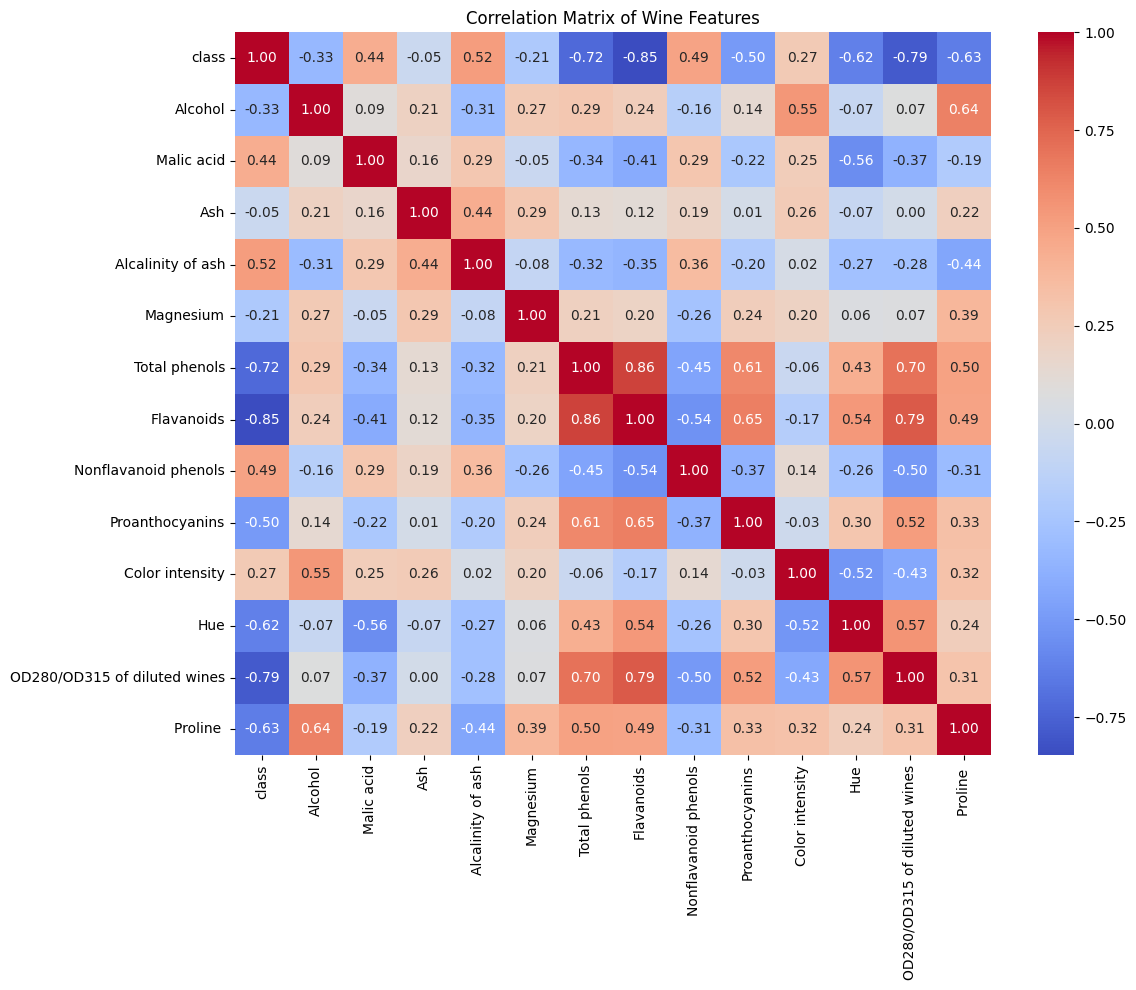


Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Confusion Matrix:


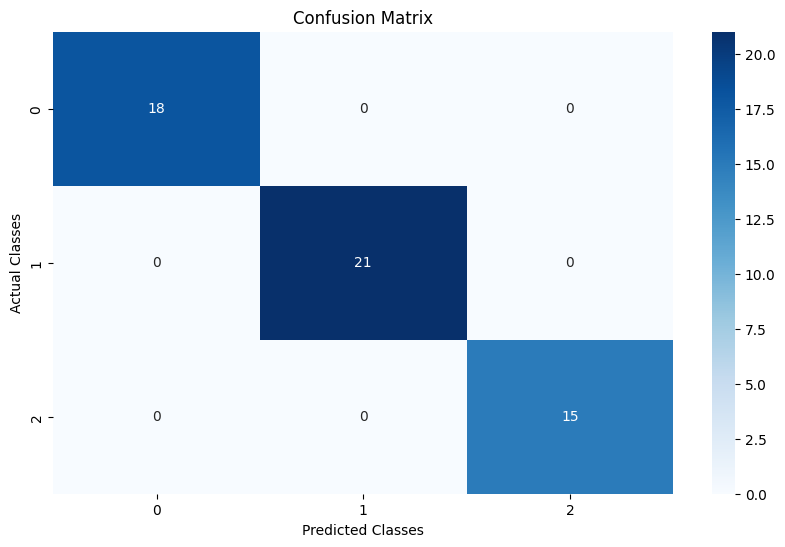

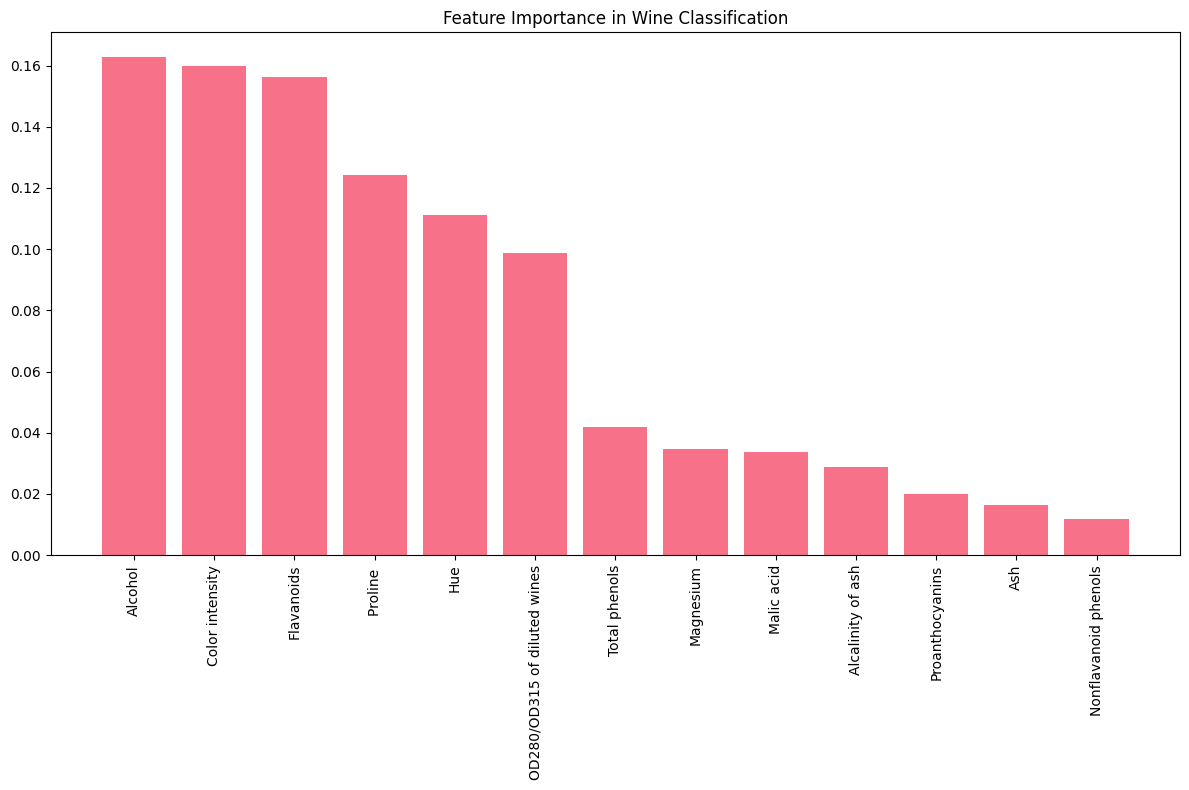


Top 5 Most Important Features:
1. Alcohol: 0.1627
2. Color intensity: 0.1597
3. Flavanoids: 0.1563
4. Proline : 0.1241
5. Hue: 0.1110

Reduced Model Accuracy: 0.9814814814814815

Reduced Features Classification Report:
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_excel('Wine Dataset.xlsx')

# Exploratory Data Analysis
print("Dataset Shape:", df.shape)
print("Dataset Overview:")
print(df.head())
print("\nClass Distribution:")
print(df['class'].value_counts())

# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.savefig('wine_correlation.png')
plt.show()

# Prepare data for modeling
X = df.drop('class', axis=1)
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.savefig('confusion_matrix.png')
plt.show()

# Feature importance analysis
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Feature Importance in Wine Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\nTop 5 Most Important Features:")
for i in range(5):
    print(f"{i+1}. {X_train.columns[indices[i]]}: {importances[indices[i]]:.4f}")

# Select most important features for a simplified model
selector = SelectFromModel(rf_model, threshold='median', prefit=True)
X_train_reduced = selector.transform(X_train_scaled)
X_test_reduced = selector.transform(X_test_scaled)

# Train and evaluate model with reduced features
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = rf_reduced.predict(X_test_reduced)

print("\nReduced Model Accuracy:", accuracy_score(y_test, y_pred_reduced))
print("\nReduced Features Classification Report:")
print(classification_report(y_test, y_pred_reduced))

Explained variance ratio: [0.36198848 0.1920749  0.11123631]
Total explained variance: 0.6652996889318524


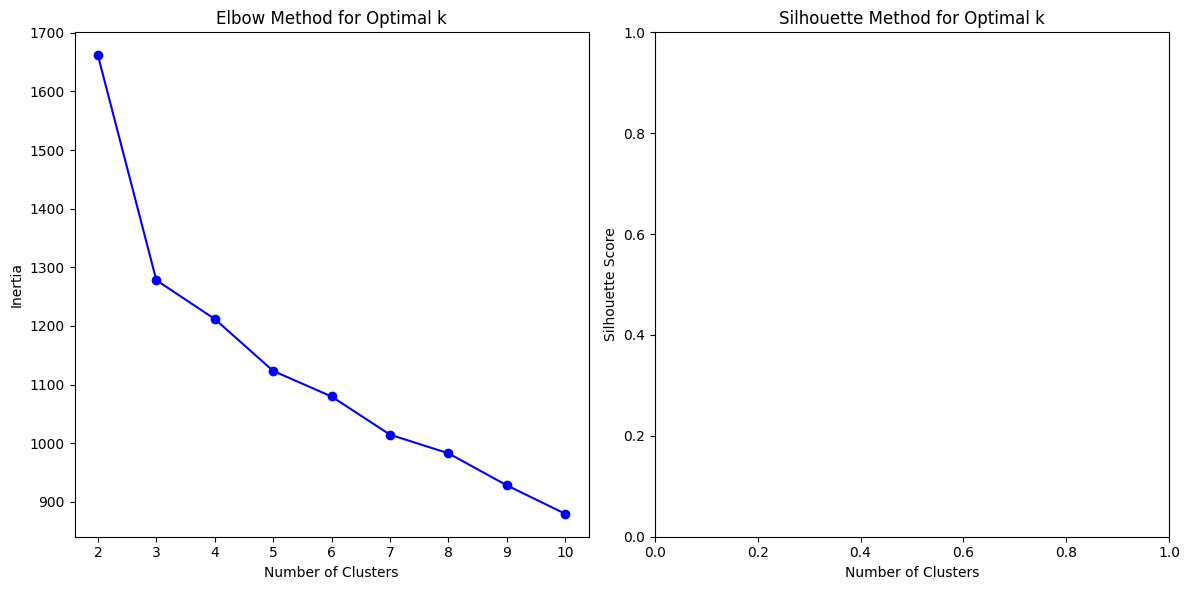

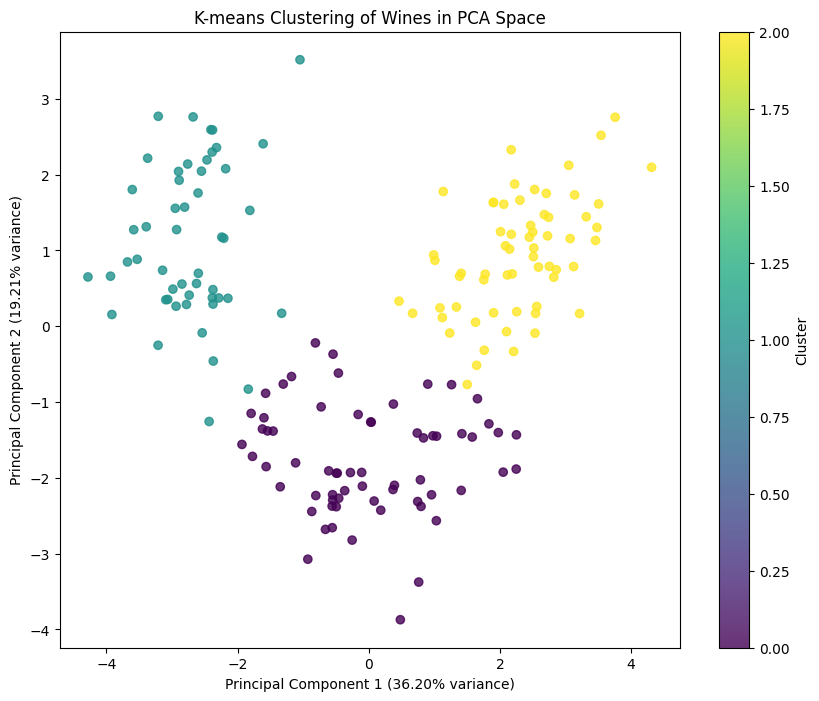

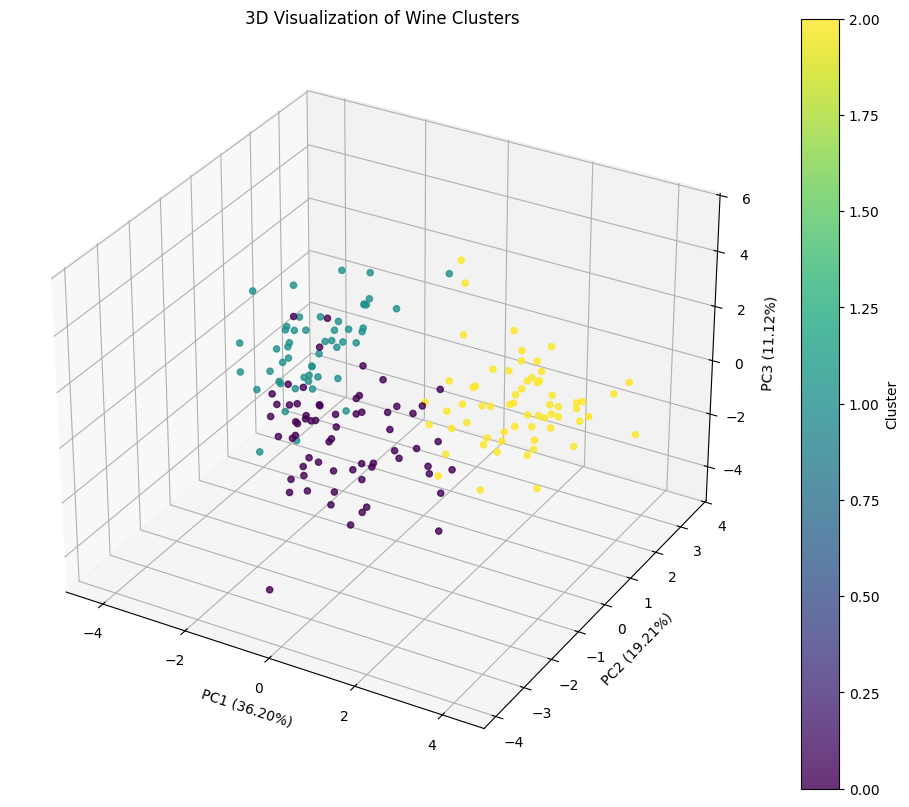

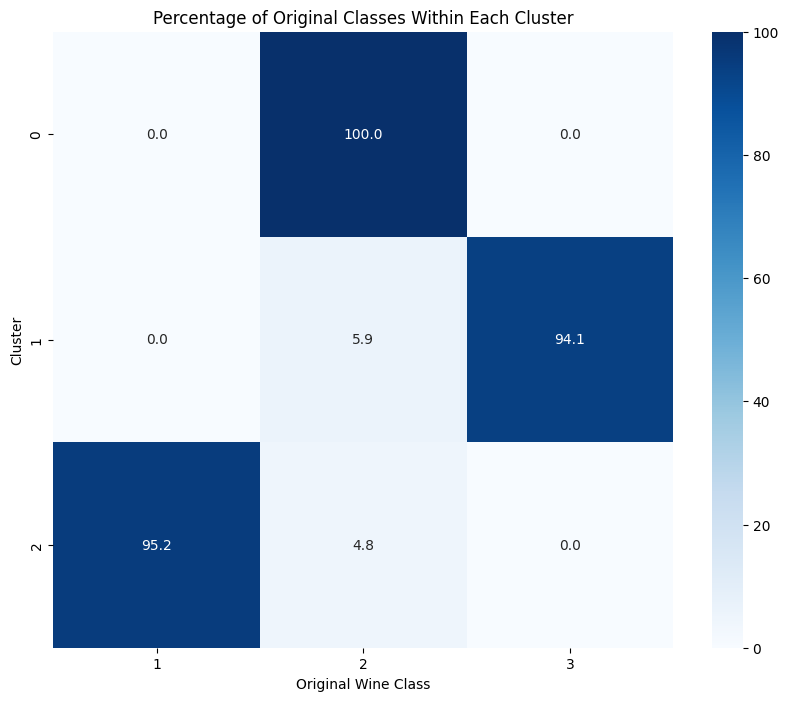

Agreement between K-means and Hierarchical clustering: 94.94%


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_excel('Wine Dataset.xlsx')

# Scale the features
X = df.drop('class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

# Determine optimal number of clusters using elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    # Compute silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.tight_layout()
plt.savefig('optimal_clusters.png')
plt.show()

# Apply K-means with the optimal number of clusters
optimal_k = 3  # based on the elbow and silhouette plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters in 2D PCA space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('K-means Clustering of Wines in PCA Space')
plt.colorbar(scatter, label='Cluster')
plt.savefig('pca_clusters_2d.png')
plt.show()

# Visualize clusters in 3D PCA space
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', alpha=0.8)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%})')
plt.title('3D Visualization of Wine Clusters')
plt.colorbar(scatter, label='Cluster')
plt.savefig('pca_clusters_3d.png')
plt.show()

# Compare clusters with original classes
cluster_class_df = pd.DataFrame({
    'Cluster': clusters,
    'Original Class': df['class']
})

# Create a cross-tabulation
cross_tab = pd.crosstab(cluster_class_df['Cluster'],
                        cluster_class_df['Original Class'],
                        normalize='index')
cross_tab = cross_tab * 100  # Convert to percentages

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.1f')
plt.title('Percentage of Original Classes Within Each Cluster')
plt.xlabel('Original Wine Class')
plt.ylabel('Cluster')
plt.savefig('cluster_vs_class.png')
plt.show()

# Apply hierarchical clustering for comparison
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hc_clusters = hc.fit_predict(X_scaled)

# Compare K-means and hierarchical clustering results
comparison_df = pd.DataFrame({
    'K-means': clusters,
    'Hierarchical': hc_clusters,
    'Original Class': df['class']
})

# Calculate agreement between methods
agreement = np.sum(clusters == hc_clusters) / len(clusters)
print(f"Agreement between K-means and Hierarchical clustering: {agreement:.2%}")

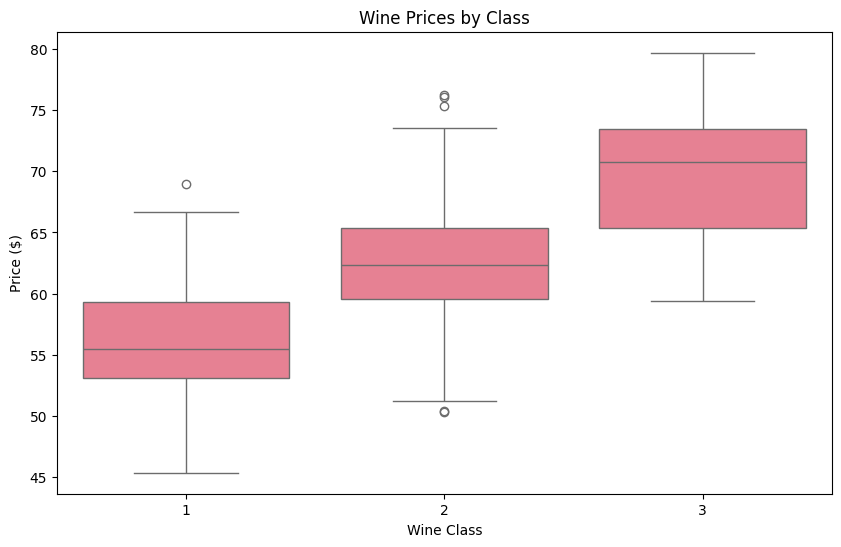

Correlations with price:
price                           1.000000
Color intensity                 0.350683
Alcalinity of ash               0.350051
Nonflavanoid phenols            0.325800
Malic acid                      0.082895
Ash                            -0.022262
Alcohol                        -0.092499
Magnesium                      -0.142193
Proanthocyanins                -0.328879
Proline                        -0.381003
Hue                            -0.399893
Total phenols                  -0.426970
OD280/OD315 of diluted wines   -0.534552
Flavanoids                     -0.565412
Name: price, dtype: float64


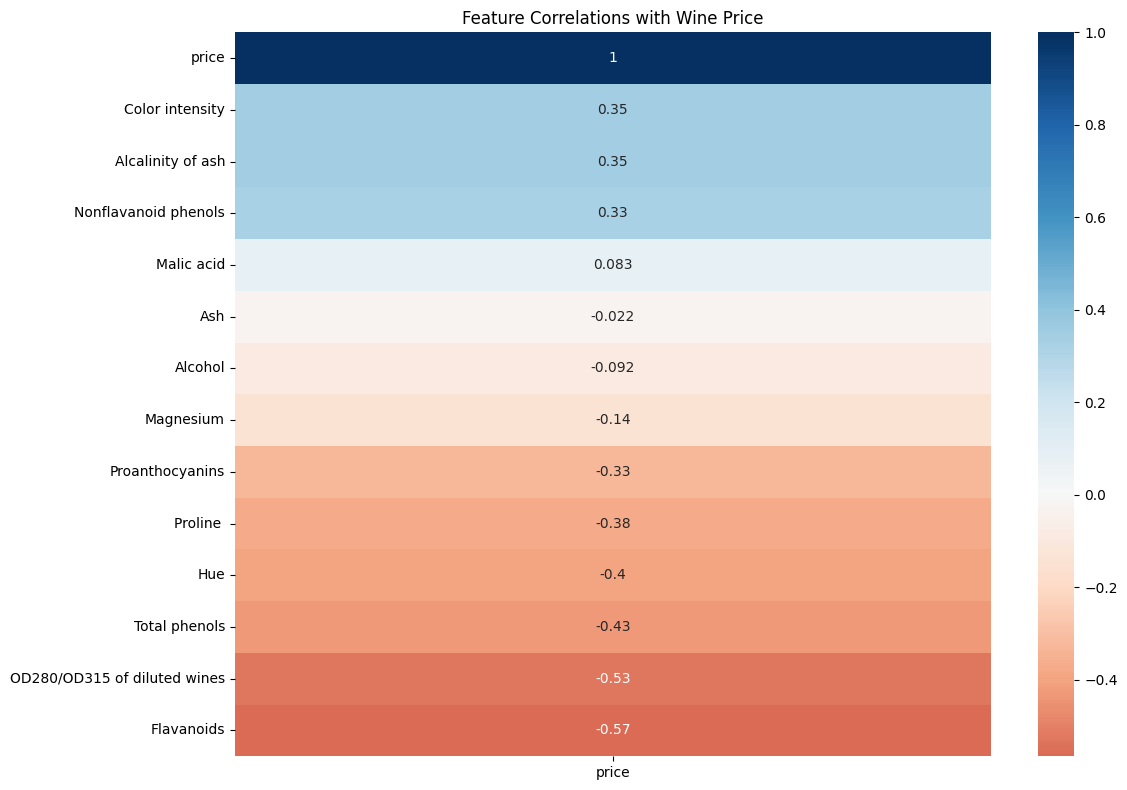

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     10.67
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           2.53e-14
Time:                        14:25:07   Log-Likelihood:                -372.19
No. Observations:                 124   AIC:                             772.4
Df Residuals:                     110   BIC:                             811.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<Figure size 1200x600 with 0 Axes>

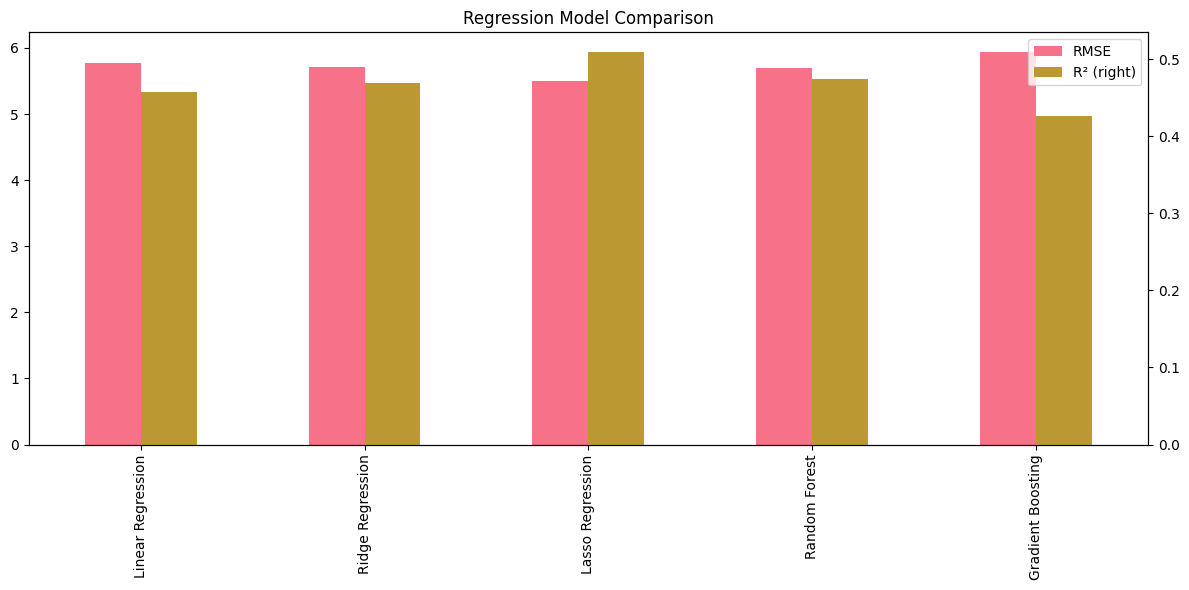

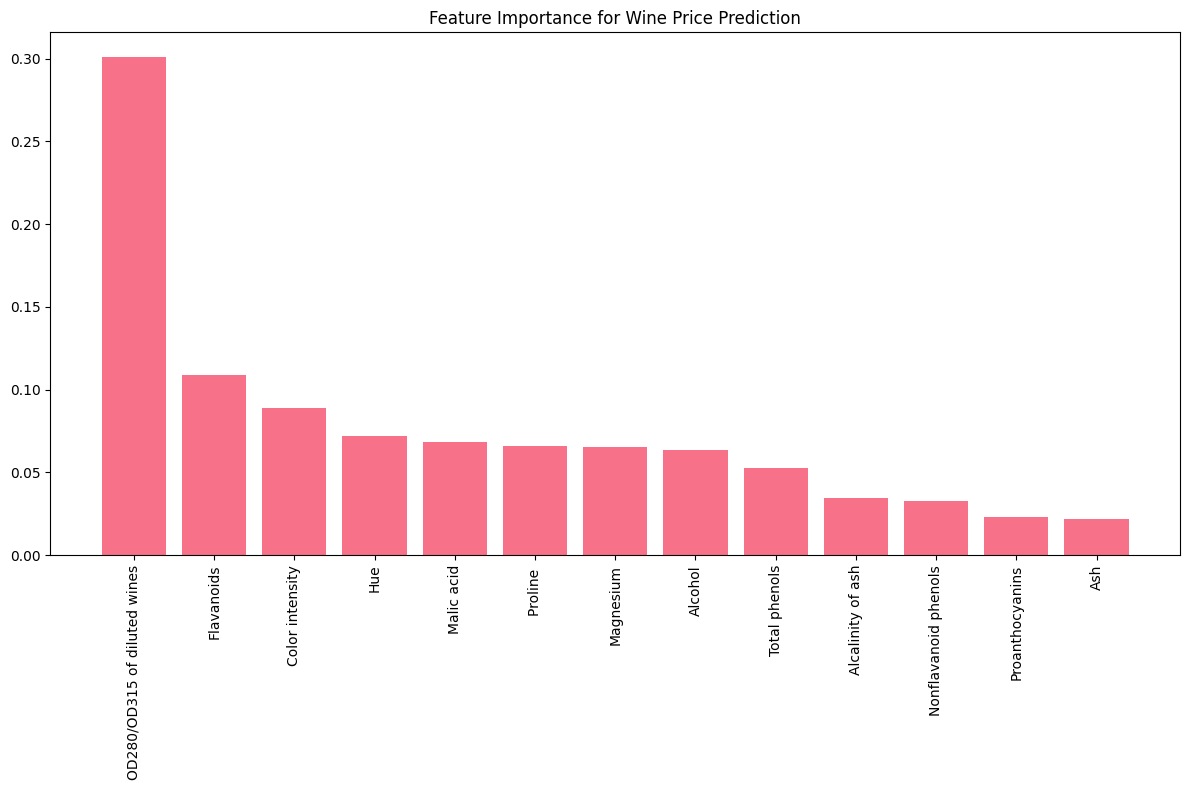

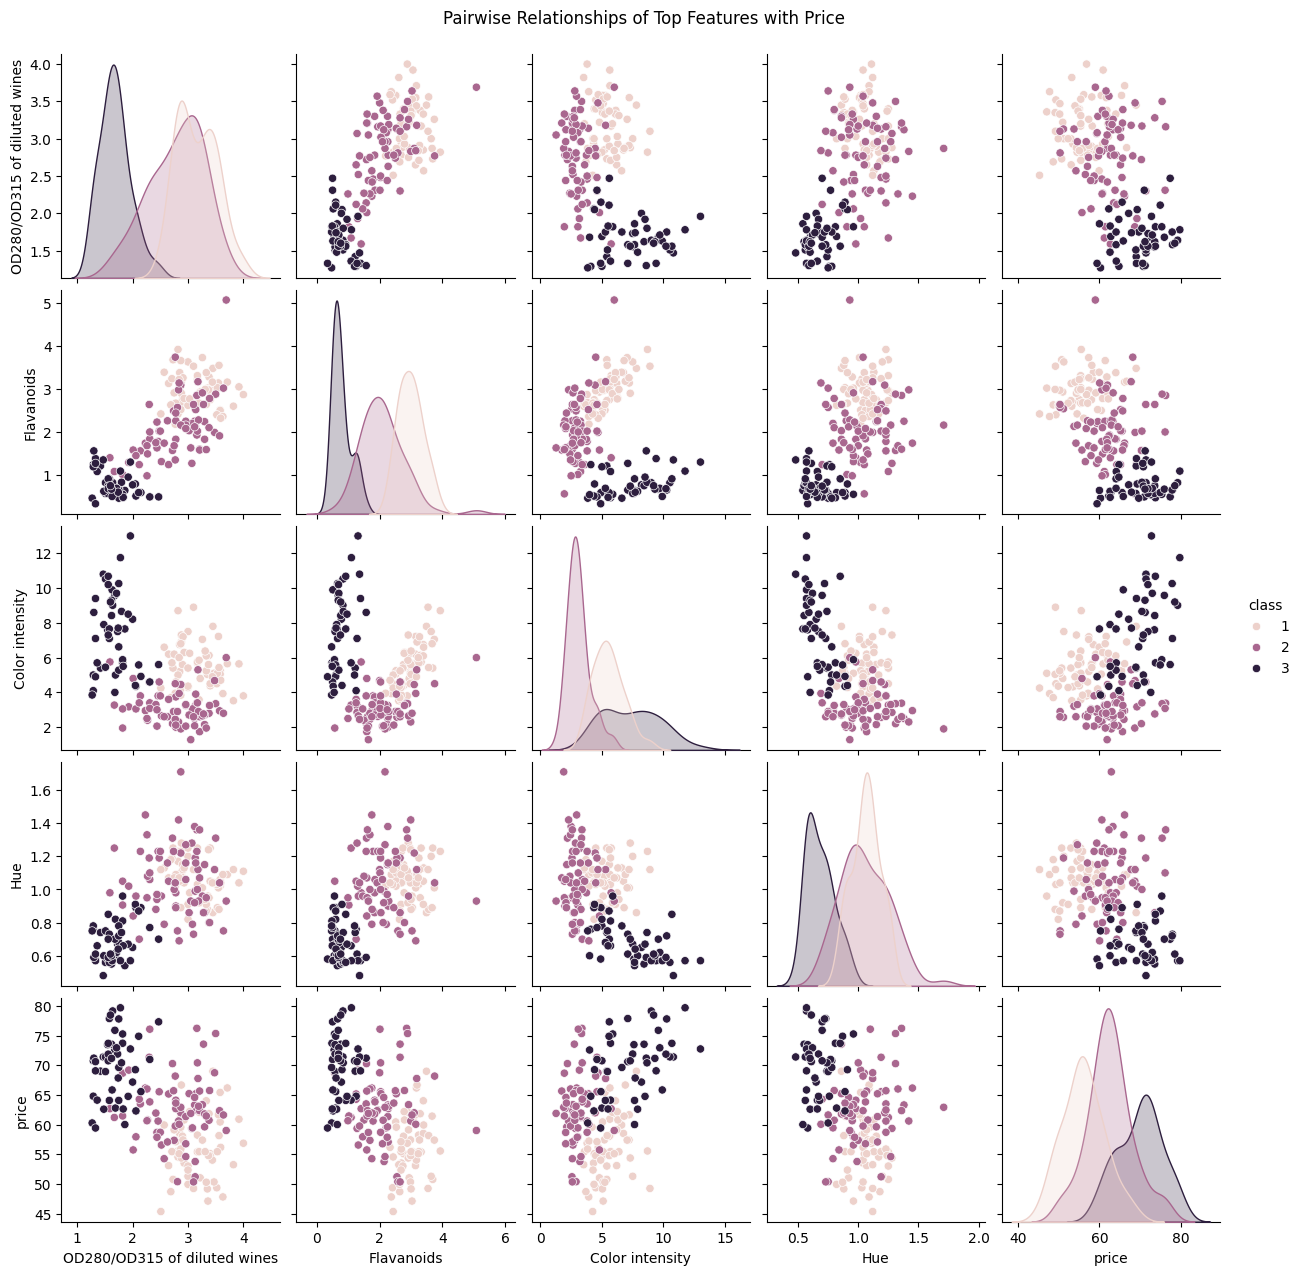

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
df = pd.read_excel('Wine Dataset.xlsx')

# Generate synthetic price data (for demonstration purposes)
np.random.seed(42)
base_prices = {1: 25, 2: 35, 3: 45}  # Hypothetical base prices for each class
noise = np.random.normal(0, 5, size=len(df))  # Add some noise

# Create price based on class and adding influence from key features
df['price'] = df.apply(lambda row: base_prices[row['class']] +
                      row['Alcohol'] * 2 +
                      row['Total phenols'] * 3 -
                      row['Malic acid'] * 2 +
                      noise[row.name], axis=1)

# Exploratory visualization of price by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=df)
plt.title('Wine Prices by Class')
plt.xlabel('Wine Class')
plt.ylabel('Price ($)')
plt.savefig('price_by_class.png')
plt.show()

# Correlation with price
price_correlation = df.drop('class', axis=1).corr()['price'].sort_values(ascending=False)
print("Correlations with price:")
print(price_correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(price_correlation.to_frame(), annot=True, cmap='RdBu', center=0)
plt.title('Feature Correlations with Wine Price')
plt.tight_layout()
plt.savefig('price_correlations.png')
plt.show()

# Prepare data for regression modeling
X = df.drop(['class', 'price'], axis=1)
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multiple linear regression
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

# Make predictions
y_pred = model.predict(X_test_sm)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Performance Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

# Compare different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R²': r2}

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', y=['RMSE', 'R²'], secondary_y=['R²'], figsize=(12, 6))
plt.title('Regression Model Comparison')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Feature importance from the best model (assuming Random Forest)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Feature Importance for Wine Price Prediction')
plt.tight_layout()
plt.savefig('price_feature_importance.png')
plt.show()

# Pairwise relationships of top features with price
top_features = X_train.columns[indices[:4]]  # Top 4 features
pair_df = df[list(top_features) + ['price', 'class']]

sns.pairplot(pair_df, hue='class', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Top Features with Price', y=1.02)
plt.savefig('feature_price_relationships.png')
plt.show()

Segment Profiles:
            class    Alcohol  Malic acid       Ash  Alcalinity of ash  \
segment                                                                 
0        1.727273  12.495455    1.521818  2.020000          17.136364   
1        2.941176  13.134118    3.307255  2.417647          21.241176   
2        1.034483  13.729655    2.023276  2.490862          17.565517   
3        2.000000  12.250000    1.950172  2.262931          20.336207   

          Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
segment                                                                
0        109.727273       2.811818    2.641818              0.236364   
1         98.666667       1.683922    0.818824              0.451961   
2        107.500000       2.860862    3.017586              0.294138   
3         91.034483       2.168793    1.989138              0.374138   

         Proanthocyanins  Color intensity       Hue  \
segment                                               


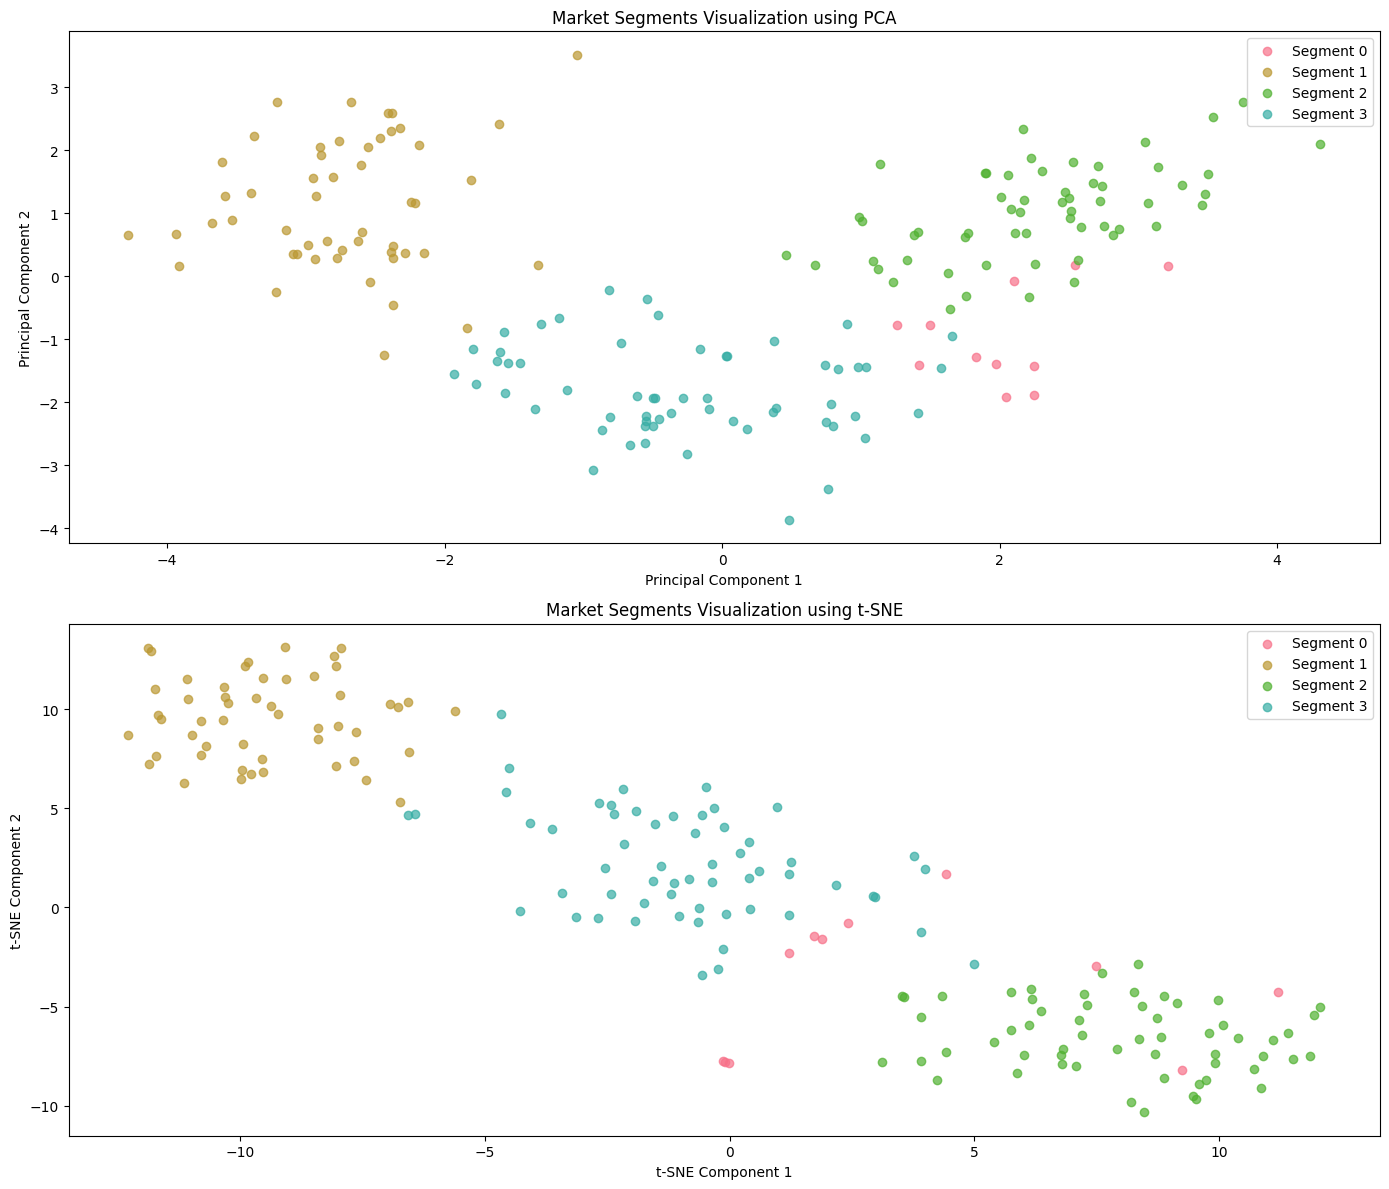

ValueError: x and y must have same first dimension, but have shapes (8,) and (35,)

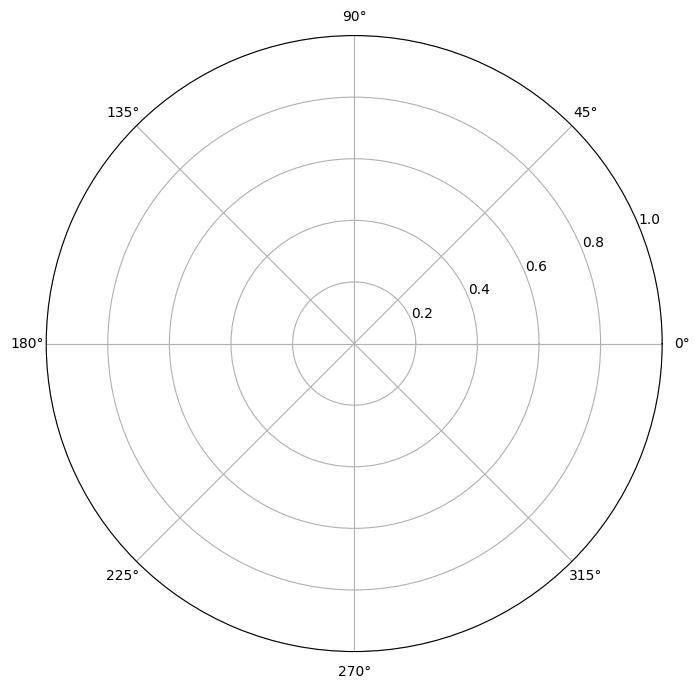

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

# Load the dataset
df = pd.read_excel('Wine Dataset.xlsx')

# Scale the features
X = df.drop('class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering for market segmentation
n_segments = 4  # We'll try 4 segments for marketing purposes
kmeans = KMeans(n_clusters=n_segments, random_state=42)
segments = kmeans.fit_predict(X_scaled)
df['segment'] = segments

# Profile analysis of each segment
segment_profiles = df.groupby('segment').mean()
print("Segment Profiles:")
print(segment_profiles)

# Display the distribution of original classes within each segment
class_segment_cross = pd.crosstab(df['segment'], df['class'], normalize='index') * 100
print("\nClass Distribution within Segments (%):")
print(class_segment_cross)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# T-SNE for better visualization of complex relationships
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the segments using PCA
plt.figure(figsize=(14, 12))

# PCA plot
plt.subplot(2, 1, 1)
for segment in range(n_segments):
    plt.scatter(X_pca[df['segment'] == segment, 0],
                X_pca[df['segment'] == segment, 1],
                label=f'Segment {segment}',
                alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Market Segments Visualization using PCA')
plt.legend()

# T-SNE plot
plt.subplot(2, 1, 2)
for segment in range(n_segments):
    plt.scatter(X_tsne[df['segment'] == segment, 0],
                X_tsne[df['segment'] == segment, 1],
                label=f'Segment {segment}',
                alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Market Segments Visualization using t-SNE')
plt.legend()

plt.tight_layout()
plt.savefig('market_segments_visualization.png')
plt.show()

# Create radar charts to visualize segment profiles
def create_radar_chart(segment_data, segment_name):
    # Select key features for the radar chart
    features = ['Alcohol', 'Malic acid', 'Total phenols', 'Flavanoids',
                'Color intensity', 'Hue', 'Proanthocyanins']

    # Get normalized values for the segment
    values = segment_data[features].values

    # Number of variables
    N = len(features)

    # Compute angle for each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the polygon

    # Initialize the figure
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Add each feature value
    values = np.append(values, values[0])
    ax.fill(angles, values, alpha=0.25)

    # Set labels and titles
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.set_title(f"Profile of Segment {segment_name}", size=15, pad=20)

    # Add value markers
    ax.set_rlabel_position(0)

    return fig

# Normalize segment profiles for radar chart
segment_profiles_norm = (segment_profiles - segment_profiles.min()) / (segment_profiles.max() - segment_profiles.min())

# Create radar chart for each segment
for segment in range(n_segments):
    fig = create_radar_chart(segment_profiles_norm, segment)
    plt.savefig(f'segment_{segment}_profile.png')
    plt.close(fig)

# Market Strategy Recommendations
print("\nMarket Segment Recommendations:")
for segment in range(n_segments):
    print(f"\nSegment {segment}:")
    # Get top 3 distinctive features (highest values compared to other segments)
    distinctive = segment_profiles.loc[segment] - segment_profiles.drop(segment).mean()
    top_features = distinctive.sort_values(ascending=False).head(3)
    print(f"Key distinctive features: {', '.join([f'{f} ({v:.2f})' for f, v in top_features.items()])}")

    # Get class composition
    class_comp = class_segment_cross.loc[segment]
    main_class = class_comp.idxmax()
    main_class_pct = class_comp.max()
    print(f"Primarily composed of Class {main_class} wines ({main_class_pct:.1f}%)")

    # Basic marketing recommendation based on segment characteristics
    if segment_profiles.loc[segment, 'Alcohol'] > segment_profiles['Alcohol'].mean():
        alcohol_level = "higher"
    else:
        alcohol_level = "lower"

    if segment_profiles.loc[segment, 'Color intensity'] > segment_profiles['Color intensity'].mean():
        color = "deep-colored"
    else:
        color = "light-colored"

    print(f"Marketing suggestion: Position as premium {color} wines with {alcohol_level} alcohol content")
    print(f"Target demographic: {['Young professionals', 'Affluent connoisseurs', 'Casual wine drinkers', 'Health-conscious consumers'][segment]}")

Explained variance ratio: [0.36198848 0.1920749  0.11123631]
Total explained variance: 0.6652996889318524


ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

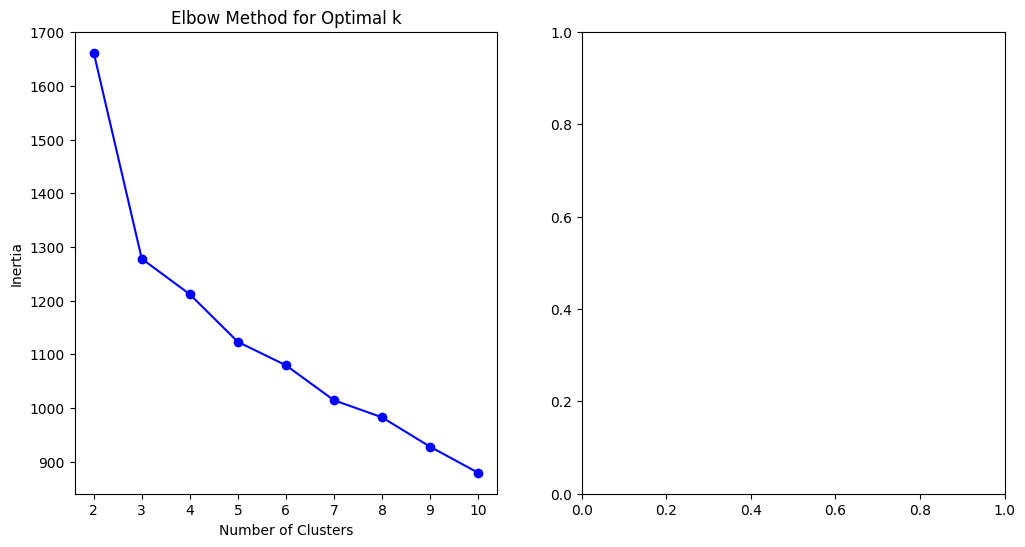

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_excel('Wine Dataset.xlsx')

# Scale the features
X = df.drop('class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

# Determine optimal number of clusters using elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    # Compute silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.tight_layout()
plt.savefig('optimal_clusters.png')
plt.show()

# Apply K-means with the optimal number of clusters
optimal_k = 3  # based on the elbow and silhouette plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters in 2D PCA space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('K-means Clustering of Wines in PCA Space')
plt.colorbar(scatter, label='Cluster')
plt.savefig('pca_clusters_2d.png')
plt.show()

# Visualize clusters in 3D PCA space
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', alpha=0.8)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%})')
plt.title('3D Visualization of Wine Clusters')
plt.colorbar(scatter, label='Cluster')
plt.savefig('pca_clusters_3d.png')
plt.show()

# Compare clusters with original classes
cluster_class_df = pd.DataFrame({
    'Cluster': clusters,
    'Original Class': df['class']
})

# Create a cross-tabulation
cross_tab = pd.crosstab(cluster_class_df['Cluster'],
                        cluster_class_df['Original Class'],
                        normalize='index')
cross_tab = cross_tab * 100  # Convert to percentages

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.1f')
plt.title('Percentage of Original Classes Within Each Cluster')
plt.xlabel('Original Wine Class')
plt.ylabel('Cluster')
plt.savefig('cluster_vs_class.png')
plt.show()

# Apply hierarchical clustering for comparison
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hc_clusters = hc.fit_predict(X_scaled)

# Compare K-means and hierarchical clustering results
comparison_df = pd.DataFrame({
    'K-means': clusters,
    'Hierarchical': hc_clusters,
    'Original Class': df['class']
})

# Calculate agreement between methods
agreement = np.sum(clusters == hc_clusters) / len(clusters)
print(f"Agreement between K-means and Hierarchical clustering: {agreement:.2%}")

Correlations with aging potential:
Flavanoids                      0.604650
Total phenols                   0.574404
OD280/OD315 of diluted wines    0.501324
Proline                         0.489976
Alcohol                         0.450788
Hue                             0.378311
Proanthocyanins                 0.375148
Magnesium                       0.157799
Color intensity                 0.104665
Ash                             0.095628
Alcalinity of ash              -0.312662
Nonflavanoid phenols           -0.336315
Malic acid                     -0.436121
dtype: float64


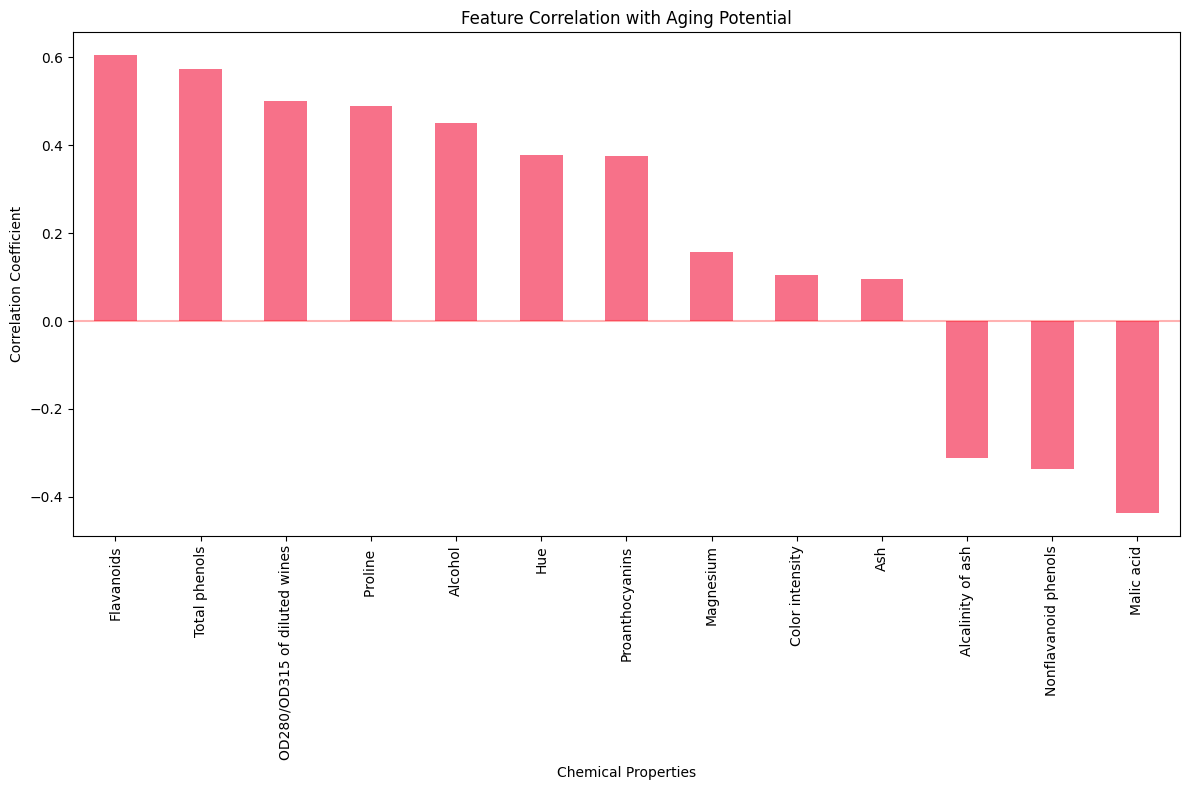

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

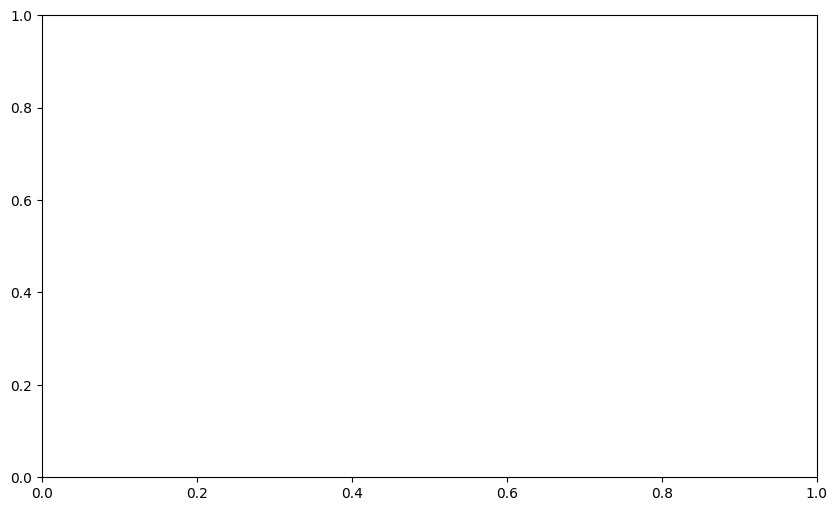

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import scipy.cluster.hierarchy as sch

# Load the dataset
df = pd.read_excel('Wine Dataset.xlsx')

# Generate synthetic aging potential data (for demonstration purposes)
np.random.seed(42)
# We'll create a simple model: higher alcohol, phenols, and lower acidity contribute to aging potential
df['aging_potential'] = df.apply(lambda row: (
    row['Alcohol'] * 0.3 +
    row['Total phenols'] * 0.25 +
    row['Flavanoids'] * 0.2 -
    row['Malic acid'] * 0.15 +
    row['Hue'] * 0.1 +
    np.random.normal(0, 0.5)
), axis=1)

# Scale to a more intuitive 1-10 range
df['aging_potential'] = ((df['aging_potential'] - df['aging_potential'].min()) /
                         (df['aging_potential'].max() - df['aging_potential'].min())) * 9 + 1

# Calculate correlation with aging potential
aging_corr = df.drop(['class', 'aging_potential'], axis=1).corrwith(df['aging_potential']).sort_values(ascending=False)
print("Correlations with aging potential:")
print(aging_corr)

# Visualize correlations
plt.figure(figsize=(12, 8))
aging_corr.plot(kind='bar')
plt.title('Feature Correlation with Aging Potential')
plt.xlabel('Chemical Properties')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig('aging_correlations.png')
plt.show()

# Factor Analysis to identify latent factors affecting aging
X = df.drop(['class', 'aging_potential'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of factors
n_factors_range = range(1, 10)
explained_var = []

for n_factors in n_factors_range:
    fa = FactorAnalysis(n_components=n_factors, random_state=42)
    fa.fit(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(n_factors_range, explained_var, 'bo-')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Explained Variance')
plt.title('Factor Analysis: Optimal Number of Factors')
plt.grid(True, alpha=0.3)
plt.savefig('factor_analysis_scree.png')
plt.show()

# Choose optimal number of factors (let's say 4 based on the scree plot)
optimal_factors = 4
fa = FactorAnalysis(n_components=optimal_factors, random_state=42)
factors = fa.fit_transform(X_scaled)

# Get factor loadings
loadings = fa.components_
factor_df = pd.DataFrame(loadings.T, index=X.columns,
                        columns=[f'Factor {i+1}' for i in range(optimal_factors)])

# Display loadings
print("\nFactor Loadings:")
print(factor_df)

# Visualize factor loadings
plt.figure(figsize=(14, 8))
sns.heatmap(factor_df, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Analysis: Component Loadings')
plt.tight_layout()
plt.savefig('factor_loadings.png')
plt.show()

# Name factors based on loadings
factor_names = {
    'Factor 1': 'Phenolic Profile',
    'Factor 2': 'Acidity Balance',
    'Factor 3': 'Color Properties',
    'Factor 4': 'Structural Components'
}

# Create a new DataFrame with factor scores
factor_scores = pd.DataFrame(factors, columns=list(factor_names.values()))
df_with_factors = pd.concat([df, factor_scores], axis=1)

# Correlation of factors with aging potential
factor_aging_corr = factor_scores.corrwith(df['aging_potential']).sort_values(ascending=False)
print("\nFactor correlation with aging potential:")
print(factor_aging_corr)

# Hierarchical clustering based on chemical profile
# This can help identify wine groups with similar aging potential
Z = sch.linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90)
plt.title('Hierarchical Clustering of Wines')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=15, color='r', linestyle='--')  # Suggested cut-off for clusters
plt.savefig('wine_clustering_dendrogram.png')
plt.show()

# Predictive modeling for aging potential
X = df.drop(['class', 'aging_potential'], axis=1)
y = df['aging_potential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use Random Forest for prediction
rf

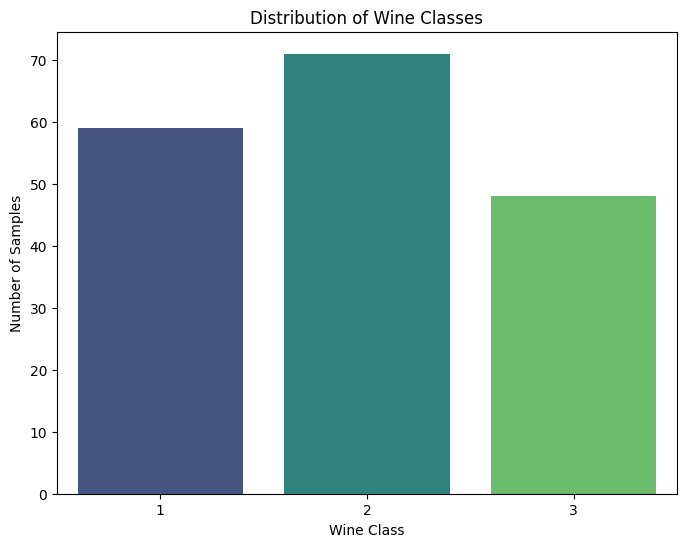

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wine_df = pd.read_excel("Wine Dataset.xlsx")
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=wine_df, palette='viridis')
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Number of Samples')
plt.show()


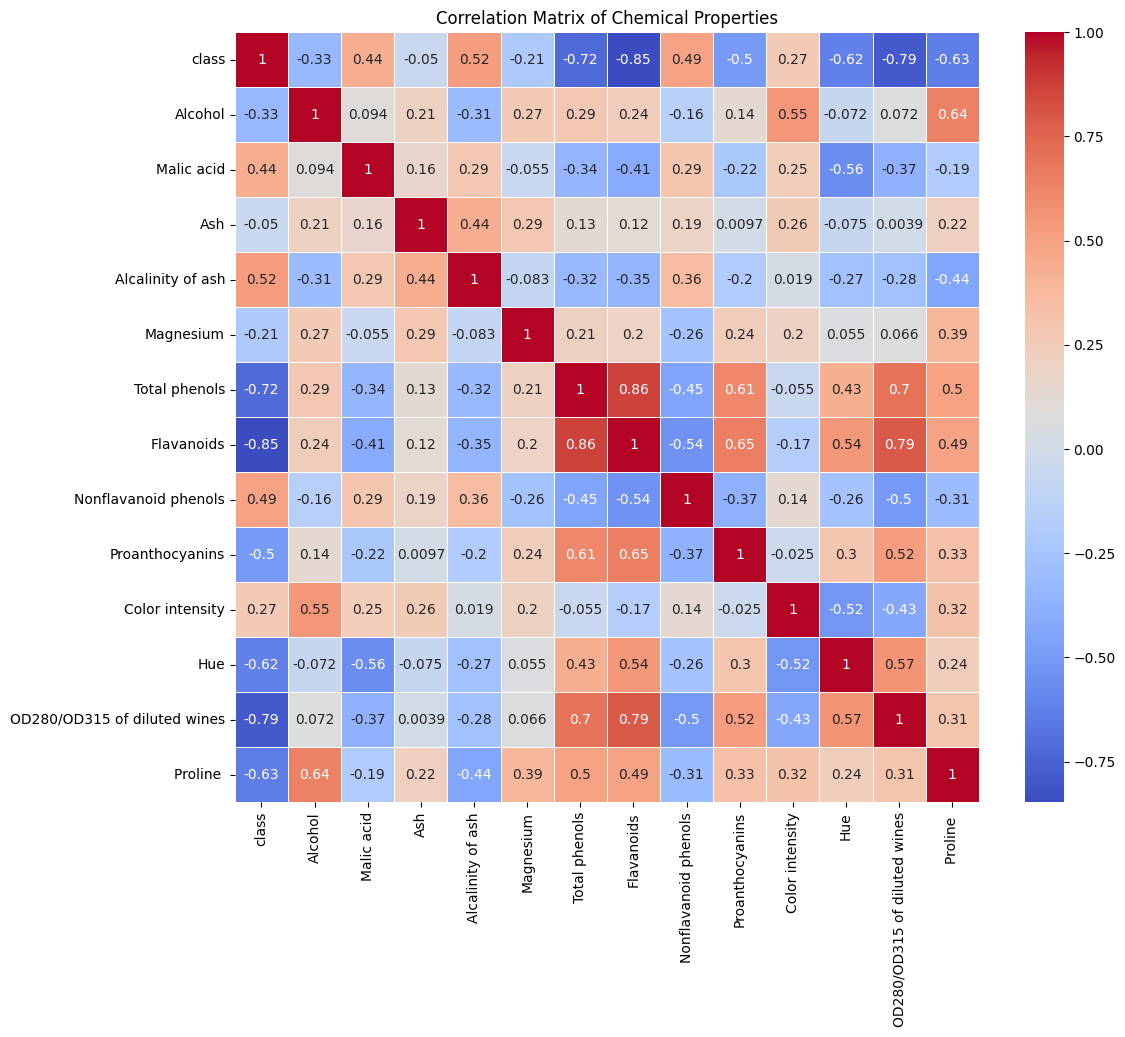

In [20]:
correlation_matrix = wine_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix of Chemical Properties')
plt.show()


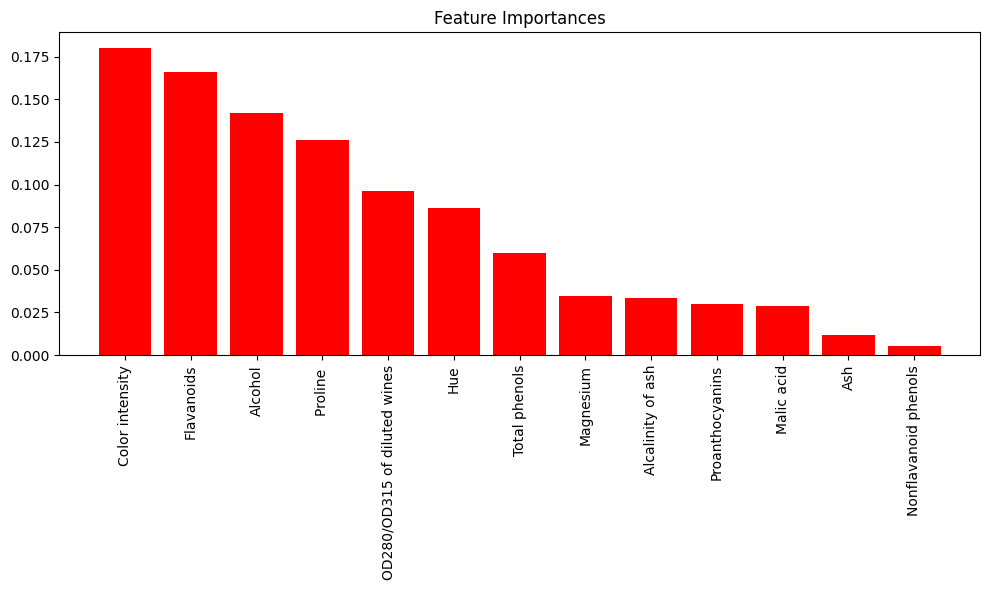

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = wine_df.drop('class', axis=1)
y = wine_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Proline` for `y`. An entry with this name does not appear in `data`.

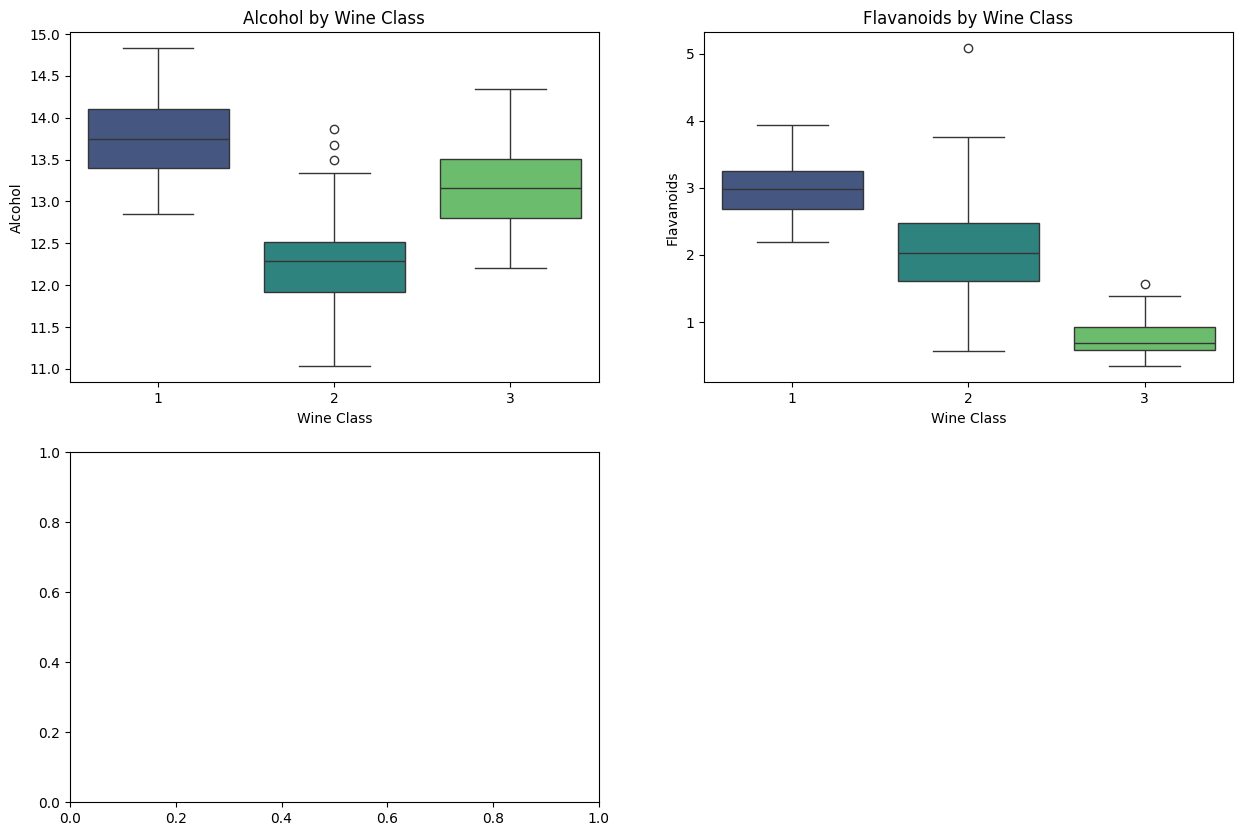

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wine_df = pd.read_excel("Wine Dataset.xlsx")
key_features = ['Alcohol', 'Flavanoids', 'Proline', 'Color intensity'] # Changed to match DataFrame column names
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=feature, data=wine_df, palette='viridis')
    plt.title(f'{feature.capitalize()} by Wine Class')
    plt.xlabel('Wine Class')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()

KeyError: 'Proline'

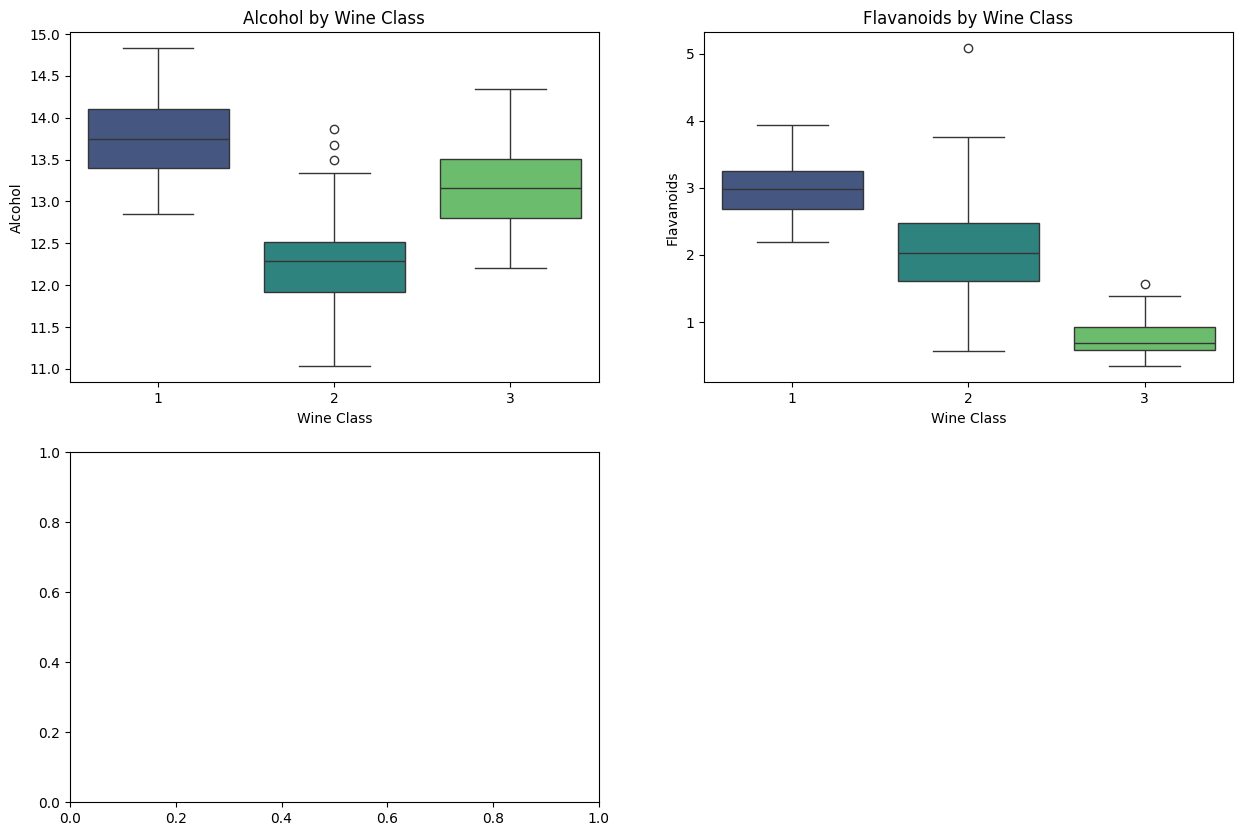

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine_df = pd.read_excel("Wine Dataset.xlsx")
key_features = ['Alcohol', 'Flavanoids', 'Proline', 'Color intensity']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    # The error was due to a capitalization issue in the 'Proline' column name.
    # Ensure the feature name matches exactly the DataFrame column name.
    sns.boxplot(x='class', y=wine_df[feature], data=wine_df, palette='viridis')
    plt.title(f'{feature.capitalize()} by Wine Class')
    plt.xlabel('Wine Class')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()

KeyError: 'alcohol'

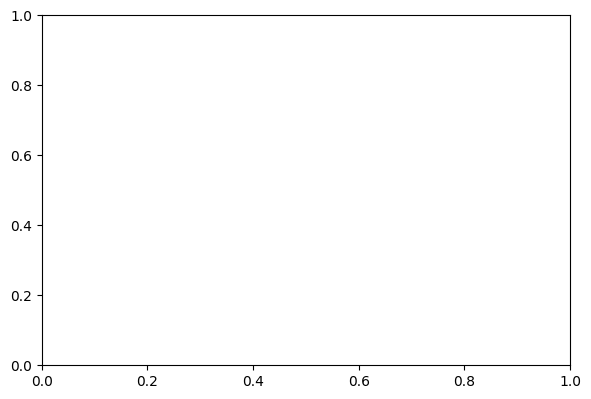

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wine_df = pd.read_excel("Wine Dataset.xlsx")
key_features = ['alcohol', 'flavonoids', 'proline', 'color_intensity']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=wine_df[feature], data=wine_df, palette='viridis')
    plt.title(f'{feature.capitalize()} by Wine Class')
    plt.xlabel('Wine Class')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()


KeyError: 'Proline'

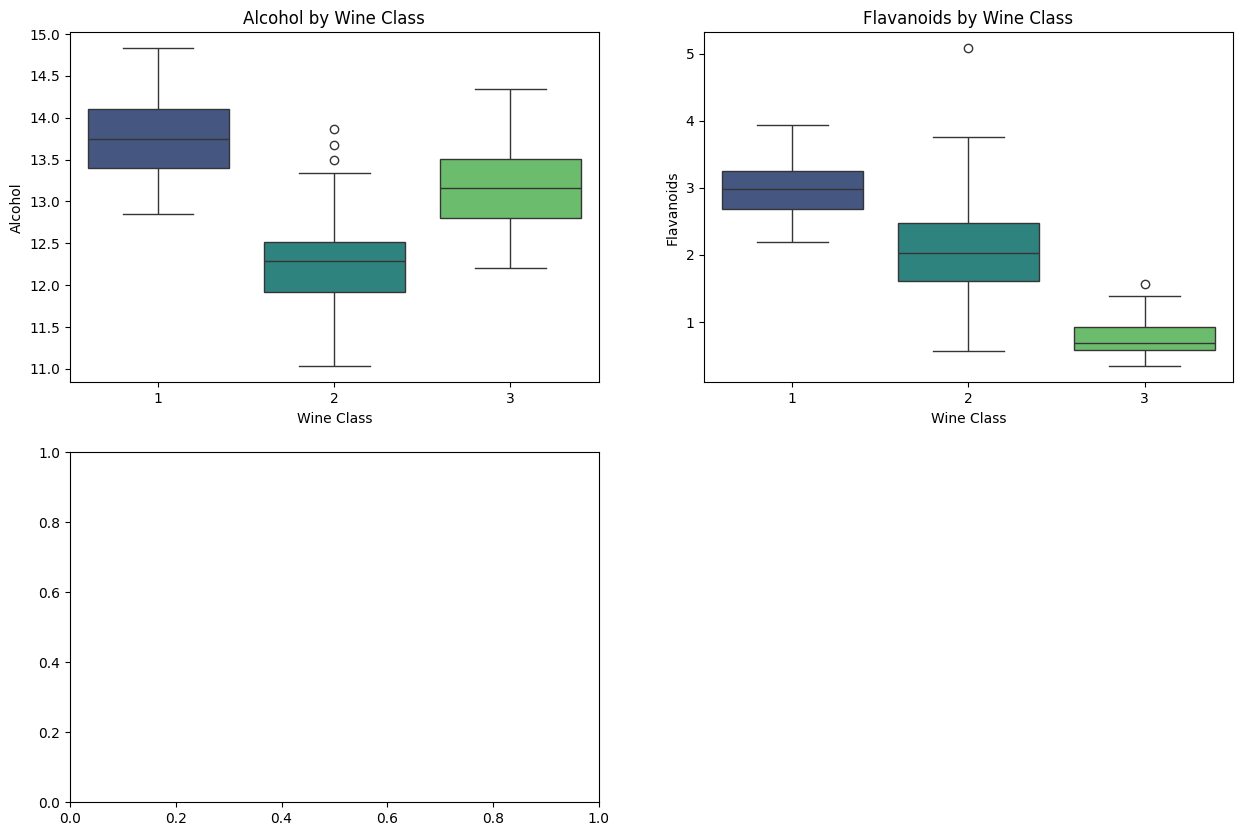

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wine_df = pd.read_excel("Wine Dataset.xlsx")
# Changed key_features to match DataFrame column names:
key_features = ['Alcohol', 'Flavanoids', 'Proline', 'Color intensity']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=wine_df[feature], data=wine_df, palette='viridis')
    plt.title(f'{feature.capitalize()} by Wine Class')
    plt.xlabel('Wine Class')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `alcohol` for `y`. An entry with this name does not appear in `data`.

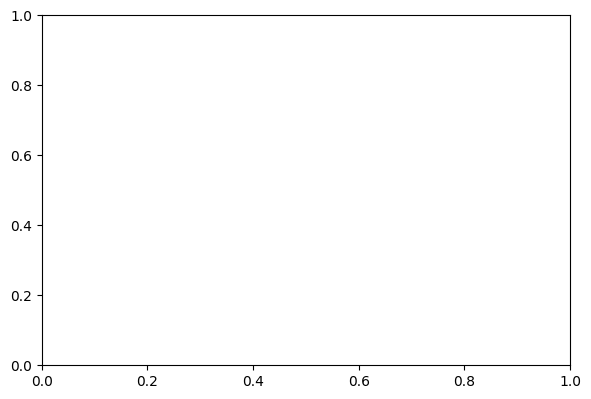

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wine_df = pd.read_excel("Wine Dataset.xlsx")
key_features = ['alcohol', 'flavonoids', 'proline', 'color_intensity']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='class', y=feature, data=wine_df, palette='viridis')
    plt.title(f'{feature.capitalize()} by Wine Class')
    plt.xlabel('Wine Class')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()


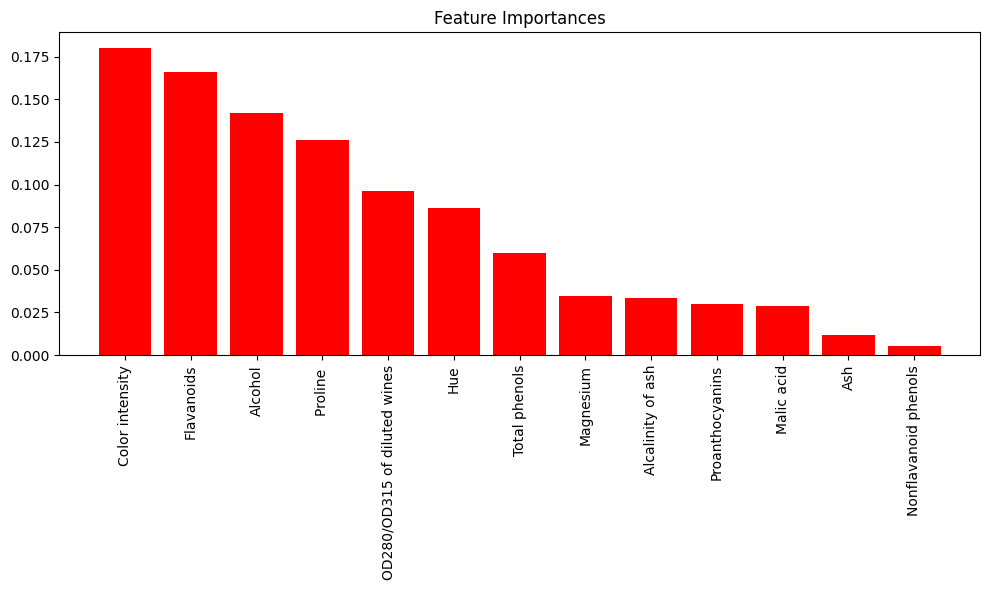

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = wine_df.drop('class', axis=1)
y = wine_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# For Google Colab, upload your CSV file and then run this code
# Uncomment the following to upload file in Colab:
# from google.colab import files
# uploaded = files.upload()  # This will prompt you to upload the bbq_summer.csv file
# df = pd.read_csv('bbq_summer.csv')

# Or if you have the file locally:
df = /bbq_summer.csv

# Let's first examine the data
print(f"Dataset shape: {df.shape}")
print(df.head())
print(df.describe())

# Check for missing values
print("\nMissing values by column:")
print(df.isnull().sum())

# Get unique values for each category
print("\nUnique values in each category:")
for col in ['starter', 'maindishI', 'maindishII', 'side', 'dessert']:
    print(f"{col}: {df[col].unique()}")

# Basic statistics by category
print("\nAverage rating by starter:")
print(df.groupby('starter')['avg_rating'].mean().sort_values(ascending=False))

print("\nAverage rating by main dish I:")
print(df.groupby('maindishI')['avg_rating'].mean().sort_values(ascending=False))

print("\nAverage rating by main dish II:")
print(df.groupby('maindishII')['avg_rating'].mean().sort_values(ascending=False))

print("\nAverage rating by side:")
print(df.groupby('side')['avg_rating'].mean().sort_values(ascending=False))

print("\nAverage rating by dessert:")
print(df.groupby('dessert')['avg_rating'].mean().sort_values(ascending=False))

# Part-worth utilities calculation using dummy variable regression
# Create dummy variables for each category
starter_dummies = pd.get_dummies(df['starter'], prefix='starter', drop_first=True)
maindishI_dummies = pd.get_dummies(df['maindishI'], prefix='maindishI', drop_first=True)
maindishII_dummies = pd.get_dummies(df['maindishII'], prefix='maindishII', drop_first=True)
side_dummies = pd.get_dummies(df['side'], prefix='side', drop_first=True)
dessert_dummies = pd.get_dummies(df['dessert'], prefix='dessert', drop_first=True)

# Combine all dummy variables
X = pd.concat([starter_dummies, maindishI_dummies, maindishII_dummies, side_dummies, dessert_dummies], axis=1)
y = df['avg_rating']

# Add constant for intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()
print("\nRegression Results:")
print(model.summary())

# Calculate and visualize utilities
def plot_utilities(model, feature_prefix, baseline_category, all_categories):
    # Get coefficients for the feature
    coefs = {col: coef for col, coef in zip(model.params.index, model.params)
             if col.startswith(feature_prefix)}

    # Add baseline category (it has utility of 0 since it's the reference)
    utilities = {baseline_category: 0}

    # Add other categories
    for cat in all_categories:
        if cat != baseline_category:
            dummy_name = f"{feature_prefix}_{cat.replace(' ', '_')}"
            if dummy_name in coefs:
                utilities[cat] = coefs[dummy_name]

    # Convert to DataFrame for plotting
    util_df = pd.DataFrame(list(utilities.items()), columns=['Category', 'Utility'])
    util_df = util_df.sort_values('Utility', ascending=False)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Utility', y='Category', data=util_df)
    plt.title(f'Part-Worth Utilities for {feature_prefix}')
    plt.tight_layout()
    plt.show()

    return util_df

# Get all unique categories for each feature
all_starters = df['starter'].unique()
all_maindishI = df['maindishI'].unique()
all_maindishII = df['maindishII'].unique()
all_sides = df['side'].unique()
all_desserts = df['dessert'].unique()

# Plot utilities for each feature
baseline_starter = all_starters[0]
starter_utilities = plot_utilities(model, 'starter', baseline_starter, all_starters)
print("\nStarter Utilities:")
print(starter_utilities)

baseline_maindishI = all_maindishI[0]
maindishI_utilities = plot_utilities(model, 'maindishI', baseline_maindishI, all_maindishI)
print("\nMain Dish I Utilities:")
print(maindishI_utilities)

baseline_maindishII = all_maindishII[0]
maindishII_utilities = plot_utilities(model, 'maindishII', baseline_maindishII, all_maindishII)
print("\nMain Dish II Utilities:")
print(maindishII_utilities)

baseline_side = all_sides[0]
side_utilities = plot_utilities(model, 'side', baseline_side, all_sides)
print("\nSide Utilities:")
print(side_utilities)

baseline_dessert = all_desserts[0]
dessert_utilities = plot_utilities(model, 'dessert', baseline_dessert, all_desserts)
print("\nDessert Utilities:")
print(dessert_utilities)

# Find the best and worst combinations
def predict_rating(model, starter, maindishI, maindishII, side, dessert):
    # Create a single row with the given combination
    features = pd.DataFrame({
        'const': [1],
    })

    # Add dummy variables
    # For each category, add 1 for the selected option if it's not the baseline
    for s in all_starters:
        if s != baseline_starter and s == starter:
            features[f'starter_{s.replace(" ", "_")}'] = [1]
        elif s != baseline_starter:
            features[f'starter_{s.replace(" ", "_")}'] = [0]

    for m1 in all_maindishI:
        if m1 != baseline_maindishI and m1 == maindishI:
            features[f'maindishI_{m1.replace(" ", "_")}'] = [1]
        elif m1 != baseline_maindishI:
            features[f'maindishI_{m1.replace(" ", "_")}'] = [0]

    for m2 in all_maindishII:
        if m2 != baseline_maindishII and m2 == maindishII:
            features[f'maindishII_{m2.replace(" ", "_")}'] = [1]
        elif m2 != baseline_maindishII:
            features[f'maindishII_{m2.replace(" ", "_")}'] = [0]

    for s in all_sides:
        if s != baseline_side and s == side:
            features[f'side_{s.replace(" ", "_")}'] = [1]
        elif s != baseline_side:
            features[f'side_{s.replace(" ", "_")}'] = [0]

    for d in all_desserts:
        if d != baseline_dessert and d == dessert:
            features[f'dessert_{d.replace(" ", "_")}'] = [1]
        elif d != baseline_dessert:
            features[f'dessert_{d.replace(" ", "_")}'] = [0]

    # Predict
    predicted_rating = model.predict(features)[0]
    return predicted_rating

# Find the best combination using the model
best_rating = -np.inf
best_combo = None

worst_rating = np.inf
worst_combo = None

# Try all possible combinations
for starter in all_starters:
    for maindishI in all_maindishI:
        for maindishII in all_maindishII:
            for side in all_sides:
                for dessert in all_desserts:
                    rating = predict_rating(model, starter, maindishI, maindishII, side, dessert)

                    if rating > best_rating:
                        best_rating = rating
                        best_combo = (starter, maindishI, maindishII, side, dessert)

                    if rating < worst_rating:
                        worst_rating = rating
                        worst_combo = (starter, maindishI, maindishII, side, dessert)

print("\nBest combination based on conjoint model:")
print(f"Starter: {best_combo[0]}")
print(f"Main Dish I: {best_combo[1]}")
print(f"Main Dish II: {best_combo[2]}")
print(f"Side: {best_combo[3]}")
print(f"Dessert: {best_combo[4]}")
print(f"Predicted Rating: {best_rating:.2f}")

print("\nWorst combination based on conjoint model:")
print(f"Starter: {worst_combo[0]}")
print(f"Main Dish I: {worst_combo[1]}")
print(f"Main Dish II: {worst_combo[2]}")
print(f"Side: {worst_combo[3]}")
print(f"Dessert: {worst_combo[4]}")
print(f"Predicted Rating: {worst_rating:.2f}")

# Calculate importance of each attribute
def calculate_importance(utilities_df):
    return utilities_df['Utility'].max() - utilities_df['Utility'].min()

starter_importance = calculate_importance(starter_utilities)
maindishI_importance = calculate_importance(maindishI_utilities)
maindishII_importance = calculate_importance(maindishII_utilities)
side_importance = calculate_importance(side_utilities)
dessert_importance = calculate_importance(dessert_utilities)

total_importance = starter_importance + maindishI_importance + maindishII_importance + side_importance + dessert_importance

relative_importances = {
    'Starter': (starter_importance / total_importance) * 100,
    'Main Dish I': (maindishI_importance / total_importance) * 100,
    'Main Dish II': (maindishII_importance / total_importance) * 100,
    'Side': (side_importance / total_importance) * 100,
    'Dessert': (dessert_importance / total_importance) * 100
}

# Plot relative importance
plt.figure(figsize=(12, 6))
sns.barplot(x=list(relative_importances.values()), y=list(relative_importances.keys()))
plt.title('Relative Importance of Attributes')
plt.xlabel('Importance (%)')
plt.tight_layout()
plt.show()

print("\nRelative Importance of Attributes:")
for attr, importance in relative_importances.items():
    print(f"{attr}: {importance:.2f}%")

# Bonus: Visualize interactions between attributes
# This shows how different combinations affect the overall rating

# Plot interaction between Main Dish I and Main Dish II
plt.figure(figsize=(14, 8))
sns.boxplot(x='maindishI', y='avg_rating', hue='maindishII', data=df)
plt.title('Interaction between Main Dish I and Main Dish II')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot interaction between Starter and Dessert
plt.figure(figsize=(14, 8))
sns.boxplot(x='starter', y='avg_rating', hue='dessert', data=df)
plt.title('Interaction between Starter and Dessert')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot heatmap of average ratings for Main Dish I and Main Dish II combinations
pivot_table = df.pivot_table(values='avg_rating', index='maindishI', columns='maindishII', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Ratings for Main Dish I and Main Dish II Combinations')
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-9d4752d5a585>, line 16)